#### Importing data and necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 2000)

In [3]:
train= pd.read_csv('Train.csv')
test= pd.read_csv('Test.csv')

In [4]:
df=train.copy()
tdf= test.copy()

#### Data Cleaning

In [5]:
df['TOP_PACK'].fillna('others', inplace= True)
df['REGION'].fillna('missing', inplace= True)

tdf['TOP_PACK'].fillna('others', inplace= True)
tdf['REGION'].fillna('missing', inplace= True)


In [6]:
df['FREQ_TOP_PACK'].fillna(0, inplace= True)

In [7]:
df.fillna(-99, inplace= True)
tdf.fillna(-99, inplace= True)

#### Feature Engineering

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

encoder.fit(df['TENURE'])
df['TENURE']= encoder.transform(df['TENURE'])

encoder.fit(df['TOP_PACK'])
df['TOP_PACK']= encoder.transform(df['TOP_PACK'])

In [9]:
dummies = pd.get_dummies(df['REGION'], drop_first = True)
df = pd.concat([df, dummies], axis = 1)

In [10]:
encoder.fit(tdf['TENURE'])
tdf['TENURE']= encoder.transform(tdf['TENURE'])

encoder.fit(tdf['TOP_PACK'])
tdf['TOP_PACK']= encoder.transform(tdf['TOP_PACK'])

dummies = pd.get_dummies(tdf['REGION'], drop_first = True)
tdf = pd.concat([tdf, dummies], axis = 1)

In [11]:
X=  df.drop(['user_id', 'REGION','ARPU_SEGMENT', 'MRG','CHURN'], axis= 1)

In [12]:
tdf= tdf.drop(['user_id', 'REGION','ARPU_SEGMENT', 'MRG'], axis= 1)

#### Model Building

In [13]:
from sklearn.preprocessing import RobustScaler

norm= RobustScaler().fit(X)

X= norm.transform(X)

In [14]:
norm1= RobustScaler().fit(tdf)

tdf= norm1.transform(tdf)

In [15]:
X= np.array(X)
y= np.array(df['CHURN'])

In [16]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
skf= StratifiedKFold(n_splits= 10)
model= LGBMClassifier()

scores= []

for train_index, test_index in skf.split(X, y):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test= y[train_index], y[test_index]
    pred=model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    score= log_loss(y_test, pred, eps=1e-15)
    scores.append(score)

np.mean(scores)

TRAIN: [ 39985  39987  39991 ... 399997 399998 399999] TEST: [    0     1     2 ... 40003 40004 40005]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [39985 39987 39991 ... 79997 79998 79999]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [ 80000  80001  80002 ... 120597 120598 120599]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [119866 119867 119868 ... 160743 160751 160757]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [159816 159819 159820 ... 200736 200739 200752]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [199842 199843 199844 ... 240094 240100 240103]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [239966 239967 239968 ... 280063 280066 280067]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [279986 279987 279988 ... 320094 320095 320096]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [319620 319628 319647 ... 360066 360067 360069]
TRAIN: [     0      1      2 ..

0.25358049220864215

In [90]:
test_pred1 = model.predict_proba(tdf)[:, 1]

In [96]:
file = {'user_id': test.iloc[:, 0], 'CHURN': test_pred1}

submission = pd.DataFrame(file, columns = ['user_id', 'CHURN'])

submission.to_csv('churn_Submission3.csv', index = False)

In [17]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
skf= StratifiedKFold(n_splits= 10)
model1= CatBoostClassifier(iterations = 800, depth = 9, learning_rate = 0.01, verbose=200, eval_metric = "Logloss")

scores1= []

for train_index, test_index in skf.split(X, y):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test= y[train_index], y[test_index]
    pred1=model1.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    score1= log_loss(y_test, pred1)
    scores1.append(score1)
    
np.mean(scores1)

TRAIN: [ 39985  39987  39991 ... 399997 399998 399999] TEST: [    0     1     2 ... 40003 40004 40005]
0:	learn: 0.6773069	total: 381ms	remaining: 5m 4s
200:	learn: 0.2552391	total: 48.1s	remaining: 2m 23s
400:	learn: 0.2515929	total: 1m 36s	remaining: 1m 35s
600:	learn: 0.2503514	total: 2m 22s	remaining: 47.1s
799:	learn: 0.2495240	total: 3m 8s	remaining: 0us
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [39985 39987 39991 ... 79997 79998 79999]
0:	learn: 0.6772453	total: 243ms	remaining: 3m 14s
200:	learn: 0.2546232	total: 48s	remaining: 2m 23s
400:	learn: 0.2509987	total: 1m 36s	remaining: 1m 35s
600:	learn: 0.2497805	total: 2m 23s	remaining: 47.6s
799:	learn: 0.2489547	total: 3m 10s	remaining: 0us
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [ 80000  80001  80002 ... 120597 120598 120599]
0:	learn: 0.6772371	total: 246ms	remaining: 3m 16s
200:	learn: 0.2546721	total: 48.9s	remaining: 2m 25s
400:	learn: 0.2509723	total: 1m 35s	remaining: 1m 35s
600:	le

0.2522443635654902

#### Feature Importance

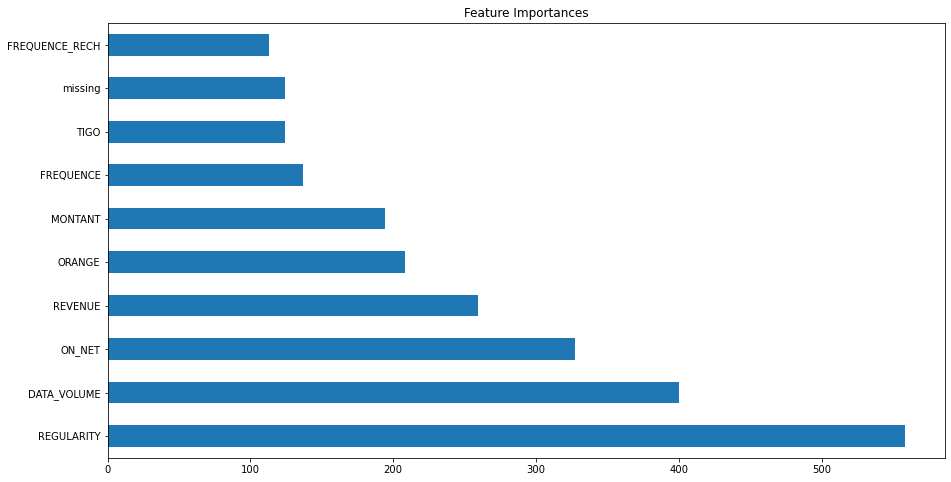

In [23]:
d= df.drop(['user_id', 'REGION','ARPU_SEGMENT', 'MRG','CHURN'], axis= 1)
feature_importances = pd.Series(model.feature_importances_, index= d.columns)
plt.figure(figsize= (15,8))
feature_importances.nlargest(10).plot(kind= 'barh')
plt.title('Feature Importances')
plt.savefig('Feature importances.png')

In [38]:
import pickle
with open('catboost_classifier.pickle', 'wb') as f:
    pickle.dump(model1, f)

In [39]:
with open('base_lgbm_classifier.pickle', 'wb') as f:
    pickle.dump(model, f)

In [34]:
from sklearn import model_selection
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
model= LGBMClassifier()
param_grid= {
    "n_estimators": np.arange(100, 1500, 100),
    "max_depth": [-1, 1, 4, 6],
    "feature_fraction": [0.5, 0.7, 0.8, 1.0],
    "num_leaves": [30, 35, 40, 45],
    "learning_rate": [0.01, 0.02, 0.03, 0.1]
}

model= model_selection.RandomizedSearchCV(
    estimator= model, param_distributions= param_grid, scoring= "neg_log_loss", cv= 10, verbose= 10
)

model.fit(X,y)
print(model.best_score_)
print(model.best_estimator_.get_params())


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.248, total=  20.5s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.254, total=  19.8s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.3s remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.254, total=  20.0s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.252, total=  20.4s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.253, total=  20.6s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.252, total=  21.1s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.254, total=  20.4s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.4min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.254, total=  20.5s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.7min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.252, total=  20.4s
[CV] num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.1min remaining:    0.0s


[CV]  num_leaves=45, n_estimators=700, max_depth=4, learning_rate=0.03, feature_fraction=0.5, score=-0.252, total=  21.2s
[CV] num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8 
[CV]  num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8, score=-0.249, total=  17.7s
[CV] num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8 
[CV]  num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8, score=-0.255, total=  18.3s
[CV] num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8 
[CV]  num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8, score=-0.254, total=  18.3s
[CV] num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8 
[CV]  num_leaves=40, n_estimators=600, max_depth=4, learning_rate=0.1, feature_fraction=0.8, score=-0.252, total=  17.6s
[CV] num_leaves=40, n_esti

[CV]  num_leaves=40, n_estimators=300, max_depth=6, learning_rate=0.03, feature_fraction=0.7, score=-0.252, total=  14.4s
[CV] num_leaves=40, n_estimators=300, max_depth=6, learning_rate=0.03, feature_fraction=0.7 
[CV]  num_leaves=40, n_estimators=300, max_depth=6, learning_rate=0.03, feature_fraction=0.7, score=-0.252, total=  14.1s
[CV] num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5 
[CV]  num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5, score=-0.248, total=  31.6s
[CV] num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5 
[CV]  num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5, score=-0.254, total=  32.3s
[CV] num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5 
[CV]  num_leaves=45, n_estimators=800, max_depth=6, learning_rate=0.02, feature_fraction=0.5, score=-0.254, total=  32.0s
[CV] num_leaves=45

[CV]  num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0, score=-0.293, total=  42.7s
[CV] num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0 
[CV]  num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0, score=-0.278, total=  41.9s
[CV] num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0 
[CV]  num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0, score=-0.296, total=  43.8s
[CV] num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0 
[CV]  num_leaves=40, n_estimators=1200, max_depth=-1, learning_rate=0.1, feature_fraction=1.0, score=-0.315, total=  44.7s
[CV] num_leaves=30, n_estimators=600, max_depth=-1, learning_rate=0.1, feature_fraction=0.7 
[CV]  num_leaves=30, n_estimators=600, max_depth=-1, learning_rate=0.1, feature_fraction=0.7, score=-0.250, total=  19.2s
[CV] num_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 36.4min finished


-0.25234190274036994
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.02, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'num_leaves': 45, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'feature_fraction': 0.5}


In [39]:
params= {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.02, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'num_leaves': 45, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'feature_fraction': 0.5}
model= LGBMClassifier(**params)
test_pred1=model.fit(X, y).predict_proba(tdf)[:, 1]

In [38]:
from catboost import CatBoostClassifier
model2= CatBoostClassifier()
param_grid= {
    "iterations":[500, 1000, 1500],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.02, 0.03, 0.1]
}

model2= model_selection.RandomizedSearchCV(
    estimator= model2, param_distributions= param_grid, scoring= "neg_log_loss", cv= 10, verbose= 110
)

model2.fit(X,y)
print(model2.best_score_)
print(model2.best_estimator_.get_params())


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=4, learning_rate=0.01, iterations=1500 ................
0:	learn: 0.6775751	total: 357ms	remaining: 8m 54s
1:	learn: 0.6623881	total: 510ms	remaining: 6m 22s
2:	learn: 0.6480327	total: 651ms	remaining: 5m 24s
3:	learn: 0.6341858	total: 809ms	remaining: 5m 2s
4:	learn: 0.6200586	total: 1.01s	remaining: 5m 1s
5:	learn: 0.6071636	total: 1.16s	remaining: 4m 48s
6:	learn: 0.5947798	total: 1.31s	remaining: 4m 39s
7:	learn: 0.5829951	total: 1.46s	remaining: 4m 32s
8:	learn: 0.5716604	total: 1.6s	remaining: 4m 25s
9:	learn: 0.5597885	total: 1.75s	remaining: 4m 20s
10:	learn: 0.5488218	total: 1.89s	remaining: 4m 15s
11:	learn: 0.5386137	total: 2.04s	remaining: 4m 12s
12:	learn: 0.5290413	total: 2.18s	remaining: 4m 9s
13:	learn: 0.5191733	total: 2.32s	remaining: 4m 6s
14:	learn: 0.5101907	total: 2.46s	remaining: 4m 3s
15:	learn: 0.5016921	

154:	learn: 0.2626299	total: 22.5s	remaining: 3m 14s
155:	learn: 0.2625237	total: 22.6s	remaining: 3m 14s
156:	learn: 0.2624168	total: 22.7s	remaining: 3m 14s
157:	learn: 0.2622746	total: 22.9s	remaining: 3m 14s
158:	learn: 0.2621726	total: 23s	remaining: 3m 14s
159:	learn: 0.2620339	total: 23.2s	remaining: 3m 13s
160:	learn: 0.2618930	total: 23.3s	remaining: 3m 13s
161:	learn: 0.2617616	total: 23.5s	remaining: 3m 13s
162:	learn: 0.2616698	total: 23.6s	remaining: 3m 13s
163:	learn: 0.2615627	total: 23.7s	remaining: 3m 13s
164:	learn: 0.2614685	total: 23.9s	remaining: 3m 13s
165:	learn: 0.2613837	total: 24s	remaining: 3m 13s
166:	learn: 0.2612686	total: 24.2s	remaining: 3m 12s
167:	learn: 0.2611495	total: 24.3s	remaining: 3m 12s
168:	learn: 0.2610358	total: 24.4s	remaining: 3m 12s
169:	learn: 0.2609569	total: 24.6s	remaining: 3m 12s
170:	learn: 0.2608741	total: 24.7s	remaining: 3m 11s
171:	learn: 0.2607958	total: 24.8s	remaining: 3m 11s
172:	learn: 0.2607151	total: 25s	remaining: 3m 11s

311:	learn: 0.2557150	total: 44.2s	remaining: 2m 48s
312:	learn: 0.2557012	total: 44.3s	remaining: 2m 48s
313:	learn: 0.2556770	total: 44.5s	remaining: 2m 48s
314:	learn: 0.2556665	total: 44.6s	remaining: 2m 47s
315:	learn: 0.2556559	total: 44.7s	remaining: 2m 47s
316:	learn: 0.2556312	total: 44.9s	remaining: 2m 47s
317:	learn: 0.2556216	total: 45s	remaining: 2m 47s
318:	learn: 0.2556120	total: 45.2s	remaining: 2m 47s
319:	learn: 0.2555969	total: 45.3s	remaining: 2m 46s
320:	learn: 0.2555808	total: 45.4s	remaining: 2m 46s
321:	learn: 0.2555724	total: 45.6s	remaining: 2m 46s
322:	learn: 0.2555538	total: 45.7s	remaining: 2m 46s
323:	learn: 0.2555468	total: 45.8s	remaining: 2m 46s
324:	learn: 0.2555359	total: 46s	remaining: 2m 46s
325:	learn: 0.2555274	total: 46.1s	remaining: 2m 46s
326:	learn: 0.2555148	total: 46.2s	remaining: 2m 45s
327:	learn: 0.2555051	total: 46.4s	remaining: 2m 45s
328:	learn: 0.2554964	total: 46.5s	remaining: 2m 45s
329:	learn: 0.2554744	total: 46.6s	remaining: 2m 4

467:	learn: 0.2543337	total: 1m 5s	remaining: 2m 24s
468:	learn: 0.2543313	total: 1m 5s	remaining: 2m 24s
469:	learn: 0.2543275	total: 1m 5s	remaining: 2m 23s
470:	learn: 0.2543232	total: 1m 5s	remaining: 2m 23s
471:	learn: 0.2543152	total: 1m 5s	remaining: 2m 23s
472:	learn: 0.2543129	total: 1m 6s	remaining: 2m 23s
473:	learn: 0.2543069	total: 1m 6s	remaining: 2m 23s
474:	learn: 0.2543016	total: 1m 6s	remaining: 2m 23s
475:	learn: 0.2542994	total: 1m 6s	remaining: 2m 23s
476:	learn: 0.2542917	total: 1m 6s	remaining: 2m 23s
477:	learn: 0.2542883	total: 1m 6s	remaining: 2m 22s
478:	learn: 0.2542856	total: 1m 6s	remaining: 2m 22s
479:	learn: 0.2542786	total: 1m 7s	remaining: 2m 22s
480:	learn: 0.2542758	total: 1m 7s	remaining: 2m 22s
481:	learn: 0.2542703	total: 1m 7s	remaining: 2m 22s
482:	learn: 0.2542653	total: 1m 7s	remaining: 2m 22s
483:	learn: 0.2542579	total: 1m 7s	remaining: 2m 22s
484:	learn: 0.2542516	total: 1m 7s	remaining: 2m 21s
485:	learn: 0.2542472	total: 1m 7s	remaining: 

621:	learn: 0.2537611	total: 1m 27s	remaining: 2m 3s
622:	learn: 0.2537586	total: 1m 27s	remaining: 2m 3s
623:	learn: 0.2537550	total: 1m 27s	remaining: 2m 3s
624:	learn: 0.2537512	total: 1m 28s	remaining: 2m 3s
625:	learn: 0.2537500	total: 1m 28s	remaining: 2m 3s
626:	learn: 0.2537469	total: 1m 28s	remaining: 2m 3s
627:	learn: 0.2537434	total: 1m 28s	remaining: 2m 2s
628:	learn: 0.2537393	total: 1m 28s	remaining: 2m 2s
629:	learn: 0.2537378	total: 1m 28s	remaining: 2m 2s
630:	learn: 0.2537356	total: 1m 28s	remaining: 2m 2s
631:	learn: 0.2537314	total: 1m 29s	remaining: 2m 2s
632:	learn: 0.2537287	total: 1m 29s	remaining: 2m 2s
633:	learn: 0.2537271	total: 1m 29s	remaining: 2m 2s
634:	learn: 0.2537225	total: 1m 29s	remaining: 2m 1s
635:	learn: 0.2537199	total: 1m 29s	remaining: 2m 1s
636:	learn: 0.2537172	total: 1m 29s	remaining: 2m 1s
637:	learn: 0.2537156	total: 1m 29s	remaining: 2m 1s
638:	learn: 0.2537130	total: 1m 30s	remaining: 2m 1s
639:	learn: 0.2537101	total: 1m 30s	remaining:

775:	learn: 0.2534177	total: 1m 49s	remaining: 1m 41s
776:	learn: 0.2534153	total: 1m 49s	remaining: 1m 41s
777:	learn: 0.2534142	total: 1m 49s	remaining: 1m 41s
778:	learn: 0.2534122	total: 1m 49s	remaining: 1m 41s
779:	learn: 0.2534108	total: 1m 49s	remaining: 1m 41s
780:	learn: 0.2534079	total: 1m 49s	remaining: 1m 41s
781:	learn: 0.2534059	total: 1m 49s	remaining: 1m 40s
782:	learn: 0.2534044	total: 1m 50s	remaining: 1m 40s
783:	learn: 0.2534032	total: 1m 50s	remaining: 1m 40s
784:	learn: 0.2533997	total: 1m 50s	remaining: 1m 40s
785:	learn: 0.2533976	total: 1m 50s	remaining: 1m 40s
786:	learn: 0.2533963	total: 1m 50s	remaining: 1m 40s
787:	learn: 0.2533949	total: 1m 50s	remaining: 1m 40s
788:	learn: 0.2533930	total: 1m 50s	remaining: 1m 39s
789:	learn: 0.2533923	total: 1m 51s	remaining: 1m 39s
790:	learn: 0.2533917	total: 1m 51s	remaining: 1m 39s
791:	learn: 0.2533902	total: 1m 51s	remaining: 1m 39s
792:	learn: 0.2533871	total: 1m 51s	remaining: 1m 39s
793:	learn: 0.2533849	total:

930:	learn: 0.2531677	total: 2m 11s	remaining: 1m 20s
931:	learn: 0.2531664	total: 2m 11s	remaining: 1m 20s
932:	learn: 0.2531644	total: 2m 11s	remaining: 1m 19s
933:	learn: 0.2531630	total: 2m 11s	remaining: 1m 19s
934:	learn: 0.2531610	total: 2m 11s	remaining: 1m 19s
935:	learn: 0.2531597	total: 2m 11s	remaining: 1m 19s
936:	learn: 0.2531587	total: 2m 12s	remaining: 1m 19s
937:	learn: 0.2531571	total: 2m 12s	remaining: 1m 19s
938:	learn: 0.2531550	total: 2m 12s	remaining: 1m 19s
939:	learn: 0.2531543	total: 2m 12s	remaining: 1m 18s
940:	learn: 0.2531526	total: 2m 12s	remaining: 1m 18s
941:	learn: 0.2531513	total: 2m 12s	remaining: 1m 18s
942:	learn: 0.2531504	total: 2m 12s	remaining: 1m 18s
943:	learn: 0.2531494	total: 2m 12s	remaining: 1m 18s
944:	learn: 0.2531484	total: 2m 13s	remaining: 1m 18s
945:	learn: 0.2531474	total: 2m 13s	remaining: 1m 18s
946:	learn: 0.2531455	total: 2m 13s	remaining: 1m 17s
947:	learn: 0.2531434	total: 2m 13s	remaining: 1m 17s
948:	learn: 0.2531421	total:

1083:	learn: 0.2529725	total: 2m 32s	remaining: 58.7s
1084:	learn: 0.2529720	total: 2m 32s	remaining: 58.5s
1085:	learn: 0.2529686	total: 2m 33s	remaining: 58.4s
1086:	learn: 0.2529678	total: 2m 33s	remaining: 58.2s
1087:	learn: 0.2529665	total: 2m 33s	remaining: 58.1s
1088:	learn: 0.2529657	total: 2m 33s	remaining: 58s
1089:	learn: 0.2529641	total: 2m 33s	remaining: 57.8s
1090:	learn: 0.2529621	total: 2m 33s	remaining: 57.7s
1091:	learn: 0.2529605	total: 2m 33s	remaining: 57.5s
1092:	learn: 0.2529603	total: 2m 34s	remaining: 57.4s
1093:	learn: 0.2529577	total: 2m 34s	remaining: 57.2s
1094:	learn: 0.2529573	total: 2m 34s	remaining: 57.1s
1095:	learn: 0.2529561	total: 2m 34s	remaining: 57s
1096:	learn: 0.2529539	total: 2m 34s	remaining: 56.8s
1097:	learn: 0.2529533	total: 2m 34s	remaining: 56.7s
1098:	learn: 0.2529514	total: 2m 34s	remaining: 56.5s
1099:	learn: 0.2529509	total: 2m 35s	remaining: 56.4s
1100:	learn: 0.2529497	total: 2m 35s	remaining: 56.3s
1101:	learn: 0.2529489	total: 2m

1237:	learn: 0.2527902	total: 2m 56s	remaining: 37.4s
1238:	learn: 0.2527886	total: 2m 56s	remaining: 37.2s
1239:	learn: 0.2527882	total: 2m 56s	remaining: 37.1s
1240:	learn: 0.2527874	total: 2m 57s	remaining: 36.9s
1241:	learn: 0.2527857	total: 2m 57s	remaining: 36.8s
1242:	learn: 0.2527839	total: 2m 57s	remaining: 36.6s
1243:	learn: 0.2527830	total: 2m 57s	remaining: 36.5s
1244:	learn: 0.2527827	total: 2m 57s	remaining: 36.4s
1245:	learn: 0.2527817	total: 2m 57s	remaining: 36.2s
1246:	learn: 0.2527803	total: 2m 57s	remaining: 36.1s
1247:	learn: 0.2527784	total: 2m 57s	remaining: 35.9s
1248:	learn: 0.2527772	total: 2m 58s	remaining: 35.8s
1249:	learn: 0.2527757	total: 2m 58s	remaining: 35.7s
1250:	learn: 0.2527746	total: 2m 58s	remaining: 35.5s
1251:	learn: 0.2527731	total: 2m 58s	remaining: 35.4s
1252:	learn: 0.2527698	total: 2m 58s	remaining: 35.2s
1253:	learn: 0.2527682	total: 2m 58s	remaining: 35.1s
1254:	learn: 0.2527668	total: 2m 58s	remaining: 34.9s
1255:	learn: 0.2527666	total

1391:	learn: 0.2526154	total: 3m 18s	remaining: 15.4s
1392:	learn: 0.2526145	total: 3m 18s	remaining: 15.2s
1393:	learn: 0.2526127	total: 3m 18s	remaining: 15.1s
1394:	learn: 0.2526121	total: 3m 18s	remaining: 14.9s
1395:	learn: 0.2526107	total: 3m 18s	remaining: 14.8s
1396:	learn: 0.2526089	total: 3m 18s	remaining: 14.7s
1397:	learn: 0.2526076	total: 3m 19s	remaining: 14.5s
1398:	learn: 0.2526062	total: 3m 19s	remaining: 14.4s
1399:	learn: 0.2526045	total: 3m 19s	remaining: 14.2s
1400:	learn: 0.2526030	total: 3m 19s	remaining: 14.1s
1401:	learn: 0.2526024	total: 3m 19s	remaining: 13.9s
1402:	learn: 0.2526009	total: 3m 19s	remaining: 13.8s
1403:	learn: 0.2526005	total: 3m 19s	remaining: 13.7s
1404:	learn: 0.2525990	total: 3m 19s	remaining: 13.5s
1405:	learn: 0.2525970	total: 3m 20s	remaining: 13.4s
1406:	learn: 0.2525964	total: 3m 20s	remaining: 13.2s
1407:	learn: 0.2525954	total: 3m 20s	remaining: 13.1s
1408:	learn: 0.2525948	total: 3m 20s	remaining: 13s
1409:	learn: 0.2525940	total: 

41:	learn: 0.3561349	total: 6.18s	remaining: 3m 34s
42:	learn: 0.3529901	total: 6.33s	remaining: 3m 34s
43:	learn: 0.3499819	total: 6.48s	remaining: 3m 34s
44:	learn: 0.3470359	total: 6.64s	remaining: 3m 34s
45:	learn: 0.3441427	total: 6.79s	remaining: 3m 34s
46:	learn: 0.3414097	total: 6.94s	remaining: 3m 34s
47:	learn: 0.3387393	total: 7.08s	remaining: 3m 34s
48:	learn: 0.3362650	total: 7.23s	remaining: 3m 34s
49:	learn: 0.3337744	total: 7.38s	remaining: 3m 34s
50:	learn: 0.3314997	total: 7.55s	remaining: 3m 34s
51:	learn: 0.3293055	total: 7.7s	remaining: 3m 34s
52:	learn: 0.3271122	total: 7.86s	remaining: 3m 34s
53:	learn: 0.3250710	total: 8s	remaining: 3m 34s
54:	learn: 0.3230785	total: 8.14s	remaining: 3m 33s
55:	learn: 0.3211031	total: 8.28s	remaining: 3m 33s
56:	learn: 0.3192104	total: 8.43s	remaining: 3m 33s
57:	learn: 0.3174607	total: 8.57s	remaining: 3m 33s
58:	learn: 0.3156499	total: 8.72s	remaining: 3m 32s
59:	learn: 0.3139320	total: 8.86s	remaining: 3m 32s
60:	learn: 0.312

198:	learn: 0.2581871	total: 28.3s	remaining: 3m 4s
199:	learn: 0.2581170	total: 28.4s	remaining: 3m 4s
200:	learn: 0.2580738	total: 28.6s	remaining: 3m 4s
201:	learn: 0.2580008	total: 28.7s	remaining: 3m 4s
202:	learn: 0.2579589	total: 28.8s	remaining: 3m 4s
203:	learn: 0.2579180	total: 29s	remaining: 3m 4s
204:	learn: 0.2578555	total: 29.1s	remaining: 3m 3s
205:	learn: 0.2578098	total: 29.2s	remaining: 3m 3s
206:	learn: 0.2577440	total: 29.4s	remaining: 3m 3s
207:	learn: 0.2577090	total: 29.5s	remaining: 3m 3s
208:	learn: 0.2576446	total: 29.6s	remaining: 3m 3s
209:	learn: 0.2576096	total: 29.8s	remaining: 3m 3s
210:	learn: 0.2575755	total: 30s	remaining: 3m 3s
211:	learn: 0.2575231	total: 30.1s	remaining: 3m 2s
212:	learn: 0.2574573	total: 30.2s	remaining: 3m 2s
213:	learn: 0.2574034	total: 30.4s	remaining: 3m 2s
214:	learn: 0.2573692	total: 30.5s	remaining: 3m 2s
215:	learn: 0.2573362	total: 30.6s	remaining: 3m 2s
216:	learn: 0.2573065	total: 30.8s	remaining: 3m 1s
217:	learn: 0.25

356:	learn: 0.2544842	total: 49.6s	remaining: 2m 38s
357:	learn: 0.2544749	total: 49.8s	remaining: 2m 38s
358:	learn: 0.2544606	total: 49.9s	remaining: 2m 38s
359:	learn: 0.2544455	total: 50s	remaining: 2m 38s
360:	learn: 0.2544390	total: 50.1s	remaining: 2m 38s
361:	learn: 0.2544293	total: 50.3s	remaining: 2m 38s
362:	learn: 0.2544181	total: 50.4s	remaining: 2m 37s
363:	learn: 0.2544111	total: 50.5s	remaining: 2m 37s
364:	learn: 0.2544019	total: 50.7s	remaining: 2m 37s
365:	learn: 0.2543891	total: 50.8s	remaining: 2m 37s
366:	learn: 0.2543840	total: 50.9s	remaining: 2m 37s
367:	learn: 0.2543682	total: 51.1s	remaining: 2m 37s
368:	learn: 0.2543627	total: 51.2s	remaining: 2m 36s
369:	learn: 0.2543575	total: 51.3s	remaining: 2m 36s
370:	learn: 0.2543521	total: 51.5s	remaining: 2m 36s
371:	learn: 0.2543472	total: 51.6s	remaining: 2m 36s
372:	learn: 0.2543413	total: 51.7s	remaining: 2m 36s
373:	learn: 0.2543383	total: 51.9s	remaining: 2m 36s
374:	learn: 0.2543303	total: 52s	remaining: 2m 3

511:	learn: 0.2534787	total: 1m 11s	remaining: 2m 18s
512:	learn: 0.2534753	total: 1m 11s	remaining: 2m 17s
513:	learn: 0.2534707	total: 1m 11s	remaining: 2m 17s
514:	learn: 0.2534669	total: 1m 11s	remaining: 2m 17s
515:	learn: 0.2534635	total: 1m 12s	remaining: 2m 17s
516:	learn: 0.2534595	total: 1m 12s	remaining: 2m 17s
517:	learn: 0.2534568	total: 1m 12s	remaining: 2m 17s
518:	learn: 0.2534524	total: 1m 12s	remaining: 2m 17s
519:	learn: 0.2534463	total: 1m 12s	remaining: 2m 16s
520:	learn: 0.2534409	total: 1m 12s	remaining: 2m 16s
521:	learn: 0.2534357	total: 1m 12s	remaining: 2m 16s
522:	learn: 0.2534336	total: 1m 13s	remaining: 2m 16s
523:	learn: 0.2534307	total: 1m 13s	remaining: 2m 16s
524:	learn: 0.2534287	total: 1m 13s	remaining: 2m 16s
525:	learn: 0.2534250	total: 1m 13s	remaining: 2m 15s
526:	learn: 0.2534222	total: 1m 13s	remaining: 2m 15s
527:	learn: 0.2534162	total: 1m 13s	remaining: 2m 15s
528:	learn: 0.2534124	total: 1m 13s	remaining: 2m 15s
529:	learn: 0.2534062	total:

666:	learn: 0.2529809	total: 1m 32s	remaining: 1m 55s
667:	learn: 0.2529787	total: 1m 32s	remaining: 1m 55s
668:	learn: 0.2529751	total: 1m 33s	remaining: 1m 55s
669:	learn: 0.2529717	total: 1m 33s	remaining: 1m 55s
670:	learn: 0.2529710	total: 1m 33s	remaining: 1m 55s
671:	learn: 0.2529681	total: 1m 33s	remaining: 1m 55s
672:	learn: 0.2529655	total: 1m 33s	remaining: 1m 55s
673:	learn: 0.2529613	total: 1m 33s	remaining: 1m 54s
674:	learn: 0.2529583	total: 1m 33s	remaining: 1m 54s
675:	learn: 0.2529573	total: 1m 34s	remaining: 1m 54s
676:	learn: 0.2529558	total: 1m 34s	remaining: 1m 54s
677:	learn: 0.2529528	total: 1m 34s	remaining: 1m 54s
678:	learn: 0.2529500	total: 1m 34s	remaining: 1m 54s
679:	learn: 0.2529473	total: 1m 34s	remaining: 1m 54s
680:	learn: 0.2529453	total: 1m 34s	remaining: 1m 53s
681:	learn: 0.2529431	total: 1m 34s	remaining: 1m 53s
682:	learn: 0.2529424	total: 1m 35s	remaining: 1m 53s
683:	learn: 0.2529392	total: 1m 35s	remaining: 1m 53s
684:	learn: 0.2529367	total:

819:	learn: 0.2526848	total: 1m 54s	remaining: 1m 34s
820:	learn: 0.2526840	total: 1m 54s	remaining: 1m 34s
821:	learn: 0.2526829	total: 1m 54s	remaining: 1m 34s
822:	learn: 0.2526811	total: 1m 54s	remaining: 1m 34s
823:	learn: 0.2526804	total: 1m 54s	remaining: 1m 34s
824:	learn: 0.2526799	total: 1m 54s	remaining: 1m 34s
825:	learn: 0.2526788	total: 1m 55s	remaining: 1m 33s
826:	learn: 0.2526776	total: 1m 55s	remaining: 1m 33s
827:	learn: 0.2526765	total: 1m 55s	remaining: 1m 33s
828:	learn: 0.2526746	total: 1m 55s	remaining: 1m 33s
829:	learn: 0.2526731	total: 1m 55s	remaining: 1m 33s
830:	learn: 0.2526719	total: 1m 55s	remaining: 1m 33s
831:	learn: 0.2526704	total: 1m 55s	remaining: 1m 33s
832:	learn: 0.2526688	total: 1m 56s	remaining: 1m 32s
833:	learn: 0.2526674	total: 1m 56s	remaining: 1m 32s
834:	learn: 0.2526660	total: 1m 56s	remaining: 1m 32s
835:	learn: 0.2526647	total: 1m 56s	remaining: 1m 32s
836:	learn: 0.2526622	total: 1m 56s	remaining: 1m 32s
837:	learn: 0.2526601	total:

974:	learn: 0.2524772	total: 2m 16s	remaining: 1m 13s
975:	learn: 0.2524750	total: 2m 16s	remaining: 1m 13s
976:	learn: 0.2524740	total: 2m 16s	remaining: 1m 13s
977:	learn: 0.2524716	total: 2m 16s	remaining: 1m 13s
978:	learn: 0.2524702	total: 2m 17s	remaining: 1m 12s
979:	learn: 0.2524691	total: 2m 17s	remaining: 1m 12s
980:	learn: 0.2524662	total: 2m 17s	remaining: 1m 12s
981:	learn: 0.2524644	total: 2m 17s	remaining: 1m 12s
982:	learn: 0.2524627	total: 2m 17s	remaining: 1m 12s
983:	learn: 0.2524612	total: 2m 17s	remaining: 1m 12s
984:	learn: 0.2524597	total: 2m 17s	remaining: 1m 12s
985:	learn: 0.2524586	total: 2m 18s	remaining: 1m 11s
986:	learn: 0.2524582	total: 2m 18s	remaining: 1m 11s
987:	learn: 0.2524574	total: 2m 18s	remaining: 1m 11s
988:	learn: 0.2524556	total: 2m 18s	remaining: 1m 11s
989:	learn: 0.2524535	total: 2m 18s	remaining: 1m 11s
990:	learn: 0.2524526	total: 2m 18s	remaining: 1m 11s
991:	learn: 0.2524515	total: 2m 18s	remaining: 1m 11s
992:	learn: 0.2524511	total:

1128:	learn: 0.2522942	total: 2m 38s	remaining: 52s
1129:	learn: 0.2522938	total: 2m 38s	remaining: 51.9s
1130:	learn: 0.2522924	total: 2m 38s	remaining: 51.7s
1131:	learn: 0.2522915	total: 2m 38s	remaining: 51.6s
1132:	learn: 0.2522898	total: 2m 38s	remaining: 51.4s
1133:	learn: 0.2522886	total: 2m 38s	remaining: 51.3s
1134:	learn: 0.2522874	total: 2m 39s	remaining: 51.2s
1135:	learn: 0.2522862	total: 2m 39s	remaining: 51s
1136:	learn: 0.2522850	total: 2m 39s	remaining: 50.9s
1137:	learn: 0.2522837	total: 2m 39s	remaining: 50.7s
1138:	learn: 0.2522820	total: 2m 39s	remaining: 50.6s
1139:	learn: 0.2522809	total: 2m 39s	remaining: 50.5s
1140:	learn: 0.2522795	total: 2m 39s	remaining: 50.3s
1141:	learn: 0.2522778	total: 2m 40s	remaining: 50.2s
1142:	learn: 0.2522761	total: 2m 40s	remaining: 50s
1143:	learn: 0.2522755	total: 2m 40s	remaining: 49.9s
1144:	learn: 0.2522741	total: 2m 40s	remaining: 49.8s
1145:	learn: 0.2522718	total: 2m 40s	remaining: 49.6s
1146:	learn: 0.2522709	total: 2m 4

1282:	learn: 0.2521161	total: 3m	remaining: 30.6s
1283:	learn: 0.2521144	total: 3m	remaining: 30.4s
1284:	learn: 0.2521128	total: 3m 1s	remaining: 30.3s
1285:	learn: 0.2521117	total: 3m 1s	remaining: 30.2s
1286:	learn: 0.2521113	total: 3m 1s	remaining: 30s
1287:	learn: 0.2521098	total: 3m 1s	remaining: 29.9s
1288:	learn: 0.2521081	total: 3m 1s	remaining: 29.7s
1289:	learn: 0.2521076	total: 3m 1s	remaining: 29.6s
1290:	learn: 0.2521061	total: 3m 1s	remaining: 29.5s
1291:	learn: 0.2521046	total: 3m 2s	remaining: 29.3s
1292:	learn: 0.2521024	total: 3m 2s	remaining: 29.2s
1293:	learn: 0.2521017	total: 3m 2s	remaining: 29s
1294:	learn: 0.2520996	total: 3m 2s	remaining: 28.9s
1295:	learn: 0.2520982	total: 3m 2s	remaining: 28.7s
1296:	learn: 0.2520968	total: 3m 2s	remaining: 28.6s
1297:	learn: 0.2520956	total: 3m 2s	remaining: 28.5s
1298:	learn: 0.2520946	total: 3m 3s	remaining: 28.3s
1299:	learn: 0.2520935	total: 3m 3s	remaining: 28.2s
1300:	learn: 0.2520931	total: 3m 3s	remaining: 28s
1301:

1436:	learn: 0.2519506	total: 3m 22s	remaining: 8.88s
1437:	learn: 0.2519491	total: 3m 22s	remaining: 8.74s
1438:	learn: 0.2519485	total: 3m 22s	remaining: 8.6s
1439:	learn: 0.2519479	total: 3m 23s	remaining: 8.46s
1440:	learn: 0.2519473	total: 3m 23s	remaining: 8.32s
1441:	learn: 0.2519469	total: 3m 23s	remaining: 8.18s
1442:	learn: 0.2519454	total: 3m 23s	remaining: 8.04s
1443:	learn: 0.2519450	total: 3m 23s	remaining: 7.9s
1444:	learn: 0.2519428	total: 3m 23s	remaining: 7.76s
1445:	learn: 0.2519415	total: 3m 23s	remaining: 7.62s
1446:	learn: 0.2519401	total: 3m 24s	remaining: 7.47s
1447:	learn: 0.2519392	total: 3m 24s	remaining: 7.33s
1448:	learn: 0.2519387	total: 3m 24s	remaining: 7.19s
1449:	learn: 0.2519369	total: 3m 24s	remaining: 7.05s
1450:	learn: 0.2519363	total: 3m 24s	remaining: 6.91s
1451:	learn: 0.2519343	total: 3m 24s	remaining: 6.77s
1452:	learn: 0.2519329	total: 3m 24s	remaining: 6.63s
1453:	learn: 0.2519321	total: 3m 25s	remaining: 6.49s
1454:	learn: 0.2519307	total: 

89:	learn: 0.2821216	total: 12.8s	remaining: 3m 19s
90:	learn: 0.2815110	total: 12.9s	remaining: 3m 19s
91:	learn: 0.2809021	total: 13s	remaining: 3m 19s
92:	learn: 0.2803198	total: 13.1s	remaining: 3m 18s
93:	learn: 0.2796493	total: 13.3s	remaining: 3m 18s
94:	learn: 0.2789966	total: 13.4s	remaining: 3m 18s
95:	learn: 0.2784393	total: 13.6s	remaining: 3m 18s
96:	learn: 0.2779345	total: 13.7s	remaining: 3m 18s
97:	learn: 0.2774262	total: 13.9s	remaining: 3m 18s
98:	learn: 0.2769500	total: 14.1s	remaining: 3m 18s
99:	learn: 0.2764775	total: 14.2s	remaining: 3m 18s
100:	learn: 0.2760095	total: 14.3s	remaining: 3m 18s
101:	learn: 0.2755694	total: 14.5s	remaining: 3m 18s
102:	learn: 0.2751311	total: 14.6s	remaining: 3m 18s
103:	learn: 0.2746666	total: 14.8s	remaining: 3m 18s
104:	learn: 0.2742538	total: 14.9s	remaining: 3m 18s
105:	learn: 0.2738714	total: 15.1s	remaining: 3m 18s
106:	learn: 0.2733924	total: 15.2s	remaining: 3m 18s
107:	learn: 0.2729413	total: 15.4s	remaining: 3m 17s
108:	l

248:	learn: 0.2563189	total: 35.1s	remaining: 2m 56s
249:	learn: 0.2562816	total: 35.3s	remaining: 2m 56s
250:	learn: 0.2562588	total: 35.4s	remaining: 2m 56s
251:	learn: 0.2562178	total: 35.6s	remaining: 2m 56s
252:	learn: 0.2562055	total: 35.7s	remaining: 2m 55s
253:	learn: 0.2561848	total: 35.8s	remaining: 2m 55s
254:	learn: 0.2561672	total: 36s	remaining: 2m 55s
255:	learn: 0.2561474	total: 36.1s	remaining: 2m 55s
256:	learn: 0.2561282	total: 36.2s	remaining: 2m 55s
257:	learn: 0.2561114	total: 36.4s	remaining: 2m 55s
258:	learn: 0.2560784	total: 36.5s	remaining: 2m 54s
259:	learn: 0.2560633	total: 36.7s	remaining: 2m 54s
260:	learn: 0.2560478	total: 36.8s	remaining: 2m 54s
261:	learn: 0.2560156	total: 36.9s	remaining: 2m 54s
262:	learn: 0.2559933	total: 37.1s	remaining: 2m 54s
263:	learn: 0.2559767	total: 37.2s	remaining: 2m 54s
264:	learn: 0.2559540	total: 37.3s	remaining: 2m 54s
265:	learn: 0.2559380	total: 37.5s	remaining: 2m 53s
266:	learn: 0.2559253	total: 37.6s	remaining: 2m

405:	learn: 0.2540776	total: 56.5s	remaining: 2m 32s
406:	learn: 0.2540639	total: 56.6s	remaining: 2m 31s
407:	learn: 0.2540573	total: 56.7s	remaining: 2m 31s
408:	learn: 0.2540534	total: 56.8s	remaining: 2m 31s
409:	learn: 0.2540487	total: 57s	remaining: 2m 31s
410:	learn: 0.2540454	total: 57.1s	remaining: 2m 31s
411:	learn: 0.2540337	total: 57.2s	remaining: 2m 31s
412:	learn: 0.2540293	total: 57.4s	remaining: 2m 30s
413:	learn: 0.2540242	total: 57.5s	remaining: 2m 30s
414:	learn: 0.2540202	total: 57.6s	remaining: 2m 30s
415:	learn: 0.2540125	total: 57.7s	remaining: 2m 30s
416:	learn: 0.2540074	total: 57.8s	remaining: 2m 30s
417:	learn: 0.2539982	total: 58s	remaining: 2m 30s
418:	learn: 0.2539943	total: 58.1s	remaining: 2m 29s
419:	learn: 0.2539882	total: 58.2s	remaining: 2m 29s
420:	learn: 0.2539809	total: 58.4s	remaining: 2m 29s
421:	learn: 0.2539759	total: 58.5s	remaining: 2m 29s
422:	learn: 0.2539692	total: 58.6s	remaining: 2m 29s
423:	learn: 0.2539631	total: 58.7s	remaining: 2m 2

560:	learn: 0.2533331	total: 1m 16s	remaining: 2m 7s
561:	learn: 0.2533287	total: 1m 16s	remaining: 2m 7s
562:	learn: 0.2533261	total: 1m 16s	remaining: 2m 7s
563:	learn: 0.2533237	total: 1m 16s	remaining: 2m 7s
564:	learn: 0.2533212	total: 1m 16s	remaining: 2m 7s
565:	learn: 0.2533172	total: 1m 17s	remaining: 2m 7s
566:	learn: 0.2533136	total: 1m 17s	remaining: 2m 7s
567:	learn: 0.2533107	total: 1m 17s	remaining: 2m 6s
568:	learn: 0.2533074	total: 1m 17s	remaining: 2m 6s
569:	learn: 0.2533040	total: 1m 17s	remaining: 2m 6s
570:	learn: 0.2532996	total: 1m 17s	remaining: 2m 6s
571:	learn: 0.2532937	total: 1m 17s	remaining: 2m 6s
572:	learn: 0.2532914	total: 1m 17s	remaining: 2m 6s
573:	learn: 0.2532882	total: 1m 18s	remaining: 2m 6s
574:	learn: 0.2532846	total: 1m 18s	remaining: 2m 5s
575:	learn: 0.2532827	total: 1m 18s	remaining: 2m 5s
576:	learn: 0.2532802	total: 1m 18s	remaining: 2m 5s
577:	learn: 0.2532778	total: 1m 18s	remaining: 2m 5s
578:	learn: 0.2532739	total: 1m 18s	remaining:

715:	learn: 0.2529366	total: 1m 37s	remaining: 1m 46s
716:	learn: 0.2529347	total: 1m 37s	remaining: 1m 46s
717:	learn: 0.2529321	total: 1m 37s	remaining: 1m 46s
718:	learn: 0.2529298	total: 1m 38s	remaining: 1m 46s
719:	learn: 0.2529268	total: 1m 38s	remaining: 1m 46s
720:	learn: 0.2529249	total: 1m 38s	remaining: 1m 46s
721:	learn: 0.2529228	total: 1m 38s	remaining: 1m 46s
722:	learn: 0.2529198	total: 1m 38s	remaining: 1m 45s
723:	learn: 0.2529175	total: 1m 38s	remaining: 1m 45s
724:	learn: 0.2529167	total: 1m 38s	remaining: 1m 45s
725:	learn: 0.2529152	total: 1m 39s	remaining: 1m 45s
726:	learn: 0.2529127	total: 1m 39s	remaining: 1m 45s
727:	learn: 0.2529107	total: 1m 39s	remaining: 1m 45s
728:	learn: 0.2529091	total: 1m 39s	remaining: 1m 45s
729:	learn: 0.2529075	total: 1m 39s	remaining: 1m 45s
730:	learn: 0.2529064	total: 1m 39s	remaining: 1m 44s
731:	learn: 0.2529036	total: 1m 39s	remaining: 1m 44s
732:	learn: 0.2529016	total: 1m 39s	remaining: 1m 44s
733:	learn: 0.2528988	total:

867:	learn: 0.2526575	total: 1m 58s	remaining: 1m 26s
868:	learn: 0.2526561	total: 1m 58s	remaining: 1m 26s
869:	learn: 0.2526544	total: 1m 58s	remaining: 1m 26s
870:	learn: 0.2526535	total: 1m 58s	remaining: 1m 25s
871:	learn: 0.2526518	total: 1m 59s	remaining: 1m 25s
872:	learn: 0.2526486	total: 1m 59s	remaining: 1m 25s
873:	learn: 0.2526474	total: 1m 59s	remaining: 1m 25s
874:	learn: 0.2526449	total: 1m 59s	remaining: 1m 25s
875:	learn: 0.2526437	total: 1m 59s	remaining: 1m 25s
876:	learn: 0.2526419	total: 1m 59s	remaining: 1m 25s
877:	learn: 0.2526406	total: 1m 59s	remaining: 1m 24s
878:	learn: 0.2526398	total: 2m	remaining: 1m 24s
879:	learn: 0.2526385	total: 2m	remaining: 1m 24s
880:	learn: 0.2526372	total: 2m	remaining: 1m 24s
881:	learn: 0.2526338	total: 2m	remaining: 1m 24s
882:	learn: 0.2526307	total: 2m	remaining: 1m 24s
883:	learn: 0.2526284	total: 2m	remaining: 1m 24s
884:	learn: 0.2526267	total: 2m	remaining: 1m 23s
885:	learn: 0.2526243	total: 2m 1s	remaining: 1m 23s
886

1021:	learn: 0.2524498	total: 2m 19s	remaining: 1m 5s
1022:	learn: 0.2524483	total: 2m 19s	remaining: 1m 5s
1023:	learn: 0.2524475	total: 2m 19s	remaining: 1m 5s
1024:	learn: 0.2524460	total: 2m 20s	remaining: 1m 4s
1025:	learn: 0.2524441	total: 2m 20s	remaining: 1m 4s
1026:	learn: 0.2524436	total: 2m 20s	remaining: 1m 4s
1027:	learn: 0.2524422	total: 2m 20s	remaining: 1m 4s
1028:	learn: 0.2524414	total: 2m 20s	remaining: 1m 4s
1029:	learn: 0.2524396	total: 2m 20s	remaining: 1m 4s
1030:	learn: 0.2524385	total: 2m 20s	remaining: 1m 4s
1031:	learn: 0.2524377	total: 2m 21s	remaining: 1m 3s
1032:	learn: 0.2524372	total: 2m 21s	remaining: 1m 3s
1033:	learn: 0.2524351	total: 2m 21s	remaining: 1m 3s
1034:	learn: 0.2524338	total: 2m 21s	remaining: 1m 3s
1035:	learn: 0.2524333	total: 2m 21s	remaining: 1m 3s
1036:	learn: 0.2524325	total: 2m 21s	remaining: 1m 3s
1037:	learn: 0.2524317	total: 2m 21s	remaining: 1m 3s
1038:	learn: 0.2524299	total: 2m 21s	remaining: 1m 2s
1039:	learn: 0.2524289	total

1175:	learn: 0.2522570	total: 2m 40s	remaining: 44.3s
1176:	learn: 0.2522543	total: 2m 40s	remaining: 44.2s
1177:	learn: 0.2522526	total: 2m 41s	remaining: 44s
1178:	learn: 0.2522513	total: 2m 41s	remaining: 43.9s
1179:	learn: 0.2522498	total: 2m 41s	remaining: 43.8s
1180:	learn: 0.2522486	total: 2m 41s	remaining: 43.6s
1181:	learn: 0.2522477	total: 2m 41s	remaining: 43.5s
1182:	learn: 0.2522462	total: 2m 41s	remaining: 43.3s
1183:	learn: 0.2522457	total: 2m 41s	remaining: 43.2s
1184:	learn: 0.2522445	total: 2m 42s	remaining: 43.1s
1185:	learn: 0.2522428	total: 2m 42s	remaining: 42.9s
1186:	learn: 0.2522417	total: 2m 42s	remaining: 42.8s
1187:	learn: 0.2522402	total: 2m 42s	remaining: 42.7s
1188:	learn: 0.2522387	total: 2m 42s	remaining: 42.5s
1189:	learn: 0.2522372	total: 2m 42s	remaining: 42.4s
1190:	learn: 0.2522364	total: 2m 42s	remaining: 42.3s
1191:	learn: 0.2522351	total: 2m 43s	remaining: 42.1s
1192:	learn: 0.2522329	total: 2m 43s	remaining: 42s
1193:	learn: 0.2522305	total: 2m

1329:	learn: 0.2520567	total: 3m 1s	remaining: 23.2s
1330:	learn: 0.2520559	total: 3m 1s	remaining: 23.1s
1331:	learn: 0.2520551	total: 3m 2s	remaining: 23s
1332:	learn: 0.2520540	total: 3m 2s	remaining: 22.8s
1333:	learn: 0.2520525	total: 3m 2s	remaining: 22.7s
1334:	learn: 0.2520508	total: 3m 2s	remaining: 22.6s
1335:	learn: 0.2520493	total: 3m 2s	remaining: 22.4s
1336:	learn: 0.2520476	total: 3m 2s	remaining: 22.3s
1337:	learn: 0.2520470	total: 3m 2s	remaining: 22.1s
1338:	learn: 0.2520457	total: 3m 3s	remaining: 22s
1339:	learn: 0.2520449	total: 3m 3s	remaining: 21.9s
1340:	learn: 0.2520443	total: 3m 3s	remaining: 21.7s
1341:	learn: 0.2520434	total: 3m 3s	remaining: 21.6s
1342:	learn: 0.2520423	total: 3m 3s	remaining: 21.5s
1343:	learn: 0.2520410	total: 3m 3s	remaining: 21.3s
1344:	learn: 0.2520399	total: 3m 3s	remaining: 21.2s
1345:	learn: 0.2520394	total: 3m 3s	remaining: 21s
1346:	learn: 0.2520385	total: 3m 4s	remaining: 20.9s
1347:	learn: 0.2520372	total: 3m 4s	remaining: 20.8s

1483:	learn: 0.2518948	total: 3m 23s	remaining: 2.2s
1484:	learn: 0.2518933	total: 3m 23s	remaining: 2.06s
1485:	learn: 0.2518924	total: 3m 24s	remaining: 1.92s
1486:	learn: 0.2518914	total: 3m 24s	remaining: 1.78s
1487:	learn: 0.2518910	total: 3m 24s	remaining: 1.65s
1488:	learn: 0.2518898	total: 3m 24s	remaining: 1.51s
1489:	learn: 0.2518887	total: 3m 24s	remaining: 1.37s
1490:	learn: 0.2518876	total: 3m 24s	remaining: 1.24s
1491:	learn: 0.2518869	total: 3m 24s	remaining: 1.1s
1492:	learn: 0.2518853	total: 3m 25s	remaining: 961ms
1493:	learn: 0.2518846	total: 3m 25s	remaining: 824ms
1494:	learn: 0.2518840	total: 3m 25s	remaining: 687ms
1495:	learn: 0.2518838	total: 3m 25s	remaining: 549ms
1496:	learn: 0.2518829	total: 3m 25s	remaining: 412ms
1497:	learn: 0.2518818	total: 3m 25s	remaining: 275ms
1498:	learn: 0.2518806	total: 3m 25s	remaining: 137ms
1499:	learn: 0.2518804	total: 3m 26s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.01, iterations=1500, score=-0.254, total= 3.5min
[P

136:	learn: 0.2650347	total: 19.3s	remaining: 3m 12s
137:	learn: 0.2648177	total: 19.5s	remaining: 3m 12s
138:	learn: 0.2646491	total: 19.6s	remaining: 3m 12s
139:	learn: 0.2644389	total: 19.8s	remaining: 3m 12s
140:	learn: 0.2642673	total: 19.9s	remaining: 3m 12s
141:	learn: 0.2641056	total: 20.1s	remaining: 3m 11s
142:	learn: 0.2639538	total: 20.2s	remaining: 3m 11s
143:	learn: 0.2638078	total: 20.3s	remaining: 3m 11s
144:	learn: 0.2636232	total: 20.5s	remaining: 3m 11s
145:	learn: 0.2634785	total: 20.6s	remaining: 3m 11s
146:	learn: 0.2633215	total: 20.8s	remaining: 3m 11s
147:	learn: 0.2631869	total: 20.9s	remaining: 3m 10s
148:	learn: 0.2630308	total: 21.1s	remaining: 3m 10s
149:	learn: 0.2628530	total: 21.2s	remaining: 3m 10s
150:	learn: 0.2627356	total: 21.4s	remaining: 3m 11s
151:	learn: 0.2626146	total: 21.5s	remaining: 3m 10s
152:	learn: 0.2624461	total: 21.7s	remaining: 3m 11s
153:	learn: 0.2623309	total: 21.9s	remaining: 3m 11s
154:	learn: 0.2621830	total: 22s	remaining: 3m

293:	learn: 0.2556021	total: 40.6s	remaining: 2m 46s
294:	learn: 0.2555758	total: 40.8s	remaining: 2m 46s
295:	learn: 0.2555592	total: 40.9s	remaining: 2m 46s
296:	learn: 0.2555453	total: 41s	remaining: 2m 46s
297:	learn: 0.2555196	total: 41.2s	remaining: 2m 46s
298:	learn: 0.2554892	total: 41.3s	remaining: 2m 45s
299:	learn: 0.2554827	total: 41.4s	remaining: 2m 45s
300:	learn: 0.2554731	total: 41.6s	remaining: 2m 45s
301:	learn: 0.2554647	total: 41.7s	remaining: 2m 45s
302:	learn: 0.2554419	total: 41.8s	remaining: 2m 45s
303:	learn: 0.2554277	total: 42s	remaining: 2m 45s
304:	learn: 0.2554029	total: 42.1s	remaining: 2m 44s
305:	learn: 0.2553880	total: 42.2s	remaining: 2m 44s
306:	learn: 0.2553783	total: 42.4s	remaining: 2m 44s
307:	learn: 0.2553703	total: 42.5s	remaining: 2m 44s
308:	learn: 0.2553450	total: 42.6s	remaining: 2m 44s
309:	learn: 0.2553316	total: 42.8s	remaining: 2m 44s
310:	learn: 0.2553115	total: 42.9s	remaining: 2m 44s
311:	learn: 0.2552885	total: 43s	remaining: 2m 43s

449:	learn: 0.2540698	total: 1m 1s	remaining: 2m 23s
450:	learn: 0.2540643	total: 1m 1s	remaining: 2m 23s
451:	learn: 0.2540603	total: 1m 1s	remaining: 2m 23s
452:	learn: 0.2540573	total: 1m 2s	remaining: 2m 23s
453:	learn: 0.2540547	total: 1m 2s	remaining: 2m 23s
454:	learn: 0.2540484	total: 1m 2s	remaining: 2m 23s
455:	learn: 0.2540421	total: 1m 2s	remaining: 2m 23s
456:	learn: 0.2540393	total: 1m 2s	remaining: 2m 22s
457:	learn: 0.2540356	total: 1m 2s	remaining: 2m 22s
458:	learn: 0.2540271	total: 1m 2s	remaining: 2m 22s
459:	learn: 0.2540218	total: 1m 2s	remaining: 2m 22s
460:	learn: 0.2540165	total: 1m 3s	remaining: 2m 22s
461:	learn: 0.2540090	total: 1m 3s	remaining: 2m 22s
462:	learn: 0.2540035	total: 1m 3s	remaining: 2m 22s
463:	learn: 0.2540006	total: 1m 3s	remaining: 2m 21s
464:	learn: 0.2539928	total: 1m 3s	remaining: 2m 21s
465:	learn: 0.2539874	total: 1m 3s	remaining: 2m 21s
466:	learn: 0.2539806	total: 1m 3s	remaining: 2m 21s
467:	learn: 0.2539764	total: 1m 4s	remaining: 

604:	learn: 0.2534409	total: 1m 23s	remaining: 2m 2s
605:	learn: 0.2534380	total: 1m 23s	remaining: 2m 2s
606:	learn: 0.2534359	total: 1m 23s	remaining: 2m 2s
607:	learn: 0.2534335	total: 1m 23s	remaining: 2m 2s
608:	learn: 0.2534292	total: 1m 23s	remaining: 2m 2s
609:	learn: 0.2534260	total: 1m 23s	remaining: 2m 2s
610:	learn: 0.2534225	total: 1m 23s	remaining: 2m 2s
611:	learn: 0.2534185	total: 1m 24s	remaining: 2m 1s
612:	learn: 0.2534168	total: 1m 24s	remaining: 2m 1s
613:	learn: 0.2534146	total: 1m 24s	remaining: 2m 1s
614:	learn: 0.2534113	total: 1m 24s	remaining: 2m 1s
615:	learn: 0.2534095	total: 1m 24s	remaining: 2m 1s
616:	learn: 0.2534084	total: 1m 24s	remaining: 2m 1s
617:	learn: 0.2534072	total: 1m 24s	remaining: 2m 1s
618:	learn: 0.2534030	total: 1m 25s	remaining: 2m 1s
619:	learn: 0.2534012	total: 1m 25s	remaining: 2m
620:	learn: 0.2533966	total: 1m 25s	remaining: 2m
621:	learn: 0.2533916	total: 1m 25s	remaining: 2m
622:	learn: 0.2533886	total: 1m 25s	remaining: 2m
623:	

757:	learn: 0.2530847	total: 1m 44s	remaining: 1m 42s
758:	learn: 0.2530816	total: 1m 44s	remaining: 1m 41s
759:	learn: 0.2530795	total: 1m 44s	remaining: 1m 41s
760:	learn: 0.2530766	total: 1m 44s	remaining: 1m 41s
761:	learn: 0.2530760	total: 1m 44s	remaining: 1m 41s
762:	learn: 0.2530736	total: 1m 44s	remaining: 1m 41s
763:	learn: 0.2530732	total: 1m 45s	remaining: 1m 41s
764:	learn: 0.2530708	total: 1m 45s	remaining: 1m 41s
765:	learn: 0.2530698	total: 1m 45s	remaining: 1m 40s
766:	learn: 0.2530686	total: 1m 45s	remaining: 1m 40s
767:	learn: 0.2530667	total: 1m 45s	remaining: 1m 40s
768:	learn: 0.2530657	total: 1m 45s	remaining: 1m 40s
769:	learn: 0.2530633	total: 1m 45s	remaining: 1m 40s
770:	learn: 0.2530615	total: 1m 46s	remaining: 1m 40s
771:	learn: 0.2530595	total: 1m 46s	remaining: 1m 40s
772:	learn: 0.2530583	total: 1m 46s	remaining: 1m 40s
773:	learn: 0.2530565	total: 1m 46s	remaining: 1m 40s
774:	learn: 0.2530552	total: 1m 46s	remaining: 1m 39s
775:	learn: 0.2530527	total:

911:	learn: 0.2528404	total: 2m 6s	remaining: 1m 21s
912:	learn: 0.2528388	total: 2m 6s	remaining: 1m 21s
913:	learn: 0.2528372	total: 2m 6s	remaining: 1m 21s
914:	learn: 0.2528352	total: 2m 7s	remaining: 1m 21s
915:	learn: 0.2528340	total: 2m 7s	remaining: 1m 21s
916:	learn: 0.2528329	total: 2m 7s	remaining: 1m 20s
917:	learn: 0.2528310	total: 2m 7s	remaining: 1m 20s
918:	learn: 0.2528286	total: 2m 7s	remaining: 1m 20s
919:	learn: 0.2528270	total: 2m 7s	remaining: 1m 20s
920:	learn: 0.2528258	total: 2m 7s	remaining: 1m 20s
921:	learn: 0.2528245	total: 2m 8s	remaining: 1m 20s
922:	learn: 0.2528237	total: 2m 8s	remaining: 1m 20s
923:	learn: 0.2528218	total: 2m 8s	remaining: 1m 19s
924:	learn: 0.2528202	total: 2m 8s	remaining: 1m 19s
925:	learn: 0.2528180	total: 2m 8s	remaining: 1m 19s
926:	learn: 0.2528164	total: 2m 8s	remaining: 1m 19s
927:	learn: 0.2528153	total: 2m 8s	remaining: 1m 19s
928:	learn: 0.2528140	total: 2m 9s	remaining: 1m 19s
929:	learn: 0.2528130	total: 2m 9s	remaining: 

1064:	learn: 0.2526506	total: 2m 28s	remaining: 1m
1065:	learn: 0.2526496	total: 2m 28s	remaining: 1m
1066:	learn: 0.2526488	total: 2m 29s	remaining: 1m
1067:	learn: 0.2526467	total: 2m 29s	remaining: 1m
1068:	learn: 0.2526456	total: 2m 29s	remaining: 1m
1069:	learn: 0.2526449	total: 2m 29s	remaining: 1m
1070:	learn: 0.2526443	total: 2m 29s	remaining: 59.9s
1071:	learn: 0.2526431	total: 2m 29s	remaining: 59.8s
1072:	learn: 0.2526416	total: 2m 29s	remaining: 59.6s
1073:	learn: 0.2526402	total: 2m 30s	remaining: 59.5s
1074:	learn: 0.2526384	total: 2m 30s	remaining: 59.4s
1075:	learn: 0.2526374	total: 2m 30s	remaining: 59.2s
1076:	learn: 0.2526347	total: 2m 30s	remaining: 59.1s
1077:	learn: 0.2526331	total: 2m 30s	remaining: 59s
1078:	learn: 0.2526316	total: 2m 30s	remaining: 58.8s
1079:	learn: 0.2526311	total: 2m 30s	remaining: 58.7s
1080:	learn: 0.2526299	total: 2m 31s	remaining: 58.5s
1081:	learn: 0.2526282	total: 2m 31s	remaining: 58.4s
1082:	learn: 0.2526276	total: 2m 31s	remaining: 

1218:	learn: 0.2524591	total: 2m 50s	remaining: 39.3s
1219:	learn: 0.2524581	total: 2m 50s	remaining: 39.2s
1220:	learn: 0.2524574	total: 2m 50s	remaining: 39s
1221:	learn: 0.2524562	total: 2m 50s	remaining: 38.9s
1222:	learn: 0.2524534	total: 2m 51s	remaining: 38.7s
1223:	learn: 0.2524521	total: 2m 51s	remaining: 38.6s
1224:	learn: 0.2524504	total: 2m 51s	remaining: 38.5s
1225:	learn: 0.2524496	total: 2m 51s	remaining: 38.3s
1226:	learn: 0.2524480	total: 2m 51s	remaining: 38.2s
1227:	learn: 0.2524473	total: 2m 51s	remaining: 38s
1228:	learn: 0.2524462	total: 2m 51s	remaining: 37.9s
1229:	learn: 0.2524455	total: 2m 52s	remaining: 37.8s
1230:	learn: 0.2524440	total: 2m 52s	remaining: 37.6s
1231:	learn: 0.2524425	total: 2m 52s	remaining: 37.5s
1232:	learn: 0.2524418	total: 2m 52s	remaining: 37.3s
1233:	learn: 0.2524409	total: 2m 52s	remaining: 37.2s
1234:	learn: 0.2524399	total: 2m 52s	remaining: 37.1s
1235:	learn: 0.2524384	total: 2m 52s	remaining: 36.9s
1236:	learn: 0.2524368	total: 2m

1373:	learn: 0.2522734	total: 3m 12s	remaining: 17.6s
1374:	learn: 0.2522721	total: 3m 12s	remaining: 17.5s
1375:	learn: 0.2522708	total: 3m 12s	remaining: 17.4s
1376:	learn: 0.2522705	total: 3m 12s	remaining: 17.2s
1377:	learn: 0.2522696	total: 3m 12s	remaining: 17.1s
1378:	learn: 0.2522680	total: 3m 13s	remaining: 16.9s
1379:	learn: 0.2522666	total: 3m 13s	remaining: 16.8s
1380:	learn: 0.2522662	total: 3m 13s	remaining: 16.7s
1381:	learn: 0.2522660	total: 3m 13s	remaining: 16.5s
1382:	learn: 0.2522645	total: 3m 13s	remaining: 16.4s
1383:	learn: 0.2522631	total: 3m 13s	remaining: 16.2s
1384:	learn: 0.2522616	total: 3m 13s	remaining: 16.1s
1385:	learn: 0.2522607	total: 3m 14s	remaining: 16s
1386:	learn: 0.2522600	total: 3m 14s	remaining: 15.8s
1387:	learn: 0.2522574	total: 3m 14s	remaining: 15.7s
1388:	learn: 0.2522570	total: 3m 14s	remaining: 15.5s
1389:	learn: 0.2522562	total: 3m 14s	remaining: 15.4s
1390:	learn: 0.2522547	total: 3m 14s	remaining: 15.3s
1391:	learn: 0.2522539	total: 

23:	learn: 0.4405563	total: 3.54s	remaining: 3m 37s
24:	learn: 0.4337032	total: 3.69s	remaining: 3m 37s
25:	learn: 0.4274232	total: 3.84s	remaining: 3m 37s
26:	learn: 0.4212454	total: 4s	remaining: 3m 37s
27:	learn: 0.4154058	total: 4.15s	remaining: 3m 38s
28:	learn: 0.4098369	total: 4.3s	remaining: 3m 38s
29:	learn: 0.4046944	total: 4.44s	remaining: 3m 37s
30:	learn: 0.3995919	total: 4.59s	remaining: 3m 37s
31:	learn: 0.3947165	total: 4.73s	remaining: 3m 37s
32:	learn: 0.3901607	total: 4.88s	remaining: 3m 37s
33:	learn: 0.3856400	total: 5.03s	remaining: 3m 36s
34:	learn: 0.3813161	total: 5.2s	remaining: 3m 37s
35:	learn: 0.3771332	total: 5.34s	remaining: 3m 37s
36:	learn: 0.3735575	total: 5.48s	remaining: 3m 36s
37:	learn: 0.3697286	total: 5.63s	remaining: 3m 36s
38:	learn: 0.3659425	total: 5.77s	remaining: 3m 36s
39:	learn: 0.3625386	total: 5.92s	remaining: 3m 36s
40:	learn: 0.3592312	total: 6.08s	remaining: 3m 36s
41:	learn: 0.3560108	total: 6.22s	remaining: 3m 36s
42:	learn: 0.3529

180:	learn: 0.2594940	total: 26.5s	remaining: 3m 13s
181:	learn: 0.2594132	total: 26.7s	remaining: 3m 13s
182:	learn: 0.2593145	total: 26.8s	remaining: 3m 12s
183:	learn: 0.2592580	total: 27s	remaining: 3m 12s
184:	learn: 0.2591742	total: 27.1s	remaining: 3m 12s
185:	learn: 0.2591126	total: 27.2s	remaining: 3m 12s
186:	learn: 0.2590546	total: 27.4s	remaining: 3m 12s
187:	learn: 0.2589967	total: 27.5s	remaining: 3m 11s
188:	learn: 0.2589320	total: 27.6s	remaining: 3m 11s
189:	learn: 0.2588795	total: 27.8s	remaining: 3m 11s
190:	learn: 0.2588257	total: 27.9s	remaining: 3m 11s
191:	learn: 0.2587752	total: 28.1s	remaining: 3m 11s
192:	learn: 0.2587266	total: 28.2s	remaining: 3m 10s
193:	learn: 0.2586790	total: 28.3s	remaining: 3m 10s
194:	learn: 0.2586279	total: 28.5s	remaining: 3m 10s
195:	learn: 0.2585431	total: 28.6s	remaining: 3m 10s
196:	learn: 0.2584918	total: 28.7s	remaining: 3m 10s
197:	learn: 0.2584275	total: 28.9s	remaining: 3m 9s
198:	learn: 0.2583842	total: 29s	remaining: 3m 9s

338:	learn: 0.2548092	total: 47.8s	remaining: 2m 43s
339:	learn: 0.2547897	total: 47.9s	remaining: 2m 43s
340:	learn: 0.2547777	total: 48.1s	remaining: 2m 43s
341:	learn: 0.2547566	total: 48.2s	remaining: 2m 43s
342:	learn: 0.2547342	total: 48.4s	remaining: 2m 43s
343:	learn: 0.2547293	total: 48.5s	remaining: 2m 43s
344:	learn: 0.2547236	total: 48.7s	remaining: 2m 42s
345:	learn: 0.2547175	total: 48.8s	remaining: 2m 42s
346:	learn: 0.2547008	total: 48.9s	remaining: 2m 42s
347:	learn: 0.2546932	total: 49.1s	remaining: 2m 42s
348:	learn: 0.2546871	total: 49.2s	remaining: 2m 42s
349:	learn: 0.2546712	total: 49.4s	remaining: 2m 42s
350:	learn: 0.2546623	total: 49.5s	remaining: 2m 42s
351:	learn: 0.2546465	total: 49.6s	remaining: 2m 41s
352:	learn: 0.2546362	total: 49.8s	remaining: 2m 41s
353:	learn: 0.2546194	total: 49.9s	remaining: 2m 41s
354:	learn: 0.2546119	total: 50s	remaining: 2m 41s
355:	learn: 0.2546078	total: 50.2s	remaining: 2m 41s
356:	learn: 0.2545990	total: 50.3s	remaining: 2m

495:	learn: 0.2536914	total: 1m 9s	remaining: 2m 20s
496:	learn: 0.2536877	total: 1m 9s	remaining: 2m 19s
497:	learn: 0.2536828	total: 1m 9s	remaining: 2m 19s
498:	learn: 0.2536797	total: 1m 9s	remaining: 2m 19s
499:	learn: 0.2536759	total: 1m 9s	remaining: 2m 19s
500:	learn: 0.2536725	total: 1m 9s	remaining: 2m 19s
501:	learn: 0.2536689	total: 1m 10s	remaining: 2m 19s
502:	learn: 0.2536644	total: 1m 10s	remaining: 2m 19s
503:	learn: 0.2536578	total: 1m 10s	remaining: 2m 18s
504:	learn: 0.2536536	total: 1m 10s	remaining: 2m 18s
505:	learn: 0.2536508	total: 1m 10s	remaining: 2m 18s
506:	learn: 0.2536472	total: 1m 10s	remaining: 2m 18s
507:	learn: 0.2536456	total: 1m 10s	remaining: 2m 18s
508:	learn: 0.2536399	total: 1m 10s	remaining: 2m 18s
509:	learn: 0.2536321	total: 1m 11s	remaining: 2m 18s
510:	learn: 0.2536260	total: 1m 11s	remaining: 2m 17s
511:	learn: 0.2536218	total: 1m 11s	remaining: 2m 17s
512:	learn: 0.2536186	total: 1m 11s	remaining: 2m 17s
513:	learn: 0.2536144	total: 1m 11

649:	learn: 0.2531587	total: 1m 30s	remaining: 1m 58s
650:	learn: 0.2531567	total: 1m 30s	remaining: 1m 57s
651:	learn: 0.2531536	total: 1m 30s	remaining: 1m 57s
652:	learn: 0.2531502	total: 1m 30s	remaining: 1m 57s
653:	learn: 0.2531481	total: 1m 30s	remaining: 1m 57s
654:	learn: 0.2531455	total: 1m 31s	remaining: 1m 57s
655:	learn: 0.2531437	total: 1m 31s	remaining: 1m 57s
656:	learn: 0.2531410	total: 1m 31s	remaining: 1m 57s
657:	learn: 0.2531378	total: 1m 31s	remaining: 1m 57s
658:	learn: 0.2531357	total: 1m 31s	remaining: 1m 56s
659:	learn: 0.2531341	total: 1m 31s	remaining: 1m 56s
660:	learn: 0.2531315	total: 1m 31s	remaining: 1m 56s
661:	learn: 0.2531288	total: 1m 32s	remaining: 1m 56s
662:	learn: 0.2531273	total: 1m 32s	remaining: 1m 56s
663:	learn: 0.2531258	total: 1m 32s	remaining: 1m 56s
664:	learn: 0.2531224	total: 1m 32s	remaining: 1m 56s
665:	learn: 0.2531205	total: 1m 32s	remaining: 1m 55s
666:	learn: 0.2531186	total: 1m 32s	remaining: 1m 55s
667:	learn: 0.2531169	total:

802:	learn: 0.2528619	total: 1m 51s	remaining: 1m 36s
803:	learn: 0.2528593	total: 1m 51s	remaining: 1m 36s
804:	learn: 0.2528585	total: 1m 51s	remaining: 1m 36s
805:	learn: 0.2528576	total: 1m 52s	remaining: 1m 36s
806:	learn: 0.2528547	total: 1m 52s	remaining: 1m 36s
807:	learn: 0.2528530	total: 1m 52s	remaining: 1m 36s
808:	learn: 0.2528510	total: 1m 52s	remaining: 1m 36s
809:	learn: 0.2528497	total: 1m 52s	remaining: 1m 35s
810:	learn: 0.2528482	total: 1m 52s	remaining: 1m 35s
811:	learn: 0.2528469	total: 1m 52s	remaining: 1m 35s
812:	learn: 0.2528443	total: 1m 53s	remaining: 1m 35s
813:	learn: 0.2528438	total: 1m 53s	remaining: 1m 35s
814:	learn: 0.2528415	total: 1m 53s	remaining: 1m 35s
815:	learn: 0.2528392	total: 1m 53s	remaining: 1m 35s
816:	learn: 0.2528386	total: 1m 53s	remaining: 1m 35s
817:	learn: 0.2528375	total: 1m 53s	remaining: 1m 34s
818:	learn: 0.2528354	total: 1m 53s	remaining: 1m 34s
819:	learn: 0.2528337	total: 1m 54s	remaining: 1m 34s
820:	learn: 0.2528328	total:

956:	learn: 0.2526359	total: 2m 14s	remaining: 1m 16s
957:	learn: 0.2526338	total: 2m 14s	remaining: 1m 16s
958:	learn: 0.2526322	total: 2m 14s	remaining: 1m 15s
959:	learn: 0.2526313	total: 2m 14s	remaining: 1m 15s
960:	learn: 0.2526306	total: 2m 14s	remaining: 1m 15s
961:	learn: 0.2526301	total: 2m 15s	remaining: 1m 15s
962:	learn: 0.2526284	total: 2m 15s	remaining: 1m 15s
963:	learn: 0.2526267	total: 2m 15s	remaining: 1m 15s
964:	learn: 0.2526255	total: 2m 15s	remaining: 1m 15s
965:	learn: 0.2526241	total: 2m 15s	remaining: 1m 15s
966:	learn: 0.2526211	total: 2m 15s	remaining: 1m 14s
967:	learn: 0.2526193	total: 2m 16s	remaining: 1m 14s
968:	learn: 0.2526179	total: 2m 16s	remaining: 1m 14s
969:	learn: 0.2526172	total: 2m 16s	remaining: 1m 14s
970:	learn: 0.2526162	total: 2m 16s	remaining: 1m 14s
971:	learn: 0.2526147	total: 2m 16s	remaining: 1m 14s
972:	learn: 0.2526134	total: 2m 16s	remaining: 1m 14s
973:	learn: 0.2526118	total: 2m 16s	remaining: 1m 13s
974:	learn: 0.2526108	total:

1110:	learn: 0.2524449	total: 2m 36s	remaining: 54.6s
1111:	learn: 0.2524437	total: 2m 36s	remaining: 54.5s
1112:	learn: 0.2524424	total: 2m 36s	remaining: 54.4s
1113:	learn: 0.2524420	total: 2m 36s	remaining: 54.2s
1114:	learn: 0.2524403	total: 2m 36s	remaining: 54.1s
1115:	learn: 0.2524394	total: 2m 36s	remaining: 53.9s
1116:	learn: 0.2524385	total: 2m 36s	remaining: 53.8s
1117:	learn: 0.2524380	total: 2m 37s	remaining: 53.6s
1118:	learn: 0.2524366	total: 2m 37s	remaining: 53.5s
1119:	learn: 0.2524348	total: 2m 37s	remaining: 53.4s
1120:	learn: 0.2524332	total: 2m 37s	remaining: 53.2s
1121:	learn: 0.2524321	total: 2m 37s	remaining: 53.1s
1122:	learn: 0.2524300	total: 2m 37s	remaining: 52.9s
1123:	learn: 0.2524286	total: 2m 37s	remaining: 52.8s
1124:	learn: 0.2524274	total: 2m 38s	remaining: 52.7s
1125:	learn: 0.2524266	total: 2m 38s	remaining: 52.5s
1126:	learn: 0.2524249	total: 2m 38s	remaining: 52.4s
1127:	learn: 0.2524244	total: 2m 38s	remaining: 52.3s
1128:	learn: 0.2524234	total

1263:	learn: 0.2522634	total: 2m 57s	remaining: 33.2s
1264:	learn: 0.2522622	total: 2m 58s	remaining: 33.1s
1265:	learn: 0.2522611	total: 2m 58s	remaining: 32.9s
1266:	learn: 0.2522604	total: 2m 58s	remaining: 32.8s
1267:	learn: 0.2522597	total: 2m 58s	remaining: 32.7s
1268:	learn: 0.2522586	total: 2m 58s	remaining: 32.5s
1269:	learn: 0.2522571	total: 2m 58s	remaining: 32.4s
1270:	learn: 0.2522566	total: 2m 58s	remaining: 32.2s
1271:	learn: 0.2522562	total: 2m 59s	remaining: 32.1s
1272:	learn: 0.2522555	total: 2m 59s	remaining: 32s
1273:	learn: 0.2522533	total: 2m 59s	remaining: 31.8s
1274:	learn: 0.2522519	total: 2m 59s	remaining: 31.7s
1275:	learn: 0.2522499	total: 2m 59s	remaining: 31.5s
1276:	learn: 0.2522496	total: 2m 59s	remaining: 31.4s
1277:	learn: 0.2522481	total: 2m 59s	remaining: 31.3s
1278:	learn: 0.2522471	total: 3m	remaining: 31.1s
1279:	learn: 0.2522457	total: 3m	remaining: 31s
1280:	learn: 0.2522451	total: 3m	remaining: 30.8s
1281:	learn: 0.2522439	total: 3m	remaining: 

1418:	learn: 0.2520884	total: 3m 19s	remaining: 11.4s
1419:	learn: 0.2520868	total: 3m 19s	remaining: 11.2s
1420:	learn: 0.2520863	total: 3m 19s	remaining: 11.1s
1421:	learn: 0.2520849	total: 3m 19s	remaining: 11s
1422:	learn: 0.2520844	total: 3m 20s	remaining: 10.8s
1423:	learn: 0.2520839	total: 3m 20s	remaining: 10.7s
1424:	learn: 0.2520814	total: 3m 20s	remaining: 10.5s
1425:	learn: 0.2520802	total: 3m 20s	remaining: 10.4s
1426:	learn: 0.2520783	total: 3m 20s	remaining: 10.3s
1427:	learn: 0.2520780	total: 3m 20s	remaining: 10.1s
1428:	learn: 0.2520772	total: 3m 20s	remaining: 9.98s
1429:	learn: 0.2520769	total: 3m 20s	remaining: 9.84s
1430:	learn: 0.2520762	total: 3m 21s	remaining: 9.7s
1431:	learn: 0.2520756	total: 3m 21s	remaining: 9.56s
1432:	learn: 0.2520739	total: 3m 21s	remaining: 9.42s
1433:	learn: 0.2520733	total: 3m 21s	remaining: 9.28s
1434:	learn: 0.2520728	total: 3m 21s	remaining: 9.13s
1435:	learn: 0.2520711	total: 3m 21s	remaining: 8.99s
1436:	learn: 0.2520697	total: 3

69:	learn: 0.2997033	total: 10s	remaining: 3m 24s
70:	learn: 0.2985453	total: 10.1s	remaining: 3m 24s
71:	learn: 0.2974074	total: 10.3s	remaining: 3m 24s
72:	learn: 0.2963593	total: 10.4s	remaining: 3m 23s
73:	learn: 0.2952834	total: 10.6s	remaining: 3m 23s
74:	learn: 0.2942809	total: 10.7s	remaining: 3m 23s
75:	learn: 0.2933028	total: 10.8s	remaining: 3m 23s
76:	learn: 0.2923394	total: 11s	remaining: 3m 23s
77:	learn: 0.2914385	total: 11.1s	remaining: 3m 22s
78:	learn: 0.2905664	total: 11.3s	remaining: 3m 22s
79:	learn: 0.2896946	total: 11.4s	remaining: 3m 22s
80:	learn: 0.2888646	total: 11.6s	remaining: 3m 22s
81:	learn: 0.2880313	total: 11.7s	remaining: 3m 22s
82:	learn: 0.2872854	total: 11.9s	remaining: 3m 22s
83:	learn: 0.2864742	total: 12s	remaining: 3m 22s
84:	learn: 0.2857373	total: 12.1s	remaining: 3m 21s
85:	learn: 0.2850309	total: 12.2s	remaining: 3m 21s
86:	learn: 0.2842307	total: 12.4s	remaining: 3m 21s
87:	learn: 0.2835194	total: 12.5s	remaining: 3m 21s
88:	learn: 0.28286

227:	learn: 0.2569945	total: 31.7s	remaining: 2m 56s
228:	learn: 0.2569691	total: 31.8s	remaining: 2m 56s
229:	learn: 0.2569468	total: 31.9s	remaining: 2m 56s
230:	learn: 0.2569191	total: 32s	remaining: 2m 56s
231:	learn: 0.2568903	total: 32.2s	remaining: 2m 55s
232:	learn: 0.2568653	total: 32.3s	remaining: 2m 55s
233:	learn: 0.2568380	total: 32.4s	remaining: 2m 55s
234:	learn: 0.2568174	total: 32.6s	remaining: 2m 55s
235:	learn: 0.2567918	total: 32.7s	remaining: 2m 55s
236:	learn: 0.2567653	total: 32.8s	remaining: 2m 54s
237:	learn: 0.2567446	total: 33s	remaining: 2m 54s
238:	learn: 0.2566979	total: 33.1s	remaining: 2m 54s
239:	learn: 0.2566498	total: 33.2s	remaining: 2m 54s
240:	learn: 0.2566318	total: 33.4s	remaining: 2m 54s
241:	learn: 0.2566105	total: 33.5s	remaining: 2m 54s
242:	learn: 0.2565905	total: 33.6s	remaining: 2m 53s
243:	learn: 0.2565682	total: 33.7s	remaining: 2m 53s
244:	learn: 0.2565389	total: 33.9s	remaining: 2m 53s
245:	learn: 0.2565220	total: 34s	remaining: 2m 53s

384:	learn: 0.2543945	total: 53.4s	remaining: 2m 34s
385:	learn: 0.2543885	total: 53.5s	remaining: 2m 34s
386:	learn: 0.2543726	total: 53.6s	remaining: 2m 34s
387:	learn: 0.2543666	total: 53.8s	remaining: 2m 34s
388:	learn: 0.2543583	total: 53.9s	remaining: 2m 33s
389:	learn: 0.2543515	total: 54s	remaining: 2m 33s
390:	learn: 0.2543363	total: 54.2s	remaining: 2m 33s
391:	learn: 0.2543276	total: 54.3s	remaining: 2m 33s
392:	learn: 0.2543216	total: 54.4s	remaining: 2m 33s
393:	learn: 0.2543164	total: 54.5s	remaining: 2m 33s
394:	learn: 0.2543106	total: 54.7s	remaining: 2m 33s
395:	learn: 0.2543049	total: 54.8s	remaining: 2m 32s
396:	learn: 0.2542992	total: 55s	remaining: 2m 32s
397:	learn: 0.2542886	total: 55.1s	remaining: 2m 32s
398:	learn: 0.2542827	total: 55.2s	remaining: 2m 32s
399:	learn: 0.2542715	total: 55.3s	remaining: 2m 32s
400:	learn: 0.2542673	total: 55.5s	remaining: 2m 32s
401:	learn: 0.2542625	total: 55.6s	remaining: 2m 31s
402:	learn: 0.2542492	total: 55.7s	remaining: 2m 3

539:	learn: 0.2535203	total: 1m 14s	remaining: 2m 12s
540:	learn: 0.2535174	total: 1m 14s	remaining: 2m 12s
541:	learn: 0.2535147	total: 1m 15s	remaining: 2m 12s
542:	learn: 0.2535115	total: 1m 15s	remaining: 2m 12s
543:	learn: 0.2535096	total: 1m 15s	remaining: 2m 12s
544:	learn: 0.2535054	total: 1m 15s	remaining: 2m 12s
545:	learn: 0.2535027	total: 1m 15s	remaining: 2m 12s
546:	learn: 0.2535003	total: 1m 15s	remaining: 2m 11s
547:	learn: 0.2534973	total: 1m 15s	remaining: 2m 11s
548:	learn: 0.2534957	total: 1m 15s	remaining: 2m 11s
549:	learn: 0.2534904	total: 1m 16s	remaining: 2m 11s
550:	learn: 0.2534866	total: 1m 16s	remaining: 2m 11s
551:	learn: 0.2534845	total: 1m 16s	remaining: 2m 11s
552:	learn: 0.2534816	total: 1m 16s	remaining: 2m 11s
553:	learn: 0.2534768	total: 1m 16s	remaining: 2m 10s
554:	learn: 0.2534718	total: 1m 16s	remaining: 2m 10s
555:	learn: 0.2534682	total: 1m 16s	remaining: 2m 10s
556:	learn: 0.2534658	total: 1m 17s	remaining: 2m 10s
557:	learn: 0.2534592	total:

694:	learn: 0.2531067	total: 1m 36s	remaining: 1m 51s
695:	learn: 0.2531049	total: 1m 36s	remaining: 1m 51s
696:	learn: 0.2531028	total: 1m 36s	remaining: 1m 51s
697:	learn: 0.2530989	total: 1m 36s	remaining: 1m 51s
698:	learn: 0.2530958	total: 1m 36s	remaining: 1m 50s
699:	learn: 0.2530934	total: 1m 36s	remaining: 1m 50s
700:	learn: 0.2530914	total: 1m 37s	remaining: 1m 50s
701:	learn: 0.2530896	total: 1m 37s	remaining: 1m 50s
702:	learn: 0.2530865	total: 1m 37s	remaining: 1m 50s
703:	learn: 0.2530840	total: 1m 37s	remaining: 1m 50s
704:	learn: 0.2530819	total: 1m 37s	remaining: 1m 50s
705:	learn: 0.2530797	total: 1m 37s	remaining: 1m 49s
706:	learn: 0.2530779	total: 1m 37s	remaining: 1m 49s
707:	learn: 0.2530747	total: 1m 37s	remaining: 1m 49s
708:	learn: 0.2530711	total: 1m 38s	remaining: 1m 49s
709:	learn: 0.2530677	total: 1m 38s	remaining: 1m 49s
710:	learn: 0.2530639	total: 1m 38s	remaining: 1m 49s
711:	learn: 0.2530618	total: 1m 38s	remaining: 1m 49s
712:	learn: 0.2530600	total:

846:	learn: 0.2528294	total: 1m 57s	remaining: 1m 30s
847:	learn: 0.2528283	total: 1m 57s	remaining: 1m 30s
848:	learn: 0.2528258	total: 1m 57s	remaining: 1m 30s
849:	learn: 0.2528238	total: 1m 57s	remaining: 1m 30s
850:	learn: 0.2528225	total: 1m 57s	remaining: 1m 29s
851:	learn: 0.2528217	total: 1m 58s	remaining: 1m 29s
852:	learn: 0.2528194	total: 1m 58s	remaining: 1m 29s
853:	learn: 0.2528174	total: 1m 58s	remaining: 1m 29s
854:	learn: 0.2528167	total: 1m 58s	remaining: 1m 29s
855:	learn: 0.2528151	total: 1m 58s	remaining: 1m 29s
856:	learn: 0.2528129	total: 1m 58s	remaining: 1m 29s
857:	learn: 0.2528114	total: 1m 58s	remaining: 1m 28s
858:	learn: 0.2528106	total: 1m 58s	remaining: 1m 28s
859:	learn: 0.2528082	total: 1m 59s	remaining: 1m 28s
860:	learn: 0.2528066	total: 1m 59s	remaining: 1m 28s
861:	learn: 0.2528034	total: 1m 59s	remaining: 1m 28s
862:	learn: 0.2528019	total: 1m 59s	remaining: 1m 28s
863:	learn: 0.2528006	total: 1m 59s	remaining: 1m 28s
864:	learn: 0.2528000	total:

1001:	learn: 0.2526181	total: 2m 19s	remaining: 1m 9s
1002:	learn: 0.2526173	total: 2m 19s	remaining: 1m 8s
1003:	learn: 0.2526165	total: 2m 19s	remaining: 1m 8s
1004:	learn: 0.2526154	total: 2m 19s	remaining: 1m 8s
1005:	learn: 0.2526141	total: 2m 19s	remaining: 1m 8s
1006:	learn: 0.2526134	total: 2m 19s	remaining: 1m 8s
1007:	learn: 0.2526131	total: 2m 19s	remaining: 1m 8s
1008:	learn: 0.2526116	total: 2m 20s	remaining: 1m 8s
1009:	learn: 0.2526098	total: 2m 20s	remaining: 1m 8s
1010:	learn: 0.2526075	total: 2m 20s	remaining: 1m 7s
1011:	learn: 0.2526072	total: 2m 20s	remaining: 1m 7s
1012:	learn: 0.2526055	total: 2m 20s	remaining: 1m 7s
1013:	learn: 0.2526048	total: 2m 20s	remaining: 1m 7s
1014:	learn: 0.2526031	total: 2m 20s	remaining: 1m 7s
1015:	learn: 0.2526023	total: 2m 21s	remaining: 1m 7s
1016:	learn: 0.2526022	total: 2m 21s	remaining: 1m 7s
1017:	learn: 0.2526015	total: 2m 21s	remaining: 1m 6s
1018:	learn: 0.2526009	total: 2m 21s	remaining: 1m 6s
1019:	learn: 0.2526004	total

1154:	learn: 0.2524358	total: 2m 41s	remaining: 48.2s
1155:	learn: 0.2524353	total: 2m 41s	remaining: 48s
1156:	learn: 0.2524339	total: 2m 41s	remaining: 47.9s
1157:	learn: 0.2524335	total: 2m 41s	remaining: 47.7s
1158:	learn: 0.2524316	total: 2m 41s	remaining: 47.6s
1159:	learn: 0.2524299	total: 2m 41s	remaining: 47.5s
1160:	learn: 0.2524293	total: 2m 42s	remaining: 47.3s
1161:	learn: 0.2524284	total: 2m 42s	remaining: 47.2s
1162:	learn: 0.2524275	total: 2m 42s	remaining: 47s
1163:	learn: 0.2524254	total: 2m 42s	remaining: 46.9s
1164:	learn: 0.2524248	total: 2m 42s	remaining: 46.8s
1165:	learn: 0.2524232	total: 2m 42s	remaining: 46.6s
1166:	learn: 0.2524226	total: 2m 42s	remaining: 46.5s
1167:	learn: 0.2524205	total: 2m 43s	remaining: 46.3s
1168:	learn: 0.2524193	total: 2m 43s	remaining: 46.2s
1169:	learn: 0.2524188	total: 2m 43s	remaining: 46.1s
1170:	learn: 0.2524177	total: 2m 43s	remaining: 45.9s
1171:	learn: 0.2524173	total: 2m 43s	remaining: 45.8s
1172:	learn: 0.2524167	total: 2m

1308:	learn: 0.2522538	total: 3m 2s	remaining: 26.6s
1309:	learn: 0.2522526	total: 3m 2s	remaining: 26.5s
1310:	learn: 0.2522517	total: 3m 2s	remaining: 26.3s
1311:	learn: 0.2522503	total: 3m 2s	remaining: 26.2s
1312:	learn: 0.2522494	total: 3m 3s	remaining: 26.1s
1313:	learn: 0.2522473	total: 3m 3s	remaining: 25.9s
1314:	learn: 0.2522463	total: 3m 3s	remaining: 25.8s
1315:	learn: 0.2522454	total: 3m 3s	remaining: 25.7s
1316:	learn: 0.2522440	total: 3m 3s	remaining: 25.5s
1317:	learn: 0.2522419	total: 3m 3s	remaining: 25.4s
1318:	learn: 0.2522405	total: 3m 3s	remaining: 25.2s
1319:	learn: 0.2522386	total: 3m 4s	remaining: 25.1s
1320:	learn: 0.2522368	total: 3m 4s	remaining: 25s
1321:	learn: 0.2522347	total: 3m 4s	remaining: 24.8s
1322:	learn: 0.2522333	total: 3m 4s	remaining: 24.7s
1323:	learn: 0.2522330	total: 3m 4s	remaining: 24.5s
1324:	learn: 0.2522318	total: 3m 4s	remaining: 24.4s
1325:	learn: 0.2522308	total: 3m 4s	remaining: 24.3s
1326:	learn: 0.2522292	total: 3m 4s	remaining: 2

1463:	learn: 0.2520889	total: 3m 24s	remaining: 5.02s
1464:	learn: 0.2520884	total: 3m 24s	remaining: 4.88s
1465:	learn: 0.2520867	total: 3m 24s	remaining: 4.74s
1466:	learn: 0.2520856	total: 3m 24s	remaining: 4.6s
1467:	learn: 0.2520844	total: 3m 24s	remaining: 4.46s
1468:	learn: 0.2520833	total: 3m 24s	remaining: 4.32s
1469:	learn: 0.2520820	total: 3m 24s	remaining: 4.18s
1470:	learn: 0.2520817	total: 3m 24s	remaining: 4.04s
1471:	learn: 0.2520814	total: 3m 25s	remaining: 3.9s
1472:	learn: 0.2520807	total: 3m 25s	remaining: 3.76s
1473:	learn: 0.2520798	total: 3m 25s	remaining: 3.62s
1474:	learn: 0.2520782	total: 3m 25s	remaining: 3.48s
1475:	learn: 0.2520768	total: 3m 25s	remaining: 3.34s
1476:	learn: 0.2520756	total: 3m 25s	remaining: 3.21s
1477:	learn: 0.2520746	total: 3m 25s	remaining: 3.06s
1478:	learn: 0.2520732	total: 3m 26s	remaining: 2.93s
1479:	learn: 0.2520726	total: 3m 26s	remaining: 2.79s
1480:	learn: 0.2520708	total: 3m 26s	remaining: 2.65s
1481:	learn: 0.2520704	total: 

116:	learn: 0.2700214	total: 16.6s	remaining: 3m 15s
117:	learn: 0.2697515	total: 16.7s	remaining: 3m 15s
118:	learn: 0.2694260	total: 16.9s	remaining: 3m 15s
119:	learn: 0.2691401	total: 17s	remaining: 3m 15s
120:	learn: 0.2688724	total: 17.1s	remaining: 3m 15s
121:	learn: 0.2685669	total: 17.3s	remaining: 3m 15s
122:	learn: 0.2683152	total: 17.4s	remaining: 3m 14s
123:	learn: 0.2680706	total: 17.5s	remaining: 3m 14s
124:	learn: 0.2677945	total: 17.7s	remaining: 3m 14s
125:	learn: 0.2675601	total: 17.8s	remaining: 3m 14s
126:	learn: 0.2673108	total: 18s	remaining: 3m 14s
127:	learn: 0.2670523	total: 18.1s	remaining: 3m 13s
128:	learn: 0.2668269	total: 18.2s	remaining: 3m 13s
129:	learn: 0.2666125	total: 18.4s	remaining: 3m 13s
130:	learn: 0.2664053	total: 18.5s	remaining: 3m 13s
131:	learn: 0.2661410	total: 18.6s	remaining: 3m 13s
132:	learn: 0.2659007	total: 18.8s	remaining: 3m 13s
133:	learn: 0.2657096	total: 18.9s	remaining: 3m 12s
134:	learn: 0.2654851	total: 19.1s	remaining: 3m 1

273:	learn: 0.2558124	total: 38.4s	remaining: 2m 51s
274:	learn: 0.2557783	total: 38.5s	remaining: 2m 51s
275:	learn: 0.2557672	total: 38.7s	remaining: 2m 51s
276:	learn: 0.2557553	total: 38.8s	remaining: 2m 51s
277:	learn: 0.2557363	total: 39s	remaining: 2m 51s
278:	learn: 0.2557040	total: 39.1s	remaining: 2m 51s
279:	learn: 0.2556875	total: 39.3s	remaining: 2m 51s
280:	learn: 0.2556709	total: 39.4s	remaining: 2m 50s
281:	learn: 0.2556537	total: 39.5s	remaining: 2m 50s
282:	learn: 0.2556369	total: 39.7s	remaining: 2m 50s
283:	learn: 0.2556216	total: 39.8s	remaining: 2m 50s
284:	learn: 0.2556077	total: 39.9s	remaining: 2m 50s
285:	learn: 0.2555748	total: 40.1s	remaining: 2m 50s
286:	learn: 0.2555592	total: 40.2s	remaining: 2m 49s
287:	learn: 0.2555288	total: 40.3s	remaining: 2m 49s
288:	learn: 0.2555160	total: 40.5s	remaining: 2m 49s
289:	learn: 0.2555020	total: 40.6s	remaining: 2m 49s
290:	learn: 0.2554910	total: 40.7s	remaining: 2m 49s
291:	learn: 0.2554814	total: 40.9s	remaining: 2m

429:	learn: 0.2540048	total: 59.2s	remaining: 2m 27s
430:	learn: 0.2540007	total: 59.2s	remaining: 2m 26s
431:	learn: 0.2539902	total: 59.3s	remaining: 2m 26s
432:	learn: 0.2539804	total: 59.5s	remaining: 2m 26s
433:	learn: 0.2539730	total: 59.5s	remaining: 2m 26s
434:	learn: 0.2539669	total: 59.6s	remaining: 2m 25s
435:	learn: 0.2539582	total: 59.7s	remaining: 2m 25s
436:	learn: 0.2539491	total: 59.8s	remaining: 2m 25s
437:	learn: 0.2539461	total: 59.8s	remaining: 2m 25s
438:	learn: 0.2539429	total: 59.9s	remaining: 2m 24s
439:	learn: 0.2539371	total: 1m	remaining: 2m 24s
440:	learn: 0.2539304	total: 1m	remaining: 2m 24s
441:	learn: 0.2539248	total: 1m	remaining: 2m 24s
442:	learn: 0.2539221	total: 1m	remaining: 2m 23s
443:	learn: 0.2539177	total: 1m	remaining: 2m 23s
444:	learn: 0.2539143	total: 1m	remaining: 2m 23s
445:	learn: 0.2539093	total: 1m	remaining: 2m 23s
446:	learn: 0.2539056	total: 1m	remaining: 2m 22s
447:	learn: 0.2538975	total: 1m	remaining: 2m 22s
448:	learn: 0.253892

586:	learn: 0.2532934	total: 1m 12s	remaining: 1m 53s
587:	learn: 0.2532910	total: 1m 12s	remaining: 1m 53s
588:	learn: 0.2532872	total: 1m 13s	remaining: 1m 52s
589:	learn: 0.2532837	total: 1m 13s	remaining: 1m 52s
590:	learn: 0.2532794	total: 1m 13s	remaining: 1m 52s
591:	learn: 0.2532774	total: 1m 13s	remaining: 1m 52s
592:	learn: 0.2532765	total: 1m 13s	remaining: 1m 52s
593:	learn: 0.2532733	total: 1m 13s	remaining: 1m 52s
594:	learn: 0.2532706	total: 1m 13s	remaining: 1m 51s
595:	learn: 0.2532671	total: 1m 13s	remaining: 1m 51s
596:	learn: 0.2532640	total: 1m 13s	remaining: 1m 51s
597:	learn: 0.2532617	total: 1m 13s	remaining: 1m 51s
598:	learn: 0.2532570	total: 1m 13s	remaining: 1m 51s
599:	learn: 0.2532523	total: 1m 14s	remaining: 1m 51s
600:	learn: 0.2532493	total: 1m 14s	remaining: 1m 50s
601:	learn: 0.2532451	total: 1m 14s	remaining: 1m 50s
602:	learn: 0.2532413	total: 1m 14s	remaining: 1m 50s
603:	learn: 0.2532375	total: 1m 14s	remaining: 1m 50s
604:	learn: 0.2532348	total:

740:	learn: 0.2529080	total: 1m 26s	remaining: 1m 29s
741:	learn: 0.2529055	total: 1m 27s	remaining: 1m 28s
742:	learn: 0.2529032	total: 1m 27s	remaining: 1m 28s
743:	learn: 0.2529013	total: 1m 27s	remaining: 1m 28s
744:	learn: 0.2528997	total: 1m 27s	remaining: 1m 28s
745:	learn: 0.2528985	total: 1m 27s	remaining: 1m 28s
746:	learn: 0.2528961	total: 1m 27s	remaining: 1m 28s
747:	learn: 0.2528946	total: 1m 27s	remaining: 1m 27s
748:	learn: 0.2528939	total: 1m 27s	remaining: 1m 27s
749:	learn: 0.2528928	total: 1m 27s	remaining: 1m 27s
750:	learn: 0.2528914	total: 1m 27s	remaining: 1m 27s
751:	learn: 0.2528891	total: 1m 27s	remaining: 1m 27s
752:	learn: 0.2528867	total: 1m 27s	remaining: 1m 27s
753:	learn: 0.2528848	total: 1m 27s	remaining: 1m 26s
754:	learn: 0.2528845	total: 1m 27s	remaining: 1m 26s
755:	learn: 0.2528822	total: 1m 28s	remaining: 1m 26s
756:	learn: 0.2528814	total: 1m 28s	remaining: 1m 26s
757:	learn: 0.2528792	total: 1m 28s	remaining: 1m 26s
758:	learn: 0.2528768	total:

896:	learn: 0.2526397	total: 1m 38s	remaining: 1m 6s
897:	learn: 0.2526377	total: 1m 38s	remaining: 1m 5s
898:	learn: 0.2526373	total: 1m 38s	remaining: 1m 5s
899:	learn: 0.2526363	total: 1m 38s	remaining: 1m 5s
900:	learn: 0.2526340	total: 1m 38s	remaining: 1m 5s
901:	learn: 0.2526325	total: 1m 38s	remaining: 1m 5s
902:	learn: 0.2526313	total: 1m 38s	remaining: 1m 5s
903:	learn: 0.2526299	total: 1m 38s	remaining: 1m 5s
904:	learn: 0.2526281	total: 1m 38s	remaining: 1m 4s
905:	learn: 0.2526268	total: 1m 38s	remaining: 1m 4s
906:	learn: 0.2526252	total: 1m 38s	remaining: 1m 4s
907:	learn: 0.2526239	total: 1m 39s	remaining: 1m 4s
908:	learn: 0.2526214	total: 1m 39s	remaining: 1m 4s
909:	learn: 0.2526208	total: 1m 39s	remaining: 1m 4s
910:	learn: 0.2526192	total: 1m 39s	remaining: 1m 4s
911:	learn: 0.2526168	total: 1m 39s	remaining: 1m 4s
912:	learn: 0.2526158	total: 1m 39s	remaining: 1m 3s
913:	learn: 0.2526147	total: 1m 39s	remaining: 1m 3s
914:	learn: 0.2526126	total: 1m 39s	remaining:

1052:	learn: 0.2524441	total: 1m 49s	remaining: 46.5s
1053:	learn: 0.2524439	total: 1m 49s	remaining: 46.3s
1054:	learn: 0.2524431	total: 1m 49s	remaining: 46.2s
1055:	learn: 0.2524416	total: 1m 49s	remaining: 46.1s
1056:	learn: 0.2524404	total: 1m 49s	remaining: 46s
1057:	learn: 0.2524396	total: 1m 49s	remaining: 45.9s
1058:	learn: 0.2524392	total: 1m 49s	remaining: 45.8s
1059:	learn: 0.2524381	total: 1m 49s	remaining: 45.6s
1060:	learn: 0.2524364	total: 1m 50s	remaining: 45.5s
1061:	learn: 0.2524356	total: 1m 50s	remaining: 45.4s
1062:	learn: 0.2524327	total: 1m 50s	remaining: 45.3s
1063:	learn: 0.2524314	total: 1m 50s	remaining: 45.2s
1064:	learn: 0.2524297	total: 1m 50s	remaining: 45.1s
1065:	learn: 0.2524284	total: 1m 50s	remaining: 44.9s
1066:	learn: 0.2524263	total: 1m 50s	remaining: 44.8s
1067:	learn: 0.2524260	total: 1m 50s	remaining: 44.7s
1068:	learn: 0.2524245	total: 1m 50s	remaining: 44.6s
1069:	learn: 0.2524231	total: 1m 50s	remaining: 44.5s
1070:	learn: 0.2524215	total: 

1205:	learn: 0.2522578	total: 2m	remaining: 29.5s
1206:	learn: 0.2522558	total: 2m	remaining: 29.4s
1207:	learn: 0.2522554	total: 2m 1s	remaining: 29.2s
1208:	learn: 0.2522548	total: 2m 1s	remaining: 29.1s
1209:	learn: 0.2522536	total: 2m 1s	remaining: 29s
1210:	learn: 0.2522526	total: 2m 1s	remaining: 28.9s
1211:	learn: 0.2522510	total: 2m 1s	remaining: 28.8s
1212:	learn: 0.2522502	total: 2m 1s	remaining: 28.7s
1213:	learn: 0.2522500	total: 2m 1s	remaining: 28.6s
1214:	learn: 0.2522487	total: 2m 1s	remaining: 28.5s
1215:	learn: 0.2522470	total: 2m 1s	remaining: 28.4s
1216:	learn: 0.2522450	total: 2m 1s	remaining: 28.3s
1217:	learn: 0.2522438	total: 2m 1s	remaining: 28.2s
1218:	learn: 0.2522426	total: 2m 1s	remaining: 28.1s
1219:	learn: 0.2522414	total: 2m 1s	remaining: 28s
1220:	learn: 0.2522412	total: 2m 1s	remaining: 27.9s
1221:	learn: 0.2522399	total: 2m 2s	remaining: 27.8s
1222:	learn: 0.2522388	total: 2m 2s	remaining: 27.7s
1223:	learn: 0.2522371	total: 2m 2s	remaining: 27.5s
122

1362:	learn: 0.2520744	total: 2m 12s	remaining: 13.3s
1363:	learn: 0.2520732	total: 2m 12s	remaining: 13.2s
1364:	learn: 0.2520722	total: 2m 12s	remaining: 13.1s
1365:	learn: 0.2520720	total: 2m 12s	remaining: 13s
1366:	learn: 0.2520708	total: 2m 12s	remaining: 12.9s
1367:	learn: 0.2520695	total: 2m 12s	remaining: 12.8s
1368:	learn: 0.2520677	total: 2m 12s	remaining: 12.7s
1369:	learn: 0.2520666	total: 2m 13s	remaining: 12.6s
1370:	learn: 0.2520657	total: 2m 13s	remaining: 12.5s
1371:	learn: 0.2520651	total: 2m 13s	remaining: 12.4s
1372:	learn: 0.2520641	total: 2m 13s	remaining: 12.3s
1373:	learn: 0.2520630	total: 2m 13s	remaining: 12.2s
1374:	learn: 0.2520613	total: 2m 13s	remaining: 12.1s
1375:	learn: 0.2520602	total: 2m 13s	remaining: 12s
1376:	learn: 0.2520587	total: 2m 13s	remaining: 11.9s
1377:	learn: 0.2520574	total: 2m 13s	remaining: 11.8s
1378:	learn: 0.2520552	total: 2m 13s	remaining: 11.7s
1379:	learn: 0.2520536	total: 2m 13s	remaining: 11.6s
1380:	learn: 0.2520526	total: 2m

13:	learn: 0.5196972	total: 1.12s	remaining: 1m 58s
14:	learn: 0.5099372	total: 1.19s	remaining: 1m 58s
15:	learn: 0.5003396	total: 1.27s	remaining: 1m 58s
16:	learn: 0.4920332	total: 1.34s	remaining: 1m 57s
17:	learn: 0.4834920	total: 1.42s	remaining: 1m 56s
18:	learn: 0.4756761	total: 1.49s	remaining: 1m 56s
19:	learn: 0.4680851	total: 1.57s	remaining: 1m 55s
20:	learn: 0.4610020	total: 1.65s	remaining: 1m 55s
21:	learn: 0.4538630	total: 1.73s	remaining: 1m 56s
22:	learn: 0.4468697	total: 1.8s	remaining: 1m 55s
23:	learn: 0.4401601	total: 1.88s	remaining: 1m 55s
24:	learn: 0.4339889	total: 1.96s	remaining: 1m 55s
25:	learn: 0.4277644	total: 2.04s	remaining: 1m 55s
26:	learn: 0.4222831	total: 2.11s	remaining: 1m 55s
27:	learn: 0.4165353	total: 2.18s	remaining: 1m 54s
28:	learn: 0.4108522	total: 2.27s	remaining: 1m 54s
29:	learn: 0.4060134	total: 2.34s	remaining: 1m 54s
30:	learn: 0.4008973	total: 2.41s	remaining: 1m 54s
31:	learn: 0.3960224	total: 2.49s	remaining: 1m 54s
32:	learn: 0.

171:	learn: 0.2602344	total: 12.8s	remaining: 1m 39s
172:	learn: 0.2601242	total: 12.9s	remaining: 1m 39s
173:	learn: 0.2600480	total: 13s	remaining: 1m 38s
174:	learn: 0.2599793	total: 13s	remaining: 1m 38s
175:	learn: 0.2599033	total: 13.1s	remaining: 1m 38s
176:	learn: 0.2597949	total: 13.2s	remaining: 1m 38s
177:	learn: 0.2597197	total: 13.3s	remaining: 1m 38s
178:	learn: 0.2596189	total: 13.3s	remaining: 1m 38s
179:	learn: 0.2595562	total: 13.4s	remaining: 1m 38s
180:	learn: 0.2594565	total: 13.5s	remaining: 1m 38s
181:	learn: 0.2593933	total: 13.5s	remaining: 1m 38s
182:	learn: 0.2593333	total: 13.6s	remaining: 1m 37s
183:	learn: 0.2592359	total: 13.7s	remaining: 1m 37s
184:	learn: 0.2591765	total: 13.8s	remaining: 1m 37s
185:	learn: 0.2591168	total: 13.8s	remaining: 1m 37s
186:	learn: 0.2590642	total: 13.9s	remaining: 1m 37s
187:	learn: 0.2589756	total: 14s	remaining: 1m 37s
188:	learn: 0.2589258	total: 14s	remaining: 1m 37s
189:	learn: 0.2588754	total: 14.1s	remaining: 1m 37s
1

327:	learn: 0.2548908	total: 23.8s	remaining: 1m 25s
328:	learn: 0.2548849	total: 23.9s	remaining: 1m 25s
329:	learn: 0.2548770	total: 24s	remaining: 1m 24s
330:	learn: 0.2548679	total: 24s	remaining: 1m 24s
331:	learn: 0.2548609	total: 24.1s	remaining: 1m 24s
332:	learn: 0.2548526	total: 24.2s	remaining: 1m 24s
333:	learn: 0.2548391	total: 24.3s	remaining: 1m 24s
334:	learn: 0.2548298	total: 24.3s	remaining: 1m 24s
335:	learn: 0.2548129	total: 24.4s	remaining: 1m 24s
336:	learn: 0.2548068	total: 24.5s	remaining: 1m 24s
337:	learn: 0.2547857	total: 24.5s	remaining: 1m 24s
338:	learn: 0.2547711	total: 24.6s	remaining: 1m 24s
339:	learn: 0.2547589	total: 24.7s	remaining: 1m 24s
340:	learn: 0.2547439	total: 24.7s	remaining: 1m 24s
341:	learn: 0.2547367	total: 24.8s	remaining: 1m 24s
342:	learn: 0.2547166	total: 24.9s	remaining: 1m 23s
343:	learn: 0.2547083	total: 25s	remaining: 1m 23s
344:	learn: 0.2546933	total: 25s	remaining: 1m 23s
345:	learn: 0.2546855	total: 25.1s	remaining: 1m 23s
3

484:	learn: 0.2536697	total: 35.5s	remaining: 1m 14s
485:	learn: 0.2536668	total: 35.6s	remaining: 1m 14s
486:	learn: 0.2536600	total: 35.7s	remaining: 1m 14s
487:	learn: 0.2536553	total: 35.7s	remaining: 1m 14s
488:	learn: 0.2536506	total: 35.8s	remaining: 1m 14s
489:	learn: 0.2536460	total: 35.9s	remaining: 1m 13s
490:	learn: 0.2536392	total: 35.9s	remaining: 1m 13s
491:	learn: 0.2536354	total: 36s	remaining: 1m 13s
492:	learn: 0.2536317	total: 36.1s	remaining: 1m 13s
493:	learn: 0.2536261	total: 36.1s	remaining: 1m 13s
494:	learn: 0.2536194	total: 36.2s	remaining: 1m 13s
495:	learn: 0.2536178	total: 36.3s	remaining: 1m 13s
496:	learn: 0.2536107	total: 36.4s	remaining: 1m 13s
497:	learn: 0.2536050	total: 36.4s	remaining: 1m 13s
498:	learn: 0.2536004	total: 36.5s	remaining: 1m 13s
499:	learn: 0.2535958	total: 36.6s	remaining: 1m 13s
500:	learn: 0.2535922	total: 36.6s	remaining: 1m 13s
501:	learn: 0.2535842	total: 36.7s	remaining: 1m 12s
502:	learn: 0.2535774	total: 36.8s	remaining: 1m

642:	learn: 0.2530963	total: 47.2s	remaining: 1m 2s
643:	learn: 0.2530952	total: 47.2s	remaining: 1m 2s
644:	learn: 0.2530931	total: 47.3s	remaining: 1m 2s
645:	learn: 0.2530910	total: 47.4s	remaining: 1m 2s
646:	learn: 0.2530861	total: 47.5s	remaining: 1m 2s
647:	learn: 0.2530837	total: 47.6s	remaining: 1m 2s
648:	learn: 0.2530825	total: 47.6s	remaining: 1m 2s
649:	learn: 0.2530807	total: 47.7s	remaining: 1m 2s
650:	learn: 0.2530801	total: 47.8s	remaining: 1m 2s
651:	learn: 0.2530771	total: 47.9s	remaining: 1m 2s
652:	learn: 0.2530730	total: 47.9s	remaining: 1m 2s
653:	learn: 0.2530706	total: 48s	remaining: 1m 2s
654:	learn: 0.2530690	total: 48.1s	remaining: 1m 2s
655:	learn: 0.2530657	total: 48.2s	remaining: 1m 1s
656:	learn: 0.2530633	total: 48.3s	remaining: 1m 1s
657:	learn: 0.2530622	total: 48.3s	remaining: 1m 1s
658:	learn: 0.2530605	total: 48.4s	remaining: 1m 1s
659:	learn: 0.2530580	total: 48.5s	remaining: 1m 1s
660:	learn: 0.2530565	total: 48.5s	remaining: 1m 1s
661:	learn: 0.

803:	learn: 0.2527618	total: 59.7s	remaining: 51.7s
804:	learn: 0.2527601	total: 59.8s	remaining: 51.6s
805:	learn: 0.2527577	total: 59.8s	remaining: 51.5s
806:	learn: 0.2527547	total: 59.9s	remaining: 51.5s
807:	learn: 0.2527533	total: 60s	remaining: 51.4s
808:	learn: 0.2527511	total: 1m	remaining: 51.3s
809:	learn: 0.2527497	total: 1m	remaining: 51.2s
810:	learn: 0.2527471	total: 1m	remaining: 51.2s
811:	learn: 0.2527450	total: 1m	remaining: 51.1s
812:	learn: 0.2527426	total: 1m	remaining: 51s
813:	learn: 0.2527413	total: 1m	remaining: 50.9s
814:	learn: 0.2527393	total: 1m	remaining: 50.9s
815:	learn: 0.2527381	total: 1m	remaining: 50.8s
816:	learn: 0.2527372	total: 1m	remaining: 50.7s
817:	learn: 0.2527351	total: 1m	remaining: 50.6s
818:	learn: 0.2527335	total: 1m	remaining: 50.6s
819:	learn: 0.2527325	total: 1m	remaining: 50.5s
820:	learn: 0.2527310	total: 1m	remaining: 50.4s
821:	learn: 0.2527300	total: 1m 1s	remaining: 50.3s
822:	learn: 0.2527283	total: 1m 1s	remaining: 50.3s
823

963:	learn: 0.2525265	total: 1m 12s	remaining: 40.1s
964:	learn: 0.2525246	total: 1m 12s	remaining: 40s
965:	learn: 0.2525224	total: 1m 12s	remaining: 40s
966:	learn: 0.2525216	total: 1m 12s	remaining: 39.9s
967:	learn: 0.2525200	total: 1m 12s	remaining: 39.8s
968:	learn: 0.2525192	total: 1m 12s	remaining: 39.7s
969:	learn: 0.2525179	total: 1m 12s	remaining: 39.7s
970:	learn: 0.2525165	total: 1m 12s	remaining: 39.6s
971:	learn: 0.2525154	total: 1m 12s	remaining: 39.5s
972:	learn: 0.2525129	total: 1m 12s	remaining: 39.5s
973:	learn: 0.2525108	total: 1m 12s	remaining: 39.4s
974:	learn: 0.2525092	total: 1m 12s	remaining: 39.3s
975:	learn: 0.2525087	total: 1m 13s	remaining: 39.2s
976:	learn: 0.2525073	total: 1m 13s	remaining: 39.2s
977:	learn: 0.2525058	total: 1m 13s	remaining: 39.1s
978:	learn: 0.2525043	total: 1m 13s	remaining: 39s
979:	learn: 0.2525024	total: 1m 13s	remaining: 38.9s
980:	learn: 0.2525014	total: 1m 13s	remaining: 38.9s
981:	learn: 0.2525003	total: 1m 13s	remaining: 38.8s

1117:	learn: 0.2523302	total: 1m 23s	remaining: 28.7s
1118:	learn: 0.2523296	total: 1m 24s	remaining: 28.6s
1119:	learn: 0.2523284	total: 1m 24s	remaining: 28.5s
1120:	learn: 0.2523265	total: 1m 24s	remaining: 28.5s
1121:	learn: 0.2523254	total: 1m 24s	remaining: 28.4s
1122:	learn: 0.2523246	total: 1m 24s	remaining: 28.3s
1123:	learn: 0.2523234	total: 1m 24s	remaining: 28.2s
1124:	learn: 0.2523213	total: 1m 24s	remaining: 28.2s
1125:	learn: 0.2523209	total: 1m 24s	remaining: 28.1s
1126:	learn: 0.2523192	total: 1m 24s	remaining: 28s
1127:	learn: 0.2523188	total: 1m 24s	remaining: 27.9s
1128:	learn: 0.2523177	total: 1m 24s	remaining: 27.9s
1129:	learn: 0.2523165	total: 1m 24s	remaining: 27.8s
1130:	learn: 0.2523146	total: 1m 24s	remaining: 27.7s
1131:	learn: 0.2523140	total: 1m 25s	remaining: 27.6s
1132:	learn: 0.2523124	total: 1m 25s	remaining: 27.6s
1133:	learn: 0.2523117	total: 1m 25s	remaining: 27.5s
1134:	learn: 0.2523105	total: 1m 25s	remaining: 27.4s
1135:	learn: 0.2523090	total: 

1271:	learn: 0.2521500	total: 1m 35s	remaining: 17.1s
1272:	learn: 0.2521490	total: 1m 35s	remaining: 17s
1273:	learn: 0.2521485	total: 1m 35s	remaining: 17s
1274:	learn: 0.2521474	total: 1m 35s	remaining: 16.9s
1275:	learn: 0.2521460	total: 1m 35s	remaining: 16.8s
1276:	learn: 0.2521448	total: 1m 35s	remaining: 16.7s
1277:	learn: 0.2521444	total: 1m 35s	remaining: 16.7s
1278:	learn: 0.2521433	total: 1m 36s	remaining: 16.6s
1279:	learn: 0.2521421	total: 1m 36s	remaining: 16.5s
1280:	learn: 0.2521415	total: 1m 36s	remaining: 16.4s
1281:	learn: 0.2521411	total: 1m 36s	remaining: 16.4s
1282:	learn: 0.2521388	total: 1m 36s	remaining: 16.3s
1283:	learn: 0.2521384	total: 1m 36s	remaining: 16.2s
1284:	learn: 0.2521381	total: 1m 36s	remaining: 16.1s
1285:	learn: 0.2521373	total: 1m 36s	remaining: 16.1s
1286:	learn: 0.2521367	total: 1m 36s	remaining: 16s
1287:	learn: 0.2521354	total: 1m 36s	remaining: 15.9s
1288:	learn: 0.2521351	total: 1m 36s	remaining: 15.8s
1289:	learn: 0.2521333	total: 1m 3

1424:	learn: 0.2519886	total: 1m 46s	remaining: 5.63s
1425:	learn: 0.2519881	total: 1m 46s	remaining: 5.55s
1426:	learn: 0.2519862	total: 1m 47s	remaining: 5.47s
1427:	learn: 0.2519853	total: 1m 47s	remaining: 5.4s
1428:	learn: 0.2519845	total: 1m 47s	remaining: 5.33s
1429:	learn: 0.2519832	total: 1m 47s	remaining: 5.25s
1430:	learn: 0.2519818	total: 1m 47s	remaining: 5.17s
1431:	learn: 0.2519801	total: 1m 47s	remaining: 5.1s
1432:	learn: 0.2519791	total: 1m 47s	remaining: 5.03s
1433:	learn: 0.2519779	total: 1m 47s	remaining: 4.95s
1434:	learn: 0.2519767	total: 1m 47s	remaining: 4.87s
1435:	learn: 0.2519752	total: 1m 47s	remaining: 4.8s
1436:	learn: 0.2519744	total: 1m 47s	remaining: 4.72s
1437:	learn: 0.2519728	total: 1m 47s	remaining: 4.65s
1438:	learn: 0.2519714	total: 1m 47s	remaining: 4.58s
1439:	learn: 0.2519709	total: 1m 48s	remaining: 4.5s
1440:	learn: 0.2519697	total: 1m 48s	remaining: 4.42s
1441:	learn: 0.2519689	total: 1m 48s	remaining: 4.35s
1442:	learn: 0.2519686	total: 1m

75:	learn: 0.2934251	total: 5.78s	remaining: 1m 48s
76:	learn: 0.2923418	total: 5.85s	remaining: 1m 48s
77:	learn: 0.2914373	total: 5.92s	remaining: 1m 47s
78:	learn: 0.2905100	total: 6s	remaining: 1m 47s
79:	learn: 0.2896232	total: 6.07s	remaining: 1m 47s
80:	learn: 0.2887479	total: 6.15s	remaining: 1m 47s
81:	learn: 0.2879254	total: 6.22s	remaining: 1m 47s
82:	learn: 0.2871687	total: 6.3s	remaining: 1m 47s
83:	learn: 0.2864062	total: 6.38s	remaining: 1m 47s
84:	learn: 0.2856757	total: 6.46s	remaining: 1m 47s
85:	learn: 0.2849714	total: 6.53s	remaining: 1m 47s
86:	learn: 0.2842401	total: 6.6s	remaining: 1m 47s
87:	learn: 0.2835557	total: 6.68s	remaining: 1m 47s
88:	learn: 0.2829054	total: 6.75s	remaining: 1m 47s
89:	learn: 0.2823144	total: 6.82s	remaining: 1m 46s
90:	learn: 0.2817146	total: 6.9s	remaining: 1m 46s
91:	learn: 0.2811324	total: 6.98s	remaining: 1m 46s
92:	learn: 0.2805357	total: 7.06s	remaining: 1m 46s
93:	learn: 0.2799586	total: 7.14s	remaining: 1m 46s
94:	learn: 0.27937

232:	learn: 0.2570076	total: 17.1s	remaining: 1m 33s
233:	learn: 0.2569846	total: 17.2s	remaining: 1m 33s
234:	learn: 0.2569379	total: 17.3s	remaining: 1m 33s
235:	learn: 0.2569166	total: 17.4s	remaining: 1m 33s
236:	learn: 0.2568937	total: 17.4s	remaining: 1m 32s
237:	learn: 0.2568699	total: 17.5s	remaining: 1m 32s
238:	learn: 0.2568459	total: 17.6s	remaining: 1m 32s
239:	learn: 0.2568272	total: 17.6s	remaining: 1m 32s
240:	learn: 0.2567975	total: 17.7s	remaining: 1m 32s
241:	learn: 0.2567757	total: 17.8s	remaining: 1m 32s
242:	learn: 0.2567516	total: 17.8s	remaining: 1m 32s
243:	learn: 0.2567316	total: 17.9s	remaining: 1m 32s
244:	learn: 0.2567118	total: 18s	remaining: 1m 32s
245:	learn: 0.2566930	total: 18s	remaining: 1m 31s
246:	learn: 0.2566714	total: 18.1s	remaining: 1m 31s
247:	learn: 0.2566504	total: 18.2s	remaining: 1m 31s
248:	learn: 0.2566052	total: 18.3s	remaining: 1m 31s
249:	learn: 0.2565656	total: 18.3s	remaining: 1m 31s
250:	learn: 0.2565449	total: 18.4s	remaining: 1m 3

388:	learn: 0.2544614	total: 28.1s	remaining: 1m 20s
389:	learn: 0.2544572	total: 28.2s	remaining: 1m 20s
390:	learn: 0.2544510	total: 28.3s	remaining: 1m 20s
391:	learn: 0.2544415	total: 28.4s	remaining: 1m 20s
392:	learn: 0.2544369	total: 28.4s	remaining: 1m 20s
393:	learn: 0.2544296	total: 28.5s	remaining: 1m 20s
394:	learn: 0.2544256	total: 28.6s	remaining: 1m 19s
395:	learn: 0.2544221	total: 28.6s	remaining: 1m 19s
396:	learn: 0.2544181	total: 28.7s	remaining: 1m 19s
397:	learn: 0.2544066	total: 28.8s	remaining: 1m 19s
398:	learn: 0.2544022	total: 28.9s	remaining: 1m 19s
399:	learn: 0.2543978	total: 28.9s	remaining: 1m 19s
400:	learn: 0.2543871	total: 29s	remaining: 1m 19s
401:	learn: 0.2543748	total: 29.1s	remaining: 1m 19s
402:	learn: 0.2543682	total: 29.1s	remaining: 1m 19s
403:	learn: 0.2543583	total: 29.2s	remaining: 1m 19s
404:	learn: 0.2543545	total: 29.3s	remaining: 1m 19s
405:	learn: 0.2543475	total: 29.4s	remaining: 1m 19s
406:	learn: 0.2543433	total: 29.4s	remaining: 1m

544:	learn: 0.2536046	total: 39.7s	remaining: 1m 9s
545:	learn: 0.2536023	total: 39.8s	remaining: 1m 9s
546:	learn: 0.2535989	total: 39.9s	remaining: 1m 9s
547:	learn: 0.2535947	total: 40s	remaining: 1m 9s
548:	learn: 0.2535901	total: 40s	remaining: 1m 9s
549:	learn: 0.2535838	total: 40.1s	remaining: 1m 9s
550:	learn: 0.2535813	total: 40.2s	remaining: 1m 9s
551:	learn: 0.2535787	total: 40.2s	remaining: 1m 9s
552:	learn: 0.2535755	total: 40.3s	remaining: 1m 9s
553:	learn: 0.2535699	total: 40.4s	remaining: 1m 8s
554:	learn: 0.2535670	total: 40.4s	remaining: 1m 8s
555:	learn: 0.2535629	total: 40.5s	remaining: 1m 8s
556:	learn: 0.2535605	total: 40.6s	remaining: 1m 8s
557:	learn: 0.2535551	total: 40.6s	remaining: 1m 8s
558:	learn: 0.2535529	total: 40.7s	remaining: 1m 8s
559:	learn: 0.2535512	total: 40.8s	remaining: 1m 8s
560:	learn: 0.2535494	total: 40.9s	remaining: 1m 8s
561:	learn: 0.2535474	total: 40.9s	remaining: 1m 8s
562:	learn: 0.2535441	total: 41s	remaining: 1m 8s
563:	learn: 0.2535

704:	learn: 0.2531682	total: 51.4s	remaining: 58s
705:	learn: 0.2531668	total: 51.5s	remaining: 57.9s
706:	learn: 0.2531661	total: 51.6s	remaining: 57.9s
707:	learn: 0.2531648	total: 51.7s	remaining: 57.8s
708:	learn: 0.2531628	total: 51.8s	remaining: 57.7s
709:	learn: 0.2531604	total: 51.9s	remaining: 57.7s
710:	learn: 0.2531591	total: 51.9s	remaining: 57.6s
711:	learn: 0.2531557	total: 52s	remaining: 57.6s
712:	learn: 0.2531541	total: 52.1s	remaining: 57.5s
713:	learn: 0.2531524	total: 52.2s	remaining: 57.4s
714:	learn: 0.2531511	total: 52.2s	remaining: 57.4s
715:	learn: 0.2531489	total: 52.3s	remaining: 57.3s
716:	learn: 0.2531481	total: 52.4s	remaining: 57.2s
717:	learn: 0.2531475	total: 52.5s	remaining: 57.1s
718:	learn: 0.2531444	total: 52.5s	remaining: 57.1s
719:	learn: 0.2531405	total: 52.6s	remaining: 57s
720:	learn: 0.2531390	total: 52.7s	remaining: 56.9s
721:	learn: 0.2531362	total: 52.8s	remaining: 56.9s
722:	learn: 0.2531324	total: 52.8s	remaining: 56.8s
723:	learn: 0.2531

867:	learn: 0.2528845	total: 1m 3s	remaining: 46.5s
868:	learn: 0.2528830	total: 1m 3s	remaining: 46.4s
869:	learn: 0.2528826	total: 1m 4s	remaining: 46.4s
870:	learn: 0.2528817	total: 1m 4s	remaining: 46.3s
871:	learn: 0.2528808	total: 1m 4s	remaining: 46.2s
872:	learn: 0.2528790	total: 1m 4s	remaining: 46.1s
873:	learn: 0.2528759	total: 1m 4s	remaining: 46.1s
874:	learn: 0.2528739	total: 1m 4s	remaining: 46s
875:	learn: 0.2528717	total: 1m 4s	remaining: 46s
876:	learn: 0.2528707	total: 1m 4s	remaining: 45.9s
877:	learn: 0.2528700	total: 1m 4s	remaining: 45.8s
878:	learn: 0.2528689	total: 1m 4s	remaining: 45.8s
879:	learn: 0.2528683	total: 1m 4s	remaining: 45.7s
880:	learn: 0.2528675	total: 1m 4s	remaining: 45.6s
881:	learn: 0.2528665	total: 1m 4s	remaining: 45.5s
882:	learn: 0.2528648	total: 1m 5s	remaining: 45.5s
883:	learn: 0.2528637	total: 1m 5s	remaining: 45.4s
884:	learn: 0.2528622	total: 1m 5s	remaining: 45.3s
885:	learn: 0.2528595	total: 1m 5s	remaining: 45.2s
886:	learn: 0.25

1024:	learn: 0.2526641	total: 1m 16s	remaining: 35.2s
1025:	learn: 0.2526619	total: 1m 16s	remaining: 35.2s
1026:	learn: 0.2526598	total: 1m 16s	remaining: 35.1s
1027:	learn: 0.2526589	total: 1m 16s	remaining: 35s
1028:	learn: 0.2526579	total: 1m 16s	remaining: 34.9s
1029:	learn: 0.2526555	total: 1m 16s	remaining: 34.9s
1030:	learn: 0.2526537	total: 1m 16s	remaining: 34.8s
1031:	learn: 0.2526528	total: 1m 16s	remaining: 34.7s
1032:	learn: 0.2526512	total: 1m 16s	remaining: 34.6s
1033:	learn: 0.2526498	total: 1m 16s	remaining: 34.6s
1034:	learn: 0.2526488	total: 1m 16s	remaining: 34.5s
1035:	learn: 0.2526482	total: 1m 16s	remaining: 34.5s
1036:	learn: 0.2526457	total: 1m 17s	remaining: 34.4s
1037:	learn: 0.2526447	total: 1m 17s	remaining: 34.3s
1038:	learn: 0.2526430	total: 1m 17s	remaining: 34.3s
1039:	learn: 0.2526414	total: 1m 17s	remaining: 34.2s
1040:	learn: 0.2526399	total: 1m 17s	remaining: 34.1s
1041:	learn: 0.2526388	total: 1m 17s	remaining: 34s
1042:	learn: 0.2526376	total: 1m

1177:	learn: 0.2524842	total: 1m 27s	remaining: 24s
1178:	learn: 0.2524825	total: 1m 27s	remaining: 23.9s
1179:	learn: 0.2524806	total: 1m 27s	remaining: 23.8s
1180:	learn: 0.2524795	total: 1m 27s	remaining: 23.8s
1181:	learn: 0.2524778	total: 1m 28s	remaining: 23.7s
1182:	learn: 0.2524768	total: 1m 28s	remaining: 23.6s
1183:	learn: 0.2524749	total: 1m 28s	remaining: 23.5s
1184:	learn: 0.2524742	total: 1m 28s	remaining: 23.5s
1185:	learn: 0.2524737	total: 1m 28s	remaining: 23.4s
1186:	learn: 0.2524725	total: 1m 28s	remaining: 23.3s
1187:	learn: 0.2524716	total: 1m 28s	remaining: 23.2s
1188:	learn: 0.2524697	total: 1m 28s	remaining: 23.2s
1189:	learn: 0.2524684	total: 1m 28s	remaining: 23.1s
1190:	learn: 0.2524667	total: 1m 28s	remaining: 23s
1191:	learn: 0.2524644	total: 1m 28s	remaining: 22.9s
1192:	learn: 0.2524636	total: 1m 28s	remaining: 22.9s
1193:	learn: 0.2524616	total: 1m 28s	remaining: 22.8s
1194:	learn: 0.2524601	total: 1m 28s	remaining: 22.7s
1195:	learn: 0.2524585	total: 1m

1330:	learn: 0.2522943	total: 1m 39s	remaining: 12.6s
1331:	learn: 0.2522935	total: 1m 39s	remaining: 12.5s
1332:	learn: 0.2522920	total: 1m 39s	remaining: 12.4s
1333:	learn: 0.2522906	total: 1m 39s	remaining: 12.4s
1334:	learn: 0.2522886	total: 1m 39s	remaining: 12.3s
1335:	learn: 0.2522880	total: 1m 39s	remaining: 12.2s
1336:	learn: 0.2522865	total: 1m 39s	remaining: 12.2s
1337:	learn: 0.2522859	total: 1m 39s	remaining: 12.1s
1338:	learn: 0.2522849	total: 1m 39s	remaining: 12s
1339:	learn: 0.2522826	total: 1m 39s	remaining: 11.9s
1340:	learn: 0.2522824	total: 1m 39s	remaining: 11.9s
1341:	learn: 0.2522811	total: 1m 40s	remaining: 11.8s
1342:	learn: 0.2522802	total: 1m 40s	remaining: 11.7s
1343:	learn: 0.2522794	total: 1m 40s	remaining: 11.6s
1344:	learn: 0.2522787	total: 1m 40s	remaining: 11.6s
1345:	learn: 0.2522771	total: 1m 40s	remaining: 11.5s
1346:	learn: 0.2522750	total: 1m 40s	remaining: 11.4s
1347:	learn: 0.2522727	total: 1m 40s	remaining: 11.3s
1348:	learn: 0.2522721	total: 

1485:	learn: 0.2521008	total: 1m 50s	remaining: 1.04s
1486:	learn: 0.2520989	total: 1m 50s	remaining: 969ms
1487:	learn: 0.2520984	total: 1m 50s	remaining: 894ms
1488:	learn: 0.2520964	total: 1m 50s	remaining: 820ms
1489:	learn: 0.2520951	total: 1m 51s	remaining: 745ms
1490:	learn: 0.2520937	total: 1m 51s	remaining: 671ms
1491:	learn: 0.2520918	total: 1m 51s	remaining: 596ms
1492:	learn: 0.2520914	total: 1m 51s	remaining: 522ms
1493:	learn: 0.2520906	total: 1m 51s	remaining: 447ms
1494:	learn: 0.2520895	total: 1m 51s	remaining: 373ms
1495:	learn: 0.2520876	total: 1m 51s	remaining: 298ms
1496:	learn: 0.2520864	total: 1m 51s	remaining: 224ms
1497:	learn: 0.2520848	total: 1m 51s	remaining: 149ms
1498:	learn: 0.2520835	total: 1m 51s	remaining: 74.5ms
1499:	learn: 0.2520825	total: 1m 51s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.01, iterations=1500, score=-0.252, total= 1.9min
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 28.0min remaining:    0.0s
[CV] max_depth=4, learning_

140:	learn: 0.2644224	total: 10.4s	remaining: 1m 40s
141:	learn: 0.2642253	total: 10.5s	remaining: 1m 40s
142:	learn: 0.2640715	total: 10.6s	remaining: 1m 40s
143:	learn: 0.2638892	total: 10.7s	remaining: 1m 40s
144:	learn: 0.2637487	total: 10.7s	remaining: 1m 40s
145:	learn: 0.2635902	total: 10.8s	remaining: 1m 40s
146:	learn: 0.2634343	total: 10.9s	remaining: 1m 40s
147:	learn: 0.2632760	total: 10.9s	remaining: 1m 39s
148:	learn: 0.2631448	total: 11s	remaining: 1m 39s
149:	learn: 0.2629642	total: 11.1s	remaining: 1m 39s
150:	learn: 0.2628065	total: 11.1s	remaining: 1m 39s
151:	learn: 0.2626462	total: 11.2s	remaining: 1m 39s
152:	learn: 0.2625210	total: 11.3s	remaining: 1m 39s
153:	learn: 0.2624032	total: 11.4s	remaining: 1m 39s
154:	learn: 0.2622402	total: 11.4s	remaining: 1m 39s
155:	learn: 0.2620946	total: 11.5s	remaining: 1m 39s
156:	learn: 0.2619382	total: 11.6s	remaining: 1m 39s
157:	learn: 0.2617845	total: 11.7s	remaining: 1m 38s
158:	learn: 0.2616786	total: 11.7s	remaining: 1m

296:	learn: 0.2555690	total: 21.4s	remaining: 1m 26s
297:	learn: 0.2555581	total: 21.5s	remaining: 1m 26s
298:	learn: 0.2555306	total: 21.6s	remaining: 1m 26s
299:	learn: 0.2555188	total: 21.7s	remaining: 1m 26s
300:	learn: 0.2555067	total: 21.7s	remaining: 1m 26s
301:	learn: 0.2554977	total: 21.8s	remaining: 1m 26s
302:	learn: 0.2554868	total: 21.9s	remaining: 1m 26s
303:	learn: 0.2554735	total: 21.9s	remaining: 1m 26s
304:	learn: 0.2554465	total: 22s	remaining: 1m 26s
305:	learn: 0.2554252	total: 22.1s	remaining: 1m 26s
306:	learn: 0.2554142	total: 22.1s	remaining: 1m 26s
307:	learn: 0.2554024	total: 22.2s	remaining: 1m 25s
308:	learn: 0.2553842	total: 22.3s	remaining: 1m 25s
309:	learn: 0.2553738	total: 22.3s	remaining: 1m 25s
310:	learn: 0.2553520	total: 22.4s	remaining: 1m 25s
311:	learn: 0.2553283	total: 22.5s	remaining: 1m 25s
312:	learn: 0.2553191	total: 22.6s	remaining: 1m 25s
313:	learn: 0.2552942	total: 22.6s	remaining: 1m 25s
314:	learn: 0.2552777	total: 22.7s	remaining: 1m

455:	learn: 0.2540020	total: 32.9s	remaining: 1m 15s
456:	learn: 0.2539931	total: 33s	remaining: 1m 15s
457:	learn: 0.2539914	total: 33s	remaining: 1m 15s
458:	learn: 0.2539838	total: 33.1s	remaining: 1m 15s
459:	learn: 0.2539780	total: 33.2s	remaining: 1m 14s
460:	learn: 0.2539733	total: 33.2s	remaining: 1m 14s
461:	learn: 0.2539698	total: 33.3s	remaining: 1m 14s
462:	learn: 0.2539613	total: 33.4s	remaining: 1m 14s
463:	learn: 0.2539524	total: 33.5s	remaining: 1m 14s
464:	learn: 0.2539426	total: 33.5s	remaining: 1m 14s
465:	learn: 0.2539331	total: 33.6s	remaining: 1m 14s
466:	learn: 0.2539303	total: 33.7s	remaining: 1m 14s
467:	learn: 0.2539278	total: 33.7s	remaining: 1m 14s
468:	learn: 0.2539190	total: 33.8s	remaining: 1m 14s
469:	learn: 0.2539162	total: 33.9s	remaining: 1m 14s
470:	learn: 0.2539108	total: 33.9s	remaining: 1m 14s
471:	learn: 0.2539029	total: 34s	remaining: 1m 14s
472:	learn: 0.2538996	total: 34.1s	remaining: 1m 13s
473:	learn: 0.2538914	total: 34.1s	remaining: 1m 13s

612:	learn: 0.2533796	total: 44.8s	remaining: 1m 4s
613:	learn: 0.2533788	total: 44.9s	remaining: 1m 4s
614:	learn: 0.2533758	total: 44.9s	remaining: 1m 4s
615:	learn: 0.2533715	total: 45s	remaining: 1m 4s
616:	learn: 0.2533690	total: 45.1s	remaining: 1m 4s
617:	learn: 0.2533645	total: 45.2s	remaining: 1m 4s
618:	learn: 0.2533613	total: 45.2s	remaining: 1m 4s
619:	learn: 0.2533594	total: 45.3s	remaining: 1m 4s
620:	learn: 0.2533561	total: 45.4s	remaining: 1m 4s
621:	learn: 0.2533511	total: 45.4s	remaining: 1m 4s
622:	learn: 0.2533493	total: 45.5s	remaining: 1m 4s
623:	learn: 0.2533465	total: 45.6s	remaining: 1m 4s
624:	learn: 0.2533428	total: 45.7s	remaining: 1m 3s
625:	learn: 0.2533412	total: 45.7s	remaining: 1m 3s
626:	learn: 0.2533388	total: 45.8s	remaining: 1m 3s
627:	learn: 0.2533357	total: 45.9s	remaining: 1m 3s
628:	learn: 0.2533334	total: 45.9s	remaining: 1m 3s
629:	learn: 0.2533308	total: 46s	remaining: 1m 3s
630:	learn: 0.2533278	total: 46.1s	remaining: 1m 3s
631:	learn: 0.25

774:	learn: 0.2530133	total: 57s	remaining: 53.3s
775:	learn: 0.2530119	total: 57s	remaining: 53.2s
776:	learn: 0.2530110	total: 57.1s	remaining: 53.1s
777:	learn: 0.2530099	total: 57.2s	remaining: 53.1s
778:	learn: 0.2530074	total: 57.3s	remaining: 53s
779:	learn: 0.2530059	total: 57.3s	remaining: 52.9s
780:	learn: 0.2530049	total: 57.4s	remaining: 52.8s
781:	learn: 0.2530038	total: 57.5s	remaining: 52.8s
782:	learn: 0.2530016	total: 57.6s	remaining: 52.7s
783:	learn: 0.2529995	total: 57.6s	remaining: 52.6s
784:	learn: 0.2529973	total: 57.7s	remaining: 52.6s
785:	learn: 0.2529959	total: 57.8s	remaining: 52.5s
786:	learn: 0.2529935	total: 57.9s	remaining: 52.4s
787:	learn: 0.2529907	total: 57.9s	remaining: 52.4s
788:	learn: 0.2529896	total: 58s	remaining: 52.3s
789:	learn: 0.2529888	total: 58.1s	remaining: 52.2s
790:	learn: 0.2529874	total: 58.2s	remaining: 52.1s
791:	learn: 0.2529869	total: 58.2s	remaining: 52.1s
792:	learn: 0.2529863	total: 58.3s	remaining: 52s
793:	learn: 0.2529829	

934:	learn: 0.2527577	total: 1m 9s	remaining: 41.8s
935:	learn: 0.2527561	total: 1m 9s	remaining: 41.7s
936:	learn: 0.2527546	total: 1m 9s	remaining: 41.7s
937:	learn: 0.2527527	total: 1m 9s	remaining: 41.6s
938:	learn: 0.2527506	total: 1m 9s	remaining: 41.5s
939:	learn: 0.2527495	total: 1m 9s	remaining: 41.4s
940:	learn: 0.2527478	total: 1m 9s	remaining: 41.4s
941:	learn: 0.2527471	total: 1m 9s	remaining: 41.3s
942:	learn: 0.2527457	total: 1m 9s	remaining: 41.2s
943:	learn: 0.2527437	total: 1m 9s	remaining: 41.1s
944:	learn: 0.2527423	total: 1m 9s	remaining: 41.1s
945:	learn: 0.2527409	total: 1m 9s	remaining: 41s
946:	learn: 0.2527392	total: 1m 10s	remaining: 40.9s
947:	learn: 0.2527365	total: 1m 10s	remaining: 40.8s
948:	learn: 0.2527353	total: 1m 10s	remaining: 40.8s
949:	learn: 0.2527336	total: 1m 10s	remaining: 40.7s
950:	learn: 0.2527325	total: 1m 10s	remaining: 40.6s
951:	learn: 0.2527294	total: 1m 10s	remaining: 40.5s
952:	learn: 0.2527271	total: 1m 10s	remaining: 40.5s
953:	le

1089:	learn: 0.2525483	total: 1m 20s	remaining: 30.4s
1090:	learn: 0.2525476	total: 1m 20s	remaining: 30.3s
1091:	learn: 0.2525469	total: 1m 21s	remaining: 30.3s
1092:	learn: 0.2525453	total: 1m 21s	remaining: 30.2s
1093:	learn: 0.2525448	total: 1m 21s	remaining: 30.1s
1094:	learn: 0.2525434	total: 1m 21s	remaining: 30.1s
1095:	learn: 0.2525428	total: 1m 21s	remaining: 30s
1096:	learn: 0.2525418	total: 1m 21s	remaining: 29.9s
1097:	learn: 0.2525404	total: 1m 21s	remaining: 29.8s
1098:	learn: 0.2525387	total: 1m 21s	remaining: 29.8s
1099:	learn: 0.2525371	total: 1m 21s	remaining: 29.7s
1100:	learn: 0.2525355	total: 1m 21s	remaining: 29.6s
1101:	learn: 0.2525347	total: 1m 21s	remaining: 29.5s
1102:	learn: 0.2525328	total: 1m 21s	remaining: 29.5s
1103:	learn: 0.2525314	total: 1m 21s	remaining: 29.4s
1104:	learn: 0.2525295	total: 1m 21s	remaining: 29.3s
1105:	learn: 0.2525292	total: 1m 22s	remaining: 29.2s
1106:	learn: 0.2525278	total: 1m 22s	remaining: 29.2s
1107:	learn: 0.2525270	total: 

1244:	learn: 0.2523566	total: 1m 32s	remaining: 19s
1245:	learn: 0.2523552	total: 1m 32s	remaining: 18.9s
1246:	learn: 0.2523540	total: 1m 32s	remaining: 18.9s
1247:	learn: 0.2523534	total: 1m 32s	remaining: 18.8s
1248:	learn: 0.2523519	total: 1m 33s	remaining: 18.7s
1249:	learn: 0.2523510	total: 1m 33s	remaining: 18.6s
1250:	learn: 0.2523499	total: 1m 33s	remaining: 18.6s
1251:	learn: 0.2523490	total: 1m 33s	remaining: 18.5s
1252:	learn: 0.2523475	total: 1m 33s	remaining: 18.4s
1253:	learn: 0.2523457	total: 1m 33s	remaining: 18.3s
1254:	learn: 0.2523442	total: 1m 33s	remaining: 18.3s
1255:	learn: 0.2523432	total: 1m 33s	remaining: 18.2s
1256:	learn: 0.2523419	total: 1m 33s	remaining: 18.1s
1257:	learn: 0.2523409	total: 1m 33s	remaining: 18s
1258:	learn: 0.2523393	total: 1m 33s	remaining: 18s
1259:	learn: 0.2523382	total: 1m 33s	remaining: 17.9s
1260:	learn: 0.2523367	total: 1m 33s	remaining: 17.8s
1261:	learn: 0.2523355	total: 1m 34s	remaining: 17.7s
1262:	learn: 0.2523345	total: 1m 3

1399:	learn: 0.2521654	total: 1m 44s	remaining: 7.46s
1400:	learn: 0.2521649	total: 1m 44s	remaining: 7.38s
1401:	learn: 0.2521636	total: 1m 44s	remaining: 7.31s
1402:	learn: 0.2521619	total: 1m 44s	remaining: 7.23s
1403:	learn: 0.2521606	total: 1m 44s	remaining: 7.16s
1404:	learn: 0.2521589	total: 1m 44s	remaining: 7.08s
1405:	learn: 0.2521570	total: 1m 44s	remaining: 7.01s
1406:	learn: 0.2521566	total: 1m 44s	remaining: 6.93s
1407:	learn: 0.2521555	total: 1m 45s	remaining: 6.86s
1408:	learn: 0.2521551	total: 1m 45s	remaining: 6.79s
1409:	learn: 0.2521546	total: 1m 45s	remaining: 6.71s
1410:	learn: 0.2521538	total: 1m 45s	remaining: 6.64s
1411:	learn: 0.2521534	total: 1m 45s	remaining: 6.56s
1412:	learn: 0.2521524	total: 1m 45s	remaining: 6.49s
1413:	learn: 0.2521503	total: 1m 45s	remaining: 6.41s
1414:	learn: 0.2521483	total: 1m 45s	remaining: 6.34s
1415:	learn: 0.2521475	total: 1m 45s	remaining: 6.26s
1416:	learn: 0.2521471	total: 1m 45s	remaining: 6.19s
1417:	learn: 0.2521462	total

50:	learn: 0.2733359	total: 4.63s	remaining: 1m 26s
51:	learn: 0.2724026	total: 4.71s	remaining: 1m 25s
52:	learn: 0.2715670	total: 4.79s	remaining: 1m 25s
53:	learn: 0.2708414	total: 4.88s	remaining: 1m 25s
54:	learn: 0.2700685	total: 4.97s	remaining: 1m 25s
55:	learn: 0.2694226	total: 5.06s	remaining: 1m 25s
56:	learn: 0.2687369	total: 5.15s	remaining: 1m 25s
57:	learn: 0.2680790	total: 5.23s	remaining: 1m 25s
58:	learn: 0.2675342	total: 5.32s	remaining: 1m 24s
59:	learn: 0.2670079	total: 5.42s	remaining: 1m 24s
60:	learn: 0.2664786	total: 5.51s	remaining: 1m 24s
61:	learn: 0.2659950	total: 5.59s	remaining: 1m 24s
62:	learn: 0.2654578	total: 5.68s	remaining: 1m 24s
63:	learn: 0.2649773	total: 5.77s	remaining: 1m 24s
64:	learn: 0.2645230	total: 5.86s	remaining: 1m 24s
65:	learn: 0.2640854	total: 5.95s	remaining: 1m 24s
66:	learn: 0.2637253	total: 6.04s	remaining: 1m 24s
67:	learn: 0.2633385	total: 6.13s	remaining: 1m 23s
68:	learn: 0.2629171	total: 6.22s	remaining: 1m 23s
69:	learn: 0

209:	learn: 0.2533408	total: 18.8s	remaining: 1m 10s
210:	learn: 0.2533240	total: 18.9s	remaining: 1m 10s
211:	learn: 0.2533101	total: 19s	remaining: 1m 10s
212:	learn: 0.2532981	total: 19.1s	remaining: 1m 10s
213:	learn: 0.2532897	total: 19.2s	remaining: 1m 10s
214:	learn: 0.2532813	total: 19.3s	remaining: 1m 10s
215:	learn: 0.2532669	total: 19.4s	remaining: 1m 10s
216:	learn: 0.2532504	total: 19.4s	remaining: 1m 10s
217:	learn: 0.2532375	total: 19.5s	remaining: 1m 10s
218:	learn: 0.2532239	total: 19.6s	remaining: 1m 9s
219:	learn: 0.2532120	total: 19.7s	remaining: 1m 9s
220:	learn: 0.2531965	total: 19.8s	remaining: 1m 9s
221:	learn: 0.2531876	total: 19.9s	remaining: 1m 9s
222:	learn: 0.2531792	total: 20s	remaining: 1m 9s
223:	learn: 0.2531683	total: 20.1s	remaining: 1m 9s
224:	learn: 0.2531599	total: 20.1s	remaining: 1m 9s
225:	learn: 0.2531470	total: 20.2s	remaining: 1m 9s
226:	learn: 0.2531363	total: 20.3s	remaining: 1m 9s
227:	learn: 0.2531238	total: 20.4s	remaining: 1m 9s
228:	le

368:	learn: 0.2522753	total: 32.7s	remaining: 55.9s
369:	learn: 0.2522706	total: 32.8s	remaining: 55.8s
370:	learn: 0.2522670	total: 32.9s	remaining: 55.7s
371:	learn: 0.2522628	total: 33s	remaining: 55.6s
372:	learn: 0.2522612	total: 33s	remaining: 55.5s
373:	learn: 0.2522544	total: 33.1s	remaining: 55.4s
374:	learn: 0.2522528	total: 33.2s	remaining: 55.4s
375:	learn: 0.2522467	total: 33.3s	remaining: 55.3s
376:	learn: 0.2522439	total: 33.4s	remaining: 55.1s
377:	learn: 0.2522387	total: 33.5s	remaining: 55.1s
378:	learn: 0.2522377	total: 33.6s	remaining: 55s
379:	learn: 0.2522356	total: 33.6s	remaining: 54.9s
380:	learn: 0.2522325	total: 33.7s	remaining: 54.8s
381:	learn: 0.2522293	total: 33.8s	remaining: 54.7s
382:	learn: 0.2522260	total: 33.9s	remaining: 54.6s
383:	learn: 0.2522240	total: 34s	remaining: 54.5s
384:	learn: 0.2522187	total: 34.1s	remaining: 54.4s
385:	learn: 0.2522133	total: 34.1s	remaining: 54.3s
386:	learn: 0.2522094	total: 34.3s	remaining: 54.3s
387:	learn: 0.252206

528:	learn: 0.2517084	total: 47s	remaining: 41.8s
529:	learn: 0.2517048	total: 47.1s	remaining: 41.8s
530:	learn: 0.2516994	total: 47.2s	remaining: 41.7s
531:	learn: 0.2516954	total: 47.3s	remaining: 41.6s
532:	learn: 0.2516910	total: 47.5s	remaining: 41.6s
533:	learn: 0.2516878	total: 47.6s	remaining: 41.5s
534:	learn: 0.2516856	total: 47.6s	remaining: 41.4s
535:	learn: 0.2516821	total: 47.7s	remaining: 41.3s
536:	learn: 0.2516787	total: 47.8s	remaining: 41.2s
537:	learn: 0.2516778	total: 47.9s	remaining: 41.1s
538:	learn: 0.2516755	total: 48s	remaining: 41s
539:	learn: 0.2516724	total: 48.1s	remaining: 40.9s
540:	learn: 0.2516673	total: 48.1s	remaining: 40.8s
541:	learn: 0.2516641	total: 48.2s	remaining: 40.7s
542:	learn: 0.2516577	total: 48.3s	remaining: 40.7s
543:	learn: 0.2516522	total: 48.4s	remaining: 40.6s
544:	learn: 0.2516502	total: 48.5s	remaining: 40.5s
545:	learn: 0.2516483	total: 48.6s	remaining: 40.4s
546:	learn: 0.2516453	total: 48.6s	remaining: 40.3s
547:	learn: 0.2516

689:	learn: 0.2511138	total: 1m 1s	remaining: 27.5s
690:	learn: 0.2511085	total: 1m 1s	remaining: 27.4s
691:	learn: 0.2511053	total: 1m 1s	remaining: 27.3s
692:	learn: 0.2511009	total: 1m 1s	remaining: 27.2s
693:	learn: 0.2510944	total: 1m 1s	remaining: 27.1s
694:	learn: 0.2510928	total: 1m 1s	remaining: 27s
695:	learn: 0.2510892	total: 1m 1s	remaining: 26.9s
696:	learn: 0.2510841	total: 1m 1s	remaining: 26.8s
697:	learn: 0.2510809	total: 1m 1s	remaining: 26.7s
698:	learn: 0.2510803	total: 1m 1s	remaining: 26.7s
699:	learn: 0.2510761	total: 1m 1s	remaining: 26.6s
700:	learn: 0.2510738	total: 1m 2s	remaining: 26.5s
701:	learn: 0.2510709	total: 1m 2s	remaining: 26.4s
702:	learn: 0.2510680	total: 1m 2s	remaining: 26.3s
703:	learn: 0.2510610	total: 1m 2s	remaining: 26.2s
704:	learn: 0.2510587	total: 1m 2s	remaining: 26.1s
705:	learn: 0.2510565	total: 1m 2s	remaining: 26s
706:	learn: 0.2510530	total: 1m 2s	remaining: 25.9s
707:	learn: 0.2510496	total: 1m 2s	remaining: 25.9s
708:	learn: 0.25

847:	learn: 0.2505477	total: 1m 15s	remaining: 13.5s
848:	learn: 0.2505462	total: 1m 15s	remaining: 13.4s
849:	learn: 0.2505438	total: 1m 15s	remaining: 13.3s
850:	learn: 0.2505418	total: 1m 15s	remaining: 13.2s
851:	learn: 0.2505389	total: 1m 15s	remaining: 13.1s
852:	learn: 0.2505373	total: 1m 15s	remaining: 13s
853:	learn: 0.2505362	total: 1m 15s	remaining: 12.9s
854:	learn: 0.2505330	total: 1m 15s	remaining: 12.8s
855:	learn: 0.2505303	total: 1m 15s	remaining: 12.7s
856:	learn: 0.2505257	total: 1m 15s	remaining: 12.6s
857:	learn: 0.2505224	total: 1m 15s	remaining: 12.6s
858:	learn: 0.2505199	total: 1m 15s	remaining: 12.5s
859:	learn: 0.2505187	total: 1m 16s	remaining: 12.4s
860:	learn: 0.2505153	total: 1m 16s	remaining: 12.3s
861:	learn: 0.2505133	total: 1m 16s	remaining: 12.2s
862:	learn: 0.2505115	total: 1m 16s	remaining: 12.1s
863:	learn: 0.2505077	total: 1m 16s	remaining: 12s
864:	learn: 0.2505035	total: 1m 16s	remaining: 11.9s
865:	learn: 0.2504995	total: 1m 16s	remaining: 11.

0:	learn: 0.6619353	total: 84.7ms	remaining: 1m 24s
1:	learn: 0.6298092	total: 167ms	remaining: 1m 23s
2:	learn: 0.6008868	total: 251ms	remaining: 1m 23s
3:	learn: 0.5764401	total: 345ms	remaining: 1m 25s
4:	learn: 0.5509155	total: 425ms	remaining: 1m 24s
5:	learn: 0.5282511	total: 513ms	remaining: 1m 25s
6:	learn: 0.5076032	total: 609ms	remaining: 1m 26s
7:	learn: 0.4887760	total: 689ms	remaining: 1m 25s
8:	learn: 0.4716019	total: 797ms	remaining: 1m 27s
9:	learn: 0.4564669	total: 895ms	remaining: 1m 28s
10:	learn: 0.4416627	total: 982ms	remaining: 1m 28s
11:	learn: 0.4286075	total: 1.07s	remaining: 1m 27s
12:	learn: 0.4160658	total: 1.16s	remaining: 1m 28s
13:	learn: 0.4041435	total: 1.25s	remaining: 1m 28s
14:	learn: 0.3939688	total: 1.35s	remaining: 1m 28s
15:	learn: 0.3839651	total: 1.44s	remaining: 1m 28s
16:	learn: 0.3754468	total: 1.54s	remaining: 1m 28s
17:	learn: 0.3677365	total: 1.62s	remaining: 1m 28s
18:	learn: 0.3598811	total: 1.72s	remaining: 1m 28s
19:	learn: 0.3528633	

158:	learn: 0.2533535	total: 14.1s	remaining: 1m 14s
159:	learn: 0.2533243	total: 14.2s	remaining: 1m 14s
160:	learn: 0.2533078	total: 14.3s	remaining: 1m 14s
161:	learn: 0.2532911	total: 14.4s	remaining: 1m 14s
162:	learn: 0.2532774	total: 14.5s	remaining: 1m 14s
163:	learn: 0.2532648	total: 14.6s	remaining: 1m 14s
164:	learn: 0.2532547	total: 14.6s	remaining: 1m 14s
165:	learn: 0.2532401	total: 14.7s	remaining: 1m 14s
166:	learn: 0.2532114	total: 14.8s	remaining: 1m 13s
167:	learn: 0.2531990	total: 14.9s	remaining: 1m 13s
168:	learn: 0.2531890	total: 15s	remaining: 1m 13s
169:	learn: 0.2531729	total: 15.1s	remaining: 1m 13s
170:	learn: 0.2531560	total: 15.2s	remaining: 1m 13s
171:	learn: 0.2531325	total: 15.3s	remaining: 1m 13s
172:	learn: 0.2531134	total: 15.3s	remaining: 1m 13s
173:	learn: 0.2531000	total: 15.4s	remaining: 1m 13s
174:	learn: 0.2530824	total: 15.5s	remaining: 1m 13s
175:	learn: 0.2530678	total: 15.6s	remaining: 1m 13s
176:	learn: 0.2530573	total: 15.7s	remaining: 1m

316:	learn: 0.2518442	total: 28.1s	remaining: 1m
317:	learn: 0.2518379	total: 28.2s	remaining: 1m
318:	learn: 0.2518332	total: 28.3s	remaining: 1m
319:	learn: 0.2518272	total: 28.4s	remaining: 1m
320:	learn: 0.2518238	total: 28.5s	remaining: 1m
321:	learn: 0.2518200	total: 28.6s	remaining: 1m
322:	learn: 0.2518140	total: 28.7s	remaining: 1m
323:	learn: 0.2518082	total: 28.7s	remaining: 60s
324:	learn: 0.2518047	total: 28.8s	remaining: 59.9s
325:	learn: 0.2518014	total: 28.9s	remaining: 59.8s
326:	learn: 0.2517993	total: 29s	remaining: 59.7s
327:	learn: 0.2517916	total: 29.1s	remaining: 59.6s
328:	learn: 0.2517893	total: 29.2s	remaining: 59.5s
329:	learn: 0.2517849	total: 29.3s	remaining: 59.4s
330:	learn: 0.2517781	total: 29.3s	remaining: 59.3s
331:	learn: 0.2517724	total: 29.4s	remaining: 59.2s
332:	learn: 0.2517686	total: 29.5s	remaining: 59.1s
333:	learn: 0.2517662	total: 29.6s	remaining: 59s
334:	learn: 0.2517594	total: 29.7s	remaining: 58.9s
335:	learn: 0.2517534	total: 29.8s	rema

478:	learn: 0.2512135	total: 42.2s	remaining: 45.9s
479:	learn: 0.2512115	total: 42.3s	remaining: 45.8s
480:	learn: 0.2512097	total: 42.4s	remaining: 45.7s
481:	learn: 0.2512084	total: 42.5s	remaining: 45.6s
482:	learn: 0.2512052	total: 42.6s	remaining: 45.5s
483:	learn: 0.2512017	total: 42.6s	remaining: 45.5s
484:	learn: 0.2511995	total: 42.7s	remaining: 45.4s
485:	learn: 0.2511964	total: 42.8s	remaining: 45.3s
486:	learn: 0.2511908	total: 42.9s	remaining: 45.2s
487:	learn: 0.2511868	total: 43s	remaining: 45.1s
488:	learn: 0.2511819	total: 43.1s	remaining: 45s
489:	learn: 0.2511770	total: 43.1s	remaining: 44.9s
490:	learn: 0.2511747	total: 43.2s	remaining: 44.8s
491:	learn: 0.2511702	total: 43.3s	remaining: 44.7s
492:	learn: 0.2511648	total: 43.4s	remaining: 44.7s
493:	learn: 0.2511627	total: 43.5s	remaining: 44.6s
494:	learn: 0.2511618	total: 43.6s	remaining: 44.5s
495:	learn: 0.2511570	total: 43.7s	remaining: 44.4s
496:	learn: 0.2511528	total: 43.8s	remaining: 44.3s
497:	learn: 0.25

639:	learn: 0.2506946	total: 56.5s	remaining: 31.8s
640:	learn: 0.2506900	total: 56.6s	remaining: 31.7s
641:	learn: 0.2506884	total: 56.7s	remaining: 31.6s
642:	learn: 0.2506827	total: 56.8s	remaining: 31.5s
643:	learn: 0.2506801	total: 56.9s	remaining: 31.4s
644:	learn: 0.2506764	total: 57s	remaining: 31.4s
645:	learn: 0.2506741	total: 57.1s	remaining: 31.3s
646:	learn: 0.2506718	total: 57.1s	remaining: 31.2s
647:	learn: 0.2506687	total: 57.2s	remaining: 31.1s
648:	learn: 0.2506657	total: 57.3s	remaining: 31s
649:	learn: 0.2506643	total: 57.4s	remaining: 30.9s
650:	learn: 0.2506603	total: 57.5s	remaining: 30.8s
651:	learn: 0.2506558	total: 57.6s	remaining: 30.7s
652:	learn: 0.2506548	total: 57.7s	remaining: 30.7s
653:	learn: 0.2506491	total: 57.8s	remaining: 30.6s
654:	learn: 0.2506466	total: 57.9s	remaining: 30.5s
655:	learn: 0.2506457	total: 58s	remaining: 30.4s
656:	learn: 0.2506441	total: 58s	remaining: 30.3s
657:	learn: 0.2506392	total: 58.1s	remaining: 30.2s
658:	learn: 0.250634

798:	learn: 0.2501353	total: 1m 10s	remaining: 17.7s
799:	learn: 0.2501294	total: 1m 10s	remaining: 17.6s
800:	learn: 0.2501265	total: 1m 10s	remaining: 17.6s
801:	learn: 0.2501215	total: 1m 10s	remaining: 17.5s
802:	learn: 0.2501187	total: 1m 10s	remaining: 17.4s
803:	learn: 0.2501173	total: 1m 10s	remaining: 17.3s
804:	learn: 0.2501152	total: 1m 11s	remaining: 17.2s
805:	learn: 0.2501141	total: 1m 11s	remaining: 17.1s
806:	learn: 0.2501106	total: 1m 11s	remaining: 17s
807:	learn: 0.2501076	total: 1m 11s	remaining: 16.9s
808:	learn: 0.2501038	total: 1m 11s	remaining: 16.8s
809:	learn: 0.2500991	total: 1m 11s	remaining: 16.8s
810:	learn: 0.2500980	total: 1m 11s	remaining: 16.7s
811:	learn: 0.2500944	total: 1m 11s	remaining: 16.6s
812:	learn: 0.2500930	total: 1m 11s	remaining: 16.5s
813:	learn: 0.2500879	total: 1m 11s	remaining: 16.4s
814:	learn: 0.2500868	total: 1m 11s	remaining: 16.3s
815:	learn: 0.2500843	total: 1m 11s	remaining: 16.2s
816:	learn: 0.2500831	total: 1m 12s	remaining: 1

954:	learn: 0.2496568	total: 1m 24s	remaining: 3.98s
955:	learn: 0.2496543	total: 1m 24s	remaining: 3.89s
956:	learn: 0.2496510	total: 1m 24s	remaining: 3.8s
957:	learn: 0.2496489	total: 1m 24s	remaining: 3.71s
958:	learn: 0.2496453	total: 1m 24s	remaining: 3.62s
959:	learn: 0.2496445	total: 1m 24s	remaining: 3.53s
960:	learn: 0.2496413	total: 1m 24s	remaining: 3.45s
961:	learn: 0.2496397	total: 1m 25s	remaining: 3.36s
962:	learn: 0.2496367	total: 1m 25s	remaining: 3.27s
963:	learn: 0.2496315	total: 1m 25s	remaining: 3.18s
964:	learn: 0.2496285	total: 1m 25s	remaining: 3.09s
965:	learn: 0.2496246	total: 1m 25s	remaining: 3s
966:	learn: 0.2496202	total: 1m 25s	remaining: 2.92s
967:	learn: 0.2496184	total: 1m 25s	remaining: 2.83s
968:	learn: 0.2496158	total: 1m 25s	remaining: 2.74s
969:	learn: 0.2496149	total: 1m 25s	remaining: 2.65s
970:	learn: 0.2496117	total: 1m 25s	remaining: 2.56s
971:	learn: 0.2496093	total: 1m 25s	remaining: 2.47s
972:	learn: 0.2496054	total: 1m 25s	remaining: 2.3

108:	learn: 0.2554854	total: 9.78s	remaining: 1m 19s
109:	learn: 0.2553991	total: 9.87s	remaining: 1m 19s
110:	learn: 0.2553180	total: 9.96s	remaining: 1m 19s
111:	learn: 0.2552339	total: 10.1s	remaining: 1m 19s
112:	learn: 0.2551801	total: 10.1s	remaining: 1m 19s
113:	learn: 0.2551456	total: 10.3s	remaining: 1m 19s
114:	learn: 0.2550862	total: 10.4s	remaining: 1m 19s
115:	learn: 0.2550091	total: 10.5s	remaining: 1m 19s
116:	learn: 0.2549407	total: 10.6s	remaining: 1m 19s
117:	learn: 0.2548916	total: 10.7s	remaining: 1m 19s
118:	learn: 0.2548270	total: 10.8s	remaining: 1m 19s
119:	learn: 0.2547555	total: 10.9s	remaining: 1m 19s
120:	learn: 0.2547129	total: 10.9s	remaining: 1m 19s
121:	learn: 0.2546647	total: 11s	remaining: 1m 19s
122:	learn: 0.2546127	total: 11.1s	remaining: 1m 19s
123:	learn: 0.2545750	total: 11.2s	remaining: 1m 19s
124:	learn: 0.2545155	total: 11.3s	remaining: 1m 19s
125:	learn: 0.2544803	total: 11.4s	remaining: 1m 19s
126:	learn: 0.2544418	total: 11.5s	remaining: 1m

264:	learn: 0.2522091	total: 24.3s	remaining: 1m 7s
265:	learn: 0.2522034	total: 24.4s	remaining: 1m 7s
266:	learn: 0.2521975	total: 24.5s	remaining: 1m 7s
267:	learn: 0.2521870	total: 24.6s	remaining: 1m 7s
268:	learn: 0.2521825	total: 24.7s	remaining: 1m 7s
269:	learn: 0.2521758	total: 24.8s	remaining: 1m 6s
270:	learn: 0.2521698	total: 24.9s	remaining: 1m 6s
271:	learn: 0.2521618	total: 25s	remaining: 1m 6s
272:	learn: 0.2521544	total: 25.1s	remaining: 1m 6s
273:	learn: 0.2521492	total: 25.1s	remaining: 1m 6s
274:	learn: 0.2521425	total: 25.2s	remaining: 1m 6s
275:	learn: 0.2521380	total: 25.3s	remaining: 1m 6s
276:	learn: 0.2521353	total: 25.4s	remaining: 1m 6s
277:	learn: 0.2521274	total: 25.5s	remaining: 1m 6s
278:	learn: 0.2521208	total: 25.6s	remaining: 1m 6s
279:	learn: 0.2521141	total: 25.7s	remaining: 1m 6s
280:	learn: 0.2521089	total: 25.8s	remaining: 1m 5s
281:	learn: 0.2521018	total: 25.9s	remaining: 1m 5s
282:	learn: 0.2520929	total: 26s	remaining: 1m 5s
283:	learn: 0.25

425:	learn: 0.2513926	total: 38.7s	remaining: 52.2s
426:	learn: 0.2513906	total: 38.8s	remaining: 52.1s
427:	learn: 0.2513882	total: 38.9s	remaining: 52s
428:	learn: 0.2513836	total: 39s	remaining: 51.9s
429:	learn: 0.2513790	total: 39.1s	remaining: 51.8s
430:	learn: 0.2513751	total: 39.1s	remaining: 51.7s
431:	learn: 0.2513733	total: 39.2s	remaining: 51.6s
432:	learn: 0.2513698	total: 39.3s	remaining: 51.5s
433:	learn: 0.2513654	total: 39.4s	remaining: 51.4s
434:	learn: 0.2513609	total: 39.5s	remaining: 51.3s
435:	learn: 0.2513576	total: 39.6s	remaining: 51.2s
436:	learn: 0.2513539	total: 39.7s	remaining: 51.1s
437:	learn: 0.2513500	total: 39.8s	remaining: 51s
438:	learn: 0.2513448	total: 39.9s	remaining: 50.9s
439:	learn: 0.2513422	total: 39.9s	remaining: 50.8s
440:	learn: 0.2513388	total: 40s	remaining: 50.7s
441:	learn: 0.2513337	total: 40.1s	remaining: 50.6s
442:	learn: 0.2513284	total: 40.2s	remaining: 50.5s
443:	learn: 0.2513236	total: 40.3s	remaining: 50.4s
444:	learn: 0.251319

586:	learn: 0.2508184	total: 53s	remaining: 37.3s
587:	learn: 0.2508128	total: 53s	remaining: 37.2s
588:	learn: 0.2508109	total: 53.1s	remaining: 37.1s
589:	learn: 0.2508096	total: 53.2s	remaining: 37s
590:	learn: 0.2508054	total: 53.3s	remaining: 36.9s
591:	learn: 0.2508024	total: 53.4s	remaining: 36.8s
592:	learn: 0.2507986	total: 53.5s	remaining: 36.7s
593:	learn: 0.2507970	total: 53.6s	remaining: 36.6s
594:	learn: 0.2507926	total: 53.7s	remaining: 36.5s
595:	learn: 0.2507888	total: 53.8s	remaining: 36.4s
596:	learn: 0.2507852	total: 53.8s	remaining: 36.3s
597:	learn: 0.2507816	total: 53.9s	remaining: 36.2s
598:	learn: 0.2507795	total: 54s	remaining: 36.2s
599:	learn: 0.2507761	total: 54.1s	remaining: 36.1s
600:	learn: 0.2507750	total: 54.2s	remaining: 36s
601:	learn: 0.2507726	total: 54.3s	remaining: 35.9s
602:	learn: 0.2507680	total: 54.4s	remaining: 35.8s
603:	learn: 0.2507666	total: 54.4s	remaining: 35.7s
604:	learn: 0.2507640	total: 54.5s	remaining: 35.6s
605:	learn: 0.2507619	

746:	learn: 0.2502439	total: 1m 7s	remaining: 22.8s
747:	learn: 0.2502400	total: 1m 7s	remaining: 22.7s
748:	learn: 0.2502347	total: 1m 7s	remaining: 22.6s
749:	learn: 0.2502326	total: 1m 7s	remaining: 22.5s
750:	learn: 0.2502273	total: 1m 7s	remaining: 22.4s
751:	learn: 0.2502220	total: 1m 7s	remaining: 22.3s
752:	learn: 0.2502193	total: 1m 7s	remaining: 22.2s
753:	learn: 0.2502172	total: 1m 7s	remaining: 22.1s
754:	learn: 0.2502154	total: 1m 7s	remaining: 22s
755:	learn: 0.2502106	total: 1m 8s	remaining: 22s
756:	learn: 0.2502092	total: 1m 8s	remaining: 21.9s
757:	learn: 0.2502069	total: 1m 8s	remaining: 21.8s
758:	learn: 0.2502006	total: 1m 8s	remaining: 21.7s
759:	learn: 0.2501957	total: 1m 8s	remaining: 21.6s
760:	learn: 0.2501905	total: 1m 8s	remaining: 21.5s
761:	learn: 0.2501859	total: 1m 8s	remaining: 21.4s
762:	learn: 0.2501844	total: 1m 8s	remaining: 21.3s
763:	learn: 0.2501799	total: 1m 8s	remaining: 21.2s
764:	learn: 0.2501748	total: 1m 8s	remaining: 21.1s
765:	learn: 0.25

903:	learn: 0.2496966	total: 1m 21s	remaining: 8.63s
904:	learn: 0.2496947	total: 1m 21s	remaining: 8.54s
905:	learn: 0.2496909	total: 1m 21s	remaining: 8.45s
906:	learn: 0.2496888	total: 1m 21s	remaining: 8.36s
907:	learn: 0.2496861	total: 1m 21s	remaining: 8.27s
908:	learn: 0.2496814	total: 1m 21s	remaining: 8.18s
909:	learn: 0.2496779	total: 1m 21s	remaining: 8.09s
910:	learn: 0.2496760	total: 1m 21s	remaining: 8s
911:	learn: 0.2496736	total: 1m 21s	remaining: 7.91s
912:	learn: 0.2496696	total: 1m 22s	remaining: 7.82s
913:	learn: 0.2496656	total: 1m 22s	remaining: 7.73s
914:	learn: 0.2496595	total: 1m 22s	remaining: 7.64s
915:	learn: 0.2496563	total: 1m 22s	remaining: 7.55s
916:	learn: 0.2496541	total: 1m 22s	remaining: 7.46s
917:	learn: 0.2496537	total: 1m 22s	remaining: 7.37s
918:	learn: 0.2496520	total: 1m 22s	remaining: 7.28s
919:	learn: 0.2496492	total: 1m 22s	remaining: 7.18s
920:	learn: 0.2496445	total: 1m 22s	remaining: 7.1s
921:	learn: 0.2496414	total: 1m 22s	remaining: 7s


55:	learn: 0.2690408	total: 4.97s	remaining: 1m 23s
56:	learn: 0.2684141	total: 5.05s	remaining: 1m 23s
57:	learn: 0.2677961	total: 5.13s	remaining: 1m 23s
58:	learn: 0.2671306	total: 5.22s	remaining: 1m 23s
59:	learn: 0.2665038	total: 5.3s	remaining: 1m 23s
60:	learn: 0.2658934	total: 5.38s	remaining: 1m 22s
61:	learn: 0.2653294	total: 5.47s	remaining: 1m 22s
62:	learn: 0.2648962	total: 5.55s	remaining: 1m 22s
63:	learn: 0.2644034	total: 5.63s	remaining: 1m 22s
64:	learn: 0.2639367	total: 5.73s	remaining: 1m 22s
65:	learn: 0.2634705	total: 5.82s	remaining: 1m 22s
66:	learn: 0.2630548	total: 5.91s	remaining: 1m 22s
67:	learn: 0.2626870	total: 6s	remaining: 1m 22s
68:	learn: 0.2623549	total: 6.08s	remaining: 1m 22s
69:	learn: 0.2619800	total: 6.17s	remaining: 1m 21s
70:	learn: 0.2616331	total: 6.25s	remaining: 1m 21s
71:	learn: 0.2613409	total: 6.33s	remaining: 1m 21s
72:	learn: 0.2610308	total: 6.42s	remaining: 1m 21s
73:	learn: 0.2607322	total: 6.51s	remaining: 1m 21s
74:	learn: 0.260

212:	learn: 0.2529554	total: 19.7s	remaining: 1m 12s
213:	learn: 0.2529465	total: 19.8s	remaining: 1m 12s
214:	learn: 0.2529306	total: 19.9s	remaining: 1m 12s
215:	learn: 0.2529252	total: 20s	remaining: 1m 12s
216:	learn: 0.2529183	total: 20.1s	remaining: 1m 12s
217:	learn: 0.2529117	total: 20.2s	remaining: 1m 12s
218:	learn: 0.2528983	total: 20.3s	remaining: 1m 12s
219:	learn: 0.2528923	total: 20.3s	remaining: 1m 12s
220:	learn: 0.2528814	total: 20.4s	remaining: 1m 12s
221:	learn: 0.2528719	total: 20.5s	remaining: 1m 11s
222:	learn: 0.2528574	total: 20.6s	remaining: 1m 11s
223:	learn: 0.2528516	total: 20.8s	remaining: 1m 11s
224:	learn: 0.2528388	total: 20.8s	remaining: 1m 11s
225:	learn: 0.2528294	total: 20.9s	remaining: 1m 11s
226:	learn: 0.2528225	total: 21s	remaining: 1m 11s
227:	learn: 0.2528085	total: 21.1s	remaining: 1m 11s
228:	learn: 0.2528008	total: 21.2s	remaining: 1m 11s
229:	learn: 0.2527858	total: 21.3s	remaining: 1m 11s
230:	learn: 0.2527764	total: 21.4s	remaining: 1m 1

372:	learn: 0.2518910	total: 34.1s	remaining: 57.3s
373:	learn: 0.2518863	total: 34.1s	remaining: 57.2s
374:	learn: 0.2518847	total: 34.2s	remaining: 57s
375:	learn: 0.2518799	total: 34.3s	remaining: 57s
376:	learn: 0.2518762	total: 34.4s	remaining: 56.8s
377:	learn: 0.2518700	total: 34.5s	remaining: 56.7s
378:	learn: 0.2518644	total: 34.6s	remaining: 56.6s
379:	learn: 0.2518600	total: 34.7s	remaining: 56.6s
380:	learn: 0.2518542	total: 34.8s	remaining: 56.5s
381:	learn: 0.2518475	total: 34.9s	remaining: 56.4s
382:	learn: 0.2518411	total: 34.9s	remaining: 56.3s
383:	learn: 0.2518362	total: 35s	remaining: 56.2s
384:	learn: 0.2518340	total: 35.1s	remaining: 56.1s
385:	learn: 0.2518278	total: 35.2s	remaining: 56s
386:	learn: 0.2518263	total: 35.3s	remaining: 55.9s
387:	learn: 0.2518218	total: 35.4s	remaining: 55.8s
388:	learn: 0.2518186	total: 35.5s	remaining: 55.7s
389:	learn: 0.2518130	total: 35.6s	remaining: 55.6s
390:	learn: 0.2518044	total: 35.6s	remaining: 55.5s
391:	learn: 0.251800

532:	learn: 0.2512705	total: 48.4s	remaining: 42.4s
533:	learn: 0.2512651	total: 48.5s	remaining: 42.4s
534:	learn: 0.2512598	total: 48.6s	remaining: 42.3s
535:	learn: 0.2512565	total: 48.7s	remaining: 42.2s
536:	learn: 0.2512531	total: 48.8s	remaining: 42.1s
537:	learn: 0.2512507	total: 48.9s	remaining: 42s
538:	learn: 0.2512477	total: 49s	remaining: 41.9s
539:	learn: 0.2512426	total: 49s	remaining: 41.8s
540:	learn: 0.2512403	total: 49.1s	remaining: 41.7s
541:	learn: 0.2512370	total: 49.2s	remaining: 41.6s
542:	learn: 0.2512346	total: 49.3s	remaining: 41.5s
543:	learn: 0.2512314	total: 49.4s	remaining: 41.4s
544:	learn: 0.2512253	total: 49.5s	remaining: 41.3s
545:	learn: 0.2512240	total: 49.6s	remaining: 41.2s
546:	learn: 0.2512208	total: 49.7s	remaining: 41.1s
547:	learn: 0.2512201	total: 49.7s	remaining: 41s
548:	learn: 0.2512174	total: 49.8s	remaining: 40.9s
549:	learn: 0.2512158	total: 49.9s	remaining: 40.8s
550:	learn: 0.2512127	total: 50s	remaining: 40.7s
551:	learn: 0.2512080	

694:	learn: 0.2507151	total: 1m 2s	remaining: 27.6s
695:	learn: 0.2507137	total: 1m 2s	remaining: 27.5s
696:	learn: 0.2507105	total: 1m 3s	remaining: 27.4s
697:	learn: 0.2507073	total: 1m 3s	remaining: 27.3s
698:	learn: 0.2507014	total: 1m 3s	remaining: 27.2s
699:	learn: 0.2506948	total: 1m 3s	remaining: 27.1s
700:	learn: 0.2506904	total: 1m 3s	remaining: 27s
701:	learn: 0.2506885	total: 1m 3s	remaining: 26.9s
702:	learn: 0.2506829	total: 1m 3s	remaining: 26.8s
703:	learn: 0.2506790	total: 1m 3s	remaining: 26.8s
704:	learn: 0.2506771	total: 1m 3s	remaining: 26.7s
705:	learn: 0.2506721	total: 1m 3s	remaining: 26.6s
706:	learn: 0.2506685	total: 1m 3s	remaining: 26.5s
707:	learn: 0.2506633	total: 1m 3s	remaining: 26.4s
708:	learn: 0.2506589	total: 1m 4s	remaining: 26.3s
709:	learn: 0.2506580	total: 1m 4s	remaining: 26.2s
710:	learn: 0.2506529	total: 1m 4s	remaining: 26.1s
711:	learn: 0.2506486	total: 1m 4s	remaining: 26s
712:	learn: 0.2506451	total: 1m 4s	remaining: 25.9s
713:	learn: 0.25

851:	learn: 0.2501343	total: 1m 17s	remaining: 13.4s
852:	learn: 0.2501286	total: 1m 17s	remaining: 13.3s
853:	learn: 0.2501251	total: 1m 17s	remaining: 13.2s
854:	learn: 0.2501206	total: 1m 17s	remaining: 13.1s
855:	learn: 0.2501181	total: 1m 17s	remaining: 13s
856:	learn: 0.2501159	total: 1m 17s	remaining: 12.9s
857:	learn: 0.2501126	total: 1m 17s	remaining: 12.8s
858:	learn: 0.2501100	total: 1m 17s	remaining: 12.7s
859:	learn: 0.2501056	total: 1m 17s	remaining: 12.7s
860:	learn: 0.2501046	total: 1m 17s	remaining: 12.6s
861:	learn: 0.2500998	total: 1m 17s	remaining: 12.5s
862:	learn: 0.2500966	total: 1m 17s	remaining: 12.4s
863:	learn: 0.2500932	total: 1m 18s	remaining: 12.3s
864:	learn: 0.2500890	total: 1m 18s	remaining: 12.2s
865:	learn: 0.2500869	total: 1m 18s	remaining: 12.1s
866:	learn: 0.2500836	total: 1m 18s	remaining: 12s
867:	learn: 0.2500821	total: 1m 18s	remaining: 11.9s
868:	learn: 0.2500783	total: 1m 18s	remaining: 11.8s
869:	learn: 0.2500772	total: 1m 18s	remaining: 11.

3:	learn: 0.5763801	total: 350ms	remaining: 1m 27s
4:	learn: 0.5508102	total: 431ms	remaining: 1m 25s
5:	learn: 0.5284811	total: 513ms	remaining: 1m 25s
6:	learn: 0.5077565	total: 607ms	remaining: 1m 26s
7:	learn: 0.4892391	total: 689ms	remaining: 1m 25s
8:	learn: 0.4723589	total: 802ms	remaining: 1m 28s
9:	learn: 0.4565544	total: 898ms	remaining: 1m 28s
10:	learn: 0.4421897	total: 984ms	remaining: 1m 28s
11:	learn: 0.4291490	total: 1.07s	remaining: 1m 28s
12:	learn: 0.4165654	total: 1.16s	remaining: 1m 28s
13:	learn: 0.4046346	total: 1.25s	remaining: 1m 27s
14:	learn: 0.3942417	total: 1.34s	remaining: 1m 27s
15:	learn: 0.3843551	total: 1.44s	remaining: 1m 28s
16:	learn: 0.3757711	total: 1.52s	remaining: 1m 28s
17:	learn: 0.3677750	total: 1.61s	remaining: 1m 27s
18:	learn: 0.3599252	total: 1.7s	remaining: 1m 27s
19:	learn: 0.3529546	total: 1.78s	remaining: 1m 27s
20:	learn: 0.3464343	total: 1.87s	remaining: 1m 27s
21:	learn: 0.3406544	total: 1.96s	remaining: 1m 27s
22:	learn: 0.3353303

160:	learn: 0.2535862	total: 14.5s	remaining: 1m 15s
161:	learn: 0.2535597	total: 14.6s	remaining: 1m 15s
162:	learn: 0.2535471	total: 14.7s	remaining: 1m 15s
163:	learn: 0.2535256	total: 14.8s	remaining: 1m 15s
164:	learn: 0.2534992	total: 14.9s	remaining: 1m 15s
165:	learn: 0.2534705	total: 15s	remaining: 1m 15s
166:	learn: 0.2534610	total: 15.1s	remaining: 1m 15s
167:	learn: 0.2534351	total: 15.2s	remaining: 1m 15s
168:	learn: 0.2534174	total: 15.2s	remaining: 1m 14s
169:	learn: 0.2534012	total: 15.3s	remaining: 1m 14s
170:	learn: 0.2533924	total: 15.4s	remaining: 1m 14s
171:	learn: 0.2533664	total: 15.5s	remaining: 1m 14s
172:	learn: 0.2533501	total: 15.6s	remaining: 1m 14s
173:	learn: 0.2533326	total: 15.7s	remaining: 1m 14s
174:	learn: 0.2533162	total: 15.8s	remaining: 1m 14s
175:	learn: 0.2533087	total: 15.9s	remaining: 1m 14s
176:	learn: 0.2532926	total: 16s	remaining: 1m 14s
177:	learn: 0.2532791	total: 16.1s	remaining: 1m 14s
178:	learn: 0.2532605	total: 16.1s	remaining: 1m 1

317:	learn: 0.2520493	total: 28.7s	remaining: 1m 1s
318:	learn: 0.2520439	total: 28.8s	remaining: 1m 1s
319:	learn: 0.2520378	total: 28.9s	remaining: 1m 1s
320:	learn: 0.2520332	total: 28.9s	remaining: 1m 1s
321:	learn: 0.2520299	total: 29s	remaining: 1m 1s
322:	learn: 0.2520240	total: 29.1s	remaining: 1m 1s
323:	learn: 0.2520180	total: 29.3s	remaining: 1m 1s
324:	learn: 0.2520125	total: 29.4s	remaining: 1m
325:	learn: 0.2520072	total: 29.4s	remaining: 1m
326:	learn: 0.2520056	total: 29.5s	remaining: 1m
327:	learn: 0.2520002	total: 29.6s	remaining: 1m
328:	learn: 0.2519964	total: 29.7s	remaining: 1m
329:	learn: 0.2519919	total: 29.8s	remaining: 1m
330:	learn: 0.2519880	total: 29.9s	remaining: 1m
331:	learn: 0.2519868	total: 29.9s	remaining: 1m
332:	learn: 0.2519815	total: 30s	remaining: 1m
333:	learn: 0.2519766	total: 30.1s	remaining: 1m
334:	learn: 0.2519729	total: 30.2s	remaining: 60s
335:	learn: 0.2519695	total: 30.3s	remaining: 59.9s
336:	learn: 0.2519636	total: 30.4s	remaining: 59

477:	learn: 0.2514045	total: 43.4s	remaining: 47.4s
478:	learn: 0.2514019	total: 43.5s	remaining: 47.3s
479:	learn: 0.2514005	total: 43.6s	remaining: 47.2s
480:	learn: 0.2513968	total: 43.7s	remaining: 47.1s
481:	learn: 0.2513948	total: 43.7s	remaining: 47s
482:	learn: 0.2513895	total: 43.8s	remaining: 46.9s
483:	learn: 0.2513842	total: 43.9s	remaining: 46.8s
484:	learn: 0.2513815	total: 44s	remaining: 46.7s
485:	learn: 0.2513769	total: 44.1s	remaining: 46.7s
486:	learn: 0.2513709	total: 44.2s	remaining: 46.6s
487:	learn: 0.2513689	total: 44.3s	remaining: 46.5s
488:	learn: 0.2513660	total: 44.4s	remaining: 46.4s
489:	learn: 0.2513627	total: 44.5s	remaining: 46.3s
490:	learn: 0.2513578	total: 44.6s	remaining: 46.2s
491:	learn: 0.2513547	total: 44.6s	remaining: 46.1s
492:	learn: 0.2513504	total: 44.7s	remaining: 46s
493:	learn: 0.2513477	total: 44.8s	remaining: 45.9s
494:	learn: 0.2513437	total: 44.9s	remaining: 45.8s
495:	learn: 0.2513396	total: 45s	remaining: 45.7s
496:	learn: 0.251334

638:	learn: 0.2508706	total: 57.7s	remaining: 32.6s
639:	learn: 0.2508688	total: 57.8s	remaining: 32.5s
640:	learn: 0.2508653	total: 57.8s	remaining: 32.4s
641:	learn: 0.2508623	total: 57.9s	remaining: 32.3s
642:	learn: 0.2508576	total: 58s	remaining: 32.2s
643:	learn: 0.2508544	total: 58.1s	remaining: 32.1s
644:	learn: 0.2508498	total: 58.2s	remaining: 32s
645:	learn: 0.2508474	total: 58.3s	remaining: 31.9s
646:	learn: 0.2508451	total: 58.4s	remaining: 31.9s
647:	learn: 0.2508392	total: 58.5s	remaining: 31.8s
648:	learn: 0.2508371	total: 58.6s	remaining: 31.7s
649:	learn: 0.2508363	total: 58.6s	remaining: 31.6s
650:	learn: 0.2508345	total: 58.7s	remaining: 31.5s
651:	learn: 0.2508305	total: 58.8s	remaining: 31.4s
652:	learn: 0.2508251	total: 58.9s	remaining: 31.3s
653:	learn: 0.2508208	total: 59s	remaining: 31.2s
654:	learn: 0.2508162	total: 59.1s	remaining: 31.1s
655:	learn: 0.2508126	total: 59.2s	remaining: 31s
656:	learn: 0.2508080	total: 59.3s	remaining: 30.9s
657:	learn: 0.250806

798:	learn: 0.2502978	total: 1m 12s	remaining: 18.2s
799:	learn: 0.2502934	total: 1m 12s	remaining: 18.1s
800:	learn: 0.2502889	total: 1m 12s	remaining: 18s
801:	learn: 0.2502842	total: 1m 12s	remaining: 18s
802:	learn: 0.2502806	total: 1m 12s	remaining: 17.9s
803:	learn: 0.2502748	total: 1m 12s	remaining: 17.8s
804:	learn: 0.2502726	total: 1m 13s	remaining: 17.7s
805:	learn: 0.2502715	total: 1m 13s	remaining: 17.6s
806:	learn: 0.2502693	total: 1m 13s	remaining: 17.5s
807:	learn: 0.2502661	total: 1m 13s	remaining: 17.4s
808:	learn: 0.2502614	total: 1m 13s	remaining: 17.3s
809:	learn: 0.2502581	total: 1m 13s	remaining: 17.2s
810:	learn: 0.2502525	total: 1m 13s	remaining: 17.1s
811:	learn: 0.2502478	total: 1m 13s	remaining: 17.1s
812:	learn: 0.2502456	total: 1m 13s	remaining: 17s
813:	learn: 0.2502452	total: 1m 13s	remaining: 16.9s
814:	learn: 0.2502406	total: 1m 13s	remaining: 16.8s
815:	learn: 0.2502381	total: 1m 14s	remaining: 16.7s
816:	learn: 0.2502346	total: 1m 14s	remaining: 16.6s

955:	learn: 0.2497712	total: 1m 26s	remaining: 3.99s
956:	learn: 0.2497657	total: 1m 26s	remaining: 3.9s
957:	learn: 0.2497610	total: 1m 26s	remaining: 3.81s
958:	learn: 0.2497583	total: 1m 27s	remaining: 3.72s
959:	learn: 0.2497531	total: 1m 27s	remaining: 3.63s
960:	learn: 0.2497479	total: 1m 27s	remaining: 3.54s
961:	learn: 0.2497457	total: 1m 27s	remaining: 3.45s
962:	learn: 0.2497419	total: 1m 27s	remaining: 3.36s
963:	learn: 0.2497388	total: 1m 27s	remaining: 3.27s
964:	learn: 0.2497356	total: 1m 27s	remaining: 3.17s
965:	learn: 0.2497308	total: 1m 27s	remaining: 3.08s
966:	learn: 0.2497298	total: 1m 27s	remaining: 2.99s
967:	learn: 0.2497260	total: 1m 27s	remaining: 2.9s
968:	learn: 0.2497243	total: 1m 27s	remaining: 2.81s
969:	learn: 0.2497240	total: 1m 28s	remaining: 2.72s
970:	learn: 0.2497220	total: 1m 28s	remaining: 2.63s
971:	learn: 0.2497177	total: 1m 28s	remaining: 2.54s
972:	learn: 0.2497137	total: 1m 28s	remaining: 2.45s
973:	learn: 0.2497111	total: 1m 28s	remaining: 2

109:	learn: 0.2555170	total: 9.83s	remaining: 1m 19s
110:	learn: 0.2554567	total: 9.92s	remaining: 1m 19s
111:	learn: 0.2553767	total: 10s	remaining: 1m 19s
112:	learn: 0.2553250	total: 10.1s	remaining: 1m 19s
113:	learn: 0.2552626	total: 10.2s	remaining: 1m 19s
114:	learn: 0.2552131	total: 10.3s	remaining: 1m 19s
115:	learn: 0.2551371	total: 10.4s	remaining: 1m 18s
116:	learn: 0.2550704	total: 10.5s	remaining: 1m 18s
117:	learn: 0.2550267	total: 10.5s	remaining: 1m 18s
118:	learn: 0.2549808	total: 10.6s	remaining: 1m 18s
119:	learn: 0.2549384	total: 10.7s	remaining: 1m 18s
120:	learn: 0.2548766	total: 10.8s	remaining: 1m 18s
121:	learn: 0.2548265	total: 10.9s	remaining: 1m 18s
122:	learn: 0.2547645	total: 11s	remaining: 1m 18s
123:	learn: 0.2547261	total: 11.1s	remaining: 1m 18s
124:	learn: 0.2547008	total: 11.2s	remaining: 1m 18s
125:	learn: 0.2546446	total: 11.3s	remaining: 1m 18s
126:	learn: 0.2546198	total: 11.3s	remaining: 1m 18s
127:	learn: 0.2545874	total: 11.4s	remaining: 1m 1

265:	learn: 0.2523913	total: 25.5s	remaining: 1m 10s
266:	learn: 0.2523852	total: 25.6s	remaining: 1m 10s
267:	learn: 0.2523746	total: 25.7s	remaining: 1m 10s
268:	learn: 0.2523682	total: 25.8s	remaining: 1m 9s
269:	learn: 0.2523596	total: 25.8s	remaining: 1m 9s
270:	learn: 0.2523530	total: 26s	remaining: 1m 9s
271:	learn: 0.2523445	total: 26.1s	remaining: 1m 9s
272:	learn: 0.2523401	total: 26.2s	remaining: 1m 9s
273:	learn: 0.2523338	total: 26.3s	remaining: 1m 9s
274:	learn: 0.2523302	total: 26.4s	remaining: 1m 9s
275:	learn: 0.2523264	total: 26.5s	remaining: 1m 9s
276:	learn: 0.2523174	total: 26.6s	remaining: 1m 9s
277:	learn: 0.2523101	total: 26.7s	remaining: 1m 9s
278:	learn: 0.2523039	total: 26.8s	remaining: 1m 9s
279:	learn: 0.2522972	total: 26.8s	remaining: 1m 9s
280:	learn: 0.2522893	total: 26.9s	remaining: 1m 8s
281:	learn: 0.2522831	total: 27s	remaining: 1m 8s
282:	learn: 0.2522739	total: 27.1s	remaining: 1m 8s
283:	learn: 0.2522666	total: 27.2s	remaining: 1m 8s
284:	learn: 0

426:	learn: 0.2515893	total: 40.8s	remaining: 54.7s
427:	learn: 0.2515860	total: 40.9s	remaining: 54.7s
428:	learn: 0.2515808	total: 41s	remaining: 54.6s
429:	learn: 0.2515789	total: 41.1s	remaining: 54.5s
430:	learn: 0.2515740	total: 41.2s	remaining: 54.4s
431:	learn: 0.2515698	total: 41.3s	remaining: 54.3s
432:	learn: 0.2515666	total: 41.4s	remaining: 54.2s
433:	learn: 0.2515646	total: 41.5s	remaining: 54.1s
434:	learn: 0.2515604	total: 41.5s	remaining: 54s
435:	learn: 0.2515540	total: 41.6s	remaining: 53.9s
436:	learn: 0.2515528	total: 41.7s	remaining: 53.7s
437:	learn: 0.2515493	total: 41.8s	remaining: 53.6s
438:	learn: 0.2515421	total: 41.9s	remaining: 53.6s
439:	learn: 0.2515396	total: 42s	remaining: 53.5s
440:	learn: 0.2515358	total: 42.1s	remaining: 53.4s
441:	learn: 0.2515343	total: 42.2s	remaining: 53.3s
442:	learn: 0.2515313	total: 42.3s	remaining: 53.2s
443:	learn: 0.2515264	total: 42.4s	remaining: 53.1s
444:	learn: 0.2515233	total: 42.5s	remaining: 53s
445:	learn: 0.251520

585:	learn: 0.2511000	total: 55.4s	remaining: 39.1s
586:	learn: 0.2510964	total: 55.5s	remaining: 39s
587:	learn: 0.2510926	total: 55.5s	remaining: 38.9s
588:	learn: 0.2510879	total: 55.6s	remaining: 38.8s
589:	learn: 0.2510843	total: 55.7s	remaining: 38.7s
590:	learn: 0.2510819	total: 55.8s	remaining: 38.6s
591:	learn: 0.2510799	total: 55.9s	remaining: 38.5s
592:	learn: 0.2510760	total: 56s	remaining: 38.4s
593:	learn: 0.2510731	total: 56.1s	remaining: 38.4s
594:	learn: 0.2510705	total: 56.2s	remaining: 38.3s
595:	learn: 0.2510636	total: 56.3s	remaining: 38.2s
596:	learn: 0.2510623	total: 56.4s	remaining: 38.1s
597:	learn: 0.2510597	total: 56.5s	remaining: 38s
598:	learn: 0.2510569	total: 56.6s	remaining: 37.9s
599:	learn: 0.2510524	total: 56.7s	remaining: 37.8s
600:	learn: 0.2510498	total: 56.8s	remaining: 37.7s
601:	learn: 0.2510461	total: 56.9s	remaining: 37.6s
602:	learn: 0.2510426	total: 56.9s	remaining: 37.5s
603:	learn: 0.2510421	total: 57s	remaining: 37.4s
604:	learn: 0.251037

745:	learn: 0.2505289	total: 1m 10s	remaining: 24.1s
746:	learn: 0.2505248	total: 1m 10s	remaining: 24s
747:	learn: 0.2505219	total: 1m 10s	remaining: 23.9s
748:	learn: 0.2505158	total: 1m 11s	remaining: 23.8s
749:	learn: 0.2505138	total: 1m 11s	remaining: 23.7s
750:	learn: 0.2505109	total: 1m 11s	remaining: 23.6s
751:	learn: 0.2505066	total: 1m 11s	remaining: 23.5s
752:	learn: 0.2505010	total: 1m 11s	remaining: 23.4s
753:	learn: 0.2504965	total: 1m 11s	remaining: 23.3s
754:	learn: 0.2504943	total: 1m 11s	remaining: 23.2s
755:	learn: 0.2504900	total: 1m 11s	remaining: 23.1s
756:	learn: 0.2504879	total: 1m 11s	remaining: 23.1s
757:	learn: 0.2504813	total: 1m 11s	remaining: 23s
758:	learn: 0.2504761	total: 1m 12s	remaining: 22.9s
759:	learn: 0.2504743	total: 1m 12s	remaining: 22.8s
760:	learn: 0.2504727	total: 1m 12s	remaining: 22.7s
761:	learn: 0.2504667	total: 1m 12s	remaining: 22.6s
762:	learn: 0.2504626	total: 1m 12s	remaining: 22.5s
763:	learn: 0.2504600	total: 1m 12s	remaining: 22.

902:	learn: 0.2500194	total: 1m 25s	remaining: 9.17s
903:	learn: 0.2500165	total: 1m 25s	remaining: 9.08s
904:	learn: 0.2500138	total: 1m 25s	remaining: 8.98s
905:	learn: 0.2500130	total: 1m 25s	remaining: 8.88s
906:	learn: 0.2500107	total: 1m 25s	remaining: 8.79s
907:	learn: 0.2500057	total: 1m 25s	remaining: 8.7s
908:	learn: 0.2500013	total: 1m 25s	remaining: 8.6s
909:	learn: 0.2499999	total: 1m 25s	remaining: 8.5s
910:	learn: 0.2499973	total: 1m 26s	remaining: 8.41s
911:	learn: 0.2499944	total: 1m 26s	remaining: 8.31s
912:	learn: 0.2499922	total: 1m 26s	remaining: 8.22s
913:	learn: 0.2499896	total: 1m 26s	remaining: 8.13s
914:	learn: 0.2499865	total: 1m 26s	remaining: 8.03s
915:	learn: 0.2499844	total: 1m 26s	remaining: 7.94s
916:	learn: 0.2499806	total: 1m 26s	remaining: 7.84s
917:	learn: 0.2499777	total: 1m 26s	remaining: 7.75s
918:	learn: 0.2499740	total: 1m 26s	remaining: 7.65s
919:	learn: 0.2499698	total: 1m 26s	remaining: 7.56s
920:	learn: 0.2499673	total: 1m 27s	remaining: 7.

56:	learn: 0.2681841	total: 5.21s	remaining: 1m 26s
57:	learn: 0.2676132	total: 5.3s	remaining: 1m 26s
58:	learn: 0.2669376	total: 5.38s	remaining: 1m 25s
59:	learn: 0.2664095	total: 5.49s	remaining: 1m 26s
60:	learn: 0.2658838	total: 5.6s	remaining: 1m 26s
61:	learn: 0.2654136	total: 5.71s	remaining: 1m 26s
62:	learn: 0.2648622	total: 5.81s	remaining: 1m 26s
63:	learn: 0.2644567	total: 5.91s	remaining: 1m 26s
64:	learn: 0.2640166	total: 6s	remaining: 1m 26s
65:	learn: 0.2635953	total: 6.08s	remaining: 1m 26s
66:	learn: 0.2631555	total: 6.17s	remaining: 1m 25s
67:	learn: 0.2627601	total: 6.25s	remaining: 1m 25s
68:	learn: 0.2624171	total: 6.34s	remaining: 1m 25s
69:	learn: 0.2620468	total: 6.46s	remaining: 1m 25s
70:	learn: 0.2617404	total: 6.58s	remaining: 1m 26s
71:	learn: 0.2613996	total: 6.72s	remaining: 1m 26s
72:	learn: 0.2610736	total: 6.81s	remaining: 1m 26s
73:	learn: 0.2608012	total: 6.89s	remaining: 1m 26s
74:	learn: 0.2604852	total: 6.99s	remaining: 1m 26s
75:	learn: 0.2601

213:	learn: 0.2527156	total: 20.7s	remaining: 1m 15s
214:	learn: 0.2527062	total: 20.8s	remaining: 1m 15s
215:	learn: 0.2526958	total: 20.9s	remaining: 1m 15s
216:	learn: 0.2526804	total: 21s	remaining: 1m 15s
217:	learn: 0.2526731	total: 21.1s	remaining: 1m 15s
218:	learn: 0.2526634	total: 21.2s	remaining: 1m 15s
219:	learn: 0.2526476	total: 21.2s	remaining: 1m 15s
220:	learn: 0.2526394	total: 21.3s	remaining: 1m 15s
221:	learn: 0.2526361	total: 21.4s	remaining: 1m 15s
222:	learn: 0.2526224	total: 21.6s	remaining: 1m 15s
223:	learn: 0.2526123	total: 21.7s	remaining: 1m 15s
224:	learn: 0.2526010	total: 21.8s	remaining: 1m 14s
225:	learn: 0.2525912	total: 21.9s	remaining: 1m 14s
226:	learn: 0.2525801	total: 21.9s	remaining: 1m 14s
227:	learn: 0.2525728	total: 22s	remaining: 1m 14s
228:	learn: 0.2525666	total: 22.1s	remaining: 1m 14s
229:	learn: 0.2525535	total: 22.2s	remaining: 1m 14s
230:	learn: 0.2525413	total: 22.3s	remaining: 1m 14s
231:	learn: 0.2525309	total: 22.4s	remaining: 1m 1

371:	learn: 0.2516713	total: 35.3s	remaining: 59.5s
372:	learn: 0.2516626	total: 35.4s	remaining: 59.5s
373:	learn: 0.2516570	total: 35.5s	remaining: 59.4s
374:	learn: 0.2516520	total: 35.6s	remaining: 59.3s
375:	learn: 0.2516477	total: 35.7s	remaining: 59.2s
376:	learn: 0.2516433	total: 35.8s	remaining: 59.1s
377:	learn: 0.2516379	total: 35.9s	remaining: 59s
378:	learn: 0.2516329	total: 35.9s	remaining: 58.9s
379:	learn: 0.2516277	total: 36s	remaining: 58.8s
380:	learn: 0.2516230	total: 36.1s	remaining: 58.7s
381:	learn: 0.2516198	total: 36.2s	remaining: 58.6s
382:	learn: 0.2516173	total: 36.4s	remaining: 58.6s
383:	learn: 0.2516151	total: 36.5s	remaining: 58.5s
384:	learn: 0.2516101	total: 36.5s	remaining: 58.4s
385:	learn: 0.2516085	total: 36.6s	remaining: 58.3s
386:	learn: 0.2516036	total: 36.7s	remaining: 58.2s
387:	learn: 0.2515996	total: 36.8s	remaining: 58.1s
388:	learn: 0.2515933	total: 36.9s	remaining: 58s
389:	learn: 0.2515902	total: 37s	remaining: 57.9s
390:	learn: 0.251588

532:	learn: 0.2510835	total: 50.2s	remaining: 44s
533:	learn: 0.2510783	total: 50.3s	remaining: 43.9s
534:	learn: 0.2510766	total: 50.4s	remaining: 43.8s
535:	learn: 0.2510741	total: 50.4s	remaining: 43.7s
536:	learn: 0.2510717	total: 50.5s	remaining: 43.6s
537:	learn: 0.2510690	total: 50.6s	remaining: 43.5s
538:	learn: 0.2510649	total: 50.7s	remaining: 43.4s
539:	learn: 0.2510608	total: 50.8s	remaining: 43.3s
540:	learn: 0.2510580	total: 50.9s	remaining: 43.2s
541:	learn: 0.2510548	total: 51s	remaining: 43.1s
542:	learn: 0.2510487	total: 51.1s	remaining: 43s
543:	learn: 0.2510476	total: 51.2s	remaining: 42.9s
544:	learn: 0.2510467	total: 51.2s	remaining: 42.8s
545:	learn: 0.2510433	total: 51.4s	remaining: 42.7s
546:	learn: 0.2510409	total: 51.4s	remaining: 42.6s
547:	learn: 0.2510390	total: 51.5s	remaining: 42.5s
548:	learn: 0.2510386	total: 51.6s	remaining: 42.4s
549:	learn: 0.2510363	total: 51.7s	remaining: 42.3s
550:	learn: 0.2510311	total: 51.8s	remaining: 42.2s
551:	learn: 0.2510

693:	learn: 0.2505282	total: 1m 5s	remaining: 28.7s
694:	learn: 0.2505238	total: 1m 5s	remaining: 28.6s
695:	learn: 0.2505210	total: 1m 5s	remaining: 28.5s
696:	learn: 0.2505185	total: 1m 5s	remaining: 28.4s
697:	learn: 0.2505148	total: 1m 5s	remaining: 28.3s
698:	learn: 0.2505084	total: 1m 5s	remaining: 28.3s
699:	learn: 0.2505034	total: 1m 5s	remaining: 28.2s
700:	learn: 0.2505017	total: 1m 5s	remaining: 28.1s
701:	learn: 0.2504990	total: 1m 5s	remaining: 28s
702:	learn: 0.2504966	total: 1m 5s	remaining: 27.9s
703:	learn: 0.2504933	total: 1m 6s	remaining: 27.8s
704:	learn: 0.2504876	total: 1m 6s	remaining: 27.7s
705:	learn: 0.2504837	total: 1m 6s	remaining: 27.6s
706:	learn: 0.2504797	total: 1m 6s	remaining: 27.5s
707:	learn: 0.2504754	total: 1m 6s	remaining: 27.4s
708:	learn: 0.2504729	total: 1m 6s	remaining: 27.3s
709:	learn: 0.2504685	total: 1m 6s	remaining: 27.2s
710:	learn: 0.2504652	total: 1m 6s	remaining: 27.1s
711:	learn: 0.2504626	total: 1m 6s	remaining: 27s
712:	learn: 0.25

852:	learn: 0.2499695	total: 1m 19s	remaining: 13.8s
853:	learn: 0.2499667	total: 1m 20s	remaining: 13.7s
854:	learn: 0.2499634	total: 1m 20s	remaining: 13.6s
855:	learn: 0.2499586	total: 1m 20s	remaining: 13.5s
856:	learn: 0.2499565	total: 1m 20s	remaining: 13.4s
857:	learn: 0.2499537	total: 1m 20s	remaining: 13.3s
858:	learn: 0.2499492	total: 1m 20s	remaining: 13.2s
859:	learn: 0.2499445	total: 1m 20s	remaining: 13.1s
860:	learn: 0.2499431	total: 1m 20s	remaining: 13s
861:	learn: 0.2499410	total: 1m 20s	remaining: 12.9s
862:	learn: 0.2499388	total: 1m 20s	remaining: 12.8s
863:	learn: 0.2499344	total: 1m 20s	remaining: 12.7s
864:	learn: 0.2499298	total: 1m 21s	remaining: 12.6s
865:	learn: 0.2499273	total: 1m 21s	remaining: 12.6s
866:	learn: 0.2499231	total: 1m 21s	remaining: 12.5s
867:	learn: 0.2499194	total: 1m 21s	remaining: 12.4s
868:	learn: 0.2499150	total: 1m 21s	remaining: 12.3s
869:	learn: 0.2499125	total: 1m 21s	remaining: 12.2s
870:	learn: 0.2499090	total: 1m 21s	remaining: 1

3:	learn: 0.5765633	total: 359ms	remaining: 1m 29s
4:	learn: 0.5509655	total: 472ms	remaining: 1m 34s
5:	learn: 0.5282846	total: 560ms	remaining: 1m 32s
6:	learn: 0.5068210	total: 660ms	remaining: 1m 33s
7:	learn: 0.4886168	total: 784ms	remaining: 1m 37s
8:	learn: 0.4708799	total: 871ms	remaining: 1m 35s
9:	learn: 0.4549004	total: 959ms	remaining: 1m 34s
10:	learn: 0.4406764	total: 1.06s	remaining: 1m 35s
11:	learn: 0.4278233	total: 1.15s	remaining: 1m 34s
12:	learn: 0.4154072	total: 1.24s	remaining: 1m 34s
13:	learn: 0.4037019	total: 1.34s	remaining: 1m 34s
14:	learn: 0.3937689	total: 1.44s	remaining: 1m 34s
15:	learn: 0.3845925	total: 1.54s	remaining: 1m 34s
16:	learn: 0.3761142	total: 1.66s	remaining: 1m 35s
17:	learn: 0.3681343	total: 1.78s	remaining: 1m 36s
18:	learn: 0.3604484	total: 1.86s	remaining: 1m 36s
19:	learn: 0.3537133	total: 1.95s	remaining: 1m 35s
20:	learn: 0.3474541	total: 2.04s	remaining: 1m 35s
21:	learn: 0.3417195	total: 2.14s	remaining: 1m 35s
22:	learn: 0.336450

162:	learn: 0.2533940	total: 15.5s	remaining: 1m 19s
163:	learn: 0.2533753	total: 15.6s	remaining: 1m 19s
164:	learn: 0.2533536	total: 15.7s	remaining: 1m 19s
165:	learn: 0.2533353	total: 15.8s	remaining: 1m 19s
166:	learn: 0.2533256	total: 15.8s	remaining: 1m 19s
167:	learn: 0.2533113	total: 15.9s	remaining: 1m 18s
168:	learn: 0.2532961	total: 16s	remaining: 1m 18s
169:	learn: 0.2532870	total: 16.1s	remaining: 1m 18s
170:	learn: 0.2532583	total: 16.2s	remaining: 1m 18s
171:	learn: 0.2532421	total: 16.3s	remaining: 1m 18s
172:	learn: 0.2532272	total: 16.4s	remaining: 1m 18s
173:	learn: 0.2532008	total: 16.5s	remaining: 1m 18s
174:	learn: 0.2531885	total: 16.6s	remaining: 1m 18s
175:	learn: 0.2531744	total: 16.7s	remaining: 1m 18s
176:	learn: 0.2531620	total: 16.8s	remaining: 1m 18s
177:	learn: 0.2531447	total: 16.9s	remaining: 1m 18s
178:	learn: 0.2531289	total: 17s	remaining: 1m 18s
179:	learn: 0.2531180	total: 17.1s	remaining: 1m 17s
180:	learn: 0.2531090	total: 17.2s	remaining: 1m 1

319:	learn: 0.2518868	total: 30.4s	remaining: 1m 4s
320:	learn: 0.2518832	total: 30.5s	remaining: 1m 4s
321:	learn: 0.2518780	total: 30.6s	remaining: 1m 4s
322:	learn: 0.2518700	total: 30.7s	remaining: 1m 4s
323:	learn: 0.2518647	total: 30.8s	remaining: 1m 4s
324:	learn: 0.2518558	total: 30.9s	remaining: 1m 4s
325:	learn: 0.2518509	total: 31s	remaining: 1m 4s
326:	learn: 0.2518474	total: 31.1s	remaining: 1m 3s
327:	learn: 0.2518404	total: 31.2s	remaining: 1m 3s
328:	learn: 0.2518343	total: 31.3s	remaining: 1m 3s
329:	learn: 0.2518297	total: 31.4s	remaining: 1m 3s
330:	learn: 0.2518251	total: 31.5s	remaining: 1m 3s
331:	learn: 0.2518212	total: 31.5s	remaining: 1m 3s
332:	learn: 0.2518176	total: 31.6s	remaining: 1m 3s
333:	learn: 0.2518146	total: 31.7s	remaining: 1m 3s
334:	learn: 0.2518102	total: 31.8s	remaining: 1m 3s
335:	learn: 0.2518058	total: 31.9s	remaining: 1m 3s
336:	learn: 0.2518024	total: 32s	remaining: 1m 2s
337:	learn: 0.2517999	total: 32.1s	remaining: 1m 2s
338:	learn: 0.25

481:	learn: 0.2512306	total: 45.5s	remaining: 48.9s
482:	learn: 0.2512255	total: 45.6s	remaining: 48.8s
483:	learn: 0.2512202	total: 45.7s	remaining: 48.7s
484:	learn: 0.2512173	total: 45.8s	remaining: 48.6s
485:	learn: 0.2512155	total: 45.9s	remaining: 48.5s
486:	learn: 0.2512124	total: 46s	remaining: 48.4s
487:	learn: 0.2512063	total: 46.1s	remaining: 48.4s
488:	learn: 0.2512041	total: 46.2s	remaining: 48.3s
489:	learn: 0.2512019	total: 46.3s	remaining: 48.2s
490:	learn: 0.2511984	total: 46.4s	remaining: 48.1s
491:	learn: 0.2511971	total: 46.5s	remaining: 48s
492:	learn: 0.2511924	total: 46.6s	remaining: 47.9s
493:	learn: 0.2511878	total: 46.6s	remaining: 47.8s
494:	learn: 0.2511863	total: 46.7s	remaining: 47.7s
495:	learn: 0.2511826	total: 46.8s	remaining: 47.6s
496:	learn: 0.2511784	total: 46.9s	remaining: 47.5s
497:	learn: 0.2511756	total: 47s	remaining: 47.4s
498:	learn: 0.2511740	total: 47.1s	remaining: 47.3s
499:	learn: 0.2511716	total: 47.2s	remaining: 47.2s
500:	learn: 0.2511

641:	learn: 0.2507074	total: 1m	remaining: 33.6s
642:	learn: 0.2507008	total: 1m	remaining: 33.5s
643:	learn: 0.2506994	total: 1m	remaining: 33.4s
644:	learn: 0.2506955	total: 1m	remaining: 33.3s
645:	learn: 0.2506915	total: 1m	remaining: 33.2s
646:	learn: 0.2506884	total: 1m	remaining: 33.2s
647:	learn: 0.2506846	total: 1m	remaining: 33.1s
648:	learn: 0.2506799	total: 1m	remaining: 33s
649:	learn: 0.2506761	total: 1m 1s	remaining: 32.9s
650:	learn: 0.2506721	total: 1m 1s	remaining: 32.8s
651:	learn: 0.2506670	total: 1m 1s	remaining: 32.7s
652:	learn: 0.2506621	total: 1m 1s	remaining: 32.6s
653:	learn: 0.2506581	total: 1m 1s	remaining: 32.5s
654:	learn: 0.2506544	total: 1m 1s	remaining: 32.4s
655:	learn: 0.2506519	total: 1m 1s	remaining: 32.3s
656:	learn: 0.2506494	total: 1m 1s	remaining: 32.2s
657:	learn: 0.2506459	total: 1m 1s	remaining: 32.1s
658:	learn: 0.2506437	total: 1m 1s	remaining: 32s
659:	learn: 0.2506388	total: 1m 1s	remaining: 31.9s
660:	learn: 0.2506328	total: 1m 2s	remai

800:	learn: 0.2501409	total: 1m 15s	remaining: 18.6s
801:	learn: 0.2501367	total: 1m 15s	remaining: 18.5s
802:	learn: 0.2501344	total: 1m 15s	remaining: 18.5s
803:	learn: 0.2501287	total: 1m 15s	remaining: 18.4s
804:	learn: 0.2501236	total: 1m 15s	remaining: 18.3s
805:	learn: 0.2501180	total: 1m 15s	remaining: 18.2s
806:	learn: 0.2501126	total: 1m 15s	remaining: 18.1s
807:	learn: 0.2501061	total: 1m 15s	remaining: 18s
808:	learn: 0.2501008	total: 1m 15s	remaining: 17.9s
809:	learn: 0.2500955	total: 1m 15s	remaining: 17.8s
810:	learn: 0.2500909	total: 1m 15s	remaining: 17.7s
811:	learn: 0.2500895	total: 1m 16s	remaining: 17.6s
812:	learn: 0.2500842	total: 1m 16s	remaining: 17.5s
813:	learn: 0.2500798	total: 1m 16s	remaining: 17.4s
814:	learn: 0.2500744	total: 1m 16s	remaining: 17.3s
815:	learn: 0.2500726	total: 1m 16s	remaining: 17.2s
816:	learn: 0.2500674	total: 1m 16s	remaining: 17.1s
817:	learn: 0.2500659	total: 1m 16s	remaining: 17s
818:	learn: 0.2500617	total: 1m 16s	remaining: 17s

956:	learn: 0.2495990	total: 1m 30s	remaining: 4.07s
957:	learn: 0.2495956	total: 1m 30s	remaining: 3.98s
958:	learn: 0.2495934	total: 1m 30s	remaining: 3.88s
959:	learn: 0.2495911	total: 1m 30s	remaining: 3.79s
960:	learn: 0.2495882	total: 1m 31s	remaining: 3.69s
961:	learn: 0.2495849	total: 1m 31s	remaining: 3.6s
962:	learn: 0.2495808	total: 1m 31s	remaining: 3.5s
963:	learn: 0.2495795	total: 1m 31s	remaining: 3.41s
964:	learn: 0.2495767	total: 1m 31s	remaining: 3.32s
965:	learn: 0.2495724	total: 1m 31s	remaining: 3.22s
966:	learn: 0.2495685	total: 1m 31s	remaining: 3.13s
967:	learn: 0.2495651	total: 1m 31s	remaining: 3.03s
968:	learn: 0.2495616	total: 1m 31s	remaining: 2.94s
969:	learn: 0.2495575	total: 1m 31s	remaining: 2.84s
970:	learn: 0.2495562	total: 1m 31s	remaining: 2.75s
971:	learn: 0.2495532	total: 1m 32s	remaining: 2.65s
972:	learn: 0.2495512	total: 1m 32s	remaining: 2.56s
973:	learn: 0.2495489	total: 1m 32s	remaining: 2.46s
974:	learn: 0.2495460	total: 1m 32s	remaining: 2

109:	learn: 0.2555897	total: 11.2s	remaining: 1m 30s
110:	learn: 0.2555174	total: 11.3s	remaining: 1m 30s
111:	learn: 0.2554603	total: 11.4s	remaining: 1m 30s
112:	learn: 0.2553857	total: 11.5s	remaining: 1m 30s
113:	learn: 0.2553345	total: 11.6s	remaining: 1m 30s
114:	learn: 0.2552583	total: 11.7s	remaining: 1m 29s
115:	learn: 0.2551870	total: 11.8s	remaining: 1m 29s
116:	learn: 0.2551215	total: 11.9s	remaining: 1m 29s
117:	learn: 0.2550782	total: 11.9s	remaining: 1m 29s
118:	learn: 0.2550377	total: 12.1s	remaining: 1m 29s
119:	learn: 0.2549893	total: 12.1s	remaining: 1m 29s
120:	learn: 0.2549505	total: 12.3s	remaining: 1m 28s
121:	learn: 0.2549058	total: 12.4s	remaining: 1m 28s
122:	learn: 0.2548631	total: 12.5s	remaining: 1m 28s
123:	learn: 0.2548033	total: 12.6s	remaining: 1m 28s
124:	learn: 0.2547351	total: 12.6s	remaining: 1m 28s
125:	learn: 0.2546936	total: 12.7s	remaining: 1m 28s
126:	learn: 0.2546382	total: 12.8s	remaining: 1m 28s
127:	learn: 0.2546048	total: 12.9s	remaining: 

267:	learn: 0.2524407	total: 26.2s	remaining: 1m 11s
268:	learn: 0.2524298	total: 26.3s	remaining: 1m 11s
269:	learn: 0.2524219	total: 26.4s	remaining: 1m 11s
270:	learn: 0.2524137	total: 26.6s	remaining: 1m 11s
271:	learn: 0.2524048	total: 26.6s	remaining: 1m 11s
272:	learn: 0.2523994	total: 26.7s	remaining: 1m 11s
273:	learn: 0.2523918	total: 26.8s	remaining: 1m 11s
274:	learn: 0.2523861	total: 26.9s	remaining: 1m 10s
275:	learn: 0.2523786	total: 27s	remaining: 1m 10s
276:	learn: 0.2523704	total: 27.1s	remaining: 1m 10s
277:	learn: 0.2523659	total: 27.2s	remaining: 1m 10s
278:	learn: 0.2523599	total: 27.3s	remaining: 1m 10s
279:	learn: 0.2523561	total: 27.4s	remaining: 1m 10s
280:	learn: 0.2523489	total: 27.5s	remaining: 1m 10s
281:	learn: 0.2523423	total: 27.6s	remaining: 1m 10s
282:	learn: 0.2523357	total: 27.7s	remaining: 1m 10s
283:	learn: 0.2523323	total: 27.7s	remaining: 1m 9s
284:	learn: 0.2523269	total: 27.9s	remaining: 1m 9s
285:	learn: 0.2523174	total: 28s	remaining: 1m 9s


426:	learn: 0.2516672	total: 41.5s	remaining: 55.7s
427:	learn: 0.2516628	total: 41.6s	remaining: 55.6s
428:	learn: 0.2516582	total: 41.7s	remaining: 55.5s
429:	learn: 0.2516549	total: 41.8s	remaining: 55.4s
430:	learn: 0.2516515	total: 41.9s	remaining: 55.3s
431:	learn: 0.2516490	total: 42s	remaining: 55.2s
432:	learn: 0.2516419	total: 42.1s	remaining: 55.1s
433:	learn: 0.2516386	total: 42.2s	remaining: 55s
434:	learn: 0.2516347	total: 42.3s	remaining: 54.9s
435:	learn: 0.2516311	total: 42.4s	remaining: 54.8s
436:	learn: 0.2516275	total: 42.4s	remaining: 54.7s
437:	learn: 0.2516228	total: 42.5s	remaining: 54.6s
438:	learn: 0.2516191	total: 42.6s	remaining: 54.5s
439:	learn: 0.2516161	total: 42.7s	remaining: 54.4s
440:	learn: 0.2516128	total: 42.8s	remaining: 54.3s
441:	learn: 0.2516100	total: 42.9s	remaining: 54.2s
442:	learn: 0.2516060	total: 43s	remaining: 54.1s
443:	learn: 0.2516041	total: 43.1s	remaining: 54s
444:	learn: 0.2516009	total: 43.2s	remaining: 53.9s
445:	learn: 0.251597

586:	learn: 0.2511088	total: 57.3s	remaining: 40.3s
587:	learn: 0.2511042	total: 57.4s	remaining: 40.2s
588:	learn: 0.2511010	total: 57.5s	remaining: 40.1s
589:	learn: 0.2510980	total: 57.5s	remaining: 40s
590:	learn: 0.2510934	total: 57.6s	remaining: 39.9s
591:	learn: 0.2510915	total: 57.7s	remaining: 39.8s
592:	learn: 0.2510872	total: 57.8s	remaining: 39.7s
593:	learn: 0.2510864	total: 57.9s	remaining: 39.6s
594:	learn: 0.2510811	total: 58s	remaining: 39.5s
595:	learn: 0.2510772	total: 58.1s	remaining: 39.4s
596:	learn: 0.2510719	total: 58.2s	remaining: 39.3s
597:	learn: 0.2510674	total: 58.3s	remaining: 39.2s
598:	learn: 0.2510618	total: 58.4s	remaining: 39.1s
599:	learn: 0.2510590	total: 58.5s	remaining: 39s
600:	learn: 0.2510543	total: 58.5s	remaining: 38.9s
601:	learn: 0.2510522	total: 58.6s	remaining: 38.8s
602:	learn: 0.2510509	total: 58.7s	remaining: 38.7s
603:	learn: 0.2510494	total: 58.8s	remaining: 38.6s
604:	learn: 0.2510471	total: 58.9s	remaining: 38.5s
605:	learn: 0.2510

745:	learn: 0.2505021	total: 1m 12s	remaining: 24.6s
746:	learn: 0.2504974	total: 1m 12s	remaining: 24.5s
747:	learn: 0.2504930	total: 1m 12s	remaining: 24.4s
748:	learn: 0.2504875	total: 1m 12s	remaining: 24.3s
749:	learn: 0.2504836	total: 1m 12s	remaining: 24.2s
750:	learn: 0.2504830	total: 1m 12s	remaining: 24.1s
751:	learn: 0.2504806	total: 1m 12s	remaining: 24s
752:	learn: 0.2504744	total: 1m 12s	remaining: 23.9s
753:	learn: 0.2504716	total: 1m 13s	remaining: 23.8s
754:	learn: 0.2504656	total: 1m 13s	remaining: 23.7s
755:	learn: 0.2504610	total: 1m 13s	remaining: 23.6s
756:	learn: 0.2504551	total: 1m 13s	remaining: 23.5s
757:	learn: 0.2504538	total: 1m 13s	remaining: 23.4s
758:	learn: 0.2504520	total: 1m 13s	remaining: 23.4s
759:	learn: 0.2504493	total: 1m 13s	remaining: 23.3s
760:	learn: 0.2504446	total: 1m 13s	remaining: 23.2s
761:	learn: 0.2504423	total: 1m 13s	remaining: 23.1s
762:	learn: 0.2504388	total: 1m 13s	remaining: 23s
763:	learn: 0.2504355	total: 1m 14s	remaining: 22.

902:	learn: 0.2499789	total: 1m 34s	remaining: 10.1s
903:	learn: 0.2499758	total: 1m 34s	remaining: 10s
904:	learn: 0.2499728	total: 1m 34s	remaining: 9.93s
905:	learn: 0.2499700	total: 1m 34s	remaining: 9.82s
906:	learn: 0.2499690	total: 1m 34s	remaining: 9.72s
907:	learn: 0.2499673	total: 1m 34s	remaining: 9.61s
908:	learn: 0.2499633	total: 1m 34s	remaining: 9.51s
909:	learn: 0.2499597	total: 1m 35s	remaining: 9.4s
910:	learn: 0.2499550	total: 1m 35s	remaining: 9.3s
911:	learn: 0.2499525	total: 1m 35s	remaining: 9.19s
912:	learn: 0.2499491	total: 1m 35s	remaining: 9.09s
913:	learn: 0.2499456	total: 1m 35s	remaining: 8.98s
914:	learn: 0.2499433	total: 1m 35s	remaining: 8.88s
915:	learn: 0.2499417	total: 1m 35s	remaining: 8.77s
916:	learn: 0.2499363	total: 1m 35s	remaining: 8.66s
917:	learn: 0.2499315	total: 1m 35s	remaining: 8.56s
918:	learn: 0.2499268	total: 1m 35s	remaining: 8.46s
919:	learn: 0.2499248	total: 1m 36s	remaining: 8.35s
920:	learn: 0.2499210	total: 1m 36s	remaining: 8.2

54:	learn: 0.2694812	total: 5.37s	remaining: 1m 32s
55:	learn: 0.2688173	total: 5.48s	remaining: 1m 32s
56:	learn: 0.2681151	total: 5.58s	remaining: 1m 32s
57:	learn: 0.2675324	total: 5.67s	remaining: 1m 32s
58:	learn: 0.2669354	total: 5.77s	remaining: 1m 32s
59:	learn: 0.2663364	total: 5.86s	remaining: 1m 31s
60:	learn: 0.2658327	total: 5.95s	remaining: 1m 31s
61:	learn: 0.2653006	total: 6.05s	remaining: 1m 31s
62:	learn: 0.2647898	total: 6.14s	remaining: 1m 31s
63:	learn: 0.2642982	total: 6.22s	remaining: 1m 30s
64:	learn: 0.2638897	total: 6.33s	remaining: 1m 31s
65:	learn: 0.2635007	total: 6.43s	remaining: 1m 30s
66:	learn: 0.2631344	total: 6.54s	remaining: 1m 31s
67:	learn: 0.2628152	total: 6.64s	remaining: 1m 31s
68:	learn: 0.2624745	total: 6.74s	remaining: 1m 30s
69:	learn: 0.2620921	total: 6.83s	remaining: 1m 30s
70:	learn: 0.2617887	total: 6.92s	remaining: 1m 30s
71:	learn: 0.2614836	total: 7.01s	remaining: 1m 30s
72:	learn: 0.2611873	total: 7.1s	remaining: 1m 30s
73:	learn: 0.

210:	learn: 0.2529130	total: 20.9s	remaining: 1m 18s
211:	learn: 0.2528970	total: 21s	remaining: 1m 18s
212:	learn: 0.2528855	total: 21.1s	remaining: 1m 17s
213:	learn: 0.2528725	total: 21.2s	remaining: 1m 17s
214:	learn: 0.2528604	total: 21.3s	remaining: 1m 17s
215:	learn: 0.2528451	total: 21.4s	remaining: 1m 17s
216:	learn: 0.2528381	total: 21.5s	remaining: 1m 17s
217:	learn: 0.2528271	total: 21.6s	remaining: 1m 17s
218:	learn: 0.2528145	total: 21.7s	remaining: 1m 17s
219:	learn: 0.2528037	total: 21.8s	remaining: 1m 17s
220:	learn: 0.2527910	total: 21.9s	remaining: 1m 17s
221:	learn: 0.2527780	total: 21.9s	remaining: 1m 16s
222:	learn: 0.2527732	total: 22s	remaining: 1m 16s
223:	learn: 0.2527592	total: 22.1s	remaining: 1m 16s
224:	learn: 0.2527497	total: 22.2s	remaining: 1m 16s
225:	learn: 0.2527374	total: 22.3s	remaining: 1m 16s
226:	learn: 0.2527319	total: 22.4s	remaining: 1m 16s
227:	learn: 0.2527253	total: 22.5s	remaining: 1m 16s
228:	learn: 0.2527166	total: 22.6s	remaining: 1m 1

367:	learn: 0.2518456	total: 37.8s	remaining: 1m 4s
368:	learn: 0.2518397	total: 38s	remaining: 1m 5s
369:	learn: 0.2518351	total: 38.2s	remaining: 1m 5s
370:	learn: 0.2518297	total: 38.4s	remaining: 1m 5s
371:	learn: 0.2518262	total: 38.6s	remaining: 1m 5s
372:	learn: 0.2518225	total: 38.8s	remaining: 1m 5s
373:	learn: 0.2518177	total: 38.9s	remaining: 1m 5s
374:	learn: 0.2518125	total: 39.1s	remaining: 1m 5s
375:	learn: 0.2518094	total: 39.3s	remaining: 1m 5s
376:	learn: 0.2518047	total: 39.5s	remaining: 1m 5s
377:	learn: 0.2517987	total: 39.7s	remaining: 1m 5s
378:	learn: 0.2517956	total: 39.9s	remaining: 1m 5s
379:	learn: 0.2517920	total: 40s	remaining: 1m 5s
380:	learn: 0.2517863	total: 40.3s	remaining: 1m 5s
381:	learn: 0.2517825	total: 40.5s	remaining: 1m 5s
382:	learn: 0.2517792	total: 40.6s	remaining: 1m 5s
383:	learn: 0.2517761	total: 40.8s	remaining: 1m 5s
384:	learn: 0.2517725	total: 41s	remaining: 1m 5s
385:	learn: 0.2517674	total: 41.2s	remaining: 1m 5s
386:	learn: 0.2517

527:	learn: 0.2512700	total: 56.9s	remaining: 50.9s
528:	learn: 0.2512645	total: 57s	remaining: 50.8s
529:	learn: 0.2512597	total: 57.1s	remaining: 50.6s
530:	learn: 0.2512568	total: 57.2s	remaining: 50.5s
531:	learn: 0.2512516	total: 57.3s	remaining: 50.4s
532:	learn: 0.2512488	total: 57.4s	remaining: 50.3s
533:	learn: 0.2512462	total: 57.5s	remaining: 50.2s
534:	learn: 0.2512436	total: 57.6s	remaining: 50.1s
535:	learn: 0.2512413	total: 57.7s	remaining: 49.9s
536:	learn: 0.2512376	total: 57.8s	remaining: 49.8s
537:	learn: 0.2512349	total: 57.9s	remaining: 49.7s
538:	learn: 0.2512323	total: 58s	remaining: 49.6s
539:	learn: 0.2512302	total: 58.1s	remaining: 49.5s
540:	learn: 0.2512270	total: 58.2s	remaining: 49.3s
541:	learn: 0.2512230	total: 58.3s	remaining: 49.2s
542:	learn: 0.2512213	total: 58.4s	remaining: 49.1s
543:	learn: 0.2512205	total: 58.5s	remaining: 49s
544:	learn: 0.2512181	total: 58.5s	remaining: 48.9s
545:	learn: 0.2512161	total: 58.6s	remaining: 48.8s
546:	learn: 0.2512

687:	learn: 0.2507121	total: 1m 12s	remaining: 32.9s
688:	learn: 0.2507073	total: 1m 12s	remaining: 32.8s
689:	learn: 0.2507035	total: 1m 12s	remaining: 32.7s
690:	learn: 0.2507005	total: 1m 12s	remaining: 32.6s
691:	learn: 0.2506998	total: 1m 13s	remaining: 32.5s
692:	learn: 0.2506958	total: 1m 13s	remaining: 32.4s
693:	learn: 0.2506895	total: 1m 13s	remaining: 32.3s
694:	learn: 0.2506842	total: 1m 13s	remaining: 32.2s
695:	learn: 0.2506820	total: 1m 13s	remaining: 32.1s
696:	learn: 0.2506794	total: 1m 13s	remaining: 32s
697:	learn: 0.2506757	total: 1m 13s	remaining: 31.9s
698:	learn: 0.2506702	total: 1m 13s	remaining: 31.8s
699:	learn: 0.2506671	total: 1m 13s	remaining: 31.7s
700:	learn: 0.2506656	total: 1m 13s	remaining: 31.6s
701:	learn: 0.2506629	total: 1m 14s	remaining: 31.4s
702:	learn: 0.2506584	total: 1m 14s	remaining: 31.3s
703:	learn: 0.2506535	total: 1m 14s	remaining: 31.2s
704:	learn: 0.2506476	total: 1m 14s	remaining: 31.1s
705:	learn: 0.2506434	total: 1m 14s	remaining: 3

844:	learn: 0.2501471	total: 1m 29s	remaining: 16.3s
845:	learn: 0.2501438	total: 1m 29s	remaining: 16.2s
846:	learn: 0.2501421	total: 1m 29s	remaining: 16.1s
847:	learn: 0.2501367	total: 1m 29s	remaining: 16s
848:	learn: 0.2501348	total: 1m 29s	remaining: 15.9s
849:	learn: 0.2501319	total: 1m 29s	remaining: 15.8s
850:	learn: 0.2501291	total: 1m 29s	remaining: 15.7s
851:	learn: 0.2501267	total: 1m 29s	remaining: 15.6s
852:	learn: 0.2501220	total: 1m 29s	remaining: 15.5s
853:	learn: 0.2501171	total: 1m 30s	remaining: 15.4s
854:	learn: 0.2501149	total: 1m 30s	remaining: 15.3s
855:	learn: 0.2501118	total: 1m 30s	remaining: 15.2s
856:	learn: 0.2501071	total: 1m 30s	remaining: 15.1s
857:	learn: 0.2501039	total: 1m 30s	remaining: 15s
858:	learn: 0.2501001	total: 1m 30s	remaining: 14.9s
859:	learn: 0.2500971	total: 1m 30s	remaining: 14.8s
860:	learn: 0.2500946	total: 1m 30s	remaining: 14.6s
861:	learn: 0.2500930	total: 1m 30s	remaining: 14.5s
862:	learn: 0.2500917	total: 1m 30s	remaining: 14.

[CV]  max_depth=6, learning_rate=0.02, iterations=1000, score=-0.252, total= 1.8min
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 46.1min remaining:    0.0s
[CV] max_depth=8, learning_rate=0.1, iterations=1000 .................
0:	learn: 0.5538914	total: 103ms	remaining: 1m 42s
1:	learn: 0.4592404	total: 212ms	remaining: 1m 45s
2:	learn: 0.3943133	total: 323ms	remaining: 1m 47s
3:	learn: 0.3503038	total: 436ms	remaining: 1m 48s
4:	learn: 0.3223364	total: 553ms	remaining: 1m 50s
5:	learn: 0.3043668	total: 665ms	remaining: 1m 50s
6:	learn: 0.2911142	total: 808ms	remaining: 1m 54s
7:	learn: 0.2824155	total: 910ms	remaining: 1m 52s
8:	learn: 0.2757843	total: 1.02s	remaining: 1m 52s
9:	learn: 0.2711780	total: 1.13s	remaining: 1m 51s
10:	learn: 0.2676137	total: 1.24s	remaining: 1m 51s
11:	learn: 0.2649734	total: 1.36s	remaining: 1m 51s
12:	learn: 0.2628092	total: 1.49s	remaining: 1m 53s
13:	learn: 0.2610416	total: 1.64s	remaining: 1m 55s
14:	learn: 0.2595082	total: 1.75s	remaining: 1m

154:	learn: 0.2483460	total: 18.1s	remaining: 1m 38s
155:	learn: 0.2483155	total: 18.2s	remaining: 1m 38s
156:	learn: 0.2482905	total: 18.3s	remaining: 1m 38s
157:	learn: 0.2482462	total: 18.4s	remaining: 1m 38s
158:	learn: 0.2482302	total: 18.6s	remaining: 1m 38s
159:	learn: 0.2482124	total: 18.7s	remaining: 1m 38s
160:	learn: 0.2481738	total: 18.9s	remaining: 1m 38s
161:	learn: 0.2481436	total: 19s	remaining: 1m 38s
162:	learn: 0.2481006	total: 19.1s	remaining: 1m 38s
163:	learn: 0.2480613	total: 19.2s	remaining: 1m 37s
164:	learn: 0.2480261	total: 19.3s	remaining: 1m 37s
165:	learn: 0.2479989	total: 19.4s	remaining: 1m 37s
166:	learn: 0.2479579	total: 19.5s	remaining: 1m 37s
167:	learn: 0.2478978	total: 19.6s	remaining: 1m 37s
168:	learn: 0.2478732	total: 19.8s	remaining: 1m 37s
169:	learn: 0.2478421	total: 19.9s	remaining: 1m 37s
170:	learn: 0.2478206	total: 20s	remaining: 1m 37s
171:	learn: 0.2477903	total: 20.1s	remaining: 1m 36s
172:	learn: 0.2477691	total: 20.2s	remaining: 1m 3

310:	learn: 0.2443551	total: 36.1s	remaining: 1m 20s
311:	learn: 0.2443290	total: 36.2s	remaining: 1m 19s
312:	learn: 0.2442927	total: 36.3s	remaining: 1m 19s
313:	learn: 0.2442687	total: 36.4s	remaining: 1m 19s
314:	learn: 0.2442323	total: 36.6s	remaining: 1m 19s
315:	learn: 0.2442013	total: 36.7s	remaining: 1m 19s
316:	learn: 0.2441801	total: 36.8s	remaining: 1m 19s
317:	learn: 0.2441572	total: 36.9s	remaining: 1m 19s
318:	learn: 0.2441257	total: 37s	remaining: 1m 19s
319:	learn: 0.2440892	total: 37.2s	remaining: 1m 19s
320:	learn: 0.2440526	total: 37.3s	remaining: 1m 18s
321:	learn: 0.2440273	total: 37.4s	remaining: 1m 18s
322:	learn: 0.2439865	total: 37.5s	remaining: 1m 18s
323:	learn: 0.2439629	total: 37.6s	remaining: 1m 18s
324:	learn: 0.2439394	total: 37.8s	remaining: 1m 18s
325:	learn: 0.2439077	total: 37.9s	remaining: 1m 18s
326:	learn: 0.2438867	total: 38s	remaining: 1m 18s
327:	learn: 0.2438575	total: 38.1s	remaining: 1m 18s
328:	learn: 0.2438276	total: 38.2s	remaining: 1m 1

468:	learn: 0.2409544	total: 53.9s	remaining: 1m 1s
469:	learn: 0.2409251	total: 54s	remaining: 1m
470:	learn: 0.2409086	total: 54.2s	remaining: 1m
471:	learn: 0.2408961	total: 54.3s	remaining: 1m
472:	learn: 0.2408868	total: 54.4s	remaining: 1m
473:	learn: 0.2408805	total: 54.5s	remaining: 1m
474:	learn: 0.2408523	total: 54.6s	remaining: 1m
475:	learn: 0.2408171	total: 54.7s	remaining: 1m
476:	learn: 0.2407978	total: 54.8s	remaining: 1m
477:	learn: 0.2407731	total: 54.9s	remaining: 60s
478:	learn: 0.2407441	total: 55.1s	remaining: 59.9s
479:	learn: 0.2407186	total: 55.2s	remaining: 59.8s
480:	learn: 0.2406971	total: 55.3s	remaining: 59.7s
481:	learn: 0.2406790	total: 55.4s	remaining: 59.6s
482:	learn: 0.2406612	total: 55.5s	remaining: 59.4s
483:	learn: 0.2406445	total: 55.6s	remaining: 59.3s
484:	learn: 0.2406265	total: 55.7s	remaining: 59.2s
485:	learn: 0.2406068	total: 55.8s	remaining: 59s
486:	learn: 0.2405816	total: 55.9s	remaining: 58.9s
487:	learn: 0.2405679	total: 56.1s	remaini

628:	learn: 0.2377772	total: 1m 12s	remaining: 42.7s
629:	learn: 0.2377517	total: 1m 12s	remaining: 42.6s
630:	learn: 0.2377271	total: 1m 12s	remaining: 42.5s
631:	learn: 0.2377112	total: 1m 12s	remaining: 42.4s
632:	learn: 0.2376851	total: 1m 12s	remaining: 42.3s
633:	learn: 0.2376699	total: 1m 13s	remaining: 42.2s
634:	learn: 0.2376360	total: 1m 13s	remaining: 42.1s
635:	learn: 0.2376231	total: 1m 13s	remaining: 42s
636:	learn: 0.2375993	total: 1m 13s	remaining: 41.8s
637:	learn: 0.2375857	total: 1m 13s	remaining: 41.7s
638:	learn: 0.2375663	total: 1m 13s	remaining: 41.6s
639:	learn: 0.2375578	total: 1m 13s	remaining: 41.5s
640:	learn: 0.2375346	total: 1m 13s	remaining: 41.4s
641:	learn: 0.2375266	total: 1m 13s	remaining: 41.3s
642:	learn: 0.2375148	total: 1m 14s	remaining: 41.1s
643:	learn: 0.2375045	total: 1m 14s	remaining: 41s
644:	learn: 0.2374950	total: 1m 14s	remaining: 40.9s
645:	learn: 0.2374663	total: 1m 14s	remaining: 40.8s
646:	learn: 0.2374428	total: 1m 14s	remaining: 40.

784:	learn: 0.2351364	total: 1m 31s	remaining: 25s
785:	learn: 0.2351248	total: 1m 31s	remaining: 24.9s
786:	learn: 0.2351091	total: 1m 31s	remaining: 24.8s
787:	learn: 0.2350789	total: 1m 31s	remaining: 24.6s
788:	learn: 0.2350625	total: 1m 31s	remaining: 24.5s
789:	learn: 0.2350506	total: 1m 31s	remaining: 24.4s
790:	learn: 0.2350309	total: 1m 31s	remaining: 24.3s
791:	learn: 0.2350078	total: 1m 32s	remaining: 24.2s
792:	learn: 0.2349869	total: 1m 32s	remaining: 24.1s
793:	learn: 0.2349784	total: 1m 32s	remaining: 23.9s
794:	learn: 0.2349614	total: 1m 32s	remaining: 23.8s
795:	learn: 0.2349469	total: 1m 32s	remaining: 23.7s
796:	learn: 0.2349295	total: 1m 32s	remaining: 23.6s
797:	learn: 0.2348966	total: 1m 32s	remaining: 23.5s
798:	learn: 0.2348840	total: 1m 32s	remaining: 23.4s
799:	learn: 0.2348654	total: 1m 32s	remaining: 23.2s
800:	learn: 0.2348402	total: 1m 33s	remaining: 23.1s
801:	learn: 0.2348126	total: 1m 33s	remaining: 23s
802:	learn: 0.2347796	total: 1m 33s	remaining: 22.

940:	learn: 0.2324499	total: 1m 49s	remaining: 6.85s
941:	learn: 0.2324309	total: 1m 49s	remaining: 6.74s
942:	learn: 0.2324195	total: 1m 49s	remaining: 6.62s
943:	learn: 0.2323879	total: 1m 49s	remaining: 6.5s
944:	learn: 0.2323802	total: 1m 49s	remaining: 6.39s
945:	learn: 0.2323589	total: 1m 49s	remaining: 6.27s
946:	learn: 0.2323482	total: 1m 49s	remaining: 6.16s
947:	learn: 0.2323437	total: 1m 50s	remaining: 6.04s
948:	learn: 0.2323269	total: 1m 50s	remaining: 5.92s
949:	learn: 0.2323094	total: 1m 50s	remaining: 5.81s
950:	learn: 0.2322979	total: 1m 50s	remaining: 5.69s
951:	learn: 0.2322819	total: 1m 50s	remaining: 5.57s
952:	learn: 0.2322760	total: 1m 50s	remaining: 5.46s
953:	learn: 0.2322652	total: 1m 50s	remaining: 5.34s
954:	learn: 0.2322424	total: 1m 50s	remaining: 5.22s
955:	learn: 0.2322281	total: 1m 50s	remaining: 5.11s
956:	learn: 0.2322117	total: 1m 51s	remaining: 4.99s
957:	learn: 0.2322022	total: 1m 51s	remaining: 4.88s
958:	learn: 0.2321954	total: 1m 51s	remaining: 

94:	learn: 0.2495866	total: 10.6s	remaining: 1m 40s
95:	learn: 0.2495561	total: 10.7s	remaining: 1m 41s
96:	learn: 0.2495367	total: 10.9s	remaining: 1m 41s
97:	learn: 0.2494993	total: 11s	remaining: 1m 40s
98:	learn: 0.2494811	total: 11.1s	remaining: 1m 40s
99:	learn: 0.2494326	total: 11.2s	remaining: 1m 40s
100:	learn: 0.2494065	total: 11.3s	remaining: 1m 40s
101:	learn: 0.2493783	total: 11.4s	remaining: 1m 40s
102:	learn: 0.2493461	total: 11.5s	remaining: 1m 40s
103:	learn: 0.2493215	total: 11.6s	remaining: 1m 39s
104:	learn: 0.2492883	total: 11.7s	remaining: 1m 39s
105:	learn: 0.2492759	total: 11.8s	remaining: 1m 39s
106:	learn: 0.2492471	total: 11.9s	remaining: 1m 39s
107:	learn: 0.2492161	total: 12s	remaining: 1m 39s
108:	learn: 0.2491959	total: 12.1s	remaining: 1m 39s
109:	learn: 0.2491692	total: 12.2s	remaining: 1m 38s
110:	learn: 0.2491432	total: 12.3s	remaining: 1m 38s
111:	learn: 0.2491360	total: 12.4s	remaining: 1m 38s
112:	learn: 0.2490832	total: 12.5s	remaining: 1m 38s
113

250:	learn: 0.2451065	total: 27.5s	remaining: 1m 22s
251:	learn: 0.2450619	total: 27.6s	remaining: 1m 22s
252:	learn: 0.2450239	total: 27.7s	remaining: 1m 21s
253:	learn: 0.2449999	total: 27.8s	remaining: 1m 21s
254:	learn: 0.2449576	total: 28s	remaining: 1m 21s
255:	learn: 0.2449443	total: 28.1s	remaining: 1m 21s
256:	learn: 0.2449355	total: 28.3s	remaining: 1m 21s
257:	learn: 0.2448953	total: 28.4s	remaining: 1m 21s
258:	learn: 0.2448892	total: 28.5s	remaining: 1m 21s
259:	learn: 0.2448522	total: 28.6s	remaining: 1m 21s
260:	learn: 0.2448456	total: 28.7s	remaining: 1m 21s
261:	learn: 0.2448305	total: 28.9s	remaining: 1m 21s
262:	learn: 0.2447964	total: 29s	remaining: 1m 21s
263:	learn: 0.2447911	total: 29.1s	remaining: 1m 21s
264:	learn: 0.2447872	total: 29.2s	remaining: 1m 20s
265:	learn: 0.2447704	total: 29.3s	remaining: 1m 20s
266:	learn: 0.2447689	total: 29.4s	remaining: 1m 20s
267:	learn: 0.2447521	total: 29.6s	remaining: 1m 20s
268:	learn: 0.2447390	total: 29.7s	remaining: 1m 2

407:	learn: 0.2416554	total: 45.5s	remaining: 1m 6s
408:	learn: 0.2416336	total: 45.6s	remaining: 1m 5s
409:	learn: 0.2416097	total: 45.7s	remaining: 1m 5s
410:	learn: 0.2415893	total: 45.8s	remaining: 1m 5s
411:	learn: 0.2415800	total: 45.9s	remaining: 1m 5s
412:	learn: 0.2415546	total: 46.1s	remaining: 1m 5s
413:	learn: 0.2415163	total: 46.2s	remaining: 1m 5s
414:	learn: 0.2415030	total: 46.3s	remaining: 1m 5s
415:	learn: 0.2414860	total: 46.4s	remaining: 1m 5s
416:	learn: 0.2414746	total: 46.5s	remaining: 1m 4s
417:	learn: 0.2414682	total: 46.6s	remaining: 1m 4s
418:	learn: 0.2414427	total: 46.7s	remaining: 1m 4s
419:	learn: 0.2414125	total: 46.8s	remaining: 1m 4s
420:	learn: 0.2413846	total: 46.9s	remaining: 1m 4s
421:	learn: 0.2413682	total: 47s	remaining: 1m 4s
422:	learn: 0.2413554	total: 47.1s	remaining: 1m 4s
423:	learn: 0.2413342	total: 47.2s	remaining: 1m 4s
424:	learn: 0.2413104	total: 47.3s	remaining: 1m 4s
425:	learn: 0.2412919	total: 47.5s	remaining: 1m 3s
426:	learn: 0.

567:	learn: 0.2384432	total: 1m 3s	remaining: 48.3s
568:	learn: 0.2384231	total: 1m 3s	remaining: 48.2s
569:	learn: 0.2384067	total: 1m 3s	remaining: 48.1s
570:	learn: 0.2383888	total: 1m 3s	remaining: 48s
571:	learn: 0.2383670	total: 1m 3s	remaining: 47.9s
572:	learn: 0.2383350	total: 1m 4s	remaining: 47.8s
573:	learn: 0.2383332	total: 1m 4s	remaining: 47.7s
574:	learn: 0.2383225	total: 1m 4s	remaining: 47.5s
575:	learn: 0.2383108	total: 1m 4s	remaining: 47.4s
576:	learn: 0.2383015	total: 1m 4s	remaining: 47.3s
577:	learn: 0.2382851	total: 1m 4s	remaining: 47.2s
578:	learn: 0.2382655	total: 1m 4s	remaining: 47.1s
579:	learn: 0.2382480	total: 1m 4s	remaining: 47s
580:	learn: 0.2382358	total: 1m 4s	remaining: 46.9s
581:	learn: 0.2382215	total: 1m 5s	remaining: 46.7s
582:	learn: 0.2382136	total: 1m 5s	remaining: 46.6s
583:	learn: 0.2381972	total: 1m 5s	remaining: 46.5s
584:	learn: 0.2381657	total: 1m 5s	remaining: 46.4s
585:	learn: 0.2381484	total: 1m 5s	remaining: 46.3s
586:	learn: 0.23

725:	learn: 0.2354693	total: 1m 22s	remaining: 31.1s
726:	learn: 0.2354523	total: 1m 22s	remaining: 31s
727:	learn: 0.2354316	total: 1m 22s	remaining: 30.9s
728:	learn: 0.2354134	total: 1m 22s	remaining: 30.8s
729:	learn: 0.2353959	total: 1m 22s	remaining: 30.6s
730:	learn: 0.2353906	total: 1m 22s	remaining: 30.5s
731:	learn: 0.2353812	total: 1m 23s	remaining: 30.4s
732:	learn: 0.2353676	total: 1m 23s	remaining: 30.3s
733:	learn: 0.2353588	total: 1m 23s	remaining: 30.2s
734:	learn: 0.2353569	total: 1m 23s	remaining: 30.1s
735:	learn: 0.2353378	total: 1m 23s	remaining: 30s
736:	learn: 0.2353163	total: 1m 23s	remaining: 29.8s
737:	learn: 0.2352964	total: 1m 23s	remaining: 29.7s
738:	learn: 0.2352791	total: 1m 23s	remaining: 29.6s
739:	learn: 0.2352552	total: 1m 23s	remaining: 29.5s
740:	learn: 0.2352284	total: 1m 24s	remaining: 29.4s
741:	learn: 0.2352080	total: 1m 24s	remaining: 29.3s
742:	learn: 0.2351771	total: 1m 24s	remaining: 29.2s
743:	learn: 0.2351584	total: 1m 24s	remaining: 29s

881:	learn: 0.2329222	total: 1m 39s	remaining: 13.3s
882:	learn: 0.2329217	total: 1m 39s	remaining: 13.2s
883:	learn: 0.2329096	total: 1m 39s	remaining: 13.1s
884:	learn: 0.2328925	total: 1m 39s	remaining: 13s
885:	learn: 0.2328623	total: 1m 40s	remaining: 12.9s
886:	learn: 0.2328573	total: 1m 40s	remaining: 12.8s
887:	learn: 0.2328417	total: 1m 40s	remaining: 12.6s
888:	learn: 0.2328113	total: 1m 40s	remaining: 12.5s
889:	learn: 0.2327976	total: 1m 40s	remaining: 12.4s
890:	learn: 0.2327641	total: 1m 40s	remaining: 12.3s
891:	learn: 0.2327385	total: 1m 40s	remaining: 12.2s
892:	learn: 0.2327277	total: 1m 40s	remaining: 12.1s
893:	learn: 0.2327156	total: 1m 40s	remaining: 12s
894:	learn: 0.2327030	total: 1m 41s	remaining: 11.9s
895:	learn: 0.2326925	total: 1m 41s	remaining: 11.7s
896:	learn: 0.2326748	total: 1m 41s	remaining: 11.6s
897:	learn: 0.2326593	total: 1m 41s	remaining: 11.5s
898:	learn: 0.2326298	total: 1m 41s	remaining: 11.4s
899:	learn: 0.2326159	total: 1m 41s	remaining: 11.

34:	learn: 0.2522428	total: 3.91s	remaining: 1m 47s
35:	learn: 0.2521179	total: 4.02s	remaining: 1m 47s
36:	learn: 0.2520334	total: 4.13s	remaining: 1m 47s
37:	learn: 0.2519166	total: 4.24s	remaining: 1m 47s
38:	learn: 0.2518265	total: 4.35s	remaining: 1m 47s
39:	learn: 0.2517369	total: 4.46s	remaining: 1m 46s
40:	learn: 0.2516998	total: 4.55s	remaining: 1m 46s
41:	learn: 0.2516293	total: 4.66s	remaining: 1m 46s
42:	learn: 0.2515348	total: 4.82s	remaining: 1m 47s
43:	learn: 0.2514785	total: 4.92s	remaining: 1m 46s
44:	learn: 0.2514160	total: 5.02s	remaining: 1m 46s
45:	learn: 0.2513597	total: 5.14s	remaining: 1m 46s
46:	learn: 0.2512977	total: 5.24s	remaining: 1m 46s
47:	learn: 0.2512387	total: 5.34s	remaining: 1m 46s
48:	learn: 0.2511910	total: 5.45s	remaining: 1m 45s
49:	learn: 0.2511401	total: 5.56s	remaining: 1m 45s
50:	learn: 0.2511016	total: 5.67s	remaining: 1m 45s
51:	learn: 0.2510718	total: 5.77s	remaining: 1m 45s
52:	learn: 0.2510442	total: 5.86s	remaining: 1m 44s
53:	learn: 0

191:	learn: 0.2466053	total: 20.7s	remaining: 1m 26s
192:	learn: 0.2465766	total: 20.8s	remaining: 1m 26s
193:	learn: 0.2465464	total: 20.9s	remaining: 1m 26s
194:	learn: 0.2465238	total: 21s	remaining: 1m 26s
195:	learn: 0.2465062	total: 21.1s	remaining: 1m 26s
196:	learn: 0.2464886	total: 21.2s	remaining: 1m 26s
197:	learn: 0.2464484	total: 21.3s	remaining: 1m 26s
198:	learn: 0.2464083	total: 21.4s	remaining: 1m 26s
199:	learn: 0.2463815	total: 21.5s	remaining: 1m 26s
200:	learn: 0.2463370	total: 21.6s	remaining: 1m 26s
201:	learn: 0.2463089	total: 21.8s	remaining: 1m 26s
202:	learn: 0.2462722	total: 21.9s	remaining: 1m 26s
203:	learn: 0.2462353	total: 22s	remaining: 1m 25s
204:	learn: 0.2462070	total: 22.1s	remaining: 1m 25s
205:	learn: 0.2461748	total: 22.2s	remaining: 1m 25s
206:	learn: 0.2461462	total: 22.3s	remaining: 1m 25s
207:	learn: 0.2461255	total: 22.4s	remaining: 1m 25s
208:	learn: 0.2460904	total: 22.5s	remaining: 1m 25s
209:	learn: 0.2460815	total: 22.6s	remaining: 1m 2

348:	learn: 0.2427689	total: 37.9s	remaining: 1m 10s
349:	learn: 0.2427542	total: 38s	remaining: 1m 10s
350:	learn: 0.2427478	total: 38.1s	remaining: 1m 10s
351:	learn: 0.2427322	total: 38.2s	remaining: 1m 10s
352:	learn: 0.2427201	total: 38.3s	remaining: 1m 10s
353:	learn: 0.2426927	total: 38.4s	remaining: 1m 10s
354:	learn: 0.2426696	total: 38.5s	remaining: 1m 9s
355:	learn: 0.2426325	total: 38.6s	remaining: 1m 9s
356:	learn: 0.2426132	total: 38.7s	remaining: 1m 9s
357:	learn: 0.2425871	total: 38.8s	remaining: 1m 9s
358:	learn: 0.2425640	total: 38.9s	remaining: 1m 9s
359:	learn: 0.2425472	total: 39s	remaining: 1m 9s
360:	learn: 0.2425253	total: 39.2s	remaining: 1m 9s
361:	learn: 0.2425121	total: 39.3s	remaining: 1m 9s
362:	learn: 0.2424995	total: 39.4s	remaining: 1m 9s
363:	learn: 0.2424867	total: 39.5s	remaining: 1m 8s
364:	learn: 0.2424677	total: 39.6s	remaining: 1m 8s
365:	learn: 0.2424407	total: 39.7s	remaining: 1m 8s
366:	learn: 0.2424130	total: 39.8s	remaining: 1m 8s
367:	learn

508:	learn: 0.2394231	total: 54.8s	remaining: 52.9s
509:	learn: 0.2394081	total: 54.9s	remaining: 52.8s
510:	learn: 0.2393823	total: 55.1s	remaining: 52.7s
511:	learn: 0.2393541	total: 55.2s	remaining: 52.6s
512:	learn: 0.2393159	total: 55.3s	remaining: 52.5s
513:	learn: 0.2392904	total: 55.4s	remaining: 52.4s
514:	learn: 0.2392749	total: 55.5s	remaining: 52.2s
515:	learn: 0.2392433	total: 55.6s	remaining: 52.1s
516:	learn: 0.2392338	total: 55.7s	remaining: 52s
517:	learn: 0.2392066	total: 55.8s	remaining: 51.9s
518:	learn: 0.2392051	total: 55.9s	remaining: 51.8s
519:	learn: 0.2391835	total: 56s	remaining: 51.7s
520:	learn: 0.2391758	total: 56.1s	remaining: 51.6s
521:	learn: 0.2391286	total: 56.2s	remaining: 51.5s
522:	learn: 0.2390932	total: 56.3s	remaining: 51.4s
523:	learn: 0.2390678	total: 56.4s	remaining: 51.3s
524:	learn: 0.2390563	total: 56.5s	remaining: 51.1s
525:	learn: 0.2390398	total: 56.6s	remaining: 51s
526:	learn: 0.2390140	total: 56.7s	remaining: 50.9s
527:	learn: 0.2390

668:	learn: 0.2363879	total: 1m 11s	remaining: 35.6s
669:	learn: 0.2363628	total: 1m 11s	remaining: 35.5s
670:	learn: 0.2363381	total: 1m 12s	remaining: 35.3s
671:	learn: 0.2363260	total: 1m 12s	remaining: 35.2s
672:	learn: 0.2363070	total: 1m 12s	remaining: 35.1s
673:	learn: 0.2362623	total: 1m 12s	remaining: 35s
674:	learn: 0.2362485	total: 1m 12s	remaining: 34.9s
675:	learn: 0.2362335	total: 1m 12s	remaining: 34.8s
676:	learn: 0.2362181	total: 1m 12s	remaining: 34.7s
677:	learn: 0.2361906	total: 1m 12s	remaining: 34.6s
678:	learn: 0.2361758	total: 1m 12s	remaining: 34.5s
679:	learn: 0.2361592	total: 1m 13s	remaining: 34.4s
680:	learn: 0.2361395	total: 1m 13s	remaining: 34.3s
681:	learn: 0.2361306	total: 1m 13s	remaining: 34.2s
682:	learn: 0.2361116	total: 1m 13s	remaining: 34.1s
683:	learn: 0.2361016	total: 1m 13s	remaining: 34s
684:	learn: 0.2360916	total: 1m 13s	remaining: 33.9s
685:	learn: 0.2360870	total: 1m 13s	remaining: 33.7s
686:	learn: 0.2360546	total: 1m 13s	remaining: 33.

824:	learn: 0.2338101	total: 1m 28s	remaining: 18.8s
825:	learn: 0.2338003	total: 1m 28s	remaining: 18.7s
826:	learn: 0.2337843	total: 1m 28s	remaining: 18.6s
827:	learn: 0.2337684	total: 1m 28s	remaining: 18.4s
828:	learn: 0.2337438	total: 1m 28s	remaining: 18.3s
829:	learn: 0.2337352	total: 1m 28s	remaining: 18.2s
830:	learn: 0.2337318	total: 1m 29s	remaining: 18.1s
831:	learn: 0.2337229	total: 1m 29s	remaining: 18s
832:	learn: 0.2337044	total: 1m 29s	remaining: 17.9s
833:	learn: 0.2336817	total: 1m 29s	remaining: 17.8s
834:	learn: 0.2336707	total: 1m 29s	remaining: 17.7s
835:	learn: 0.2336587	total: 1m 29s	remaining: 17.6s
836:	learn: 0.2336429	total: 1m 29s	remaining: 17.5s
837:	learn: 0.2336339	total: 1m 29s	remaining: 17.4s
838:	learn: 0.2336079	total: 1m 29s	remaining: 17.3s
839:	learn: 0.2335882	total: 1m 30s	remaining: 17.2s
840:	learn: 0.2335780	total: 1m 30s	remaining: 17s
841:	learn: 0.2335642	total: 1m 30s	remaining: 16.9s
842:	learn: 0.2335448	total: 1m 30s	remaining: 16.

981:	learn: 0.2314817	total: 1m 45s	remaining: 1.93s
982:	learn: 0.2314659	total: 1m 45s	remaining: 1.82s
983:	learn: 0.2314483	total: 1m 45s	remaining: 1.71s
984:	learn: 0.2314353	total: 1m 45s	remaining: 1.61s
985:	learn: 0.2314223	total: 1m 45s	remaining: 1.5s
986:	learn: 0.2314148	total: 1m 45s	remaining: 1.39s
987:	learn: 0.2313941	total: 1m 45s	remaining: 1.28s
988:	learn: 0.2313855	total: 1m 45s	remaining: 1.18s
989:	learn: 0.2313787	total: 1m 46s	remaining: 1.07s
990:	learn: 0.2313700	total: 1m 46s	remaining: 964ms
991:	learn: 0.2313511	total: 1m 46s	remaining: 857ms
992:	learn: 0.2313395	total: 1m 46s	remaining: 750ms
993:	learn: 0.2313193	total: 1m 46s	remaining: 642ms
994:	learn: 0.2313044	total: 1m 46s	remaining: 535ms
995:	learn: 0.2312968	total: 1m 46s	remaining: 428ms
996:	learn: 0.2312732	total: 1m 46s	remaining: 321ms
997:	learn: 0.2312659	total: 1m 46s	remaining: 214ms
998:	learn: 0.2312536	total: 1m 46s	remaining: 107ms
999:	learn: 0.2312413	total: 1m 47s	remaining: 

134:	learn: 0.2487701	total: 14.4s	remaining: 1m 32s
135:	learn: 0.2487400	total: 14.5s	remaining: 1m 32s
136:	learn: 0.2487099	total: 14.6s	remaining: 1m 32s
137:	learn: 0.2486526	total: 14.8s	remaining: 1m 32s
138:	learn: 0.2485938	total: 14.9s	remaining: 1m 32s
139:	learn: 0.2485315	total: 15s	remaining: 1m 32s
140:	learn: 0.2485130	total: 15.2s	remaining: 1m 32s
141:	learn: 0.2484781	total: 15.3s	remaining: 1m 32s
142:	learn: 0.2484690	total: 15.4s	remaining: 1m 32s
143:	learn: 0.2484342	total: 15.5s	remaining: 1m 32s
144:	learn: 0.2483756	total: 15.7s	remaining: 1m 32s
145:	learn: 0.2483470	total: 15.8s	remaining: 1m 32s
146:	learn: 0.2482954	total: 15.9s	remaining: 1m 32s
147:	learn: 0.2482797	total: 16s	remaining: 1m 32s
148:	learn: 0.2482433	total: 16.2s	remaining: 1m 32s
149:	learn: 0.2481970	total: 16.3s	remaining: 1m 32s
150:	learn: 0.2481830	total: 16.4s	remaining: 1m 32s
151:	learn: 0.2481730	total: 16.5s	remaining: 1m 32s
152:	learn: 0.2481478	total: 16.6s	remaining: 1m 3

290:	learn: 0.2444858	total: 31.6s	remaining: 1m 17s
291:	learn: 0.2444478	total: 31.7s	remaining: 1m 16s
292:	learn: 0.2444292	total: 31.9s	remaining: 1m 16s
293:	learn: 0.2443868	total: 32s	remaining: 1m 16s
294:	learn: 0.2443528	total: 32.1s	remaining: 1m 16s
295:	learn: 0.2443205	total: 32.2s	remaining: 1m 16s
296:	learn: 0.2442857	total: 32.3s	remaining: 1m 16s
297:	learn: 0.2442461	total: 32.4s	remaining: 1m 16s
298:	learn: 0.2442309	total: 32.5s	remaining: 1m 16s
299:	learn: 0.2442070	total: 32.6s	remaining: 1m 16s
300:	learn: 0.2441682	total: 32.7s	remaining: 1m 15s
301:	learn: 0.2441481	total: 32.8s	remaining: 1m 15s
302:	learn: 0.2441283	total: 32.9s	remaining: 1m 15s
303:	learn: 0.2441077	total: 33s	remaining: 1m 15s
304:	learn: 0.2440733	total: 33.1s	remaining: 1m 15s
305:	learn: 0.2440494	total: 33.2s	remaining: 1m 15s
306:	learn: 0.2440273	total: 33.3s	remaining: 1m 15s
307:	learn: 0.2440099	total: 33.5s	remaining: 1m 15s
308:	learn: 0.2439561	total: 33.6s	remaining: 1m 1

447:	learn: 0.2410073	total: 49.6s	remaining: 1m 1s
448:	learn: 0.2409782	total: 49.7s	remaining: 1m
449:	learn: 0.2409561	total: 49.8s	remaining: 1m
450:	learn: 0.2409502	total: 49.9s	remaining: 1m
451:	learn: 0.2409311	total: 50s	remaining: 1m
452:	learn: 0.2409189	total: 50.1s	remaining: 1m
453:	learn: 0.2408933	total: 50.3s	remaining: 1m
454:	learn: 0.2408851	total: 50.4s	remaining: 1m
455:	learn: 0.2408666	total: 50.5s	remaining: 1m
456:	learn: 0.2408480	total: 50.6s	remaining: 1m
457:	learn: 0.2408211	total: 50.8s	remaining: 1m
458:	learn: 0.2408132	total: 50.9s	remaining: 1m
459:	learn: 0.2407969	total: 51.1s	remaining: 60s
460:	learn: 0.2407769	total: 51.2s	remaining: 59.9s
461:	learn: 0.2407501	total: 51.4s	remaining: 59.8s
462:	learn: 0.2407307	total: 51.5s	remaining: 59.7s
463:	learn: 0.2407172	total: 51.6s	remaining: 59.6s
464:	learn: 0.2407002	total: 51.8s	remaining: 59.5s
465:	learn: 0.2406953	total: 51.9s	remaining: 59.5s
466:	learn: 0.2406832	total: 52s	remaining: 59.3s

608:	learn: 0.2382010	total: 1m 8s	remaining: 43.8s
609:	learn: 0.2381785	total: 1m 8s	remaining: 43.7s
610:	learn: 0.2381657	total: 1m 8s	remaining: 43.6s
611:	learn: 0.2381418	total: 1m 8s	remaining: 43.5s
612:	learn: 0.2381398	total: 1m 8s	remaining: 43.3s
613:	learn: 0.2381280	total: 1m 8s	remaining: 43.2s
614:	learn: 0.2381050	total: 1m 8s	remaining: 43.1s
615:	learn: 0.2380921	total: 1m 8s	remaining: 43s
616:	learn: 0.2380683	total: 1m 9s	remaining: 42.9s
617:	learn: 0.2380624	total: 1m 9s	remaining: 42.8s
618:	learn: 0.2380558	total: 1m 9s	remaining: 42.6s
619:	learn: 0.2380475	total: 1m 9s	remaining: 42.5s
620:	learn: 0.2380229	total: 1m 9s	remaining: 42.4s
621:	learn: 0.2380057	total: 1m 9s	remaining: 42.3s
622:	learn: 0.2379905	total: 1m 9s	remaining: 42.2s
623:	learn: 0.2379647	total: 1m 9s	remaining: 42.1s
624:	learn: 0.2379275	total: 1m 9s	remaining: 42s
625:	learn: 0.2379019	total: 1m 10s	remaining: 41.8s
626:	learn: 0.2378768	total: 1m 10s	remaining: 41.7s
627:	learn: 0.

765:	learn: 0.2353853	total: 1m 26s	remaining: 26.4s
766:	learn: 0.2353700	total: 1m 26s	remaining: 26.3s
767:	learn: 0.2353425	total: 1m 26s	remaining: 26.2s
768:	learn: 0.2353199	total: 1m 26s	remaining: 26.1s
769:	learn: 0.2353068	total: 1m 26s	remaining: 25.9s
770:	learn: 0.2352956	total: 1m 26s	remaining: 25.8s
771:	learn: 0.2352852	total: 1m 27s	remaining: 25.7s
772:	learn: 0.2352599	total: 1m 27s	remaining: 25.6s
773:	learn: 0.2352271	total: 1m 27s	remaining: 25.5s
774:	learn: 0.2352072	total: 1m 27s	remaining: 25.4s
775:	learn: 0.2351954	total: 1m 27s	remaining: 25.3s
776:	learn: 0.2351740	total: 1m 27s	remaining: 25.2s
777:	learn: 0.2351547	total: 1m 27s	remaining: 25s
778:	learn: 0.2351324	total: 1m 27s	remaining: 24.9s
779:	learn: 0.2351086	total: 1m 27s	remaining: 24.8s
780:	learn: 0.2350960	total: 1m 28s	remaining: 24.7s
781:	learn: 0.2350851	total: 1m 28s	remaining: 24.6s
782:	learn: 0.2350700	total: 1m 28s	remaining: 24.5s
783:	learn: 0.2350509	total: 1m 28s	remaining: 2

920:	learn: 0.2327945	total: 1m 44s	remaining: 8.98s
921:	learn: 0.2327817	total: 1m 44s	remaining: 8.86s
922:	learn: 0.2327656	total: 1m 44s	remaining: 8.75s
923:	learn: 0.2327428	total: 1m 44s	remaining: 8.63s
924:	learn: 0.2327392	total: 1m 45s	remaining: 8.52s
925:	learn: 0.2327340	total: 1m 45s	remaining: 8.41s
926:	learn: 0.2327099	total: 1m 45s	remaining: 8.29s
927:	learn: 0.2326933	total: 1m 45s	remaining: 8.18s
928:	learn: 0.2326804	total: 1m 45s	remaining: 8.06s
929:	learn: 0.2326739	total: 1m 45s	remaining: 7.95s
930:	learn: 0.2326719	total: 1m 45s	remaining: 7.83s
931:	learn: 0.2326621	total: 1m 45s	remaining: 7.72s
932:	learn: 0.2326474	total: 1m 45s	remaining: 7.61s
933:	learn: 0.2326418	total: 1m 46s	remaining: 7.5s
934:	learn: 0.2326302	total: 1m 46s	remaining: 7.38s
935:	learn: 0.2326130	total: 1m 46s	remaining: 7.27s
936:	learn: 0.2325890	total: 1m 46s	remaining: 7.15s
937:	learn: 0.2325717	total: 1m 46s	remaining: 7.04s
938:	learn: 0.2325676	total: 1m 46s	remaining: 

73:	learn: 0.2504094	total: 7.97s	remaining: 1m 39s
74:	learn: 0.2503617	total: 8.08s	remaining: 1m 39s
75:	learn: 0.2503326	total: 8.18s	remaining: 1m 39s
76:	learn: 0.2502906	total: 8.28s	remaining: 1m 39s
77:	learn: 0.2502403	total: 8.4s	remaining: 1m 39s
78:	learn: 0.2502122	total: 8.5s	remaining: 1m 39s
79:	learn: 0.2501784	total: 8.61s	remaining: 1m 39s
80:	learn: 0.2501285	total: 8.71s	remaining: 1m 38s
81:	learn: 0.2501068	total: 8.82s	remaining: 1m 38s
82:	learn: 0.2500775	total: 8.93s	remaining: 1m 38s
83:	learn: 0.2500611	total: 9.05s	remaining: 1m 38s
84:	learn: 0.2500444	total: 9.15s	remaining: 1m 38s
85:	learn: 0.2500056	total: 9.26s	remaining: 1m 38s
86:	learn: 0.2499867	total: 9.35s	remaining: 1m 38s
87:	learn: 0.2499714	total: 9.45s	remaining: 1m 37s
88:	learn: 0.2499567	total: 9.55s	remaining: 1m 37s
89:	learn: 0.2499325	total: 9.66s	remaining: 1m 37s
90:	learn: 0.2498853	total: 9.76s	remaining: 1m 37s
91:	learn: 0.2498403	total: 9.87s	remaining: 1m 37s
92:	learn: 0.2

229:	learn: 0.2458295	total: 24.5s	remaining: 1m 21s
230:	learn: 0.2458051	total: 24.6s	remaining: 1m 21s
231:	learn: 0.2457898	total: 24.7s	remaining: 1m 21s
232:	learn: 0.2457547	total: 24.8s	remaining: 1m 21s
233:	learn: 0.2457394	total: 24.9s	remaining: 1m 21s
234:	learn: 0.2456984	total: 25s	remaining: 1m 21s
235:	learn: 0.2456595	total: 25.1s	remaining: 1m 21s
236:	learn: 0.2456370	total: 25.2s	remaining: 1m 21s
237:	learn: 0.2456325	total: 25.3s	remaining: 1m 21s
238:	learn: 0.2456149	total: 25.4s	remaining: 1m 20s
239:	learn: 0.2455740	total: 25.5s	remaining: 1m 20s
240:	learn: 0.2455176	total: 25.6s	remaining: 1m 20s
241:	learn: 0.2454874	total: 25.7s	remaining: 1m 20s
242:	learn: 0.2454577	total: 25.8s	remaining: 1m 20s
243:	learn: 0.2454325	total: 25.9s	remaining: 1m 20s
244:	learn: 0.2454029	total: 26.1s	remaining: 1m 20s
245:	learn: 0.2453794	total: 26.2s	remaining: 1m 20s
246:	learn: 0.2453498	total: 26.3s	remaining: 1m 20s
247:	learn: 0.2453044	total: 26.4s	remaining: 1m

387:	learn: 0.2418346	total: 41.3s	remaining: 1m 5s
388:	learn: 0.2418133	total: 41.4s	remaining: 1m 5s
389:	learn: 0.2418044	total: 41.5s	remaining: 1m 4s
390:	learn: 0.2417676	total: 41.6s	remaining: 1m 4s
391:	learn: 0.2417491	total: 41.7s	remaining: 1m 4s
392:	learn: 0.2417195	total: 41.8s	remaining: 1m 4s
393:	learn: 0.2416750	total: 42s	remaining: 1m 4s
394:	learn: 0.2416466	total: 42.1s	remaining: 1m 4s
395:	learn: 0.2416353	total: 42.2s	remaining: 1m 4s
396:	learn: 0.2416130	total: 42.3s	remaining: 1m 4s
397:	learn: 0.2415823	total: 42.4s	remaining: 1m 4s
398:	learn: 0.2415579	total: 42.5s	remaining: 1m 3s
399:	learn: 0.2415385	total: 42.6s	remaining: 1m 3s
400:	learn: 0.2415053	total: 42.7s	remaining: 1m 3s
401:	learn: 0.2414877	total: 42.8s	remaining: 1m 3s
402:	learn: 0.2414794	total: 42.9s	remaining: 1m 3s
403:	learn: 0.2414345	total: 43s	remaining: 1m 3s
404:	learn: 0.2414103	total: 43.1s	remaining: 1m 3s
405:	learn: 0.2413880	total: 43.2s	remaining: 1m 3s
406:	learn: 0.24

547:	learn: 0.2386289	total: 58.5s	remaining: 48.3s
548:	learn: 0.2386187	total: 58.6s	remaining: 48.2s
549:	learn: 0.2385975	total: 58.7s	remaining: 48.1s
550:	learn: 0.2385768	total: 58.8s	remaining: 48s
551:	learn: 0.2385606	total: 58.9s	remaining: 47.8s
552:	learn: 0.2385466	total: 59s	remaining: 47.7s
553:	learn: 0.2385170	total: 59.1s	remaining: 47.6s
554:	learn: 0.2384915	total: 59.2s	remaining: 47.5s
555:	learn: 0.2384590	total: 59.4s	remaining: 47.4s
556:	learn: 0.2384395	total: 59.5s	remaining: 47.3s
557:	learn: 0.2384175	total: 59.6s	remaining: 47.2s
558:	learn: 0.2383975	total: 59.7s	remaining: 47.1s
559:	learn: 0.2383820	total: 59.8s	remaining: 47s
560:	learn: 0.2383619	total: 59.9s	remaining: 46.9s
561:	learn: 0.2383425	total: 1m	remaining: 46.8s
562:	learn: 0.2383325	total: 1m	remaining: 46.7s
563:	learn: 0.2383132	total: 1m	remaining: 46.6s
564:	learn: 0.2382816	total: 1m	remaining: 46.5s
565:	learn: 0.2382805	total: 1m	remaining: 46.3s
566:	learn: 0.2382754	total: 1m	r

706:	learn: 0.2357020	total: 1m 15s	remaining: 31.3s
707:	learn: 0.2356862	total: 1m 15s	remaining: 31.2s
708:	learn: 0.2356588	total: 1m 15s	remaining: 31.1s
709:	learn: 0.2356494	total: 1m 15s	remaining: 31s
710:	learn: 0.2356315	total: 1m 15s	remaining: 30.8s
711:	learn: 0.2356163	total: 1m 15s	remaining: 30.7s
712:	learn: 0.2356043	total: 1m 16s	remaining: 30.6s
713:	learn: 0.2355820	total: 1m 16s	remaining: 30.5s
714:	learn: 0.2355652	total: 1m 16s	remaining: 30.4s
715:	learn: 0.2355497	total: 1m 16s	remaining: 30.3s
716:	learn: 0.2355429	total: 1m 16s	remaining: 30.2s
717:	learn: 0.2355342	total: 1m 16s	remaining: 30.1s
718:	learn: 0.2355247	total: 1m 16s	remaining: 30s
719:	learn: 0.2355107	total: 1m 16s	remaining: 29.9s
720:	learn: 0.2355017	total: 1m 16s	remaining: 29.8s
721:	learn: 0.2355013	total: 1m 17s	remaining: 29.7s
722:	learn: 0.2354851	total: 1m 17s	remaining: 29.6s
723:	learn: 0.2354730	total: 1m 17s	remaining: 29.5s
724:	learn: 0.2354520	total: 1m 17s	remaining: 29.

863:	learn: 0.2331578	total: 1m 32s	remaining: 14.5s
864:	learn: 0.2331420	total: 1m 32s	remaining: 14.4s
865:	learn: 0.2331254	total: 1m 32s	remaining: 14.3s
866:	learn: 0.2331242	total: 1m 32s	remaining: 14.2s
867:	learn: 0.2331094	total: 1m 32s	remaining: 14.1s
868:	learn: 0.2330944	total: 1m 32s	remaining: 14s
869:	learn: 0.2330880	total: 1m 32s	remaining: 13.9s
870:	learn: 0.2330787	total: 1m 32s	remaining: 13.8s
871:	learn: 0.2330587	total: 1m 33s	remaining: 13.7s
872:	learn: 0.2330513	total: 1m 33s	remaining: 13.6s
873:	learn: 0.2330447	total: 1m 33s	remaining: 13.4s
874:	learn: 0.2330359	total: 1m 33s	remaining: 13.3s
875:	learn: 0.2330271	total: 1m 33s	remaining: 13.2s
876:	learn: 0.2330160	total: 1m 33s	remaining: 13.1s
877:	learn: 0.2329993	total: 1m 33s	remaining: 13s
878:	learn: 0.2329800	total: 1m 33s	remaining: 12.9s
879:	learn: 0.2329590	total: 1m 33s	remaining: 12.8s
880:	learn: 0.2329448	total: 1m 34s	remaining: 12.7s
881:	learn: 0.2329349	total: 1m 34s	remaining: 12.

16:	learn: 0.2569118	total: 1.89s	remaining: 1m 49s
17:	learn: 0.2561716	total: 1.99s	remaining: 1m 48s
18:	learn: 0.2556052	total: 2.1s	remaining: 1m 48s
19:	learn: 0.2551073	total: 2.21s	remaining: 1m 48s
20:	learn: 0.2546269	total: 2.31s	remaining: 1m 47s
21:	learn: 0.2542359	total: 2.42s	remaining: 1m 47s
22:	learn: 0.2539388	total: 2.54s	remaining: 1m 48s
23:	learn: 0.2536772	total: 2.65s	remaining: 1m 47s
24:	learn: 0.2534352	total: 2.75s	remaining: 1m 47s
25:	learn: 0.2532253	total: 2.87s	remaining: 1m 47s
26:	learn: 0.2530843	total: 2.98s	remaining: 1m 47s
27:	learn: 0.2529153	total: 3.09s	remaining: 1m 47s
28:	learn: 0.2528220	total: 3.19s	remaining: 1m 46s
29:	learn: 0.2526974	total: 3.31s	remaining: 1m 46s
30:	learn: 0.2526143	total: 3.42s	remaining: 1m 46s
31:	learn: 0.2525527	total: 3.52s	remaining: 1m 46s
32:	learn: 0.2524745	total: 3.62s	remaining: 1m 46s
33:	learn: 0.2523867	total: 3.73s	remaining: 1m 46s
34:	learn: 0.2522719	total: 3.84s	remaining: 1m 45s
35:	learn: 0.

175:	learn: 0.2474007	total: 18.8s	remaining: 1m 27s
176:	learn: 0.2473791	total: 18.9s	remaining: 1m 27s
177:	learn: 0.2473467	total: 19s	remaining: 1m 27s
178:	learn: 0.2473415	total: 19.1s	remaining: 1m 27s
179:	learn: 0.2473211	total: 19.2s	remaining: 1m 27s
180:	learn: 0.2473095	total: 19.3s	remaining: 1m 27s
181:	learn: 0.2472728	total: 19.4s	remaining: 1m 27s
182:	learn: 0.2472286	total: 19.5s	remaining: 1m 27s
183:	learn: 0.2471929	total: 19.6s	remaining: 1m 27s
184:	learn: 0.2471756	total: 19.7s	remaining: 1m 26s
185:	learn: 0.2471408	total: 19.8s	remaining: 1m 26s
186:	learn: 0.2471218	total: 19.9s	remaining: 1m 26s
187:	learn: 0.2471068	total: 20s	remaining: 1m 26s
188:	learn: 0.2470935	total: 20.1s	remaining: 1m 26s
189:	learn: 0.2470882	total: 20.2s	remaining: 1m 26s
190:	learn: 0.2470750	total: 20.3s	remaining: 1m 26s
191:	learn: 0.2470349	total: 20.4s	remaining: 1m 25s
192:	learn: 0.2469849	total: 20.5s	remaining: 1m 25s
193:	learn: 0.2469744	total: 20.6s	remaining: 1m 2

332:	learn: 0.2434756	total: 35.4s	remaining: 1m 10s
333:	learn: 0.2434470	total: 35.5s	remaining: 1m 10s
334:	learn: 0.2434302	total: 35.6s	remaining: 1m 10s
335:	learn: 0.2434096	total: 35.7s	remaining: 1m 10s
336:	learn: 0.2433766	total: 35.8s	remaining: 1m 10s
337:	learn: 0.2433611	total: 35.9s	remaining: 1m 10s
338:	learn: 0.2433425	total: 36s	remaining: 1m 10s
339:	learn: 0.2433364	total: 36.1s	remaining: 1m 10s
340:	learn: 0.2433171	total: 36.2s	remaining: 1m 10s
341:	learn: 0.2432869	total: 36.3s	remaining: 1m 9s
342:	learn: 0.2432623	total: 36.4s	remaining: 1m 9s
343:	learn: 0.2432424	total: 36.5s	remaining: 1m 9s
344:	learn: 0.2432160	total: 36.6s	remaining: 1m 9s
345:	learn: 0.2431867	total: 36.8s	remaining: 1m 9s
346:	learn: 0.2431630	total: 36.9s	remaining: 1m 9s
347:	learn: 0.2431368	total: 37s	remaining: 1m 9s
348:	learn: 0.2431123	total: 37.1s	remaining: 1m 9s
349:	learn: 0.2431010	total: 37.2s	remaining: 1m 9s
350:	learn: 0.2430775	total: 37.3s	remaining: 1m 8s
351:	le

493:	learn: 0.2400590	total: 52.5s	remaining: 53.7s
494:	learn: 0.2400380	total: 52.6s	remaining: 53.6s
495:	learn: 0.2400139	total: 52.7s	remaining: 53.5s
496:	learn: 0.2399787	total: 52.8s	remaining: 53.4s
497:	learn: 0.2399547	total: 52.9s	remaining: 53.3s
498:	learn: 0.2399349	total: 53s	remaining: 53.2s
499:	learn: 0.2399136	total: 53.1s	remaining: 53.1s
500:	learn: 0.2398892	total: 53.2s	remaining: 53s
501:	learn: 0.2398641	total: 53.3s	remaining: 52.9s
502:	learn: 0.2398634	total: 53.4s	remaining: 52.8s
503:	learn: 0.2398487	total: 53.5s	remaining: 52.7s
504:	learn: 0.2398296	total: 53.6s	remaining: 52.6s
505:	learn: 0.2398090	total: 53.8s	remaining: 52.5s
506:	learn: 0.2397939	total: 53.9s	remaining: 52.4s
507:	learn: 0.2397818	total: 54s	remaining: 52.3s
508:	learn: 0.2397708	total: 54.1s	remaining: 52.1s
509:	learn: 0.2397446	total: 54.2s	remaining: 52s
510:	learn: 0.2397436	total: 54.3s	remaining: 51.9s
511:	learn: 0.2397284	total: 54.4s	remaining: 51.8s
512:	learn: 0.239702

652:	learn: 0.2372382	total: 1m 9s	remaining: 37s
653:	learn: 0.2372232	total: 1m 9s	remaining: 36.9s
654:	learn: 0.2371965	total: 1m 9s	remaining: 36.8s
655:	learn: 0.2371782	total: 1m 9s	remaining: 36.7s
656:	learn: 0.2371502	total: 1m 10s	remaining: 36.6s
657:	learn: 0.2371277	total: 1m 10s	remaining: 36.4s
658:	learn: 0.2371119	total: 1m 10s	remaining: 36.3s
659:	learn: 0.2370935	total: 1m 10s	remaining: 36.2s
660:	learn: 0.2370686	total: 1m 10s	remaining: 36.1s
661:	learn: 0.2370525	total: 1m 10s	remaining: 36s
662:	learn: 0.2370259	total: 1m 10s	remaining: 35.9s
663:	learn: 0.2370144	total: 1m 10s	remaining: 35.8s
664:	learn: 0.2370047	total: 1m 10s	remaining: 35.7s
665:	learn: 0.2369782	total: 1m 10s	remaining: 35.6s
666:	learn: 0.2369669	total: 1m 11s	remaining: 35.5s
667:	learn: 0.2369646	total: 1m 11s	remaining: 35.4s
668:	learn: 0.2369514	total: 1m 11s	remaining: 35.2s
669:	learn: 0.2369487	total: 1m 11s	remaining: 35.1s
670:	learn: 0.2369444	total: 1m 11s	remaining: 35s
671

810:	learn: 0.2346542	total: 1m 26s	remaining: 20.1s
811:	learn: 0.2346426	total: 1m 26s	remaining: 20s
812:	learn: 0.2346317	total: 1m 26s	remaining: 19.9s
813:	learn: 0.2346289	total: 1m 26s	remaining: 19.8s
814:	learn: 0.2346120	total: 1m 26s	remaining: 19.7s
815:	learn: 0.2345947	total: 1m 26s	remaining: 19.6s
816:	learn: 0.2345756	total: 1m 27s	remaining: 19.5s
817:	learn: 0.2345713	total: 1m 27s	remaining: 19.4s
818:	learn: 0.2345486	total: 1m 27s	remaining: 19.3s
819:	learn: 0.2345351	total: 1m 27s	remaining: 19.2s
820:	learn: 0.2345107	total: 1m 27s	remaining: 19.1s
821:	learn: 0.2344974	total: 1m 27s	remaining: 19s
822:	learn: 0.2344973	total: 1m 27s	remaining: 18.9s
823:	learn: 0.2344829	total: 1m 27s	remaining: 18.8s
824:	learn: 0.2344751	total: 1m 27s	remaining: 18.6s
825:	learn: 0.2344567	total: 1m 28s	remaining: 18.5s
826:	learn: 0.2344469	total: 1m 28s	remaining: 18.4s
827:	learn: 0.2344186	total: 1m 28s	remaining: 18.3s
828:	learn: 0.2343990	total: 1m 28s	remaining: 18.

966:	learn: 0.2321597	total: 1m 43s	remaining: 3.52s
967:	learn: 0.2321459	total: 1m 43s	remaining: 3.41s
968:	learn: 0.2321236	total: 1m 43s	remaining: 3.31s
969:	learn: 0.2321036	total: 1m 43s	remaining: 3.2s
970:	learn: 0.2320865	total: 1m 43s	remaining: 3.09s
971:	learn: 0.2320792	total: 1m 43s	remaining: 2.99s
972:	learn: 0.2320728	total: 1m 43s	remaining: 2.88s
973:	learn: 0.2320641	total: 1m 43s	remaining: 2.77s
974:	learn: 0.2320550	total: 1m 43s	remaining: 2.67s
975:	learn: 0.2320418	total: 1m 44s	remaining: 2.56s
976:	learn: 0.2320236	total: 1m 44s	remaining: 2.45s
977:	learn: 0.2320071	total: 1m 44s	remaining: 2.35s
978:	learn: 0.2319877	total: 1m 44s	remaining: 2.24s
979:	learn: 0.2319814	total: 1m 44s	remaining: 2.13s
980:	learn: 0.2319608	total: 1m 44s	remaining: 2.03s
981:	learn: 0.2319502	total: 1m 44s	remaining: 1.92s
982:	learn: 0.2319485	total: 1m 44s	remaining: 1.81s
983:	learn: 0.2319362	total: 1m 44s	remaining: 1.71s
984:	learn: 0.2319324	total: 1m 45s	remaining: 

121:	learn: 0.2490172	total: 13s	remaining: 1m 33s
122:	learn: 0.2489917	total: 13.1s	remaining: 1m 33s
123:	learn: 0.2489603	total: 13.2s	remaining: 1m 33s
124:	learn: 0.2488978	total: 13.3s	remaining: 1m 32s
125:	learn: 0.2488827	total: 13.4s	remaining: 1m 32s
126:	learn: 0.2488564	total: 13.5s	remaining: 1m 32s
127:	learn: 0.2488067	total: 13.6s	remaining: 1m 32s
128:	learn: 0.2487790	total: 13.7s	remaining: 1m 32s
129:	learn: 0.2487537	total: 13.8s	remaining: 1m 32s
130:	learn: 0.2487050	total: 13.9s	remaining: 1m 32s
131:	learn: 0.2486898	total: 14s	remaining: 1m 32s
132:	learn: 0.2486498	total: 14.1s	remaining: 1m 31s
133:	learn: 0.2486334	total: 14.2s	remaining: 1m 31s
134:	learn: 0.2486003	total: 14.3s	remaining: 1m 31s
135:	learn: 0.2485782	total: 14.4s	remaining: 1m 31s
136:	learn: 0.2485356	total: 14.5s	remaining: 1m 31s
137:	learn: 0.2485113	total: 14.6s	remaining: 1m 31s
138:	learn: 0.2485024	total: 14.7s	remaining: 1m 31s
139:	learn: 0.2484711	total: 14.8s	remaining: 1m 3

278:	learn: 0.2443008	total: 29.6s	remaining: 1m 16s
279:	learn: 0.2442833	total: 29.7s	remaining: 1m 16s
280:	learn: 0.2442568	total: 29.8s	remaining: 1m 16s
281:	learn: 0.2442352	total: 29.9s	remaining: 1m 16s
282:	learn: 0.2442223	total: 30s	remaining: 1m 15s
283:	learn: 0.2442148	total: 30.1s	remaining: 1m 15s
284:	learn: 0.2441962	total: 30.2s	remaining: 1m 15s
285:	learn: 0.2441531	total: 30.3s	remaining: 1m 15s
286:	learn: 0.2441247	total: 30.4s	remaining: 1m 15s
287:	learn: 0.2440971	total: 30.5s	remaining: 1m 15s
288:	learn: 0.2440807	total: 30.6s	remaining: 1m 15s
289:	learn: 0.2440631	total: 30.7s	remaining: 1m 15s
290:	learn: 0.2440547	total: 30.8s	remaining: 1m 14s
291:	learn: 0.2440448	total: 30.9s	remaining: 1m 14s
292:	learn: 0.2440174	total: 31s	remaining: 1m 14s
293:	learn: 0.2440076	total: 31.1s	remaining: 1m 14s
294:	learn: 0.2440033	total: 31.2s	remaining: 1m 14s
295:	learn: 0.2439726	total: 31.3s	remaining: 1m 14s
296:	learn: 0.2439569	total: 31.4s	remaining: 1m 1

437:	learn: 0.2409078	total: 46.9s	remaining: 1m
438:	learn: 0.2408770	total: 47s	remaining: 1m
439:	learn: 0.2408461	total: 47.1s	remaining: 60s
440:	learn: 0.2408132	total: 47.2s	remaining: 59.8s
441:	learn: 0.2407787	total: 47.3s	remaining: 59.7s
442:	learn: 0.2407603	total: 47.4s	remaining: 59.6s
443:	learn: 0.2407331	total: 47.5s	remaining: 59.5s
444:	learn: 0.2407097	total: 47.7s	remaining: 59.4s
445:	learn: 0.2406753	total: 47.8s	remaining: 59.4s
446:	learn: 0.2406585	total: 47.9s	remaining: 59.3s
447:	learn: 0.2406418	total: 48s	remaining: 59.2s
448:	learn: 0.2406279	total: 48.2s	remaining: 59.1s
449:	learn: 0.2406191	total: 48.3s	remaining: 59.1s
450:	learn: 0.2405992	total: 48.5s	remaining: 59s
451:	learn: 0.2405947	total: 48.6s	remaining: 58.9s
452:	learn: 0.2405695	total: 48.7s	remaining: 58.8s
453:	learn: 0.2405392	total: 48.8s	remaining: 58.7s
454:	learn: 0.2405204	total: 48.9s	remaining: 58.6s
455:	learn: 0.2404957	total: 49s	remaining: 58.5s
456:	learn: 0.2404757	total:

597:	learn: 0.2376831	total: 1m 4s	remaining: 43.5s
598:	learn: 0.2376662	total: 1m 4s	remaining: 43.4s
599:	learn: 0.2376378	total: 1m 4s	remaining: 43.3s
600:	learn: 0.2376183	total: 1m 5s	remaining: 43.2s
601:	learn: 0.2376078	total: 1m 5s	remaining: 43.1s
602:	learn: 0.2375946	total: 1m 5s	remaining: 43s
603:	learn: 0.2375717	total: 1m 5s	remaining: 42.9s
604:	learn: 0.2375540	total: 1m 5s	remaining: 42.8s
605:	learn: 0.2375276	total: 1m 5s	remaining: 42.8s
606:	learn: 0.2375093	total: 1m 5s	remaining: 42.7s
607:	learn: 0.2374939	total: 1m 6s	remaining: 42.6s
608:	learn: 0.2374770	total: 1m 6s	remaining: 42.5s
609:	learn: 0.2374750	total: 1m 6s	remaining: 42.4s
610:	learn: 0.2374519	total: 1m 6s	remaining: 42.3s
611:	learn: 0.2374189	total: 1m 6s	remaining: 42.2s
612:	learn: 0.2374055	total: 1m 6s	remaining: 42.1s
613:	learn: 0.2373995	total: 1m 6s	remaining: 42s
614:	learn: 0.2373587	total: 1m 6s	remaining: 41.9s
615:	learn: 0.2373347	total: 1m 6s	remaining: 41.7s
616:	learn: 0.23

755:	learn: 0.2350602	total: 1m 22s	remaining: 26.7s
756:	learn: 0.2350447	total: 1m 22s	remaining: 26.6s
757:	learn: 0.2350270	total: 1m 22s	remaining: 26.5s
758:	learn: 0.2350187	total: 1m 23s	remaining: 26.4s
759:	learn: 0.2350030	total: 1m 23s	remaining: 26.2s
760:	learn: 0.2349856	total: 1m 23s	remaining: 26.1s
761:	learn: 0.2349525	total: 1m 23s	remaining: 26s
762:	learn: 0.2349319	total: 1m 23s	remaining: 25.9s
763:	learn: 0.2349180	total: 1m 23s	remaining: 25.8s
764:	learn: 0.2349083	total: 1m 23s	remaining: 25.7s
765:	learn: 0.2348940	total: 1m 23s	remaining: 25.6s
766:	learn: 0.2348725	total: 1m 23s	remaining: 25.5s
767:	learn: 0.2348584	total: 1m 24s	remaining: 25.4s
768:	learn: 0.2348434	total: 1m 24s	remaining: 25.3s
769:	learn: 0.2348279	total: 1m 24s	remaining: 25.2s
770:	learn: 0.2348248	total: 1m 24s	remaining: 25s
771:	learn: 0.2348128	total: 1m 24s	remaining: 24.9s
772:	learn: 0.2348084	total: 1m 24s	remaining: 24.8s
773:	learn: 0.2347948	total: 1m 24s	remaining: 24.

911:	learn: 0.2325847	total: 1m 40s	remaining: 9.74s
912:	learn: 0.2325731	total: 1m 41s	remaining: 9.63s
913:	learn: 0.2325691	total: 1m 41s	remaining: 9.52s
914:	learn: 0.2325496	total: 1m 41s	remaining: 9.41s
915:	learn: 0.2325454	total: 1m 41s	remaining: 9.29s
916:	learn: 0.2325253	total: 1m 41s	remaining: 9.18s
917:	learn: 0.2325184	total: 1m 41s	remaining: 9.07s
918:	learn: 0.2324785	total: 1m 41s	remaining: 8.96s
919:	learn: 0.2324635	total: 1m 41s	remaining: 8.85s
920:	learn: 0.2324549	total: 1m 41s	remaining: 8.74s
921:	learn: 0.2324344	total: 1m 42s	remaining: 8.63s
922:	learn: 0.2324169	total: 1m 42s	remaining: 8.52s
923:	learn: 0.2324009	total: 1m 42s	remaining: 8.41s
924:	learn: 0.2323753	total: 1m 42s	remaining: 8.3s
925:	learn: 0.2323620	total: 1m 42s	remaining: 8.19s
926:	learn: 0.2323459	total: 1m 42s	remaining: 8.08s
927:	learn: 0.2323208	total: 1m 42s	remaining: 7.97s
928:	learn: 0.2323042	total: 1m 42s	remaining: 7.86s
929:	learn: 0.2322819	total: 1m 42s	remaining: 

63:	learn: 0.2506892	total: 7.03s	remaining: 1m 42s
64:	learn: 0.2506239	total: 7.14s	remaining: 1m 42s
65:	learn: 0.2505924	total: 7.24s	remaining: 1m 42s
66:	learn: 0.2505534	total: 7.34s	remaining: 1m 42s
67:	learn: 0.2505254	total: 7.44s	remaining: 1m 42s
68:	learn: 0.2505031	total: 7.54s	remaining: 1m 41s
69:	learn: 0.2504630	total: 7.68s	remaining: 1m 42s
70:	learn: 0.2504458	total: 7.79s	remaining: 1m 41s
71:	learn: 0.2504084	total: 7.91s	remaining: 1m 41s
72:	learn: 0.2503922	total: 8.03s	remaining: 1m 41s
73:	learn: 0.2503343	total: 8.14s	remaining: 1m 41s
74:	learn: 0.2502994	total: 8.24s	remaining: 1m 41s
75:	learn: 0.2502630	total: 8.35s	remaining: 1m 41s
76:	learn: 0.2502216	total: 8.45s	remaining: 1m 41s
77:	learn: 0.2501689	total: 8.56s	remaining: 1m 41s
78:	learn: 0.2501385	total: 8.66s	remaining: 1m 40s
79:	learn: 0.2501154	total: 8.77s	remaining: 1m 40s
80:	learn: 0.2500867	total: 8.86s	remaining: 1m 40s
81:	learn: 0.2500671	total: 8.97s	remaining: 1m 40s
82:	learn: 0

219:	learn: 0.2457647	total: 23.9s	remaining: 1m 24s
220:	learn: 0.2457398	total: 24s	remaining: 1m 24s
221:	learn: 0.2457059	total: 24.1s	remaining: 1m 24s
222:	learn: 0.2456762	total: 24.2s	remaining: 1m 24s
223:	learn: 0.2456483	total: 24.3s	remaining: 1m 24s
224:	learn: 0.2456354	total: 24.4s	remaining: 1m 24s
225:	learn: 0.2456008	total: 24.6s	remaining: 1m 24s
226:	learn: 0.2455971	total: 24.6s	remaining: 1m 23s
227:	learn: 0.2455743	total: 24.7s	remaining: 1m 23s
228:	learn: 0.2455485	total: 24.8s	remaining: 1m 23s
229:	learn: 0.2455341	total: 25s	remaining: 1m 23s
230:	learn: 0.2454980	total: 25.1s	remaining: 1m 23s
231:	learn: 0.2454863	total: 25.2s	remaining: 1m 23s
232:	learn: 0.2454616	total: 25.3s	remaining: 1m 23s
233:	learn: 0.2454355	total: 25.4s	remaining: 1m 23s
234:	learn: 0.2454250	total: 25.5s	remaining: 1m 23s
235:	learn: 0.2454061	total: 25.6s	remaining: 1m 22s
236:	learn: 0.2453645	total: 25.8s	remaining: 1m 22s
237:	learn: 0.2453474	total: 25.9s	remaining: 1m 2

375:	learn: 0.2423517	total: 40.5s	remaining: 1m 7s
376:	learn: 0.2423310	total: 40.7s	remaining: 1m 7s
377:	learn: 0.2423213	total: 40.8s	remaining: 1m 7s
378:	learn: 0.2422906	total: 40.9s	remaining: 1m 6s
379:	learn: 0.2422619	total: 41s	remaining: 1m 6s
380:	learn: 0.2422293	total: 41.1s	remaining: 1m 6s
381:	learn: 0.2422146	total: 41.2s	remaining: 1m 6s
382:	learn: 0.2422028	total: 41.3s	remaining: 1m 6s
383:	learn: 0.2421877	total: 41.4s	remaining: 1m 6s
384:	learn: 0.2421647	total: 41.5s	remaining: 1m 6s
385:	learn: 0.2421474	total: 41.6s	remaining: 1m 6s
386:	learn: 0.2421172	total: 41.7s	remaining: 1m 6s
387:	learn: 0.2420814	total: 41.8s	remaining: 1m 6s
388:	learn: 0.2420526	total: 42s	remaining: 1m 5s
389:	learn: 0.2420464	total: 42.1s	remaining: 1m 5s
390:	learn: 0.2420205	total: 42.2s	remaining: 1m 5s
391:	learn: 0.2419863	total: 42.3s	remaining: 1m 5s
392:	learn: 0.2419573	total: 42.4s	remaining: 1m 5s
393:	learn: 0.2419359	total: 42.5s	remaining: 1m 5s
394:	learn: 0.24

535:	learn: 0.2391385	total: 57.7s	remaining: 50s
536:	learn: 0.2391273	total: 57.8s	remaining: 49.9s
537:	learn: 0.2391126	total: 57.9s	remaining: 49.7s
538:	learn: 0.2390782	total: 58s	remaining: 49.6s
539:	learn: 0.2390586	total: 58.1s	remaining: 49.5s
540:	learn: 0.2390496	total: 58.2s	remaining: 49.4s
541:	learn: 0.2390252	total: 58.4s	remaining: 49.3s
542:	learn: 0.2390135	total: 58.5s	remaining: 49.2s
543:	learn: 0.2389971	total: 58.6s	remaining: 49.1s
544:	learn: 0.2389803	total: 58.7s	remaining: 49s
545:	learn: 0.2389520	total: 58.8s	remaining: 48.9s
546:	learn: 0.2389402	total: 58.9s	remaining: 48.8s
547:	learn: 0.2389168	total: 59s	remaining: 48.7s
548:	learn: 0.2389106	total: 59.1s	remaining: 48.6s
549:	learn: 0.2388931	total: 59.2s	remaining: 48.4s
550:	learn: 0.2388699	total: 59.3s	remaining: 48.3s
551:	learn: 0.2388453	total: 59.4s	remaining: 48.2s
552:	learn: 0.2388388	total: 59.5s	remaining: 48.1s
553:	learn: 0.2388288	total: 59.6s	remaining: 48s
554:	learn: 0.2388130	

694:	learn: 0.2363493	total: 1m 15s	remaining: 33.1s
695:	learn: 0.2363372	total: 1m 15s	remaining: 33s
696:	learn: 0.2363318	total: 1m 15s	remaining: 32.9s
697:	learn: 0.2363120	total: 1m 15s	remaining: 32.8s
698:	learn: 0.2362905	total: 1m 15s	remaining: 32.7s
699:	learn: 0.2362602	total: 1m 16s	remaining: 32.6s
700:	learn: 0.2362371	total: 1m 16s	remaining: 32.5s
701:	learn: 0.2362158	total: 1m 16s	remaining: 32.4s
702:	learn: 0.2362011	total: 1m 16s	remaining: 32.2s
703:	learn: 0.2361817	total: 1m 16s	remaining: 32.1s
704:	learn: 0.2361546	total: 1m 16s	remaining: 32s
705:	learn: 0.2361381	total: 1m 16s	remaining: 31.9s
706:	learn: 0.2361191	total: 1m 16s	remaining: 31.8s
707:	learn: 0.2361101	total: 1m 16s	remaining: 31.7s
708:	learn: 0.2360951	total: 1m 17s	remaining: 31.6s
709:	learn: 0.2360666	total: 1m 17s	remaining: 31.5s
710:	learn: 0.2360307	total: 1m 17s	remaining: 31.4s
711:	learn: 0.2360165	total: 1m 17s	remaining: 31.3s
712:	learn: 0.2359963	total: 1m 17s	remaining: 31.

850:	learn: 0.2336150	total: 1m 32s	remaining: 16.2s
851:	learn: 0.2336064	total: 1m 32s	remaining: 16.1s
852:	learn: 0.2335936	total: 1m 32s	remaining: 16s
853:	learn: 0.2335771	total: 1m 32s	remaining: 15.9s
854:	learn: 0.2335640	total: 1m 32s	remaining: 15.8s
855:	learn: 0.2335514	total: 1m 33s	remaining: 15.6s
856:	learn: 0.2335316	total: 1m 33s	remaining: 15.5s
857:	learn: 0.2335193	total: 1m 33s	remaining: 15.4s
858:	learn: 0.2335013	total: 1m 33s	remaining: 15.3s
859:	learn: 0.2334904	total: 1m 33s	remaining: 15.2s
860:	learn: 0.2334671	total: 1m 33s	remaining: 15.1s
861:	learn: 0.2334500	total: 1m 33s	remaining: 15s
862:	learn: 0.2334226	total: 1m 33s	remaining: 14.9s
863:	learn: 0.2334037	total: 1m 33s	remaining: 14.8s
864:	learn: 0.2333896	total: 1m 33s	remaining: 14.7s
865:	learn: 0.2333657	total: 1m 34s	remaining: 14.6s
866:	learn: 0.2333609	total: 1m 34s	remaining: 14.4s
867:	learn: 0.2333442	total: 1m 34s	remaining: 14.3s
868:	learn: 0.2333187	total: 1m 34s	remaining: 14.

2:	learn: 0.3945078	total: 315ms	remaining: 1m 44s
3:	learn: 0.3499131	total: 425ms	remaining: 1m 45s
4:	learn: 0.3227731	total: 523ms	remaining: 1m 44s
5:	learn: 0.3044319	total: 632ms	remaining: 1m 44s
6:	learn: 0.2908875	total: 730ms	remaining: 1m 43s
7:	learn: 0.2820858	total: 869ms	remaining: 1m 47s
8:	learn: 0.2756291	total: 992ms	remaining: 1m 49s
9:	learn: 0.2705209	total: 1.09s	remaining: 1m 48s
10:	learn: 0.2670773	total: 1.19s	remaining: 1m 47s
11:	learn: 0.2644009	total: 1.3s	remaining: 1m 47s
12:	learn: 0.2621028	total: 1.41s	remaining: 1m 46s
13:	learn: 0.2602226	total: 1.51s	remaining: 1m 46s
14:	learn: 0.2588607	total: 1.61s	remaining: 1m 45s
15:	learn: 0.2577561	total: 1.72s	remaining: 1m 45s
16:	learn: 0.2568424	total: 1.82s	remaining: 1m 45s
17:	learn: 0.2561548	total: 1.93s	remaining: 1m 45s
18:	learn: 0.2555256	total: 2.04s	remaining: 1m 45s
19:	learn: 0.2550685	total: 2.14s	remaining: 1m 44s
20:	learn: 0.2547010	total: 2.24s	remaining: 1m 44s
21:	learn: 0.2543933	

160:	learn: 0.2478527	total: 17.1s	remaining: 1m 29s
161:	learn: 0.2478036	total: 17.2s	remaining: 1m 29s
162:	learn: 0.2477565	total: 17.3s	remaining: 1m 29s
163:	learn: 0.2477133	total: 17.5s	remaining: 1m 29s
164:	learn: 0.2476792	total: 17.6s	remaining: 1m 28s
165:	learn: 0.2476476	total: 17.7s	remaining: 1m 28s
166:	learn: 0.2476136	total: 17.8s	remaining: 1m 28s
167:	learn: 0.2475770	total: 17.9s	remaining: 1m 28s
168:	learn: 0.2475451	total: 18s	remaining: 1m 28s
169:	learn: 0.2475263	total: 18.1s	remaining: 1m 28s
170:	learn: 0.2474991	total: 18.2s	remaining: 1m 28s
171:	learn: 0.2474607	total: 18.3s	remaining: 1m 28s
172:	learn: 0.2474428	total: 18.4s	remaining: 1m 28s
173:	learn: 0.2474269	total: 18.5s	remaining: 1m 27s
174:	learn: 0.2473900	total: 18.6s	remaining: 1m 27s
175:	learn: 0.2473747	total: 18.8s	remaining: 1m 27s
176:	learn: 0.2473407	total: 18.9s	remaining: 1m 27s
177:	learn: 0.2473021	total: 19s	remaining: 1m 27s
178:	learn: 0.2472643	total: 19.1s	remaining: 1m 2

317:	learn: 0.2435498	total: 34.1s	remaining: 1m 13s
318:	learn: 0.2435336	total: 34.2s	remaining: 1m 12s
319:	learn: 0.2435136	total: 34.3s	remaining: 1m 12s
320:	learn: 0.2434977	total: 34.4s	remaining: 1m 12s
321:	learn: 0.2434597	total: 34.5s	remaining: 1m 12s
322:	learn: 0.2434354	total: 34.6s	remaining: 1m 12s
323:	learn: 0.2434166	total: 34.7s	remaining: 1m 12s
324:	learn: 0.2433949	total: 34.8s	remaining: 1m 12s
325:	learn: 0.2433854	total: 34.9s	remaining: 1m 12s
326:	learn: 0.2433554	total: 35s	remaining: 1m 12s
327:	learn: 0.2433333	total: 35.1s	remaining: 1m 11s
328:	learn: 0.2433156	total: 35.2s	remaining: 1m 11s
329:	learn: 0.2432979	total: 35.3s	remaining: 1m 11s
330:	learn: 0.2432815	total: 35.4s	remaining: 1m 11s
331:	learn: 0.2432573	total: 35.5s	remaining: 1m 11s
332:	learn: 0.2432343	total: 35.7s	remaining: 1m 11s
333:	learn: 0.2432016	total: 35.8s	remaining: 1m 11s
334:	learn: 0.2431663	total: 35.9s	remaining: 1m 11s
335:	learn: 0.2431455	total: 36s	remaining: 1m 1

478:	learn: 0.2401509	total: 51.4s	remaining: 55.9s
479:	learn: 0.2401082	total: 51.5s	remaining: 55.8s
480:	learn: 0.2400884	total: 51.6s	remaining: 55.7s
481:	learn: 0.2400738	total: 51.7s	remaining: 55.6s
482:	learn: 0.2400392	total: 51.8s	remaining: 55.5s
483:	learn: 0.2400097	total: 51.9s	remaining: 55.3s
484:	learn: 0.2399787	total: 52s	remaining: 55.2s
485:	learn: 0.2399528	total: 52.1s	remaining: 55.1s
486:	learn: 0.2399447	total: 52.2s	remaining: 55s
487:	learn: 0.2399392	total: 52.4s	remaining: 55s
488:	learn: 0.2399162	total: 52.5s	remaining: 54.9s
489:	learn: 0.2398983	total: 52.6s	remaining: 54.8s
490:	learn: 0.2398738	total: 52.7s	remaining: 54.7s
491:	learn: 0.2398696	total: 52.8s	remaining: 54.5s
492:	learn: 0.2398451	total: 52.9s	remaining: 54.4s
493:	learn: 0.2398093	total: 53s	remaining: 54.3s
494:	learn: 0.2397821	total: 53.2s	remaining: 54.3s
495:	learn: 0.2397671	total: 53.3s	remaining: 54.2s
496:	learn: 0.2397469	total: 53.4s	remaining: 54.1s
497:	learn: 0.239720

638:	learn: 0.2371828	total: 1m 8s	remaining: 38.9s
639:	learn: 0.2371680	total: 1m 8s	remaining: 38.8s
640:	learn: 0.2371566	total: 1m 9s	remaining: 38.6s
641:	learn: 0.2371417	total: 1m 9s	remaining: 38.5s
642:	learn: 0.2371208	total: 1m 9s	remaining: 38.5s
643:	learn: 0.2371092	total: 1m 9s	remaining: 38.4s
644:	learn: 0.2370919	total: 1m 9s	remaining: 38.2s
645:	learn: 0.2370912	total: 1m 9s	remaining: 38.1s
646:	learn: 0.2370837	total: 1m 9s	remaining: 38s
647:	learn: 0.2370503	total: 1m 9s	remaining: 37.9s
648:	learn: 0.2370382	total: 1m 9s	remaining: 37.8s
649:	learn: 0.2370068	total: 1m 9s	remaining: 37.7s
650:	learn: 0.2369951	total: 1m 10s	remaining: 37.6s
651:	learn: 0.2369818	total: 1m 10s	remaining: 37.5s
652:	learn: 0.2369667	total: 1m 10s	remaining: 37.4s
653:	learn: 0.2369620	total: 1m 10s	remaining: 37.3s
654:	learn: 0.2369478	total: 1m 10s	remaining: 37.2s
655:	learn: 0.2369245	total: 1m 10s	remaining: 37s
656:	learn: 0.2369146	total: 1m 10s	remaining: 36.9s
657:	lear

795:	learn: 0.2344356	total: 1m 26s	remaining: 22.1s
796:	learn: 0.2344268	total: 1m 26s	remaining: 22s
797:	learn: 0.2344188	total: 1m 26s	remaining: 21.9s
798:	learn: 0.2344169	total: 1m 26s	remaining: 21.8s
799:	learn: 0.2344093	total: 1m 26s	remaining: 21.7s
800:	learn: 0.2343980	total: 1m 26s	remaining: 21.6s
801:	learn: 0.2343837	total: 1m 26s	remaining: 21.5s
802:	learn: 0.2343602	total: 1m 27s	remaining: 21.4s
803:	learn: 0.2343354	total: 1m 27s	remaining: 21.3s
804:	learn: 0.2343253	total: 1m 27s	remaining: 21.1s
805:	learn: 0.2343036	total: 1m 27s	remaining: 21s
806:	learn: 0.2342818	total: 1m 27s	remaining: 20.9s
807:	learn: 0.2342691	total: 1m 27s	remaining: 20.8s
808:	learn: 0.2342598	total: 1m 27s	remaining: 20.7s
809:	learn: 0.2342416	total: 1m 27s	remaining: 20.6s
810:	learn: 0.2342294	total: 1m 27s	remaining: 20.5s
811:	learn: 0.2342117	total: 1m 28s	remaining: 20.4s
812:	learn: 0.2341948	total: 1m 28s	remaining: 20.3s
813:	learn: 0.2341722	total: 1m 28s	remaining: 20.

952:	learn: 0.2319753	total: 1m 43s	remaining: 5.1s
953:	learn: 0.2319630	total: 1m 43s	remaining: 4.99s
954:	learn: 0.2319400	total: 1m 43s	remaining: 4.88s
955:	learn: 0.2319165	total: 1m 43s	remaining: 4.77s
956:	learn: 0.2318905	total: 1m 43s	remaining: 4.66s
957:	learn: 0.2318764	total: 1m 43s	remaining: 4.55s
958:	learn: 0.2318626	total: 1m 44s	remaining: 4.45s
959:	learn: 0.2318460	total: 1m 44s	remaining: 4.34s
960:	learn: 0.2318171	total: 1m 44s	remaining: 4.23s
961:	learn: 0.2317952	total: 1m 44s	remaining: 4.12s
962:	learn: 0.2317806	total: 1m 44s	remaining: 4.01s
963:	learn: 0.2317641	total: 1m 44s	remaining: 3.9s
964:	learn: 0.2317531	total: 1m 44s	remaining: 3.8s
965:	learn: 0.2317393	total: 1m 44s	remaining: 3.69s
966:	learn: 0.2317260	total: 1m 44s	remaining: 3.58s
967:	learn: 0.2317112	total: 1m 44s	remaining: 3.47s
968:	learn: 0.2317100	total: 1m 45s	remaining: 3.36s
969:	learn: 0.2316915	total: 1m 45s	remaining: 3.25s
970:	learn: 0.2316807	total: 1m 45s	remaining: 3.

105:	learn: 0.2497049	total: 11.3s	remaining: 1m 35s
106:	learn: 0.2496884	total: 11.4s	remaining: 1m 35s
107:	learn: 0.2496740	total: 11.5s	remaining: 1m 34s
108:	learn: 0.2496723	total: 11.6s	remaining: 1m 34s
109:	learn: 0.2496341	total: 11.7s	remaining: 1m 34s
110:	learn: 0.2496119	total: 11.8s	remaining: 1m 34s
111:	learn: 0.2495777	total: 11.9s	remaining: 1m 34s
112:	learn: 0.2495422	total: 12s	remaining: 1m 34s
113:	learn: 0.2495120	total: 12.1s	remaining: 1m 34s
114:	learn: 0.2494966	total: 12.2s	remaining: 1m 34s
115:	learn: 0.2494754	total: 12.3s	remaining: 1m 33s
116:	learn: 0.2494487	total: 12.4s	remaining: 1m 33s
117:	learn: 0.2494412	total: 12.5s	remaining: 1m 33s
118:	learn: 0.2494116	total: 12.6s	remaining: 1m 33s
119:	learn: 0.2493495	total: 12.7s	remaining: 1m 33s
120:	learn: 0.2493074	total: 12.8s	remaining: 1m 33s
121:	learn: 0.2492810	total: 12.9s	remaining: 1m 33s
122:	learn: 0.2492509	total: 13s	remaining: 1m 32s
123:	learn: 0.2492065	total: 13.2s	remaining: 1m 3

263:	learn: 0.2452698	total: 28.3s	remaining: 1m 18s
264:	learn: 0.2452371	total: 28.4s	remaining: 1m 18s
265:	learn: 0.2452154	total: 28.5s	remaining: 1m 18s
266:	learn: 0.2451842	total: 28.6s	remaining: 1m 18s
267:	learn: 0.2451556	total: 28.7s	remaining: 1m 18s
268:	learn: 0.2451357	total: 28.8s	remaining: 1m 18s
269:	learn: 0.2450932	total: 28.9s	remaining: 1m 18s
270:	learn: 0.2450521	total: 29s	remaining: 1m 18s
271:	learn: 0.2450325	total: 29.2s	remaining: 1m 18s
272:	learn: 0.2450171	total: 29.3s	remaining: 1m 17s
273:	learn: 0.2449920	total: 29.4s	remaining: 1m 17s
274:	learn: 0.2449736	total: 29.5s	remaining: 1m 17s
275:	learn: 0.2449594	total: 29.6s	remaining: 1m 17s
276:	learn: 0.2449198	total: 29.7s	remaining: 1m 17s
277:	learn: 0.2448833	total: 29.8s	remaining: 1m 17s
278:	learn: 0.2448412	total: 29.9s	remaining: 1m 17s
279:	learn: 0.2448280	total: 30s	remaining: 1m 17s
280:	learn: 0.2448091	total: 30.1s	remaining: 1m 17s
281:	learn: 0.2447700	total: 30.2s	remaining: 1m 1

420:	learn: 0.2418118	total: 45.2s	remaining: 1m 2s
421:	learn: 0.2417907	total: 45.3s	remaining: 1m 2s
422:	learn: 0.2417723	total: 45.5s	remaining: 1m 2s
423:	learn: 0.2417699	total: 45.6s	remaining: 1m 1s
424:	learn: 0.2417554	total: 45.7s	remaining: 1m 1s
425:	learn: 0.2417316	total: 45.8s	remaining: 1m 1s
426:	learn: 0.2416913	total: 45.9s	remaining: 1m 1s
427:	learn: 0.2416669	total: 46s	remaining: 1m 1s
428:	learn: 0.2416503	total: 46.1s	remaining: 1m 1s
429:	learn: 0.2416263	total: 46.2s	remaining: 1m 1s
430:	learn: 0.2416157	total: 46.3s	remaining: 1m 1s
431:	learn: 0.2415823	total: 46.4s	remaining: 1m 1s
432:	learn: 0.2415588	total: 46.5s	remaining: 1m
433:	learn: 0.2415320	total: 46.6s	remaining: 1m
434:	learn: 0.2415267	total: 46.7s	remaining: 1m
435:	learn: 0.2415220	total: 46.8s	remaining: 1m
436:	learn: 0.2414956	total: 46.9s	remaining: 1m
437:	learn: 0.2414682	total: 47.1s	remaining: 1m
438:	learn: 0.2414595	total: 47.1s	remaining: 1m
439:	learn: 0.2414369	total: 47.2s	

580:	learn: 0.2385564	total: 1m 2s	remaining: 45.2s
581:	learn: 0.2385356	total: 1m 2s	remaining: 45.1s
582:	learn: 0.2385284	total: 1m 2s	remaining: 44.9s
583:	learn: 0.2385175	total: 1m 2s	remaining: 44.8s
584:	learn: 0.2384960	total: 1m 3s	remaining: 44.7s
585:	learn: 0.2384802	total: 1m 3s	remaining: 44.6s
586:	learn: 0.2384644	total: 1m 3s	remaining: 44.5s
587:	learn: 0.2384437	total: 1m 3s	remaining: 44.4s
588:	learn: 0.2384272	total: 1m 3s	remaining: 44.3s
589:	learn: 0.2384094	total: 1m 3s	remaining: 44.2s
590:	learn: 0.2383929	total: 1m 3s	remaining: 44.1s
591:	learn: 0.2383787	total: 1m 3s	remaining: 44s
592:	learn: 0.2383692	total: 1m 3s	remaining: 43.9s
593:	learn: 0.2383663	total: 1m 3s	remaining: 43.7s
594:	learn: 0.2383442	total: 1m 4s	remaining: 43.6s
595:	learn: 0.2383198	total: 1m 4s	remaining: 43.5s
596:	learn: 0.2382921	total: 1m 4s	remaining: 43.4s
597:	learn: 0.2382668	total: 1m 4s	remaining: 43.3s
598:	learn: 0.2382599	total: 1m 4s	remaining: 43.2s
599:	learn: 0.

737:	learn: 0.2357814	total: 1m 19s	remaining: 28.2s
738:	learn: 0.2357732	total: 1m 19s	remaining: 28.1s
739:	learn: 0.2357625	total: 1m 19s	remaining: 28s
740:	learn: 0.2357299	total: 1m 19s	remaining: 27.9s
741:	learn: 0.2357249	total: 1m 19s	remaining: 27.8s
742:	learn: 0.2357163	total: 1m 20s	remaining: 27.7s
743:	learn: 0.2357135	total: 1m 20s	remaining: 27.6s
744:	learn: 0.2356888	total: 1m 20s	remaining: 27.5s
745:	learn: 0.2356622	total: 1m 20s	remaining: 27.4s
746:	learn: 0.2356379	total: 1m 20s	remaining: 27.3s
747:	learn: 0.2356261	total: 1m 20s	remaining: 27.2s
748:	learn: 0.2356033	total: 1m 20s	remaining: 27s
749:	learn: 0.2355856	total: 1m 20s	remaining: 26.9s
750:	learn: 0.2355629	total: 1m 20s	remaining: 26.8s
751:	learn: 0.2355335	total: 1m 21s	remaining: 26.7s
752:	learn: 0.2355204	total: 1m 21s	remaining: 26.6s
753:	learn: 0.2354974	total: 1m 21s	remaining: 26.5s
754:	learn: 0.2354759	total: 1m 21s	remaining: 26.4s
755:	learn: 0.2354657	total: 1m 21s	remaining: 26.

894:	learn: 0.2330945	total: 1m 37s	remaining: 11.4s
895:	learn: 0.2330705	total: 1m 37s	remaining: 11.3s
896:	learn: 0.2330561	total: 1m 37s	remaining: 11.2s
897:	learn: 0.2330494	total: 1m 37s	remaining: 11.1s
898:	learn: 0.2330301	total: 1m 37s	remaining: 11s
899:	learn: 0.2330086	total: 1m 37s	remaining: 10.9s
900:	learn: 0.2329902	total: 1m 37s	remaining: 10.8s
901:	learn: 0.2329839	total: 1m 38s	remaining: 10.7s
902:	learn: 0.2329701	total: 1m 38s	remaining: 10.5s
903:	learn: 0.2329493	total: 1m 38s	remaining: 10.4s
904:	learn: 0.2329283	total: 1m 38s	remaining: 10.3s
905:	learn: 0.2329246	total: 1m 38s	remaining: 10.2s
906:	learn: 0.2329069	total: 1m 38s	remaining: 10.1s
907:	learn: 0.2328863	total: 1m 38s	remaining: 10s
908:	learn: 0.2328691	total: 1m 38s	remaining: 9.89s
909:	learn: 0.2328671	total: 1m 38s	remaining: 9.79s
910:	learn: 0.2328525	total: 1m 39s	remaining: 9.68s
911:	learn: 0.2328423	total: 1m 39s	remaining: 9.57s
912:	learn: 0.2328237	total: 1m 39s	remaining: 9.4

46:	learn: 0.2603036	total: 8.62s	remaining: 2m 54s
47:	learn: 0.2598141	total: 8.81s	remaining: 2m 54s
48:	learn: 0.2593653	total: 9s	remaining: 2m 54s
49:	learn: 0.2590139	total: 9.11s	remaining: 2m 53s
50:	learn: 0.2586234	total: 9.29s	remaining: 2m 52s
51:	learn: 0.2582815	total: 9.46s	remaining: 2m 52s
52:	learn: 0.2579466	total: 9.67s	remaining: 2m 52s
53:	learn: 0.2576493	total: 9.86s	remaining: 2m 52s
54:	learn: 0.2573523	total: 10.1s	remaining: 2m 53s
55:	learn: 0.2570691	total: 10.3s	remaining: 2m 53s
56:	learn: 0.2567860	total: 10.5s	remaining: 2m 53s
57:	learn: 0.2565501	total: 10.7s	remaining: 2m 53s
58:	learn: 0.2563164	total: 10.8s	remaining: 2m 53s
59:	learn: 0.2561055	total: 11.1s	remaining: 2m 53s
60:	learn: 0.2559001	total: 11.3s	remaining: 2m 53s
61:	learn: 0.2556837	total: 11.4s	remaining: 2m 53s
62:	learn: 0.2554783	total: 11.6s	remaining: 2m 52s
63:	learn: 0.2552913	total: 11.8s	remaining: 2m 52s
64:	learn: 0.2551004	total: 12s	remaining: 2m 52s
65:	learn: 0.2549

204:	learn: 0.2492032	total: 38.2s	remaining: 2m 28s
205:	learn: 0.2491936	total: 38.4s	remaining: 2m 28s
206:	learn: 0.2491701	total: 38.6s	remaining: 2m 27s
207:	learn: 0.2491494	total: 38.8s	remaining: 2m 27s
208:	learn: 0.2491407	total: 39s	remaining: 2m 27s
209:	learn: 0.2491258	total: 39.2s	remaining: 2m 27s
210:	learn: 0.2490970	total: 39.4s	remaining: 2m 27s
211:	learn: 0.2490881	total: 39.5s	remaining: 2m 26s
212:	learn: 0.2490681	total: 39.7s	remaining: 2m 26s
213:	learn: 0.2490459	total: 39.9s	remaining: 2m 26s
214:	learn: 0.2490361	total: 40.1s	remaining: 2m 26s
215:	learn: 0.2490205	total: 40.3s	remaining: 2m 26s
216:	learn: 0.2490096	total: 40.5s	remaining: 2m 26s
217:	learn: 0.2490013	total: 40.6s	remaining: 2m 25s
218:	learn: 0.2489927	total: 40.8s	remaining: 2m 25s
219:	learn: 0.2489736	total: 41s	remaining: 2m 25s
220:	learn: 0.2489565	total: 41.2s	remaining: 2m 25s
221:	learn: 0.2489519	total: 41.4s	remaining: 2m 25s
222:	learn: 0.2489348	total: 41.6s	remaining: 2m 2

362:	learn: 0.2468295	total: 1m 7s	remaining: 1m 58s
363:	learn: 0.2468135	total: 1m 7s	remaining: 1m 58s
364:	learn: 0.2468043	total: 1m 7s	remaining: 1m 57s
365:	learn: 0.2467893	total: 1m 7s	remaining: 1m 57s
366:	learn: 0.2467705	total: 1m 8s	remaining: 1m 57s
367:	learn: 0.2467671	total: 1m 8s	remaining: 1m 57s
368:	learn: 0.2467565	total: 1m 8s	remaining: 1m 57s
369:	learn: 0.2467529	total: 1m 8s	remaining: 1m 56s
370:	learn: 0.2467271	total: 1m 8s	remaining: 1m 56s
371:	learn: 0.2467154	total: 1m 9s	remaining: 1m 56s
372:	learn: 0.2467085	total: 1m 9s	remaining: 1m 56s
373:	learn: 0.2466886	total: 1m 9s	remaining: 1m 56s
374:	learn: 0.2466683	total: 1m 9s	remaining: 1m 56s
375:	learn: 0.2466491	total: 1m 9s	remaining: 1m 55s
376:	learn: 0.2466432	total: 1m 9s	remaining: 1m 55s
377:	learn: 0.2466214	total: 1m 10s	remaining: 1m 55s
378:	learn: 0.2465990	total: 1m 10s	remaining: 1m 55s
379:	learn: 0.2465733	total: 1m 10s	remaining: 1m 55s
380:	learn: 0.2465479	total: 1m 10s	remaini

515:	learn: 0.2440522	total: 1m 36s	remaining: 1m 30s
516:	learn: 0.2440345	total: 1m 36s	remaining: 1m 29s
517:	learn: 0.2440185	total: 1m 36s	remaining: 1m 29s
518:	learn: 0.2439975	total: 1m 36s	remaining: 1m 29s
519:	learn: 0.2439758	total: 1m 36s	remaining: 1m 29s
520:	learn: 0.2439544	total: 1m 37s	remaining: 1m 29s
521:	learn: 0.2439224	total: 1m 37s	remaining: 1m 29s
522:	learn: 0.2438992	total: 1m 37s	remaining: 1m 28s
523:	learn: 0.2438864	total: 1m 37s	remaining: 1m 28s
524:	learn: 0.2438606	total: 1m 37s	remaining: 1m 28s
525:	learn: 0.2438429	total: 1m 38s	remaining: 1m 28s
526:	learn: 0.2438311	total: 1m 38s	remaining: 1m 28s
527:	learn: 0.2438262	total: 1m 38s	remaining: 1m 28s
528:	learn: 0.2438060	total: 1m 38s	remaining: 1m 28s
529:	learn: 0.2438041	total: 1m 39s	remaining: 1m 27s
530:	learn: 0.2437959	total: 1m 39s	remaining: 1m 27s
531:	learn: 0.2437758	total: 1m 39s	remaining: 1m 27s
532:	learn: 0.2437588	total: 1m 39s	remaining: 1m 27s
533:	learn: 0.2437391	total:

670:	learn: 0.2416712	total: 2m 5s	remaining: 1m 1s
671:	learn: 0.2416633	total: 2m 5s	remaining: 1m 1s
672:	learn: 0.2416549	total: 2m 6s	remaining: 1m 1s
673:	learn: 0.2416369	total: 2m 6s	remaining: 1m 1s
674:	learn: 0.2416291	total: 2m 6s	remaining: 1m
675:	learn: 0.2416256	total: 2m 6s	remaining: 1m
676:	learn: 0.2416072	total: 2m 6s	remaining: 1m
677:	learn: 0.2415933	total: 2m 6s	remaining: 1m
678:	learn: 0.2415858	total: 2m 7s	remaining: 1m
679:	learn: 0.2415725	total: 2m 7s	remaining: 59.9s
680:	learn: 0.2415663	total: 2m 7s	remaining: 59.7s
681:	learn: 0.2415496	total: 2m 7s	remaining: 59.5s
682:	learn: 0.2415358	total: 2m 7s	remaining: 59.3s
683:	learn: 0.2415237	total: 2m 8s	remaining: 59.2s
684:	learn: 0.2415159	total: 2m 8s	remaining: 59s
685:	learn: 0.2414988	total: 2m 8s	remaining: 58.8s
686:	learn: 0.2414886	total: 2m 8s	remaining: 58.6s
687:	learn: 0.2414708	total: 2m 8s	remaining: 58.4s
688:	learn: 0.2414691	total: 2m 8s	remaining: 58.2s
689:	learn: 0.2414635	total: 

827:	learn: 0.2395511	total: 2m 35s	remaining: 32.4s
828:	learn: 0.2395477	total: 2m 35s	remaining: 32.2s
829:	learn: 0.2395301	total: 2m 36s	remaining: 32s
830:	learn: 0.2395151	total: 2m 36s	remaining: 31.8s
831:	learn: 0.2395036	total: 2m 36s	remaining: 31.6s
832:	learn: 0.2394856	total: 2m 36s	remaining: 31.4s
833:	learn: 0.2394758	total: 2m 36s	remaining: 31.2s
834:	learn: 0.2394756	total: 2m 37s	remaining: 31s
835:	learn: 0.2394567	total: 2m 37s	remaining: 30.8s
836:	learn: 0.2394479	total: 2m 37s	remaining: 30.7s
837:	learn: 0.2394109	total: 2m 37s	remaining: 30.5s
838:	learn: 0.2394046	total: 2m 37s	remaining: 30.3s
839:	learn: 0.2393662	total: 2m 38s	remaining: 30.1s
840:	learn: 0.2393566	total: 2m 38s	remaining: 29.9s
841:	learn: 0.2393486	total: 2m 38s	remaining: 29.7s
842:	learn: 0.2393295	total: 2m 38s	remaining: 29.5s
843:	learn: 0.2392966	total: 2m 38s	remaining: 29.3s
844:	learn: 0.2392868	total: 2m 38s	remaining: 29.2s
845:	learn: 0.2392668	total: 2m 39s	remaining: 29s

984:	learn: 0.2374046	total: 3m 5s	remaining: 2.83s
985:	learn: 0.2373859	total: 3m 6s	remaining: 2.64s
986:	learn: 0.2373750	total: 3m 6s	remaining: 2.45s
987:	learn: 0.2373675	total: 3m 6s	remaining: 2.26s
988:	learn: 0.2373609	total: 3m 6s	remaining: 2.08s
989:	learn: 0.2373512	total: 3m 6s	remaining: 1.89s
990:	learn: 0.2373344	total: 3m 7s	remaining: 1.7s
991:	learn: 0.2373181	total: 3m 7s	remaining: 1.51s
992:	learn: 0.2372999	total: 3m 7s	remaining: 1.32s
993:	learn: 0.2372879	total: 3m 7s	remaining: 1.13s
994:	learn: 0.2372683	total: 3m 7s	remaining: 944ms
995:	learn: 0.2372543	total: 3m 7s	remaining: 755ms
996:	learn: 0.2372469	total: 3m 8s	remaining: 566ms
997:	learn: 0.2372370	total: 3m 8s	remaining: 377ms
998:	learn: 0.2372261	total: 3m 8s	remaining: 189ms
999:	learn: 0.2372127	total: 3m 8s	remaining: 0us
[CV]  max_depth=10, learning_rate=0.03, iterations=1000, score=-0.249, total= 3.2min
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed: 68.2min remaining:    0.0s
[CV] m

139:	learn: 0.2500305	total: 27.8s	remaining: 2m 50s
140:	learn: 0.2500005	total: 28s	remaining: 2m 50s
141:	learn: 0.2499838	total: 28.2s	remaining: 2m 50s
142:	learn: 0.2499669	total: 28.3s	remaining: 2m 49s
143:	learn: 0.2499295	total: 28.5s	remaining: 2m 49s
144:	learn: 0.2499007	total: 28.7s	remaining: 2m 49s
145:	learn: 0.2498660	total: 29s	remaining: 2m 49s
146:	learn: 0.2498219	total: 29.2s	remaining: 2m 49s
147:	learn: 0.2497879	total: 29.4s	remaining: 2m 49s
148:	learn: 0.2497660	total: 29.6s	remaining: 2m 48s
149:	learn: 0.2497394	total: 29.8s	remaining: 2m 48s
150:	learn: 0.2497131	total: 30s	remaining: 2m 48s
151:	learn: 0.2496864	total: 30.2s	remaining: 2m 48s
152:	learn: 0.2496470	total: 30.4s	remaining: 2m 48s
153:	learn: 0.2496309	total: 30.6s	remaining: 2m 48s
154:	learn: 0.2496114	total: 30.8s	remaining: 2m 47s
155:	learn: 0.2495790	total: 31s	remaining: 2m 47s
156:	learn: 0.2495662	total: 31.2s	remaining: 2m 47s
157:	learn: 0.2495325	total: 31.4s	remaining: 2m 47s
1

295:	learn: 0.2471354	total: 58.3s	remaining: 2m 18s
296:	learn: 0.2471290	total: 58.5s	remaining: 2m 18s
297:	learn: 0.2471187	total: 58.7s	remaining: 2m 18s
298:	learn: 0.2470963	total: 58.9s	remaining: 2m 18s
299:	learn: 0.2470692	total: 59.1s	remaining: 2m 17s
300:	learn: 0.2470621	total: 59.3s	remaining: 2m 17s
301:	learn: 0.2470511	total: 59.5s	remaining: 2m 17s
302:	learn: 0.2470257	total: 59.7s	remaining: 2m 17s
303:	learn: 0.2470186	total: 59.8s	remaining: 2m 17s
304:	learn: 0.2469982	total: 1m	remaining: 2m 16s
305:	learn: 0.2469750	total: 1m	remaining: 2m 16s
306:	learn: 0.2469592	total: 1m	remaining: 2m 16s
307:	learn: 0.2469486	total: 1m	remaining: 2m 16s
308:	learn: 0.2469354	total: 1m	remaining: 2m 15s
309:	learn: 0.2469138	total: 1m	remaining: 2m 15s
310:	learn: 0.2468970	total: 1m 1s	remaining: 2m 15s
311:	learn: 0.2468882	total: 1m 1s	remaining: 2m 15s
312:	learn: 0.2468755	total: 1m 1s	remaining: 2m 14s
313:	learn: 0.2468624	total: 1m 1s	remaining: 2m 14s
314:	learn:

451:	learn: 0.2447589	total: 1m 27s	remaining: 1m 45s
452:	learn: 0.2447470	total: 1m 27s	remaining: 1m 45s
453:	learn: 0.2447070	total: 1m 27s	remaining: 1m 45s
454:	learn: 0.2447003	total: 1m 27s	remaining: 1m 45s
455:	learn: 0.2446906	total: 1m 27s	remaining: 1m 44s
456:	learn: 0.2446621	total: 1m 28s	remaining: 1m 44s
457:	learn: 0.2446398	total: 1m 28s	remaining: 1m 44s
458:	learn: 0.2446086	total: 1m 28s	remaining: 1m 44s
459:	learn: 0.2445990	total: 1m 28s	remaining: 1m 44s
460:	learn: 0.2445794	total: 1m 28s	remaining: 1m 43s
461:	learn: 0.2445565	total: 1m 29s	remaining: 1m 43s
462:	learn: 0.2445424	total: 1m 29s	remaining: 1m 43s
463:	learn: 0.2445200	total: 1m 29s	remaining: 1m 43s
464:	learn: 0.2444966	total: 1m 29s	remaining: 1m 43s
465:	learn: 0.2444591	total: 1m 29s	remaining: 1m 42s
466:	learn: 0.2444396	total: 1m 29s	remaining: 1m 42s
467:	learn: 0.2444232	total: 1m 30s	remaining: 1m 42s
468:	learn: 0.2444048	total: 1m 30s	remaining: 1m 42s
469:	learn: 0.2443885	total:

603:	learn: 0.2424114	total: 1m 55s	remaining: 1m 15s
604:	learn: 0.2424022	total: 1m 55s	remaining: 1m 15s
605:	learn: 0.2423906	total: 1m 55s	remaining: 1m 15s
606:	learn: 0.2423717	total: 1m 55s	remaining: 1m 15s
607:	learn: 0.2423630	total: 1m 56s	remaining: 1m 14s
608:	learn: 0.2423450	total: 1m 56s	remaining: 1m 14s
609:	learn: 0.2423313	total: 1m 56s	remaining: 1m 14s
610:	learn: 0.2423231	total: 1m 56s	remaining: 1m 14s
611:	learn: 0.2422947	total: 1m 56s	remaining: 1m 14s
612:	learn: 0.2422686	total: 1m 57s	remaining: 1m 13s
613:	learn: 0.2422596	total: 1m 57s	remaining: 1m 13s
614:	learn: 0.2422551	total: 1m 57s	remaining: 1m 13s
615:	learn: 0.2422344	total: 1m 57s	remaining: 1m 13s
616:	learn: 0.2422269	total: 1m 57s	remaining: 1m 13s
617:	learn: 0.2422029	total: 1m 57s	remaining: 1m 12s
618:	learn: 0.2421747	total: 1m 58s	remaining: 1m 12s
619:	learn: 0.2421643	total: 1m 58s	remaining: 1m 12s
620:	learn: 0.2421560	total: 1m 58s	remaining: 1m 12s
621:	learn: 0.2421472	total:

759:	learn: 0.2399865	total: 2m 24s	remaining: 45.7s
760:	learn: 0.2399605	total: 2m 24s	remaining: 45.5s
761:	learn: 0.2399542	total: 2m 25s	remaining: 45.3s
762:	learn: 0.2399266	total: 2m 25s	remaining: 45.1s
763:	learn: 0.2399083	total: 2m 25s	remaining: 44.9s
764:	learn: 0.2398970	total: 2m 25s	remaining: 44.8s
765:	learn: 0.2398791	total: 2m 25s	remaining: 44.6s
766:	learn: 0.2398653	total: 2m 26s	remaining: 44.4s
767:	learn: 0.2398461	total: 2m 26s	remaining: 44.2s
768:	learn: 0.2398202	total: 2m 26s	remaining: 44s
769:	learn: 0.2397959	total: 2m 26s	remaining: 43.9s
770:	learn: 0.2397931	total: 2m 27s	remaining: 43.7s
771:	learn: 0.2397737	total: 2m 27s	remaining: 43.5s
772:	learn: 0.2397577	total: 2m 27s	remaining: 43.3s
773:	learn: 0.2397359	total: 2m 27s	remaining: 43.1s
774:	learn: 0.2397237	total: 2m 27s	remaining: 42.9s
775:	learn: 0.2397016	total: 2m 27s	remaining: 42.7s
776:	learn: 0.2396915	total: 2m 28s	remaining: 42.5s
777:	learn: 0.2396815	total: 2m 28s	remaining: 4

915:	learn: 0.2379654	total: 2m 54s	remaining: 16s
916:	learn: 0.2379585	total: 2m 54s	remaining: 15.8s
917:	learn: 0.2379496	total: 2m 54s	remaining: 15.6s
918:	learn: 0.2379380	total: 2m 54s	remaining: 15.4s
919:	learn: 0.2379240	total: 2m 54s	remaining: 15.2s
920:	learn: 0.2379201	total: 2m 55s	remaining: 15s
921:	learn: 0.2378917	total: 2m 55s	remaining: 14.8s
922:	learn: 0.2378860	total: 2m 55s	remaining: 14.6s
923:	learn: 0.2378721	total: 2m 55s	remaining: 14.4s
924:	learn: 0.2378595	total: 2m 55s	remaining: 14.3s
925:	learn: 0.2378456	total: 2m 55s	remaining: 14.1s
926:	learn: 0.2378436	total: 2m 56s	remaining: 13.9s
927:	learn: 0.2378287	total: 2m 56s	remaining: 13.7s
928:	learn: 0.2378239	total: 2m 56s	remaining: 13.5s
929:	learn: 0.2378137	total: 2m 56s	remaining: 13.3s
930:	learn: 0.2378012	total: 2m 57s	remaining: 13.1s
931:	learn: 0.2377936	total: 2m 57s	remaining: 12.9s
932:	learn: 0.2377736	total: 2m 57s	remaining: 12.7s
933:	learn: 0.2377595	total: 2m 57s	remaining: 12.

70:	learn: 0.2535845	total: 12.8s	remaining: 2m 47s
71:	learn: 0.2534610	total: 13s	remaining: 2m 47s
72:	learn: 0.2533435	total: 13.2s	remaining: 2m 47s
73:	learn: 0.2532335	total: 13.4s	remaining: 2m 47s
74:	learn: 0.2531226	total: 13.6s	remaining: 2m 47s
75:	learn: 0.2530145	total: 13.7s	remaining: 2m 47s
76:	learn: 0.2529349	total: 13.9s	remaining: 2m 46s
77:	learn: 0.2528332	total: 14.1s	remaining: 2m 46s
78:	learn: 0.2527330	total: 14.3s	remaining: 2m 46s
79:	learn: 0.2526438	total: 14.5s	remaining: 2m 46s
80:	learn: 0.2525569	total: 14.7s	remaining: 2m 46s
81:	learn: 0.2524745	total: 14.8s	remaining: 2m 46s
82:	learn: 0.2524087	total: 15s	remaining: 2m 45s
83:	learn: 0.2523300	total: 15.2s	remaining: 2m 45s
84:	learn: 0.2522349	total: 15.4s	remaining: 2m 45s
85:	learn: 0.2521534	total: 15.6s	remaining: 2m 45s
86:	learn: 0.2520988	total: 15.8s	remaining: 2m 45s
87:	learn: 0.2520389	total: 15.9s	remaining: 2m 45s
88:	learn: 0.2519827	total: 16.1s	remaining: 2m 45s
89:	learn: 0.251

227:	learn: 0.2481225	total: 42s	remaining: 2m 22s
228:	learn: 0.2481134	total: 42.2s	remaining: 2m 21s
229:	learn: 0.2480840	total: 42.4s	remaining: 2m 21s
230:	learn: 0.2480746	total: 42.6s	remaining: 2m 21s
231:	learn: 0.2480635	total: 42.7s	remaining: 2m 21s
232:	learn: 0.2480383	total: 42.9s	remaining: 2m 21s
233:	learn: 0.2480142	total: 43.1s	remaining: 2m 21s
234:	learn: 0.2479922	total: 43.3s	remaining: 2m 20s
235:	learn: 0.2479833	total: 43.5s	remaining: 2m 20s
236:	learn: 0.2479775	total: 43.7s	remaining: 2m 20s
237:	learn: 0.2479711	total: 43.9s	remaining: 2m 20s
238:	learn: 0.2479634	total: 44.1s	remaining: 2m 20s
239:	learn: 0.2479488	total: 44.3s	remaining: 2m 20s
240:	learn: 0.2479341	total: 44.4s	remaining: 2m 19s
241:	learn: 0.2479174	total: 44.6s	remaining: 2m 19s
242:	learn: 0.2478921	total: 44.8s	remaining: 2m 19s
243:	learn: 0.2478798	total: 45s	remaining: 2m 19s
244:	learn: 0.2478615	total: 45.2s	remaining: 2m 19s
245:	learn: 0.2478556	total: 45.4s	remaining: 2m 1

384:	learn: 0.2458841	total: 1m 11s	remaining: 1m 53s
385:	learn: 0.2458488	total: 1m 11s	remaining: 1m 53s
386:	learn: 0.2458414	total: 1m 11s	remaining: 1m 53s
387:	learn: 0.2458249	total: 1m 11s	remaining: 1m 53s
388:	learn: 0.2458044	total: 1m 12s	remaining: 1m 53s
389:	learn: 0.2457809	total: 1m 12s	remaining: 1m 53s
390:	learn: 0.2457665	total: 1m 12s	remaining: 1m 53s
391:	learn: 0.2457502	total: 1m 12s	remaining: 1m 53s
392:	learn: 0.2457283	total: 1m 13s	remaining: 1m 52s
393:	learn: 0.2457145	total: 1m 13s	remaining: 1m 52s
394:	learn: 0.2456894	total: 1m 13s	remaining: 1m 52s
395:	learn: 0.2456675	total: 1m 13s	remaining: 1m 52s
396:	learn: 0.2456612	total: 1m 14s	remaining: 1m 52s
397:	learn: 0.2456505	total: 1m 14s	remaining: 1m 52s
398:	learn: 0.2456430	total: 1m 14s	remaining: 1m 52s
399:	learn: 0.2456273	total: 1m 14s	remaining: 1m 51s
400:	learn: 0.2455945	total: 1m 14s	remaining: 1m 51s
401:	learn: 0.2455663	total: 1m 14s	remaining: 1m 51s
402:	learn: 0.2455437	total:

536:	learn: 0.2431990	total: 1m 40s	remaining: 1m 26s
537:	learn: 0.2431802	total: 1m 40s	remaining: 1m 26s
538:	learn: 0.2431687	total: 1m 40s	remaining: 1m 26s
539:	learn: 0.2431507	total: 1m 40s	remaining: 1m 25s
540:	learn: 0.2431420	total: 1m 40s	remaining: 1m 25s
541:	learn: 0.2431218	total: 1m 41s	remaining: 1m 25s
542:	learn: 0.2431091	total: 1m 41s	remaining: 1m 25s
543:	learn: 0.2430984	total: 1m 41s	remaining: 1m 25s
544:	learn: 0.2430825	total: 1m 41s	remaining: 1m 24s
545:	learn: 0.2430500	total: 1m 41s	remaining: 1m 24s
546:	learn: 0.2430277	total: 1m 42s	remaining: 1m 24s
547:	learn: 0.2430089	total: 1m 42s	remaining: 1m 24s
548:	learn: 0.2429768	total: 1m 42s	remaining: 1m 24s
549:	learn: 0.2429434	total: 1m 42s	remaining: 1m 23s
550:	learn: 0.2429237	total: 1m 42s	remaining: 1m 23s
551:	learn: 0.2429145	total: 1m 43s	remaining: 1m 23s
552:	learn: 0.2428885	total: 1m 43s	remaining: 1m 23s
553:	learn: 0.2428695	total: 1m 43s	remaining: 1m 23s
554:	learn: 0.2428606	total:

692:	learn: 0.2406181	total: 2m 9s	remaining: 57.4s
693:	learn: 0.2406053	total: 2m 9s	remaining: 57.2s
694:	learn: 0.2406018	total: 2m 9s	remaining: 57s
695:	learn: 0.2405901	total: 2m 10s	remaining: 56.8s
696:	learn: 0.2405775	total: 2m 10s	remaining: 56.7s
697:	learn: 0.2405660	total: 2m 10s	remaining: 56.5s
698:	learn: 0.2405468	total: 2m 10s	remaining: 56.3s
699:	learn: 0.2405338	total: 2m 10s	remaining: 56.1s
700:	learn: 0.2405220	total: 2m 11s	remaining: 55.9s
701:	learn: 0.2405123	total: 2m 11s	remaining: 55.7s
702:	learn: 0.2404996	total: 2m 11s	remaining: 55.5s
703:	learn: 0.2404851	total: 2m 11s	remaining: 55.3s
704:	learn: 0.2404670	total: 2m 11s	remaining: 55.2s
705:	learn: 0.2404544	total: 2m 12s	remaining: 55s
706:	learn: 0.2404395	total: 2m 12s	remaining: 54.8s
707:	learn: 0.2404331	total: 2m 12s	remaining: 54.6s
708:	learn: 0.2404251	total: 2m 12s	remaining: 54.4s
709:	learn: 0.2404210	total: 2m 12s	remaining: 54.2s
710:	learn: 0.2403991	total: 2m 12s	remaining: 54s
71

848:	learn: 0.2384165	total: 2m 38s	remaining: 28.2s
849:	learn: 0.2384005	total: 2m 38s	remaining: 28s
850:	learn: 0.2383967	total: 2m 38s	remaining: 27.8s
851:	learn: 0.2383767	total: 2m 39s	remaining: 27.6s
852:	learn: 0.2383517	total: 2m 39s	remaining: 27.5s
853:	learn: 0.2383362	total: 2m 39s	remaining: 27.3s
854:	learn: 0.2383301	total: 2m 39s	remaining: 27.1s
855:	learn: 0.2383162	total: 2m 39s	remaining: 26.9s
856:	learn: 0.2382958	total: 2m 40s	remaining: 26.7s
857:	learn: 0.2382912	total: 2m 40s	remaining: 26.5s
858:	learn: 0.2382687	total: 2m 40s	remaining: 26.3s
859:	learn: 0.2382519	total: 2m 40s	remaining: 26.1s
860:	learn: 0.2382400	total: 2m 40s	remaining: 26s
861:	learn: 0.2382200	total: 2m 40s	remaining: 25.8s
862:	learn: 0.2382124	total: 2m 41s	remaining: 25.6s
863:	learn: 0.2381999	total: 2m 41s	remaining: 25.4s
864:	learn: 0.2381891	total: 2m 41s	remaining: 25.2s
865:	learn: 0.2381648	total: 2m 41s	remaining: 25s
866:	learn: 0.2381455	total: 2m 41s	remaining: 24.8s

0:	learn: 0.6461961	total: 174ms	remaining: 2m 53s
1:	learn: 0.6005858	total: 344ms	remaining: 2m 51s
2:	learn: 0.5639425	total: 520ms	remaining: 2m 52s
3:	learn: 0.5281582	total: 686ms	remaining: 2m 50s
4:	learn: 0.4960049	total: 888ms	remaining: 2m 56s
5:	learn: 0.4691004	total: 1.05s	remaining: 2m 54s
6:	learn: 0.4464930	total: 1.29s	remaining: 3m 2s
7:	learn: 0.4255992	total: 1.51s	remaining: 3m 6s
8:	learn: 0.4080211	total: 1.71s	remaining: 3m 7s
9:	learn: 0.3915088	total: 1.93s	remaining: 3m 11s
10:	learn: 0.3773860	total: 2.13s	remaining: 3m 11s
11:	learn: 0.3653039	total: 2.33s	remaining: 3m 11s
12:	learn: 0.3548562	total: 2.51s	remaining: 3m 10s
13:	learn: 0.3448774	total: 2.72s	remaining: 3m 11s
14:	learn: 0.3359337	total: 2.92s	remaining: 3m 12s
15:	learn: 0.3283148	total: 3.12s	remaining: 3m 11s
16:	learn: 0.3215382	total: 3.34s	remaining: 3m 13s
17:	learn: 0.3154390	total: 3.54s	remaining: 3m 13s
18:	learn: 0.3100289	total: 3.74s	remaining: 3m 13s
19:	learn: 0.3049610	tota

160:	learn: 0.2497453	total: 30.1s	remaining: 2m 37s
161:	learn: 0.2497295	total: 30.3s	remaining: 2m 36s
162:	learn: 0.2497030	total: 30.5s	remaining: 2m 36s
163:	learn: 0.2496681	total: 30.7s	remaining: 2m 36s
164:	learn: 0.2496442	total: 30.9s	remaining: 2m 36s
165:	learn: 0.2496050	total: 31.1s	remaining: 2m 36s
166:	learn: 0.2495805	total: 31.3s	remaining: 2m 36s
167:	learn: 0.2495671	total: 31.5s	remaining: 2m 35s
168:	learn: 0.2495615	total: 31.6s	remaining: 2m 35s
169:	learn: 0.2495456	total: 31.8s	remaining: 2m 35s
170:	learn: 0.2495173	total: 32s	remaining: 2m 34s
171:	learn: 0.2494919	total: 32.1s	remaining: 2m 34s
172:	learn: 0.2494789	total: 32.3s	remaining: 2m 34s
173:	learn: 0.2494631	total: 32.5s	remaining: 2m 34s
174:	learn: 0.2494377	total: 32.7s	remaining: 2m 33s
175:	learn: 0.2494166	total: 32.9s	remaining: 2m 33s
176:	learn: 0.2493963	total: 33s	remaining: 2m 33s
177:	learn: 0.2493890	total: 33.2s	remaining: 2m 33s
178:	learn: 0.2493575	total: 33.4s	remaining: 2m 3

316:	learn: 0.2471304	total: 59s	remaining: 2m 7s
317:	learn: 0.2471178	total: 59.2s	remaining: 2m 7s
318:	learn: 0.2470988	total: 59.4s	remaining: 2m 6s
319:	learn: 0.2470886	total: 59.6s	remaining: 2m 6s
320:	learn: 0.2470598	total: 59.8s	remaining: 2m 6s
321:	learn: 0.2470520	total: 60s	remaining: 2m 6s
322:	learn: 0.2470336	total: 1m	remaining: 2m 6s
323:	learn: 0.2470115	total: 1m	remaining: 2m 5s
324:	learn: 0.2469983	total: 1m	remaining: 2m 5s
325:	learn: 0.2469849	total: 1m	remaining: 2m 5s
326:	learn: 0.2469740	total: 1m	remaining: 2m 5s
327:	learn: 0.2469647	total: 1m 1s	remaining: 2m 5s
328:	learn: 0.2469542	total: 1m 1s	remaining: 2m 4s
329:	learn: 0.2469394	total: 1m 1s	remaining: 2m 4s
330:	learn: 0.2469319	total: 1m 1s	remaining: 2m 4s
331:	learn: 0.2469179	total: 1m 1s	remaining: 2m 4s
332:	learn: 0.2468943	total: 1m 2s	remaining: 2m 4s
333:	learn: 0.2468807	total: 1m 2s	remaining: 2m 4s
334:	learn: 0.2468536	total: 1m 2s	remaining: 2m 3s
335:	learn: 0.2468232	total: 1m

471:	learn: 0.2447236	total: 1m 27s	remaining: 1m 38s
472:	learn: 0.2446983	total: 1m 27s	remaining: 1m 38s
473:	learn: 0.2446574	total: 1m 28s	remaining: 1m 37s
474:	learn: 0.2446267	total: 1m 28s	remaining: 1m 37s
475:	learn: 0.2446187	total: 1m 28s	remaining: 1m 37s
476:	learn: 0.2445987	total: 1m 28s	remaining: 1m 37s
477:	learn: 0.2445894	total: 1m 29s	remaining: 1m 37s
478:	learn: 0.2445672	total: 1m 29s	remaining: 1m 37s
479:	learn: 0.2445418	total: 1m 29s	remaining: 1m 36s
480:	learn: 0.2445034	total: 1m 29s	remaining: 1m 36s
481:	learn: 0.2444942	total: 1m 29s	remaining: 1m 36s
482:	learn: 0.2444664	total: 1m 30s	remaining: 1m 36s
483:	learn: 0.2444435	total: 1m 30s	remaining: 1m 36s
484:	learn: 0.2444180	total: 1m 30s	remaining: 1m 36s
485:	learn: 0.2443963	total: 1m 30s	remaining: 1m 35s
486:	learn: 0.2443792	total: 1m 30s	remaining: 1m 35s
487:	learn: 0.2443651	total: 1m 31s	remaining: 1m 35s
488:	learn: 0.2443373	total: 1m 31s	remaining: 1m 35s
489:	learn: 0.2443191	total:

623:	learn: 0.2421367	total: 1m 57s	remaining: 1m 10s
624:	learn: 0.2421252	total: 1m 57s	remaining: 1m 10s
625:	learn: 0.2421128	total: 1m 58s	remaining: 1m 10s
626:	learn: 0.2420911	total: 1m 58s	remaining: 1m 10s
627:	learn: 0.2420840	total: 1m 58s	remaining: 1m 10s
628:	learn: 0.2420643	total: 1m 58s	remaining: 1m 9s
629:	learn: 0.2420537	total: 1m 58s	remaining: 1m 9s
630:	learn: 0.2420397	total: 1m 59s	remaining: 1m 9s
631:	learn: 0.2420255	total: 1m 59s	remaining: 1m 9s
632:	learn: 0.2420100	total: 1m 59s	remaining: 1m 9s
633:	learn: 0.2420069	total: 1m 59s	remaining: 1m 9s
634:	learn: 0.2419882	total: 1m 59s	remaining: 1m 8s
635:	learn: 0.2419765	total: 2m	remaining: 1m 8s
636:	learn: 0.2419624	total: 2m	remaining: 1m 8s
637:	learn: 0.2419400	total: 2m	remaining: 1m 8s
638:	learn: 0.2419300	total: 2m	remaining: 1m 8s
639:	learn: 0.2419173	total: 2m	remaining: 1m 8s
640:	learn: 0.2418993	total: 2m 1s	remaining: 1m 7s
641:	learn: 0.2418913	total: 2m 1s	remaining: 1m 7s
642:	learn

780:	learn: 0.2399348	total: 2m 28s	remaining: 41.6s
781:	learn: 0.2399211	total: 2m 28s	remaining: 41.4s
782:	learn: 0.2399137	total: 2m 28s	remaining: 41.2s
783:	learn: 0.2398992	total: 2m 28s	remaining: 41s
784:	learn: 0.2398853	total: 2m 28s	remaining: 40.8s
785:	learn: 0.2398759	total: 2m 29s	remaining: 40.6s
786:	learn: 0.2398726	total: 2m 29s	remaining: 40.4s
787:	learn: 0.2398603	total: 2m 29s	remaining: 40.2s
788:	learn: 0.2398490	total: 2m 29s	remaining: 40s
789:	learn: 0.2398359	total: 2m 29s	remaining: 39.8s
790:	learn: 0.2398264	total: 2m 30s	remaining: 39.7s
791:	learn: 0.2398165	total: 2m 30s	remaining: 39.5s
792:	learn: 0.2398082	total: 2m 30s	remaining: 39.3s
793:	learn: 0.2397977	total: 2m 30s	remaining: 39.1s
794:	learn: 0.2397859	total: 2m 30s	remaining: 38.9s
795:	learn: 0.2397785	total: 2m 31s	remaining: 38.7s
796:	learn: 0.2397528	total: 2m 31s	remaining: 38.5s
797:	learn: 0.2397315	total: 2m 31s	remaining: 38.3s
798:	learn: 0.2397114	total: 2m 31s	remaining: 38.

937:	learn: 0.2379252	total: 2m 58s	remaining: 11.8s
938:	learn: 0.2379113	total: 2m 58s	remaining: 11.6s
939:	learn: 0.2378900	total: 2m 58s	remaining: 11.4s
940:	learn: 0.2378817	total: 2m 58s	remaining: 11.2s
941:	learn: 0.2378713	total: 2m 58s	remaining: 11s
942:	learn: 0.2378527	total: 2m 59s	remaining: 10.8s
943:	learn: 0.2378303	total: 2m 59s	remaining: 10.6s
944:	learn: 0.2378225	total: 2m 59s	remaining: 10.4s
945:	learn: 0.2378127	total: 2m 59s	remaining: 10.3s
946:	learn: 0.2378042	total: 2m 59s	remaining: 10.1s
947:	learn: 0.2377972	total: 3m	remaining: 9.88s
948:	learn: 0.2377876	total: 3m	remaining: 9.68s
949:	learn: 0.2377732	total: 3m	remaining: 9.49s
950:	learn: 0.2377515	total: 3m	remaining: 9.3s
951:	learn: 0.2377337	total: 3m	remaining: 9.11s
952:	learn: 0.2377180	total: 3m	remaining: 8.92s
953:	learn: 0.2377114	total: 3m 1s	remaining: 8.73s
954:	learn: 0.2376899	total: 3m 1s	remaining: 8.54s
955:	learn: 0.2376790	total: 3m 1s	remaining: 8.35s
956:	learn: 0.2376554	t

91:	learn: 0.2519819	total: 16.6s	remaining: 2m 43s
92:	learn: 0.2519189	total: 16.8s	remaining: 2m 43s
93:	learn: 0.2518773	total: 17s	remaining: 2m 43s
94:	learn: 0.2518478	total: 17.1s	remaining: 2m 43s
95:	learn: 0.2517924	total: 17.3s	remaining: 2m 43s
96:	learn: 0.2517466	total: 17.6s	remaining: 2m 43s
97:	learn: 0.2516940	total: 17.7s	remaining: 2m 43s
98:	learn: 0.2516431	total: 17.9s	remaining: 2m 43s
99:	learn: 0.2515944	total: 18.1s	remaining: 2m 42s
100:	learn: 0.2515340	total: 18.3s	remaining: 2m 42s
101:	learn: 0.2515125	total: 18.5s	remaining: 2m 42s
102:	learn: 0.2514797	total: 18.7s	remaining: 2m 42s
103:	learn: 0.2514502	total: 18.8s	remaining: 2m 42s
104:	learn: 0.2514088	total: 19s	remaining: 2m 42s
105:	learn: 0.2513612	total: 19.2s	remaining: 2m 41s
106:	learn: 0.2513081	total: 19.4s	remaining: 2m 41s
107:	learn: 0.2512770	total: 19.6s	remaining: 2m 41s
108:	learn: 0.2512437	total: 19.8s	remaining: 2m 41s
109:	learn: 0.2512053	total: 20s	remaining: 2m 41s
110:	lea

248:	learn: 0.2479564	total: 47.1s	remaining: 2m 22s
249:	learn: 0.2479467	total: 47.3s	remaining: 2m 21s
250:	learn: 0.2479300	total: 47.5s	remaining: 2m 21s
251:	learn: 0.2478961	total: 47.7s	remaining: 2m 21s
252:	learn: 0.2478772	total: 47.9s	remaining: 2m 21s
253:	learn: 0.2478685	total: 48.2s	remaining: 2m 21s
254:	learn: 0.2478520	total: 48.4s	remaining: 2m 21s
255:	learn: 0.2478450	total: 48.6s	remaining: 2m 21s
256:	learn: 0.2478363	total: 48.8s	remaining: 2m 21s
257:	learn: 0.2478305	total: 49s	remaining: 2m 20s
258:	learn: 0.2478162	total: 49.2s	remaining: 2m 20s
259:	learn: 0.2478031	total: 49.4s	remaining: 2m 20s
260:	learn: 0.2477826	total: 49.7s	remaining: 2m 20s
261:	learn: 0.2477608	total: 50s	remaining: 2m 20s
262:	learn: 0.2477430	total: 50.2s	remaining: 2m 20s
263:	learn: 0.2477308	total: 50.4s	remaining: 2m 20s
264:	learn: 0.2477269	total: 50.7s	remaining: 2m 20s
265:	learn: 0.2477066	total: 50.9s	remaining: 2m 20s
266:	learn: 0.2476939	total: 51.1s	remaining: 2m 2

404:	learn: 0.2457196	total: 1m 17s	remaining: 1m 53s
405:	learn: 0.2457050	total: 1m 17s	remaining: 1m 53s
406:	learn: 0.2456930	total: 1m 17s	remaining: 1m 53s
407:	learn: 0.2456688	total: 1m 18s	remaining: 1m 53s
408:	learn: 0.2456465	total: 1m 18s	remaining: 1m 53s
409:	learn: 0.2456363	total: 1m 18s	remaining: 1m 52s
410:	learn: 0.2456272	total: 1m 18s	remaining: 1m 52s
411:	learn: 0.2456140	total: 1m 18s	remaining: 1m 52s
412:	learn: 0.2455910	total: 1m 19s	remaining: 1m 52s
413:	learn: 0.2455746	total: 1m 19s	remaining: 1m 52s
414:	learn: 0.2455582	total: 1m 19s	remaining: 1m 52s
415:	learn: 0.2455510	total: 1m 19s	remaining: 1m 51s
416:	learn: 0.2455454	total: 1m 19s	remaining: 1m 51s
417:	learn: 0.2455310	total: 1m 20s	remaining: 1m 51s
418:	learn: 0.2455204	total: 1m 20s	remaining: 1m 51s
419:	learn: 0.2455142	total: 1m 20s	remaining: 1m 51s
420:	learn: 0.2454986	total: 1m 20s	remaining: 1m 50s
421:	learn: 0.2454801	total: 1m 20s	remaining: 1m 50s
422:	learn: 0.2454501	total:

557:	learn: 0.2428090	total: 1m 47s	remaining: 1m 24s
558:	learn: 0.2427998	total: 1m 47s	remaining: 1m 24s
559:	learn: 0.2427807	total: 1m 47s	remaining: 1m 24s
560:	learn: 0.2427555	total: 1m 47s	remaining: 1m 24s
561:	learn: 0.2427340	total: 1m 47s	remaining: 1m 23s
562:	learn: 0.2427252	total: 1m 47s	remaining: 1m 23s
563:	learn: 0.2427162	total: 1m 48s	remaining: 1m 23s
564:	learn: 0.2426897	total: 1m 48s	remaining: 1m 23s
565:	learn: 0.2426840	total: 1m 48s	remaining: 1m 23s
566:	learn: 0.2426633	total: 1m 48s	remaining: 1m 22s
567:	learn: 0.2426460	total: 1m 48s	remaining: 1m 22s
568:	learn: 0.2426262	total: 1m 49s	remaining: 1m 22s
569:	learn: 0.2426164	total: 1m 49s	remaining: 1m 22s
570:	learn: 0.2425988	total: 1m 49s	remaining: 1m 22s
571:	learn: 0.2425746	total: 1m 49s	remaining: 1m 22s
572:	learn: 0.2425613	total: 1m 49s	remaining: 1m 21s
573:	learn: 0.2425531	total: 1m 49s	remaining: 1m 21s
574:	learn: 0.2425396	total: 1m 50s	remaining: 1m 21s
575:	learn: 0.2425254	total:

712:	learn: 0.2404237	total: 2m 15s	remaining: 54.6s
713:	learn: 0.2404044	total: 2m 15s	remaining: 54.4s
714:	learn: 0.2403926	total: 2m 16s	remaining: 54.2s
715:	learn: 0.2403827	total: 2m 16s	remaining: 54.1s
716:	learn: 0.2403816	total: 2m 16s	remaining: 53.9s
717:	learn: 0.2403683	total: 2m 16s	remaining: 53.7s
718:	learn: 0.2403432	total: 2m 16s	remaining: 53.5s
719:	learn: 0.2403307	total: 2m 17s	remaining: 53.3s
720:	learn: 0.2403060	total: 2m 17s	remaining: 53.1s
721:	learn: 0.2402975	total: 2m 17s	remaining: 52.9s
722:	learn: 0.2402837	total: 2m 17s	remaining: 52.7s
723:	learn: 0.2402707	total: 2m 17s	remaining: 52.5s
724:	learn: 0.2402626	total: 2m 17s	remaining: 52.3s
725:	learn: 0.2402464	total: 2m 18s	remaining: 52.1s
726:	learn: 0.2402287	total: 2m 18s	remaining: 52s
727:	learn: 0.2402138	total: 2m 18s	remaining: 51.8s
728:	learn: 0.2402061	total: 2m 18s	remaining: 51.6s
729:	learn: 0.2401726	total: 2m 18s	remaining: 51.4s
730:	learn: 0.2401488	total: 2m 19s	remaining: 5

868:	learn: 0.2381474	total: 2m 44s	remaining: 24.9s
869:	learn: 0.2381340	total: 2m 45s	remaining: 24.7s
870:	learn: 0.2381063	total: 2m 45s	remaining: 24.5s
871:	learn: 0.2380897	total: 2m 45s	remaining: 24.3s
872:	learn: 0.2380722	total: 2m 45s	remaining: 24.1s
873:	learn: 0.2380530	total: 2m 45s	remaining: 23.9s
874:	learn: 0.2380332	total: 2m 46s	remaining: 23.7s
875:	learn: 0.2380160	total: 2m 46s	remaining: 23.5s
876:	learn: 0.2380107	total: 2m 46s	remaining: 23.3s
877:	learn: 0.2379972	total: 2m 46s	remaining: 23.2s
878:	learn: 0.2379756	total: 2m 46s	remaining: 23s
879:	learn: 0.2379471	total: 2m 47s	remaining: 22.8s
880:	learn: 0.2379291	total: 2m 47s	remaining: 22.6s
881:	learn: 0.2379232	total: 2m 47s	remaining: 22.4s
882:	learn: 0.2379100	total: 2m 47s	remaining: 22.2s
883:	learn: 0.2379039	total: 2m 47s	remaining: 22s
884:	learn: 0.2378936	total: 2m 48s	remaining: 21.8s
885:	learn: 0.2378825	total: 2m 48s	remaining: 21.6s
886:	learn: 0.2378493	total: 2m 48s	remaining: 21.

21:	learn: 0.2961998	total: 3.91s	remaining: 2m 53s
22:	learn: 0.2927020	total: 4.09s	remaining: 2m 53s
23:	learn: 0.2896246	total: 4.27s	remaining: 2m 53s
24:	learn: 0.2865667	total: 4.44s	remaining: 2m 53s
25:	learn: 0.2840179	total: 4.63s	remaining: 2m 53s
26:	learn: 0.2815994	total: 4.8s	remaining: 2m 52s
27:	learn: 0.2795604	total: 4.97s	remaining: 2m 52s
28:	learn: 0.2776003	total: 5.14s	remaining: 2m 52s
29:	learn: 0.2757754	total: 5.32s	remaining: 2m 52s
30:	learn: 0.2740527	total: 5.49s	remaining: 2m 51s
31:	learn: 0.2724713	total: 5.67s	remaining: 2m 51s
32:	learn: 0.2711307	total: 5.83s	remaining: 2m 50s
33:	learn: 0.2698980	total: 6.01s	remaining: 2m 50s
34:	learn: 0.2687397	total: 6.18s	remaining: 2m 50s
35:	learn: 0.2676892	total: 6.36s	remaining: 2m 50s
36:	learn: 0.2666341	total: 6.53s	remaining: 2m 50s
37:	learn: 0.2656688	total: 6.72s	remaining: 2m 50s
38:	learn: 0.2648125	total: 6.89s	remaining: 2m 49s
39:	learn: 0.2640349	total: 7.08s	remaining: 2m 49s
40:	learn: 0.

179:	learn: 0.2491522	total: 33.2s	remaining: 2m 31s
180:	learn: 0.2491217	total: 33.3s	remaining: 2m 30s
181:	learn: 0.2490987	total: 33.5s	remaining: 2m 30s
182:	learn: 0.2490885	total: 33.7s	remaining: 2m 30s
183:	learn: 0.2490730	total: 33.9s	remaining: 2m 30s
184:	learn: 0.2490594	total: 34.1s	remaining: 2m 30s
185:	learn: 0.2490424	total: 34.3s	remaining: 2m 29s
186:	learn: 0.2490234	total: 34.5s	remaining: 2m 29s
187:	learn: 0.2490225	total: 34.5s	remaining: 2m 29s
188:	learn: 0.2490077	total: 34.7s	remaining: 2m 29s
189:	learn: 0.2489866	total: 34.9s	remaining: 2m 28s
190:	learn: 0.2489303	total: 35.1s	remaining: 2m 28s
191:	learn: 0.2489166	total: 35.3s	remaining: 2m 28s
192:	learn: 0.2488881	total: 35.5s	remaining: 2m 28s
193:	learn: 0.2488723	total: 35.6s	remaining: 2m 28s
194:	learn: 0.2488555	total: 35.8s	remaining: 2m 27s
195:	learn: 0.2488372	total: 36s	remaining: 2m 27s
196:	learn: 0.2488216	total: 36.2s	remaining: 2m 27s
197:	learn: 0.2488051	total: 36.4s	remaining: 2m

337:	learn: 0.2467484	total: 1m 2s	remaining: 2m 1s
338:	learn: 0.2467214	total: 1m 2s	remaining: 2m 1s
339:	learn: 0.2467178	total: 1m 2s	remaining: 2m 1s
340:	learn: 0.2467033	total: 1m 2s	remaining: 2m 1s
341:	learn: 0.2466875	total: 1m 2s	remaining: 2m
342:	learn: 0.2466772	total: 1m 3s	remaining: 2m
343:	learn: 0.2466592	total: 1m 3s	remaining: 2m
344:	learn: 0.2466471	total: 1m 3s	remaining: 2m
345:	learn: 0.2466270	total: 1m 3s	remaining: 2m
346:	learn: 0.2466224	total: 1m 3s	remaining: 1m 59s
347:	learn: 0.2466118	total: 1m 3s	remaining: 1m 59s
348:	learn: 0.2465965	total: 1m 4s	remaining: 1m 59s
349:	learn: 0.2465750	total: 1m 4s	remaining: 1m 59s
350:	learn: 0.2465749	total: 1m 4s	remaining: 1m 58s
351:	learn: 0.2465712	total: 1m 4s	remaining: 1m 58s
352:	learn: 0.2465617	total: 1m 4s	remaining: 1m 58s
353:	learn: 0.2465476	total: 1m 4s	remaining: 1m 58s
354:	learn: 0.2465336	total: 1m 5s	remaining: 1m 58s
355:	learn: 0.2465155	total: 1m 5s	remaining: 1m 58s
356:	learn: 0.246

490:	learn: 0.2442591	total: 1m 31s	remaining: 1m 34s
491:	learn: 0.2442126	total: 1m 31s	remaining: 1m 34s
492:	learn: 0.2441957	total: 1m 31s	remaining: 1m 34s
493:	learn: 0.2441748	total: 1m 31s	remaining: 1m 34s
494:	learn: 0.2441626	total: 1m 32s	remaining: 1m 33s
495:	learn: 0.2441552	total: 1m 32s	remaining: 1m 33s
496:	learn: 0.2441366	total: 1m 32s	remaining: 1m 33s
497:	learn: 0.2441267	total: 1m 32s	remaining: 1m 33s
498:	learn: 0.2441087	total: 1m 32s	remaining: 1m 33s
499:	learn: 0.2440906	total: 1m 32s	remaining: 1m 32s
500:	learn: 0.2440741	total: 1m 33s	remaining: 1m 32s
501:	learn: 0.2440683	total: 1m 33s	remaining: 1m 32s
502:	learn: 0.2440638	total: 1m 33s	remaining: 1m 32s
503:	learn: 0.2440607	total: 1m 33s	remaining: 1m 32s
504:	learn: 0.2440531	total: 1m 33s	remaining: 1m 32s
505:	learn: 0.2440275	total: 1m 34s	remaining: 1m 31s
506:	learn: 0.2440040	total: 1m 34s	remaining: 1m 31s
507:	learn: 0.2439829	total: 1m 34s	remaining: 1m 31s
508:	learn: 0.2439590	total:

643:	learn: 0.2418390	total: 2m 1s	remaining: 1m 7s
644:	learn: 0.2418320	total: 2m 1s	remaining: 1m 6s
645:	learn: 0.2418293	total: 2m 1s	remaining: 1m 6s
646:	learn: 0.2418137	total: 2m 2s	remaining: 1m 6s
647:	learn: 0.2418111	total: 2m 2s	remaining: 1m 6s
648:	learn: 0.2418026	total: 2m 2s	remaining: 1m 6s
649:	learn: 0.2417834	total: 2m 2s	remaining: 1m 5s
650:	learn: 0.2417724	total: 2m 2s	remaining: 1m 5s
651:	learn: 0.2417583	total: 2m 2s	remaining: 1m 5s
652:	learn: 0.2417418	total: 2m 3s	remaining: 1m 5s
653:	learn: 0.2417230	total: 2m 3s	remaining: 1m 5s
654:	learn: 0.2417116	total: 2m 3s	remaining: 1m 5s
655:	learn: 0.2417068	total: 2m 3s	remaining: 1m 4s
656:	learn: 0.2416970	total: 2m 3s	remaining: 1m 4s
657:	learn: 0.2416838	total: 2m 4s	remaining: 1m 4s
658:	learn: 0.2416676	total: 2m 4s	remaining: 1m 4s
659:	learn: 0.2416522	total: 2m 4s	remaining: 1m 4s
660:	learn: 0.2416434	total: 2m 4s	remaining: 1m 3s
661:	learn: 0.2416350	total: 2m 4s	remaining: 1m 3s
662:	learn: 

800:	learn: 0.2394902	total: 2m 30s	remaining: 37.4s
801:	learn: 0.2394636	total: 2m 30s	remaining: 37.3s
802:	learn: 0.2394540	total: 2m 31s	remaining: 37.1s
803:	learn: 0.2394414	total: 2m 31s	remaining: 36.9s
804:	learn: 0.2394308	total: 2m 31s	remaining: 36.7s
805:	learn: 0.2394235	total: 2m 31s	remaining: 36.5s
806:	learn: 0.2394054	total: 2m 31s	remaining: 36.3s
807:	learn: 0.2393887	total: 2m 31s	remaining: 36.1s
808:	learn: 0.2393773	total: 2m 32s	remaining: 35.9s
809:	learn: 0.2393631	total: 2m 32s	remaining: 35.7s
810:	learn: 0.2393468	total: 2m 32s	remaining: 35.6s
811:	learn: 0.2393344	total: 2m 32s	remaining: 35.4s
812:	learn: 0.2392979	total: 2m 32s	remaining: 35.2s
813:	learn: 0.2392835	total: 2m 33s	remaining: 35s
814:	learn: 0.2392762	total: 2m 33s	remaining: 34.8s
815:	learn: 0.2392757	total: 2m 33s	remaining: 34.6s
816:	learn: 0.2392707	total: 2m 33s	remaining: 34.4s
817:	learn: 0.2392601	total: 2m 33s	remaining: 34.2s
818:	learn: 0.2392511	total: 2m 34s	remaining: 3

956:	learn: 0.2374554	total: 2m 59s	remaining: 8.07s
957:	learn: 0.2374526	total: 2m 59s	remaining: 7.88s
958:	learn: 0.2374394	total: 2m 59s	remaining: 7.7s
959:	learn: 0.2374295	total: 3m	remaining: 7.51s
960:	learn: 0.2374247	total: 3m	remaining: 7.32s
961:	learn: 0.2374087	total: 3m	remaining: 7.13s
962:	learn: 0.2374059	total: 3m	remaining: 6.94s
963:	learn: 0.2373976	total: 3m	remaining: 6.75s
964:	learn: 0.2373819	total: 3m 1s	remaining: 6.57s
965:	learn: 0.2373501	total: 3m 1s	remaining: 6.38s
966:	learn: 0.2373339	total: 3m 1s	remaining: 6.19s
967:	learn: 0.2373112	total: 3m 1s	remaining: 6s
968:	learn: 0.2372945	total: 3m 1s	remaining: 5.82s
969:	learn: 0.2372825	total: 3m 2s	remaining: 5.63s
970:	learn: 0.2372654	total: 3m 2s	remaining: 5.44s
971:	learn: 0.2372448	total: 3m 2s	remaining: 5.25s
972:	learn: 0.2372373	total: 3m 2s	remaining: 5.07s
973:	learn: 0.2372151	total: 3m 2s	remaining: 4.88s
974:	learn: 0.2372118	total: 3m 2s	remaining: 4.69s
975:	learn: 0.2372066	total:

110:	learn: 0.2510707	total: 20.2s	remaining: 2m 41s
111:	learn: 0.2510480	total: 20.4s	remaining: 2m 41s
112:	learn: 0.2510030	total: 20.6s	remaining: 2m 41s
113:	learn: 0.2509607	total: 20.8s	remaining: 2m 41s
114:	learn: 0.2509072	total: 21s	remaining: 2m 41s
115:	learn: 0.2508597	total: 21.1s	remaining: 2m 41s
116:	learn: 0.2508203	total: 21.3s	remaining: 2m 40s
117:	learn: 0.2507787	total: 21.5s	remaining: 2m 40s
118:	learn: 0.2507475	total: 21.7s	remaining: 2m 40s
119:	learn: 0.2507173	total: 21.9s	remaining: 2m 40s
120:	learn: 0.2506719	total: 22s	remaining: 2m 40s
121:	learn: 0.2506418	total: 22.2s	remaining: 2m 40s
122:	learn: 0.2506090	total: 22.4s	remaining: 2m 39s
123:	learn: 0.2505831	total: 22.6s	remaining: 2m 39s
124:	learn: 0.2505508	total: 22.8s	remaining: 2m 39s
125:	learn: 0.2505151	total: 23s	remaining: 2m 39s
126:	learn: 0.2504722	total: 23.2s	remaining: 2m 39s
127:	learn: 0.2504327	total: 23.4s	remaining: 2m 39s
128:	learn: 0.2504063	total: 23.6s	remaining: 2m 39s

267:	learn: 0.2476030	total: 49.7s	remaining: 2m 15s
268:	learn: 0.2475931	total: 49.8s	remaining: 2m 15s
269:	learn: 0.2475841	total: 50s	remaining: 2m 15s
270:	learn: 0.2475731	total: 50.2s	remaining: 2m 15s
271:	learn: 0.2475535	total: 50.4s	remaining: 2m 14s
272:	learn: 0.2475435	total: 50.5s	remaining: 2m 14s
273:	learn: 0.2475311	total: 50.7s	remaining: 2m 14s
274:	learn: 0.2475157	total: 50.9s	remaining: 2m 14s
275:	learn: 0.2475006	total: 51.1s	remaining: 2m 14s
276:	learn: 0.2474935	total: 51.3s	remaining: 2m 13s
277:	learn: 0.2474830	total: 51.4s	remaining: 2m 13s
278:	learn: 0.2474679	total: 51.6s	remaining: 2m 13s
279:	learn: 0.2474588	total: 51.8s	remaining: 2m 13s
280:	learn: 0.2474539	total: 52s	remaining: 2m 13s
281:	learn: 0.2474260	total: 52.2s	remaining: 2m 12s
282:	learn: 0.2474231	total: 52.4s	remaining: 2m 12s
283:	learn: 0.2474198	total: 52.5s	remaining: 2m 12s
284:	learn: 0.2474143	total: 52.7s	remaining: 2m 12s
285:	learn: 0.2474068	total: 52.9s	remaining: 2m 1

423:	learn: 0.2453750	total: 1m 18s	remaining: 1m 46s
424:	learn: 0.2453508	total: 1m 18s	remaining: 1m 46s
425:	learn: 0.2453329	total: 1m 19s	remaining: 1m 46s
426:	learn: 0.2453260	total: 1m 19s	remaining: 1m 46s
427:	learn: 0.2453143	total: 1m 19s	remaining: 1m 46s
428:	learn: 0.2453042	total: 1m 19s	remaining: 1m 45s
429:	learn: 0.2452854	total: 1m 19s	remaining: 1m 45s
430:	learn: 0.2452697	total: 1m 19s	remaining: 1m 45s
431:	learn: 0.2452387	total: 1m 20s	remaining: 1m 45s
432:	learn: 0.2452310	total: 1m 20s	remaining: 1m 45s
433:	learn: 0.2452197	total: 1m 20s	remaining: 1m 45s
434:	learn: 0.2451885	total: 1m 20s	remaining: 1m 44s
435:	learn: 0.2451621	total: 1m 20s	remaining: 1m 44s
436:	learn: 0.2451541	total: 1m 21s	remaining: 1m 44s
437:	learn: 0.2451390	total: 1m 21s	remaining: 1m 44s
438:	learn: 0.2451159	total: 1m 21s	remaining: 1m 44s
439:	learn: 0.2450780	total: 1m 21s	remaining: 1m 43s
440:	learn: 0.2450677	total: 1m 21s	remaining: 1m 43s
441:	learn: 0.2450633	total:

575:	learn: 0.2423796	total: 1m 46s	remaining: 1m 18s
576:	learn: 0.2423593	total: 1m 47s	remaining: 1m 18s
577:	learn: 0.2423336	total: 1m 47s	remaining: 1m 18s
578:	learn: 0.2423234	total: 1m 47s	remaining: 1m 18s
579:	learn: 0.2423130	total: 1m 47s	remaining: 1m 17s
580:	learn: 0.2422909	total: 1m 47s	remaining: 1m 17s
581:	learn: 0.2422796	total: 1m 47s	remaining: 1m 17s
582:	learn: 0.2422460	total: 1m 48s	remaining: 1m 17s
583:	learn: 0.2422299	total: 1m 48s	remaining: 1m 17s
584:	learn: 0.2422166	total: 1m 48s	remaining: 1m 16s
585:	learn: 0.2422097	total: 1m 48s	remaining: 1m 16s
586:	learn: 0.2421898	total: 1m 48s	remaining: 1m 16s
587:	learn: 0.2421706	total: 1m 49s	remaining: 1m 16s
588:	learn: 0.2421495	total: 1m 49s	remaining: 1m 16s
589:	learn: 0.2421220	total: 1m 49s	remaining: 1m 16s
590:	learn: 0.2421049	total: 1m 49s	remaining: 1m 15s
591:	learn: 0.2420921	total: 1m 49s	remaining: 1m 15s
592:	learn: 0.2420653	total: 1m 49s	remaining: 1m 15s
593:	learn: 0.2420586	total:

732:	learn: 0.2399995	total: 2m 16s	remaining: 49.7s
733:	learn: 0.2399815	total: 2m 16s	remaining: 49.5s
734:	learn: 0.2399659	total: 2m 16s	remaining: 49.3s
735:	learn: 0.2399574	total: 2m 16s	remaining: 49.1s
736:	learn: 0.2399410	total: 2m 17s	remaining: 48.9s
737:	learn: 0.2399242	total: 2m 17s	remaining: 48.7s
738:	learn: 0.2399162	total: 2m 17s	remaining: 48.5s
739:	learn: 0.2399109	total: 2m 17s	remaining: 48.4s
740:	learn: 0.2398998	total: 2m 17s	remaining: 48.2s
741:	learn: 0.2398880	total: 2m 18s	remaining: 48s
742:	learn: 0.2398668	total: 2m 18s	remaining: 47.8s
743:	learn: 0.2398538	total: 2m 18s	remaining: 47.6s
744:	learn: 0.2398304	total: 2m 18s	remaining: 47.4s
745:	learn: 0.2398184	total: 2m 18s	remaining: 47.2s
746:	learn: 0.2397986	total: 2m 18s	remaining: 47.1s
747:	learn: 0.2397858	total: 2m 19s	remaining: 46.9s
748:	learn: 0.2397756	total: 2m 19s	remaining: 46.7s
749:	learn: 0.2397693	total: 2m 19s	remaining: 46.5s
750:	learn: 0.2397675	total: 2m 19s	remaining: 4

888:	learn: 0.2378461	total: 2m 45s	remaining: 20.7s
889:	learn: 0.2378339	total: 2m 46s	remaining: 20.5s
890:	learn: 0.2378011	total: 2m 46s	remaining: 20.3s
891:	learn: 0.2377852	total: 2m 46s	remaining: 20.1s
892:	learn: 0.2377625	total: 2m 46s	remaining: 20s
893:	learn: 0.2377460	total: 2m 46s	remaining: 19.8s
894:	learn: 0.2377298	total: 2m 46s	remaining: 19.6s
895:	learn: 0.2377262	total: 2m 47s	remaining: 19.4s
896:	learn: 0.2377177	total: 2m 47s	remaining: 19.2s
897:	learn: 0.2377065	total: 2m 47s	remaining: 19s
898:	learn: 0.2376955	total: 2m 47s	remaining: 18.8s
899:	learn: 0.2376923	total: 2m 47s	remaining: 18.7s
900:	learn: 0.2376827	total: 2m 48s	remaining: 18.5s
901:	learn: 0.2376709	total: 2m 48s	remaining: 18.3s
902:	learn: 0.2376589	total: 2m 48s	remaining: 18.1s
903:	learn: 0.2376472	total: 2m 48s	remaining: 17.9s
904:	learn: 0.2376414	total: 2m 48s	remaining: 17.7s
905:	learn: 0.2376363	total: 2m 49s	remaining: 17.5s
906:	learn: 0.2376182	total: 2m 49s	remaining: 17.

41:	learn: 0.2625641	total: 7.56s	remaining: 2m 52s
42:	learn: 0.2619203	total: 7.75s	remaining: 2m 52s
43:	learn: 0.2613027	total: 7.93s	remaining: 2m 52s
44:	learn: 0.2607325	total: 8.11s	remaining: 2m 52s
45:	learn: 0.2601727	total: 8.28s	remaining: 2m 51s
46:	learn: 0.2597097	total: 8.46s	remaining: 2m 51s
47:	learn: 0.2592076	total: 8.64s	remaining: 2m 51s
48:	learn: 0.2587452	total: 8.82s	remaining: 2m 51s
49:	learn: 0.2583958	total: 8.92s	remaining: 2m 49s
50:	learn: 0.2580043	total: 9.1s	remaining: 2m 49s
51:	learn: 0.2576890	total: 9.28s	remaining: 2m 49s
52:	learn: 0.2573848	total: 9.46s	remaining: 2m 49s
53:	learn: 0.2570843	total: 9.64s	remaining: 2m 48s
54:	learn: 0.2567839	total: 9.85s	remaining: 2m 49s
55:	learn: 0.2564982	total: 10.1s	remaining: 2m 49s
56:	learn: 0.2562146	total: 10.3s	remaining: 2m 49s
57:	learn: 0.2559438	total: 10.4s	remaining: 2m 49s
58:	learn: 0.2557113	total: 10.6s	remaining: 2m 49s
59:	learn: 0.2554555	total: 10.8s	remaining: 2m 49s
60:	learn: 0.

199:	learn: 0.2487075	total: 36.9s	remaining: 2m 27s
200:	learn: 0.2486907	total: 37s	remaining: 2m 27s
201:	learn: 0.2486731	total: 37.2s	remaining: 2m 27s
202:	learn: 0.2486259	total: 37.4s	remaining: 2m 26s
203:	learn: 0.2486229	total: 37.6s	remaining: 2m 26s
204:	learn: 0.2486030	total: 37.8s	remaining: 2m 26s
205:	learn: 0.2485806	total: 38s	remaining: 2m 26s
206:	learn: 0.2485526	total: 38.2s	remaining: 2m 26s
207:	learn: 0.2485390	total: 38.4s	remaining: 2m 26s
208:	learn: 0.2485206	total: 38.6s	remaining: 2m 25s
209:	learn: 0.2485036	total: 38.7s	remaining: 2m 25s
210:	learn: 0.2484917	total: 38.9s	remaining: 2m 25s
211:	learn: 0.2484766	total: 39.1s	remaining: 2m 25s
212:	learn: 0.2484578	total: 39.3s	remaining: 2m 25s
213:	learn: 0.2484322	total: 39.5s	remaining: 2m 24s
214:	learn: 0.2484142	total: 39.7s	remaining: 2m 24s
215:	learn: 0.2484017	total: 39.8s	remaining: 2m 24s
216:	learn: 0.2483942	total: 40s	remaining: 2m 24s
217:	learn: 0.2483738	total: 40.2s	remaining: 2m 24s

357:	learn: 0.2464586	total: 1m 6s	remaining: 1m 59s
358:	learn: 0.2464396	total: 1m 6s	remaining: 1m 59s
359:	learn: 0.2464192	total: 1m 7s	remaining: 1m 59s
360:	learn: 0.2464096	total: 1m 7s	remaining: 1m 59s
361:	learn: 0.2464027	total: 1m 7s	remaining: 1m 58s
362:	learn: 0.2463992	total: 1m 7s	remaining: 1m 58s
363:	learn: 0.2463875	total: 1m 7s	remaining: 1m 58s
364:	learn: 0.2463820	total: 1m 8s	remaining: 1m 58s
365:	learn: 0.2463643	total: 1m 8s	remaining: 1m 58s
366:	learn: 0.2463477	total: 1m 8s	remaining: 1m 58s
367:	learn: 0.2463352	total: 1m 8s	remaining: 1m 57s
368:	learn: 0.2463299	total: 1m 8s	remaining: 1m 57s
369:	learn: 0.2463167	total: 1m 9s	remaining: 1m 57s
370:	learn: 0.2463115	total: 1m 9s	remaining: 1m 57s
371:	learn: 0.2463089	total: 1m 9s	remaining: 1m 57s
372:	learn: 0.2462830	total: 1m 9s	remaining: 1m 56s
373:	learn: 0.2462800	total: 1m 9s	remaining: 1m 56s
374:	learn: 0.2462661	total: 1m 9s	remaining: 1m 56s
375:	learn: 0.2462403	total: 1m 10s	remaining:

511:	learn: 0.2437425	total: 1m 36s	remaining: 1m 32s
512:	learn: 0.2437195	total: 1m 37s	remaining: 1m 32s
513:	learn: 0.2437089	total: 1m 37s	remaining: 1m 32s
514:	learn: 0.2436879	total: 1m 37s	remaining: 1m 31s
515:	learn: 0.2436585	total: 1m 37s	remaining: 1m 31s
516:	learn: 0.2436340	total: 1m 37s	remaining: 1m 31s
517:	learn: 0.2436093	total: 1m 38s	remaining: 1m 31s
518:	learn: 0.2436021	total: 1m 38s	remaining: 1m 31s
519:	learn: 0.2435879	total: 1m 38s	remaining: 1m 30s
520:	learn: 0.2435670	total: 1m 38s	remaining: 1m 30s
521:	learn: 0.2435508	total: 1m 38s	remaining: 1m 30s
522:	learn: 0.2435297	total: 1m 38s	remaining: 1m 30s
523:	learn: 0.2435082	total: 1m 39s	remaining: 1m 30s
524:	learn: 0.2434882	total: 1m 39s	remaining: 1m 29s
525:	learn: 0.2434600	total: 1m 39s	remaining: 1m 29s
526:	learn: 0.2434582	total: 1m 39s	remaining: 1m 29s
527:	learn: 0.2434418	total: 1m 39s	remaining: 1m 29s
528:	learn: 0.2434205	total: 1m 40s	remaining: 1m 29s
529:	learn: 0.2433977	total:

666:	learn: 0.2411772	total: 2m 6s	remaining: 1m 3s
667:	learn: 0.2411557	total: 2m 6s	remaining: 1m 3s
668:	learn: 0.2411431	total: 2m 7s	remaining: 1m 2s
669:	learn: 0.2411276	total: 2m 7s	remaining: 1m 2s
670:	learn: 0.2411228	total: 2m 7s	remaining: 1m 2s
671:	learn: 0.2411036	total: 2m 7s	remaining: 1m 2s
672:	learn: 0.2410920	total: 2m 7s	remaining: 1m 2s
673:	learn: 0.2410819	total: 2m 8s	remaining: 1m 1s
674:	learn: 0.2410680	total: 2m 8s	remaining: 1m 1s
675:	learn: 0.2410498	total: 2m 8s	remaining: 1m 1s
676:	learn: 0.2410401	total: 2m 8s	remaining: 1m 1s
677:	learn: 0.2410301	total: 2m 8s	remaining: 1m 1s
678:	learn: 0.2410199	total: 2m 9s	remaining: 1m 1s
679:	learn: 0.2410092	total: 2m 9s	remaining: 1m
680:	learn: 0.2409942	total: 2m 9s	remaining: 1m
681:	learn: 0.2409680	total: 2m 9s	remaining: 1m
682:	learn: 0.2409601	total: 2m 9s	remaining: 1m
683:	learn: 0.2409424	total: 2m 9s	remaining: 1m
684:	learn: 0.2409232	total: 2m 10s	remaining: 59.8s
685:	learn: 0.2409031	tota

823:	learn: 0.2387637	total: 2m 36s	remaining: 33.3s
824:	learn: 0.2387396	total: 2m 36s	remaining: 33.1s
825:	learn: 0.2387249	total: 2m 36s	remaining: 33s
826:	learn: 0.2387134	total: 2m 36s	remaining: 32.8s
827:	learn: 0.2386965	total: 2m 36s	remaining: 32.6s
828:	learn: 0.2386851	total: 2m 37s	remaining: 32.4s
829:	learn: 0.2386640	total: 2m 37s	remaining: 32.2s
830:	learn: 0.2386402	total: 2m 37s	remaining: 32s
831:	learn: 0.2386259	total: 2m 37s	remaining: 31.8s
832:	learn: 0.2386117	total: 2m 37s	remaining: 31.6s
833:	learn: 0.2385906	total: 2m 37s	remaining: 31.4s
834:	learn: 0.2385836	total: 2m 38s	remaining: 31.2s
835:	learn: 0.2385753	total: 2m 38s	remaining: 31.1s
836:	learn: 0.2385626	total: 2m 38s	remaining: 30.9s
837:	learn: 0.2385421	total: 2m 38s	remaining: 30.7s
838:	learn: 0.2385307	total: 2m 38s	remaining: 30.5s
839:	learn: 0.2385202	total: 2m 39s	remaining: 30.3s
840:	learn: 0.2384936	total: 2m 39s	remaining: 30.1s
841:	learn: 0.2384772	total: 2m 39s	remaining: 29.

980:	learn: 0.2366422	total: 3m 5s	remaining: 3.59s
981:	learn: 0.2366310	total: 3m 5s	remaining: 3.4s
982:	learn: 0.2366221	total: 3m 5s	remaining: 3.21s
983:	learn: 0.2366139	total: 3m 5s	remaining: 3.02s
984:	learn: 0.2366012	total: 3m 6s	remaining: 2.83s
985:	learn: 0.2365867	total: 3m 6s	remaining: 2.65s
986:	learn: 0.2365692	total: 3m 6s	remaining: 2.46s
987:	learn: 0.2365570	total: 3m 6s	remaining: 2.27s
988:	learn: 0.2365447	total: 3m 6s	remaining: 2.08s
989:	learn: 0.2365444	total: 3m 7s	remaining: 1.89s
990:	learn: 0.2365387	total: 3m 7s	remaining: 1.7s
991:	learn: 0.2365343	total: 3m 7s	remaining: 1.51s
992:	learn: 0.2365268	total: 3m 7s	remaining: 1.32s
993:	learn: 0.2365141	total: 3m 7s	remaining: 1.13s
994:	learn: 0.2364993	total: 3m 7s	remaining: 945ms
995:	learn: 0.2364782	total: 3m 8s	remaining: 756ms
996:	learn: 0.2364584	total: 3m 8s	remaining: 567ms
997:	learn: 0.2364381	total: 3m 8s	remaining: 378ms
998:	learn: 0.2364329	total: 3m 8s	remaining: 189ms
999:	learn: 0.

135:	learn: 0.2503743	total: 25.7s	remaining: 2m 43s
136:	learn: 0.2503324	total: 25.8s	remaining: 2m 42s
137:	learn: 0.2502984	total: 26s	remaining: 2m 42s
138:	learn: 0.2502665	total: 26.2s	remaining: 2m 42s
139:	learn: 0.2502342	total: 26.4s	remaining: 2m 42s
140:	learn: 0.2502262	total: 26.6s	remaining: 2m 42s
141:	learn: 0.2501891	total: 26.8s	remaining: 2m 41s
142:	learn: 0.2501740	total: 27s	remaining: 2m 41s
143:	learn: 0.2501366	total: 27.2s	remaining: 2m 41s
144:	learn: 0.2501049	total: 27.4s	remaining: 2m 41s
145:	learn: 0.2500832	total: 27.6s	remaining: 2m 41s
146:	learn: 0.2500353	total: 27.7s	remaining: 2m 40s
147:	learn: 0.2500122	total: 27.9s	remaining: 2m 40s
148:	learn: 0.2499927	total: 28.1s	remaining: 2m 40s
149:	learn: 0.2499665	total: 28.3s	remaining: 2m 40s
150:	learn: 0.2499564	total: 28.5s	remaining: 2m 40s
151:	learn: 0.2499041	total: 28.7s	remaining: 2m 40s
152:	learn: 0.2498788	total: 28.9s	remaining: 2m 39s
153:	learn: 0.2498482	total: 29.1s	remaining: 2m 3

291:	learn: 0.2474580	total: 54.8s	remaining: 2m 12s
292:	learn: 0.2474385	total: 55s	remaining: 2m 12s
293:	learn: 0.2474194	total: 55.1s	remaining: 2m 12s
294:	learn: 0.2473929	total: 55.3s	remaining: 2m 12s
295:	learn: 0.2473752	total: 55.5s	remaining: 2m 12s
296:	learn: 0.2473653	total: 55.7s	remaining: 2m 11s
297:	learn: 0.2473482	total: 55.9s	remaining: 2m 11s
298:	learn: 0.2473220	total: 56.1s	remaining: 2m 11s
299:	learn: 0.2472988	total: 56.2s	remaining: 2m 11s
300:	learn: 0.2472913	total: 56.4s	remaining: 2m 11s
301:	learn: 0.2472758	total: 56.6s	remaining: 2m 10s
302:	learn: 0.2472517	total: 56.8s	remaining: 2m 10s
303:	learn: 0.2472469	total: 57s	remaining: 2m 10s
304:	learn: 0.2472238	total: 57.2s	remaining: 2m 10s
305:	learn: 0.2472150	total: 57.4s	remaining: 2m 10s
306:	learn: 0.2471875	total: 57.6s	remaining: 2m 9s
307:	learn: 0.2471741	total: 57.8s	remaining: 2m 9s
308:	learn: 0.2471472	total: 57.9s	remaining: 2m 9s
309:	learn: 0.2471320	total: 58.1s	remaining: 2m 9s
3

446:	learn: 0.2450590	total: 1m 23s	remaining: 1m 43s
447:	learn: 0.2450423	total: 1m 23s	remaining: 1m 43s
448:	learn: 0.2450299	total: 1m 23s	remaining: 1m 42s
449:	learn: 0.2449974	total: 1m 24s	remaining: 1m 42s
450:	learn: 0.2449881	total: 1m 24s	remaining: 1m 42s
451:	learn: 0.2449736	total: 1m 24s	remaining: 1m 42s
452:	learn: 0.2449497	total: 1m 24s	remaining: 1m 42s
453:	learn: 0.2449148	total: 1m 24s	remaining: 1m 42s
454:	learn: 0.2449003	total: 1m 25s	remaining: 1m 41s
455:	learn: 0.2448674	total: 1m 25s	remaining: 1m 41s
456:	learn: 0.2448586	total: 1m 25s	remaining: 1m 41s
457:	learn: 0.2448378	total: 1m 25s	remaining: 1m 41s
458:	learn: 0.2447953	total: 1m 25s	remaining: 1m 41s
459:	learn: 0.2447675	total: 1m 25s	remaining: 1m 40s
460:	learn: 0.2447352	total: 1m 26s	remaining: 1m 40s
461:	learn: 0.2447070	total: 1m 26s	remaining: 1m 40s
462:	learn: 0.2446749	total: 1m 26s	remaining: 1m 40s
463:	learn: 0.2446469	total: 1m 26s	remaining: 1m 40s
464:	learn: 0.2446282	total:

599:	learn: 0.2419989	total: 1m 52s	remaining: 1m 15s
600:	learn: 0.2419895	total: 1m 52s	remaining: 1m 14s
601:	learn: 0.2419704	total: 1m 52s	remaining: 1m 14s
602:	learn: 0.2419514	total: 1m 53s	remaining: 1m 14s
603:	learn: 0.2419373	total: 1m 53s	remaining: 1m 14s
604:	learn: 0.2419137	total: 1m 53s	remaining: 1m 14s
605:	learn: 0.2418906	total: 1m 53s	remaining: 1m 13s
606:	learn: 0.2418707	total: 1m 53s	remaining: 1m 13s
607:	learn: 0.2418543	total: 1m 54s	remaining: 1m 13s
608:	learn: 0.2418461	total: 1m 54s	remaining: 1m 13s
609:	learn: 0.2418268	total: 1m 54s	remaining: 1m 13s
610:	learn: 0.2418106	total: 1m 54s	remaining: 1m 12s
611:	learn: 0.2417986	total: 1m 54s	remaining: 1m 12s
612:	learn: 0.2417873	total: 1m 55s	remaining: 1m 12s
613:	learn: 0.2417791	total: 1m 55s	remaining: 1m 12s
614:	learn: 0.2417671	total: 1m 55s	remaining: 1m 12s
615:	learn: 0.2417521	total: 1m 55s	remaining: 1m 12s
616:	learn: 0.2417440	total: 1m 55s	remaining: 1m 11s
617:	learn: 0.2417397	total:

755:	learn: 0.2396756	total: 2m 22s	remaining: 46s
756:	learn: 0.2396692	total: 2m 22s	remaining: 45.8s
757:	learn: 0.2396555	total: 2m 22s	remaining: 45.6s
758:	learn: 0.2396335	total: 2m 22s	remaining: 45.4s
759:	learn: 0.2396203	total: 2m 23s	remaining: 45.2s
760:	learn: 0.2396073	total: 2m 23s	remaining: 45s
761:	learn: 0.2395964	total: 2m 23s	remaining: 44.8s
762:	learn: 0.2395878	total: 2m 23s	remaining: 44.6s
763:	learn: 0.2395820	total: 2m 23s	remaining: 44.4s
764:	learn: 0.2395623	total: 2m 24s	remaining: 44.2s
765:	learn: 0.2395551	total: 2m 24s	remaining: 44.1s
766:	learn: 0.2395312	total: 2m 24s	remaining: 43.9s
767:	learn: 0.2395151	total: 2m 24s	remaining: 43.7s
768:	learn: 0.2395029	total: 2m 24s	remaining: 43.5s
769:	learn: 0.2394882	total: 2m 24s	remaining: 43.3s
770:	learn: 0.2394726	total: 2m 25s	remaining: 43.1s
771:	learn: 0.2394564	total: 2m 25s	remaining: 42.9s
772:	learn: 0.2394404	total: 2m 25s	remaining: 42.7s
773:	learn: 0.2394234	total: 2m 25s	remaining: 42.

911:	learn: 0.2373929	total: 3m	remaining: 17.5s
912:	learn: 0.2373784	total: 3m 1s	remaining: 17.3s
913:	learn: 0.2373541	total: 3m 1s	remaining: 17.1s
914:	learn: 0.2373418	total: 3m 2s	remaining: 16.9s
915:	learn: 0.2373353	total: 3m 2s	remaining: 16.8s
916:	learn: 0.2373213	total: 3m 3s	remaining: 16.6s
917:	learn: 0.2373119	total: 3m 3s	remaining: 16.4s
918:	learn: 0.2373032	total: 3m 4s	remaining: 16.2s
919:	learn: 0.2373003	total: 3m 4s	remaining: 16.1s
920:	learn: 0.2372926	total: 3m 5s	remaining: 15.9s
921:	learn: 0.2372888	total: 3m 5s	remaining: 15.7s
922:	learn: 0.2372643	total: 3m 6s	remaining: 15.5s
923:	learn: 0.2372472	total: 3m 6s	remaining: 15.4s
924:	learn: 0.2372253	total: 3m 7s	remaining: 15.2s
925:	learn: 0.2372187	total: 3m 7s	remaining: 15s
926:	learn: 0.2372107	total: 3m 8s	remaining: 14.8s
927:	learn: 0.2372001	total: 3m 8s	remaining: 14.7s
928:	learn: 0.2371899	total: 3m 9s	remaining: 14.5s
929:	learn: 0.2371845	total: 3m 9s	remaining: 14.3s
930:	learn: 0.237

64:	learn: 0.2546596	total: 21.7s	remaining: 5m 12s
65:	learn: 0.2545198	total: 22.1s	remaining: 5m 13s
66:	learn: 0.2543627	total: 22.6s	remaining: 5m 14s
67:	learn: 0.2542396	total: 23s	remaining: 5m 14s
68:	learn: 0.2540806	total: 23.4s	remaining: 5m 15s
69:	learn: 0.2539455	total: 23.8s	remaining: 5m 16s
70:	learn: 0.2538432	total: 24.3s	remaining: 5m 17s
71:	learn: 0.2537312	total: 24.7s	remaining: 5m 18s
72:	learn: 0.2536184	total: 25s	remaining: 5m 17s
73:	learn: 0.2534923	total: 25.3s	remaining: 5m 16s
74:	learn: 0.2533841	total: 25.6s	remaining: 5m 16s
75:	learn: 0.2532826	total: 26s	remaining: 5m 15s
76:	learn: 0.2532050	total: 26.3s	remaining: 5m 15s
77:	learn: 0.2530916	total: 26.6s	remaining: 5m 14s
78:	learn: 0.2529797	total: 26.9s	remaining: 5m 14s
79:	learn: 0.2529011	total: 27.3s	remaining: 5m 13s
80:	learn: 0.2528126	total: 27.6s	remaining: 5m 13s
81:	learn: 0.2527312	total: 28s	remaining: 5m 12s
82:	learn: 0.2526562	total: 28.3s	remaining: 5m 12s
83:	learn: 0.2525899

221:	learn: 0.2485775	total: 1m 14s	remaining: 4m 20s
222:	learn: 0.2485612	total: 1m 14s	remaining: 4m 20s
223:	learn: 0.2485379	total: 1m 14s	remaining: 4m 19s
224:	learn: 0.2485219	total: 1m 15s	remaining: 4m 19s
225:	learn: 0.2485044	total: 1m 15s	remaining: 4m 18s
226:	learn: 0.2484968	total: 1m 15s	remaining: 4m 18s
227:	learn: 0.2484719	total: 1m 16s	remaining: 4m 18s
228:	learn: 0.2484620	total: 1m 16s	remaining: 4m 17s
229:	learn: 0.2484475	total: 1m 16s	remaining: 4m 17s
230:	learn: 0.2484395	total: 1m 17s	remaining: 4m 17s
231:	learn: 0.2484265	total: 1m 17s	remaining: 4m 16s
232:	learn: 0.2484105	total: 1m 17s	remaining: 4m 16s
233:	learn: 0.2483837	total: 1m 18s	remaining: 4m 16s
234:	learn: 0.2483720	total: 1m 18s	remaining: 4m 15s
235:	learn: 0.2483558	total: 1m 18s	remaining: 4m 15s
236:	learn: 0.2483487	total: 1m 19s	remaining: 4m 15s
237:	learn: 0.2483225	total: 1m 19s	remaining: 4m 14s
238:	learn: 0.2482991	total: 1m 19s	remaining: 4m 14s
239:	learn: 0.2482869	total:

374:	learn: 0.2463215	total: 2m 4s	remaining: 3m 27s
375:	learn: 0.2463131	total: 2m 4s	remaining: 3m 26s
376:	learn: 0.2463010	total: 2m 4s	remaining: 3m 26s
377:	learn: 0.2462756	total: 2m 5s	remaining: 3m 26s
378:	learn: 0.2462709	total: 2m 5s	remaining: 3m 25s
379:	learn: 0.2462620	total: 2m 5s	remaining: 3m 25s
380:	learn: 0.2462517	total: 2m 6s	remaining: 3m 25s
381:	learn: 0.2462356	total: 2m 6s	remaining: 3m 24s
382:	learn: 0.2462212	total: 2m 6s	remaining: 3m 24s
383:	learn: 0.2462136	total: 2m 7s	remaining: 3m 24s
384:	learn: 0.2462026	total: 2m 7s	remaining: 3m 23s
385:	learn: 0.2461803	total: 2m 7s	remaining: 3m 23s
386:	learn: 0.2461734	total: 2m 8s	remaining: 3m 23s
387:	learn: 0.2461599	total: 2m 8s	remaining: 3m 22s
388:	learn: 0.2461405	total: 2m 8s	remaining: 3m 22s
389:	learn: 0.2461166	total: 2m 9s	remaining: 3m 22s
390:	learn: 0.2461038	total: 2m 9s	remaining: 3m 21s
391:	learn: 0.2460921	total: 2m 9s	remaining: 3m 21s
392:	learn: 0.2460786	total: 2m 10s	remaining:

527:	learn: 0.2434434	total: 2m 57s	remaining: 2m 38s
528:	learn: 0.2434279	total: 2m 57s	remaining: 2m 37s
529:	learn: 0.2433946	total: 2m 57s	remaining: 2m 37s
530:	learn: 0.2433713	total: 2m 58s	remaining: 2m 37s
531:	learn: 0.2433426	total: 2m 58s	remaining: 2m 36s
532:	learn: 0.2433325	total: 2m 58s	remaining: 2m 36s
533:	learn: 0.2433115	total: 2m 59s	remaining: 2m 36s
534:	learn: 0.2432796	total: 2m 59s	remaining: 2m 35s
535:	learn: 0.2432427	total: 2m 59s	remaining: 2m 35s
536:	learn: 0.2432158	total: 3m	remaining: 2m 35s
537:	learn: 0.2431888	total: 3m	remaining: 2m 34s
538:	learn: 0.2431780	total: 3m	remaining: 2m 34s
539:	learn: 0.2431656	total: 3m 1s	remaining: 2m 34s
540:	learn: 0.2431343	total: 3m 1s	remaining: 2m 33s
541:	learn: 0.2431217	total: 3m 1s	remaining: 2m 33s
542:	learn: 0.2431024	total: 3m 2s	remaining: 2m 33s
543:	learn: 0.2430903	total: 3m 2s	remaining: 2m 32s
544:	learn: 0.2430749	total: 3m 2s	remaining: 2m 32s
545:	learn: 0.2430615	total: 3m 3s	remaining: 

681:	learn: 0.2410730	total: 3m 30s	remaining: 1m 38s
682:	learn: 0.2410609	total: 3m 30s	remaining: 1m 37s
683:	learn: 0.2410452	total: 3m 30s	remaining: 1m 37s
684:	learn: 0.2410368	total: 3m 30s	remaining: 1m 36s
685:	learn: 0.2410246	total: 3m 31s	remaining: 1m 36s
686:	learn: 0.2410092	total: 3m 31s	remaining: 1m 36s
687:	learn: 0.2409876	total: 3m 31s	remaining: 1m 35s
688:	learn: 0.2409759	total: 3m 31s	remaining: 1m 35s
689:	learn: 0.2409724	total: 3m 31s	remaining: 1m 35s
690:	learn: 0.2409697	total: 3m 31s	remaining: 1m 34s
691:	learn: 0.2409628	total: 3m 32s	remaining: 1m 34s
692:	learn: 0.2409488	total: 3m 32s	remaining: 1m 34s
693:	learn: 0.2409227	total: 3m 32s	remaining: 1m 33s
694:	learn: 0.2409119	total: 3m 32s	remaining: 1m 33s
695:	learn: 0.2409081	total: 3m 32s	remaining: 1m 32s
696:	learn: 0.2408894	total: 3m 33s	remaining: 1m 32s
697:	learn: 0.2408749	total: 3m 33s	remaining: 1m 32s
698:	learn: 0.2408668	total: 3m 33s	remaining: 1m 31s
699:	learn: 0.2408615	total:

835:	learn: 0.2390392	total: 3m 58s	remaining: 46.9s
836:	learn: 0.2390165	total: 3m 59s	remaining: 46.6s
837:	learn: 0.2389995	total: 3m 59s	remaining: 46.3s
838:	learn: 0.2389945	total: 3m 59s	remaining: 46s
839:	learn: 0.2389888	total: 3m 59s	remaining: 45.6s
840:	learn: 0.2389853	total: 3m 59s	remaining: 45.3s
841:	learn: 0.2389735	total: 4m	remaining: 45s
842:	learn: 0.2389501	total: 4m	remaining: 44.7s
843:	learn: 0.2389379	total: 4m	remaining: 44.4s
844:	learn: 0.2389326	total: 4m	remaining: 44.1s
845:	learn: 0.2389250	total: 4m	remaining: 43.8s
846:	learn: 0.2389101	total: 4m 1s	remaining: 43.5s
847:	learn: 0.2388983	total: 4m 1s	remaining: 43.2s
848:	learn: 0.2388849	total: 4m 1s	remaining: 42.9s
849:	learn: 0.2388729	total: 4m 1s	remaining: 42.6s
850:	learn: 0.2388648	total: 4m 1s	remaining: 42.3s
851:	learn: 0.2388446	total: 4m 2s	remaining: 42s
852:	learn: 0.2388256	total: 4m 2s	remaining: 41.7s
853:	learn: 0.2388145	total: 4m 2s	remaining: 41.4s
854:	learn: 0.2388019	total

992:	learn: 0.2371040	total: 4m 30s	remaining: 1.91s
993:	learn: 0.2370883	total: 4m 30s	remaining: 1.64s
994:	learn: 0.2370714	total: 4m 31s	remaining: 1.36s
995:	learn: 0.2370661	total: 4m 31s	remaining: 1.09s
996:	learn: 0.2370552	total: 4m 31s	remaining: 817ms
997:	learn: 0.2370470	total: 4m 31s	remaining: 545ms
998:	learn: 0.2370400	total: 4m 31s	remaining: 272ms
999:	learn: 0.2370306	total: 4m 32s	remaining: 0us
[CV]  max_depth=10, learning_rate=0.03, iterations=1000, score=-0.252, total= 4.6min
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 98.9min remaining:    0.0s
[CV] max_depth=6, learning_rate=0.1, iterations=500 ..................
0:	learn: 0.5538977	total: 86.9ms	remaining: 43.4s
1:	learn: 0.4558963	total: 175ms	remaining: 43.7s
2:	learn: 0.3943375	total: 268ms	remaining: 44.4s
3:	learn: 0.3505333	total: 368ms	remaining: 45.6s
4:	learn: 0.3238591	total: 452ms	remaining: 44.8s
5:	learn: 0.3059526	total: 550ms	remaining: 45.2s
6:	learn: 0.2930881	total: 630ms	remainin

149:	learn: 0.2509499	total: 14.1s	remaining: 32.8s
150:	learn: 0.2509282	total: 14.2s	remaining: 32.8s
151:	learn: 0.2509034	total: 14.3s	remaining: 32.7s
152:	learn: 0.2508910	total: 14.4s	remaining: 32.6s
153:	learn: 0.2508837	total: 14.5s	remaining: 32.5s
154:	learn: 0.2508618	total: 14.6s	remaining: 32.5s
155:	learn: 0.2508449	total: 14.7s	remaining: 32.3s
156:	learn: 0.2508322	total: 14.8s	remaining: 32.2s
157:	learn: 0.2508170	total: 14.8s	remaining: 32.1s
158:	learn: 0.2508035	total: 14.9s	remaining: 32s
159:	learn: 0.2507759	total: 15s	remaining: 31.9s
160:	learn: 0.2507560	total: 15.1s	remaining: 31.8s
161:	learn: 0.2507486	total: 15.2s	remaining: 31.8s
162:	learn: 0.2507285	total: 15.3s	remaining: 31.7s
163:	learn: 0.2507104	total: 15.4s	remaining: 31.6s
164:	learn: 0.2506941	total: 15.5s	remaining: 31.5s
165:	learn: 0.2506697	total: 15.6s	remaining: 31.4s
166:	learn: 0.2506611	total: 15.7s	remaining: 31.3s
167:	learn: 0.2506422	total: 15.8s	remaining: 31.2s
168:	learn: 0.25

308:	learn: 0.2486587	total: 29.2s	remaining: 18.1s
309:	learn: 0.2486455	total: 29.3s	remaining: 18s
310:	learn: 0.2486332	total: 29.4s	remaining: 17.9s
311:	learn: 0.2486125	total: 29.5s	remaining: 17.8s
312:	learn: 0.2486102	total: 29.6s	remaining: 17.7s
313:	learn: 0.2485915	total: 29.7s	remaining: 17.6s
314:	learn: 0.2485787	total: 29.8s	remaining: 17.5s
315:	learn: 0.2485582	total: 29.9s	remaining: 17.4s
316:	learn: 0.2485449	total: 30s	remaining: 17.3s
317:	learn: 0.2485345	total: 30.1s	remaining: 17.2s
318:	learn: 0.2485207	total: 30.2s	remaining: 17.1s
319:	learn: 0.2485097	total: 30.3s	remaining: 17s
320:	learn: 0.2484955	total: 30.4s	remaining: 16.9s
321:	learn: 0.2484932	total: 30.4s	remaining: 16.8s
322:	learn: 0.2484778	total: 30.5s	remaining: 16.7s
323:	learn: 0.2484602	total: 30.6s	remaining: 16.6s
324:	learn: 0.2484588	total: 30.7s	remaining: 16.5s
325:	learn: 0.2484423	total: 30.8s	remaining: 16.4s
326:	learn: 0.2484347	total: 30.9s	remaining: 16.3s
327:	learn: 0.2484

469:	learn: 0.2468549	total: 44.1s	remaining: 2.82s
470:	learn: 0.2468446	total: 44.2s	remaining: 2.72s
471:	learn: 0.2468371	total: 44.3s	remaining: 2.63s
472:	learn: 0.2468246	total: 44.4s	remaining: 2.54s
473:	learn: 0.2468133	total: 44.5s	remaining: 2.44s
474:	learn: 0.2468019	total: 44.6s	remaining: 2.35s
475:	learn: 0.2467930	total: 44.7s	remaining: 2.25s
476:	learn: 0.2467882	total: 44.8s	remaining: 2.16s
477:	learn: 0.2467743	total: 44.9s	remaining: 2.06s
478:	learn: 0.2467675	total: 45s	remaining: 1.97s
479:	learn: 0.2467602	total: 45.1s	remaining: 1.88s
480:	learn: 0.2467466	total: 45.2s	remaining: 1.78s
481:	learn: 0.2467325	total: 45.3s	remaining: 1.69s
482:	learn: 0.2467187	total: 45.4s	remaining: 1.6s
483:	learn: 0.2467114	total: 45.4s	remaining: 1.5s
484:	learn: 0.2467021	total: 45.5s	remaining: 1.41s
485:	learn: 0.2466944	total: 45.6s	remaining: 1.31s
486:	learn: 0.2466872	total: 45.7s	remaining: 1.22s
487:	learn: 0.2466820	total: 45.8s	remaining: 1.13s
488:	learn: 0.24

126:	learn: 0.2507330	total: 11.5s	remaining: 33.7s
127:	learn: 0.2507131	total: 11.6s	remaining: 33.7s
128:	learn: 0.2507022	total: 11.7s	remaining: 33.6s
129:	learn: 0.2506748	total: 11.8s	remaining: 33.6s
130:	learn: 0.2506517	total: 11.9s	remaining: 33.5s
131:	learn: 0.2506451	total: 12s	remaining: 33.4s
132:	learn: 0.2506275	total: 12.1s	remaining: 33.3s
133:	learn: 0.2506067	total: 12.2s	remaining: 33.2s
134:	learn: 0.2505931	total: 12.2s	remaining: 33.1s
135:	learn: 0.2505654	total: 12.3s	remaining: 33s
136:	learn: 0.2505604	total: 12.4s	remaining: 32.9s
137:	learn: 0.2505340	total: 12.5s	remaining: 32.8s
138:	learn: 0.2505083	total: 12.6s	remaining: 32.7s
139:	learn: 0.2504938	total: 12.7s	remaining: 32.6s
140:	learn: 0.2504807	total: 12.8s	remaining: 32.5s
141:	learn: 0.2504726	total: 12.9s	remaining: 32.5s
142:	learn: 0.2504640	total: 13s	remaining: 32.4s
143:	learn: 0.2504430	total: 13.1s	remaining: 32.3s
144:	learn: 0.2504285	total: 13.2s	remaining: 32.2s
145:	learn: 0.2504

287:	learn: 0.2483780	total: 26.3s	remaining: 19.3s
288:	learn: 0.2483764	total: 26.3s	remaining: 19.2s
289:	learn: 0.2483629	total: 26.4s	remaining: 19.1s
290:	learn: 0.2483531	total: 26.5s	remaining: 19s
291:	learn: 0.2483396	total: 26.6s	remaining: 19s
292:	learn: 0.2483332	total: 26.7s	remaining: 18.9s
293:	learn: 0.2483208	total: 26.8s	remaining: 18.8s
294:	learn: 0.2483115	total: 26.9s	remaining: 18.7s
295:	learn: 0.2482964	total: 27s	remaining: 18.6s
296:	learn: 0.2482898	total: 27.1s	remaining: 18.5s
297:	learn: 0.2482707	total: 27.2s	remaining: 18.4s
298:	learn: 0.2482664	total: 27.3s	remaining: 18.3s
299:	learn: 0.2482520	total: 27.4s	remaining: 18.2s
300:	learn: 0.2482482	total: 27.5s	remaining: 18.2s
301:	learn: 0.2482351	total: 27.6s	remaining: 18.1s
302:	learn: 0.2482268	total: 27.6s	remaining: 18s
303:	learn: 0.2482250	total: 27.7s	remaining: 17.9s
304:	learn: 0.2482151	total: 27.8s	remaining: 17.8s
305:	learn: 0.2482123	total: 27.9s	remaining: 17.7s
306:	learn: 0.248198

446:	learn: 0.2467410	total: 40.9s	remaining: 4.85s
447:	learn: 0.2467201	total: 41s	remaining: 4.75s
448:	learn: 0.2467107	total: 41.1s	remaining: 4.66s
449:	learn: 0.2466967	total: 41.2s	remaining: 4.57s
450:	learn: 0.2466872	total: 41.3s	remaining: 4.48s
451:	learn: 0.2466809	total: 41.3s	remaining: 4.39s
452:	learn: 0.2466763	total: 41.4s	remaining: 4.3s
453:	learn: 0.2466686	total: 41.5s	remaining: 4.21s
454:	learn: 0.2466627	total: 41.6s	remaining: 4.12s
455:	learn: 0.2466553	total: 41.7s	remaining: 4.03s
456:	learn: 0.2466442	total: 41.8s	remaining: 3.93s
457:	learn: 0.2466365	total: 41.9s	remaining: 3.84s
458:	learn: 0.2466162	total: 42s	remaining: 3.75s
459:	learn: 0.2466041	total: 42.1s	remaining: 3.66s
460:	learn: 0.2465949	total: 42.2s	remaining: 3.57s
461:	learn: 0.2465752	total: 42.3s	remaining: 3.48s
462:	learn: 0.2465693	total: 42.4s	remaining: 3.38s
463:	learn: 0.2465575	total: 42.5s	remaining: 3.29s
464:	learn: 0.2465492	total: 42.5s	remaining: 3.2s
465:	learn: 0.2465

103:	learn: 0.2511786	total: 9.94s	remaining: 37.8s
104:	learn: 0.2511624	total: 10s	remaining: 37.7s
105:	learn: 0.2511478	total: 10.1s	remaining: 37.6s
106:	learn: 0.2511325	total: 10.2s	remaining: 37.5s
107:	learn: 0.2511036	total: 10.3s	remaining: 37.4s
108:	learn: 0.2510921	total: 10.4s	remaining: 37.3s
109:	learn: 0.2510714	total: 10.5s	remaining: 37.2s
110:	learn: 0.2510514	total: 10.6s	remaining: 37.1s
111:	learn: 0.2510294	total: 10.7s	remaining: 37s
112:	learn: 0.2510177	total: 10.8s	remaining: 36.9s
113:	learn: 0.2510069	total: 10.8s	remaining: 36.7s
114:	learn: 0.2509930	total: 10.9s	remaining: 36.6s
115:	learn: 0.2509669	total: 11s	remaining: 36.5s
116:	learn: 0.2509387	total: 11.1s	remaining: 36.3s
117:	learn: 0.2509307	total: 11.2s	remaining: 36.2s
118:	learn: 0.2509119	total: 11.3s	remaining: 36.2s
119:	learn: 0.2508975	total: 11.4s	remaining: 36.1s
120:	learn: 0.2508852	total: 11.5s	remaining: 36s
121:	learn: 0.2508761	total: 11.6s	remaining: 36s
122:	learn: 0.2508637	

263:	learn: 0.2485692	total: 24.8s	remaining: 22.1s
264:	learn: 0.2485527	total: 24.9s	remaining: 22s
265:	learn: 0.2485380	total: 24.9s	remaining: 21.9s
266:	learn: 0.2485304	total: 25s	remaining: 21.8s
267:	learn: 0.2485165	total: 25.1s	remaining: 21.7s
268:	learn: 0.2485078	total: 25.2s	remaining: 21.6s
269:	learn: 0.2484956	total: 25.3s	remaining: 21.6s
270:	learn: 0.2484813	total: 25.4s	remaining: 21.5s
271:	learn: 0.2484629	total: 25.5s	remaining: 21.4s
272:	learn: 0.2484560	total: 25.6s	remaining: 21.3s
273:	learn: 0.2484402	total: 25.7s	remaining: 21.2s
274:	learn: 0.2484341	total: 25.7s	remaining: 21.1s
275:	learn: 0.2484215	total: 25.8s	remaining: 21s
276:	learn: 0.2484084	total: 25.9s	remaining: 20.9s
277:	learn: 0.2484048	total: 26s	remaining: 20.8s
278:	learn: 0.2484031	total: 26.1s	remaining: 20.7s
279:	learn: 0.2484014	total: 26.2s	remaining: 20.6s
280:	learn: 0.2483925	total: 26.3s	remaining: 20.5s
281:	learn: 0.2483909	total: 26.4s	remaining: 20.4s
282:	learn: 0.248380

424:	learn: 0.2467138	total: 39.6s	remaining: 6.98s
425:	learn: 0.2466964	total: 39.7s	remaining: 6.89s
426:	learn: 0.2466762	total: 39.7s	remaining: 6.79s
427:	learn: 0.2466679	total: 39.8s	remaining: 6.7s
428:	learn: 0.2466518	total: 39.9s	remaining: 6.61s
429:	learn: 0.2466309	total: 40s	remaining: 6.51s
430:	learn: 0.2466152	total: 40.1s	remaining: 6.42s
431:	learn: 0.2466022	total: 40.2s	remaining: 6.32s
432:	learn: 0.2465887	total: 40.3s	remaining: 6.23s
433:	learn: 0.2465771	total: 40.4s	remaining: 6.14s
434:	learn: 0.2465649	total: 40.5s	remaining: 6.04s
435:	learn: 0.2465531	total: 40.5s	remaining: 5.95s
436:	learn: 0.2465504	total: 40.6s	remaining: 5.86s
437:	learn: 0.2465350	total: 40.7s	remaining: 5.77s
438:	learn: 0.2465214	total: 40.8s	remaining: 5.67s
439:	learn: 0.2465182	total: 40.9s	remaining: 5.58s
440:	learn: 0.2465128	total: 41s	remaining: 5.48s
441:	learn: 0.2465047	total: 41.1s	remaining: 5.39s
442:	learn: 0.2464931	total: 41.2s	remaining: 5.3s
443:	learn: 0.2464

82:	learn: 0.2518203	total: 7.5s	remaining: 37.7s
83:	learn: 0.2518013	total: 7.59s	remaining: 37.6s
84:	learn: 0.2517829	total: 7.69s	remaining: 37.5s
85:	learn: 0.2517546	total: 7.79s	remaining: 37.5s
86:	learn: 0.2517376	total: 7.88s	remaining: 37.4s
87:	learn: 0.2517140	total: 8s	remaining: 37.4s
88:	learn: 0.2516966	total: 8.1s	remaining: 37.4s
89:	learn: 0.2516758	total: 8.2s	remaining: 37.3s
90:	learn: 0.2516581	total: 8.29s	remaining: 37.3s
91:	learn: 0.2516413	total: 8.41s	remaining: 37.3s
92:	learn: 0.2516341	total: 8.5s	remaining: 37.2s
93:	learn: 0.2516159	total: 8.61s	remaining: 37.2s
94:	learn: 0.2516013	total: 8.72s	remaining: 37.2s
95:	learn: 0.2515909	total: 8.85s	remaining: 37.2s
96:	learn: 0.2515786	total: 8.97s	remaining: 37.3s
97:	learn: 0.2515671	total: 9.07s	remaining: 37.2s
98:	learn: 0.2515506	total: 9.16s	remaining: 37.1s
99:	learn: 0.2515474	total: 9.25s	remaining: 37s
100:	learn: 0.2515314	total: 9.33s	remaining: 36.9s
101:	learn: 0.2515182	total: 9.43s	rema

242:	learn: 0.2491532	total: 22.8s	remaining: 24.1s
243:	learn: 0.2491463	total: 22.9s	remaining: 24s
244:	learn: 0.2491359	total: 23s	remaining: 23.9s
245:	learn: 0.2491199	total: 23.1s	remaining: 23.8s
246:	learn: 0.2491081	total: 23.2s	remaining: 23.7s
247:	learn: 0.2490919	total: 23.2s	remaining: 23.6s
248:	learn: 0.2490764	total: 23.3s	remaining: 23.5s
249:	learn: 0.2490631	total: 23.4s	remaining: 23.4s
250:	learn: 0.2490490	total: 23.5s	remaining: 23.3s
251:	learn: 0.2490362	total: 23.6s	remaining: 23.2s
252:	learn: 0.2490266	total: 23.7s	remaining: 23.1s
253:	learn: 0.2490060	total: 23.8s	remaining: 23s
254:	learn: 0.2489961	total: 23.9s	remaining: 22.9s
255:	learn: 0.2489897	total: 24s	remaining: 22.8s
256:	learn: 0.2489761	total: 24.1s	remaining: 22.8s
257:	learn: 0.2489574	total: 24.2s	remaining: 22.7s
258:	learn: 0.2489359	total: 24.2s	remaining: 22.6s
259:	learn: 0.2489259	total: 24.3s	remaining: 22.5s
260:	learn: 0.2489168	total: 24.4s	remaining: 22.4s
261:	learn: 0.248895

403:	learn: 0.2472837	total: 37.6s	remaining: 8.93s
404:	learn: 0.2472728	total: 37.7s	remaining: 8.84s
405:	learn: 0.2472631	total: 37.7s	remaining: 8.74s
406:	learn: 0.2472497	total: 37.8s	remaining: 8.65s
407:	learn: 0.2472348	total: 37.9s	remaining: 8.55s
408:	learn: 0.2472199	total: 38s	remaining: 8.46s
409:	learn: 0.2472011	total: 38.1s	remaining: 8.37s
410:	learn: 0.2471870	total: 38.2s	remaining: 8.28s
411:	learn: 0.2471745	total: 38.3s	remaining: 8.18s
412:	learn: 0.2471616	total: 38.4s	remaining: 8.09s
413:	learn: 0.2471477	total: 38.5s	remaining: 7.99s
414:	learn: 0.2471311	total: 38.6s	remaining: 7.9s
415:	learn: 0.2471179	total: 38.6s	remaining: 7.8s
416:	learn: 0.2471090	total: 38.7s	remaining: 7.71s
417:	learn: 0.2470961	total: 38.8s	remaining: 7.61s
418:	learn: 0.2470836	total: 38.9s	remaining: 7.52s
419:	learn: 0.2470825	total: 39s	remaining: 7.43s
420:	learn: 0.2470688	total: 39.1s	remaining: 7.33s
421:	learn: 0.2470663	total: 39.2s	remaining: 7.24s
422:	learn: 0.2470

59:	learn: 0.2521640	total: 5.43s	remaining: 39.8s
60:	learn: 0.2521399	total: 5.51s	remaining: 39.7s
61:	learn: 0.2521313	total: 5.59s	remaining: 39.5s
62:	learn: 0.2521014	total: 5.69s	remaining: 39.4s
63:	learn: 0.2520796	total: 5.77s	remaining: 39.3s
64:	learn: 0.2520724	total: 5.84s	remaining: 39.1s
65:	learn: 0.2520433	total: 5.93s	remaining: 39s
66:	learn: 0.2520271	total: 6.02s	remaining: 38.9s
67:	learn: 0.2520069	total: 6.1s	remaining: 38.8s
68:	learn: 0.2519764	total: 6.21s	remaining: 38.8s
69:	learn: 0.2519578	total: 6.29s	remaining: 38.6s
70:	learn: 0.2519360	total: 6.37s	remaining: 38.5s
71:	learn: 0.2518990	total: 6.47s	remaining: 38.5s
72:	learn: 0.2518832	total: 6.55s	remaining: 38.3s
73:	learn: 0.2518686	total: 6.63s	remaining: 38.2s
74:	learn: 0.2518561	total: 6.72s	remaining: 38.1s
75:	learn: 0.2518378	total: 6.8s	remaining: 37.9s
76:	learn: 0.2518261	total: 6.89s	remaining: 37.8s
77:	learn: 0.2517978	total: 6.98s	remaining: 37.7s
78:	learn: 0.2517890	total: 7.06s	r

220:	learn: 0.2494467	total: 20.5s	remaining: 25.8s
221:	learn: 0.2494254	total: 20.6s	remaining: 25.7s
222:	learn: 0.2494029	total: 20.6s	remaining: 25.6s
223:	learn: 0.2493789	total: 20.7s	remaining: 25.6s
224:	learn: 0.2493634	total: 20.8s	remaining: 25.5s
225:	learn: 0.2493473	total: 20.9s	remaining: 25.4s
226:	learn: 0.2493294	total: 21.1s	remaining: 25.3s
227:	learn: 0.2493257	total: 21.2s	remaining: 25.2s
228:	learn: 0.2493088	total: 21.2s	remaining: 25.1s
229:	learn: 0.2492963	total: 21.3s	remaining: 25s
230:	learn: 0.2492821	total: 21.4s	remaining: 25s
231:	learn: 0.2492638	total: 21.5s	remaining: 24.8s
232:	learn: 0.2492455	total: 21.6s	remaining: 24.7s
233:	learn: 0.2492260	total: 21.7s	remaining: 24.6s
234:	learn: 0.2492116	total: 21.8s	remaining: 24.5s
235:	learn: 0.2491932	total: 21.8s	remaining: 24.4s
236:	learn: 0.2491809	total: 21.9s	remaining: 24.3s
237:	learn: 0.2491633	total: 22s	remaining: 24.3s
238:	learn: 0.2491485	total: 22.1s	remaining: 24.2s
239:	learn: 0.2491

379:	learn: 0.2474540	total: 35.8s	remaining: 11.3s
380:	learn: 0.2474468	total: 36s	remaining: 11.2s
381:	learn: 0.2474347	total: 36.1s	remaining: 11.1s
382:	learn: 0.2474168	total: 36.1s	remaining: 11s
383:	learn: 0.2474108	total: 36.2s	remaining: 10.9s
384:	learn: 0.2474089	total: 36.3s	remaining: 10.8s
385:	learn: 0.2474055	total: 36.4s	remaining: 10.8s
386:	learn: 0.2473961	total: 36.5s	remaining: 10.7s
387:	learn: 0.2473808	total: 36.6s	remaining: 10.6s
388:	learn: 0.2473673	total: 36.7s	remaining: 10.5s
389:	learn: 0.2473603	total: 36.8s	remaining: 10.4s
390:	learn: 0.2473519	total: 36.9s	remaining: 10.3s
391:	learn: 0.2473352	total: 37s	remaining: 10.2s
392:	learn: 0.2473195	total: 37s	remaining: 10.1s
393:	learn: 0.2473177	total: 37.1s	remaining: 9.99s
394:	learn: 0.2473063	total: 37.2s	remaining: 9.89s
395:	learn: 0.2472884	total: 37.3s	remaining: 9.8s
396:	learn: 0.2472728	total: 37.4s	remaining: 9.7s
397:	learn: 0.2472659	total: 37.5s	remaining: 9.61s
398:	learn: 0.2472491	

35:	learn: 0.2531367	total: 3.26s	remaining: 42s
36:	learn: 0.2531030	total: 3.34s	remaining: 41.8s
37:	learn: 0.2530581	total: 3.42s	remaining: 41.6s
38:	learn: 0.2530051	total: 3.52s	remaining: 41.6s
39:	learn: 0.2529537	total: 3.6s	remaining: 41.4s
40:	learn: 0.2529104	total: 3.69s	remaining: 41.3s
41:	learn: 0.2528658	total: 3.79s	remaining: 41.3s
42:	learn: 0.2528061	total: 3.87s	remaining: 41.1s
43:	learn: 0.2527197	total: 3.97s	remaining: 41.2s
44:	learn: 0.2526866	total: 4.07s	remaining: 41.1s
45:	learn: 0.2526473	total: 4.15s	remaining: 41s
46:	learn: 0.2526062	total: 4.24s	remaining: 40.8s
47:	learn: 0.2525591	total: 4.33s	remaining: 40.8s
48:	learn: 0.2525164	total: 4.42s	remaining: 40.7s
49:	learn: 0.2524804	total: 4.5s	remaining: 40.5s
50:	learn: 0.2524338	total: 4.6s	remaining: 40.5s
51:	learn: 0.2524074	total: 4.69s	remaining: 40.4s
52:	learn: 0.2523923	total: 4.76s	remaining: 40.2s
53:	learn: 0.2523629	total: 4.86s	remaining: 40.1s
54:	learn: 0.2523375	total: 4.94s	rema

197:	learn: 0.2496869	total: 18.2s	remaining: 27.7s
198:	learn: 0.2496595	total: 18.3s	remaining: 27.6s
199:	learn: 0.2496477	total: 18.3s	remaining: 27.5s
200:	learn: 0.2496283	total: 18.4s	remaining: 27.4s
201:	learn: 0.2496198	total: 18.5s	remaining: 27.3s
202:	learn: 0.2495978	total: 18.6s	remaining: 27.2s
203:	learn: 0.2495816	total: 18.7s	remaining: 27.2s
204:	learn: 0.2495749	total: 18.8s	remaining: 27.1s
205:	learn: 0.2495583	total: 18.9s	remaining: 27s
206:	learn: 0.2495395	total: 19s	remaining: 26.9s
207:	learn: 0.2495231	total: 19.1s	remaining: 26.8s
208:	learn: 0.2495109	total: 19.2s	remaining: 26.7s
209:	learn: 0.2494935	total: 19.3s	remaining: 26.6s
210:	learn: 0.2494751	total: 19.4s	remaining: 26.5s
211:	learn: 0.2494693	total: 19.4s	remaining: 26.4s
212:	learn: 0.2494619	total: 19.5s	remaining: 26.3s
213:	learn: 0.2494547	total: 19.6s	remaining: 26.2s
214:	learn: 0.2494409	total: 19.7s	remaining: 26.1s
215:	learn: 0.2494289	total: 19.8s	remaining: 26s
216:	learn: 0.2494

356:	learn: 0.2477801	total: 32.9s	remaining: 13.2s
357:	learn: 0.2477685	total: 33s	remaining: 13.1s
358:	learn: 0.2477598	total: 33s	remaining: 13s
359:	learn: 0.2477436	total: 33.2s	remaining: 12.9s
360:	learn: 0.2477303	total: 33.3s	remaining: 12.8s
361:	learn: 0.2477178	total: 33.3s	remaining: 12.7s
362:	learn: 0.2477166	total: 33.4s	remaining: 12.6s
363:	learn: 0.2477155	total: 33.5s	remaining: 12.5s
364:	learn: 0.2477004	total: 33.6s	remaining: 12.4s
365:	learn: 0.2476890	total: 33.7s	remaining: 12.3s
366:	learn: 0.2476693	total: 33.8s	remaining: 12.2s
367:	learn: 0.2476514	total: 33.9s	remaining: 12.1s
368:	learn: 0.2476381	total: 34s	remaining: 12.1s
369:	learn: 0.2476239	total: 34.1s	remaining: 12s
370:	learn: 0.2476053	total: 34.2s	remaining: 11.9s
371:	learn: 0.2475812	total: 34.3s	remaining: 11.8s
372:	learn: 0.2475621	total: 34.4s	remaining: 11.7s
373:	learn: 0.2475485	total: 34.5s	remaining: 11.6s
374:	learn: 0.2475386	total: 34.5s	remaining: 11.5s
375:	learn: 0.2475205	

13:	learn: 0.2609519	total: 1.28s	remaining: 44.5s
14:	learn: 0.2593992	total: 1.36s	remaining: 44.2s
15:	learn: 0.2583993	total: 1.45s	remaining: 44s
16:	learn: 0.2574117	total: 1.55s	remaining: 44.1s
17:	learn: 0.2567436	total: 1.64s	remaining: 43.9s
18:	learn: 0.2562270	total: 1.72s	remaining: 43.6s
19:	learn: 0.2557964	total: 1.83s	remaining: 43.8s
20:	learn: 0.2554431	total: 1.92s	remaining: 43.7s
21:	learn: 0.2550227	total: 2s	remaining: 43.4s
22:	learn: 0.2546807	total: 2.1s	remaining: 43.5s
23:	learn: 0.2544440	total: 2.18s	remaining: 43.2s
24:	learn: 0.2542702	total: 2.26s	remaining: 43s
25:	learn: 0.2540892	total: 2.36s	remaining: 43.1s
26:	learn: 0.2539719	total: 2.45s	remaining: 42.9s
27:	learn: 0.2538583	total: 2.53s	remaining: 42.7s
28:	learn: 0.2537792	total: 2.63s	remaining: 42.7s
29:	learn: 0.2536513	total: 2.71s	remaining: 42.5s
30:	learn: 0.2535747	total: 2.79s	remaining: 42.3s
31:	learn: 0.2534945	total: 2.9s	remaining: 42.3s
32:	learn: 0.2534113	total: 2.97s	remain

175:	learn: 0.2498827	total: 16s	remaining: 29.4s
176:	learn: 0.2498706	total: 16s	remaining: 29.3s
177:	learn: 0.2498629	total: 16.1s	remaining: 29.2s
178:	learn: 0.2498425	total: 16.2s	remaining: 29.1s
179:	learn: 0.2498281	total: 16.3s	remaining: 29s
180:	learn: 0.2498186	total: 16.4s	remaining: 28.9s
181:	learn: 0.2498072	total: 16.5s	remaining: 28.9s
182:	learn: 0.2497818	total: 16.6s	remaining: 28.8s
183:	learn: 0.2497623	total: 16.7s	remaining: 28.7s
184:	learn: 0.2497550	total: 16.8s	remaining: 28.6s
185:	learn: 0.2497376	total: 16.9s	remaining: 28.6s
186:	learn: 0.2497270	total: 17s	remaining: 28.5s
187:	learn: 0.2497122	total: 17.1s	remaining: 28.4s
188:	learn: 0.2497015	total: 17.2s	remaining: 28.3s
189:	learn: 0.2496862	total: 17.3s	remaining: 28.2s
190:	learn: 0.2496747	total: 17.4s	remaining: 28.1s
191:	learn: 0.2496646	total: 17.5s	remaining: 28s
192:	learn: 0.2496583	total: 17.6s	remaining: 27.9s
193:	learn: 0.2496447	total: 17.6s	remaining: 27.8s
194:	learn: 0.2496306	

335:	learn: 0.2477422	total: 30.8s	remaining: 15s
336:	learn: 0.2477267	total: 30.9s	remaining: 14.9s
337:	learn: 0.2477234	total: 31s	remaining: 14.9s
338:	learn: 0.2477116	total: 31.1s	remaining: 14.8s
339:	learn: 0.2476964	total: 31.2s	remaining: 14.7s
340:	learn: 0.2476850	total: 31.3s	remaining: 14.6s
341:	learn: 0.2476747	total: 31.4s	remaining: 14.5s
342:	learn: 0.2476692	total: 31.5s	remaining: 14.4s
343:	learn: 0.2476524	total: 31.6s	remaining: 14.3s
344:	learn: 0.2476436	total: 31.7s	remaining: 14.2s
345:	learn: 0.2476355	total: 31.8s	remaining: 14.1s
346:	learn: 0.2476232	total: 31.8s	remaining: 14s
347:	learn: 0.2476207	total: 32s	remaining: 14s
348:	learn: 0.2476098	total: 32s	remaining: 13.9s
349:	learn: 0.2475950	total: 32.1s	remaining: 13.8s
350:	learn: 0.2475830	total: 32.2s	remaining: 13.7s
351:	learn: 0.2475812	total: 32.3s	remaining: 13.6s
352:	learn: 0.2475709	total: 32.4s	remaining: 13.5s
353:	learn: 0.2475644	total: 32.5s	remaining: 13.4s
354:	learn: 0.2475508	to

495:	learn: 0.2460142	total: 45.6s	remaining: 368ms
496:	learn: 0.2460036	total: 45.7s	remaining: 276ms
497:	learn: 0.2460020	total: 45.8s	remaining: 184ms
498:	learn: 0.2459868	total: 45.9s	remaining: 91.9ms
499:	learn: 0.2459843	total: 46s	remaining: 0us
[CV]  max_depth=6, learning_rate=0.1, iterations=500, score=-0.254, total=  48.4s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed: 104.6min remaining:    0.0s
[CV] max_depth=6, learning_rate=0.1, iterations=500 ..................
0:	learn: 0.5537327	total: 86.2ms	remaining: 43s
1:	learn: 0.4556326	total: 171ms	remaining: 42.6s
2:	learn: 0.3911496	total: 254ms	remaining: 42s
3:	learn: 0.3496629	total: 354ms	remaining: 43.8s
4:	learn: 0.3231665	total: 434ms	remaining: 43s
5:	learn: 0.3048089	total: 517ms	remaining: 42.5s
6:	learn: 0.2923767	total: 619ms	remaining: 43.6s
7:	learn: 0.2837216	total: 741ms	remaining: 45.6s
8:	learn: 0.2762846	total: 860ms	remaining: 46.9s
9:	learn: 0.2715258	total: 943ms	remaining: 46.2s
10:	learn: 0.2

153:	learn: 0.2503558	total: 14.8s	remaining: 33.4s
154:	learn: 0.2503400	total: 14.9s	remaining: 33.3s
155:	learn: 0.2503063	total: 15s	remaining: 33.2s
156:	learn: 0.2502884	total: 15.1s	remaining: 33s
157:	learn: 0.2502783	total: 15.2s	remaining: 33s
158:	learn: 0.2502596	total: 15.3s	remaining: 32.8s
159:	learn: 0.2502323	total: 15.4s	remaining: 32.7s
160:	learn: 0.2502097	total: 15.5s	remaining: 32.6s
161:	learn: 0.2501938	total: 15.6s	remaining: 32.5s
162:	learn: 0.2501674	total: 15.7s	remaining: 32.4s
163:	learn: 0.2501554	total: 15.8s	remaining: 32.3s
164:	learn: 0.2501415	total: 15.9s	remaining: 32.2s
165:	learn: 0.2501197	total: 16s	remaining: 32.1s
166:	learn: 0.2501103	total: 16.1s	remaining: 32s
167:	learn: 0.2500908	total: 16.1s	remaining: 31.9s
168:	learn: 0.2500792	total: 16.2s	remaining: 31.8s
169:	learn: 0.2500655	total: 16.3s	remaining: 31.7s
170:	learn: 0.2500417	total: 16.4s	remaining: 31.6s
171:	learn: 0.2500261	total: 16.5s	remaining: 31.5s
172:	learn: 0.2500068	

312:	learn: 0.2480814	total: 29.6s	remaining: 17.7s
313:	learn: 0.2480756	total: 29.7s	remaining: 17.6s
314:	learn: 0.2480662	total: 29.8s	remaining: 17.5s
315:	learn: 0.2480582	total: 29.9s	remaining: 17.4s
316:	learn: 0.2480409	total: 30s	remaining: 17.3s
317:	learn: 0.2480231	total: 30.1s	remaining: 17.2s
318:	learn: 0.2480069	total: 30.2s	remaining: 17.1s
319:	learn: 0.2479915	total: 30.2s	remaining: 17s
320:	learn: 0.2479899	total: 30.3s	remaining: 16.9s
321:	learn: 0.2479829	total: 30.4s	remaining: 16.8s
322:	learn: 0.2479712	total: 30.5s	remaining: 16.7s
323:	learn: 0.2479650	total: 30.6s	remaining: 16.6s
324:	learn: 0.2479554	total: 30.7s	remaining: 16.5s
325:	learn: 0.2479413	total: 30.8s	remaining: 16.4s
326:	learn: 0.2479309	total: 30.9s	remaining: 16.3s
327:	learn: 0.2479205	total: 31s	remaining: 16.2s
328:	learn: 0.2479036	total: 31s	remaining: 16.1s
329:	learn: 0.2478999	total: 31.1s	remaining: 16s
330:	learn: 0.2478903	total: 31.2s	remaining: 15.9s
331:	learn: 0.2478734	

473:	learn: 0.2463931	total: 44.4s	remaining: 2.44s
474:	learn: 0.2463787	total: 44.5s	remaining: 2.34s
475:	learn: 0.2463694	total: 44.6s	remaining: 2.25s
476:	learn: 0.2463635	total: 44.7s	remaining: 2.15s
477:	learn: 0.2463562	total: 44.8s	remaining: 2.06s
478:	learn: 0.2463521	total: 44.9s	remaining: 1.97s
479:	learn: 0.2463366	total: 45s	remaining: 1.87s
480:	learn: 0.2463261	total: 45.1s	remaining: 1.78s
481:	learn: 0.2463102	total: 45.2s	remaining: 1.69s
482:	learn: 0.2463003	total: 45.3s	remaining: 1.59s
483:	learn: 0.2462923	total: 45.4s	remaining: 1.5s
484:	learn: 0.2462870	total: 45.5s	remaining: 1.41s
485:	learn: 0.2462835	total: 45.5s	remaining: 1.31s
486:	learn: 0.2462692	total: 45.6s	remaining: 1.22s
487:	learn: 0.2462598	total: 45.7s	remaining: 1.12s
488:	learn: 0.2462470	total: 45.8s	remaining: 1.03s
489:	learn: 0.2462371	total: 45.9s	remaining: 936ms
490:	learn: 0.2462254	total: 46s	remaining: 843ms
491:	learn: 0.2462155	total: 46.1s	remaining: 749ms
492:	learn: 0.246

130:	learn: 0.2508662	total: 12s	remaining: 33.8s
131:	learn: 0.2508536	total: 12.1s	remaining: 33.6s
132:	learn: 0.2508347	total: 12.2s	remaining: 33.5s
133:	learn: 0.2508123	total: 12.2s	remaining: 33.4s
134:	learn: 0.2507955	total: 12.3s	remaining: 33.4s
135:	learn: 0.2507671	total: 12.4s	remaining: 33.2s
136:	learn: 0.2507555	total: 12.5s	remaining: 33.1s
137:	learn: 0.2507411	total: 12.6s	remaining: 33s
138:	learn: 0.2507332	total: 12.7s	remaining: 33s
139:	learn: 0.2507107	total: 12.8s	remaining: 32.9s
140:	learn: 0.2507063	total: 12.9s	remaining: 32.8s
141:	learn: 0.2506867	total: 13s	remaining: 32.7s
142:	learn: 0.2506756	total: 13.1s	remaining: 32.6s
143:	learn: 0.2506505	total: 13.2s	remaining: 32.5s
144:	learn: 0.2506361	total: 13.2s	remaining: 32.4s
145:	learn: 0.2506215	total: 13.3s	remaining: 32.3s
146:	learn: 0.2506027	total: 13.4s	remaining: 32.2s
147:	learn: 0.2505890	total: 13.5s	remaining: 32.1s
148:	learn: 0.2505799	total: 13.6s	remaining: 32s
149:	learn: 0.2505678	

290:	learn: 0.2484699	total: 26.8s	remaining: 19.2s
291:	learn: 0.2484584	total: 26.9s	remaining: 19.1s
292:	learn: 0.2484494	total: 27s	remaining: 19.1s
293:	learn: 0.2484331	total: 27.1s	remaining: 19s
294:	learn: 0.2484158	total: 27.2s	remaining: 18.9s
295:	learn: 0.2484145	total: 27.2s	remaining: 18.8s
296:	learn: 0.2484038	total: 27.3s	remaining: 18.7s
297:	learn: 0.2483934	total: 27.4s	remaining: 18.6s
298:	learn: 0.2483919	total: 27.5s	remaining: 18.5s
299:	learn: 0.2483905	total: 27.6s	remaining: 18.4s
300:	learn: 0.2483829	total: 27.7s	remaining: 18.3s
301:	learn: 0.2483693	total: 27.8s	remaining: 18.2s
302:	learn: 0.2483577	total: 27.9s	remaining: 18.1s
303:	learn: 0.2483538	total: 28s	remaining: 18s
304:	learn: 0.2483370	total: 28.1s	remaining: 17.9s
305:	learn: 0.2483165	total: 28.1s	remaining: 17.8s
306:	learn: 0.2483004	total: 28.2s	remaining: 17.7s
307:	learn: 0.2482883	total: 28.3s	remaining: 17.7s
308:	learn: 0.2482738	total: 28.4s	remaining: 17.6s
309:	learn: 0.248260

451:	learn: 0.2466773	total: 41.6s	remaining: 4.42s
452:	learn: 0.2466705	total: 41.7s	remaining: 4.33s
453:	learn: 0.2466615	total: 41.8s	remaining: 4.23s
454:	learn: 0.2466503	total: 41.9s	remaining: 4.14s
455:	learn: 0.2466342	total: 42s	remaining: 4.05s
456:	learn: 0.2466265	total: 42s	remaining: 3.96s
457:	learn: 0.2466227	total: 42.2s	remaining: 3.87s
458:	learn: 0.2466133	total: 42.2s	remaining: 3.77s
459:	learn: 0.2466001	total: 42.3s	remaining: 3.68s
460:	learn: 0.2465885	total: 42.4s	remaining: 3.59s
461:	learn: 0.2465792	total: 42.5s	remaining: 3.5s
462:	learn: 0.2465720	total: 42.6s	remaining: 3.41s
463:	learn: 0.2465640	total: 42.7s	remaining: 3.31s
464:	learn: 0.2465568	total: 42.8s	remaining: 3.22s
465:	learn: 0.2465502	total: 42.9s	remaining: 3.13s
466:	learn: 0.2465361	total: 43s	remaining: 3.04s
467:	learn: 0.2465271	total: 43.1s	remaining: 2.94s
468:	learn: 0.2465176	total: 43.2s	remaining: 2.85s
469:	learn: 0.2465096	total: 43.3s	remaining: 2.76s
470:	learn: 0.24650

110:	learn: 0.2513128	total: 10.2s	remaining: 35.9s
111:	learn: 0.2512804	total: 10.3s	remaining: 35.8s
112:	learn: 0.2512668	total: 10.4s	remaining: 35.7s
113:	learn: 0.2512538	total: 10.5s	remaining: 35.7s
114:	learn: 0.2512401	total: 10.6s	remaining: 35.5s
115:	learn: 0.2512195	total: 10.7s	remaining: 35.5s
116:	learn: 0.2511934	total: 10.8s	remaining: 35.3s
117:	learn: 0.2511788	total: 10.9s	remaining: 35.3s
118:	learn: 0.2511509	total: 11s	remaining: 35.2s
119:	learn: 0.2511266	total: 11.1s	remaining: 35.1s
120:	learn: 0.2511091	total: 11.2s	remaining: 35s
121:	learn: 0.2511027	total: 11.3s	remaining: 34.9s
122:	learn: 0.2510915	total: 11.3s	remaining: 34.8s
123:	learn: 0.2510759	total: 11.5s	remaining: 34.7s
124:	learn: 0.2510549	total: 11.5s	remaining: 34.6s
125:	learn: 0.2510284	total: 11.6s	remaining: 34.5s
126:	learn: 0.2510200	total: 11.7s	remaining: 34.4s
127:	learn: 0.2509985	total: 11.8s	remaining: 34.4s
128:	learn: 0.2509778	total: 11.9s	remaining: 34.3s
129:	learn: 0.25

270:	learn: 0.2487236	total: 25.4s	remaining: 21.4s
271:	learn: 0.2487108	total: 25.5s	remaining: 21.4s
272:	learn: 0.2487050	total: 25.6s	remaining: 21.3s
273:	learn: 0.2486941	total: 25.7s	remaining: 21.2s
274:	learn: 0.2486722	total: 25.8s	remaining: 21.1s
275:	learn: 0.2486595	total: 25.9s	remaining: 21s
276:	learn: 0.2486471	total: 26s	remaining: 21s
277:	learn: 0.2486464	total: 26.2s	remaining: 20.9s
278:	learn: 0.2486302	total: 26.3s	remaining: 20.8s
279:	learn: 0.2486187	total: 26.4s	remaining: 20.7s
280:	learn: 0.2485999	total: 26.5s	remaining: 20.7s
281:	learn: 0.2485949	total: 26.6s	remaining: 20.6s
282:	learn: 0.2485863	total: 26.7s	remaining: 20.5s
283:	learn: 0.2485681	total: 26.8s	remaining: 20.4s
284:	learn: 0.2485544	total: 26.9s	remaining: 20.3s
285:	learn: 0.2485510	total: 27s	remaining: 20.2s
286:	learn: 0.2485370	total: 27.1s	remaining: 20.1s
287:	learn: 0.2485246	total: 27.2s	remaining: 20s
288:	learn: 0.2485144	total: 27.3s	remaining: 19.9s
289:	learn: 0.2485071	

430:	learn: 0.2469021	total: 40.5s	remaining: 6.48s
431:	learn: 0.2468969	total: 40.5s	remaining: 6.38s
432:	learn: 0.2468887	total: 40.6s	remaining: 6.28s
433:	learn: 0.2468826	total: 40.7s	remaining: 6.19s
434:	learn: 0.2468727	total: 40.8s	remaining: 6.1s
435:	learn: 0.2468625	total: 40.9s	remaining: 6s
436:	learn: 0.2468548	total: 41s	remaining: 5.91s
437:	learn: 0.2468358	total: 41.1s	remaining: 5.82s
438:	learn: 0.2468264	total: 41.2s	remaining: 5.73s
439:	learn: 0.2468177	total: 41.3s	remaining: 5.63s
440:	learn: 0.2468089	total: 41.4s	remaining: 5.54s
441:	learn: 0.2468031	total: 41.5s	remaining: 5.44s
442:	learn: 0.2467987	total: 41.6s	remaining: 5.35s
443:	learn: 0.2467913	total: 41.6s	remaining: 5.25s
444:	learn: 0.2467801	total: 41.7s	remaining: 5.16s
445:	learn: 0.2467707	total: 41.8s	remaining: 5.06s
446:	learn: 0.2467644	total: 41.9s	remaining: 4.97s
447:	learn: 0.2467523	total: 42s	remaining: 4.88s
448:	learn: 0.2467498	total: 42.1s	remaining: 4.78s
449:	learn: 0.246745

87:	learn: 0.2842142	total: 6.88s	remaining: 32.2s
88:	learn: 0.2834656	total: 6.96s	remaining: 32.2s
89:	learn: 0.2828035	total: 7.03s	remaining: 32s
90:	learn: 0.2822033	total: 7.1s	remaining: 31.9s
91:	learn: 0.2816017	total: 7.18s	remaining: 31.8s
92:	learn: 0.2809071	total: 7.25s	remaining: 31.8s
93:	learn: 0.2803421	total: 7.34s	remaining: 31.7s
94:	learn: 0.2798028	total: 7.41s	remaining: 31.6s
95:	learn: 0.2792627	total: 7.47s	remaining: 31.5s
96:	learn: 0.2787138	total: 7.54s	remaining: 31.3s
97:	learn: 0.2781918	total: 7.63s	remaining: 31.3s
98:	learn: 0.2776944	total: 7.69s	remaining: 31.2s
99:	learn: 0.2772162	total: 7.78s	remaining: 31.1s
100:	learn: 0.2766572	total: 7.85s	remaining: 31s
101:	learn: 0.2761928	total: 7.91s	remaining: 30.9s
102:	learn: 0.2757599	total: 7.98s	remaining: 30.8s
103:	learn: 0.2753095	total: 8.07s	remaining: 30.7s
104:	learn: 0.2749028	total: 8.13s	remaining: 30.6s
105:	learn: 0.2744871	total: 8.2s	remaining: 30.5s
106:	learn: 0.2740935	total: 8.

247:	learn: 0.2569974	total: 19.3s	remaining: 19.6s
248:	learn: 0.2569797	total: 19.3s	remaining: 19.5s
249:	learn: 0.2569416	total: 19.4s	remaining: 19.4s
250:	learn: 0.2569187	total: 19.5s	remaining: 19.3s
251:	learn: 0.2568998	total: 19.6s	remaining: 19.3s
252:	learn: 0.2568828	total: 19.6s	remaining: 19.2s
253:	learn: 0.2568500	total: 19.7s	remaining: 19.1s
254:	learn: 0.2568242	total: 19.8s	remaining: 19s
255:	learn: 0.2567901	total: 19.8s	remaining: 18.9s
256:	learn: 0.2567781	total: 19.9s	remaining: 18.8s
257:	learn: 0.2567438	total: 20s	remaining: 18.7s
258:	learn: 0.2567111	total: 20.1s	remaining: 18.7s
259:	learn: 0.2566882	total: 20.1s	remaining: 18.6s
260:	learn: 0.2566718	total: 20.2s	remaining: 18.5s
261:	learn: 0.2566553	total: 20.3s	remaining: 18.4s
262:	learn: 0.2566167	total: 20.4s	remaining: 18.4s
263:	learn: 0.2566014	total: 20.4s	remaining: 18.3s
264:	learn: 0.2565844	total: 20.5s	remaining: 18.2s
265:	learn: 0.2565455	total: 20.6s	remaining: 18.1s
266:	learn: 0.25

408:	learn: 0.2547146	total: 31.4s	remaining: 6.98s
409:	learn: 0.2547101	total: 31.5s	remaining: 6.91s
410:	learn: 0.2547054	total: 31.6s	remaining: 6.83s
411:	learn: 0.2546952	total: 31.6s	remaining: 6.76s
412:	learn: 0.2546891	total: 31.7s	remaining: 6.68s
413:	learn: 0.2546776	total: 31.8s	remaining: 6.6s
414:	learn: 0.2546695	total: 31.9s	remaining: 6.53s
415:	learn: 0.2546655	total: 32s	remaining: 6.45s
416:	learn: 0.2546562	total: 32s	remaining: 6.38s
417:	learn: 0.2546506	total: 32.1s	remaining: 6.3s
418:	learn: 0.2546411	total: 32.2s	remaining: 6.22s
419:	learn: 0.2546368	total: 32.3s	remaining: 6.15s
420:	learn: 0.2546279	total: 32.4s	remaining: 6.07s
421:	learn: 0.2546239	total: 32.4s	remaining: 5.99s
422:	learn: 0.2546119	total: 32.5s	remaining: 5.91s
423:	learn: 0.2546088	total: 32.6s	remaining: 5.83s
424:	learn: 0.2546008	total: 32.6s	remaining: 5.76s
425:	learn: 0.2545972	total: 32.7s	remaining: 5.68s
426:	learn: 0.2545878	total: 32.8s	remaining: 5.61s
427:	learn: 0.2545

66:	learn: 0.3036438	total: 5.18s	remaining: 33.5s
67:	learn: 0.3023746	total: 5.25s	remaining: 33.4s
68:	learn: 0.3011374	total: 5.32s	remaining: 33.3s
69:	learn: 0.2999493	total: 5.39s	remaining: 33.1s
70:	learn: 0.2987769	total: 5.48s	remaining: 33.1s
71:	learn: 0.2976364	total: 5.54s	remaining: 33s
72:	learn: 0.2965332	total: 5.63s	remaining: 32.9s
73:	learn: 0.2954655	total: 5.7s	remaining: 32.8s
74:	learn: 0.2944421	total: 5.77s	remaining: 32.7s
75:	learn: 0.2934401	total: 5.87s	remaining: 32.8s
76:	learn: 0.2924918	total: 5.94s	remaining: 32.6s
77:	learn: 0.2916465	total: 6.01s	remaining: 32.5s
78:	learn: 0.2907936	total: 6.08s	remaining: 32.4s
79:	learn: 0.2899358	total: 6.16s	remaining: 32.4s
80:	learn: 0.2890147	total: 6.23s	remaining: 32.2s
81:	learn: 0.2882132	total: 6.31s	remaining: 32.2s
82:	learn: 0.2874410	total: 6.39s	remaining: 32.1s
83:	learn: 0.2866751	total: 6.48s	remaining: 32.1s
84:	learn: 0.2859080	total: 6.55s	remaining: 32s
85:	learn: 0.2851737	total: 6.64s	re

226:	learn: 0.2569784	total: 17.4s	remaining: 20.9s
227:	learn: 0.2569514	total: 17.5s	remaining: 20.8s
228:	learn: 0.2568999	total: 17.5s	remaining: 20.7s
229:	learn: 0.2568729	total: 17.6s	remaining: 20.7s
230:	learn: 0.2568306	total: 17.7s	remaining: 20.6s
231:	learn: 0.2567971	total: 17.8s	remaining: 20.5s
232:	learn: 0.2567486	total: 17.9s	remaining: 20.5s
233:	learn: 0.2567204	total: 17.9s	remaining: 20.4s
234:	learn: 0.2566985	total: 18s	remaining: 20.3s
235:	learn: 0.2566748	total: 18.1s	remaining: 20.2s
236:	learn: 0.2566565	total: 18.2s	remaining: 20.2s
237:	learn: 0.2566338	total: 18.2s	remaining: 20.1s
238:	learn: 0.2566118	total: 18.3s	remaining: 20s
239:	learn: 0.2565831	total: 18.4s	remaining: 19.9s
240:	learn: 0.2565534	total: 18.5s	remaining: 19.8s
241:	learn: 0.2565310	total: 18.5s	remaining: 19.7s
242:	learn: 0.2564907	total: 18.6s	remaining: 19.7s
243:	learn: 0.2564514	total: 18.7s	remaining: 19.6s
244:	learn: 0.2564116	total: 18.7s	remaining: 19.5s
245:	learn: 0.25

386:	learn: 0.2542128	total: 29.5s	remaining: 8.61s
387:	learn: 0.2542026	total: 29.6s	remaining: 8.53s
388:	learn: 0.2541997	total: 29.6s	remaining: 8.45s
389:	learn: 0.2541947	total: 29.7s	remaining: 8.37s
390:	learn: 0.2541869	total: 29.8s	remaining: 8.3s
391:	learn: 0.2541799	total: 29.8s	remaining: 8.22s
392:	learn: 0.2541748	total: 29.9s	remaining: 8.14s
393:	learn: 0.2541705	total: 30s	remaining: 8.07s
394:	learn: 0.2541629	total: 30.1s	remaining: 7.99s
395:	learn: 0.2541580	total: 30.1s	remaining: 7.92s
396:	learn: 0.2541521	total: 30.2s	remaining: 7.84s
397:	learn: 0.2541388	total: 30.3s	remaining: 7.76s
398:	learn: 0.2541244	total: 30.4s	remaining: 7.69s
399:	learn: 0.2541194	total: 30.5s	remaining: 7.61s
400:	learn: 0.2541061	total: 30.5s	remaining: 7.54s
401:	learn: 0.2541005	total: 30.6s	remaining: 7.46s
402:	learn: 0.2540932	total: 30.7s	remaining: 7.38s
403:	learn: 0.2540897	total: 30.7s	remaining: 7.3s
404:	learn: 0.2540752	total: 30.8s	remaining: 7.23s
405:	learn: 0.25

42:	learn: 0.3522589	total: 3.42s	remaining: 36.4s
43:	learn: 0.3491911	total: 3.51s	remaining: 36.4s
44:	learn: 0.3463694	total: 3.58s	remaining: 36.2s
45:	learn: 0.3435880	total: 3.67s	remaining: 36.2s
46:	learn: 0.3408476	total: 3.75s	remaining: 36.2s
47:	learn: 0.3381864	total: 3.82s	remaining: 36s
48:	learn: 0.3356713	total: 3.9s	remaining: 35.9s
49:	learn: 0.3332396	total: 3.97s	remaining: 35.8s
50:	learn: 0.3309951	total: 4.04s	remaining: 35.6s
51:	learn: 0.3288504	total: 4.11s	remaining: 35.5s
52:	learn: 0.3266826	total: 4.2s	remaining: 35.4s
53:	learn: 0.3245803	total: 4.27s	remaining: 35.3s
54:	learn: 0.3225987	total: 4.35s	remaining: 35.2s
55:	learn: 0.3206748	total: 4.45s	remaining: 35.3s
56:	learn: 0.3188012	total: 4.54s	remaining: 35.3s
57:	learn: 0.3169837	total: 4.65s	remaining: 35.5s
58:	learn: 0.3152306	total: 4.75s	remaining: 35.5s
59:	learn: 0.3135390	total: 4.84s	remaining: 35.5s
60:	learn: 0.3118770	total: 4.92s	remaining: 35.4s
61:	learn: 0.3103151	total: 5.01s	r

203:	learn: 0.2579439	total: 16.7s	remaining: 24.3s
204:	learn: 0.2579039	total: 16.8s	remaining: 24.2s
205:	learn: 0.2578381	total: 16.9s	remaining: 24.1s
206:	learn: 0.2577706	total: 16.9s	remaining: 24s
207:	learn: 0.2577334	total: 17s	remaining: 23.9s
208:	learn: 0.2576734	total: 17.1s	remaining: 23.8s
209:	learn: 0.2576355	total: 17.1s	remaining: 23.7s
210:	learn: 0.2575787	total: 17.2s	remaining: 23.6s
211:	learn: 0.2575540	total: 17.3s	remaining: 23.5s
212:	learn: 0.2575223	total: 17.4s	remaining: 23.4s
213:	learn: 0.2574885	total: 17.5s	remaining: 23.3s
214:	learn: 0.2574511	total: 17.5s	remaining: 23.3s
215:	learn: 0.2574172	total: 17.6s	remaining: 23.2s
216:	learn: 0.2573830	total: 17.7s	remaining: 23.1s
217:	learn: 0.2573532	total: 17.8s	remaining: 23s
218:	learn: 0.2573216	total: 17.9s	remaining: 22.9s
219:	learn: 0.2572912	total: 17.9s	remaining: 22.8s
220:	learn: 0.2572607	total: 18s	remaining: 22.7s
221:	learn: 0.2572275	total: 18.1s	remaining: 22.6s
222:	learn: 0.257193

364:	learn: 0.2544253	total: 29.1s	remaining: 10.8s
365:	learn: 0.2544122	total: 29.2s	remaining: 10.7s
366:	learn: 0.2543969	total: 29.3s	remaining: 10.6s
367:	learn: 0.2543842	total: 29.3s	remaining: 10.5s
368:	learn: 0.2543796	total: 29.4s	remaining: 10.4s
369:	learn: 0.2543623	total: 29.5s	remaining: 10.4s
370:	learn: 0.2543512	total: 29.5s	remaining: 10.3s
371:	learn: 0.2543357	total: 29.6s	remaining: 10.2s
372:	learn: 0.2543315	total: 29.7s	remaining: 10.1s
373:	learn: 0.2543277	total: 29.8s	remaining: 10s
374:	learn: 0.2543171	total: 29.9s	remaining: 9.96s
375:	learn: 0.2543121	total: 30s	remaining: 9.88s
376:	learn: 0.2543061	total: 30s	remaining: 9.8s
377:	learn: 0.2543013	total: 30.1s	remaining: 9.72s
378:	learn: 0.2542964	total: 30.2s	remaining: 9.63s
379:	learn: 0.2542798	total: 30.2s	remaining: 9.55s
380:	learn: 0.2542749	total: 30.3s	remaining: 9.47s
381:	learn: 0.2542686	total: 30.4s	remaining: 9.39s
382:	learn: 0.2542625	total: 30.5s	remaining: 9.31s
383:	learn: 0.25425

21:	learn: 0.4508692	total: 1.74s	remaining: 37.9s
22:	learn: 0.4440788	total: 1.83s	remaining: 38s
23:	learn: 0.4377955	total: 1.93s	remaining: 38.3s
24:	learn: 0.4317035	total: 2.04s	remaining: 38.7s
25:	learn: 0.4253843	total: 2.12s	remaining: 38.6s
26:	learn: 0.4193454	total: 2.23s	remaining: 39.2s
27:	learn: 0.4137164	total: 2.33s	remaining: 39.2s
28:	learn: 0.4081446	total: 2.42s	remaining: 39.3s
29:	learn: 0.4033921	total: 2.5s	remaining: 39.3s
30:	learn: 0.3984629	total: 2.59s	remaining: 39.2s
31:	learn: 0.3937005	total: 2.67s	remaining: 39s
32:	learn: 0.3890897	total: 2.76s	remaining: 39s
33:	learn: 0.3846015	total: 2.86s	remaining: 39.2s
34:	learn: 0.3801550	total: 2.95s	remaining: 39.1s
35:	learn: 0.3760788	total: 3.03s	remaining: 39.1s
36:	learn: 0.3722362	total: 3.12s	remaining: 39.1s
37:	learn: 0.3684052	total: 3.21s	remaining: 39s
38:	learn: 0.3648721	total: 3.28s	remaining: 38.8s
39:	learn: 0.3613750	total: 3.38s	remaining: 38.8s
40:	learn: 0.3581047	total: 3.46s	remain

183:	learn: 0.2592962	total: 14.7s	remaining: 25.3s
184:	learn: 0.2592403	total: 14.8s	remaining: 25.3s
185:	learn: 0.2591812	total: 14.9s	remaining: 25.1s
186:	learn: 0.2591302	total: 15s	remaining: 25s
187:	learn: 0.2590790	total: 15s	remaining: 25s
188:	learn: 0.2590274	total: 15.1s	remaining: 24.9s
189:	learn: 0.2589419	total: 15.2s	remaining: 24.8s
190:	learn: 0.2588548	total: 15.3s	remaining: 24.7s
191:	learn: 0.2588007	total: 15.4s	remaining: 24.6s
192:	learn: 0.2587155	total: 15.4s	remaining: 24.6s
193:	learn: 0.2586705	total: 15.5s	remaining: 24.5s
194:	learn: 0.2586217	total: 15.6s	remaining: 24.4s
195:	learn: 0.2585759	total: 15.6s	remaining: 24.3s
196:	learn: 0.2585004	total: 15.7s	remaining: 24.2s
197:	learn: 0.2584557	total: 15.8s	remaining: 24.1s
198:	learn: 0.2583831	total: 15.9s	remaining: 24s
199:	learn: 0.2583089	total: 15.9s	remaining: 23.9s
200:	learn: 0.2582661	total: 16s	remaining: 23.8s
201:	learn: 0.2581966	total: 16.1s	remaining: 23.7s
202:	learn: 0.2581312	to

343:	learn: 0.2548735	total: 26.9s	remaining: 12.2s
344:	learn: 0.2548676	total: 27s	remaining: 12.1s
345:	learn: 0.2548579	total: 27.1s	remaining: 12.1s
346:	learn: 0.2548451	total: 27.2s	remaining: 12s
347:	learn: 0.2548402	total: 27.3s	remaining: 11.9s
348:	learn: 0.2548299	total: 27.4s	remaining: 11.8s
349:	learn: 0.2548234	total: 27.4s	remaining: 11.8s
350:	learn: 0.2548103	total: 27.5s	remaining: 11.7s
351:	learn: 0.2548043	total: 27.6s	remaining: 11.6s
352:	learn: 0.2547912	total: 27.7s	remaining: 11.5s
353:	learn: 0.2547840	total: 27.7s	remaining: 11.4s
354:	learn: 0.2547725	total: 27.8s	remaining: 11.4s
355:	learn: 0.2547545	total: 27.9s	remaining: 11.3s
356:	learn: 0.2547452	total: 28s	remaining: 11.2s
357:	learn: 0.2547380	total: 28s	remaining: 11.1s
358:	learn: 0.2547324	total: 28.1s	remaining: 11s
359:	learn: 0.2547273	total: 28.2s	remaining: 11s
360:	learn: 0.2547135	total: 28.3s	remaining: 10.9s
361:	learn: 0.2547020	total: 28.4s	remaining: 10.8s
362:	learn: 0.2546955	to

0:	learn: 0.6775473	total: 76.1ms	remaining: 38s
1:	learn: 0.6622729	total: 152ms	remaining: 37.8s
2:	learn: 0.6478321	total: 225ms	remaining: 37.4s
3:	learn: 0.6337858	total: 312ms	remaining: 38.7s
4:	learn: 0.6204824	total: 396ms	remaining: 39.2s
5:	learn: 0.6071024	total: 464ms	remaining: 38.2s
6:	learn: 0.5946736	total: 540ms	remaining: 38.1s
7:	learn: 0.5820926	total: 622ms	remaining: 38.3s
8:	learn: 0.5707363	total: 691ms	remaining: 37.7s
9:	learn: 0.5587430	total: 791ms	remaining: 38.8s
10:	learn: 0.5479378	total: 878ms	remaining: 39s
11:	learn: 0.5377626	total: 954ms	remaining: 38.8s
12:	learn: 0.5280322	total: 1.03s	remaining: 38.8s
13:	learn: 0.5181859	total: 1.11s	remaining: 38.6s
14:	learn: 0.5091938	total: 1.18s	remaining: 38.2s
15:	learn: 0.5007166	total: 1.25s	remaining: 37.8s
16:	learn: 0.4922974	total: 1.33s	remaining: 38s
17:	learn: 0.4840796	total: 1.41s	remaining: 37.7s
18:	learn: 0.4762787	total: 1.5s	remaining: 37.9s
19:	learn: 0.4686835	total: 1.57s	remaining: 37

163:	learn: 0.2610483	total: 13.3s	remaining: 27.2s
164:	learn: 0.2609331	total: 13.3s	remaining: 27.1s
165:	learn: 0.2608069	total: 13.4s	remaining: 27s
166:	learn: 0.2607230	total: 13.5s	remaining: 26.9s
167:	learn: 0.2606359	total: 13.6s	remaining: 26.8s
168:	learn: 0.2605535	total: 13.6s	remaining: 26.7s
169:	learn: 0.2604729	total: 13.7s	remaining: 26.6s
170:	learn: 0.2603715	total: 13.8s	remaining: 26.5s
171:	learn: 0.2602501	total: 13.8s	remaining: 26.4s
172:	learn: 0.2601708	total: 13.9s	remaining: 26.3s
173:	learn: 0.2600575	total: 14s	remaining: 26.2s
174:	learn: 0.2599547	total: 14.1s	remaining: 26.1s
175:	learn: 0.2598479	total: 14.1s	remaining: 26s
176:	learn: 0.2597884	total: 14.2s	remaining: 26s
177:	learn: 0.2597202	total: 14.3s	remaining: 25.9s
178:	learn: 0.2596522	total: 14.4s	remaining: 25.9s
179:	learn: 0.2595874	total: 14.5s	remaining: 25.9s
180:	learn: 0.2594940	total: 14.6s	remaining: 25.8s
181:	learn: 0.2594132	total: 14.7s	remaining: 25.7s
182:	learn: 0.259314

322:	learn: 0.2549958	total: 25.8s	remaining: 14.1s
323:	learn: 0.2549760	total: 25.9s	remaining: 14.1s
324:	learn: 0.2549677	total: 25.9s	remaining: 14s
325:	learn: 0.2549471	total: 26s	remaining: 13.9s
326:	learn: 0.2549336	total: 26.1s	remaining: 13.8s
327:	learn: 0.2549248	total: 26.2s	remaining: 13.7s
328:	learn: 0.2549102	total: 26.2s	remaining: 13.6s
329:	learn: 0.2549020	total: 26.3s	remaining: 13.6s
330:	learn: 0.2548839	total: 26.4s	remaining: 13.5s
331:	learn: 0.2548768	total: 26.5s	remaining: 13.4s
332:	learn: 0.2548713	total: 26.6s	remaining: 13.3s
333:	learn: 0.2548579	total: 26.7s	remaining: 13.3s
334:	learn: 0.2548508	total: 26.8s	remaining: 13.2s
335:	learn: 0.2548347	total: 26.8s	remaining: 13.1s
336:	learn: 0.2548265	total: 26.9s	remaining: 13s
337:	learn: 0.2548152	total: 27s	remaining: 12.9s
338:	learn: 0.2548092	total: 27.1s	remaining: 12.9s
339:	learn: 0.2547897	total: 27.1s	remaining: 12.8s
340:	learn: 0.2547777	total: 27.2s	remaining: 12.7s
341:	learn: 0.254756

482:	learn: 0.2537567	total: 38.4s	remaining: 1.35s
483:	learn: 0.2537530	total: 38.5s	remaining: 1.27s
484:	learn: 0.2537498	total: 38.6s	remaining: 1.19s
485:	learn: 0.2537433	total: 38.7s	remaining: 1.11s
486:	learn: 0.2537365	total: 38.7s	remaining: 1.03s
487:	learn: 0.2537337	total: 38.8s	remaining: 954ms
488:	learn: 0.2537277	total: 38.9s	remaining: 875ms
489:	learn: 0.2537219	total: 39s	remaining: 795ms
490:	learn: 0.2537127	total: 39.1s	remaining: 716ms
491:	learn: 0.2537080	total: 39.2s	remaining: 637ms
492:	learn: 0.2537062	total: 39.2s	remaining: 557ms
493:	learn: 0.2536986	total: 39.3s	remaining: 477ms
494:	learn: 0.2536955	total: 39.4s	remaining: 398ms
495:	learn: 0.2536914	total: 39.5s	remaining: 318ms
496:	learn: 0.2536877	total: 39.5s	remaining: 239ms
497:	learn: 0.2536828	total: 39.6s	remaining: 159ms
498:	learn: 0.2536797	total: 39.7s	remaining: 79.6ms
499:	learn: 0.2536759	total: 39.8s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.01, iterations=500, score=-0.254

139:	learn: 0.2644517	total: 12.2s	remaining: 31.3s
140:	learn: 0.2642781	total: 12.2s	remaining: 31.2s
141:	learn: 0.2640778	total: 12.3s	remaining: 31.1s
142:	learn: 0.2639169	total: 12.4s	remaining: 31s
143:	learn: 0.2637724	total: 12.5s	remaining: 30.9s
144:	learn: 0.2636297	total: 12.6s	remaining: 30.8s
145:	learn: 0.2634897	total: 12.7s	remaining: 30.7s
146:	learn: 0.2633046	total: 12.7s	remaining: 30.6s
147:	learn: 0.2631347	total: 12.8s	remaining: 30.5s
148:	learn: 0.2630053	total: 12.9s	remaining: 30.3s
149:	learn: 0.2628232	total: 13s	remaining: 30.2s
150:	learn: 0.2626535	total: 13s	remaining: 30.1s
151:	learn: 0.2624917	total: 13.1s	remaining: 30s
152:	learn: 0.2623281	total: 13.2s	remaining: 29.9s
153:	learn: 0.2622120	total: 13.3s	remaining: 29.8s
154:	learn: 0.2621002	total: 13.4s	remaining: 29.7s
155:	learn: 0.2619452	total: 13.4s	remaining: 29.7s
156:	learn: 0.2618405	total: 13.5s	remaining: 29.5s
157:	learn: 0.2617357	total: 13.6s	remaining: 29.5s
158:	learn: 0.261592

299:	learn: 0.2553905	total: 24.6s	remaining: 16.4s
300:	learn: 0.2553830	total: 24.7s	remaining: 16.3s
301:	learn: 0.2553586	total: 24.8s	remaining: 16.3s
302:	learn: 0.2553331	total: 24.9s	remaining: 16.2s
303:	learn: 0.2553084	total: 25s	remaining: 16.1s
304:	learn: 0.2552874	total: 25.1s	remaining: 16s
305:	learn: 0.2552787	total: 25.1s	remaining: 15.9s
306:	learn: 0.2552558	total: 25.2s	remaining: 15.9s
307:	learn: 0.2552318	total: 25.3s	remaining: 15.8s
308:	learn: 0.2552176	total: 25.4s	remaining: 15.7s
309:	learn: 0.2552036	total: 25.4s	remaining: 15.6s
310:	learn: 0.2551948	total: 25.5s	remaining: 15.5s
311:	learn: 0.2551829	total: 25.6s	remaining: 15.4s
312:	learn: 0.2551628	total: 25.7s	remaining: 15.3s
313:	learn: 0.2551378	total: 25.7s	remaining: 15.2s
314:	learn: 0.2551300	total: 25.8s	remaining: 15.2s
315:	learn: 0.2551068	total: 25.9s	remaining: 15.1s
316:	learn: 0.2550964	total: 26s	remaining: 15s
317:	learn: 0.2550888	total: 26.1s	remaining: 14.9s
318:	learn: 0.255077

460:	learn: 0.2538879	total: 37.4s	remaining: 3.16s
461:	learn: 0.2538795	total: 37.5s	remaining: 3.08s
462:	learn: 0.2538711	total: 37.5s	remaining: 3s
463:	learn: 0.2538670	total: 37.6s	remaining: 2.92s
464:	learn: 0.2538637	total: 37.7s	remaining: 2.83s
465:	learn: 0.2538612	total: 37.7s	remaining: 2.75s
466:	learn: 0.2538579	total: 37.8s	remaining: 2.67s
467:	learn: 0.2538552	total: 37.9s	remaining: 2.59s
468:	learn: 0.2538486	total: 38s	remaining: 2.51s
469:	learn: 0.2538451	total: 38.1s	remaining: 2.43s
470:	learn: 0.2538417	total: 38.1s	remaining: 2.35s
471:	learn: 0.2538335	total: 38.2s	remaining: 2.27s
472:	learn: 0.2538264	total: 38.3s	remaining: 2.19s
473:	learn: 0.2538213	total: 38.4s	remaining: 2.1s
474:	learn: 0.2538171	total: 38.4s	remaining: 2.02s
475:	learn: 0.2538134	total: 38.5s	remaining: 1.94s
476:	learn: 0.2538074	total: 38.6s	remaining: 1.86s
477:	learn: 0.2538006	total: 38.7s	remaining: 1.78s
478:	learn: 0.2537968	total: 38.8s	remaining: 1.7s
479:	learn: 0.25379

119:	learn: 0.2691401	total: 10.2s	remaining: 32.3s
120:	learn: 0.2688724	total: 10.3s	remaining: 32.2s
121:	learn: 0.2685669	total: 10.4s	remaining: 32.1s
122:	learn: 0.2683152	total: 10.4s	remaining: 32s
123:	learn: 0.2680706	total: 10.5s	remaining: 31.9s
124:	learn: 0.2677945	total: 10.6s	remaining: 31.8s
125:	learn: 0.2675601	total: 10.7s	remaining: 31.8s
126:	learn: 0.2673108	total: 10.8s	remaining: 31.7s
127:	learn: 0.2670523	total: 10.9s	remaining: 31.6s
128:	learn: 0.2668269	total: 11s	remaining: 31.5s
129:	learn: 0.2666125	total: 11s	remaining: 31.4s
130:	learn: 0.2664053	total: 11.1s	remaining: 31.3s
131:	learn: 0.2661410	total: 11.2s	remaining: 31.2s
132:	learn: 0.2659007	total: 11.3s	remaining: 31.1s
133:	learn: 0.2657096	total: 11.3s	remaining: 30.9s
134:	learn: 0.2654851	total: 11.4s	remaining: 30.8s
135:	learn: 0.2652727	total: 11.5s	remaining: 30.7s
136:	learn: 0.2650361	total: 11.6s	remaining: 30.7s
137:	learn: 0.2648297	total: 11.7s	remaining: 30.6s
138:	learn: 0.2646

280:	learn: 0.2556709	total: 23s	remaining: 17.9s
281:	learn: 0.2556537	total: 23s	remaining: 17.8s
282:	learn: 0.2556369	total: 23.1s	remaining: 17.7s
283:	learn: 0.2556216	total: 23.2s	remaining: 17.6s
284:	learn: 0.2556077	total: 23.3s	remaining: 17.5s
285:	learn: 0.2555748	total: 23.3s	remaining: 17.5s
286:	learn: 0.2555592	total: 23.4s	remaining: 17.4s
287:	learn: 0.2555288	total: 23.5s	remaining: 17.3s
288:	learn: 0.2555160	total: 23.6s	remaining: 17.2s
289:	learn: 0.2555020	total: 23.6s	remaining: 17.1s
290:	learn: 0.2554910	total: 23.7s	remaining: 17s
291:	learn: 0.2554814	total: 23.8s	remaining: 17s
292:	learn: 0.2554708	total: 23.9s	remaining: 16.9s
293:	learn: 0.2554623	total: 24s	remaining: 16.8s
294:	learn: 0.2554489	total: 24s	remaining: 16.7s
295:	learn: 0.2554353	total: 24.1s	remaining: 16.6s
296:	learn: 0.2554186	total: 24.2s	remaining: 16.5s
297:	learn: 0.2553961	total: 24.2s	remaining: 16.4s
298:	learn: 0.2553675	total: 24.3s	remaining: 16.4s
299:	learn: 0.2553479	to

441:	learn: 0.2539248	total: 35.6s	remaining: 4.67s
442:	learn: 0.2539221	total: 35.7s	remaining: 4.59s
443:	learn: 0.2539177	total: 35.7s	remaining: 4.51s
444:	learn: 0.2539143	total: 35.8s	remaining: 4.43s
445:	learn: 0.2539093	total: 35.9s	remaining: 4.34s
446:	learn: 0.2539056	total: 36s	remaining: 4.26s
447:	learn: 0.2538975	total: 36s	remaining: 4.18s
448:	learn: 0.2538928	total: 36.1s	remaining: 4.1s
449:	learn: 0.2538887	total: 36.2s	remaining: 4.02s
450:	learn: 0.2538821	total: 36.2s	remaining: 3.94s
451:	learn: 0.2538784	total: 36.3s	remaining: 3.86s
452:	learn: 0.2538759	total: 36.4s	remaining: 3.78s
453:	learn: 0.2538705	total: 36.5s	remaining: 3.7s
454:	learn: 0.2538661	total: 36.6s	remaining: 3.62s
455:	learn: 0.2538641	total: 36.7s	remaining: 3.54s
456:	learn: 0.2538555	total: 36.7s	remaining: 3.46s
457:	learn: 0.2538537	total: 36.8s	remaining: 3.38s
458:	learn: 0.2538512	total: 36.9s	remaining: 3.29s
459:	learn: 0.2538477	total: 37s	remaining: 3.21s
460:	learn: 0.253843

98:	learn: 0.2770704	total: 8.9s	remaining: 36s
99:	learn: 0.2766000	total: 8.97s	remaining: 35.9s
100:	learn: 0.2761500	total: 9.04s	remaining: 35.7s
101:	learn: 0.2756709	total: 9.12s	remaining: 35.6s
102:	learn: 0.2752487	total: 9.19s	remaining: 35.4s
103:	learn: 0.2748385	total: 9.26s	remaining: 35.3s
104:	learn: 0.2744323	total: 9.35s	remaining: 35.2s
105:	learn: 0.2740363	total: 9.43s	remaining: 35.1s
106:	learn: 0.2736291	total: 9.51s	remaining: 34.9s
107:	learn: 0.2732497	total: 9.62s	remaining: 34.9s
108:	learn: 0.2728080	total: 9.69s	remaining: 34.8s
109:	learn: 0.2724416	total: 9.77s	remaining: 34.6s
110:	learn: 0.2720833	total: 9.86s	remaining: 34.6s
111:	learn: 0.2717463	total: 9.94s	remaining: 34.4s
112:	learn: 0.2714209	total: 10s	remaining: 34.3s
113:	learn: 0.2710179	total: 10.1s	remaining: 34.1s
114:	learn: 0.2706379	total: 10.2s	remaining: 34s
115:	learn: 0.2703366	total: 10.2s	remaining: 33.8s
116:	learn: 0.2700050	total: 10.3s	remaining: 33.7s
117:	learn: 0.2696471

259:	learn: 0.2561711	total: 21.9s	remaining: 20.2s
260:	learn: 0.2561541	total: 22s	remaining: 20.1s
261:	learn: 0.2561295	total: 22s	remaining: 20s
262:	learn: 0.2561122	total: 22.1s	remaining: 19.9s
263:	learn: 0.2560743	total: 22.2s	remaining: 19.8s
264:	learn: 0.2560599	total: 22.3s	remaining: 19.7s
265:	learn: 0.2560280	total: 22.4s	remaining: 19.7s
266:	learn: 0.2560130	total: 22.4s	remaining: 19.6s
267:	learn: 0.2559813	total: 22.5s	remaining: 19.5s
268:	learn: 0.2559633	total: 22.6s	remaining: 19.4s
269:	learn: 0.2559518	total: 22.6s	remaining: 19.3s
270:	learn: 0.2559165	total: 22.7s	remaining: 19.2s
271:	learn: 0.2559036	total: 22.8s	remaining: 19.1s
272:	learn: 0.2558902	total: 22.9s	remaining: 19s
273:	learn: 0.2558751	total: 23s	remaining: 18.9s
274:	learn: 0.2558631	total: 23s	remaining: 18.9s
275:	learn: 0.2558507	total: 23.1s	remaining: 18.8s
276:	learn: 0.2558160	total: 23.2s	remaining: 18.7s
277:	learn: 0.2557989	total: 23.3s	remaining: 18.6s
278:	learn: 0.2557866	to

418:	learn: 0.2540723	total: 34.7s	remaining: 6.71s
419:	learn: 0.2540684	total: 34.8s	remaining: 6.62s
420:	learn: 0.2540591	total: 34.9s	remaining: 6.54s
421:	learn: 0.2540527	total: 34.9s	remaining: 6.46s
422:	learn: 0.2540498	total: 35s	remaining: 6.38s
423:	learn: 0.2540362	total: 35.1s	remaining: 6.29s
424:	learn: 0.2540317	total: 35.2s	remaining: 6.21s
425:	learn: 0.2540225	total: 35.3s	remaining: 6.13s
426:	learn: 0.2540109	total: 35.4s	remaining: 6.05s
427:	learn: 0.2540078	total: 35.5s	remaining: 5.97s
428:	learn: 0.2539983	total: 35.6s	remaining: 5.88s
429:	learn: 0.2539950	total: 35.7s	remaining: 5.81s
430:	learn: 0.2539914	total: 35.8s	remaining: 5.73s
431:	learn: 0.2539833	total: 35.9s	remaining: 5.64s
432:	learn: 0.2539759	total: 35.9s	remaining: 5.56s
433:	learn: 0.2539719	total: 36s	remaining: 5.48s
434:	learn: 0.2539661	total: 36.1s	remaining: 5.39s
435:	learn: 0.2539613	total: 36.2s	remaining: 5.31s
436:	learn: 0.2539545	total: 36.3s	remaining: 5.23s
437:	learn: 0.25

74:	learn: 0.2944183	total: 6.3s	remaining: 35.7s
75:	learn: 0.2934251	total: 6.39s	remaining: 35.6s
76:	learn: 0.2923418	total: 6.47s	remaining: 35.6s
77:	learn: 0.2914373	total: 6.58s	remaining: 35.6s
78:	learn: 0.2905100	total: 6.66s	remaining: 35.5s
79:	learn: 0.2896232	total: 6.75s	remaining: 35.4s
80:	learn: 0.2887479	total: 6.83s	remaining: 35.4s
81:	learn: 0.2879254	total: 6.9s	remaining: 35.2s
82:	learn: 0.2871687	total: 6.97s	remaining: 35s
83:	learn: 0.2864062	total: 7.05s	remaining: 34.9s
84:	learn: 0.2856757	total: 7.13s	remaining: 34.8s
85:	learn: 0.2849714	total: 7.2s	remaining: 34.7s
86:	learn: 0.2842401	total: 7.28s	remaining: 34.6s
87:	learn: 0.2835557	total: 7.37s	remaining: 34.5s
88:	learn: 0.2829054	total: 7.45s	remaining: 34.4s
89:	learn: 0.2823144	total: 7.55s	remaining: 34.4s
90:	learn: 0.2817146	total: 7.63s	remaining: 34.3s
91:	learn: 0.2811324	total: 7.7s	remaining: 34.2s
92:	learn: 0.2805357	total: 7.79s	remaining: 34.1s
93:	learn: 0.2799586	total: 7.86s	rem

236:	learn: 0.2568937	total: 19.3s	remaining: 21.4s
237:	learn: 0.2568699	total: 19.4s	remaining: 21.3s
238:	learn: 0.2568459	total: 19.4s	remaining: 21.2s
239:	learn: 0.2568272	total: 19.5s	remaining: 21.1s
240:	learn: 0.2567975	total: 19.6s	remaining: 21s
241:	learn: 0.2567757	total: 19.6s	remaining: 20.9s
242:	learn: 0.2567516	total: 19.7s	remaining: 20.9s
243:	learn: 0.2567316	total: 19.8s	remaining: 20.8s
244:	learn: 0.2567118	total: 19.9s	remaining: 20.7s
245:	learn: 0.2566930	total: 19.9s	remaining: 20.6s
246:	learn: 0.2566714	total: 20s	remaining: 20.5s
247:	learn: 0.2566504	total: 20.1s	remaining: 20.4s
248:	learn: 0.2566052	total: 20.2s	remaining: 20.3s
249:	learn: 0.2565656	total: 20.2s	remaining: 20.2s
250:	learn: 0.2565449	total: 20.3s	remaining: 20.1s
251:	learn: 0.2565292	total: 20.4s	remaining: 20.1s
252:	learn: 0.2565113	total: 20.5s	remaining: 20s
253:	learn: 0.2564679	total: 20.5s	remaining: 19.9s
254:	learn: 0.2564260	total: 20.6s	remaining: 19.8s
255:	learn: 0.2564

396:	learn: 0.2544181	total: 31.9s	remaining: 8.28s
397:	learn: 0.2544066	total: 32s	remaining: 8.2s
398:	learn: 0.2544022	total: 32.1s	remaining: 8.12s
399:	learn: 0.2543978	total: 32.2s	remaining: 8.04s
400:	learn: 0.2543871	total: 32.2s	remaining: 7.96s
401:	learn: 0.2543748	total: 32.3s	remaining: 7.88s
402:	learn: 0.2543682	total: 32.4s	remaining: 7.79s
403:	learn: 0.2543583	total: 32.5s	remaining: 7.71s
404:	learn: 0.2543545	total: 32.5s	remaining: 7.63s
405:	learn: 0.2543475	total: 32.6s	remaining: 7.55s
406:	learn: 0.2543433	total: 32.7s	remaining: 7.47s
407:	learn: 0.2543389	total: 32.8s	remaining: 7.38s
408:	learn: 0.2543294	total: 32.9s	remaining: 7.31s
409:	learn: 0.2543172	total: 32.9s	remaining: 7.23s
410:	learn: 0.2543127	total: 33s	remaining: 7.15s
411:	learn: 0.2543026	total: 33.1s	remaining: 7.07s
412:	learn: 0.2542989	total: 33.2s	remaining: 6.99s
413:	learn: 0.2542934	total: 33.3s	remaining: 6.91s
414:	learn: 0.2542897	total: 33.3s	remaining: 6.83s
415:	learn: 0.254

52:	learn: 0.3266110	total: 4.46s	remaining: 37.6s
53:	learn: 0.3245446	total: 4.53s	remaining: 37.5s
54:	learn: 0.3225804	total: 4.6s	remaining: 37.2s
55:	learn: 0.3206409	total: 4.69s	remaining: 37.2s
56:	learn: 0.3187443	total: 4.77s	remaining: 37.1s
57:	learn: 0.3169284	total: 4.84s	remaining: 36.9s
58:	learn: 0.3151672	total: 4.93s	remaining: 36.8s
59:	learn: 0.3134762	total: 5.04s	remaining: 37s
60:	learn: 0.3118640	total: 5.15s	remaining: 37s
61:	learn: 0.3103222	total: 5.25s	remaining: 37.1s
62:	learn: 0.3088089	total: 5.33s	remaining: 37s
63:	learn: 0.3073194	total: 5.42s	remaining: 36.9s
64:	learn: 0.3059292	total: 5.5s	remaining: 36.8s
65:	learn: 0.3046009	total: 5.57s	remaining: 36.6s
66:	learn: 0.3033166	total: 5.67s	remaining: 36.6s
67:	learn: 0.3020740	total: 5.74s	remaining: 36.5s
68:	learn: 0.3008323	total: 5.81s	remaining: 36.3s
69:	learn: 0.2996269	total: 5.88s	remaining: 36.2s
70:	learn: 0.2984887	total: 5.97s	remaining: 36.1s
71:	learn: 0.2973304	total: 6.07s	remai

212:	learn: 0.2577045	total: 18.1s	remaining: 24.4s
213:	learn: 0.2576425	total: 18.2s	remaining: 24.3s
214:	learn: 0.2575804	total: 18.3s	remaining: 24.2s
215:	learn: 0.2575507	total: 18.3s	remaining: 24.1s
216:	learn: 0.2575159	total: 18.4s	remaining: 24s
217:	learn: 0.2574610	total: 18.5s	remaining: 23.9s
218:	learn: 0.2574314	total: 18.6s	remaining: 23.8s
219:	learn: 0.2573815	total: 18.7s	remaining: 23.7s
220:	learn: 0.2573536	total: 18.7s	remaining: 23.6s
221:	learn: 0.2573246	total: 18.8s	remaining: 23.6s
222:	learn: 0.2572975	total: 18.9s	remaining: 23.5s
223:	learn: 0.2572472	total: 19s	remaining: 23.4s
224:	learn: 0.2572201	total: 19s	remaining: 23.3s
225:	learn: 0.2571921	total: 19.1s	remaining: 23.2s
226:	learn: 0.2571622	total: 19.2s	remaining: 23.1s
227:	learn: 0.2571073	total: 19.3s	remaining: 23s
228:	learn: 0.2570823	total: 19.3s	remaining: 22.9s
229:	learn: 0.2570474	total: 19.4s	remaining: 22.8s
230:	learn: 0.2570198	total: 19.5s	remaining: 22.7s
231:	learn: 0.256979

371:	learn: 0.2546131	total: 30.5s	remaining: 10.5s
372:	learn: 0.2546085	total: 30.6s	remaining: 10.4s
373:	learn: 0.2546023	total: 30.7s	remaining: 10.3s
374:	learn: 0.2545984	total: 30.8s	remaining: 10.3s
375:	learn: 0.2545929	total: 30.8s	remaining: 10.2s
376:	learn: 0.2545799	total: 30.9s	remaining: 10.1s
377:	learn: 0.2545712	total: 31s	remaining: 10s
378:	learn: 0.2545610	total: 31.1s	remaining: 9.92s
379:	learn: 0.2545492	total: 31.2s	remaining: 9.84s
380:	learn: 0.2545444	total: 31.2s	remaining: 9.76s
381:	learn: 0.2545378	total: 31.3s	remaining: 9.67s
382:	learn: 0.2545301	total: 31.4s	remaining: 9.58s
383:	learn: 0.2545161	total: 31.4s	remaining: 9.5s
384:	learn: 0.2545090	total: 31.5s	remaining: 9.42s
385:	learn: 0.2545046	total: 31.6s	remaining: 9.33s
386:	learn: 0.2544986	total: 31.7s	remaining: 9.26s
387:	learn: 0.2544925	total: 31.8s	remaining: 9.17s
388:	learn: 0.2544790	total: 31.9s	remaining: 9.09s
389:	learn: 0.2544666	total: 32s	remaining: 9.01s
390:	learn: 0.25446

27:	learn: 0.3125895	total: 5.5s	remaining: 1m 32s
28:	learn: 0.3092048	total: 5.7s	remaining: 1m 32s
29:	learn: 0.3059821	total: 5.91s	remaining: 1m 32s
30:	learn: 0.3029109	total: 6.09s	remaining: 1m 32s
31:	learn: 0.3000635	total: 6.24s	remaining: 1m 31s
32:	learn: 0.2975658	total: 6.43s	remaining: 1m 30s
33:	learn: 0.2951150	total: 6.64s	remaining: 1m 31s
34:	learn: 0.2928012	total: 6.85s	remaining: 1m 31s
35:	learn: 0.2908141	total: 7.04s	remaining: 1m 30s
36:	learn: 0.2888577	total: 7.23s	remaining: 1m 30s
37:	learn: 0.2870455	total: 7.42s	remaining: 1m 30s
38:	learn: 0.2852490	total: 7.63s	remaining: 1m 30s
39:	learn: 0.2835599	total: 7.84s	remaining: 1m 30s
40:	learn: 0.2819629	total: 8.02s	remaining: 1m 29s
41:	learn: 0.2805326	total: 8.21s	remaining: 1m 29s
42:	learn: 0.2792063	total: 8.4s	remaining: 1m 29s
43:	learn: 0.2779412	total: 8.61s	remaining: 1m 29s
44:	learn: 0.2767545	total: 8.83s	remaining: 1m 29s
45:	learn: 0.2755337	total: 9.01s	remaining: 1m 28s
46:	learn: 0.27

185:	learn: 0.2510821	total: 37.9s	remaining: 1m 3s
186:	learn: 0.2510661	total: 38.1s	remaining: 1m 3s
187:	learn: 0.2510331	total: 38.3s	remaining: 1m 3s
188:	learn: 0.2510312	total: 38.4s	remaining: 1m 3s
189:	learn: 0.2510142	total: 38.6s	remaining: 1m 2s
190:	learn: 0.2509942	total: 38.8s	remaining: 1m 2s
191:	learn: 0.2509654	total: 39s	remaining: 1m 2s
192:	learn: 0.2509423	total: 39.2s	remaining: 1m 2s
193:	learn: 0.2509240	total: 39.4s	remaining: 1m 2s
194:	learn: 0.2509166	total: 39.6s	remaining: 1m 1s
195:	learn: 0.2508951	total: 39.8s	remaining: 1m 1s
196:	learn: 0.2508825	total: 40s	remaining: 1m 1s
197:	learn: 0.2508613	total: 40.2s	remaining: 1m 1s
198:	learn: 0.2508421	total: 40.4s	remaining: 1m 1s
199:	learn: 0.2508277	total: 40.6s	remaining: 1m
200:	learn: 0.2508083	total: 40.8s	remaining: 1m
201:	learn: 0.2507893	total: 41s	remaining: 1m
202:	learn: 0.2507627	total: 41.1s	remaining: 1m
203:	learn: 0.2507412	total: 41.4s	remaining: 1m
204:	learn: 0.2507268	total: 41.6

345:	learn: 0.2487991	total: 1m 9s	remaining: 31.1s
346:	learn: 0.2487817	total: 1m 10s	remaining: 30.9s
347:	learn: 0.2487687	total: 1m 10s	remaining: 30.7s
348:	learn: 0.2487636	total: 1m 10s	remaining: 30.5s
349:	learn: 0.2487584	total: 1m 10s	remaining: 30.3s
350:	learn: 0.2487506	total: 1m 10s	remaining: 30.1s
351:	learn: 0.2487439	total: 1m 11s	remaining: 29.9s
352:	learn: 0.2487388	total: 1m 11s	remaining: 29.7s
353:	learn: 0.2487150	total: 1m 11s	remaining: 29.5s
354:	learn: 0.2487097	total: 1m 11s	remaining: 29.3s
355:	learn: 0.2487015	total: 1m 11s	remaining: 29.1s
356:	learn: 0.2486782	total: 1m 12s	remaining: 28.9s
357:	learn: 0.2486702	total: 1m 12s	remaining: 28.7s
358:	learn: 0.2486528	total: 1m 12s	remaining: 28.5s
359:	learn: 0.2486477	total: 1m 12s	remaining: 28.3s
360:	learn: 0.2486380	total: 1m 12s	remaining: 28.1s
361:	learn: 0.2486223	total: 1m 13s	remaining: 27.9s
362:	learn: 0.2486130	total: 1m 13s	remaining: 27.7s
363:	learn: 0.2486103	total: 1m 13s	remaining: 

[CV]  max_depth=10, learning_rate=0.02, iterations=500, score=-0.248, total= 1.8min
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed: 116.1min remaining:    0.0s
[CV] max_depth=10, learning_rate=0.02, iterations=500 ................
0:	learn: 0.6614441	total: 175ms	remaining: 1m 27s
1:	learn: 0.6308748	total: 344ms	remaining: 1m 25s
2:	learn: 0.6038547	total: 545ms	remaining: 1m 30s
3:	learn: 0.5763987	total: 716ms	remaining: 1m 28s
4:	learn: 0.5509005	total: 922ms	remaining: 1m 31s
5:	learn: 0.5275313	total: 1.08s	remaining: 1m 29s
6:	learn: 0.5070805	total: 1.27s	remaining: 1m 29s
7:	learn: 0.4871541	total: 1.46s	remaining: 1m 29s
8:	learn: 0.4703006	total: 1.65s	remaining: 1m 30s
9:	learn: 0.4543882	total: 1.83s	remaining: 1m 29s
10:	learn: 0.4398338	total: 2.01s	remaining: 1m 29s
11:	learn: 0.4265928	total: 2.19s	remaining: 1m 29s
12:	learn: 0.4147646	total: 2.37s	remaining: 1m 28s
13:	learn: 0.4027555	total: 2.54s	remaining: 1m 28s
14:	learn: 0.3924302	total: 2.72s	remaining: 1

155:	learn: 0.2511611	total: 29s	remaining: 1m 3s
156:	learn: 0.2511190	total: 29.1s	remaining: 1m 3s
157:	learn: 0.2510931	total: 29.3s	remaining: 1m 3s
158:	learn: 0.2510581	total: 29.5s	remaining: 1m 3s
159:	learn: 0.2510451	total: 29.7s	remaining: 1m 3s
160:	learn: 0.2510039	total: 29.9s	remaining: 1m 2s
161:	learn: 0.2509719	total: 30.1s	remaining: 1m 2s
162:	learn: 0.2509331	total: 30.3s	remaining: 1m 2s
163:	learn: 0.2509110	total: 30.4s	remaining: 1m 2s
164:	learn: 0.2508903	total: 30.6s	remaining: 1m 2s
165:	learn: 0.2508776	total: 30.8s	remaining: 1m 2s
166:	learn: 0.2508510	total: 31s	remaining: 1m 1s
167:	learn: 0.2508156	total: 31.2s	remaining: 1m 1s
168:	learn: 0.2507872	total: 31.4s	remaining: 1m 1s
169:	learn: 0.2507604	total: 31.7s	remaining: 1m 1s
170:	learn: 0.2507250	total: 31.9s	remaining: 1m 1s
171:	learn: 0.2507027	total: 32.1s	remaining: 1m 1s
172:	learn: 0.2506805	total: 32.3s	remaining: 1m 1s
173:	learn: 0.2506614	total: 32.5s	remaining: 1m
174:	learn: 0.25063

315:	learn: 0.2483711	total: 59.6s	remaining: 34.7s
316:	learn: 0.2483507	total: 59.8s	remaining: 34.5s
317:	learn: 0.2483307	total: 60s	remaining: 34.3s
318:	learn: 0.2483172	total: 1m	remaining: 34.1s
319:	learn: 0.2483079	total: 1m	remaining: 33.9s
320:	learn: 0.2482948	total: 1m	remaining: 33.7s
321:	learn: 0.2482861	total: 1m	remaining: 33.5s
322:	learn: 0.2482737	total: 1m	remaining: 33.4s
323:	learn: 0.2482628	total: 1m 1s	remaining: 33.2s
324:	learn: 0.2482554	total: 1m 1s	remaining: 33s
325:	learn: 0.2482499	total: 1m 1s	remaining: 32.8s
326:	learn: 0.2482333	total: 1m 1s	remaining: 32.6s
327:	learn: 0.2482208	total: 1m 1s	remaining: 32.4s
328:	learn: 0.2482124	total: 1m 2s	remaining: 32.2s
329:	learn: 0.2482001	total: 1m 2s	remaining: 32s
330:	learn: 0.2481922	total: 1m 2s	remaining: 31.8s
331:	learn: 0.2481812	total: 1m 2s	remaining: 31.6s
332:	learn: 0.2481772	total: 1m 2s	remaining: 31.5s
333:	learn: 0.2481639	total: 1m 2s	remaining: 31.3s
334:	learn: 0.2481462	total: 1m 3

472:	learn: 0.2468182	total: 1m 28s	remaining: 5.08s
473:	learn: 0.2468116	total: 1m 29s	remaining: 4.89s
474:	learn: 0.2468067	total: 1m 29s	remaining: 4.7s
475:	learn: 0.2467885	total: 1m 29s	remaining: 4.51s
476:	learn: 0.2467811	total: 1m 29s	remaining: 4.32s
477:	learn: 0.2467718	total: 1m 29s	remaining: 4.13s
478:	learn: 0.2467650	total: 1m 30s	remaining: 3.95s
479:	learn: 0.2467571	total: 1m 30s	remaining: 3.76s
480:	learn: 0.2467535	total: 1m 30s	remaining: 3.57s
481:	learn: 0.2467492	total: 1m 30s	remaining: 3.38s
482:	learn: 0.2467305	total: 1m 30s	remaining: 3.19s
483:	learn: 0.2467252	total: 1m 30s	remaining: 3s
484:	learn: 0.2467174	total: 1m 31s	remaining: 2.82s
485:	learn: 0.2467128	total: 1m 31s	remaining: 2.63s
486:	learn: 0.2466991	total: 1m 31s	remaining: 2.44s
487:	learn: 0.2466949	total: 1m 31s	remaining: 2.25s
488:	learn: 0.2466807	total: 1m 31s	remaining: 2.07s
489:	learn: 0.2466699	total: 1m 32s	remaining: 1.88s
490:	learn: 0.2466583	total: 1m 32s	remaining: 1.6

125:	learn: 0.2523295	total: 23.1s	remaining: 1m 8s
126:	learn: 0.2522843	total: 23.3s	remaining: 1m 8s
127:	learn: 0.2522313	total: 23.5s	remaining: 1m 8s
128:	learn: 0.2521764	total: 23.7s	remaining: 1m 8s
129:	learn: 0.2521276	total: 23.9s	remaining: 1m 8s
130:	learn: 0.2520890	total: 24.1s	remaining: 1m 7s
131:	learn: 0.2520390	total: 24.3s	remaining: 1m 7s
132:	learn: 0.2519908	total: 24.5s	remaining: 1m 7s
133:	learn: 0.2519482	total: 24.7s	remaining: 1m 7s
134:	learn: 0.2519156	total: 24.8s	remaining: 1m 7s
135:	learn: 0.2518847	total: 25s	remaining: 1m 6s
136:	learn: 0.2518414	total: 25.2s	remaining: 1m 6s
137:	learn: 0.2517958	total: 25.4s	remaining: 1m 6s
138:	learn: 0.2517587	total: 25.6s	remaining: 1m 6s
139:	learn: 0.2517194	total: 25.8s	remaining: 1m 6s
140:	learn: 0.2516897	total: 26s	remaining: 1m 6s
141:	learn: 0.2516616	total: 26.1s	remaining: 1m 5s
142:	learn: 0.2516190	total: 26.3s	remaining: 1m 5s
143:	learn: 0.2515846	total: 26.5s	remaining: 1m 5s
144:	learn: 0.25

285:	learn: 0.2488132	total: 54.5s	remaining: 40.8s
286:	learn: 0.2488009	total: 54.7s	remaining: 40.6s
287:	learn: 0.2487902	total: 54.9s	remaining: 40.4s
288:	learn: 0.2487765	total: 55.2s	remaining: 40.3s
289:	learn: 0.2487699	total: 55.4s	remaining: 40.1s
290:	learn: 0.2487531	total: 55.6s	remaining: 40s
291:	learn: 0.2487346	total: 55.9s	remaining: 39.8s
292:	learn: 0.2487195	total: 56.1s	remaining: 39.6s
293:	learn: 0.2487151	total: 56.3s	remaining: 39.5s
294:	learn: 0.2487081	total: 56.6s	remaining: 39.3s
295:	learn: 0.2486967	total: 56.8s	remaining: 39.2s
296:	learn: 0.2486840	total: 57s	remaining: 39s
297:	learn: 0.2486801	total: 57.2s	remaining: 38.8s
298:	learn: 0.2486673	total: 57.4s	remaining: 38.6s
299:	learn: 0.2486560	total: 57.7s	remaining: 38.5s
300:	learn: 0.2486445	total: 57.9s	remaining: 38.3s
301:	learn: 0.2486315	total: 58.1s	remaining: 38.1s
302:	learn: 0.2486227	total: 58.3s	remaining: 37.9s
303:	learn: 0.2486117	total: 58.5s	remaining: 37.7s
304:	learn: 0.2485

442:	learn: 0.2471187	total: 1m 25s	remaining: 11s
443:	learn: 0.2471139	total: 1m 25s	remaining: 10.8s
444:	learn: 0.2471064	total: 1m 26s	remaining: 10.6s
445:	learn: 0.2470989	total: 1m 26s	remaining: 10.4s
446:	learn: 0.2470734	total: 1m 26s	remaining: 10.3s
447:	learn: 0.2470622	total: 1m 26s	remaining: 10.1s
448:	learn: 0.2470539	total: 1m 26s	remaining: 9.87s
449:	learn: 0.2470417	total: 1m 27s	remaining: 9.68s
450:	learn: 0.2470313	total: 1m 27s	remaining: 9.48s
451:	learn: 0.2470223	total: 1m 27s	remaining: 9.29s
452:	learn: 0.2470198	total: 1m 27s	remaining: 9.1s
453:	learn: 0.2470173	total: 1m 27s	remaining: 8.9s
454:	learn: 0.2470017	total: 1m 28s	remaining: 8.71s
455:	learn: 0.2469930	total: 1m 28s	remaining: 8.52s
456:	learn: 0.2469900	total: 1m 28s	remaining: 8.32s
457:	learn: 0.2469822	total: 1m 28s	remaining: 8.13s
458:	learn: 0.2469771	total: 1m 28s	remaining: 7.93s
459:	learn: 0.2469648	total: 1m 29s	remaining: 7.74s
460:	learn: 0.2469576	total: 1m 29s	remaining: 7.5

95:	learn: 0.2548955	total: 17.6s	remaining: 1m 14s
96:	learn: 0.2547649	total: 17.8s	remaining: 1m 13s
97:	learn: 0.2546380	total: 18s	remaining: 1m 13s
98:	learn: 0.2545429	total: 18.2s	remaining: 1m 13s
99:	learn: 0.2544377	total: 18.4s	remaining: 1m 13s
100:	learn: 0.2543336	total: 18.6s	remaining: 1m 13s
101:	learn: 0.2542443	total: 18.8s	remaining: 1m 13s
102:	learn: 0.2541541	total: 19s	remaining: 1m 13s
103:	learn: 0.2540561	total: 19.2s	remaining: 1m 12s
104:	learn: 0.2539635	total: 19.3s	remaining: 1m 12s
105:	learn: 0.2538749	total: 19.5s	remaining: 1m 12s
106:	learn: 0.2538046	total: 19.7s	remaining: 1m 12s
107:	learn: 0.2537209	total: 19.9s	remaining: 1m 12s
108:	learn: 0.2536339	total: 20.1s	remaining: 1m 12s
109:	learn: 0.2535508	total: 20.3s	remaining: 1m 11s
110:	learn: 0.2534790	total: 20.5s	remaining: 1m 11s
111:	learn: 0.2533982	total: 20.7s	remaining: 1m 11s
112:	learn: 0.2533256	total: 20.8s	remaining: 1m 11s
113:	learn: 0.2532714	total: 21.1s	remaining: 1m 11s
11

254:	learn: 0.2494622	total: 47.6s	remaining: 45.7s
255:	learn: 0.2494462	total: 47.8s	remaining: 45.5s
256:	learn: 0.2494377	total: 47.9s	remaining: 45.3s
257:	learn: 0.2494297	total: 48.2s	remaining: 45.2s
258:	learn: 0.2494158	total: 48.3s	remaining: 45s
259:	learn: 0.2493824	total: 48.5s	remaining: 44.8s
260:	learn: 0.2493710	total: 48.7s	remaining: 44.6s
261:	learn: 0.2493619	total: 48.9s	remaining: 44.4s
262:	learn: 0.2493526	total: 49.1s	remaining: 44.2s
263:	learn: 0.2493432	total: 49.2s	remaining: 44s
264:	learn: 0.2493349	total: 49.4s	remaining: 43.8s
265:	learn: 0.2493217	total: 49.6s	remaining: 43.6s
266:	learn: 0.2493074	total: 49.8s	remaining: 43.4s
267:	learn: 0.2493017	total: 50s	remaining: 43.3s
268:	learn: 0.2492876	total: 50.2s	remaining: 43.1s
269:	learn: 0.2492690	total: 50.4s	remaining: 42.9s
270:	learn: 0.2492614	total: 50.5s	remaining: 42.7s
271:	learn: 0.2492427	total: 50.7s	remaining: 42.5s
272:	learn: 0.2492333	total: 50.9s	remaining: 42.3s
273:	learn: 0.2492

412:	learn: 0.2475861	total: 1m 17s	remaining: 16.4s
413:	learn: 0.2475745	total: 1m 18s	remaining: 16.2s
414:	learn: 0.2475709	total: 1m 18s	remaining: 16s
415:	learn: 0.2475633	total: 1m 18s	remaining: 15.8s
416:	learn: 0.2475544	total: 1m 18s	remaining: 15.6s
417:	learn: 0.2475442	total: 1m 18s	remaining: 15.5s
418:	learn: 0.2475382	total: 1m 18s	remaining: 15.3s
419:	learn: 0.2475286	total: 1m 19s	remaining: 15.1s
420:	learn: 0.2475231	total: 1m 19s	remaining: 14.9s
421:	learn: 0.2475144	total: 1m 19s	remaining: 14.7s
422:	learn: 0.2475094	total: 1m 19s	remaining: 14.5s
423:	learn: 0.2475049	total: 1m 19s	remaining: 14.3s
424:	learn: 0.2474919	total: 1m 20s	remaining: 14.1s
425:	learn: 0.2474732	total: 1m 20s	remaining: 14s
426:	learn: 0.2474659	total: 1m 20s	remaining: 13.8s
427:	learn: 0.2474616	total: 1m 20s	remaining: 13.6s
428:	learn: 0.2474524	total: 1m 20s	remaining: 13.4s
429:	learn: 0.2474474	total: 1m 21s	remaining: 13.2s
430:	learn: 0.2474438	total: 1m 21s	remaining: 13s

64:	learn: 0.2618852	total: 12s	remaining: 1m 20s
65:	learn: 0.2614850	total: 12.2s	remaining: 1m 20s
66:	learn: 0.2610879	total: 12.5s	remaining: 1m 20s
67:	learn: 0.2607185	total: 12.7s	remaining: 1m 20s
68:	learn: 0.2604334	total: 12.8s	remaining: 1m 20s
69:	learn: 0.2601208	total: 13s	remaining: 1m 19s
70:	learn: 0.2598204	total: 13.2s	remaining: 1m 20s
71:	learn: 0.2595298	total: 13.4s	remaining: 1m 19s
72:	learn: 0.2592059	total: 13.6s	remaining: 1m 19s
73:	learn: 0.2589086	total: 13.8s	remaining: 1m 19s
74:	learn: 0.2586063	total: 14s	remaining: 1m 19s
75:	learn: 0.2583302	total: 14.2s	remaining: 1m 19s
76:	learn: 0.2580665	total: 14.4s	remaining: 1m 19s
77:	learn: 0.2578443	total: 14.6s	remaining: 1m 19s
78:	learn: 0.2576295	total: 14.8s	remaining: 1m 19s
79:	learn: 0.2573726	total: 15s	remaining: 1m 18s
80:	learn: 0.2571475	total: 15.2s	remaining: 1m 18s
81:	learn: 0.2569441	total: 15.4s	remaining: 1m 18s
82:	learn: 0.2567584	total: 15.6s	remaining: 1m 18s
83:	learn: 0.2565800

224:	learn: 0.2498545	total: 42.5s	remaining: 52s
225:	learn: 0.2498283	total: 42.7s	remaining: 51.8s
226:	learn: 0.2498193	total: 42.9s	remaining: 51.6s
227:	learn: 0.2498014	total: 43.1s	remaining: 51.4s
228:	learn: 0.2497859	total: 43.3s	remaining: 51.2s
229:	learn: 0.2497668	total: 43.5s	remaining: 51s
230:	learn: 0.2497453	total: 43.7s	remaining: 50.9s
231:	learn: 0.2497328	total: 43.9s	remaining: 50.7s
232:	learn: 0.2497117	total: 44.1s	remaining: 50.5s
233:	learn: 0.2496957	total: 44.2s	remaining: 50.3s
234:	learn: 0.2496806	total: 44.5s	remaining: 50.1s
235:	learn: 0.2496689	total: 44.6s	remaining: 49.9s
236:	learn: 0.2496587	total: 44.8s	remaining: 49.7s
237:	learn: 0.2496467	total: 45s	remaining: 49.6s
238:	learn: 0.2496265	total: 45.2s	remaining: 49.4s
239:	learn: 0.2496070	total: 45.4s	remaining: 49.2s
240:	learn: 0.2495890	total: 45.6s	remaining: 49s
241:	learn: 0.2495692	total: 45.8s	remaining: 48.8s
242:	learn: 0.2495563	total: 46s	remaining: 48.6s
243:	learn: 0.2495437	

384:	learn: 0.2478205	total: 1m 12s	remaining: 21.7s
385:	learn: 0.2478088	total: 1m 12s	remaining: 21.5s
386:	learn: 0.2478033	total: 1m 13s	remaining: 21.3s
387:	learn: 0.2477913	total: 1m 13s	remaining: 21.1s
388:	learn: 0.2477819	total: 1m 13s	remaining: 21s
389:	learn: 0.2477711	total: 1m 13s	remaining: 20.8s
390:	learn: 0.2477574	total: 1m 13s	remaining: 20.6s
391:	learn: 0.2477557	total: 1m 13s	remaining: 20.4s
392:	learn: 0.2477348	total: 1m 14s	remaining: 20.2s
393:	learn: 0.2477267	total: 1m 14s	remaining: 20s
394:	learn: 0.2477124	total: 1m 14s	remaining: 19.8s
395:	learn: 0.2477027	total: 1m 14s	remaining: 19.6s
396:	learn: 0.2476961	total: 1m 14s	remaining: 19.4s
397:	learn: 0.2476794	total: 1m 15s	remaining: 19.2s
398:	learn: 0.2476716	total: 1m 15s	remaining: 19s
399:	learn: 0.2476613	total: 1m 15s	remaining: 18.9s
400:	learn: 0.2476511	total: 1m 15s	remaining: 18.7s
401:	learn: 0.2476406	total: 1m 15s	remaining: 18.5s
402:	learn: 0.2476228	total: 1m 16s	remaining: 18.3s

36:	learn: 0.2881825	total: 7.06s	remaining: 1m 28s
37:	learn: 0.2863823	total: 7.23s	remaining: 1m 27s
38:	learn: 0.2846231	total: 7.41s	remaining: 1m 27s
39:	learn: 0.2829430	total: 7.58s	remaining: 1m 27s
40:	learn: 0.2813514	total: 7.77s	remaining: 1m 26s
41:	learn: 0.2799270	total: 7.95s	remaining: 1m 26s
42:	learn: 0.2786057	total: 8.14s	remaining: 1m 26s
43:	learn: 0.2773901	total: 8.31s	remaining: 1m 26s
44:	learn: 0.2762187	total: 8.52s	remaining: 1m 26s
45:	learn: 0.2750164	total: 8.73s	remaining: 1m 26s
46:	learn: 0.2739288	total: 8.91s	remaining: 1m 25s
47:	learn: 0.2728872	total: 9.1s	remaining: 1m 25s
48:	learn: 0.2719144	total: 9.27s	remaining: 1m 25s
49:	learn: 0.2710058	total: 9.47s	remaining: 1m 25s
50:	learn: 0.2701147	total: 9.71s	remaining: 1m 25s
51:	learn: 0.2693444	total: 9.9s	remaining: 1m 25s
52:	learn: 0.2686023	total: 10.1s	remaining: 1m 25s
53:	learn: 0.2678185	total: 10.3s	remaining: 1m 24s
54:	learn: 0.2671550	total: 10.5s	remaining: 1m 24s
55:	learn: 0.2

194:	learn: 0.2504805	total: 36.7s	remaining: 57.4s
195:	learn: 0.2504676	total: 36.9s	remaining: 57.2s
196:	learn: 0.2504506	total: 37.1s	remaining: 57.1s
197:	learn: 0.2504269	total: 37.3s	remaining: 56.9s
198:	learn: 0.2504112	total: 37.5s	remaining: 56.7s
199:	learn: 0.2503916	total: 37.7s	remaining: 56.5s
200:	learn: 0.2503773	total: 37.8s	remaining: 56.3s
201:	learn: 0.2503532	total: 38s	remaining: 56.1s
202:	learn: 0.2503253	total: 38.2s	remaining: 55.9s
203:	learn: 0.2503036	total: 38.4s	remaining: 55.8s
204:	learn: 0.2502851	total: 38.6s	remaining: 55.6s
205:	learn: 0.2502680	total: 38.8s	remaining: 55.4s
206:	learn: 0.2502514	total: 39s	remaining: 55.2s
207:	learn: 0.2502327	total: 39.2s	remaining: 55s
208:	learn: 0.2502184	total: 39.4s	remaining: 54.8s
209:	learn: 0.2502009	total: 39.6s	remaining: 54.6s
210:	learn: 0.2501899	total: 39.8s	remaining: 54.5s
211:	learn: 0.2501733	total: 40s	remaining: 54.3s
212:	learn: 0.2501640	total: 40.1s	remaining: 54.1s
213:	learn: 0.250141

354:	learn: 0.2483036	total: 1m 6s	remaining: 27.3s
355:	learn: 0.2482852	total: 1m 7s	remaining: 27.1s
356:	learn: 0.2482726	total: 1m 7s	remaining: 26.9s
357:	learn: 0.2482593	total: 1m 7s	remaining: 26.8s
358:	learn: 0.2482445	total: 1m 7s	remaining: 26.6s
359:	learn: 0.2482340	total: 1m 7s	remaining: 26.4s
360:	learn: 0.2482216	total: 1m 8s	remaining: 26.2s
361:	learn: 0.2482100	total: 1m 8s	remaining: 26s
362:	learn: 0.2482091	total: 1m 8s	remaining: 25.8s
363:	learn: 0.2482043	total: 1m 8s	remaining: 25.6s
364:	learn: 0.2481970	total: 1m 8s	remaining: 25.4s
365:	learn: 0.2481838	total: 1m 8s	remaining: 25.2s
366:	learn: 0.2481670	total: 1m 9s	remaining: 25.1s
367:	learn: 0.2481610	total: 1m 9s	remaining: 24.9s
368:	learn: 0.2481553	total: 1m 9s	remaining: 24.7s
369:	learn: 0.2481498	total: 1m 9s	remaining: 24.5s
370:	learn: 0.2481372	total: 1m 9s	remaining: 24.3s
371:	learn: 0.2481242	total: 1m 10s	remaining: 24.1s
372:	learn: 0.2481161	total: 1m 10s	remaining: 23.9s
373:	learn: 

6:	learn: 0.5068081	total: 1.27s	remaining: 1m 29s
7:	learn: 0.4868640	total: 1.46s	remaining: 1m 29s
8:	learn: 0.4700797	total: 1.62s	remaining: 1m 28s
9:	learn: 0.4541380	total: 1.8s	remaining: 1m 28s
10:	learn: 0.4396105	total: 1.97s	remaining: 1m 27s
11:	learn: 0.4263870	total: 2.15s	remaining: 1m 27s
12:	learn: 0.4145943	total: 2.32s	remaining: 1m 26s
13:	learn: 0.4025882	total: 2.5s	remaining: 1m 26s
14:	learn: 0.3922885	total: 2.67s	remaining: 1m 26s
15:	learn: 0.3824350	total: 2.85s	remaining: 1m 26s
16:	learn: 0.3738003	total: 3.02s	remaining: 1m 25s
17:	learn: 0.3656115	total: 3.21s	remaining: 1m 25s
18:	learn: 0.3582990	total: 3.39s	remaining: 1m 25s
19:	learn: 0.3511349	total: 3.56s	remaining: 1m 25s
20:	learn: 0.3450130	total: 3.74s	remaining: 1m 25s
21:	learn: 0.3389471	total: 3.91s	remaining: 1m 24s
22:	learn: 0.3335188	total: 4.09s	remaining: 1m 24s
23:	learn: 0.3284459	total: 4.26s	remaining: 1m 24s
24:	learn: 0.3237860	total: 4.44s	remaining: 1m 24s
25:	learn: 0.31963

164:	learn: 0.2510047	total: 31.5s	remaining: 1m 3s
165:	learn: 0.2509884	total: 31.6s	remaining: 1m 3s
166:	learn: 0.2509648	total: 31.8s	remaining: 1m 3s
167:	learn: 0.2509366	total: 32s	remaining: 1m 3s
168:	learn: 0.2509106	total: 32.2s	remaining: 1m 3s
169:	learn: 0.2508950	total: 32.4s	remaining: 1m 2s
170:	learn: 0.2508543	total: 32.6s	remaining: 1m 2s
171:	learn: 0.2508343	total: 32.8s	remaining: 1m 2s
172:	learn: 0.2508043	total: 33s	remaining: 1m 2s
173:	learn: 0.2507765	total: 33.2s	remaining: 1m 2s
174:	learn: 0.2507436	total: 33.4s	remaining: 1m 1s
175:	learn: 0.2507148	total: 33.5s	remaining: 1m 1s
176:	learn: 0.2506926	total: 33.7s	remaining: 1m 1s
177:	learn: 0.2506708	total: 33.9s	remaining: 1m 1s
178:	learn: 0.2506352	total: 34.1s	remaining: 1m 1s
179:	learn: 0.2506075	total: 34.3s	remaining: 1m
180:	learn: 0.2505912	total: 34.5s	remaining: 1m
181:	learn: 0.2505660	total: 34.7s	remaining: 1m
182:	learn: 0.2505437	total: 34.8s	remaining: 1m
183:	learn: 0.2505253	total:

325:	learn: 0.2483360	total: 1m 1s	remaining: 33s
326:	learn: 0.2483168	total: 1m 1s	remaining: 32.8s
327:	learn: 0.2483106	total: 1m 2s	remaining: 32.6s
328:	learn: 0.2483028	total: 1m 2s	remaining: 32.4s
329:	learn: 0.2482906	total: 1m 2s	remaining: 32.2s
330:	learn: 0.2482837	total: 1m 2s	remaining: 32s
331:	learn: 0.2482719	total: 1m 2s	remaining: 31.8s
332:	learn: 0.2482665	total: 1m 3s	remaining: 31.7s
333:	learn: 0.2482615	total: 1m 3s	remaining: 31.5s
334:	learn: 0.2482477	total: 1m 3s	remaining: 31.3s
335:	learn: 0.2482362	total: 1m 3s	remaining: 31.1s
336:	learn: 0.2482233	total: 1m 3s	remaining: 30.9s
337:	learn: 0.2482161	total: 1m 4s	remaining: 30.7s
338:	learn: 0.2482021	total: 1m 4s	remaining: 30.5s
339:	learn: 0.2481921	total: 1m 4s	remaining: 30.3s
340:	learn: 0.2481889	total: 1m 4s	remaining: 30.1s
341:	learn: 0.2481758	total: 1m 4s	remaining: 30s
342:	learn: 0.2481549	total: 1m 5s	remaining: 29.8s
343:	learn: 0.2481483	total: 1m 5s	remaining: 29.6s
344:	learn: 0.2481

481:	learn: 0.2467632	total: 1m 30s	remaining: 3.4s
482:	learn: 0.2467451	total: 1m 31s	remaining: 3.21s
483:	learn: 0.2467368	total: 1m 31s	remaining: 3.02s
484:	learn: 0.2467345	total: 1m 31s	remaining: 2.83s
485:	learn: 0.2467163	total: 1m 31s	remaining: 2.64s
486:	learn: 0.2466929	total: 1m 31s	remaining: 2.45s
487:	learn: 0.2466812	total: 1m 32s	remaining: 2.26s
488:	learn: 0.2466692	total: 1m 32s	remaining: 2.08s
489:	learn: 0.2466527	total: 1m 32s	remaining: 1.89s
490:	learn: 0.2466425	total: 1m 32s	remaining: 1.7s
491:	learn: 0.2466275	total: 1m 32s	remaining: 1.51s
492:	learn: 0.2466239	total: 1m 33s	remaining: 1.32s
493:	learn: 0.2466147	total: 1m 33s	remaining: 1.13s
494:	learn: 0.2465975	total: 1m 33s	remaining: 944ms
495:	learn: 0.2465846	total: 1m 33s	remaining: 755ms
496:	learn: 0.2465832	total: 1m 33s	remaining: 566ms
497:	learn: 0.2465674	total: 1m 33s	remaining: 377ms
498:	learn: 0.2465622	total: 1m 34s	remaining: 189ms
499:	learn: 0.2465561	total: 1m 34s	remaining: 0

135:	learn: 0.2519367	total: 25s	remaining: 1m 7s
136:	learn: 0.2518892	total: 25.2s	remaining: 1m 6s
137:	learn: 0.2518466	total: 25.4s	remaining: 1m 6s
138:	learn: 0.2518048	total: 25.6s	remaining: 1m 6s
139:	learn: 0.2517619	total: 25.8s	remaining: 1m 6s
140:	learn: 0.2517339	total: 26s	remaining: 1m 6s
141:	learn: 0.2516977	total: 26.1s	remaining: 1m 5s
142:	learn: 0.2516493	total: 26.3s	remaining: 1m 5s
143:	learn: 0.2516103	total: 26.5s	remaining: 1m 5s
144:	learn: 0.2515719	total: 26.7s	remaining: 1m 5s
145:	learn: 0.2515400	total: 26.9s	remaining: 1m 5s
146:	learn: 0.2515029	total: 27.1s	remaining: 1m 5s
147:	learn: 0.2514785	total: 27.3s	remaining: 1m 4s
148:	learn: 0.2514490	total: 27.5s	remaining: 1m 4s
149:	learn: 0.2514149	total: 27.7s	remaining: 1m 4s
150:	learn: 0.2513763	total: 27.9s	remaining: 1m 4s
151:	learn: 0.2513360	total: 28.1s	remaining: 1m 4s
152:	learn: 0.2513095	total: 28.2s	remaining: 1m 4s
153:	learn: 0.2512768	total: 28.4s	remaining: 1m 3s
154:	learn: 0.25

294:	learn: 0.2487296	total: 55.8s	remaining: 38.7s
295:	learn: 0.2487181	total: 56s	remaining: 38.6s
296:	learn: 0.2487048	total: 56.2s	remaining: 38.4s
297:	learn: 0.2486958	total: 56.4s	remaining: 38.2s
298:	learn: 0.2486844	total: 56.6s	remaining: 38s
299:	learn: 0.2486801	total: 56.7s	remaining: 37.8s
300:	learn: 0.2486674	total: 56.9s	remaining: 37.6s
301:	learn: 0.2486559	total: 57.1s	remaining: 37.4s
302:	learn: 0.2486426	total: 57.3s	remaining: 37.3s
303:	learn: 0.2486316	total: 57.5s	remaining: 37.1s
304:	learn: 0.2486136	total: 57.7s	remaining: 36.9s
305:	learn: 0.2486078	total: 57.9s	remaining: 36.7s
306:	learn: 0.2485953	total: 58s	remaining: 36.5s
307:	learn: 0.2485836	total: 58.3s	remaining: 36.3s
308:	learn: 0.2485719	total: 58.5s	remaining: 36.1s
309:	learn: 0.2485600	total: 58.7s	remaining: 36s
310:	learn: 0.2485552	total: 58.9s	remaining: 35.8s
311:	learn: 0.2485499	total: 59.1s	remaining: 35.6s
312:	learn: 0.2485398	total: 59.3s	remaining: 35.4s
313:	learn: 0.248533

451:	learn: 0.2470834	total: 1m 26s	remaining: 9.16s
452:	learn: 0.2470815	total: 1m 26s	remaining: 8.97s
453:	learn: 0.2470718	total: 1m 26s	remaining: 8.78s
454:	learn: 0.2470701	total: 1m 26s	remaining: 8.58s
455:	learn: 0.2470623	total: 1m 26s	remaining: 8.39s
456:	learn: 0.2470591	total: 1m 27s	remaining: 8.2s
457:	learn: 0.2470490	total: 1m 27s	remaining: 8.01s
458:	learn: 0.2470438	total: 1m 27s	remaining: 7.82s
459:	learn: 0.2470378	total: 1m 27s	remaining: 7.63s
460:	learn: 0.2470319	total: 1m 27s	remaining: 7.43s
461:	learn: 0.2470228	total: 1m 28s	remaining: 7.24s
462:	learn: 0.2470208	total: 1m 28s	remaining: 7.05s
463:	learn: 0.2470094	total: 1m 28s	remaining: 6.86s
464:	learn: 0.2469979	total: 1m 28s	remaining: 6.67s
465:	learn: 0.2469869	total: 1m 28s	remaining: 6.48s
466:	learn: 0.2469721	total: 1m 29s	remaining: 6.29s
467:	learn: 0.2469642	total: 1m 29s	remaining: 6.1s
468:	learn: 0.2469535	total: 1m 29s	remaining: 5.92s
469:	learn: 0.2469431	total: 1m 29s	remaining: 5

104:	learn: 0.2540155	total: 19.6s	remaining: 1m 13s
105:	learn: 0.2539252	total: 19.8s	remaining: 1m 13s
106:	learn: 0.2538438	total: 20s	remaining: 1m 13s
107:	learn: 0.2537564	total: 20.2s	remaining: 1m 13s
108:	learn: 0.2536723	total: 20.4s	remaining: 1m 13s
109:	learn: 0.2535918	total: 20.7s	remaining: 1m 13s
110:	learn: 0.2535316	total: 20.9s	remaining: 1m 13s
111:	learn: 0.2534473	total: 21.1s	remaining: 1m 13s
112:	learn: 0.2533724	total: 21.3s	remaining: 1m 12s
113:	learn: 0.2533229	total: 21.5s	remaining: 1m 12s
114:	learn: 0.2532580	total: 21.7s	remaining: 1m 12s
115:	learn: 0.2531841	total: 21.9s	remaining: 1m 12s
116:	learn: 0.2531101	total: 22.1s	remaining: 1m 12s
117:	learn: 0.2530358	total: 22.3s	remaining: 1m 12s
118:	learn: 0.2529748	total: 22.5s	remaining: 1m 12s
119:	learn: 0.2529148	total: 22.7s	remaining: 1m 11s
120:	learn: 0.2528685	total: 22.9s	remaining: 1m 11s
121:	learn: 0.2528265	total: 23.1s	remaining: 1m 11s
122:	learn: 0.2527813	total: 23.2s	remaining: 1m

263:	learn: 0.2493331	total: 50.3s	remaining: 45s
264:	learn: 0.2493189	total: 50.5s	remaining: 44.8s
265:	learn: 0.2493081	total: 50.7s	remaining: 44.6s
266:	learn: 0.2493003	total: 50.9s	remaining: 44.4s
267:	learn: 0.2492916	total: 51.1s	remaining: 44.3s
268:	learn: 0.2492818	total: 51.3s	remaining: 44.1s
269:	learn: 0.2492581	total: 51.5s	remaining: 43.9s
270:	learn: 0.2492397	total: 51.7s	remaining: 43.7s
271:	learn: 0.2492159	total: 51.9s	remaining: 43.5s
272:	learn: 0.2492108	total: 52.1s	remaining: 43.3s
273:	learn: 0.2491969	total: 52.3s	remaining: 43.2s
274:	learn: 0.2491807	total: 52.5s	remaining: 43s
275:	learn: 0.2491653	total: 52.7s	remaining: 42.8s
276:	learn: 0.2491577	total: 52.9s	remaining: 42.6s
277:	learn: 0.2491465	total: 53.1s	remaining: 42.4s
278:	learn: 0.2491345	total: 53.3s	remaining: 42.2s
279:	learn: 0.2491277	total: 53.5s	remaining: 42.1s
280:	learn: 0.2491167	total: 53.8s	remaining: 41.9s
281:	learn: 0.2491095	total: 54s	remaining: 41.7s
282:	learn: 0.2491

422:	learn: 0.2476325	total: 1m 22s	remaining: 15s
423:	learn: 0.2476273	total: 1m 22s	remaining: 14.8s
424:	learn: 0.2476218	total: 1m 23s	remaining: 14.6s
425:	learn: 0.2476163	total: 1m 23s	remaining: 14.5s
426:	learn: 0.2476027	total: 1m 23s	remaining: 14.3s
427:	learn: 0.2475940	total: 1m 23s	remaining: 14.1s
428:	learn: 0.2475873	total: 1m 23s	remaining: 13.9s
429:	learn: 0.2475713	total: 1m 23s	remaining: 13.7s
430:	learn: 0.2475657	total: 1m 24s	remaining: 13.5s
431:	learn: 0.2475628	total: 1m 24s	remaining: 13.3s
432:	learn: 0.2475577	total: 1m 24s	remaining: 13.1s
433:	learn: 0.2475495	total: 1m 24s	remaining: 12.9s
434:	learn: 0.2475415	total: 1m 24s	remaining: 12.7s
435:	learn: 0.2475309	total: 1m 25s	remaining: 12.5s
436:	learn: 0.2475191	total: 1m 25s	remaining: 12.3s
437:	learn: 0.2475001	total: 1m 25s	remaining: 12.1s
438:	learn: 0.2474960	total: 1m 25s	remaining: 11.9s
439:	learn: 0.2474953	total: 1m 25s	remaining: 11.7s
440:	learn: 0.2474912	total: 1m 26s	remaining: 1

75:	learn: 0.2583913	total: 14.4s	remaining: 1m 20s
76:	learn: 0.2581616	total: 14.6s	remaining: 1m 20s
77:	learn: 0.2579202	total: 14.8s	remaining: 1m 19s
78:	learn: 0.2576799	total: 14.9s	remaining: 1m 19s
79:	learn: 0.2574372	total: 15.1s	remaining: 1m 19s
80:	learn: 0.2572368	total: 15.3s	remaining: 1m 19s
81:	learn: 0.2570301	total: 15.5s	remaining: 1m 18s
82:	learn: 0.2568356	total: 15.7s	remaining: 1m 18s
83:	learn: 0.2566575	total: 15.9s	remaining: 1m 18s
84:	learn: 0.2564647	total: 16.1s	remaining: 1m 18s
85:	learn: 0.2562930	total: 16.2s	remaining: 1m 18s
86:	learn: 0.2561059	total: 16.4s	remaining: 1m 18s
87:	learn: 0.2559382	total: 16.6s	remaining: 1m 17s
88:	learn: 0.2557807	total: 16.8s	remaining: 1m 17s
89:	learn: 0.2556418	total: 17s	remaining: 1m 17s
90:	learn: 0.2554877	total: 17.2s	remaining: 1m 17s
91:	learn: 0.2553566	total: 17.4s	remaining: 1m 17s
92:	learn: 0.2552035	total: 17.6s	remaining: 1m 16s
93:	learn: 0.2550607	total: 17.8s	remaining: 1m 16s
94:	learn: 0.2

234:	learn: 0.2497490	total: 44.5s	remaining: 50.2s
235:	learn: 0.2497268	total: 44.7s	remaining: 50s
236:	learn: 0.2497217	total: 44.9s	remaining: 49.8s
237:	learn: 0.2497040	total: 45.1s	remaining: 49.6s
238:	learn: 0.2496813	total: 45.3s	remaining: 49.4s
239:	learn: 0.2496632	total: 45.5s	remaining: 49.2s
240:	learn: 0.2496428	total: 45.6s	remaining: 49.1s
241:	learn: 0.2496305	total: 45.8s	remaining: 48.9s
242:	learn: 0.2496224	total: 46s	remaining: 48.7s
243:	learn: 0.2496097	total: 46.2s	remaining: 48.4s
244:	learn: 0.2495855	total: 46.4s	remaining: 48.3s
245:	learn: 0.2495796	total: 46.6s	remaining: 48.1s
246:	learn: 0.2495630	total: 46.8s	remaining: 47.9s
247:	learn: 0.2495488	total: 46.9s	remaining: 47.7s
248:	learn: 0.2495377	total: 47.1s	remaining: 47.5s
249:	learn: 0.2495150	total: 47.3s	remaining: 47.3s
250:	learn: 0.2494959	total: 47.5s	remaining: 47.1s
251:	learn: 0.2494827	total: 47.7s	remaining: 46.9s
252:	learn: 0.2494695	total: 47.9s	remaining: 46.7s
253:	learn: 0.24

394:	learn: 0.2478392	total: 1m 14s	remaining: 19.9s
395:	learn: 0.2478280	total: 1m 14s	remaining: 19.7s
396:	learn: 0.2478224	total: 1m 15s	remaining: 19.5s
397:	learn: 0.2478132	total: 1m 15s	remaining: 19.3s
398:	learn: 0.2478036	total: 1m 15s	remaining: 19.1s
399:	learn: 0.2477946	total: 1m 15s	remaining: 18.9s
400:	learn: 0.2477843	total: 1m 15s	remaining: 18.7s
401:	learn: 0.2477710	total: 1m 16s	remaining: 18.5s
402:	learn: 0.2477632	total: 1m 16s	remaining: 18.3s
403:	learn: 0.2477582	total: 1m 16s	remaining: 18.2s
404:	learn: 0.2477545	total: 1m 16s	remaining: 18s
405:	learn: 0.2477509	total: 1m 16s	remaining: 17.8s
406:	learn: 0.2477436	total: 1m 17s	remaining: 17.6s
407:	learn: 0.2477259	total: 1m 17s	remaining: 17.4s
408:	learn: 0.2477035	total: 1m 17s	remaining: 17.2s
409:	learn: 0.2476945	total: 1m 17s	remaining: 17s
410:	learn: 0.2476902	total: 1m 17s	remaining: 16.8s
411:	learn: 0.2476806	total: 1m 17s	remaining: 16.7s
412:	learn: 0.2476730	total: 1m 18s	remaining: 16.

48:	learn: 0.2542865	total: 3.59s	remaining: 1m 46s
49:	learn: 0.2542561	total: 3.68s	remaining: 1m 46s
50:	learn: 0.2541910	total: 3.74s	remaining: 1m 46s
51:	learn: 0.2541720	total: 3.83s	remaining: 1m 46s
52:	learn: 0.2541268	total: 3.9s	remaining: 1m 46s
53:	learn: 0.2540898	total: 3.96s	remaining: 1m 46s
54:	learn: 0.2540608	total: 4.04s	remaining: 1m 46s
55:	learn: 0.2540446	total: 4.11s	remaining: 1m 46s
56:	learn: 0.2540194	total: 4.18s	remaining: 1m 45s
57:	learn: 0.2539512	total: 4.25s	remaining: 1m 45s
58:	learn: 0.2539017	total: 4.34s	remaining: 1m 45s
59:	learn: 0.2538912	total: 4.41s	remaining: 1m 45s
60:	learn: 0.2538568	total: 4.49s	remaining: 1m 45s
61:	learn: 0.2538189	total: 4.56s	remaining: 1m 45s
62:	learn: 0.2537966	total: 4.63s	remaining: 1m 45s
63:	learn: 0.2537518	total: 4.7s	remaining: 1m 45s
64:	learn: 0.2537141	total: 4.78s	remaining: 1m 45s
65:	learn: 0.2537073	total: 4.85s	remaining: 1m 45s
66:	learn: 0.2536938	total: 4.92s	remaining: 1m 45s
67:	learn: 0.2

206:	learn: 0.2520141	total: 16s	remaining: 1m 39s
207:	learn: 0.2520050	total: 16.1s	remaining: 1m 39s
208:	learn: 0.2519960	total: 16.1s	remaining: 1m 39s
209:	learn: 0.2519842	total: 16.2s	remaining: 1m 39s
210:	learn: 0.2519730	total: 16.3s	remaining: 1m 39s
211:	learn: 0.2519620	total: 16.4s	remaining: 1m 39s
212:	learn: 0.2519591	total: 16.4s	remaining: 1m 39s
213:	learn: 0.2519476	total: 16.5s	remaining: 1m 39s
214:	learn: 0.2519423	total: 16.6s	remaining: 1m 39s
215:	learn: 0.2519349	total: 16.7s	remaining: 1m 39s
216:	learn: 0.2519264	total: 16.8s	remaining: 1m 39s
217:	learn: 0.2519232	total: 16.8s	remaining: 1m 38s
218:	learn: 0.2519154	total: 16.9s	remaining: 1m 38s
219:	learn: 0.2519082	total: 17s	remaining: 1m 38s
220:	learn: 0.2519003	total: 17.1s	remaining: 1m 38s
221:	learn: 0.2518906	total: 17.2s	remaining: 1m 38s
222:	learn: 0.2518826	total: 17.2s	remaining: 1m 38s
223:	learn: 0.2518788	total: 17.3s	remaining: 1m 38s
224:	learn: 0.2518777	total: 17.4s	remaining: 1m 3

364:	learn: 0.2509633	total: 28.7s	remaining: 1m 29s
365:	learn: 0.2509624	total: 28.8s	remaining: 1m 29s
366:	learn: 0.2509551	total: 28.9s	remaining: 1m 29s
367:	learn: 0.2509431	total: 28.9s	remaining: 1m 29s
368:	learn: 0.2509346	total: 29s	remaining: 1m 28s
369:	learn: 0.2509268	total: 29.1s	remaining: 1m 28s
370:	learn: 0.2509225	total: 29.2s	remaining: 1m 28s
371:	learn: 0.2509140	total: 29.3s	remaining: 1m 28s
372:	learn: 0.2509069	total: 29.4s	remaining: 1m 28s
373:	learn: 0.2508981	total: 29.4s	remaining: 1m 28s
374:	learn: 0.2508968	total: 29.5s	remaining: 1m 28s
375:	learn: 0.2508894	total: 29.6s	remaining: 1m 28s
376:	learn: 0.2508828	total: 29.7s	remaining: 1m 28s
377:	learn: 0.2508735	total: 29.8s	remaining: 1m 28s
378:	learn: 0.2508671	total: 29.9s	remaining: 1m 28s
379:	learn: 0.2508585	total: 29.9s	remaining: 1m 28s
380:	learn: 0.2508542	total: 30s	remaining: 1m 28s
381:	learn: 0.2508481	total: 30.1s	remaining: 1m 28s
382:	learn: 0.2508442	total: 30.2s	remaining: 1m 2

520:	learn: 0.2501747	total: 41.3s	remaining: 1m 17s
521:	learn: 0.2501670	total: 41.4s	remaining: 1m 17s
522:	learn: 0.2501632	total: 41.5s	remaining: 1m 17s
523:	learn: 0.2501563	total: 41.6s	remaining: 1m 17s
524:	learn: 0.2501508	total: 41.7s	remaining: 1m 17s
525:	learn: 0.2501487	total: 41.7s	remaining: 1m 17s
526:	learn: 0.2501435	total: 41.8s	remaining: 1m 17s
527:	learn: 0.2501381	total: 41.9s	remaining: 1m 17s
528:	learn: 0.2501345	total: 42s	remaining: 1m 17s
529:	learn: 0.2501338	total: 42.1s	remaining: 1m 16s
530:	learn: 0.2501285	total: 42.1s	remaining: 1m 16s
531:	learn: 0.2501232	total: 42.2s	remaining: 1m 16s
532:	learn: 0.2501208	total: 42.3s	remaining: 1m 16s
533:	learn: 0.2501129	total: 42.4s	remaining: 1m 16s
534:	learn: 0.2501092	total: 42.4s	remaining: 1m 16s
535:	learn: 0.2501039	total: 42.5s	remaining: 1m 16s
536:	learn: 0.2500986	total: 42.6s	remaining: 1m 16s
537:	learn: 0.2500970	total: 42.7s	remaining: 1m 16s
538:	learn: 0.2500908	total: 42.8s	remaining: 1m

679:	learn: 0.2495159	total: 54.2s	remaining: 1m 5s
680:	learn: 0.2495125	total: 54.3s	remaining: 1m 5s
681:	learn: 0.2495115	total: 54.4s	remaining: 1m 5s
682:	learn: 0.2495102	total: 54.4s	remaining: 1m 5s
683:	learn: 0.2495055	total: 54.5s	remaining: 1m 5s
684:	learn: 0.2495035	total: 54.6s	remaining: 1m 4s
685:	learn: 0.2494992	total: 54.7s	remaining: 1m 4s
686:	learn: 0.2494954	total: 54.7s	remaining: 1m 4s
687:	learn: 0.2494915	total: 54.8s	remaining: 1m 4s
688:	learn: 0.2494860	total: 54.9s	remaining: 1m 4s
689:	learn: 0.2494821	total: 55s	remaining: 1m 4s
690:	learn: 0.2494819	total: 55.1s	remaining: 1m 4s
691:	learn: 0.2494808	total: 55.2s	remaining: 1m 4s
692:	learn: 0.2494741	total: 55.2s	remaining: 1m 4s
693:	learn: 0.2494704	total: 55.3s	remaining: 1m 4s
694:	learn: 0.2494656	total: 55.4s	remaining: 1m 4s
695:	learn: 0.2494620	total: 55.5s	remaining: 1m 4s
696:	learn: 0.2494577	total: 55.5s	remaining: 1m 3s
697:	learn: 0.2494529	total: 55.6s	remaining: 1m 3s
698:	learn: 0.

841:	learn: 0.2488819	total: 1m 7s	remaining: 52.5s
842:	learn: 0.2488788	total: 1m 7s	remaining: 52.4s
843:	learn: 0.2488776	total: 1m 7s	remaining: 52.4s
844:	learn: 0.2488767	total: 1m 7s	remaining: 52.3s
845:	learn: 0.2488744	total: 1m 7s	remaining: 52.2s
846:	learn: 0.2488700	total: 1m 7s	remaining: 52.1s
847:	learn: 0.2488674	total: 1m 7s	remaining: 52s
848:	learn: 0.2488636	total: 1m 7s	remaining: 52s
849:	learn: 0.2488605	total: 1m 7s	remaining: 51.9s
850:	learn: 0.2488571	total: 1m 7s	remaining: 51.8s
851:	learn: 0.2488544	total: 1m 8s	remaining: 51.7s
852:	learn: 0.2488475	total: 1m 8s	remaining: 51.6s
853:	learn: 0.2488414	total: 1m 8s	remaining: 51.6s
854:	learn: 0.2488376	total: 1m 8s	remaining: 51.5s
855:	learn: 0.2488338	total: 1m 8s	remaining: 51.4s
856:	learn: 0.2488283	total: 1m 8s	remaining: 51.3s
857:	learn: 0.2488236	total: 1m 8s	remaining: 51.3s
858:	learn: 0.2488191	total: 1m 8s	remaining: 51.2s
859:	learn: 0.2488157	total: 1m 8s	remaining: 51.1s
860:	learn: 0.24

997:	learn: 0.2483452	total: 1m 19s	remaining: 40.1s
998:	learn: 0.2483428	total: 1m 19s	remaining: 40s
999:	learn: 0.2483398	total: 1m 19s	remaining: 39.9s
1000:	learn: 0.2483359	total: 1m 19s	remaining: 39.9s
1001:	learn: 0.2483316	total: 1m 20s	remaining: 39.8s
1002:	learn: 0.2483263	total: 1m 20s	remaining: 39.7s
1003:	learn: 0.2483258	total: 1m 20s	remaining: 39.6s
1004:	learn: 0.2483253	total: 1m 20s	remaining: 39.5s
1005:	learn: 0.2483210	total: 1m 20s	remaining: 39.4s
1006:	learn: 0.2483193	total: 1m 20s	remaining: 39.3s
1007:	learn: 0.2483150	total: 1m 20s	remaining: 39.3s
1008:	learn: 0.2483140	total: 1m 20s	remaining: 39.2s
1009:	learn: 0.2483122	total: 1m 20s	remaining: 39.1s
1010:	learn: 0.2483063	total: 1m 20s	remaining: 39s
1011:	learn: 0.2483023	total: 1m 20s	remaining: 39s
1012:	learn: 0.2482988	total: 1m 20s	remaining: 38.9s
1013:	learn: 0.2482939	total: 1m 20s	remaining: 38.8s
1014:	learn: 0.2482885	total: 1m 21s	remaining: 38.7s
1015:	learn: 0.2482863	total: 1m 21s	

1152:	learn: 0.2478089	total: 1m 32s	remaining: 27.8s
1153:	learn: 0.2478039	total: 1m 32s	remaining: 27.8s
1154:	learn: 0.2478005	total: 1m 32s	remaining: 27.7s
1155:	learn: 0.2477953	total: 1m 32s	remaining: 27.6s
1156:	learn: 0.2477930	total: 1m 32s	remaining: 27.5s
1157:	learn: 0.2477883	total: 1m 32s	remaining: 27.4s
1158:	learn: 0.2477876	total: 1m 33s	remaining: 27.4s
1159:	learn: 0.2477836	total: 1m 33s	remaining: 27.3s
1160:	learn: 0.2477809	total: 1m 33s	remaining: 27.2s
1161:	learn: 0.2477743	total: 1m 33s	remaining: 27.1s
1162:	learn: 0.2477683	total: 1m 33s	remaining: 27.1s
1163:	learn: 0.2477651	total: 1m 33s	remaining: 27s
1164:	learn: 0.2477615	total: 1m 33s	remaining: 26.9s
1165:	learn: 0.2477558	total: 1m 33s	remaining: 26.8s
1166:	learn: 0.2477513	total: 1m 33s	remaining: 26.7s
1167:	learn: 0.2477474	total: 1m 33s	remaining: 26.6s
1168:	learn: 0.2477420	total: 1m 33s	remaining: 26.6s
1169:	learn: 0.2477390	total: 1m 33s	remaining: 26.5s
1170:	learn: 0.2477356	total: 

1306:	learn: 0.2473306	total: 1m 45s	remaining: 15.5s
1307:	learn: 0.2473243	total: 1m 45s	remaining: 15.4s
1308:	learn: 0.2473212	total: 1m 45s	remaining: 15.4s
1309:	learn: 0.2473198	total: 1m 45s	remaining: 15.3s
1310:	learn: 0.2473167	total: 1m 45s	remaining: 15.2s
1311:	learn: 0.2473141	total: 1m 45s	remaining: 15.1s
1312:	learn: 0.2473125	total: 1m 45s	remaining: 15s
1313:	learn: 0.2473092	total: 1m 45s	remaining: 14.9s
1314:	learn: 0.2473051	total: 1m 45s	remaining: 14.9s
1315:	learn: 0.2473023	total: 1m 45s	remaining: 14.8s
1316:	learn: 0.2472999	total: 1m 45s	remaining: 14.7s
1317:	learn: 0.2472973	total: 1m 45s	remaining: 14.6s
1318:	learn: 0.2472944	total: 1m 45s	remaining: 14.5s
1319:	learn: 0.2472903	total: 1m 46s	remaining: 14.5s
1320:	learn: 0.2472830	total: 1m 46s	remaining: 14.4s
1321:	learn: 0.2472788	total: 1m 46s	remaining: 14.3s
1322:	learn: 0.2472736	total: 1m 46s	remaining: 14.2s
1323:	learn: 0.2472717	total: 1m 46s	remaining: 14.2s
1324:	learn: 0.2472686	total: 

1461:	learn: 0.2468228	total: 1m 58s	remaining: 3.07s
1462:	learn: 0.2468193	total: 1m 58s	remaining: 2.99s
1463:	learn: 0.2468156	total: 1m 58s	remaining: 2.91s
1464:	learn: 0.2468135	total: 1m 58s	remaining: 2.83s
1465:	learn: 0.2468111	total: 1m 58s	remaining: 2.75s
1466:	learn: 0.2468089	total: 1m 58s	remaining: 2.67s
1467:	learn: 0.2468057	total: 1m 58s	remaining: 2.59s
1468:	learn: 0.2468025	total: 1m 58s	remaining: 2.51s
1469:	learn: 0.2467989	total: 1m 58s	remaining: 2.42s
1470:	learn: 0.2467986	total: 1m 58s	remaining: 2.34s
1471:	learn: 0.2467945	total: 1m 59s	remaining: 2.26s
1472:	learn: 0.2467925	total: 1m 59s	remaining: 2.18s
1473:	learn: 0.2467901	total: 1m 59s	remaining: 2.1s
1474:	learn: 0.2467891	total: 1m 59s	remaining: 2.02s
1475:	learn: 0.2467861	total: 1m 59s	remaining: 1.94s
1476:	learn: 0.2467801	total: 1m 59s	remaining: 1.86s
1477:	learn: 0.2467765	total: 1m 59s	remaining: 1.78s
1478:	learn: 0.2467749	total: 1m 59s	remaining: 1.7s
1479:	learn: 0.2467719	total: 

114:	learn: 0.2523141	total: 8.74s	remaining: 1m 45s
115:	learn: 0.2523035	total: 8.84s	remaining: 1m 45s
116:	learn: 0.2522874	total: 8.93s	remaining: 1m 45s
117:	learn: 0.2522725	total: 9s	remaining: 1m 45s
118:	learn: 0.2522568	total: 9.08s	remaining: 1m 45s
119:	learn: 0.2522521	total: 9.16s	remaining: 1m 45s
120:	learn: 0.2522365	total: 9.23s	remaining: 1m 45s
121:	learn: 0.2522248	total: 9.32s	remaining: 1m 45s
122:	learn: 0.2522233	total: 9.4s	remaining: 1m 45s
123:	learn: 0.2522090	total: 9.47s	remaining: 1m 45s
124:	learn: 0.2521975	total: 9.55s	remaining: 1m 45s
125:	learn: 0.2521766	total: 9.64s	remaining: 1m 45s
126:	learn: 0.2521529	total: 9.73s	remaining: 1m 45s
127:	learn: 0.2521416	total: 9.83s	remaining: 1m 45s
128:	learn: 0.2521235	total: 9.91s	remaining: 1m 45s
129:	learn: 0.2521166	total: 9.98s	remaining: 1m 45s
130:	learn: 0.2521102	total: 10.1s	remaining: 1m 45s
131:	learn: 0.2521023	total: 10.1s	remaining: 1m 45s
132:	learn: 0.2520950	total: 10.2s	remaining: 1m 4

270:	learn: 0.2508774	total: 21.6s	remaining: 1m 37s
271:	learn: 0.2508706	total: 21.7s	remaining: 1m 37s
272:	learn: 0.2508620	total: 21.7s	remaining: 1m 37s
273:	learn: 0.2508536	total: 21.8s	remaining: 1m 37s
274:	learn: 0.2508502	total: 21.9s	remaining: 1m 37s
275:	learn: 0.2508441	total: 22s	remaining: 1m 37s
276:	learn: 0.2508381	total: 22s	remaining: 1m 37s
277:	learn: 0.2508343	total: 22.1s	remaining: 1m 37s
278:	learn: 0.2508243	total: 22.2s	remaining: 1m 37s
279:	learn: 0.2508191	total: 22.3s	remaining: 1m 37s
280:	learn: 0.2508131	total: 22.4s	remaining: 1m 36s
281:	learn: 0.2508086	total: 22.4s	remaining: 1m 36s
282:	learn: 0.2508020	total: 22.5s	remaining: 1m 36s
283:	learn: 0.2507962	total: 22.6s	remaining: 1m 36s
284:	learn: 0.2507886	total: 22.7s	remaining: 1m 36s
285:	learn: 0.2507819	total: 22.8s	remaining: 1m 36s
286:	learn: 0.2507750	total: 22.9s	remaining: 1m 36s
287:	learn: 0.2507687	total: 22.9s	remaining: 1m 36s
288:	learn: 0.2507576	total: 23s	remaining: 1m 36s

428:	learn: 0.2499735	total: 34.4s	remaining: 1m 25s
429:	learn: 0.2499669	total: 34.5s	remaining: 1m 25s
430:	learn: 0.2499651	total: 34.5s	remaining: 1m 25s
431:	learn: 0.2499587	total: 34.6s	remaining: 1m 25s
432:	learn: 0.2499534	total: 34.7s	remaining: 1m 25s
433:	learn: 0.2499499	total: 34.8s	remaining: 1m 25s
434:	learn: 0.2499451	total: 34.8s	remaining: 1m 25s
435:	learn: 0.2499395	total: 34.9s	remaining: 1m 25s
436:	learn: 0.2499349	total: 35s	remaining: 1m 25s
437:	learn: 0.2499333	total: 35.1s	remaining: 1m 25s
438:	learn: 0.2499291	total: 35.2s	remaining: 1m 25s
439:	learn: 0.2499257	total: 35.3s	remaining: 1m 25s
440:	learn: 0.2499222	total: 35.4s	remaining: 1m 24s
441:	learn: 0.2499203	total: 35.5s	remaining: 1m 24s
442:	learn: 0.2499130	total: 35.5s	remaining: 1m 24s
443:	learn: 0.2499107	total: 35.6s	remaining: 1m 24s
444:	learn: 0.2499049	total: 35.7s	remaining: 1m 24s
445:	learn: 0.2499002	total: 35.8s	remaining: 1m 24s
446:	learn: 0.2498969	total: 35.8s	remaining: 1m

584:	learn: 0.2493146	total: 47s	remaining: 1m 13s
585:	learn: 0.2493105	total: 47s	remaining: 1m 13s
586:	learn: 0.2493063	total: 47.1s	remaining: 1m 13s
587:	learn: 0.2493024	total: 47.2s	remaining: 1m 13s
588:	learn: 0.2492941	total: 47.3s	remaining: 1m 13s
589:	learn: 0.2492898	total: 47.4s	remaining: 1m 13s
590:	learn: 0.2492864	total: 47.4s	remaining: 1m 12s
591:	learn: 0.2492829	total: 47.5s	remaining: 1m 12s
592:	learn: 0.2492794	total: 47.6s	remaining: 1m 12s
593:	learn: 0.2492756	total: 47.7s	remaining: 1m 12s
594:	learn: 0.2492713	total: 47.7s	remaining: 1m 12s
595:	learn: 0.2492657	total: 47.8s	remaining: 1m 12s
596:	learn: 0.2492602	total: 47.9s	remaining: 1m 12s
597:	learn: 0.2492566	total: 48s	remaining: 1m 12s
598:	learn: 0.2492498	total: 48.1s	remaining: 1m 12s
599:	learn: 0.2492492	total: 48.1s	remaining: 1m 12s
600:	learn: 0.2492483	total: 48.2s	remaining: 1m 12s
601:	learn: 0.2492440	total: 48.3s	remaining: 1m 12s
602:	learn: 0.2492388	total: 48.4s	remaining: 1m 11s

743:	learn: 0.2486948	total: 59.7s	remaining: 1m
744:	learn: 0.2486923	total: 59.8s	remaining: 1m
745:	learn: 0.2486852	total: 59.8s	remaining: 1m
746:	learn: 0.2486827	total: 59.9s	remaining: 1m
747:	learn: 0.2486816	total: 1m	remaining: 1m
748:	learn: 0.2486813	total: 1m	remaining: 1m
749:	learn: 0.2486772	total: 1m	remaining: 1m
750:	learn: 0.2486741	total: 1m	remaining: 1m
751:	learn: 0.2486719	total: 1m	remaining: 1m
752:	learn: 0.2486708	total: 1m	remaining: 59.9s
753:	learn: 0.2486648	total: 1m	remaining: 59.9s
754:	learn: 0.2486606	total: 1m	remaining: 59.8s
755:	learn: 0.2486530	total: 1m	remaining: 59.7s
756:	learn: 0.2486479	total: 1m	remaining: 59.6s
757:	learn: 0.2486422	total: 1m	remaining: 59.5s
758:	learn: 0.2486354	total: 1m	remaining: 59.4s
759:	learn: 0.2486286	total: 1m	remaining: 59.4s
760:	learn: 0.2486213	total: 1m 1s	remaining: 59.3s
761:	learn: 0.2486139	total: 1m 1s	remaining: 59.2s
762:	learn: 0.2486134	total: 1m 1s	remaining: 59.1s
763:	learn: 0.2486058	tota

904:	learn: 0.2481013	total: 1m 12s	remaining: 47.7s
905:	learn: 0.2480972	total: 1m 12s	remaining: 47.6s
906:	learn: 0.2480972	total: 1m 12s	remaining: 47.5s
907:	learn: 0.2480966	total: 1m 12s	remaining: 47.5s
908:	learn: 0.2480929	total: 1m 12s	remaining: 47.4s
909:	learn: 0.2480880	total: 1m 12s	remaining: 47.3s
910:	learn: 0.2480838	total: 1m 13s	remaining: 47.2s
911:	learn: 0.2480828	total: 1m 13s	remaining: 47.1s
912:	learn: 0.2480793	total: 1m 13s	remaining: 47s
913:	learn: 0.2480757	total: 1m 13s	remaining: 47s
914:	learn: 0.2480734	total: 1m 13s	remaining: 46.9s
915:	learn: 0.2480691	total: 1m 13s	remaining: 46.8s
916:	learn: 0.2480660	total: 1m 13s	remaining: 46.7s
917:	learn: 0.2480631	total: 1m 13s	remaining: 46.7s
918:	learn: 0.2480606	total: 1m 13s	remaining: 46.6s
919:	learn: 0.2480569	total: 1m 13s	remaining: 46.5s
920:	learn: 0.2480540	total: 1m 13s	remaining: 46.4s
921:	learn: 0.2480500	total: 1m 13s	remaining: 46.4s
922:	learn: 0.2480480	total: 1m 14s	remaining: 46.

1061:	learn: 0.2475888	total: 1m 25s	remaining: 35.2s
1062:	learn: 0.2475844	total: 1m 25s	remaining: 35.1s
1063:	learn: 0.2475792	total: 1m 25s	remaining: 35s
1064:	learn: 0.2475773	total: 1m 25s	remaining: 34.9s
1065:	learn: 0.2475760	total: 1m 25s	remaining: 34.9s
1066:	learn: 0.2475747	total: 1m 25s	remaining: 34.8s
1067:	learn: 0.2475743	total: 1m 25s	remaining: 34.7s
1068:	learn: 0.2475687	total: 1m 25s	remaining: 34.6s
1069:	learn: 0.2475663	total: 1m 25s	remaining: 34.5s
1070:	learn: 0.2475628	total: 1m 25s	remaining: 34.4s
1071:	learn: 0.2475610	total: 1m 26s	remaining: 34.4s
1072:	learn: 0.2475581	total: 1m 26s	remaining: 34.3s
1073:	learn: 0.2475535	total: 1m 26s	remaining: 34.2s
1074:	learn: 0.2475507	total: 1m 26s	remaining: 34.1s
1075:	learn: 0.2475469	total: 1m 26s	remaining: 34s
1076:	learn: 0.2475437	total: 1m 26s	remaining: 34s
1077:	learn: 0.2475397	total: 1m 26s	remaining: 33.9s
1078:	learn: 0.2475359	total: 1m 26s	remaining: 33.8s
1079:	learn: 0.2475324	total: 1m 2

1216:	learn: 0.2471204	total: 1m 37s	remaining: 22.7s
1217:	learn: 0.2471179	total: 1m 37s	remaining: 22.7s
1218:	learn: 0.2471142	total: 1m 37s	remaining: 22.6s
1219:	learn: 0.2471102	total: 1m 37s	remaining: 22.5s
1220:	learn: 0.2471058	total: 1m 38s	remaining: 22.4s
1221:	learn: 0.2471016	total: 1m 38s	remaining: 22.3s
1222:	learn: 0.2470976	total: 1m 38s	remaining: 22.2s
1223:	learn: 0.2470938	total: 1m 38s	remaining: 22.2s
1224:	learn: 0.2470902	total: 1m 38s	remaining: 22.1s
1225:	learn: 0.2470877	total: 1m 38s	remaining: 22s
1226:	learn: 0.2470842	total: 1m 38s	remaining: 21.9s
1227:	learn: 0.2470795	total: 1m 38s	remaining: 21.8s
1228:	learn: 0.2470770	total: 1m 38s	remaining: 21.8s
1229:	learn: 0.2470740	total: 1m 38s	remaining: 21.7s
1230:	learn: 0.2470708	total: 1m 38s	remaining: 21.6s
1231:	learn: 0.2470678	total: 1m 38s	remaining: 21.5s
1232:	learn: 0.2470665	total: 1m 39s	remaining: 21.4s
1233:	learn: 0.2470646	total: 1m 39s	remaining: 21.4s
1234:	learn: 0.2470609	total: 

1370:	learn: 0.2466734	total: 1m 50s	remaining: 10.4s
1371:	learn: 0.2466710	total: 1m 50s	remaining: 10.3s
1372:	learn: 0.2466681	total: 1m 50s	remaining: 10.3s
1373:	learn: 0.2466658	total: 1m 50s	remaining: 10.2s
1374:	learn: 0.2466621	total: 1m 51s	remaining: 10.1s
1375:	learn: 0.2466583	total: 1m 51s	remaining: 10s
1376:	learn: 0.2466544	total: 1m 51s	remaining: 9.94s
1377:	learn: 0.2466482	total: 1m 51s	remaining: 9.85s
1378:	learn: 0.2466439	total: 1m 51s	remaining: 9.77s
1379:	learn: 0.2466401	total: 1m 51s	remaining: 9.69s
1380:	learn: 0.2466345	total: 1m 51s	remaining: 9.61s
1381:	learn: 0.2466324	total: 1m 51s	remaining: 9.53s
1382:	learn: 0.2466317	total: 1m 51s	remaining: 9.45s
1383:	learn: 0.2466283	total: 1m 51s	remaining: 9.37s
1384:	learn: 0.2466248	total: 1m 51s	remaining: 9.29s
1385:	learn: 0.2466233	total: 1m 51s	remaining: 9.21s
1386:	learn: 0.2466226	total: 1m 52s	remaining: 9.13s
1387:	learn: 0.2466216	total: 1m 52s	remaining: 9.04s
1388:	learn: 0.2466189	total: 

22:	learn: 0.2568329	total: 1.74s	remaining: 1m 51s
23:	learn: 0.2563310	total: 1.8s	remaining: 1m 50s
24:	learn: 0.2561511	total: 1.87s	remaining: 1m 50s
25:	learn: 0.2557963	total: 1.95s	remaining: 1m 50s
26:	learn: 0.2556623	total: 2.01s	remaining: 1m 49s
27:	learn: 0.2554147	total: 2.07s	remaining: 1m 49s
28:	learn: 0.2553227	total: 2.16s	remaining: 1m 49s
29:	learn: 0.2551942	total: 2.23s	remaining: 1m 49s
30:	learn: 0.2549352	total: 2.31s	remaining: 1m 49s
31:	learn: 0.2548229	total: 2.38s	remaining: 1m 49s
32:	learn: 0.2546629	total: 2.44s	remaining: 1m 48s
33:	learn: 0.2545876	total: 2.51s	remaining: 1m 48s
34:	learn: 0.2544977	total: 2.59s	remaining: 1m 48s
35:	learn: 0.2544320	total: 2.65s	remaining: 1m 47s
36:	learn: 0.2543985	total: 2.72s	remaining: 1m 47s
37:	learn: 0.2542695	total: 2.8s	remaining: 1m 47s
38:	learn: 0.2542347	total: 2.87s	remaining: 1m 47s
39:	learn: 0.2541447	total: 2.94s	remaining: 1m 47s
40:	learn: 0.2540846	total: 3.02s	remaining: 1m 47s
41:	learn: 0.2

179:	learn: 0.2515872	total: 14.1s	remaining: 1m 43s
180:	learn: 0.2515779	total: 14.1s	remaining: 1m 42s
181:	learn: 0.2515726	total: 14.2s	remaining: 1m 42s
182:	learn: 0.2515671	total: 14.3s	remaining: 1m 42s
183:	learn: 0.2515557	total: 14.4s	remaining: 1m 42s
184:	learn: 0.2515431	total: 14.4s	remaining: 1m 42s
185:	learn: 0.2515267	total: 14.5s	remaining: 1m 42s
186:	learn: 0.2515160	total: 14.6s	remaining: 1m 42s
187:	learn: 0.2515077	total: 14.7s	remaining: 1m 42s
188:	learn: 0.2514967	total: 14.8s	remaining: 1m 42s
189:	learn: 0.2514859	total: 14.9s	remaining: 1m 42s
190:	learn: 0.2514787	total: 15s	remaining: 1m 42s
191:	learn: 0.2514772	total: 15s	remaining: 1m 42s
192:	learn: 0.2514690	total: 15.1s	remaining: 1m 42s
193:	learn: 0.2514581	total: 15.2s	remaining: 1m 42s
194:	learn: 0.2514467	total: 15.3s	remaining: 1m 42s
195:	learn: 0.2514353	total: 15.3s	remaining: 1m 42s
196:	learn: 0.2514255	total: 15.4s	remaining: 1m 42s
197:	learn: 0.2514142	total: 15.5s	remaining: 1m 4

337:	learn: 0.2503669	total: 26.8s	remaining: 1m 32s
338:	learn: 0.2503618	total: 26.9s	remaining: 1m 32s
339:	learn: 0.2503539	total: 27s	remaining: 1m 31s
340:	learn: 0.2503494	total: 27s	remaining: 1m 31s
341:	learn: 0.2503485	total: 27.1s	remaining: 1m 31s
342:	learn: 0.2503442	total: 27.2s	remaining: 1m 31s
343:	learn: 0.2503418	total: 27.3s	remaining: 1m 31s
344:	learn: 0.2503363	total: 27.3s	remaining: 1m 31s
345:	learn: 0.2503288	total: 27.4s	remaining: 1m 31s
346:	learn: 0.2503237	total: 27.5s	remaining: 1m 31s
347:	learn: 0.2503154	total: 27.6s	remaining: 1m 31s
348:	learn: 0.2503083	total: 27.7s	remaining: 1m 31s
349:	learn: 0.2503017	total: 27.8s	remaining: 1m 31s
350:	learn: 0.2502956	total: 27.9s	remaining: 1m 31s
351:	learn: 0.2502906	total: 27.9s	remaining: 1m 31s
352:	learn: 0.2502875	total: 28s	remaining: 1m 30s
353:	learn: 0.2502790	total: 28.1s	remaining: 1m 30s
354:	learn: 0.2502739	total: 28.2s	remaining: 1m 30s
355:	learn: 0.2502723	total: 28.2s	remaining: 1m 30s

494:	learn: 0.2495785	total: 39.4s	remaining: 1m 19s
495:	learn: 0.2495722	total: 39.4s	remaining: 1m 19s
496:	learn: 0.2495711	total: 39.5s	remaining: 1m 19s
497:	learn: 0.2495675	total: 39.6s	remaining: 1m 19s
498:	learn: 0.2495655	total: 39.7s	remaining: 1m 19s
499:	learn: 0.2495608	total: 39.7s	remaining: 1m 19s
500:	learn: 0.2495596	total: 39.8s	remaining: 1m 19s
501:	learn: 0.2495559	total: 39.9s	remaining: 1m 19s
502:	learn: 0.2495528	total: 40s	remaining: 1m 19s
503:	learn: 0.2495485	total: 40s	remaining: 1m 19s
504:	learn: 0.2495448	total: 40.1s	remaining: 1m 19s
505:	learn: 0.2495418	total: 40.2s	remaining: 1m 19s
506:	learn: 0.2495355	total: 40.3s	remaining: 1m 18s
507:	learn: 0.2495347	total: 40.4s	remaining: 1m 18s
508:	learn: 0.2495288	total: 40.5s	remaining: 1m 18s
509:	learn: 0.2495231	total: 40.6s	remaining: 1m 18s
510:	learn: 0.2495192	total: 40.7s	remaining: 1m 18s
511:	learn: 0.2495102	total: 40.7s	remaining: 1m 18s
512:	learn: 0.2495063	total: 40.8s	remaining: 1m 1

650:	learn: 0.2489357	total: 51.9s	remaining: 1m 7s
651:	learn: 0.2489305	total: 52s	remaining: 1m 7s
652:	learn: 0.2489268	total: 52.1s	remaining: 1m 7s
653:	learn: 0.2489209	total: 52.2s	remaining: 1m 7s
654:	learn: 0.2489201	total: 52.3s	remaining: 1m 7s
655:	learn: 0.2489115	total: 52.3s	remaining: 1m 7s
656:	learn: 0.2489055	total: 52.4s	remaining: 1m 7s
657:	learn: 0.2488998	total: 52.5s	remaining: 1m 7s
658:	learn: 0.2488951	total: 52.6s	remaining: 1m 7s
659:	learn: 0.2488910	total: 52.7s	remaining: 1m 7s
660:	learn: 0.2488894	total: 52.8s	remaining: 1m 6s
661:	learn: 0.2488863	total: 52.8s	remaining: 1m 6s
662:	learn: 0.2488822	total: 52.9s	remaining: 1m 6s
663:	learn: 0.2488782	total: 53s	remaining: 1m 6s
664:	learn: 0.2488742	total: 53s	remaining: 1m 6s
665:	learn: 0.2488686	total: 53.1s	remaining: 1m 6s
666:	learn: 0.2488654	total: 53.2s	remaining: 1m 6s
667:	learn: 0.2488582	total: 53.3s	remaining: 1m 6s
668:	learn: 0.2488548	total: 53.4s	remaining: 1m 6s
669:	learn: 0.2488

811:	learn: 0.2483100	total: 1m 4s	remaining: 55s
812:	learn: 0.2483079	total: 1m 4s	remaining: 54.9s
813:	learn: 0.2483028	total: 1m 5s	remaining: 54.8s
814:	learn: 0.2482993	total: 1m 5s	remaining: 54.7s
815:	learn: 0.2482936	total: 1m 5s	remaining: 54.6s
816:	learn: 0.2482886	total: 1m 5s	remaining: 54.5s
817:	learn: 0.2482841	total: 1m 5s	remaining: 54.4s
818:	learn: 0.2482801	total: 1m 5s	remaining: 54.4s
819:	learn: 0.2482757	total: 1m 5s	remaining: 54.3s
820:	learn: 0.2482720	total: 1m 5s	remaining: 54.2s
821:	learn: 0.2482699	total: 1m 5s	remaining: 54.1s
822:	learn: 0.2482688	total: 1m 5s	remaining: 54s
823:	learn: 0.2482641	total: 1m 5s	remaining: 54s
824:	learn: 0.2482617	total: 1m 5s	remaining: 53.9s
825:	learn: 0.2482584	total: 1m 5s	remaining: 53.8s
826:	learn: 0.2482574	total: 1m 6s	remaining: 53.7s
827:	learn: 0.2482558	total: 1m 6s	remaining: 53.6s
828:	learn: 0.2482536	total: 1m 6s	remaining: 53.6s
829:	learn: 0.2482490	total: 1m 6s	remaining: 53.5s
830:	learn: 0.2482

968:	learn: 0.2477397	total: 1m 17s	remaining: 42.6s
969:	learn: 0.2477354	total: 1m 17s	remaining: 42.5s
970:	learn: 0.2477351	total: 1m 17s	remaining: 42.5s
971:	learn: 0.2477298	total: 1m 18s	remaining: 42.4s
972:	learn: 0.2477278	total: 1m 18s	remaining: 42.3s
973:	learn: 0.2477266	total: 1m 18s	remaining: 42.2s
974:	learn: 0.2477237	total: 1m 18s	remaining: 42.1s
975:	learn: 0.2477172	total: 1m 18s	remaining: 42.1s
976:	learn: 0.2477107	total: 1m 18s	remaining: 42s
977:	learn: 0.2477057	total: 1m 18s	remaining: 41.9s
978:	learn: 0.2477040	total: 1m 18s	remaining: 41.8s
979:	learn: 0.2476997	total: 1m 18s	remaining: 41.7s
980:	learn: 0.2476976	total: 1m 18s	remaining: 41.6s
981:	learn: 0.2476919	total: 1m 18s	remaining: 41.6s
982:	learn: 0.2476868	total: 1m 18s	remaining: 41.5s
983:	learn: 0.2476860	total: 1m 18s	remaining: 41.4s
984:	learn: 0.2476855	total: 1m 19s	remaining: 41.3s
985:	learn: 0.2476809	total: 1m 19s	remaining: 41.2s
986:	learn: 0.2476770	total: 1m 19s	remaining: 4

1121:	learn: 0.2471968	total: 1m 30s	remaining: 30.3s
1122:	learn: 0.2471916	total: 1m 30s	remaining: 30.3s
1123:	learn: 0.2471879	total: 1m 30s	remaining: 30.2s
1124:	learn: 0.2471804	total: 1m 30s	remaining: 30.1s
1125:	learn: 0.2471756	total: 1m 30s	remaining: 30s
1126:	learn: 0.2471736	total: 1m 30s	remaining: 29.9s
1127:	learn: 0.2471699	total: 1m 30s	remaining: 29.9s
1128:	learn: 0.2471662	total: 1m 30s	remaining: 29.8s
1129:	learn: 0.2471623	total: 1m 30s	remaining: 29.7s
1130:	learn: 0.2471612	total: 1m 30s	remaining: 29.6s
1131:	learn: 0.2471581	total: 1m 30s	remaining: 29.6s
1132:	learn: 0.2471542	total: 1m 30s	remaining: 29.5s
1133:	learn: 0.2471508	total: 1m 31s	remaining: 29.4s
1134:	learn: 0.2471460	total: 1m 31s	remaining: 29.3s
1135:	learn: 0.2471447	total: 1m 31s	remaining: 29.2s
1136:	learn: 0.2471432	total: 1m 31s	remaining: 29.1s
1137:	learn: 0.2471398	total: 1m 31s	remaining: 29.1s
1138:	learn: 0.2471382	total: 1m 31s	remaining: 29s
1139:	learn: 0.2471336	total: 1m

1274:	learn: 0.2467090	total: 1m 42s	remaining: 18.1s
1275:	learn: 0.2467072	total: 1m 42s	remaining: 18s
1276:	learn: 0.2467065	total: 1m 42s	remaining: 18s
1277:	learn: 0.2467031	total: 1m 42s	remaining: 17.9s
1278:	learn: 0.2467012	total: 1m 43s	remaining: 17.8s
1279:	learn: 0.2466999	total: 1m 43s	remaining: 17.7s
1280:	learn: 0.2466968	total: 1m 43s	remaining: 17.6s
1281:	learn: 0.2466932	total: 1m 43s	remaining: 17.6s
1282:	learn: 0.2466899	total: 1m 43s	remaining: 17.5s
1283:	learn: 0.2466879	total: 1m 43s	remaining: 17.4s
1284:	learn: 0.2466850	total: 1m 43s	remaining: 17.3s
1285:	learn: 0.2466833	total: 1m 43s	remaining: 17.2s
1286:	learn: 0.2466802	total: 1m 43s	remaining: 17.2s
1287:	learn: 0.2466773	total: 1m 43s	remaining: 17.1s
1288:	learn: 0.2466738	total: 1m 43s	remaining: 17s
1289:	learn: 0.2466693	total: 1m 43s	remaining: 16.9s
1290:	learn: 0.2466645	total: 1m 44s	remaining: 16.8s
1291:	learn: 0.2466628	total: 1m 44s	remaining: 16.8s
1292:	learn: 0.2466601	total: 1m 4

1427:	learn: 0.2462688	total: 1m 55s	remaining: 5.81s
1428:	learn: 0.2462661	total: 1m 55s	remaining: 5.73s
1429:	learn: 0.2462613	total: 1m 55s	remaining: 5.65s
1430:	learn: 0.2462587	total: 1m 55s	remaining: 5.57s
1431:	learn: 0.2462574	total: 1m 55s	remaining: 5.49s
1432:	learn: 0.2462552	total: 1m 55s	remaining: 5.41s
1433:	learn: 0.2462520	total: 1m 55s	remaining: 5.33s
1434:	learn: 0.2462513	total: 1m 55s	remaining: 5.25s
1435:	learn: 0.2462506	total: 1m 55s	remaining: 5.17s
1436:	learn: 0.2462482	total: 1m 56s	remaining: 5.09s
1437:	learn: 0.2462467	total: 1m 56s	remaining: 5.01s
1438:	learn: 0.2462424	total: 1m 56s	remaining: 4.92s
1439:	learn: 0.2462400	total: 1m 56s	remaining: 4.84s
1440:	learn: 0.2462375	total: 1m 56s	remaining: 4.76s
1441:	learn: 0.2462347	total: 1m 56s	remaining: 4.68s
1442:	learn: 0.2462307	total: 1m 56s	remaining: 4.6s
1443:	learn: 0.2462307	total: 1m 56s	remaining: 4.52s
1444:	learn: 0.2462299	total: 1m 56s	remaining: 4.44s
1445:	learn: 0.2462266	total:

81:	learn: 0.2529905	total: 6.1s	remaining: 1m 45s
82:	learn: 0.2529705	total: 6.19s	remaining: 1m 45s
83:	learn: 0.2529529	total: 6.26s	remaining: 1m 45s
84:	learn: 0.2529360	total: 6.35s	remaining: 1m 45s
85:	learn: 0.2529265	total: 6.42s	remaining: 1m 45s
86:	learn: 0.2529182	total: 6.51s	remaining: 1m 45s
87:	learn: 0.2528926	total: 6.6s	remaining: 1m 45s
88:	learn: 0.2528854	total: 6.67s	remaining: 1m 45s
89:	learn: 0.2528646	total: 6.74s	remaining: 1m 45s
90:	learn: 0.2528447	total: 6.83s	remaining: 1m 45s
91:	learn: 0.2528333	total: 6.92s	remaining: 1m 45s
92:	learn: 0.2528271	total: 7s	remaining: 1m 45s
93:	learn: 0.2528061	total: 7.1s	remaining: 1m 46s
94:	learn: 0.2527979	total: 7.17s	remaining: 1m 46s
95:	learn: 0.2527864	total: 7.25s	remaining: 1m 46s
96:	learn: 0.2527749	total: 7.33s	remaining: 1m 46s
97:	learn: 0.2527638	total: 7.41s	remaining: 1m 45s
98:	learn: 0.2527551	total: 7.49s	remaining: 1m 46s
99:	learn: 0.2527345	total: 7.57s	remaining: 1m 46s
100:	learn: 0.2527

237:	learn: 0.2513630	total: 18.9s	remaining: 1m 40s
238:	learn: 0.2513588	total: 19s	remaining: 1m 40s
239:	learn: 0.2513570	total: 19.1s	remaining: 1m 40s
240:	learn: 0.2513441	total: 19.2s	remaining: 1m 40s
241:	learn: 0.2513330	total: 19.3s	remaining: 1m 40s
242:	learn: 0.2513301	total: 19.3s	remaining: 1m 39s
243:	learn: 0.2513253	total: 19.4s	remaining: 1m 39s
244:	learn: 0.2513164	total: 19.5s	remaining: 1m 39s
245:	learn: 0.2513101	total: 19.6s	remaining: 1m 39s
246:	learn: 0.2513019	total: 19.7s	remaining: 1m 39s
247:	learn: 0.2512931	total: 19.8s	remaining: 1m 40s
248:	learn: 0.2512882	total: 19.9s	remaining: 1m 40s
249:	learn: 0.2512794	total: 20.1s	remaining: 1m 40s
250:	learn: 0.2512726	total: 20.1s	remaining: 1m 40s
251:	learn: 0.2512689	total: 20.2s	remaining: 1m 40s
252:	learn: 0.2512590	total: 20.3s	remaining: 1m 40s
253:	learn: 0.2512522	total: 20.4s	remaining: 1m 39s
254:	learn: 0.2512466	total: 20.4s	remaining: 1m 39s
255:	learn: 0.2512390	total: 20.5s	remaining: 1m

394:	learn: 0.2504191	total: 31.9s	remaining: 1m 29s
395:	learn: 0.2504127	total: 31.9s	remaining: 1m 29s
396:	learn: 0.2504076	total: 32s	remaining: 1m 28s
397:	learn: 0.2503989	total: 32.1s	remaining: 1m 28s
398:	learn: 0.2503943	total: 32.2s	remaining: 1m 28s
399:	learn: 0.2503865	total: 32.3s	remaining: 1m 28s
400:	learn: 0.2503828	total: 32.4s	remaining: 1m 28s
401:	learn: 0.2503766	total: 32.4s	remaining: 1m 28s
402:	learn: 0.2503733	total: 32.5s	remaining: 1m 28s
403:	learn: 0.2503694	total: 32.6s	remaining: 1m 28s
404:	learn: 0.2503650	total: 32.7s	remaining: 1m 28s
405:	learn: 0.2503589	total: 32.7s	remaining: 1m 28s
406:	learn: 0.2503559	total: 32.8s	remaining: 1m 28s
407:	learn: 0.2503520	total: 32.9s	remaining: 1m 28s
408:	learn: 0.2503461	total: 33s	remaining: 1m 27s
409:	learn: 0.2503391	total: 33.1s	remaining: 1m 27s
410:	learn: 0.2503341	total: 33.1s	remaining: 1m 27s
411:	learn: 0.2503264	total: 33.2s	remaining: 1m 27s
412:	learn: 0.2503199	total: 33.3s	remaining: 1m 2

551:	learn: 0.2496939	total: 44.7s	remaining: 1m 16s
552:	learn: 0.2496868	total: 44.7s	remaining: 1m 16s
553:	learn: 0.2496808	total: 44.8s	remaining: 1m 16s
554:	learn: 0.2496762	total: 44.9s	remaining: 1m 16s
555:	learn: 0.2496702	total: 45s	remaining: 1m 16s
556:	learn: 0.2496653	total: 45s	remaining: 1m 16s
557:	learn: 0.2496640	total: 45.1s	remaining: 1m 16s
558:	learn: 0.2496593	total: 45.2s	remaining: 1m 16s
559:	learn: 0.2496546	total: 45.3s	remaining: 1m 15s
560:	learn: 0.2496500	total: 45.4s	remaining: 1m 15s
561:	learn: 0.2496453	total: 45.4s	remaining: 1m 15s
562:	learn: 0.2496391	total: 45.5s	remaining: 1m 15s
563:	learn: 0.2496351	total: 45.6s	remaining: 1m 15s
564:	learn: 0.2496297	total: 45.7s	remaining: 1m 15s
565:	learn: 0.2496234	total: 45.8s	remaining: 1m 15s
566:	learn: 0.2496191	total: 45.8s	remaining: 1m 15s
567:	learn: 0.2496182	total: 45.9s	remaining: 1m 15s
568:	learn: 0.2496122	total: 46s	remaining: 1m 15s
569:	learn: 0.2496067	total: 46.1s	remaining: 1m 15s

708:	learn: 0.2491150	total: 57.4s	remaining: 1m 4s
709:	learn: 0.2491098	total: 57.5s	remaining: 1m 3s
710:	learn: 0.2491043	total: 57.5s	remaining: 1m 3s
711:	learn: 0.2490985	total: 57.6s	remaining: 1m 3s
712:	learn: 0.2490938	total: 57.7s	remaining: 1m 3s
713:	learn: 0.2490895	total: 57.8s	remaining: 1m 3s
714:	learn: 0.2490857	total: 57.8s	remaining: 1m 3s
715:	learn: 0.2490803	total: 57.9s	remaining: 1m 3s
716:	learn: 0.2490751	total: 58s	remaining: 1m 3s
717:	learn: 0.2490722	total: 58.1s	remaining: 1m 3s
718:	learn: 0.2490654	total: 58.1s	remaining: 1m 3s
719:	learn: 0.2490610	total: 58.2s	remaining: 1m 3s
720:	learn: 0.2490552	total: 58.3s	remaining: 1m 3s
721:	learn: 0.2490495	total: 58.4s	remaining: 1m 2s
722:	learn: 0.2490448	total: 58.5s	remaining: 1m 2s
723:	learn: 0.2490397	total: 58.5s	remaining: 1m 2s
724:	learn: 0.2490341	total: 58.6s	remaining: 1m 2s
725:	learn: 0.2490337	total: 58.7s	remaining: 1m 2s
726:	learn: 0.2490281	total: 58.8s	remaining: 1m 2s
727:	learn: 0.

868:	learn: 0.2485264	total: 1m 10s	remaining: 51s
869:	learn: 0.2485217	total: 1m 10s	remaining: 51s
870:	learn: 0.2485168	total: 1m 10s	remaining: 50.9s
871:	learn: 0.2485150	total: 1m 10s	remaining: 50.8s
872:	learn: 0.2485097	total: 1m 10s	remaining: 50.7s
873:	learn: 0.2485053	total: 1m 10s	remaining: 50.6s
874:	learn: 0.2484992	total: 1m 10s	remaining: 50.6s
875:	learn: 0.2484946	total: 1m 10s	remaining: 50.5s
876:	learn: 0.2484906	total: 1m 10s	remaining: 50.4s
877:	learn: 0.2484859	total: 1m 11s	remaining: 50.3s
878:	learn: 0.2484851	total: 1m 11s	remaining: 50.2s
879:	learn: 0.2484811	total: 1m 11s	remaining: 50.2s
880:	learn: 0.2484760	total: 1m 11s	remaining: 50.1s
881:	learn: 0.2484739	total: 1m 11s	remaining: 50s
882:	learn: 0.2484704	total: 1m 11s	remaining: 49.9s
883:	learn: 0.2484698	total: 1m 11s	remaining: 49.8s
884:	learn: 0.2484652	total: 1m 11s	remaining: 49.7s
885:	learn: 0.2484644	total: 1m 11s	remaining: 49.7s
886:	learn: 0.2484630	total: 1m 11s	remaining: 49.6s

1024:	learn: 0.2480019	total: 1m 23s	remaining: 38.6s
1025:	learn: 0.2479981	total: 1m 23s	remaining: 38.5s
1026:	learn: 0.2479978	total: 1m 23s	remaining: 38.4s
1027:	learn: 0.2479962	total: 1m 23s	remaining: 38.4s
1028:	learn: 0.2479949	total: 1m 23s	remaining: 38.3s
1029:	learn: 0.2479901	total: 1m 23s	remaining: 38.2s
1030:	learn: 0.2479863	total: 1m 23s	remaining: 38.1s
1031:	learn: 0.2479801	total: 1m 23s	remaining: 38s
1032:	learn: 0.2479778	total: 1m 23s	remaining: 37.9s
1033:	learn: 0.2479712	total: 1m 23s	remaining: 37.9s
1034:	learn: 0.2479680	total: 1m 24s	remaining: 37.8s
1035:	learn: 0.2479674	total: 1m 24s	remaining: 37.7s
1036:	learn: 0.2479658	total: 1m 24s	remaining: 37.6s
1037:	learn: 0.2479632	total: 1m 24s	remaining: 37.5s
1038:	learn: 0.2479574	total: 1m 24s	remaining: 37.5s
1039:	learn: 0.2479532	total: 1m 24s	remaining: 37.4s
1040:	learn: 0.2479502	total: 1m 24s	remaining: 37.3s
1041:	learn: 0.2479471	total: 1m 24s	remaining: 37.2s
1042:	learn: 0.2479439	total: 

1177:	learn: 0.2474929	total: 1m 35s	remaining: 26.2s
1178:	learn: 0.2474902	total: 1m 35s	remaining: 26.1s
1179:	learn: 0.2474877	total: 1m 36s	remaining: 26s
1180:	learn: 0.2474836	total: 1m 36s	remaining: 26s
1181:	learn: 0.2474803	total: 1m 36s	remaining: 25.9s
1182:	learn: 0.2474776	total: 1m 36s	remaining: 25.8s
1183:	learn: 0.2474737	total: 1m 36s	remaining: 25.7s
1184:	learn: 0.2474679	total: 1m 36s	remaining: 25.6s
1185:	learn: 0.2474604	total: 1m 36s	remaining: 25.6s
1186:	learn: 0.2474581	total: 1m 36s	remaining: 25.5s
1187:	learn: 0.2474525	total: 1m 36s	remaining: 25.4s
1188:	learn: 0.2474485	total: 1m 36s	remaining: 25.3s
1189:	learn: 0.2474446	total: 1m 36s	remaining: 25.2s
1190:	learn: 0.2474409	total: 1m 36s	remaining: 25.2s
1191:	learn: 0.2474384	total: 1m 37s	remaining: 25.1s
1192:	learn: 0.2474341	total: 1m 37s	remaining: 25s
1193:	learn: 0.2474327	total: 1m 37s	remaining: 24.9s
1194:	learn: 0.2474304	total: 1m 37s	remaining: 24.9s
1195:	learn: 0.2474251	total: 1m 3

1332:	learn: 0.2470117	total: 1m 49s	remaining: 13.7s
1333:	learn: 0.2470045	total: 1m 49s	remaining: 13.6s
1334:	learn: 0.2470017	total: 1m 49s	remaining: 13.5s
1335:	learn: 0.2469982	total: 1m 49s	remaining: 13.4s
1336:	learn: 0.2469953	total: 1m 49s	remaining: 13.4s
1337:	learn: 0.2469915	total: 1m 49s	remaining: 13.3s
1338:	learn: 0.2469885	total: 1m 49s	remaining: 13.2s
1339:	learn: 0.2469862	total: 1m 49s	remaining: 13.1s
1340:	learn: 0.2469821	total: 1m 49s	remaining: 13s
1341:	learn: 0.2469821	total: 1m 50s	remaining: 13s
1342:	learn: 0.2469808	total: 1m 50s	remaining: 12.9s
1343:	learn: 0.2469794	total: 1m 50s	remaining: 12.8s
1344:	learn: 0.2469766	total: 1m 50s	remaining: 12.7s
1345:	learn: 0.2469761	total: 1m 50s	remaining: 12.6s
1346:	learn: 0.2469743	total: 1m 50s	remaining: 12.5s
1347:	learn: 0.2469710	total: 1m 50s	remaining: 12.5s
1348:	learn: 0.2469659	total: 1m 50s	remaining: 12.4s
1349:	learn: 0.2469619	total: 1m 50s	remaining: 12.3s
1350:	learn: 0.2469581	total: 1m

1487:	learn: 0.2465574	total: 2m 2s	remaining: 984ms
1488:	learn: 0.2465531	total: 2m 2s	remaining: 902ms
1489:	learn: 0.2465508	total: 2m 2s	remaining: 820ms
1490:	learn: 0.2465477	total: 2m 2s	remaining: 738ms
1491:	learn: 0.2465449	total: 2m 2s	remaining: 656ms
1492:	learn: 0.2465408	total: 2m 2s	remaining: 574ms
1493:	learn: 0.2465386	total: 2m 2s	remaining: 492ms
1494:	learn: 0.2465349	total: 2m 2s	remaining: 410ms
1495:	learn: 0.2465330	total: 2m 2s	remaining: 328ms
1496:	learn: 0.2465297	total: 2m 2s	remaining: 246ms
1497:	learn: 0.2465268	total: 2m 2s	remaining: 164ms
1498:	learn: 0.2465248	total: 2m 2s	remaining: 82ms
1499:	learn: 0.2465213	total: 2m 3s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.1, iterations=1500, score=-0.252, total= 2.1min
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 139.1min remaining:    0.0s
[CV] max_depth=4, learning_rate=0.1, iterations=1500 .................
0:	learn: 0.5551168	total: 95ms	remaining: 2m 22s
1:	learn: 0.4642672	total: 16

142:	learn: 0.2521161	total: 11.5s	remaining: 1m 49s
143:	learn: 0.2521024	total: 11.6s	remaining: 1m 49s
144:	learn: 0.2520910	total: 11.7s	remaining: 1m 49s
145:	learn: 0.2520865	total: 11.8s	remaining: 1m 49s
146:	learn: 0.2520802	total: 11.9s	remaining: 1m 49s
147:	learn: 0.2520649	total: 11.9s	remaining: 1m 49s
148:	learn: 0.2520601	total: 12s	remaining: 1m 49s
149:	learn: 0.2520499	total: 12.1s	remaining: 1m 48s
150:	learn: 0.2520327	total: 12.2s	remaining: 1m 48s
151:	learn: 0.2520186	total: 12.2s	remaining: 1m 48s
152:	learn: 0.2520124	total: 12.3s	remaining: 1m 48s
153:	learn: 0.2520060	total: 12.4s	remaining: 1m 48s
154:	learn: 0.2519989	total: 12.5s	remaining: 1m 48s
155:	learn: 0.2519906	total: 12.6s	remaining: 1m 48s
156:	learn: 0.2519746	total: 12.6s	remaining: 1m 48s
157:	learn: 0.2519667	total: 12.7s	remaining: 1m 48s
158:	learn: 0.2519629	total: 12.8s	remaining: 1m 48s
159:	learn: 0.2519500	total: 12.9s	remaining: 1m 47s
160:	learn: 0.2519350	total: 13s	remaining: 1m 4

300:	learn: 0.2507196	total: 24.4s	remaining: 1m 37s
301:	learn: 0.2507113	total: 24.5s	remaining: 1m 37s
302:	learn: 0.2507095	total: 24.6s	remaining: 1m 37s
303:	learn: 0.2507027	total: 24.7s	remaining: 1m 36s
304:	learn: 0.2506961	total: 24.7s	remaining: 1m 36s
305:	learn: 0.2506873	total: 24.8s	remaining: 1m 36s
306:	learn: 0.2506784	total: 24.9s	remaining: 1m 36s
307:	learn: 0.2506753	total: 25s	remaining: 1m 36s
308:	learn: 0.2506695	total: 25.1s	remaining: 1m 36s
309:	learn: 0.2506638	total: 25.2s	remaining: 1m 36s
310:	learn: 0.2506591	total: 25.3s	remaining: 1m 36s
311:	learn: 0.2506513	total: 25.3s	remaining: 1m 36s
312:	learn: 0.2506458	total: 25.4s	remaining: 1m 36s
313:	learn: 0.2506412	total: 25.5s	remaining: 1m 36s
314:	learn: 0.2506370	total: 25.6s	remaining: 1m 36s
315:	learn: 0.2506358	total: 25.7s	remaining: 1m 36s
316:	learn: 0.2506349	total: 25.7s	remaining: 1m 36s
317:	learn: 0.2506318	total: 25.8s	remaining: 1m 35s
318:	learn: 0.2506253	total: 25.9s	remaining: 1m

456:	learn: 0.2499038	total: 37.3s	remaining: 1m 25s
457:	learn: 0.2498987	total: 37.4s	remaining: 1m 25s
458:	learn: 0.2498967	total: 37.5s	remaining: 1m 24s
459:	learn: 0.2498919	total: 37.5s	remaining: 1m 24s
460:	learn: 0.2498839	total: 37.6s	remaining: 1m 24s
461:	learn: 0.2498793	total: 37.7s	remaining: 1m 24s
462:	learn: 0.2498744	total: 37.8s	remaining: 1m 24s
463:	learn: 0.2498734	total: 37.9s	remaining: 1m 24s
464:	learn: 0.2498700	total: 37.9s	remaining: 1m 24s
465:	learn: 0.2498678	total: 38s	remaining: 1m 24s
466:	learn: 0.2498622	total: 38.1s	remaining: 1m 24s
467:	learn: 0.2498567	total: 38.1s	remaining: 1m 24s
468:	learn: 0.2498457	total: 38.2s	remaining: 1m 23s
469:	learn: 0.2498392	total: 38.3s	remaining: 1m 23s
470:	learn: 0.2498348	total: 38.4s	remaining: 1m 23s
471:	learn: 0.2498237	total: 38.5s	remaining: 1m 23s
472:	learn: 0.2498185	total: 38.5s	remaining: 1m 23s
473:	learn: 0.2498148	total: 38.6s	remaining: 1m 23s
474:	learn: 0.2498112	total: 38.7s	remaining: 1m

612:	learn: 0.2492104	total: 49.9s	remaining: 1m 12s
613:	learn: 0.2492066	total: 49.9s	remaining: 1m 12s
614:	learn: 0.2492024	total: 50s	remaining: 1m 11s
615:	learn: 0.2491995	total: 50.1s	remaining: 1m 11s
616:	learn: 0.2491944	total: 50.2s	remaining: 1m 11s
617:	learn: 0.2491866	total: 50.3s	remaining: 1m 11s
618:	learn: 0.2491824	total: 50.4s	remaining: 1m 11s
619:	learn: 0.2491790	total: 50.4s	remaining: 1m 11s
620:	learn: 0.2491764	total: 50.5s	remaining: 1m 11s
621:	learn: 0.2491749	total: 50.6s	remaining: 1m 11s
622:	learn: 0.2491749	total: 50.7s	remaining: 1m 11s
623:	learn: 0.2491736	total: 50.7s	remaining: 1m 11s
624:	learn: 0.2491718	total: 50.8s	remaining: 1m 11s
625:	learn: 0.2491690	total: 50.9s	remaining: 1m 11s
626:	learn: 0.2491657	total: 51s	remaining: 1m 10s
627:	learn: 0.2491617	total: 51.1s	remaining: 1m 10s
628:	learn: 0.2491584	total: 51.1s	remaining: 1m 10s
629:	learn: 0.2491566	total: 51.2s	remaining: 1m 10s
630:	learn: 0.2491504	total: 51.3s	remaining: 1m 1

774:	learn: 0.2486016	total: 1m 2s	remaining: 58.8s
775:	learn: 0.2485956	total: 1m 2s	remaining: 58.7s
776:	learn: 0.2485917	total: 1m 3s	remaining: 58.7s
777:	learn: 0.2485900	total: 1m 3s	remaining: 58.6s
778:	learn: 0.2485847	total: 1m 3s	remaining: 58.5s
779:	learn: 0.2485756	total: 1m 3s	remaining: 58.4s
780:	learn: 0.2485715	total: 1m 3s	remaining: 58.3s
781:	learn: 0.2485706	total: 1m 3s	remaining: 58.3s
782:	learn: 0.2485687	total: 1m 3s	remaining: 58.2s
783:	learn: 0.2485661	total: 1m 3s	remaining: 58.1s
784:	learn: 0.2485651	total: 1m 3s	remaining: 58s
785:	learn: 0.2485609	total: 1m 3s	remaining: 57.9s
786:	learn: 0.2485570	total: 1m 3s	remaining: 57.9s
787:	learn: 0.2485525	total: 1m 3s	remaining: 57.8s
788:	learn: 0.2485491	total: 1m 4s	remaining: 57.7s
789:	learn: 0.2485482	total: 1m 4s	remaining: 57.6s
790:	learn: 0.2485429	total: 1m 4s	remaining: 57.5s
791:	learn: 0.2485395	total: 1m 4s	remaining: 57.5s
792:	learn: 0.2485391	total: 1m 4s	remaining: 57.4s
793:	learn: 0.

932:	learn: 0.2480341	total: 1m 15s	remaining: 46s
933:	learn: 0.2480303	total: 1m 15s	remaining: 45.9s
934:	learn: 0.2480276	total: 1m 15s	remaining: 45.8s
935:	learn: 0.2480234	total: 1m 15s	remaining: 45.7s
936:	learn: 0.2480182	total: 1m 15s	remaining: 45.7s
937:	learn: 0.2480154	total: 1m 16s	remaining: 45.6s
938:	learn: 0.2480108	total: 1m 16s	remaining: 45.5s
939:	learn: 0.2480083	total: 1m 16s	remaining: 45.4s
940:	learn: 0.2480048	total: 1m 16s	remaining: 45.3s
941:	learn: 0.2480015	total: 1m 16s	remaining: 45.3s
942:	learn: 0.2479977	total: 1m 16s	remaining: 45.2s
943:	learn: 0.2479933	total: 1m 16s	remaining: 45.1s
944:	learn: 0.2479879	total: 1m 16s	remaining: 45s
945:	learn: 0.2479851	total: 1m 16s	remaining: 44.9s
946:	learn: 0.2479844	total: 1m 16s	remaining: 44.8s
947:	learn: 0.2479806	total: 1m 16s	remaining: 44.8s
948:	learn: 0.2479738	total: 1m 16s	remaining: 44.7s
949:	learn: 0.2479701	total: 1m 17s	remaining: 44.6s
950:	learn: 0.2479678	total: 1m 17s	remaining: 44.

1086:	learn: 0.2475365	total: 1m 28s	remaining: 33.5s
1087:	learn: 0.2475331	total: 1m 28s	remaining: 33.4s
1088:	learn: 0.2475269	total: 1m 28s	remaining: 33.3s
1089:	learn: 0.2475235	total: 1m 28s	remaining: 33.2s
1090:	learn: 0.2475187	total: 1m 28s	remaining: 33.2s
1091:	learn: 0.2475157	total: 1m 28s	remaining: 33.1s
1092:	learn: 0.2475119	total: 1m 28s	remaining: 33s
1093:	learn: 0.2475116	total: 1m 28s	remaining: 32.9s
1094:	learn: 0.2475089	total: 1m 28s	remaining: 32.8s
1095:	learn: 0.2475076	total: 1m 28s	remaining: 32.7s
1096:	learn: 0.2475064	total: 1m 28s	remaining: 32.7s
1097:	learn: 0.2475038	total: 1m 28s	remaining: 32.6s
1098:	learn: 0.2475038	total: 1m 29s	remaining: 32.5s
1099:	learn: 0.2475000	total: 1m 29s	remaining: 32.4s
1100:	learn: 0.2474961	total: 1m 29s	remaining: 32.3s
1101:	learn: 0.2474931	total: 1m 29s	remaining: 32.2s
1102:	learn: 0.2474901	total: 1m 29s	remaining: 32.2s
1103:	learn: 0.2474872	total: 1m 29s	remaining: 32.1s
1104:	learn: 0.2474845	total: 

1241:	learn: 0.2470592	total: 1m 41s	remaining: 21s
1242:	learn: 0.2470562	total: 1m 41s	remaining: 20.9s
1243:	learn: 0.2470546	total: 1m 41s	remaining: 20.8s
1244:	learn: 0.2470506	total: 1m 41s	remaining: 20.8s
1245:	learn: 0.2470480	total: 1m 41s	remaining: 20.7s
1246:	learn: 0.2470448	total: 1m 41s	remaining: 20.6s
1247:	learn: 0.2470420	total: 1m 41s	remaining: 20.5s
1248:	learn: 0.2470400	total: 1m 41s	remaining: 20.4s
1249:	learn: 0.2470366	total: 1m 41s	remaining: 20.4s
1250:	learn: 0.2470339	total: 1m 41s	remaining: 20.3s
1251:	learn: 0.2470304	total: 1m 41s	remaining: 20.2s
1252:	learn: 0.2470276	total: 1m 42s	remaining: 20.1s
1253:	learn: 0.2470256	total: 1m 42s	remaining: 20s
1254:	learn: 0.2470229	total: 1m 42s	remaining: 19.9s
1255:	learn: 0.2470192	total: 1m 42s	remaining: 19.9s
1256:	learn: 0.2470133	total: 1m 42s	remaining: 19.8s
1257:	learn: 0.2470096	total: 1m 42s	remaining: 19.7s
1258:	learn: 0.2470042	total: 1m 42s	remaining: 19.6s
1259:	learn: 0.2470025	total: 1m

1396:	learn: 0.2466064	total: 1m 53s	remaining: 8.38s
1397:	learn: 0.2466040	total: 1m 53s	remaining: 8.3s
1398:	learn: 0.2465991	total: 1m 53s	remaining: 8.22s
1399:	learn: 0.2465969	total: 1m 53s	remaining: 8.14s
1400:	learn: 0.2465932	total: 1m 54s	remaining: 8.06s
1401:	learn: 0.2465911	total: 1m 54s	remaining: 7.97s
1402:	learn: 0.2465870	total: 1m 54s	remaining: 7.89s
1403:	learn: 0.2465849	total: 1m 54s	remaining: 7.81s
1404:	learn: 0.2465815	total: 1m 54s	remaining: 7.73s
1405:	learn: 0.2465797	total: 1m 54s	remaining: 7.65s
1406:	learn: 0.2465790	total: 1m 54s	remaining: 7.57s
1407:	learn: 0.2465778	total: 1m 54s	remaining: 7.49s
1408:	learn: 0.2465739	total: 1m 54s	remaining: 7.41s
1409:	learn: 0.2465711	total: 1m 54s	remaining: 7.33s
1410:	learn: 0.2465685	total: 1m 54s	remaining: 7.24s
1411:	learn: 0.2465672	total: 1m 54s	remaining: 7.16s
1412:	learn: 0.2465627	total: 1m 54s	remaining: 7.08s
1413:	learn: 0.2465614	total: 1m 55s	remaining: 7s
1414:	learn: 0.2465589	total: 1m

48:	learn: 0.2536788	total: 3.68s	remaining: 1m 49s
49:	learn: 0.2536103	total: 3.76s	remaining: 1m 49s
50:	learn: 0.2535513	total: 3.83s	remaining: 1m 48s
51:	learn: 0.2535299	total: 3.9s	remaining: 1m 48s
52:	learn: 0.2534945	total: 3.98s	remaining: 1m 48s
53:	learn: 0.2534824	total: 4.05s	remaining: 1m 48s
54:	learn: 0.2534400	total: 4.12s	remaining: 1m 48s
55:	learn: 0.2534039	total: 4.21s	remaining: 1m 48s
56:	learn: 0.2533741	total: 4.3s	remaining: 1m 48s
57:	learn: 0.2533518	total: 4.38s	remaining: 1m 48s
58:	learn: 0.2533140	total: 4.46s	remaining: 1m 48s
59:	learn: 0.2532955	total: 4.53s	remaining: 1m 48s
60:	learn: 0.2532686	total: 4.61s	remaining: 1m 48s
61:	learn: 0.2532497	total: 4.69s	remaining: 1m 48s
62:	learn: 0.2532206	total: 4.75s	remaining: 1m 48s
63:	learn: 0.2531971	total: 4.83s	remaining: 1m 48s
64:	learn: 0.2531749	total: 4.92s	remaining: 1m 48s
65:	learn: 0.2531500	total: 4.99s	remaining: 1m 48s
66:	learn: 0.2531096	total: 5.07s	remaining: 1m 48s
67:	learn: 0.2

205:	learn: 0.2515375	total: 16.2s	remaining: 1m 41s
206:	learn: 0.2515313	total: 16.3s	remaining: 1m 41s
207:	learn: 0.2515300	total: 16.4s	remaining: 1m 41s
208:	learn: 0.2515206	total: 16.5s	remaining: 1m 41s
209:	learn: 0.2515149	total: 16.5s	remaining: 1m 41s
210:	learn: 0.2514995	total: 16.6s	remaining: 1m 41s
211:	learn: 0.2514911	total: 16.7s	remaining: 1m 41s
212:	learn: 0.2514818	total: 16.8s	remaining: 1m 41s
213:	learn: 0.2514690	total: 16.9s	remaining: 1m 41s
214:	learn: 0.2514583	total: 17s	remaining: 1m 41s
215:	learn: 0.2514461	total: 17s	remaining: 1m 41s
216:	learn: 0.2514368	total: 17.1s	remaining: 1m 41s
217:	learn: 0.2514308	total: 17.2s	remaining: 1m 40s
218:	learn: 0.2514232	total: 17.2s	remaining: 1m 40s
219:	learn: 0.2514133	total: 17.3s	remaining: 1m 40s
220:	learn: 0.2514066	total: 17.4s	remaining: 1m 40s
221:	learn: 0.2513995	total: 17.5s	remaining: 1m 40s
222:	learn: 0.2513865	total: 17.5s	remaining: 1m 40s
223:	learn: 0.2513811	total: 17.6s	remaining: 1m 4

361:	learn: 0.2505289	total: 28.7s	remaining: 1m 30s
362:	learn: 0.2505231	total: 28.8s	remaining: 1m 30s
363:	learn: 0.2505174	total: 28.9s	remaining: 1m 30s
364:	learn: 0.2505095	total: 29s	remaining: 1m 30s
365:	learn: 0.2505070	total: 29.1s	remaining: 1m 30s
366:	learn: 0.2505039	total: 29.1s	remaining: 1m 29s
367:	learn: 0.2505021	total: 29.2s	remaining: 1m 29s
368:	learn: 0.2504966	total: 29.3s	remaining: 1m 29s
369:	learn: 0.2504926	total: 29.4s	remaining: 1m 29s
370:	learn: 0.2504898	total: 29.5s	remaining: 1m 29s
371:	learn: 0.2504841	total: 29.5s	remaining: 1m 29s
372:	learn: 0.2504784	total: 29.6s	remaining: 1m 29s
373:	learn: 0.2504749	total: 29.7s	remaining: 1m 29s
374:	learn: 0.2504696	total: 29.8s	remaining: 1m 29s
375:	learn: 0.2504678	total: 29.9s	remaining: 1m 29s
376:	learn: 0.2504630	total: 30s	remaining: 1m 29s
377:	learn: 0.2504579	total: 30s	remaining: 1m 29s
378:	learn: 0.2504559	total: 30.1s	remaining: 1m 29s
379:	learn: 0.2504509	total: 30.2s	remaining: 1m 29s

519:	learn: 0.2498106	total: 41.5s	remaining: 1m 18s
520:	learn: 0.2498093	total: 41.6s	remaining: 1m 18s
521:	learn: 0.2498025	total: 41.7s	remaining: 1m 18s
522:	learn: 0.2497991	total: 41.7s	remaining: 1m 17s
523:	learn: 0.2497905	total: 41.8s	remaining: 1m 17s
524:	learn: 0.2497823	total: 41.9s	remaining: 1m 17s
525:	learn: 0.2497766	total: 42s	remaining: 1m 17s
526:	learn: 0.2497706	total: 42.1s	remaining: 1m 17s
527:	learn: 0.2497692	total: 42.1s	remaining: 1m 17s
528:	learn: 0.2497631	total: 42.2s	remaining: 1m 17s
529:	learn: 0.2497599	total: 42.3s	remaining: 1m 17s
530:	learn: 0.2497574	total: 42.4s	remaining: 1m 17s
531:	learn: 0.2497541	total: 42.5s	remaining: 1m 17s
532:	learn: 0.2497484	total: 42.6s	remaining: 1m 17s
533:	learn: 0.2497424	total: 42.6s	remaining: 1m 17s
534:	learn: 0.2497389	total: 42.7s	remaining: 1m 17s
535:	learn: 0.2497312	total: 42.8s	remaining: 1m 16s
536:	learn: 0.2497241	total: 42.9s	remaining: 1m 16s
537:	learn: 0.2497216	total: 42.9s	remaining: 1m

677:	learn: 0.2491386	total: 54.3s	remaining: 1m 5s
678:	learn: 0.2491360	total: 54.4s	remaining: 1m 5s
679:	learn: 0.2491305	total: 54.5s	remaining: 1m 5s
680:	learn: 0.2491241	total: 54.5s	remaining: 1m 5s
681:	learn: 0.2491198	total: 54.6s	remaining: 1m 5s
682:	learn: 0.2491149	total: 54.7s	remaining: 1m 5s
683:	learn: 0.2491122	total: 54.8s	remaining: 1m 5s
684:	learn: 0.2491065	total: 54.9s	remaining: 1m 5s
685:	learn: 0.2491043	total: 54.9s	remaining: 1m 5s
686:	learn: 0.2490992	total: 55s	remaining: 1m 5s
687:	learn: 0.2490961	total: 55.1s	remaining: 1m 5s
688:	learn: 0.2490911	total: 55.2s	remaining: 1m 4s
689:	learn: 0.2490876	total: 55.3s	remaining: 1m 4s
690:	learn: 0.2490843	total: 55.3s	remaining: 1m 4s
691:	learn: 0.2490805	total: 55.4s	remaining: 1m 4s
692:	learn: 0.2490764	total: 55.5s	remaining: 1m 4s
693:	learn: 0.2490732	total: 55.6s	remaining: 1m 4s
694:	learn: 0.2490692	total: 55.6s	remaining: 1m 4s
695:	learn: 0.2490644	total: 55.7s	remaining: 1m 4s
696:	learn: 0.

838:	learn: 0.2485350	total: 1m 7s	remaining: 53.4s
839:	learn: 0.2485326	total: 1m 7s	remaining: 53.3s
840:	learn: 0.2485289	total: 1m 8s	remaining: 53.3s
841:	learn: 0.2485242	total: 1m 8s	remaining: 53.2s
842:	learn: 0.2485191	total: 1m 8s	remaining: 53.2s
843:	learn: 0.2485159	total: 1m 8s	remaining: 53.1s
844:	learn: 0.2485157	total: 1m 8s	remaining: 53s
845:	learn: 0.2485157	total: 1m 8s	remaining: 52.9s
846:	learn: 0.2485125	total: 1m 8s	remaining: 52.8s
847:	learn: 0.2485111	total: 1m 8s	remaining: 52.8s
848:	learn: 0.2485070	total: 1m 8s	remaining: 52.7s
849:	learn: 0.2485053	total: 1m 8s	remaining: 52.6s
850:	learn: 0.2485014	total: 1m 8s	remaining: 52.5s
851:	learn: 0.2484965	total: 1m 8s	remaining: 52.5s
852:	learn: 0.2484929	total: 1m 9s	remaining: 52.4s
853:	learn: 0.2484890	total: 1m 9s	remaining: 52.3s
854:	learn: 0.2484864	total: 1m 9s	remaining: 52.2s
855:	learn: 0.2484850	total: 1m 9s	remaining: 52.1s
856:	learn: 0.2484843	total: 1m 9s	remaining: 52.1s
857:	learn: 0.

994:	learn: 0.2479676	total: 1m 20s	remaining: 41.1s
995:	learn: 0.2479634	total: 1m 21s	remaining: 41s
996:	learn: 0.2479609	total: 1m 21s	remaining: 40.9s
997:	learn: 0.2479585	total: 1m 21s	remaining: 40.8s
998:	learn: 0.2479545	total: 1m 21s	remaining: 40.8s
999:	learn: 0.2479506	total: 1m 21s	remaining: 40.7s
1000:	learn: 0.2479496	total: 1m 21s	remaining: 40.6s
1001:	learn: 0.2479483	total: 1m 21s	remaining: 40.5s
1002:	learn: 0.2479475	total: 1m 21s	remaining: 40.4s
1003:	learn: 0.2479445	total: 1m 21s	remaining: 40.3s
1004:	learn: 0.2479392	total: 1m 21s	remaining: 40.3s
1005:	learn: 0.2479355	total: 1m 21s	remaining: 40.2s
1006:	learn: 0.2479313	total: 1m 21s	remaining: 40.1s
1007:	learn: 0.2479286	total: 1m 21s	remaining: 40s
1008:	learn: 0.2479258	total: 1m 22s	remaining: 39.9s
1009:	learn: 0.2479221	total: 1m 22s	remaining: 39.9s
1010:	learn: 0.2479170	total: 1m 22s	remaining: 39.8s
1011:	learn: 0.2479120	total: 1m 22s	remaining: 39.7s
1012:	learn: 0.2479100	total: 1m 22s	r

1147:	learn: 0.2474773	total: 1m 33s	remaining: 28.8s
1148:	learn: 0.2474741	total: 1m 33s	remaining: 28.7s
1149:	learn: 0.2474696	total: 1m 33s	remaining: 28.6s
1150:	learn: 0.2474662	total: 1m 34s	remaining: 28.5s
1151:	learn: 0.2474641	total: 1m 34s	remaining: 28.5s
1152:	learn: 0.2474630	total: 1m 34s	remaining: 28.4s
1153:	learn: 0.2474598	total: 1m 34s	remaining: 28.3s
1154:	learn: 0.2474574	total: 1m 34s	remaining: 28.3s
1155:	learn: 0.2474528	total: 1m 34s	remaining: 28.2s
1156:	learn: 0.2474481	total: 1m 34s	remaining: 28.1s
1157:	learn: 0.2474462	total: 1m 34s	remaining: 28s
1158:	learn: 0.2474412	total: 1m 35s	remaining: 28s
1159:	learn: 0.2474387	total: 1m 35s	remaining: 27.9s
1160:	learn: 0.2474370	total: 1m 35s	remaining: 27.8s
1161:	learn: 0.2474328	total: 1m 35s	remaining: 27.7s
1162:	learn: 0.2474307	total: 1m 35s	remaining: 27.6s
1163:	learn: 0.2474290	total: 1m 35s	remaining: 27.6s
1164:	learn: 0.2474241	total: 1m 35s	remaining: 27.5s
1165:	learn: 0.2474197	total: 1m

1301:	learn: 0.2469902	total: 1m 48s	remaining: 16.5s
1302:	learn: 0.2469867	total: 1m 48s	remaining: 16.4s
1303:	learn: 0.2469843	total: 1m 48s	remaining: 16.3s
1304:	learn: 0.2469817	total: 1m 48s	remaining: 16.2s
1305:	learn: 0.2469746	total: 1m 48s	remaining: 16.1s
1306:	learn: 0.2469717	total: 1m 48s	remaining: 16s
1307:	learn: 0.2469685	total: 1m 48s	remaining: 16s
1308:	learn: 0.2469648	total: 1m 48s	remaining: 15.9s
1309:	learn: 0.2469618	total: 1m 48s	remaining: 15.8s
1310:	learn: 0.2469563	total: 1m 48s	remaining: 15.7s
1311:	learn: 0.2469542	total: 1m 49s	remaining: 15.6s
1312:	learn: 0.2469522	total: 1m 49s	remaining: 15.5s
1313:	learn: 0.2469471	total: 1m 49s	remaining: 15.5s
1314:	learn: 0.2469451	total: 1m 49s	remaining: 15.4s
1315:	learn: 0.2469442	total: 1m 49s	remaining: 15.3s
1316:	learn: 0.2469409	total: 1m 49s	remaining: 15.2s
1317:	learn: 0.2469373	total: 1m 49s	remaining: 15.1s
1318:	learn: 0.2469336	total: 1m 49s	remaining: 15s
1319:	learn: 0.2469305	total: 1m 4

1456:	learn: 0.2465487	total: 2m	remaining: 3.56s
1457:	learn: 0.2465442	total: 2m	remaining: 3.48s
1458:	learn: 0.2465437	total: 2m	remaining: 3.4s
1459:	learn: 0.2465417	total: 2m 1s	remaining: 3.31s
1460:	learn: 0.2465404	total: 2m 1s	remaining: 3.23s
1461:	learn: 0.2465374	total: 2m 1s	remaining: 3.15s
1462:	learn: 0.2465344	total: 2m 1s	remaining: 3.07s
1463:	learn: 0.2465311	total: 2m 1s	remaining: 2.98s
1464:	learn: 0.2465283	total: 2m 1s	remaining: 2.9s
1465:	learn: 0.2465233	total: 2m 1s	remaining: 2.82s
1466:	learn: 0.2465210	total: 2m 1s	remaining: 2.74s
1467:	learn: 0.2465188	total: 2m 1s	remaining: 2.65s
1468:	learn: 0.2465147	total: 2m 1s	remaining: 2.57s
1469:	learn: 0.2465122	total: 2m 1s	remaining: 2.49s
1470:	learn: 0.2465111	total: 2m 2s	remaining: 2.41s
1471:	learn: 0.2465092	total: 2m 2s	remaining: 2.32s
1472:	learn: 0.2465080	total: 2m 2s	remaining: 2.24s
1473:	learn: 0.2465074	total: 2m 2s	remaining: 2.16s
1474:	learn: 0.2465037	total: 2m 2s	remaining: 2.07s
1475

111:	learn: 0.2523812	total: 8.54s	remaining: 1m 45s
112:	learn: 0.2523740	total: 8.61s	remaining: 1m 45s
113:	learn: 0.2523626	total: 8.68s	remaining: 1m 45s
114:	learn: 0.2523535	total: 8.75s	remaining: 1m 45s
115:	learn: 0.2523388	total: 8.83s	remaining: 1m 45s
116:	learn: 0.2523261	total: 8.91s	remaining: 1m 45s
117:	learn: 0.2523137	total: 8.99s	remaining: 1m 45s
118:	learn: 0.2523102	total: 9.07s	remaining: 1m 45s
119:	learn: 0.2522894	total: 9.17s	remaining: 1m 45s
120:	learn: 0.2522869	total: 9.28s	remaining: 1m 45s
121:	learn: 0.2522691	total: 9.38s	remaining: 1m 45s
122:	learn: 0.2522584	total: 9.48s	remaining: 1m 46s
123:	learn: 0.2522481	total: 9.55s	remaining: 1m 46s
124:	learn: 0.2522455	total: 9.64s	remaining: 1m 46s
125:	learn: 0.2522364	total: 9.72s	remaining: 1m 45s
126:	learn: 0.2522171	total: 9.78s	remaining: 1m 45s
127:	learn: 0.2522074	total: 9.86s	remaining: 1m 45s
128:	learn: 0.2522009	total: 9.94s	remaining: 1m 45s
129:	learn: 0.2521874	total: 10s	remaining: 1m

268:	learn: 0.2509215	total: 21.2s	remaining: 1m 36s
269:	learn: 0.2509164	total: 21.3s	remaining: 1m 36s
270:	learn: 0.2509028	total: 21.3s	remaining: 1m 36s
271:	learn: 0.2508950	total: 21.4s	remaining: 1m 36s
272:	learn: 0.2508887	total: 21.5s	remaining: 1m 36s
273:	learn: 0.2508769	total: 21.5s	remaining: 1m 36s
274:	learn: 0.2508687	total: 21.6s	remaining: 1m 36s
275:	learn: 0.2508632	total: 21.7s	remaining: 1m 36s
276:	learn: 0.2508561	total: 21.8s	remaining: 1m 36s
277:	learn: 0.2508504	total: 21.9s	remaining: 1m 36s
278:	learn: 0.2508415	total: 21.9s	remaining: 1m 35s
279:	learn: 0.2508339	total: 22s	remaining: 1m 35s
280:	learn: 0.2508260	total: 22.1s	remaining: 1m 35s
281:	learn: 0.2508191	total: 22.2s	remaining: 1m 35s
282:	learn: 0.2508136	total: 22.2s	remaining: 1m 35s
283:	learn: 0.2508076	total: 22.3s	remaining: 1m 35s
284:	learn: 0.2507991	total: 22.4s	remaining: 1m 35s
285:	learn: 0.2507936	total: 22.5s	remaining: 1m 35s
286:	learn: 0.2507828	total: 22.5s	remaining: 1m

424:	learn: 0.2499568	total: 33.8s	remaining: 1m 25s
425:	learn: 0.2499487	total: 33.8s	remaining: 1m 25s
426:	learn: 0.2499454	total: 33.9s	remaining: 1m 25s
427:	learn: 0.2499411	total: 34s	remaining: 1m 25s
428:	learn: 0.2499367	total: 34.1s	remaining: 1m 25s
429:	learn: 0.2499306	total: 34.2s	remaining: 1m 24s
430:	learn: 0.2499270	total: 34.2s	remaining: 1m 24s
431:	learn: 0.2499252	total: 34.3s	remaining: 1m 24s
432:	learn: 0.2499215	total: 34.4s	remaining: 1m 24s
433:	learn: 0.2499195	total: 34.5s	remaining: 1m 24s
434:	learn: 0.2499147	total: 34.6s	remaining: 1m 24s
435:	learn: 0.2499096	total: 34.7s	remaining: 1m 24s
436:	learn: 0.2499085	total: 34.7s	remaining: 1m 24s
437:	learn: 0.2499000	total: 34.8s	remaining: 1m 24s
438:	learn: 0.2498991	total: 34.9s	remaining: 1m 24s
439:	learn: 0.2498940	total: 35s	remaining: 1m 24s
440:	learn: 0.2498894	total: 35.1s	remaining: 1m 24s
441:	learn: 0.2498849	total: 35.2s	remaining: 1m 24s
442:	learn: 0.2498794	total: 35.3s	remaining: 1m 2

580:	learn: 0.2492376	total: 46.4s	remaining: 1m 13s
581:	learn: 0.2492295	total: 46.5s	remaining: 1m 13s
582:	learn: 0.2492249	total: 46.5s	remaining: 1m 13s
583:	learn: 0.2492184	total: 46.6s	remaining: 1m 13s
584:	learn: 0.2492136	total: 46.7s	remaining: 1m 13s
585:	learn: 0.2492100	total: 46.8s	remaining: 1m 12s
586:	learn: 0.2492068	total: 46.9s	remaining: 1m 12s
587:	learn: 0.2492052	total: 46.9s	remaining: 1m 12s
588:	learn: 0.2491982	total: 47s	remaining: 1m 12s
589:	learn: 0.2491944	total: 47.1s	remaining: 1m 12s
590:	learn: 0.2491880	total: 47.2s	remaining: 1m 12s
591:	learn: 0.2491827	total: 47.3s	remaining: 1m 12s
592:	learn: 0.2491807	total: 47.3s	remaining: 1m 12s
593:	learn: 0.2491749	total: 47.4s	remaining: 1m 12s
594:	learn: 0.2491658	total: 47.5s	remaining: 1m 12s
595:	learn: 0.2491654	total: 47.6s	remaining: 1m 12s
596:	learn: 0.2491612	total: 47.7s	remaining: 1m 12s
597:	learn: 0.2491577	total: 47.7s	remaining: 1m 12s
598:	learn: 0.2491494	total: 47.8s	remaining: 1m

738:	learn: 0.2485567	total: 59.2s	remaining: 1m 1s
739:	learn: 0.2485521	total: 59.3s	remaining: 1m
740:	learn: 0.2485483	total: 59.4s	remaining: 1m
741:	learn: 0.2485458	total: 59.5s	remaining: 1m
742:	learn: 0.2485423	total: 59.6s	remaining: 1m
743:	learn: 0.2485378	total: 59.7s	remaining: 1m
744:	learn: 0.2485316	total: 59.8s	remaining: 1m
745:	learn: 0.2485251	total: 59.8s	remaining: 1m
746:	learn: 0.2485198	total: 59.9s	remaining: 1m
747:	learn: 0.2485152	total: 60s	remaining: 1m
748:	learn: 0.2485138	total: 1m	remaining: 1m
749:	learn: 0.2485093	total: 1m	remaining: 1m
750:	learn: 0.2485063	total: 1m	remaining: 1m
751:	learn: 0.2485019	total: 1m	remaining: 60s
752:	learn: 0.2484965	total: 1m	remaining: 59.9s
753:	learn: 0.2484908	total: 1m	remaining: 59.8s
754:	learn: 0.2484883	total: 1m	remaining: 59.7s
755:	learn: 0.2484859	total: 1m	remaining: 59.7s
756:	learn: 0.2484818	total: 1m	remaining: 59.6s
757:	learn: 0.2484767	total: 1m	remaining: 59.5s
758:	learn: 0.2484734	total: 1

900:	learn: 0.2479650	total: 1m 12s	remaining: 48.1s
901:	learn: 0.2479616	total: 1m 12s	remaining: 48.1s
902:	learn: 0.2479565	total: 1m 12s	remaining: 48s
903:	learn: 0.2479519	total: 1m 12s	remaining: 47.9s
904:	learn: 0.2479506	total: 1m 12s	remaining: 47.8s
905:	learn: 0.2479480	total: 1m 12s	remaining: 47.7s
906:	learn: 0.2479434	total: 1m 12s	remaining: 47.6s
907:	learn: 0.2479385	total: 1m 12s	remaining: 47.6s
908:	learn: 0.2479362	total: 1m 13s	remaining: 47.5s
909:	learn: 0.2479330	total: 1m 13s	remaining: 47.4s
910:	learn: 0.2479312	total: 1m 13s	remaining: 47.3s
911:	learn: 0.2479290	total: 1m 13s	remaining: 47.2s
912:	learn: 0.2479270	total: 1m 13s	remaining: 47.2s
913:	learn: 0.2479237	total: 1m 13s	remaining: 47.1s
914:	learn: 0.2479172	total: 1m 13s	remaining: 47s
915:	learn: 0.2479115	total: 1m 13s	remaining: 46.9s
916:	learn: 0.2479059	total: 1m 13s	remaining: 46.8s
917:	learn: 0.2479030	total: 1m 13s	remaining: 46.8s
918:	learn: 0.2478993	total: 1m 13s	remaining: 46.

1056:	learn: 0.2474006	total: 1m 25s	remaining: 35.9s
1057:	learn: 0.2473950	total: 1m 25s	remaining: 35.8s
1058:	learn: 0.2473923	total: 1m 25s	remaining: 35.7s
1059:	learn: 0.2473905	total: 1m 25s	remaining: 35.6s
1060:	learn: 0.2473889	total: 1m 25s	remaining: 35.5s
1061:	learn: 0.2473878	total: 1m 25s	remaining: 35.5s
1062:	learn: 0.2473843	total: 1m 26s	remaining: 35.4s
1063:	learn: 0.2473805	total: 1m 26s	remaining: 35.3s
1064:	learn: 0.2473796	total: 1m 26s	remaining: 35.2s
1065:	learn: 0.2473756	total: 1m 26s	remaining: 35.1s
1066:	learn: 0.2473743	total: 1m 26s	remaining: 35.1s
1067:	learn: 0.2473728	total: 1m 26s	remaining: 35s
1068:	learn: 0.2473716	total: 1m 26s	remaining: 34.9s
1069:	learn: 0.2473685	total: 1m 26s	remaining: 34.8s
1070:	learn: 0.2473637	total: 1m 26s	remaining: 34.7s
1071:	learn: 0.2473592	total: 1m 26s	remaining: 34.6s
1072:	learn: 0.2473576	total: 1m 26s	remaining: 34.6s
1073:	learn: 0.2473532	total: 1m 26s	remaining: 34.5s
1074:	learn: 0.2473510	total: 

1211:	learn: 0.2469182	total: 1m 38s	remaining: 23.3s
1212:	learn: 0.2469154	total: 1m 38s	remaining: 23.3s
1213:	learn: 0.2469113	total: 1m 38s	remaining: 23.2s
1214:	learn: 0.2469085	total: 1m 38s	remaining: 23.1s
1215:	learn: 0.2469069	total: 1m 38s	remaining: 23s
1216:	learn: 0.2469017	total: 1m 38s	remaining: 22.9s
1217:	learn: 0.2469013	total: 1m 38s	remaining: 22.9s
1218:	learn: 0.2468987	total: 1m 38s	remaining: 22.8s
1219:	learn: 0.2468972	total: 1m 38s	remaining: 22.7s
1220:	learn: 0.2468935	total: 1m 38s	remaining: 22.6s
1221:	learn: 0.2468903	total: 1m 39s	remaining: 22.5s
1222:	learn: 0.2468866	total: 1m 39s	remaining: 22.5s
1223:	learn: 0.2468858	total: 1m 39s	remaining: 22.4s
1224:	learn: 0.2468812	total: 1m 39s	remaining: 22.3s
1225:	learn: 0.2468778	total: 1m 39s	remaining: 22.2s
1226:	learn: 0.2468746	total: 1m 39s	remaining: 22.1s
1227:	learn: 0.2468715	total: 1m 39s	remaining: 22.1s
1228:	learn: 0.2468683	total: 1m 39s	remaining: 22s
1229:	learn: 0.2468672	total: 1m

1366:	learn: 0.2464452	total: 1m 50s	remaining: 10.8s
1367:	learn: 0.2464417	total: 1m 51s	remaining: 10.7s
1368:	learn: 0.2464361	total: 1m 51s	remaining: 10.6s
1369:	learn: 0.2464329	total: 1m 51s	remaining: 10.6s
1370:	learn: 0.2464329	total: 1m 51s	remaining: 10.5s
1371:	learn: 0.2464292	total: 1m 51s	remaining: 10.4s
1372:	learn: 0.2464243	total: 1m 51s	remaining: 10.3s
1373:	learn: 0.2464209	total: 1m 51s	remaining: 10.2s
1374:	learn: 0.2464202	total: 1m 51s	remaining: 10.2s
1375:	learn: 0.2464183	total: 1m 51s	remaining: 10.1s
1376:	learn: 0.2464161	total: 1m 51s	remaining: 10s
1377:	learn: 0.2464140	total: 1m 52s	remaining: 9.92s
1378:	learn: 0.2464110	total: 1m 52s	remaining: 9.84s
1379:	learn: 0.2464072	total: 1m 52s	remaining: 9.76s
1380:	learn: 0.2463988	total: 1m 52s	remaining: 9.68s
1381:	learn: 0.2463945	total: 1m 52s	remaining: 9.6s
1382:	learn: 0.2463906	total: 1m 52s	remaining: 9.52s
1383:	learn: 0.2463887	total: 1m 52s	remaining: 9.44s
1384:	learn: 0.2463856	total: 1

19:	learn: 0.2578065	total: 1.59s	remaining: 1m 57s
20:	learn: 0.2574498	total: 1.68s	remaining: 1m 58s
21:	learn: 0.2568628	total: 1.75s	remaining: 1m 57s
22:	learn: 0.2566237	total: 1.81s	remaining: 1m 56s
23:	learn: 0.2562608	total: 1.89s	remaining: 1m 56s
24:	learn: 0.2560629	total: 1.96s	remaining: 1m 55s
25:	learn: 0.2559000	total: 2.04s	remaining: 1m 55s
26:	learn: 0.2557835	total: 2.12s	remaining: 1m 55s
27:	learn: 0.2556446	total: 2.19s	remaining: 1m 55s
28:	learn: 0.2555175	total: 2.26s	remaining: 1m 54s
29:	learn: 0.2553166	total: 2.34s	remaining: 1m 54s
30:	learn: 0.2552373	total: 2.4s	remaining: 1m 53s
31:	learn: 0.2549898	total: 2.47s	remaining: 1m 53s
32:	learn: 0.2548080	total: 2.55s	remaining: 1m 53s
33:	learn: 0.2547368	total: 2.62s	remaining: 1m 53s
34:	learn: 0.2546814	total: 2.71s	remaining: 1m 53s
35:	learn: 0.2544952	total: 2.78s	remaining: 1m 53s
36:	learn: 0.2544043	total: 2.85s	remaining: 1m 52s
37:	learn: 0.2543553	total: 2.92s	remaining: 1m 52s
38:	learn: 0.

177:	learn: 0.2517212	total: 13.9s	remaining: 1m 43s
178:	learn: 0.2517050	total: 14s	remaining: 1m 43s
179:	learn: 0.2516932	total: 14.1s	remaining: 1m 43s
180:	learn: 0.2516905	total: 14.2s	remaining: 1m 43s
181:	learn: 0.2516825	total: 14.3s	remaining: 1m 43s
182:	learn: 0.2516780	total: 14.3s	remaining: 1m 43s
183:	learn: 0.2516708	total: 14.4s	remaining: 1m 43s
184:	learn: 0.2516655	total: 14.5s	remaining: 1m 43s
185:	learn: 0.2516524	total: 14.6s	remaining: 1m 42s
186:	learn: 0.2516429	total: 14.6s	remaining: 1m 42s
187:	learn: 0.2516336	total: 14.7s	remaining: 1m 42s
188:	learn: 0.2516235	total: 14.8s	remaining: 1m 42s
189:	learn: 0.2516145	total: 14.9s	remaining: 1m 42s
190:	learn: 0.2515990	total: 15s	remaining: 1m 42s
191:	learn: 0.2515897	total: 15s	remaining: 1m 42s
192:	learn: 0.2515772	total: 15.1s	remaining: 1m 42s
193:	learn: 0.2515706	total: 15.2s	remaining: 1m 42s
194:	learn: 0.2515592	total: 15.3s	remaining: 1m 42s
195:	learn: 0.2515494	total: 15.4s	remaining: 1m 42s

333:	learn: 0.2505072	total: 26.6s	remaining: 1m 32s
334:	learn: 0.2504996	total: 26.7s	remaining: 1m 32s
335:	learn: 0.2504930	total: 26.8s	remaining: 1m 32s
336:	learn: 0.2504915	total: 26.8s	remaining: 1m 32s
337:	learn: 0.2504902	total: 26.9s	remaining: 1m 32s
338:	learn: 0.2504815	total: 27s	remaining: 1m 32s
339:	learn: 0.2504760	total: 27s	remaining: 1m 32s
340:	learn: 0.2504696	total: 27.1s	remaining: 1m 32s
341:	learn: 0.2504662	total: 27.2s	remaining: 1m 32s
342:	learn: 0.2504576	total: 27.3s	remaining: 1m 32s
343:	learn: 0.2504512	total: 27.4s	remaining: 1m 31s
344:	learn: 0.2504443	total: 27.4s	remaining: 1m 31s
345:	learn: 0.2504401	total: 27.5s	remaining: 1m 31s
346:	learn: 0.2504349	total: 27.6s	remaining: 1m 31s
347:	learn: 0.2504284	total: 27.7s	remaining: 1m 31s
348:	learn: 0.2504265	total: 27.8s	remaining: 1m 31s
349:	learn: 0.2504201	total: 27.8s	remaining: 1m 31s
350:	learn: 0.2504147	total: 27.9s	remaining: 1m 31s
351:	learn: 0.2504091	total: 28s	remaining: 1m 31s

491:	learn: 0.2497057	total: 39.3s	remaining: 1m 20s
492:	learn: 0.2497020	total: 39.4s	remaining: 1m 20s
493:	learn: 0.2496978	total: 39.5s	remaining: 1m 20s
494:	learn: 0.2496916	total: 39.6s	remaining: 1m 20s
495:	learn: 0.2496898	total: 39.7s	remaining: 1m 20s
496:	learn: 0.2496837	total: 39.7s	remaining: 1m 20s
497:	learn: 0.2496779	total: 39.8s	remaining: 1m 20s
498:	learn: 0.2496723	total: 39.9s	remaining: 1m 20s
499:	learn: 0.2496644	total: 40s	remaining: 1m 19s
500:	learn: 0.2496582	total: 40.1s	remaining: 1m 19s
501:	learn: 0.2496560	total: 40.1s	remaining: 1m 19s
502:	learn: 0.2496537	total: 40.2s	remaining: 1m 19s
503:	learn: 0.2496484	total: 40.3s	remaining: 1m 19s
504:	learn: 0.2496438	total: 40.4s	remaining: 1m 19s
505:	learn: 0.2496389	total: 40.5s	remaining: 1m 19s
506:	learn: 0.2496354	total: 40.6s	remaining: 1m 19s
507:	learn: 0.2496291	total: 40.6s	remaining: 1m 19s
508:	learn: 0.2496256	total: 40.7s	remaining: 1m 19s
509:	learn: 0.2496214	total: 40.8s	remaining: 1m

647:	learn: 0.2490417	total: 52s	remaining: 1m 8s
648:	learn: 0.2490366	total: 52.1s	remaining: 1m 8s
649:	learn: 0.2490329	total: 52.2s	remaining: 1m 8s
650:	learn: 0.2490279	total: 52.3s	remaining: 1m 8s
651:	learn: 0.2490219	total: 52.4s	remaining: 1m 8s
652:	learn: 0.2490180	total: 52.4s	remaining: 1m 8s
653:	learn: 0.2490099	total: 52.5s	remaining: 1m 7s
654:	learn: 0.2490067	total: 52.6s	remaining: 1m 7s
655:	learn: 0.2490018	total: 52.7s	remaining: 1m 7s
656:	learn: 0.2489971	total: 52.7s	remaining: 1m 7s
657:	learn: 0.2489932	total: 52.8s	remaining: 1m 7s
658:	learn: 0.2489884	total: 52.9s	remaining: 1m 7s
659:	learn: 0.2489836	total: 53s	remaining: 1m 7s
660:	learn: 0.2489805	total: 53.1s	remaining: 1m 7s
661:	learn: 0.2489770	total: 53.2s	remaining: 1m 7s
662:	learn: 0.2489735	total: 53.3s	remaining: 1m 7s
663:	learn: 0.2489694	total: 53.3s	remaining: 1m 7s
664:	learn: 0.2489689	total: 53.4s	remaining: 1m 7s
665:	learn: 0.2489649	total: 53.5s	remaining: 1m 6s
666:	learn: 0.24

809:	learn: 0.2484699	total: 1m 5s	remaining: 55.5s
810:	learn: 0.2484665	total: 1m 5s	remaining: 55.4s
811:	learn: 0.2484626	total: 1m 5s	remaining: 55.3s
812:	learn: 0.2484576	total: 1m 5s	remaining: 55.2s
813:	learn: 0.2484530	total: 1m 5s	remaining: 55.1s
814:	learn: 0.2484505	total: 1m 5s	remaining: 55.1s
815:	learn: 0.2484455	total: 1m 5s	remaining: 55s
816:	learn: 0.2484444	total: 1m 5s	remaining: 54.9s
817:	learn: 0.2484422	total: 1m 5s	remaining: 54.8s
818:	learn: 0.2484359	total: 1m 5s	remaining: 54.8s
819:	learn: 0.2484322	total: 1m 5s	remaining: 54.7s
820:	learn: 0.2484289	total: 1m 6s	remaining: 54.6s
821:	learn: 0.2484258	total: 1m 6s	remaining: 54.5s
822:	learn: 0.2484235	total: 1m 6s	remaining: 54.4s
823:	learn: 0.2484226	total: 1m 6s	remaining: 54.4s
824:	learn: 0.2484222	total: 1m 6s	remaining: 54.3s
825:	learn: 0.2484173	total: 1m 6s	remaining: 54.2s
826:	learn: 0.2484143	total: 1m 6s	remaining: 54.1s
827:	learn: 0.2484096	total: 1m 6s	remaining: 54s
828:	learn: 0.24

967:	learn: 0.2479450	total: 1m 18s	remaining: 43.1s
968:	learn: 0.2479411	total: 1m 18s	remaining: 43s
969:	learn: 0.2479362	total: 1m 18s	remaining: 42.9s
970:	learn: 0.2479320	total: 1m 18s	remaining: 42.8s
971:	learn: 0.2479265	total: 1m 18s	remaining: 42.8s
972:	learn: 0.2479254	total: 1m 18s	remaining: 42.7s
973:	learn: 0.2479210	total: 1m 18s	remaining: 42.6s
974:	learn: 0.2479177	total: 1m 18s	remaining: 42.5s
975:	learn: 0.2479153	total: 1m 19s	remaining: 42.5s
976:	learn: 0.2479111	total: 1m 19s	remaining: 42.4s
977:	learn: 0.2479061	total: 1m 19s	remaining: 42.3s
978:	learn: 0.2479041	total: 1m 19s	remaining: 42.2s
979:	learn: 0.2478995	total: 1m 19s	remaining: 42.1s
980:	learn: 0.2478946	total: 1m 19s	remaining: 42s
981:	learn: 0.2478900	total: 1m 19s	remaining: 42s
982:	learn: 0.2478872	total: 1m 19s	remaining: 41.9s
983:	learn: 0.2478821	total: 1m 19s	remaining: 41.8s
984:	learn: 0.2478821	total: 1m 19s	remaining: 41.7s
985:	learn: 0.2478813	total: 1m 19s	remaining: 41.6s

1121:	learn: 0.2474602	total: 1m 31s	remaining: 30.7s
1122:	learn: 0.2474586	total: 1m 31s	remaining: 30.6s
1123:	learn: 0.2474569	total: 1m 31s	remaining: 30.5s
1124:	learn: 0.2474515	total: 1m 31s	remaining: 30.4s
1125:	learn: 0.2474470	total: 1m 31s	remaining: 30.3s
1126:	learn: 0.2474418	total: 1m 31s	remaining: 30.3s
1127:	learn: 0.2474372	total: 1m 31s	remaining: 30.2s
1128:	learn: 0.2474336	total: 1m 31s	remaining: 30.1s
1129:	learn: 0.2474303	total: 1m 31s	remaining: 30s
1130:	learn: 0.2474253	total: 1m 31s	remaining: 29.9s
1131:	learn: 0.2474249	total: 1m 31s	remaining: 29.9s
1132:	learn: 0.2474224	total: 1m 31s	remaining: 29.8s
1133:	learn: 0.2474198	total: 1m 32s	remaining: 29.7s
1134:	learn: 0.2474174	total: 1m 32s	remaining: 29.6s
1135:	learn: 0.2474135	total: 1m 32s	remaining: 29.5s
1136:	learn: 0.2474110	total: 1m 32s	remaining: 29.4s
1137:	learn: 0.2474071	total: 1m 32s	remaining: 29.4s
1138:	learn: 0.2474065	total: 1m 32s	remaining: 29.3s
1139:	learn: 0.2474058	total: 

1274:	learn: 0.2469934	total: 1m 43s	remaining: 18.2s
1275:	learn: 0.2469886	total: 1m 43s	remaining: 18.1s
1276:	learn: 0.2469873	total: 1m 43s	remaining: 18.1s
1277:	learn: 0.2469845	total: 1m 43s	remaining: 18s
1278:	learn: 0.2469810	total: 1m 43s	remaining: 17.9s
1279:	learn: 0.2469774	total: 1m 43s	remaining: 17.8s
1280:	learn: 0.2469754	total: 1m 43s	remaining: 17.7s
1281:	learn: 0.2469742	total: 1m 43s	remaining: 17.7s
1282:	learn: 0.2469720	total: 1m 43s	remaining: 17.6s
1283:	learn: 0.2469705	total: 1m 44s	remaining: 17.5s
1284:	learn: 0.2469703	total: 1m 44s	remaining: 17.4s
1285:	learn: 0.2469673	total: 1m 44s	remaining: 17.3s
1286:	learn: 0.2469629	total: 1m 44s	remaining: 17.3s
1287:	learn: 0.2469593	total: 1m 44s	remaining: 17.2s
1288:	learn: 0.2469582	total: 1m 44s	remaining: 17.1s
1289:	learn: 0.2469572	total: 1m 44s	remaining: 17s
1290:	learn: 0.2469555	total: 1m 44s	remaining: 16.9s
1291:	learn: 0.2469541	total: 1m 44s	remaining: 16.9s
1292:	learn: 0.2469520	total: 1m

1429:	learn: 0.2465346	total: 1m 56s	remaining: 5.68s
1430:	learn: 0.2465312	total: 1m 56s	remaining: 5.6s
1431:	learn: 0.2465285	total: 1m 56s	remaining: 5.52s
1432:	learn: 0.2465256	total: 1m 56s	remaining: 5.44s
1433:	learn: 0.2465232	total: 1m 56s	remaining: 5.36s
1434:	learn: 0.2465205	total: 1m 56s	remaining: 5.28s
1435:	learn: 0.2465173	total: 1m 56s	remaining: 5.2s
1436:	learn: 0.2465153	total: 1m 56s	remaining: 5.11s
1437:	learn: 0.2465122	total: 1m 56s	remaining: 5.03s
1438:	learn: 0.2465050	total: 1m 56s	remaining: 4.95s
1439:	learn: 0.2465000	total: 1m 56s	remaining: 4.87s
1440:	learn: 0.2464984	total: 1m 56s	remaining: 4.79s
1441:	learn: 0.2464958	total: 1m 57s	remaining: 4.71s
1442:	learn: 0.2464946	total: 1m 57s	remaining: 4.63s
1443:	learn: 0.2464916	total: 1m 57s	remaining: 4.54s
1444:	learn: 0.2464903	total: 1m 57s	remaining: 4.46s
1445:	learn: 0.2464881	total: 1m 57s	remaining: 4.38s
1446:	learn: 0.2464846	total: 1m 57s	remaining: 4.3s
1447:	learn: 0.2464810	total: 1

84:	learn: 0.2528738	total: 6.44s	remaining: 1m 47s
85:	learn: 0.2528575	total: 6.52s	remaining: 1m 47s
86:	learn: 0.2528544	total: 6.59s	remaining: 1m 47s
87:	learn: 0.2528430	total: 6.68s	remaining: 1m 47s
88:	learn: 0.2528177	total: 6.76s	remaining: 1m 47s
89:	learn: 0.2527893	total: 6.82s	remaining: 1m 46s
90:	learn: 0.2527812	total: 6.91s	remaining: 1m 46s
91:	learn: 0.2527621	total: 6.99s	remaining: 1m 46s
92:	learn: 0.2527563	total: 7.06s	remaining: 1m 46s
93:	learn: 0.2527483	total: 7.14s	remaining: 1m 46s
94:	learn: 0.2527296	total: 7.22s	remaining: 1m 46s
95:	learn: 0.2527259	total: 7.29s	remaining: 1m 46s
96:	learn: 0.2527083	total: 7.37s	remaining: 1m 46s
97:	learn: 0.2526930	total: 7.46s	remaining: 1m 46s
98:	learn: 0.2526749	total: 7.53s	remaining: 1m 46s
99:	learn: 0.2526702	total: 7.63s	remaining: 1m 46s
100:	learn: 0.2526585	total: 7.7s	remaining: 1m 46s
101:	learn: 0.2526442	total: 7.77s	remaining: 1m 46s
102:	learn: 0.2526258	total: 7.84s	remaining: 1m 46s
103:	learn

241:	learn: 0.2513072	total: 19.1s	remaining: 1m 39s
242:	learn: 0.2513018	total: 19.2s	remaining: 1m 39s
243:	learn: 0.2512942	total: 19.3s	remaining: 1m 39s
244:	learn: 0.2512878	total: 19.4s	remaining: 1m 39s
245:	learn: 0.2512799	total: 19.5s	remaining: 1m 39s
246:	learn: 0.2512642	total: 19.5s	remaining: 1m 39s
247:	learn: 0.2512554	total: 19.6s	remaining: 1m 38s
248:	learn: 0.2512456	total: 19.7s	remaining: 1m 38s
249:	learn: 0.2512367	total: 19.8s	remaining: 1m 38s
250:	learn: 0.2512269	total: 19.9s	remaining: 1m 38s
251:	learn: 0.2512157	total: 19.9s	remaining: 1m 38s
252:	learn: 0.2512097	total: 20s	remaining: 1m 38s
253:	learn: 0.2511943	total: 20.1s	remaining: 1m 38s
254:	learn: 0.2511838	total: 20.2s	remaining: 1m 38s
255:	learn: 0.2511762	total: 20.3s	remaining: 1m 38s
256:	learn: 0.2511702	total: 20.3s	remaining: 1m 38s
257:	learn: 0.2511644	total: 20.4s	remaining: 1m 38s
258:	learn: 0.2511552	total: 20.5s	remaining: 1m 38s
259:	learn: 0.2511505	total: 20.6s	remaining: 1m

399:	learn: 0.2503095	total: 32s	remaining: 1m 28s
400:	learn: 0.2503058	total: 32.1s	remaining: 1m 27s
401:	learn: 0.2503026	total: 32.2s	remaining: 1m 27s
402:	learn: 0.2502969	total: 32.2s	remaining: 1m 27s
403:	learn: 0.2502902	total: 32.3s	remaining: 1m 27s
404:	learn: 0.2502864	total: 32.4s	remaining: 1m 27s
405:	learn: 0.2502808	total: 32.5s	remaining: 1m 27s
406:	learn: 0.2502756	total: 32.6s	remaining: 1m 27s
407:	learn: 0.2502683	total: 32.6s	remaining: 1m 27s
408:	learn: 0.2502589	total: 32.7s	remaining: 1m 27s
409:	learn: 0.2502519	total: 32.8s	remaining: 1m 27s
410:	learn: 0.2502456	total: 32.9s	remaining: 1m 27s
411:	learn: 0.2502367	total: 33s	remaining: 1m 27s
412:	learn: 0.2502323	total: 33.1s	remaining: 1m 27s
413:	learn: 0.2502261	total: 33.1s	remaining: 1m 26s
414:	learn: 0.2502178	total: 33.2s	remaining: 1m 26s
415:	learn: 0.2502112	total: 33.3s	remaining: 1m 26s
416:	learn: 0.2502018	total: 33.4s	remaining: 1m 26s
417:	learn: 0.2501959	total: 33.5s	remaining: 1m 2

557:	learn: 0.2495437	total: 45.1s	remaining: 1m 16s
558:	learn: 0.2495388	total: 45.1s	remaining: 1m 16s
559:	learn: 0.2495352	total: 45.2s	remaining: 1m 15s
560:	learn: 0.2495320	total: 45.3s	remaining: 1m 15s
561:	learn: 0.2495284	total: 45.4s	remaining: 1m 15s
562:	learn: 0.2495245	total: 45.5s	remaining: 1m 15s
563:	learn: 0.2495168	total: 45.6s	remaining: 1m 15s
564:	learn: 0.2495122	total: 45.7s	remaining: 1m 15s
565:	learn: 0.2495087	total: 45.7s	remaining: 1m 15s
566:	learn: 0.2495087	total: 45.8s	remaining: 1m 15s
567:	learn: 0.2495078	total: 45.9s	remaining: 1m 15s
568:	learn: 0.2495031	total: 46s	remaining: 1m 15s
569:	learn: 0.2494987	total: 46.1s	remaining: 1m 15s
570:	learn: 0.2494929	total: 46.1s	remaining: 1m 15s
571:	learn: 0.2494919	total: 46.2s	remaining: 1m 14s
572:	learn: 0.2494881	total: 46.3s	remaining: 1m 14s
573:	learn: 0.2494854	total: 46.4s	remaining: 1m 14s
574:	learn: 0.2494794	total: 46.4s	remaining: 1m 14s
575:	learn: 0.2494750	total: 46.5s	remaining: 1m

716:	learn: 0.2489308	total: 58.2s	remaining: 1m 3s
717:	learn: 0.2489308	total: 58.3s	remaining: 1m 3s
718:	learn: 0.2489270	total: 58.4s	remaining: 1m 3s
719:	learn: 0.2489233	total: 58.5s	remaining: 1m 3s
720:	learn: 0.2489215	total: 58.6s	remaining: 1m 3s
721:	learn: 0.2489189	total: 58.6s	remaining: 1m 3s
722:	learn: 0.2489136	total: 58.7s	remaining: 1m 3s
723:	learn: 0.2489087	total: 58.8s	remaining: 1m 3s
724:	learn: 0.2489049	total: 58.9s	remaining: 1m 2s
725:	learn: 0.2489023	total: 59s	remaining: 1m 2s
726:	learn: 0.2488969	total: 59.1s	remaining: 1m 2s
727:	learn: 0.2488944	total: 59.2s	remaining: 1m 2s
728:	learn: 0.2488907	total: 59.3s	remaining: 1m 2s
729:	learn: 0.2488878	total: 59.4s	remaining: 1m 2s
730:	learn: 0.2488822	total: 59.4s	remaining: 1m 2s
731:	learn: 0.2488790	total: 59.5s	remaining: 1m 2s
732:	learn: 0.2488737	total: 59.6s	remaining: 1m 2s
733:	learn: 0.2488710	total: 59.7s	remaining: 1m 2s
734:	learn: 0.2488710	total: 59.7s	remaining: 1m 2s
735:	learn: 0.

876:	learn: 0.2483487	total: 1m 11s	remaining: 50.9s
877:	learn: 0.2483430	total: 1m 11s	remaining: 50.9s
878:	learn: 0.2483389	total: 1m 11s	remaining: 50.8s
879:	learn: 0.2483347	total: 1m 11s	remaining: 50.7s
880:	learn: 0.2483296	total: 1m 12s	remaining: 50.7s
881:	learn: 0.2483227	total: 1m 12s	remaining: 50.6s
882:	learn: 0.2483192	total: 1m 12s	remaining: 50.5s
883:	learn: 0.2483148	total: 1m 12s	remaining: 50.5s
884:	learn: 0.2483109	total: 1m 12s	remaining: 50.4s
885:	learn: 0.2483090	total: 1m 12s	remaining: 50.3s
886:	learn: 0.2483059	total: 1m 12s	remaining: 50.2s
887:	learn: 0.2483016	total: 1m 12s	remaining: 50.2s
888:	learn: 0.2483012	total: 1m 12s	remaining: 50.1s
889:	learn: 0.2482970	total: 1m 12s	remaining: 50s
890:	learn: 0.2482951	total: 1m 13s	remaining: 49.9s
891:	learn: 0.2482950	total: 1m 13s	remaining: 49.8s
892:	learn: 0.2482910	total: 1m 13s	remaining: 49.8s
893:	learn: 0.2482890	total: 1m 13s	remaining: 49.7s
894:	learn: 0.2482811	total: 1m 13s	remaining: 4

1033:	learn: 0.2478128	total: 1m 25s	remaining: 38.3s
1034:	learn: 0.2478125	total: 1m 25s	remaining: 38.3s
1035:	learn: 0.2478105	total: 1m 25s	remaining: 38.2s
1036:	learn: 0.2478073	total: 1m 25s	remaining: 38.1s
1037:	learn: 0.2478021	total: 1m 25s	remaining: 38s
1038:	learn: 0.2477973	total: 1m 25s	remaining: 37.9s
1039:	learn: 0.2477954	total: 1m 25s	remaining: 37.9s
1040:	learn: 0.2477934	total: 1m 25s	remaining: 37.8s
1041:	learn: 0.2477905	total: 1m 25s	remaining: 37.7s
1042:	learn: 0.2477888	total: 1m 25s	remaining: 37.6s
1043:	learn: 0.2477861	total: 1m 25s	remaining: 37.5s
1044:	learn: 0.2477800	total: 1m 26s	remaining: 37.4s
1045:	learn: 0.2477777	total: 1m 26s	remaining: 37.4s
1046:	learn: 0.2477761	total: 1m 26s	remaining: 37.3s
1047:	learn: 0.2477738	total: 1m 26s	remaining: 37.2s
1048:	learn: 0.2477691	total: 1m 26s	remaining: 37.1s
1049:	learn: 0.2477657	total: 1m 26s	remaining: 37s
1050:	learn: 0.2477631	total: 1m 26s	remaining: 37s
1051:	learn: 0.2477594	total: 1m 2

1187:	learn: 0.2473319	total: 1m 37s	remaining: 25.7s
1188:	learn: 0.2473273	total: 1m 37s	remaining: 25.6s
1189:	learn: 0.2473245	total: 1m 37s	remaining: 25.5s
1190:	learn: 0.2473197	total: 1m 38s	remaining: 25.4s
1191:	learn: 0.2473188	total: 1m 38s	remaining: 25.4s
1192:	learn: 0.2473141	total: 1m 38s	remaining: 25.3s
1193:	learn: 0.2473096	total: 1m 38s	remaining: 25.2s
1194:	learn: 0.2473091	total: 1m 38s	remaining: 25.1s
1195:	learn: 0.2473043	total: 1m 38s	remaining: 25s
1196:	learn: 0.2473025	total: 1m 38s	remaining: 24.9s
1197:	learn: 0.2472999	total: 1m 38s	remaining: 24.9s
1198:	learn: 0.2472974	total: 1m 38s	remaining: 24.8s
1199:	learn: 0.2472940	total: 1m 38s	remaining: 24.7s
1200:	learn: 0.2472925	total: 1m 38s	remaining: 24.6s
1201:	learn: 0.2472885	total: 1m 38s	remaining: 24.5s
1202:	learn: 0.2472853	total: 1m 39s	remaining: 24.5s
1203:	learn: 0.2472843	total: 1m 39s	remaining: 24.4s
1204:	learn: 0.2472799	total: 1m 39s	remaining: 24.3s
1205:	learn: 0.2472753	total: 

1343:	learn: 0.2468598	total: 1m 50s	remaining: 12.9s
1344:	learn: 0.2468580	total: 1m 50s	remaining: 12.8s
1345:	learn: 0.2468564	total: 1m 50s	remaining: 12.7s
1346:	learn: 0.2468533	total: 1m 51s	remaining: 12.6s
1347:	learn: 0.2468471	total: 1m 51s	remaining: 12.5s
1348:	learn: 0.2468465	total: 1m 51s	remaining: 12.4s
1349:	learn: 0.2468431	total: 1m 51s	remaining: 12.4s
1350:	learn: 0.2468399	total: 1m 51s	remaining: 12.3s
1351:	learn: 0.2468376	total: 1m 51s	remaining: 12.2s
1352:	learn: 0.2468369	total: 1m 51s	remaining: 12.1s
1353:	learn: 0.2468326	total: 1m 51s	remaining: 12s
1354:	learn: 0.2468292	total: 1m 51s	remaining: 12s
1355:	learn: 0.2468289	total: 1m 51s	remaining: 11.9s
1356:	learn: 0.2468280	total: 1m 51s	remaining: 11.8s
1357:	learn: 0.2468244	total: 1m 52s	remaining: 11.7s
1358:	learn: 0.2468210	total: 1m 52s	remaining: 11.6s
1359:	learn: 0.2468159	total: 1m 52s	remaining: 11.6s
1360:	learn: 0.2468133	total: 1m 52s	remaining: 11.5s
1361:	learn: 0.2468129	total: 1m

1497:	learn: 0.2464303	total: 2m 3s	remaining: 165ms
1498:	learn: 0.2464265	total: 2m 3s	remaining: 82.6ms
1499:	learn: 0.2464254	total: 2m 3s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.1, iterations=1500, score=-0.252, total= 2.1min
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed: 149.6min remaining:    0.0s
[CV] max_depth=4, learning_rate=0.1, iterations=1500 .................
0:	learn: 0.5548483	total: 75.5ms	remaining: 1m 53s
1:	learn: 0.4640037	total: 146ms	remaining: 1m 49s
2:	learn: 0.3981955	total: 217ms	remaining: 1m 48s
3:	learn: 0.3560908	total: 299ms	remaining: 1m 51s
4:	learn: 0.3286536	total: 386ms	remaining: 1m 55s
5:	learn: 0.3095154	total: 456ms	remaining: 1m 53s
6:	learn: 0.2963932	total: 539ms	remaining: 1m 54s
7:	learn: 0.2868142	total: 620ms	remaining: 1m 55s
8:	learn: 0.2797483	total: 692ms	remaining: 1m 54s
9:	learn: 0.2747636	total: 797ms	remaining: 1m 58s
10:	learn: 0.2711011	total: 871ms	remaining: 1m 57s
11:	learn: 0.2676661	total: 938ms	remaining:

151:	learn: 0.2521193	total: 12s	remaining: 1m 46s
152:	learn: 0.2521043	total: 12s	remaining: 1m 45s
153:	learn: 0.2520928	total: 12.1s	remaining: 1m 45s
154:	learn: 0.2520873	total: 12.2s	remaining: 1m 45s
155:	learn: 0.2520830	total: 12.3s	remaining: 1m 45s
156:	learn: 0.2520751	total: 12.4s	remaining: 1m 45s
157:	learn: 0.2520580	total: 12.4s	remaining: 1m 45s
158:	learn: 0.2520526	total: 12.5s	remaining: 1m 45s
159:	learn: 0.2520376	total: 12.6s	remaining: 1m 45s
160:	learn: 0.2520232	total: 12.7s	remaining: 1m 45s
161:	learn: 0.2520143	total: 12.8s	remaining: 1m 45s
162:	learn: 0.2520045	total: 12.8s	remaining: 1m 45s
163:	learn: 0.2519869	total: 12.9s	remaining: 1m 45s
164:	learn: 0.2519847	total: 13s	remaining: 1m 45s
165:	learn: 0.2519812	total: 13.1s	remaining: 1m 45s
166:	learn: 0.2519725	total: 13.2s	remaining: 1m 45s
167:	learn: 0.2519644	total: 13.3s	remaining: 1m 45s
168:	learn: 0.2519521	total: 13.3s	remaining: 1m 45s
169:	learn: 0.2519411	total: 13.4s	remaining: 1m 44s

307:	learn: 0.2508145	total: 24.5s	remaining: 1m 34s
308:	learn: 0.2508089	total: 24.6s	remaining: 1m 34s
309:	learn: 0.2508031	total: 24.7s	remaining: 1m 34s
310:	learn: 0.2507971	total: 24.8s	remaining: 1m 34s
311:	learn: 0.2507901	total: 24.8s	remaining: 1m 34s
312:	learn: 0.2507826	total: 24.9s	remaining: 1m 34s
313:	learn: 0.2507743	total: 25s	remaining: 1m 34s
314:	learn: 0.2507719	total: 25.1s	remaining: 1m 34s
315:	learn: 0.2507659	total: 25.1s	remaining: 1m 34s
316:	learn: 0.2507607	total: 25.2s	remaining: 1m 34s
317:	learn: 0.2507528	total: 25.3s	remaining: 1m 34s
318:	learn: 0.2507461	total: 25.4s	remaining: 1m 33s
319:	learn: 0.2507362	total: 25.4s	remaining: 1m 33s
320:	learn: 0.2507309	total: 25.5s	remaining: 1m 33s
321:	learn: 0.2507247	total: 25.6s	remaining: 1m 33s
322:	learn: 0.2507173	total: 25.7s	remaining: 1m 33s
323:	learn: 0.2507125	total: 25.8s	remaining: 1m 33s
324:	learn: 0.2507102	total: 25.8s	remaining: 1m 33s
325:	learn: 0.2507030	total: 25.9s	remaining: 1m

463:	learn: 0.2500101	total: 37.3s	remaining: 1m 23s
464:	learn: 0.2500069	total: 37.4s	remaining: 1m 23s
465:	learn: 0.2500029	total: 37.4s	remaining: 1m 23s
466:	learn: 0.2499964	total: 37.5s	remaining: 1m 22s
467:	learn: 0.2499908	total: 37.6s	remaining: 1m 22s
468:	learn: 0.2499858	total: 37.7s	remaining: 1m 22s
469:	learn: 0.2499806	total: 37.7s	remaining: 1m 22s
470:	learn: 0.2499745	total: 37.8s	remaining: 1m 22s
471:	learn: 0.2499692	total: 37.9s	remaining: 1m 22s
472:	learn: 0.2499642	total: 38s	remaining: 1m 22s
473:	learn: 0.2499566	total: 38.1s	remaining: 1m 22s
474:	learn: 0.2499516	total: 38.1s	remaining: 1m 22s
475:	learn: 0.2499470	total: 38.2s	remaining: 1m 22s
476:	learn: 0.2499437	total: 38.3s	remaining: 1m 22s
477:	learn: 0.2499417	total: 38.4s	remaining: 1m 22s
478:	learn: 0.2499371	total: 38.5s	remaining: 1m 21s
479:	learn: 0.2499316	total: 38.5s	remaining: 1m 21s
480:	learn: 0.2499257	total: 38.6s	remaining: 1m 21s
481:	learn: 0.2499235	total: 38.7s	remaining: 1m

620:	learn: 0.2492994	total: 50s	remaining: 1m 10s
621:	learn: 0.2492960	total: 50.1s	remaining: 1m 10s
622:	learn: 0.2492947	total: 50.2s	remaining: 1m 10s
623:	learn: 0.2492905	total: 50.3s	remaining: 1m 10s
624:	learn: 0.2492878	total: 50.4s	remaining: 1m 10s
625:	learn: 0.2492813	total: 50.4s	remaining: 1m 10s
626:	learn: 0.2492767	total: 50.5s	remaining: 1m 10s
627:	learn: 0.2492732	total: 50.6s	remaining: 1m 10s
628:	learn: 0.2492670	total: 50.7s	remaining: 1m 10s
629:	learn: 0.2492657	total: 50.8s	remaining: 1m 10s
630:	learn: 0.2492625	total: 50.9s	remaining: 1m 10s
631:	learn: 0.2492593	total: 50.9s	remaining: 1m 9s
632:	learn: 0.2492520	total: 51s	remaining: 1m 9s
633:	learn: 0.2492451	total: 51.1s	remaining: 1m 9s
634:	learn: 0.2492409	total: 51.2s	remaining: 1m 9s
635:	learn: 0.2492380	total: 51.3s	remaining: 1m 9s
636:	learn: 0.2492343	total: 51.3s	remaining: 1m 9s
637:	learn: 0.2492293	total: 51.4s	remaining: 1m 9s
638:	learn: 0.2492262	total: 51.5s	remaining: 1m 9s
639:	

781:	learn: 0.2486675	total: 1m 3s	remaining: 58.2s
782:	learn: 0.2486623	total: 1m 3s	remaining: 58.2s
783:	learn: 0.2486597	total: 1m 3s	remaining: 58.1s
784:	learn: 0.2486530	total: 1m 3s	remaining: 58s
785:	learn: 0.2486478	total: 1m 3s	remaining: 57.9s
786:	learn: 0.2486435	total: 1m 3s	remaining: 57.8s
787:	learn: 0.2486402	total: 1m 3s	remaining: 57.8s
788:	learn: 0.2486363	total: 1m 4s	remaining: 57.7s
789:	learn: 0.2486343	total: 1m 4s	remaining: 57.6s
790:	learn: 0.2486317	total: 1m 4s	remaining: 57.5s
791:	learn: 0.2486246	total: 1m 4s	remaining: 57.5s
792:	learn: 0.2486198	total: 1m 4s	remaining: 57.4s
793:	learn: 0.2486168	total: 1m 4s	remaining: 57.3s
794:	learn: 0.2486156	total: 1m 4s	remaining: 57.3s
795:	learn: 0.2486104	total: 1m 4s	remaining: 57.2s
796:	learn: 0.2486072	total: 1m 4s	remaining: 57.2s
797:	learn: 0.2486046	total: 1m 4s	remaining: 57.1s
798:	learn: 0.2485976	total: 1m 4s	remaining: 57s
799:	learn: 0.2485930	total: 1m 5s	remaining: 56.9s
800:	learn: 0.24

938:	learn: 0.2481153	total: 1m 16s	remaining: 45.7s
939:	learn: 0.2481091	total: 1m 16s	remaining: 45.6s
940:	learn: 0.2481076	total: 1m 16s	remaining: 45.5s
941:	learn: 0.2481053	total: 1m 16s	remaining: 45.4s
942:	learn: 0.2481039	total: 1m 16s	remaining: 45.4s
943:	learn: 0.2480987	total: 1m 16s	remaining: 45.3s
944:	learn: 0.2480931	total: 1m 16s	remaining: 45.2s
945:	learn: 0.2480901	total: 1m 17s	remaining: 45.1s
946:	learn: 0.2480864	total: 1m 17s	remaining: 45s
947:	learn: 0.2480830	total: 1m 17s	remaining: 44.9s
948:	learn: 0.2480792	total: 1m 17s	remaining: 44.9s
949:	learn: 0.2480764	total: 1m 17s	remaining: 44.8s
950:	learn: 0.2480747	total: 1m 17s	remaining: 44.7s
951:	learn: 0.2480717	total: 1m 17s	remaining: 44.6s
952:	learn: 0.2480683	total: 1m 17s	remaining: 44.5s
953:	learn: 0.2480663	total: 1m 17s	remaining: 44.5s
954:	learn: 0.2480643	total: 1m 17s	remaining: 44.4s
955:	learn: 0.2480637	total: 1m 17s	remaining: 44.3s
956:	learn: 0.2480601	total: 1m 17s	remaining: 4

1092:	learn: 0.2476599	total: 1m 29s	remaining: 33.2s
1093:	learn: 0.2476563	total: 1m 29s	remaining: 33.1s
1094:	learn: 0.2476506	total: 1m 29s	remaining: 33s
1095:	learn: 0.2476479	total: 1m 29s	remaining: 32.9s
1096:	learn: 0.2476444	total: 1m 29s	remaining: 32.8s
1097:	learn: 0.2476405	total: 1m 29s	remaining: 32.8s
1098:	learn: 0.2476358	total: 1m 29s	remaining: 32.7s
1099:	learn: 0.2476304	total: 1m 29s	remaining: 32.6s
1100:	learn: 0.2476286	total: 1m 29s	remaining: 32.5s
1101:	learn: 0.2476267	total: 1m 29s	remaining: 32.4s
1102:	learn: 0.2476220	total: 1m 29s	remaining: 32.4s
1103:	learn: 0.2476174	total: 1m 29s	remaining: 32.3s
1104:	learn: 0.2476146	total: 1m 30s	remaining: 32.2s
1105:	learn: 0.2476124	total: 1m 30s	remaining: 32.1s
1106:	learn: 0.2476096	total: 1m 30s	remaining: 32s
1107:	learn: 0.2476058	total: 1m 30s	remaining: 31.9s
1108:	learn: 0.2476026	total: 1m 30s	remaining: 31.9s
1109:	learn: 0.2475985	total: 1m 30s	remaining: 31.8s
1110:	learn: 0.2475960	total: 1m

1246:	learn: 0.2471360	total: 1m 41s	remaining: 20.7s
1247:	learn: 0.2471319	total: 1m 41s	remaining: 20.6s
1248:	learn: 0.2471284	total: 1m 41s	remaining: 20.5s
1249:	learn: 0.2471238	total: 1m 42s	remaining: 20.4s
1250:	learn: 0.2471231	total: 1m 42s	remaining: 20.3s
1251:	learn: 0.2471218	total: 1m 42s	remaining: 20.2s
1252:	learn: 0.2471168	total: 1m 42s	remaining: 20.2s
1253:	learn: 0.2471124	total: 1m 42s	remaining: 20.1s
1254:	learn: 0.2471096	total: 1m 42s	remaining: 20s
1255:	learn: 0.2471052	total: 1m 42s	remaining: 19.9s
1256:	learn: 0.2471004	total: 1m 42s	remaining: 19.8s
1257:	learn: 0.2470963	total: 1m 42s	remaining: 19.8s
1258:	learn: 0.2470932	total: 1m 42s	remaining: 19.7s
1259:	learn: 0.2470903	total: 1m 42s	remaining: 19.6s
1260:	learn: 0.2470878	total: 1m 42s	remaining: 19.5s
1261:	learn: 0.2470844	total: 1m 43s	remaining: 19.4s
1262:	learn: 0.2470774	total: 1m 43s	remaining: 19.4s
1263:	learn: 0.2470741	total: 1m 43s	remaining: 19.3s
1264:	learn: 0.2470698	total: 

1399:	learn: 0.2466658	total: 1m 54s	remaining: 8.17s
1400:	learn: 0.2466622	total: 1m 54s	remaining: 8.09s
1401:	learn: 0.2466588	total: 1m 54s	remaining: 8.01s
1402:	learn: 0.2466568	total: 1m 54s	remaining: 7.93s
1403:	learn: 0.2466522	total: 1m 54s	remaining: 7.84s
1404:	learn: 0.2466483	total: 1m 54s	remaining: 7.76s
1405:	learn: 0.2466435	total: 1m 54s	remaining: 7.68s
1406:	learn: 0.2466406	total: 1m 54s	remaining: 7.6s
1407:	learn: 0.2466373	total: 1m 55s	remaining: 7.51s
1408:	learn: 0.2466340	total: 1m 55s	remaining: 7.43s
1409:	learn: 0.2466307	total: 1m 55s	remaining: 7.35s
1410:	learn: 0.2466282	total: 1m 55s	remaining: 7.27s
1411:	learn: 0.2466241	total: 1m 55s	remaining: 7.19s
1412:	learn: 0.2466225	total: 1m 55s	remaining: 7.1s
1413:	learn: 0.2466181	total: 1m 55s	remaining: 7.02s
1414:	learn: 0.2466158	total: 1m 55s	remaining: 6.94s
1415:	learn: 0.2466131	total: 1m 55s	remaining: 6.86s
1416:	learn: 0.2466116	total: 1m 55s	remaining: 6.78s
1417:	learn: 0.2466082	total: 

52:	learn: 0.2517735	total: 5.91s	remaining: 49.8s
53:	learn: 0.2517145	total: 6.02s	remaining: 49.7s
54:	learn: 0.2516526	total: 6.12s	remaining: 49.5s
55:	learn: 0.2515857	total: 6.24s	remaining: 49.5s
56:	learn: 0.2515366	total: 6.34s	remaining: 49.3s
57:	learn: 0.2514994	total: 6.46s	remaining: 49.2s
58:	learn: 0.2514649	total: 6.56s	remaining: 49s
59:	learn: 0.2514186	total: 6.67s	remaining: 48.9s
60:	learn: 0.2513690	total: 6.78s	remaining: 48.8s
61:	learn: 0.2513274	total: 6.89s	remaining: 48.7s
62:	learn: 0.2513024	total: 6.99s	remaining: 48.5s
63:	learn: 0.2512651	total: 7.1s	remaining: 48.4s
64:	learn: 0.2512327	total: 7.21s	remaining: 48.2s
65:	learn: 0.2512029	total: 7.32s	remaining: 48.1s
66:	learn: 0.2511385	total: 7.43s	remaining: 48s
67:	learn: 0.2510867	total: 7.54s	remaining: 47.9s
68:	learn: 0.2510726	total: 7.64s	remaining: 47.7s
69:	learn: 0.2510283	total: 7.75s	remaining: 47.6s
70:	learn: 0.2510089	total: 7.84s	remaining: 47.4s
71:	learn: 0.2509707	total: 7.96s	re

212:	learn: 0.2467611	total: 23.8s	remaining: 32.1s
213:	learn: 0.2467478	total: 23.9s	remaining: 32s
214:	learn: 0.2467383	total: 24s	remaining: 31.8s
215:	learn: 0.2466993	total: 24.1s	remaining: 31.7s
216:	learn: 0.2466826	total: 24.2s	remaining: 31.6s
217:	learn: 0.2466544	total: 24.3s	remaining: 31.5s
218:	learn: 0.2466224	total: 24.5s	remaining: 31.4s
219:	learn: 0.2466090	total: 24.6s	remaining: 31.3s
220:	learn: 0.2465884	total: 24.7s	remaining: 31.2s
221:	learn: 0.2465774	total: 24.8s	remaining: 31.1s
222:	learn: 0.2465512	total: 24.9s	remaining: 31s
223:	learn: 0.2465316	total: 25.1s	remaining: 30.9s
224:	learn: 0.2465123	total: 25.2s	remaining: 30.7s
225:	learn: 0.2464890	total: 25.3s	remaining: 30.6s
226:	learn: 0.2464573	total: 25.4s	remaining: 30.5s
227:	learn: 0.2464355	total: 25.5s	remaining: 30.4s
228:	learn: 0.2464151	total: 25.6s	remaining: 30.3s
229:	learn: 0.2463998	total: 25.7s	remaining: 30.2s
230:	learn: 0.2463722	total: 25.8s	remaining: 30.1s
231:	learn: 0.2463

371:	learn: 0.2429021	total: 42.3s	remaining: 14.6s
372:	learn: 0.2428992	total: 42.4s	remaining: 14.4s
373:	learn: 0.2428879	total: 42.5s	remaining: 14.3s
374:	learn: 0.2428474	total: 42.6s	remaining: 14.2s
375:	learn: 0.2428271	total: 42.7s	remaining: 14.1s
376:	learn: 0.2427903	total: 42.8s	remaining: 14s
377:	learn: 0.2427820	total: 43s	remaining: 13.9s
378:	learn: 0.2427508	total: 43.1s	remaining: 13.8s
379:	learn: 0.2427237	total: 43.2s	remaining: 13.6s
380:	learn: 0.2427090	total: 43.3s	remaining: 13.5s
381:	learn: 0.2426768	total: 43.4s	remaining: 13.4s
382:	learn: 0.2426564	total: 43.5s	remaining: 13.3s
383:	learn: 0.2426304	total: 43.6s	remaining: 13.2s
384:	learn: 0.2426096	total: 43.7s	remaining: 13.1s
385:	learn: 0.2425858	total: 43.9s	remaining: 12.9s
386:	learn: 0.2425633	total: 44s	remaining: 12.8s
387:	learn: 0.2425286	total: 44.1s	remaining: 12.7s
388:	learn: 0.2425196	total: 44.2s	remaining: 12.6s
389:	learn: 0.2424910	total: 44.3s	remaining: 12.5s
390:	learn: 0.2424

26:	learn: 0.2529998	total: 3.1s	remaining: 54.2s
27:	learn: 0.2528104	total: 3.22s	remaining: 54.3s
28:	learn: 0.2527180	total: 3.32s	remaining: 53.9s
29:	learn: 0.2525827	total: 3.44s	remaining: 53.9s
30:	learn: 0.2524963	total: 3.54s	remaining: 53.6s
31:	learn: 0.2523994	total: 3.65s	remaining: 53.4s
32:	learn: 0.2523191	total: 3.76s	remaining: 53.2s
33:	learn: 0.2522125	total: 3.87s	remaining: 53s
34:	learn: 0.2521170	total: 3.97s	remaining: 52.7s
35:	learn: 0.2520138	total: 4.09s	remaining: 52.7s
36:	learn: 0.2519387	total: 4.21s	remaining: 52.6s
37:	learn: 0.2518527	total: 4.32s	remaining: 52.5s
38:	learn: 0.2518099	total: 4.44s	remaining: 52.4s
39:	learn: 0.2517432	total: 4.55s	remaining: 52.3s
40:	learn: 0.2516660	total: 4.66s	remaining: 52.2s
41:	learn: 0.2515877	total: 4.77s	remaining: 52s
42:	learn: 0.2515304	total: 4.88s	remaining: 51.8s
43:	learn: 0.2514787	total: 5.01s	remaining: 51.9s
44:	learn: 0.2514300	total: 5.12s	remaining: 51.7s
45:	learn: 0.2513687	total: 5.22s	re

187:	learn: 0.2468452	total: 21.1s	remaining: 35s
188:	learn: 0.2468288	total: 21.2s	remaining: 34.9s
189:	learn: 0.2468152	total: 21.3s	remaining: 34.8s
190:	learn: 0.2467906	total: 21.4s	remaining: 34.7s
191:	learn: 0.2467439	total: 21.6s	remaining: 34.6s
192:	learn: 0.2467157	total: 21.7s	remaining: 34.5s
193:	learn: 0.2466935	total: 21.8s	remaining: 34.4s
194:	learn: 0.2466496	total: 21.9s	remaining: 34.3s
195:	learn: 0.2466129	total: 22s	remaining: 34.2s
196:	learn: 0.2465683	total: 22.2s	remaining: 34.1s
197:	learn: 0.2465360	total: 22.3s	remaining: 33.9s
198:	learn: 0.2464886	total: 22.4s	remaining: 33.8s
199:	learn: 0.2464503	total: 22.5s	remaining: 33.7s
200:	learn: 0.2464367	total: 22.6s	remaining: 33.6s
201:	learn: 0.2464014	total: 22.7s	remaining: 33.5s
202:	learn: 0.2463815	total: 22.8s	remaining: 33.3s
203:	learn: 0.2463635	total: 22.9s	remaining: 33.2s
204:	learn: 0.2463301	total: 23s	remaining: 33.1s
205:	learn: 0.2462707	total: 23.2s	remaining: 33.1s
206:	learn: 0.2462

346:	learn: 0.2428995	total: 39.1s	remaining: 17.2s
347:	learn: 0.2428805	total: 39.2s	remaining: 17.1s
348:	learn: 0.2428610	total: 39.3s	remaining: 17s
349:	learn: 0.2428428	total: 39.4s	remaining: 16.9s
350:	learn: 0.2428141	total: 39.5s	remaining: 16.8s
351:	learn: 0.2427974	total: 39.6s	remaining: 16.7s
352:	learn: 0.2427758	total: 39.7s	remaining: 16.5s
353:	learn: 0.2427438	total: 39.8s	remaining: 16.4s
354:	learn: 0.2427265	total: 40s	remaining: 16.3s
355:	learn: 0.2427111	total: 40.1s	remaining: 16.2s
356:	learn: 0.2426925	total: 40.2s	remaining: 16.1s
357:	learn: 0.2426757	total: 40.3s	remaining: 16s
358:	learn: 0.2426640	total: 40.4s	remaining: 15.9s
359:	learn: 0.2426516	total: 40.5s	remaining: 15.8s
360:	learn: 0.2426339	total: 40.6s	remaining: 15.6s
361:	learn: 0.2426144	total: 40.7s	remaining: 15.5s
362:	learn: 0.2425918	total: 40.8s	remaining: 15.4s
363:	learn: 0.2425836	total: 40.9s	remaining: 15.3s
364:	learn: 0.2425736	total: 41s	remaining: 15.2s
365:	learn: 0.242556

0:	learn: 0.5532302	total: 107ms	remaining: 53.2s
1:	learn: 0.4594920	total: 208ms	remaining: 51.9s
2:	learn: 0.3941827	total: 308ms	remaining: 51s
3:	learn: 0.3497926	total: 429ms	remaining: 53.2s
4:	learn: 0.3225643	total: 550ms	remaining: 54.5s
5:	learn: 0.3042018	total: 650ms	remaining: 53.5s
6:	learn: 0.2909516	total: 767ms	remaining: 54s
7:	learn: 0.2823434	total: 906ms	remaining: 55.7s
8:	learn: 0.2752814	total: 1.02s	remaining: 55.5s
9:	learn: 0.2704760	total: 1.13s	remaining: 55.2s
10:	learn: 0.2666885	total: 1.23s	remaining: 54.7s
11:	learn: 0.2640240	total: 1.35s	remaining: 54.8s
12:	learn: 0.2619061	total: 1.46s	remaining: 54.7s
13:	learn: 0.2602354	total: 1.57s	remaining: 54.5s
14:	learn: 0.2587195	total: 1.66s	remaining: 53.8s
15:	learn: 0.2576651	total: 1.78s	remaining: 53.9s
16:	learn: 0.2566784	total: 1.89s	remaining: 53.7s
17:	learn: 0.2559053	total: 2s	remaining: 53.6s
18:	learn: 0.2553339	total: 2.11s	remaining: 53.5s
19:	learn: 0.2548443	total: 2.23s	remaining: 53.

161:	learn: 0.2475844	total: 18s	remaining: 37.5s
162:	learn: 0.2475526	total: 18.1s	remaining: 37.4s
163:	learn: 0.2475304	total: 18.2s	remaining: 37.2s
164:	learn: 0.2474996	total: 18.3s	remaining: 37.1s
165:	learn: 0.2474648	total: 18.4s	remaining: 37s
166:	learn: 0.2474285	total: 18.5s	remaining: 36.9s
167:	learn: 0.2473927	total: 18.6s	remaining: 36.8s
168:	learn: 0.2473621	total: 18.7s	remaining: 36.7s
169:	learn: 0.2473242	total: 18.9s	remaining: 36.7s
170:	learn: 0.2472998	total: 19s	remaining: 36.5s
171:	learn: 0.2472341	total: 19.1s	remaining: 36.4s
172:	learn: 0.2472059	total: 19.2s	remaining: 36.3s
173:	learn: 0.2471688	total: 19.3s	remaining: 36.2s
174:	learn: 0.2471485	total: 19.4s	remaining: 36.1s
175:	learn: 0.2471142	total: 19.6s	remaining: 36s
176:	learn: 0.2470761	total: 19.7s	remaining: 35.9s
177:	learn: 0.2470534	total: 19.8s	remaining: 35.9s
178:	learn: 0.2470291	total: 19.9s	remaining: 35.7s
179:	learn: 0.2469858	total: 20s	remaining: 35.6s
180:	learn: 0.2469453	

321:	learn: 0.2434101	total: 36.2s	remaining: 20s
322:	learn: 0.2433584	total: 36.3s	remaining: 19.9s
323:	learn: 0.2433264	total: 36.5s	remaining: 19.8s
324:	learn: 0.2433114	total: 36.6s	remaining: 19.7s
325:	learn: 0.2432919	total: 36.7s	remaining: 19.6s
326:	learn: 0.2432668	total: 36.8s	remaining: 19.5s
327:	learn: 0.2432511	total: 36.9s	remaining: 19.4s
328:	learn: 0.2432233	total: 37s	remaining: 19.2s
329:	learn: 0.2431744	total: 37.1s	remaining: 19.1s
330:	learn: 0.2431700	total: 37.2s	remaining: 19s
331:	learn: 0.2431341	total: 37.3s	remaining: 18.9s
332:	learn: 0.2431197	total: 37.4s	remaining: 18.8s
333:	learn: 0.2430691	total: 37.6s	remaining: 18.7s
334:	learn: 0.2430516	total: 37.7s	remaining: 18.6s
335:	learn: 0.2430271	total: 37.8s	remaining: 18.5s
336:	learn: 0.2429894	total: 37.9s	remaining: 18.3s
337:	learn: 0.2429880	total: 38s	remaining: 18.2s
338:	learn: 0.2429679	total: 38.1s	remaining: 18.1s
339:	learn: 0.2429658	total: 38.2s	remaining: 18s
340:	learn: 0.2429385	

482:	learn: 0.2400483	total: 54.3s	remaining: 1.91s
483:	learn: 0.2400151	total: 54.5s	remaining: 1.8s
484:	learn: 0.2399966	total: 54.6s	remaining: 1.69s
485:	learn: 0.2399809	total: 54.7s	remaining: 1.57s
486:	learn: 0.2399402	total: 54.8s	remaining: 1.46s
487:	learn: 0.2399220	total: 54.9s	remaining: 1.35s
488:	learn: 0.2398943	total: 55s	remaining: 1.24s
489:	learn: 0.2398545	total: 55.1s	remaining: 1.13s
490:	learn: 0.2398203	total: 55.3s	remaining: 1.01s
491:	learn: 0.2398017	total: 55.4s	remaining: 900ms
492:	learn: 0.2397751	total: 55.5s	remaining: 788ms
493:	learn: 0.2397603	total: 55.6s	remaining: 675ms
494:	learn: 0.2397381	total: 55.7s	remaining: 563ms
495:	learn: 0.2397059	total: 55.8s	remaining: 450ms
496:	learn: 0.2396943	total: 56s	remaining: 338ms
497:	learn: 0.2396582	total: 56.1s	remaining: 225ms
498:	learn: 0.2396433	total: 56.2s	remaining: 113ms
499:	learn: 0.2396329	total: 56.3s	remaining: 0us
[CV]  max_depth=8, learning_rate=0.1, iterations=500, score=-0.255, tot

140:	learn: 0.2485130	total: 15.9s	remaining: 40.5s
141:	learn: 0.2484781	total: 16s	remaining: 40.4s
142:	learn: 0.2484690	total: 16.1s	remaining: 40.3s
143:	learn: 0.2484342	total: 16.2s	remaining: 40.2s
144:	learn: 0.2483756	total: 16.4s	remaining: 40.1s
145:	learn: 0.2483470	total: 16.5s	remaining: 39.9s
146:	learn: 0.2482954	total: 16.6s	remaining: 39.9s
147:	learn: 0.2482797	total: 16.7s	remaining: 39.7s
148:	learn: 0.2482433	total: 16.8s	remaining: 39.6s
149:	learn: 0.2481970	total: 16.9s	remaining: 39.5s
150:	learn: 0.2481830	total: 17s	remaining: 39.4s
151:	learn: 0.2481730	total: 17.1s	remaining: 39.2s
152:	learn: 0.2481478	total: 17.2s	remaining: 39.1s
153:	learn: 0.2481246	total: 17.4s	remaining: 39s
154:	learn: 0.2480795	total: 17.5s	remaining: 38.9s
155:	learn: 0.2480406	total: 17.6s	remaining: 38.8s
156:	learn: 0.2480072	total: 17.7s	remaining: 38.7s
157:	learn: 0.2479935	total: 17.8s	remaining: 38.6s
158:	learn: 0.2479601	total: 17.9s	remaining: 38.4s
159:	learn: 0.2479

299:	learn: 0.2442070	total: 33.9s	remaining: 22.6s
300:	learn: 0.2441682	total: 34s	remaining: 22.5s
301:	learn: 0.2441481	total: 34.1s	remaining: 22.4s
302:	learn: 0.2441283	total: 34.2s	remaining: 22.2s
303:	learn: 0.2441077	total: 34.3s	remaining: 22.1s
304:	learn: 0.2440733	total: 34.4s	remaining: 22s
305:	learn: 0.2440494	total: 34.5s	remaining: 21.9s
306:	learn: 0.2440273	total: 34.6s	remaining: 21.8s
307:	learn: 0.2440099	total: 34.8s	remaining: 21.7s
308:	learn: 0.2439561	total: 34.9s	remaining: 21.6s
309:	learn: 0.2439319	total: 35s	remaining: 21.4s
310:	learn: 0.2439252	total: 35.1s	remaining: 21.3s
311:	learn: 0.2439027	total: 35.2s	remaining: 21.2s
312:	learn: 0.2438749	total: 35.3s	remaining: 21.1s
313:	learn: 0.2438604	total: 35.4s	remaining: 21s
314:	learn: 0.2438394	total: 35.5s	remaining: 20.9s
315:	learn: 0.2438083	total: 35.7s	remaining: 20.8s
316:	learn: 0.2437950	total: 35.8s	remaining: 20.6s
317:	learn: 0.2437479	total: 35.9s	remaining: 20.5s
318:	learn: 0.243743

459:	learn: 0.2407969	total: 51.9s	remaining: 4.51s
460:	learn: 0.2407769	total: 52s	remaining: 4.4s
461:	learn: 0.2407501	total: 52.1s	remaining: 4.29s
462:	learn: 0.2407307	total: 52.3s	remaining: 4.17s
463:	learn: 0.2407172	total: 52.4s	remaining: 4.06s
464:	learn: 0.2407002	total: 52.5s	remaining: 3.95s
465:	learn: 0.2406953	total: 52.6s	remaining: 3.83s
466:	learn: 0.2406832	total: 52.7s	remaining: 3.72s
467:	learn: 0.2406688	total: 52.8s	remaining: 3.61s
468:	learn: 0.2406495	total: 52.9s	remaining: 3.5s
469:	learn: 0.2406296	total: 53.1s	remaining: 3.39s
470:	learn: 0.2405990	total: 53.2s	remaining: 3.27s
471:	learn: 0.2405712	total: 53.3s	remaining: 3.16s
472:	learn: 0.2405514	total: 53.4s	remaining: 3.05s
473:	learn: 0.2405307	total: 53.5s	remaining: 2.93s
474:	learn: 0.2405034	total: 53.6s	remaining: 2.82s
475:	learn: 0.2404824	total: 53.7s	remaining: 2.71s
476:	learn: 0.2404489	total: 53.9s	remaining: 2.6s
477:	learn: 0.2404338	total: 54s	remaining: 2.48s
478:	learn: 0.24040

116:	learn: 0.2492131	total: 13s	remaining: 42.6s
117:	learn: 0.2491939	total: 13.1s	remaining: 42.6s
118:	learn: 0.2491676	total: 13.3s	remaining: 42.4s
119:	learn: 0.2491368	total: 13.4s	remaining: 42.3s
120:	learn: 0.2490924	total: 13.5s	remaining: 42.2s
121:	learn: 0.2490669	total: 13.6s	remaining: 42.1s
122:	learn: 0.2490469	total: 13.7s	remaining: 42s
123:	learn: 0.2489707	total: 13.8s	remaining: 41.9s
124:	learn: 0.2489395	total: 13.9s	remaining: 41.8s
125:	learn: 0.2489054	total: 14s	remaining: 41.7s
126:	learn: 0.2488950	total: 14.1s	remaining: 41.5s
127:	learn: 0.2488555	total: 14.2s	remaining: 41.4s
128:	learn: 0.2488385	total: 14.4s	remaining: 41.3s
129:	learn: 0.2488280	total: 14.5s	remaining: 41.2s
130:	learn: 0.2487881	total: 14.6s	remaining: 41.1s
131:	learn: 0.2487316	total: 14.7s	remaining: 41s
132:	learn: 0.2486880	total: 14.8s	remaining: 40.8s
133:	learn: 0.2486625	total: 14.9s	remaining: 40.7s
134:	learn: 0.2486340	total: 15s	remaining: 40.6s
135:	learn: 0.2486086	

276:	learn: 0.2444873	total: 31.1s	remaining: 25.1s
277:	learn: 0.2444676	total: 31.3s	remaining: 25s
278:	learn: 0.2444215	total: 31.4s	remaining: 24.9s
279:	learn: 0.2444046	total: 31.5s	remaining: 24.8s
280:	learn: 0.2443960	total: 31.6s	remaining: 24.6s
281:	learn: 0.2443625	total: 31.7s	remaining: 24.5s
282:	learn: 0.2443291	total: 31.9s	remaining: 24.4s
283:	learn: 0.2442998	total: 32s	remaining: 24.3s
284:	learn: 0.2442889	total: 32.1s	remaining: 24.2s
285:	learn: 0.2442699	total: 32.2s	remaining: 24.1s
286:	learn: 0.2442462	total: 32.3s	remaining: 24s
287:	learn: 0.2442344	total: 32.4s	remaining: 23.9s
288:	learn: 0.2442076	total: 32.5s	remaining: 23.8s
289:	learn: 0.2441771	total: 32.6s	remaining: 23.6s
290:	learn: 0.2441651	total: 32.7s	remaining: 23.5s
291:	learn: 0.2441218	total: 32.8s	remaining: 23.4s
292:	learn: 0.2440877	total: 33s	remaining: 23.3s
293:	learn: 0.2440423	total: 33.1s	remaining: 23.2s
294:	learn: 0.2440017	total: 33.2s	remaining: 23.1s
295:	learn: 0.243977

436:	learn: 0.2407139	total: 49.3s	remaining: 7.11s
437:	learn: 0.2407129	total: 49.5s	remaining: 7s
438:	learn: 0.2406882	total: 49.6s	remaining: 6.89s
439:	learn: 0.2406500	total: 49.7s	remaining: 6.78s
440:	learn: 0.2406275	total: 49.8s	remaining: 6.67s
441:	learn: 0.2406038	total: 49.9s	remaining: 6.55s
442:	learn: 0.2405755	total: 50s	remaining: 6.44s
443:	learn: 0.2405580	total: 50.1s	remaining: 6.32s
444:	learn: 0.2405397	total: 50.2s	remaining: 6.21s
445:	learn: 0.2405153	total: 50.4s	remaining: 6.1s
446:	learn: 0.2404931	total: 50.5s	remaining: 5.99s
447:	learn: 0.2404711	total: 50.6s	remaining: 5.88s
448:	learn: 0.2404453	total: 50.8s	remaining: 5.77s
449:	learn: 0.2404264	total: 50.9s	remaining: 5.65s
450:	learn: 0.2404141	total: 51s	remaining: 5.54s
451:	learn: 0.2404028	total: 51.1s	remaining: 5.42s
452:	learn: 0.2403905	total: 51.2s	remaining: 5.31s
453:	learn: 0.2403527	total: 51.3s	remaining: 5.2s
454:	learn: 0.2403236	total: 51.4s	remaining: 5.09s
455:	learn: 0.2403011

95:	learn: 0.2498000	total: 11.2s	remaining: 47.3s
96:	learn: 0.2497782	total: 11.3s	remaining: 47.1s
97:	learn: 0.2497700	total: 11.4s	remaining: 46.9s
98:	learn: 0.2497554	total: 11.5s	remaining: 46.8s
99:	learn: 0.2497300	total: 11.7s	remaining: 46.7s
100:	learn: 0.2497051	total: 11.8s	remaining: 46.5s
101:	learn: 0.2496625	total: 11.9s	remaining: 46.4s
102:	learn: 0.2496312	total: 12s	remaining: 46.2s
103:	learn: 0.2496094	total: 12.1s	remaining: 46.1s
104:	learn: 0.2495736	total: 12.2s	remaining: 45.9s
105:	learn: 0.2495308	total: 12.3s	remaining: 45.8s
106:	learn: 0.2495026	total: 12.4s	remaining: 45.7s
107:	learn: 0.2494761	total: 12.6s	remaining: 45.6s
108:	learn: 0.2494545	total: 12.7s	remaining: 45.4s
109:	learn: 0.2494410	total: 12.8s	remaining: 45.3s
110:	learn: 0.2494231	total: 12.9s	remaining: 45.2s
111:	learn: 0.2494117	total: 13s	remaining: 45s
112:	learn: 0.2493669	total: 13.1s	remaining: 44.8s
113:	learn: 0.2493546	total: 13.2s	remaining: 44.7s
114:	learn: 0.2493345	t

255:	learn: 0.2453488	total: 29.2s	remaining: 27.8s
256:	learn: 0.2453183	total: 29.3s	remaining: 27.7s
257:	learn: 0.2452715	total: 29.5s	remaining: 27.6s
258:	learn: 0.2452286	total: 29.6s	remaining: 27.5s
259:	learn: 0.2452053	total: 29.7s	remaining: 27.4s
260:	learn: 0.2451793	total: 29.8s	remaining: 27.3s
261:	learn: 0.2451273	total: 29.9s	remaining: 27.2s
262:	learn: 0.2450977	total: 30s	remaining: 27.1s
263:	learn: 0.2450933	total: 30.1s	remaining: 26.9s
264:	learn: 0.2450908	total: 30.2s	remaining: 26.8s
265:	learn: 0.2450675	total: 30.3s	remaining: 26.7s
266:	learn: 0.2450364	total: 30.4s	remaining: 26.6s
267:	learn: 0.2449931	total: 30.6s	remaining: 26.5s
268:	learn: 0.2449862	total: 30.7s	remaining: 26.4s
269:	learn: 0.2449485	total: 30.8s	remaining: 26.2s
270:	learn: 0.2449241	total: 30.9s	remaining: 26.1s
271:	learn: 0.2448959	total: 31s	remaining: 26s
272:	learn: 0.2448738	total: 31.1s	remaining: 25.9s
273:	learn: 0.2448424	total: 31.2s	remaining: 25.8s
274:	learn: 0.2448

415:	learn: 0.2417340	total: 48.2s	remaining: 9.73s
416:	learn: 0.2416949	total: 48.3s	remaining: 9.61s
417:	learn: 0.2416787	total: 48.4s	remaining: 9.49s
418:	learn: 0.2416434	total: 48.5s	remaining: 9.38s
419:	learn: 0.2416392	total: 48.6s	remaining: 9.26s
420:	learn: 0.2416092	total: 48.7s	remaining: 9.14s
421:	learn: 0.2415931	total: 48.8s	remaining: 9.02s
422:	learn: 0.2415709	total: 48.9s	remaining: 8.91s
423:	learn: 0.2415509	total: 49.1s	remaining: 8.79s
424:	learn: 0.2415372	total: 49.2s	remaining: 8.68s
425:	learn: 0.2415142	total: 49.3s	remaining: 8.57s
426:	learn: 0.2414902	total: 49.4s	remaining: 8.45s
427:	learn: 0.2414558	total: 49.6s	remaining: 8.34s
428:	learn: 0.2414465	total: 49.7s	remaining: 8.22s
429:	learn: 0.2414172	total: 49.8s	remaining: 8.1s
430:	learn: 0.2414070	total: 49.9s	remaining: 7.99s
431:	learn: 0.2413812	total: 50s	remaining: 7.87s
432:	learn: 0.2413507	total: 50.1s	remaining: 7.76s
433:	learn: 0.2413297	total: 50.3s	remaining: 7.64s
434:	learn: 0.2

72:	learn: 0.2503279	total: 8.03s	remaining: 47s
73:	learn: 0.2503093	total: 8.13s	remaining: 46.8s
74:	learn: 0.2502830	total: 8.27s	remaining: 46.8s
75:	learn: 0.2502344	total: 8.41s	remaining: 46.9s
76:	learn: 0.2502166	total: 8.56s	remaining: 47s
77:	learn: 0.2501825	total: 8.72s	remaining: 47.2s
78:	learn: 0.2501645	total: 8.84s	remaining: 47.1s
79:	learn: 0.2501236	total: 8.95s	remaining: 47s
80:	learn: 0.2500867	total: 9.09s	remaining: 47s
81:	learn: 0.2500341	total: 9.29s	remaining: 47.4s
82:	learn: 0.2499845	total: 9.46s	remaining: 47.5s
83:	learn: 0.2499608	total: 9.6s	remaining: 47.6s
84:	learn: 0.2499504	total: 9.72s	remaining: 47.5s
85:	learn: 0.2499300	total: 9.86s	remaining: 47.5s
86:	learn: 0.2499102	total: 10s	remaining: 47.5s
87:	learn: 0.2498965	total: 10.2s	remaining: 47.6s
88:	learn: 0.2498718	total: 10.3s	remaining: 47.7s
89:	learn: 0.2498352	total: 10.5s	remaining: 47.8s
90:	learn: 0.2497970	total: 10.6s	remaining: 47.6s
91:	learn: 0.2497853	total: 10.7s	remainin

234:	learn: 0.2453537	total: 27s	remaining: 30.5s
235:	learn: 0.2453167	total: 27.1s	remaining: 30.3s
236:	learn: 0.2453005	total: 27.2s	remaining: 30.2s
237:	learn: 0.2452684	total: 27.3s	remaining: 30.1s
238:	learn: 0.2452523	total: 27.5s	remaining: 30s
239:	learn: 0.2452110	total: 27.6s	remaining: 29.9s
240:	learn: 0.2451754	total: 27.7s	remaining: 29.8s
241:	learn: 0.2451606	total: 27.8s	remaining: 29.7s
242:	learn: 0.2451363	total: 27.9s	remaining: 29.5s
243:	learn: 0.2451057	total: 28s	remaining: 29.4s
244:	learn: 0.2450789	total: 28.1s	remaining: 29.3s
245:	learn: 0.2450647	total: 28.3s	remaining: 29.2s
246:	learn: 0.2450283	total: 28.4s	remaining: 29.1s
247:	learn: 0.2449856	total: 28.5s	remaining: 29s
248:	learn: 0.2449545	total: 28.6s	remaining: 28.8s
249:	learn: 0.2449266	total: 28.8s	remaining: 28.8s
250:	learn: 0.2448962	total: 28.9s	remaining: 28.6s
251:	learn: 0.2448661	total: 29s	remaining: 28.5s
252:	learn: 0.2448594	total: 29.1s	remaining: 28.4s
253:	learn: 0.2448265	

394:	learn: 0.2418050	total: 45.7s	remaining: 12.2s
395:	learn: 0.2417792	total: 45.9s	remaining: 12s
396:	learn: 0.2417440	total: 46s	remaining: 11.9s
397:	learn: 0.2417378	total: 46.1s	remaining: 11.8s
398:	learn: 0.2417174	total: 46.2s	remaining: 11.7s
399:	learn: 0.2416992	total: 46.3s	remaining: 11.6s
400:	learn: 0.2416842	total: 46.5s	remaining: 11.5s
401:	learn: 0.2416516	total: 46.6s	remaining: 11.4s
402:	learn: 0.2416177	total: 46.7s	remaining: 11.2s
403:	learn: 0.2416008	total: 46.8s	remaining: 11.1s
404:	learn: 0.2415568	total: 46.9s	remaining: 11s
405:	learn: 0.2415447	total: 47s	remaining: 10.9s
406:	learn: 0.2415198	total: 47.1s	remaining: 10.8s
407:	learn: 0.2414975	total: 47.3s	remaining: 10.7s
408:	learn: 0.2414676	total: 47.4s	remaining: 10.5s
409:	learn: 0.2414456	total: 47.5s	remaining: 10.4s
410:	learn: 0.2414190	total: 47.6s	remaining: 10.3s
411:	learn: 0.2414102	total: 47.7s	remaining: 10.2s
412:	learn: 0.2413937	total: 47.8s	remaining: 10.1s
413:	learn: 0.241380

50:	learn: 0.2511693	total: 6.23s	remaining: 54.8s
51:	learn: 0.2511430	total: 6.35s	remaining: 54.7s
52:	learn: 0.2511248	total: 6.46s	remaining: 54.5s
53:	learn: 0.2510756	total: 6.57s	remaining: 54.3s
54:	learn: 0.2510500	total: 6.66s	remaining: 53.9s
55:	learn: 0.2510052	total: 6.78s	remaining: 53.7s
56:	learn: 0.2509418	total: 6.88s	remaining: 53.5s
57:	learn: 0.2509040	total: 7s	remaining: 53.4s
58:	learn: 0.2508755	total: 7.14s	remaining: 53.4s
59:	learn: 0.2508466	total: 7.26s	remaining: 53.3s
60:	learn: 0.2507864	total: 7.38s	remaining: 53.1s
61:	learn: 0.2507451	total: 7.5s	remaining: 53s
62:	learn: 0.2507235	total: 7.62s	remaining: 52.8s
63:	learn: 0.2506892	total: 7.73s	remaining: 52.7s
64:	learn: 0.2506239	total: 7.85s	remaining: 52.5s
65:	learn: 0.2505924	total: 7.96s	remaining: 52.4s
66:	learn: 0.2505534	total: 8.1s	remaining: 52.3s
67:	learn: 0.2505254	total: 8.22s	remaining: 52.2s
68:	learn: 0.2505031	total: 8.34s	remaining: 52.1s
69:	learn: 0.2504630	total: 8.45s	rema

210:	learn: 0.2460263	total: 24.8s	remaining: 33.9s
211:	learn: 0.2459929	total: 24.9s	remaining: 33.8s
212:	learn: 0.2459716	total: 25s	remaining: 33.7s
213:	learn: 0.2459489	total: 25.1s	remaining: 33.6s
214:	learn: 0.2458963	total: 25.2s	remaining: 33.5s
215:	learn: 0.2458621	total: 25.4s	remaining: 33.3s
216:	learn: 0.2458212	total: 25.5s	remaining: 33.2s
217:	learn: 0.2458133	total: 25.6s	remaining: 33.1s
218:	learn: 0.2457959	total: 25.7s	remaining: 32.9s
219:	learn: 0.2457647	total: 25.8s	remaining: 32.8s
220:	learn: 0.2457398	total: 25.9s	remaining: 32.7s
221:	learn: 0.2457059	total: 26.1s	remaining: 32.6s
222:	learn: 0.2456762	total: 26.2s	remaining: 32.5s
223:	learn: 0.2456483	total: 26.3s	remaining: 32.4s
224:	learn: 0.2456354	total: 26.4s	remaining: 32.3s
225:	learn: 0.2456008	total: 26.5s	remaining: 32.2s
226:	learn: 0.2455971	total: 26.6s	remaining: 32s
227:	learn: 0.2455743	total: 26.8s	remaining: 31.9s
228:	learn: 0.2455485	total: 26.9s	remaining: 31.8s
229:	learn: 0.24

370:	learn: 0.2424939	total: 43.2s	remaining: 15s
371:	learn: 0.2424598	total: 43.3s	remaining: 14.9s
372:	learn: 0.2424330	total: 43.4s	remaining: 14.8s
373:	learn: 0.2424120	total: 43.5s	remaining: 14.7s
374:	learn: 0.2423747	total: 43.6s	remaining: 14.5s
375:	learn: 0.2423517	total: 43.8s	remaining: 14.4s
376:	learn: 0.2423310	total: 43.9s	remaining: 14.3s
377:	learn: 0.2423213	total: 44s	remaining: 14.2s
378:	learn: 0.2422906	total: 44.1s	remaining: 14.1s
379:	learn: 0.2422619	total: 44.2s	remaining: 14s
380:	learn: 0.2422293	total: 44.3s	remaining: 13.9s
381:	learn: 0.2422146	total: 44.5s	remaining: 13.7s
382:	learn: 0.2422028	total: 44.6s	remaining: 13.6s
383:	learn: 0.2421877	total: 44.7s	remaining: 13.5s
384:	learn: 0.2421647	total: 44.8s	remaining: 13.4s
385:	learn: 0.2421474	total: 44.9s	remaining: 13.3s
386:	learn: 0.2421172	total: 45.1s	remaining: 13.2s
387:	learn: 0.2420814	total: 45.2s	remaining: 13s
388:	learn: 0.2420526	total: 45.3s	remaining: 12.9s
389:	learn: 0.242046

26:	learn: 0.2532752	total: 3.14s	remaining: 55.1s
27:	learn: 0.2531060	total: 3.26s	remaining: 55s
28:	learn: 0.2529804	total: 3.38s	remaining: 54.9s
29:	learn: 0.2528759	total: 3.5s	remaining: 54.8s
30:	learn: 0.2527679	total: 3.6s	remaining: 54.5s
31:	learn: 0.2526285	total: 3.72s	remaining: 54.4s
32:	learn: 0.2525282	total: 3.81s	remaining: 54s
33:	learn: 0.2524188	total: 3.94s	remaining: 54s
34:	learn: 0.2523213	total: 4.05s	remaining: 53.8s
35:	learn: 0.2522511	total: 4.16s	remaining: 53.6s
36:	learn: 0.2521947	total: 4.25s	remaining: 53.2s
37:	learn: 0.2521001	total: 4.37s	remaining: 53.1s
38:	learn: 0.2520506	total: 4.48s	remaining: 52.9s
39:	learn: 0.2520131	total: 4.58s	remaining: 52.6s
40:	learn: 0.2519511	total: 4.67s	remaining: 52.3s
41:	learn: 0.2518778	total: 4.79s	remaining: 52.3s
42:	learn: 0.2518176	total: 4.9s	remaining: 52.1s
43:	learn: 0.2517681	total: 5.01s	remaining: 51.9s
44:	learn: 0.2517142	total: 5.11s	remaining: 51.6s
45:	learn: 0.2516802	total: 5.22s	remain

189:	learn: 0.2469953	total: 21.4s	remaining: 34.9s
190:	learn: 0.2469630	total: 21.5s	remaining: 34.8s
191:	learn: 0.2469335	total: 21.6s	remaining: 34.7s
192:	learn: 0.2468902	total: 21.7s	remaining: 34.5s
193:	learn: 0.2468548	total: 21.8s	remaining: 34.5s
194:	learn: 0.2468235	total: 22s	remaining: 34.3s
195:	learn: 0.2468049	total: 22.1s	remaining: 34.2s
196:	learn: 0.2467771	total: 22.2s	remaining: 34.1s
197:	learn: 0.2467550	total: 22.3s	remaining: 34s
198:	learn: 0.2467314	total: 22.4s	remaining: 33.9s
199:	learn: 0.2466992	total: 22.6s	remaining: 33.8s
200:	learn: 0.2466821	total: 22.7s	remaining: 33.7s
201:	learn: 0.2466599	total: 22.8s	remaining: 33.6s
202:	learn: 0.2466451	total: 22.9s	remaining: 33.5s
203:	learn: 0.2466117	total: 23s	remaining: 33.3s
204:	learn: 0.2465787	total: 23.1s	remaining: 33.2s
205:	learn: 0.2465421	total: 23.2s	remaining: 33.1s
206:	learn: 0.2465350	total: 23.3s	remaining: 33s
207:	learn: 0.2465160	total: 23.4s	remaining: 32.8s
208:	learn: 0.246493

348:	learn: 0.2428006	total: 39.5s	remaining: 17.1s
349:	learn: 0.2427937	total: 39.6s	remaining: 17s
350:	learn: 0.2427787	total: 39.7s	remaining: 16.9s
351:	learn: 0.2427523	total: 39.9s	remaining: 16.8s
352:	learn: 0.2427076	total: 40s	remaining: 16.6s
353:	learn: 0.2427067	total: 40.1s	remaining: 16.5s
354:	learn: 0.2426831	total: 40.2s	remaining: 16.4s
355:	learn: 0.2426594	total: 40.3s	remaining: 16.3s
356:	learn: 0.2426395	total: 40.4s	remaining: 16.2s
357:	learn: 0.2426257	total: 40.5s	remaining: 16.1s
358:	learn: 0.2426133	total: 40.6s	remaining: 15.9s
359:	learn: 0.2426099	total: 40.7s	remaining: 15.8s
360:	learn: 0.2425756	total: 40.8s	remaining: 15.7s
361:	learn: 0.2425646	total: 40.9s	remaining: 15.6s
362:	learn: 0.2425399	total: 41.1s	remaining: 15.5s
363:	learn: 0.2425161	total: 41.2s	remaining: 15.4s
364:	learn: 0.2424810	total: 41.3s	remaining: 15.3s
365:	learn: 0.2424707	total: 41.4s	remaining: 15.2s
366:	learn: 0.2424467	total: 41.5s	remaining: 15s
367:	learn: 0.2424

4:	learn: 0.3217664	total: 561ms	remaining: 55.5s
5:	learn: 0.3035501	total: 671ms	remaining: 55.2s
6:	learn: 0.2904254	total: 773ms	remaining: 54.4s
7:	learn: 0.2817408	total: 897ms	remaining: 55.2s
8:	learn: 0.2753860	total: 1.01s	remaining: 55.2s
9:	learn: 0.2707050	total: 1.13s	remaining: 55.5s
10:	learn: 0.2672308	total: 1.24s	remaining: 55s
11:	learn: 0.2645329	total: 1.37s	remaining: 55.6s
12:	learn: 0.2621863	total: 1.51s	remaining: 56.6s
13:	learn: 0.2604860	total: 1.61s	remaining: 55.9s
14:	learn: 0.2589802	total: 1.71s	remaining: 55.4s
15:	learn: 0.2577768	total: 1.83s	remaining: 55.4s
16:	learn: 0.2568211	total: 1.94s	remaining: 55.2s
17:	learn: 0.2562166	total: 2.05s	remaining: 54.9s
18:	learn: 0.2556017	total: 2.16s	remaining: 54.7s
19:	learn: 0.2551851	total: 2.27s	remaining: 54.6s
20:	learn: 0.2546887	total: 2.38s	remaining: 54.2s
21:	learn: 0.2543038	total: 2.5s	remaining: 54.3s
22:	learn: 0.2539969	total: 2.6s	remaining: 54s
23:	learn: 0.2537271	total: 2.71s	remaining

165:	learn: 0.2477881	total: 18.6s	remaining: 37.5s
166:	learn: 0.2477616	total: 18.8s	remaining: 37.4s
167:	learn: 0.2476996	total: 18.9s	remaining: 37.3s
168:	learn: 0.2476548	total: 19s	remaining: 37.2s
169:	learn: 0.2476322	total: 19.1s	remaining: 37.1s
170:	learn: 0.2475956	total: 19.2s	remaining: 37s
171:	learn: 0.2475568	total: 19.3s	remaining: 36.9s
172:	learn: 0.2475263	total: 19.5s	remaining: 36.8s
173:	learn: 0.2474865	total: 19.6s	remaining: 36.7s
174:	learn: 0.2474605	total: 19.7s	remaining: 36.5s
175:	learn: 0.2474526	total: 19.8s	remaining: 36.4s
176:	learn: 0.2474337	total: 19.9s	remaining: 36.3s
177:	learn: 0.2473790	total: 20s	remaining: 36.1s
178:	learn: 0.2473718	total: 20.1s	remaining: 36s
179:	learn: 0.2473560	total: 20.2s	remaining: 35.9s
180:	learn: 0.2473339	total: 20.3s	remaining: 35.8s
181:	learn: 0.2473148	total: 20.5s	remaining: 35.7s
182:	learn: 0.2472751	total: 20.6s	remaining: 35.6s
183:	learn: 0.2472602	total: 20.7s	remaining: 35.5s
184:	learn: 0.247250

325:	learn: 0.2437823	total: 36.9s	remaining: 19.7s
326:	learn: 0.2437406	total: 37s	remaining: 19.6s
327:	learn: 0.2437223	total: 37.1s	remaining: 19.5s
328:	learn: 0.2437042	total: 37.2s	remaining: 19.4s
329:	learn: 0.2436628	total: 37.4s	remaining: 19.2s
330:	learn: 0.2436454	total: 37.5s	remaining: 19.1s
331:	learn: 0.2436317	total: 37.6s	remaining: 19s
332:	learn: 0.2435946	total: 37.7s	remaining: 18.9s
333:	learn: 0.2435733	total: 37.8s	remaining: 18.8s
334:	learn: 0.2435511	total: 37.9s	remaining: 18.7s
335:	learn: 0.2435336	total: 38s	remaining: 18.5s
336:	learn: 0.2435007	total: 38.1s	remaining: 18.4s
337:	learn: 0.2434748	total: 38.2s	remaining: 18.3s
338:	learn: 0.2434588	total: 38.4s	remaining: 18.2s
339:	learn: 0.2434316	total: 38.5s	remaining: 18.1s
340:	learn: 0.2434048	total: 38.6s	remaining: 18s
341:	learn: 0.2434034	total: 38.7s	remaining: 17.9s
342:	learn: 0.2433910	total: 38.8s	remaining: 17.8s
343:	learn: 0.2433793	total: 38.9s	remaining: 17.6s
344:	learn: 0.243355

484:	learn: 0.2404733	total: 55.3s	remaining: 1.71s
485:	learn: 0.2404592	total: 55.4s	remaining: 1.6s
486:	learn: 0.2404157	total: 55.6s	remaining: 1.48s
487:	learn: 0.2403994	total: 55.7s	remaining: 1.37s
488:	learn: 0.2403671	total: 55.8s	remaining: 1.25s
489:	learn: 0.2403390	total: 55.9s	remaining: 1.14s
490:	learn: 0.2403330	total: 56s	remaining: 1.03s
491:	learn: 0.2403173	total: 56.1s	remaining: 912ms
492:	learn: 0.2402897	total: 56.2s	remaining: 798ms
493:	learn: 0.2402497	total: 56.3s	remaining: 684ms
494:	learn: 0.2402322	total: 56.4s	remaining: 570ms
495:	learn: 0.2402056	total: 56.5s	remaining: 456ms
496:	learn: 0.2401820	total: 56.6s	remaining: 342ms
497:	learn: 0.2401611	total: 56.8s	remaining: 228ms
498:	learn: 0.2401368	total: 56.9s	remaining: 114ms
499:	learn: 0.2401177	total: 57s	remaining: 0us
[CV]  max_depth=8, learning_rate=0.1, iterations=500, score=-0.252, total=  59.9s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 161.7min remaining:    0.0s
[CV] max_dep

140:	learn: 0.2545616	total: 10.8s	remaining: 1m 5s
141:	learn: 0.2545456	total: 10.9s	remaining: 1m 5s
142:	learn: 0.2545200	total: 10.9s	remaining: 1m 5s
143:	learn: 0.2545097	total: 11s	remaining: 1m 5s
144:	learn: 0.2544999	total: 11.1s	remaining: 1m 5s
145:	learn: 0.2544879	total: 11.2s	remaining: 1m 5s
146:	learn: 0.2544742	total: 11.3s	remaining: 1m 5s
147:	learn: 0.2544486	total: 11.4s	remaining: 1m 5s
148:	learn: 0.2544341	total: 11.4s	remaining: 1m 5s
149:	learn: 0.2544131	total: 11.5s	remaining: 1m 5s
150:	learn: 0.2543897	total: 11.6s	remaining: 1m 5s
151:	learn: 0.2543712	total: 11.7s	remaining: 1m 5s
152:	learn: 0.2543622	total: 11.7s	remaining: 1m 5s
153:	learn: 0.2543492	total: 11.8s	remaining: 1m 4s
154:	learn: 0.2543362	total: 11.9s	remaining: 1m 4s
155:	learn: 0.2543117	total: 12s	remaining: 1m 4s
156:	learn: 0.2543047	total: 12s	remaining: 1m 4s
157:	learn: 0.2542960	total: 12.1s	remaining: 1m 4s
158:	learn: 0.2542679	total: 12.2s	remaining: 1m 4s
159:	learn: 0.2542

300:	learn: 0.2531934	total: 23.5s	remaining: 54.5s
301:	learn: 0.2531909	total: 23.6s	remaining: 54.5s
302:	learn: 0.2531840	total: 23.6s	remaining: 54.4s
303:	learn: 0.2531819	total: 23.7s	remaining: 54.3s
304:	learn: 0.2531770	total: 23.8s	remaining: 54.3s
305:	learn: 0.2531726	total: 23.9s	remaining: 54.2s
306:	learn: 0.2531670	total: 24s	remaining: 54.1s
307:	learn: 0.2531592	total: 24.1s	remaining: 54.1s
308:	learn: 0.2531571	total: 24.1s	remaining: 54s
309:	learn: 0.2531550	total: 24.2s	remaining: 53.9s
310:	learn: 0.2531529	total: 24.3s	remaining: 53.9s
311:	learn: 0.2531459	total: 24.4s	remaining: 53.7s
312:	learn: 0.2531432	total: 24.5s	remaining: 53.7s
313:	learn: 0.2531380	total: 24.5s	remaining: 53.6s
314:	learn: 0.2531317	total: 24.6s	remaining: 53.5s
315:	learn: 0.2531276	total: 24.7s	remaining: 53.4s
316:	learn: 0.2531189	total: 24.8s	remaining: 53.4s
317:	learn: 0.2531171	total: 24.9s	remaining: 53.3s
318:	learn: 0.2531109	total: 25s	remaining: 53.3s
319:	learn: 0.2531

460:	learn: 0.2526103	total: 36.7s	remaining: 42.9s
461:	learn: 0.2526093	total: 36.8s	remaining: 42.8s
462:	learn: 0.2526073	total: 36.9s	remaining: 42.7s
463:	learn: 0.2526064	total: 36.9s	remaining: 42.7s
464:	learn: 0.2526039	total: 37s	remaining: 42.6s
465:	learn: 0.2526022	total: 37.1s	remaining: 42.5s
466:	learn: 0.2525944	total: 37.1s	remaining: 42.4s
467:	learn: 0.2525913	total: 37.2s	remaining: 42.3s
468:	learn: 0.2525883	total: 37.3s	remaining: 42.2s
469:	learn: 0.2525874	total: 37.4s	remaining: 42.2s
470:	learn: 0.2525833	total: 37.5s	remaining: 42.1s
471:	learn: 0.2525829	total: 37.5s	remaining: 42s
472:	learn: 0.2525820	total: 37.7s	remaining: 42s
473:	learn: 0.2525784	total: 37.7s	remaining: 41.9s
474:	learn: 0.2525757	total: 37.8s	remaining: 41.8s
475:	learn: 0.2525721	total: 37.9s	remaining: 41.7s
476:	learn: 0.2525683	total: 38s	remaining: 41.6s
477:	learn: 0.2525660	total: 38.1s	remaining: 41.6s
478:	learn: 0.2525647	total: 38.2s	remaining: 41.5s
479:	learn: 0.252561

621:	learn: 0.2521279	total: 49.9s	remaining: 30.3s
622:	learn: 0.2521239	total: 49.9s	remaining: 30.2s
623:	learn: 0.2521183	total: 50s	remaining: 30.1s
624:	learn: 0.2521158	total: 50.1s	remaining: 30.1s
625:	learn: 0.2521146	total: 50.2s	remaining: 30s
626:	learn: 0.2521105	total: 50.3s	remaining: 29.9s
627:	learn: 0.2521069	total: 50.4s	remaining: 29.8s
628:	learn: 0.2521047	total: 50.4s	remaining: 29.8s
629:	learn: 0.2521019	total: 50.5s	remaining: 29.7s
630:	learn: 0.2520988	total: 50.6s	remaining: 29.6s
631:	learn: 0.2520958	total: 50.7s	remaining: 29.5s
632:	learn: 0.2520917	total: 50.8s	remaining: 29.4s
633:	learn: 0.2520889	total: 50.9s	remaining: 29.4s
634:	learn: 0.2520864	total: 50.9s	remaining: 29.3s
635:	learn: 0.2520826	total: 51s	remaining: 29.2s
636:	learn: 0.2520816	total: 51.1s	remaining: 29.1s
637:	learn: 0.2520793	total: 51.2s	remaining: 29s
638:	learn: 0.2520775	total: 51.2s	remaining: 29s
639:	learn: 0.2520739	total: 51.3s	remaining: 28.9s
640:	learn: 0.2520702	

783:	learn: 0.2517024	total: 1m 3s	remaining: 17.5s
784:	learn: 0.2517015	total: 1m 3s	remaining: 17.4s
785:	learn: 0.2516984	total: 1m 3s	remaining: 17.4s
786:	learn: 0.2516967	total: 1m 3s	remaining: 17.3s
787:	learn: 0.2516943	total: 1m 3s	remaining: 17.2s
788:	learn: 0.2516924	total: 1m 3s	remaining: 17.1s
789:	learn: 0.2516899	total: 1m 4s	remaining: 17s
790:	learn: 0.2516895	total: 1m 4s	remaining: 16.9s
791:	learn: 0.2516876	total: 1m 4s	remaining: 16.9s
792:	learn: 0.2516843	total: 1m 4s	remaining: 16.8s
793:	learn: 0.2516813	total: 1m 4s	remaining: 16.7s
794:	learn: 0.2516781	total: 1m 4s	remaining: 16.6s
795:	learn: 0.2516752	total: 1m 4s	remaining: 16.5s
796:	learn: 0.2516732	total: 1m 4s	remaining: 16.5s
797:	learn: 0.2516716	total: 1m 4s	remaining: 16.4s
798:	learn: 0.2516677	total: 1m 4s	remaining: 16.3s
799:	learn: 0.2516669	total: 1m 4s	remaining: 16.2s
800:	learn: 0.2516650	total: 1m 4s	remaining: 16.1s
801:	learn: 0.2516616	total: 1m 5s	remaining: 16.1s
802:	learn: 0.

940:	learn: 0.2513770	total: 1m 16s	remaining: 4.79s
941:	learn: 0.2513752	total: 1m 16s	remaining: 4.71s
942:	learn: 0.2513743	total: 1m 16s	remaining: 4.63s
943:	learn: 0.2513725	total: 1m 16s	remaining: 4.55s
944:	learn: 0.2513703	total: 1m 16s	remaining: 4.46s
945:	learn: 0.2513671	total: 1m 16s	remaining: 4.38s
946:	learn: 0.2513643	total: 1m 16s	remaining: 4.3s
947:	learn: 0.2513627	total: 1m 16s	remaining: 4.22s
948:	learn: 0.2513611	total: 1m 17s	remaining: 4.14s
949:	learn: 0.2513586	total: 1m 17s	remaining: 4.06s
950:	learn: 0.2513575	total: 1m 17s	remaining: 3.98s
951:	learn: 0.2513553	total: 1m 17s	remaining: 3.9s
952:	learn: 0.2513528	total: 1m 17s	remaining: 3.82s
953:	learn: 0.2513498	total: 1m 17s	remaining: 3.73s
954:	learn: 0.2513487	total: 1m 17s	remaining: 3.65s
955:	learn: 0.2513454	total: 1m 17s	remaining: 3.57s
956:	learn: 0.2513433	total: 1m 17s	remaining: 3.49s
957:	learn: 0.2513426	total: 1m 17s	remaining: 3.41s
958:	learn: 0.2513402	total: 1m 17s	remaining: 3

94:	learn: 0.2553705	total: 7.29s	remaining: 1m 9s
95:	learn: 0.2553306	total: 7.36s	remaining: 1m 9s
96:	learn: 0.2552549	total: 7.43s	remaining: 1m 9s
97:	learn: 0.2552251	total: 7.51s	remaining: 1m 9s
98:	learn: 0.2551841	total: 7.57s	remaining: 1m 8s
99:	learn: 0.2551200	total: 7.64s	remaining: 1m 8s
100:	learn: 0.2551001	total: 7.74s	remaining: 1m 8s
101:	learn: 0.2550706	total: 7.81s	remaining: 1m 8s
102:	learn: 0.2550188	total: 7.9s	remaining: 1m 8s
103:	learn: 0.2549640	total: 7.97s	remaining: 1m 8s
104:	learn: 0.2549424	total: 8.05s	remaining: 1m 8s
105:	learn: 0.2549153	total: 8.11s	remaining: 1m 8s
106:	learn: 0.2548787	total: 8.2s	remaining: 1m 8s
107:	learn: 0.2548117	total: 8.27s	remaining: 1m 8s
108:	learn: 0.2547849	total: 8.36s	remaining: 1m 8s
109:	learn: 0.2547678	total: 8.43s	remaining: 1m 8s
110:	learn: 0.2547498	total: 8.5s	remaining: 1m 8s
111:	learn: 0.2546928	total: 8.59s	remaining: 1m 8s
112:	learn: 0.2546677	total: 8.67s	remaining: 1m 8s
113:	learn: 0.2546085

254:	learn: 0.2527792	total: 20s	remaining: 58.3s
255:	learn: 0.2527692	total: 20s	remaining: 58.2s
256:	learn: 0.2527624	total: 20.1s	remaining: 58.2s
257:	learn: 0.2527608	total: 20.2s	remaining: 58.1s
258:	learn: 0.2527587	total: 20.3s	remaining: 58s
259:	learn: 0.2527523	total: 20.4s	remaining: 57.9s
260:	learn: 0.2527457	total: 20.5s	remaining: 57.9s
261:	learn: 0.2527432	total: 20.5s	remaining: 57.9s
262:	learn: 0.2527396	total: 20.6s	remaining: 57.8s
263:	learn: 0.2527357	total: 20.7s	remaining: 57.7s
264:	learn: 0.2527297	total: 20.8s	remaining: 57.6s
265:	learn: 0.2527273	total: 20.8s	remaining: 57.5s
266:	learn: 0.2527213	total: 20.9s	remaining: 57.4s
267:	learn: 0.2527127	total: 21s	remaining: 57.4s
268:	learn: 0.2527068	total: 21.1s	remaining: 57.3s
269:	learn: 0.2527010	total: 21.2s	remaining: 57.2s
270:	learn: 0.2526945	total: 21.2s	remaining: 57.1s
271:	learn: 0.2526857	total: 21.3s	remaining: 57s
272:	learn: 0.2526787	total: 21.4s	remaining: 56.9s
273:	learn: 0.2526714	

415:	learn: 0.2521195	total: 33s	remaining: 46.3s
416:	learn: 0.2521167	total: 33.1s	remaining: 46.2s
417:	learn: 0.2521131	total: 33.1s	remaining: 46.1s
418:	learn: 0.2521099	total: 33.2s	remaining: 46.1s
419:	learn: 0.2521059	total: 33.3s	remaining: 46s
420:	learn: 0.2521012	total: 33.4s	remaining: 45.9s
421:	learn: 0.2520977	total: 33.5s	remaining: 45.9s
422:	learn: 0.2520948	total: 33.6s	remaining: 45.8s
423:	learn: 0.2520896	total: 33.6s	remaining: 45.7s
424:	learn: 0.2520870	total: 33.7s	remaining: 45.6s
425:	learn: 0.2520848	total: 33.8s	remaining: 45.5s
426:	learn: 0.2520814	total: 33.9s	remaining: 45.4s
427:	learn: 0.2520770	total: 33.9s	remaining: 45.4s
428:	learn: 0.2520736	total: 34s	remaining: 45.3s
429:	learn: 0.2520723	total: 34.1s	remaining: 45.2s
430:	learn: 0.2520677	total: 34.2s	remaining: 45.1s
431:	learn: 0.2520639	total: 34.3s	remaining: 45.1s
432:	learn: 0.2520619	total: 34.4s	remaining: 45s
433:	learn: 0.2520558	total: 34.4s	remaining: 44.9s
434:	learn: 0.252053

576:	learn: 0.2516258	total: 45.9s	remaining: 33.6s
577:	learn: 0.2516229	total: 45.9s	remaining: 33.5s
578:	learn: 0.2516199	total: 46s	remaining: 33.5s
579:	learn: 0.2516155	total: 46.1s	remaining: 33.4s
580:	learn: 0.2516121	total: 46.2s	remaining: 33.3s
581:	learn: 0.2516100	total: 46.3s	remaining: 33.2s
582:	learn: 0.2516069	total: 46.3s	remaining: 33.1s
583:	learn: 0.2516040	total: 46.4s	remaining: 33.1s
584:	learn: 0.2516028	total: 46.5s	remaining: 33s
585:	learn: 0.2516021	total: 46.6s	remaining: 32.9s
586:	learn: 0.2515997	total: 46.6s	remaining: 32.8s
587:	learn: 0.2515950	total: 46.7s	remaining: 32.7s
588:	learn: 0.2515914	total: 46.8s	remaining: 32.7s
589:	learn: 0.2515907	total: 46.9s	remaining: 32.6s
590:	learn: 0.2515872	total: 47s	remaining: 32.5s
591:	learn: 0.2515828	total: 47s	remaining: 32.4s
592:	learn: 0.2515799	total: 47.1s	remaining: 32.3s
593:	learn: 0.2515745	total: 47.2s	remaining: 32.3s
594:	learn: 0.2515717	total: 47.3s	remaining: 32.2s
595:	learn: 0.251568

735:	learn: 0.2512040	total: 58.7s	remaining: 21.1s
736:	learn: 0.2512021	total: 58.8s	remaining: 21s
737:	learn: 0.2512002	total: 58.9s	remaining: 20.9s
738:	learn: 0.2511995	total: 59s	remaining: 20.8s
739:	learn: 0.2511966	total: 59.1s	remaining: 20.8s
740:	learn: 0.2511935	total: 59.1s	remaining: 20.7s
741:	learn: 0.2511925	total: 59.2s	remaining: 20.6s
742:	learn: 0.2511915	total: 59.3s	remaining: 20.5s
743:	learn: 0.2511895	total: 59.3s	remaining: 20.4s
744:	learn: 0.2511870	total: 59.4s	remaining: 20.3s
745:	learn: 0.2511847	total: 59.5s	remaining: 20.3s
746:	learn: 0.2511819	total: 59.6s	remaining: 20.2s
747:	learn: 0.2511785	total: 59.7s	remaining: 20.1s
748:	learn: 0.2511766	total: 59.8s	remaining: 20s
749:	learn: 0.2511745	total: 59.9s	remaining: 20s
750:	learn: 0.2511722	total: 60s	remaining: 19.9s
751:	learn: 0.2511702	total: 1m	remaining: 19.8s
752:	learn: 0.2511670	total: 1m	remaining: 19.7s
753:	learn: 0.2511643	total: 1m	remaining: 19.6s
754:	learn: 0.2511628	total: 1m

894:	learn: 0.2508662	total: 1m 11s	remaining: 8.4s
895:	learn: 0.2508646	total: 1m 11s	remaining: 8.32s
896:	learn: 0.2508625	total: 1m 11s	remaining: 8.24s
897:	learn: 0.2508592	total: 1m 11s	remaining: 8.16s
898:	learn: 0.2508574	total: 1m 11s	remaining: 8.08s
899:	learn: 0.2508553	total: 1m 12s	remaining: 8s
900:	learn: 0.2508533	total: 1m 12s	remaining: 7.92s
901:	learn: 0.2508524	total: 1m 12s	remaining: 7.84s
902:	learn: 0.2508509	total: 1m 12s	remaining: 7.76s
903:	learn: 0.2508495	total: 1m 12s	remaining: 7.68s
904:	learn: 0.2508472	total: 1m 12s	remaining: 7.6s
905:	learn: 0.2508438	total: 1m 12s	remaining: 7.52s
906:	learn: 0.2508415	total: 1m 12s	remaining: 7.45s
907:	learn: 0.2508391	total: 1m 12s	remaining: 7.37s
908:	learn: 0.2508385	total: 1m 12s	remaining: 7.28s
909:	learn: 0.2508355	total: 1m 12s	remaining: 7.2s
910:	learn: 0.2508319	total: 1m 12s	remaining: 7.12s
911:	learn: 0.2508310	total: 1m 12s	remaining: 7.04s
912:	learn: 0.2508293	total: 1m 13s	remaining: 6.96s

48:	learn: 0.2629447	total: 3.83s	remaining: 1m 14s
49:	learn: 0.2624527	total: 3.91s	remaining: 1m 14s
50:	learn: 0.2621152	total: 3.98s	remaining: 1m 13s
51:	learn: 0.2616230	total: 4.05s	remaining: 1m 13s
52:	learn: 0.2612909	total: 4.13s	remaining: 1m 13s
53:	learn: 0.2610079	total: 4.2s	remaining: 1m 13s
54:	learn: 0.2607329	total: 4.28s	remaining: 1m 13s
55:	learn: 0.2604796	total: 4.36s	remaining: 1m 13s
56:	learn: 0.2602364	total: 4.42s	remaining: 1m 13s
57:	learn: 0.2600216	total: 4.49s	remaining: 1m 12s
58:	learn: 0.2597403	total: 4.57s	remaining: 1m 12s
59:	learn: 0.2594202	total: 4.64s	remaining: 1m 12s
60:	learn: 0.2592218	total: 4.71s	remaining: 1m 12s
61:	learn: 0.2590480	total: 4.79s	remaining: 1m 12s
62:	learn: 0.2587747	total: 4.86s	remaining: 1m 12s
63:	learn: 0.2586136	total: 4.93s	remaining: 1m 12s
64:	learn: 0.2583621	total: 5.02s	remaining: 1m 12s
65:	learn: 0.2582307	total: 5.08s	remaining: 1m 11s
66:	learn: 0.2580958	total: 5.16s	remaining: 1m 11s
67:	learn: 0.

207:	learn: 0.2530846	total: 16.6s	remaining: 1m 3s
208:	learn: 0.2530784	total: 16.6s	remaining: 1m 3s
209:	learn: 0.2530750	total: 16.7s	remaining: 1m 2s
210:	learn: 0.2530670	total: 16.8s	remaining: 1m 2s
211:	learn: 0.2530580	total: 16.9s	remaining: 1m 2s
212:	learn: 0.2530481	total: 17s	remaining: 1m 2s
213:	learn: 0.2530386	total: 17s	remaining: 1m 2s
214:	learn: 0.2530302	total: 17.1s	remaining: 1m 2s
215:	learn: 0.2530234	total: 17.2s	remaining: 1m 2s
216:	learn: 0.2530167	total: 17.3s	remaining: 1m 2s
217:	learn: 0.2530120	total: 17.4s	remaining: 1m 2s
218:	learn: 0.2530072	total: 17.4s	remaining: 1m 2s
219:	learn: 0.2529977	total: 17.5s	remaining: 1m 2s
220:	learn: 0.2529858	total: 17.6s	remaining: 1m 2s
221:	learn: 0.2529820	total: 17.7s	remaining: 1m 1s
222:	learn: 0.2529772	total: 17.8s	remaining: 1m 1s
223:	learn: 0.2529736	total: 17.8s	remaining: 1m 1s
224:	learn: 0.2529638	total: 17.9s	remaining: 1m 1s
225:	learn: 0.2529601	total: 18s	remaining: 1m 1s
226:	learn: 0.2529

368:	learn: 0.2523442	total: 29.8s	remaining: 50.9s
369:	learn: 0.2523394	total: 29.8s	remaining: 50.8s
370:	learn: 0.2523358	total: 29.9s	remaining: 50.7s
371:	learn: 0.2523349	total: 30s	remaining: 50.7s
372:	learn: 0.2523330	total: 30.1s	remaining: 50.6s
373:	learn: 0.2523287	total: 30.2s	remaining: 50.5s
374:	learn: 0.2523269	total: 30.2s	remaining: 50.4s
375:	learn: 0.2523234	total: 30.3s	remaining: 50.3s
376:	learn: 0.2523163	total: 30.4s	remaining: 50.3s
377:	learn: 0.2523128	total: 30.5s	remaining: 50.2s
378:	learn: 0.2523096	total: 30.6s	remaining: 50.1s
379:	learn: 0.2523033	total: 30.7s	remaining: 50s
380:	learn: 0.2522992	total: 30.8s	remaining: 50s
381:	learn: 0.2522939	total: 30.8s	remaining: 49.9s
382:	learn: 0.2522902	total: 30.9s	remaining: 49.8s
383:	learn: 0.2522853	total: 31s	remaining: 49.7s
384:	learn: 0.2522818	total: 31.1s	remaining: 49.6s
385:	learn: 0.2522793	total: 31.1s	remaining: 49.5s
386:	learn: 0.2522766	total: 31.2s	remaining: 49.5s
387:	learn: 0.252272

527:	learn: 0.2518132	total: 42.8s	remaining: 38.2s
528:	learn: 0.2518108	total: 42.8s	remaining: 38.1s
529:	learn: 0.2518081	total: 42.9s	remaining: 38.1s
530:	learn: 0.2518033	total: 43s	remaining: 38s
531:	learn: 0.2517992	total: 43.1s	remaining: 37.9s
532:	learn: 0.2517974	total: 43.2s	remaining: 37.9s
533:	learn: 0.2517938	total: 43.3s	remaining: 37.8s
534:	learn: 0.2517899	total: 43.4s	remaining: 37.7s
535:	learn: 0.2517871	total: 43.4s	remaining: 37.6s
536:	learn: 0.2517825	total: 43.5s	remaining: 37.5s
537:	learn: 0.2517819	total: 43.6s	remaining: 37.4s
538:	learn: 0.2517786	total: 43.7s	remaining: 37.4s
539:	learn: 0.2517754	total: 43.8s	remaining: 37.3s
540:	learn: 0.2517717	total: 43.8s	remaining: 37.2s
541:	learn: 0.2517668	total: 43.9s	remaining: 37.1s
542:	learn: 0.2517622	total: 44s	remaining: 37s
543:	learn: 0.2517598	total: 44s	remaining: 36.9s
544:	learn: 0.2517561	total: 44.1s	remaining: 36.9s
545:	learn: 0.2517547	total: 44.2s	remaining: 36.8s
546:	learn: 0.2517501	

686:	learn: 0.2513338	total: 55.8s	remaining: 25.4s
687:	learn: 0.2513310	total: 55.9s	remaining: 25.3s
688:	learn: 0.2513277	total: 55.9s	remaining: 25.2s
689:	learn: 0.2513247	total: 56s	remaining: 25.2s
690:	learn: 0.2513202	total: 56.1s	remaining: 25.1s
691:	learn: 0.2513174	total: 56.2s	remaining: 25s
692:	learn: 0.2513164	total: 56.3s	remaining: 24.9s
693:	learn: 0.2513141	total: 56.3s	remaining: 24.8s
694:	learn: 0.2513117	total: 56.4s	remaining: 24.8s
695:	learn: 0.2513091	total: 56.5s	remaining: 24.7s
696:	learn: 0.2513062	total: 56.6s	remaining: 24.6s
697:	learn: 0.2513026	total: 56.7s	remaining: 24.5s
698:	learn: 0.2512994	total: 56.7s	remaining: 24.4s
699:	learn: 0.2512971	total: 56.8s	remaining: 24.3s
700:	learn: 0.2512945	total: 56.9s	remaining: 24.3s
701:	learn: 0.2512909	total: 57s	remaining: 24.2s
702:	learn: 0.2512895	total: 57.1s	remaining: 24.1s
703:	learn: 0.2512868	total: 57.1s	remaining: 24s
704:	learn: 0.2512840	total: 57.2s	remaining: 23.9s
705:	learn: 0.251280

846:	learn: 0.2509337	total: 1m 8s	remaining: 12.4s
847:	learn: 0.2509312	total: 1m 8s	remaining: 12.3s
848:	learn: 0.2509288	total: 1m 8s	remaining: 12.3s
849:	learn: 0.2509269	total: 1m 9s	remaining: 12.2s
850:	learn: 0.2509264	total: 1m 9s	remaining: 12.1s
851:	learn: 0.2509245	total: 1m 9s	remaining: 12s
852:	learn: 0.2509226	total: 1m 9s	remaining: 11.9s
853:	learn: 0.2509206	total: 1m 9s	remaining: 11.9s
854:	learn: 0.2509189	total: 1m 9s	remaining: 11.8s
855:	learn: 0.2509160	total: 1m 9s	remaining: 11.7s
856:	learn: 0.2509141	total: 1m 9s	remaining: 11.6s
857:	learn: 0.2509112	total: 1m 9s	remaining: 11.5s
858:	learn: 0.2509109	total: 1m 9s	remaining: 11.4s
859:	learn: 0.2509097	total: 1m 9s	remaining: 11.4s
860:	learn: 0.2509075	total: 1m 9s	remaining: 11.3s
861:	learn: 0.2509057	total: 1m 9s	remaining: 11.2s
862:	learn: 0.2509036	total: 1m 10s	remaining: 11.1s
863:	learn: 0.2509014	total: 1m 10s	remaining: 11s
864:	learn: 0.2509012	total: 1m 10s	remaining: 11s
865:	learn: 0.2

0:	learn: 0.6474714	total: 76.9ms	remaining: 1m 16s
1:	learn: 0.6072966	total: 147ms	remaining: 1m 13s
2:	learn: 0.5715257	total: 218ms	remaining: 1m 12s
3:	learn: 0.5395307	total: 294ms	remaining: 1m 13s
4:	learn: 0.5116207	total: 391ms	remaining: 1m 17s
5:	learn: 0.4830727	total: 463ms	remaining: 1m 16s
6:	learn: 0.4584203	total: 547ms	remaining: 1m 17s
7:	learn: 0.4378510	total: 631ms	remaining: 1m 18s
8:	learn: 0.4195813	total: 701ms	remaining: 1m 17s
9:	learn: 0.4028143	total: 807ms	remaining: 1m 19s
10:	learn: 0.3880635	total: 887ms	remaining: 1m 19s
11:	learn: 0.3751106	total: 956ms	remaining: 1m 18s
12:	learn: 0.3635471	total: 1.03s	remaining: 1m 18s
13:	learn: 0.3533646	total: 1.12s	remaining: 1m 18s
14:	learn: 0.3442862	total: 1.19s	remaining: 1m 18s
15:	learn: 0.3363146	total: 1.28s	remaining: 1m 18s
16:	learn: 0.3292788	total: 1.36s	remaining: 1m 18s
17:	learn: 0.3229982	total: 1.43s	remaining: 1m 18s
18:	learn: 0.3172891	total: 1.52s	remaining: 1m 18s
19:	learn: 0.3121859	

161:	learn: 0.2538931	total: 12.5s	remaining: 1m 4s
162:	learn: 0.2538828	total: 12.6s	remaining: 1m 4s
163:	learn: 0.2538696	total: 12.7s	remaining: 1m 4s
164:	learn: 0.2538614	total: 12.8s	remaining: 1m 4s
165:	learn: 0.2538445	total: 12.8s	remaining: 1m 4s
166:	learn: 0.2538275	total: 12.9s	remaining: 1m 4s
167:	learn: 0.2538130	total: 13s	remaining: 1m 4s
168:	learn: 0.2538023	total: 13.1s	remaining: 1m 4s
169:	learn: 0.2537889	total: 13.1s	remaining: 1m 4s
170:	learn: 0.2537772	total: 13.2s	remaining: 1m 3s
171:	learn: 0.2537681	total: 13.3s	remaining: 1m 3s
172:	learn: 0.2537582	total: 13.4s	remaining: 1m 3s
173:	learn: 0.2537436	total: 13.4s	remaining: 1m 3s
174:	learn: 0.2537369	total: 13.5s	remaining: 1m 3s
175:	learn: 0.2537289	total: 13.6s	remaining: 1m 3s
176:	learn: 0.2537202	total: 13.7s	remaining: 1m 3s
177:	learn: 0.2537117	total: 13.7s	remaining: 1m 3s
178:	learn: 0.2536928	total: 13.8s	remaining: 1m 3s
179:	learn: 0.2536760	total: 13.9s	remaining: 1m 3s
180:	learn: 0.

323:	learn: 0.2527643	total: 25.6s	remaining: 53.4s
324:	learn: 0.2527584	total: 25.7s	remaining: 53.3s
325:	learn: 0.2527556	total: 25.7s	remaining: 53.2s
326:	learn: 0.2527540	total: 25.8s	remaining: 53.2s
327:	learn: 0.2527486	total: 25.9s	remaining: 53.1s
328:	learn: 0.2527448	total: 26s	remaining: 53s
329:	learn: 0.2527418	total: 26.1s	remaining: 52.9s
330:	learn: 0.2527396	total: 26.1s	remaining: 52.8s
331:	learn: 0.2527372	total: 26.2s	remaining: 52.7s
332:	learn: 0.2527308	total: 26.3s	remaining: 52.6s
333:	learn: 0.2527268	total: 26.4s	remaining: 52.6s
334:	learn: 0.2527230	total: 26.4s	remaining: 52.5s
335:	learn: 0.2527154	total: 26.5s	remaining: 52.5s
336:	learn: 0.2527084	total: 26.6s	remaining: 52.4s
337:	learn: 0.2527037	total: 26.7s	remaining: 52.3s
338:	learn: 0.2526979	total: 26.8s	remaining: 52.2s
339:	learn: 0.2526933	total: 26.9s	remaining: 52.2s
340:	learn: 0.2526900	total: 26.9s	remaining: 52.1s
341:	learn: 0.2526846	total: 27s	remaining: 52s
342:	learn: 0.252682

484:	learn: 0.2521855	total: 38.7s	remaining: 41.1s
485:	learn: 0.2521816	total: 38.8s	remaining: 41s
486:	learn: 0.2521775	total: 38.8s	remaining: 40.9s
487:	learn: 0.2521745	total: 38.9s	remaining: 40.8s
488:	learn: 0.2521718	total: 39s	remaining: 40.8s
489:	learn: 0.2521704	total: 39.1s	remaining: 40.7s
490:	learn: 0.2521662	total: 39.1s	remaining: 40.6s
491:	learn: 0.2521648	total: 39.2s	remaining: 40.5s
492:	learn: 0.2521629	total: 39.3s	remaining: 40.4s
493:	learn: 0.2521622	total: 39.4s	remaining: 40.4s
494:	learn: 0.2521588	total: 39.5s	remaining: 40.3s
495:	learn: 0.2521534	total: 39.6s	remaining: 40.2s
496:	learn: 0.2521486	total: 39.7s	remaining: 40.1s
497:	learn: 0.2521444	total: 39.7s	remaining: 40.1s
498:	learn: 0.2521411	total: 39.8s	remaining: 40s
499:	learn: 0.2521397	total: 39.9s	remaining: 39.9s
500:	learn: 0.2521369	total: 40s	remaining: 39.8s
501:	learn: 0.2521326	total: 40s	remaining: 39.7s
502:	learn: 0.2521266	total: 40.1s	remaining: 39.6s
503:	learn: 0.2521240	

645:	learn: 0.2517025	total: 52.2s	remaining: 28.6s
646:	learn: 0.2516992	total: 52.3s	remaining: 28.5s
647:	learn: 0.2516979	total: 52.4s	remaining: 28.4s
648:	learn: 0.2516953	total: 52.4s	remaining: 28.4s
649:	learn: 0.2516922	total: 52.5s	remaining: 28.3s
650:	learn: 0.2516908	total: 52.6s	remaining: 28.2s
651:	learn: 0.2516863	total: 52.7s	remaining: 28.1s
652:	learn: 0.2516826	total: 52.7s	remaining: 28s
653:	learn: 0.2516783	total: 52.8s	remaining: 27.9s
654:	learn: 0.2516757	total: 52.9s	remaining: 27.9s
655:	learn: 0.2516735	total: 53s	remaining: 27.8s
656:	learn: 0.2516707	total: 53.1s	remaining: 27.7s
657:	learn: 0.2516671	total: 53.2s	remaining: 27.6s
658:	learn: 0.2516636	total: 53.2s	remaining: 27.5s
659:	learn: 0.2516614	total: 53.3s	remaining: 27.5s
660:	learn: 0.2516573	total: 53.4s	remaining: 27.4s
661:	learn: 0.2516565	total: 53.5s	remaining: 27.3s
662:	learn: 0.2516526	total: 53.5s	remaining: 27.2s
663:	learn: 0.2516509	total: 53.6s	remaining: 27.1s
664:	learn: 0.25

807:	learn: 0.2513037	total: 1m 5s	remaining: 15.5s
808:	learn: 0.2513003	total: 1m 5s	remaining: 15.4s
809:	learn: 0.2512975	total: 1m 5s	remaining: 15.4s
810:	learn: 0.2512958	total: 1m 5s	remaining: 15.3s
811:	learn: 0.2512957	total: 1m 5s	remaining: 15.2s
812:	learn: 0.2512939	total: 1m 5s	remaining: 15.1s
813:	learn: 0.2512929	total: 1m 5s	remaining: 15s
814:	learn: 0.2512915	total: 1m 5s	remaining: 15s
815:	learn: 0.2512893	total: 1m 5s	remaining: 14.9s
816:	learn: 0.2512886	total: 1m 6s	remaining: 14.8s
817:	learn: 0.2512864	total: 1m 6s	remaining: 14.7s
818:	learn: 0.2512849	total: 1m 6s	remaining: 14.6s
819:	learn: 0.2512820	total: 1m 6s	remaining: 14.6s
820:	learn: 0.2512796	total: 1m 6s	remaining: 14.5s
821:	learn: 0.2512765	total: 1m 6s	remaining: 14.4s
822:	learn: 0.2512743	total: 1m 6s	remaining: 14.3s
823:	learn: 0.2512711	total: 1m 6s	remaining: 14.2s
824:	learn: 0.2512681	total: 1m 6s	remaining: 14.2s
825:	learn: 0.2512660	total: 1m 6s	remaining: 14.1s
826:	learn: 0.25

965:	learn: 0.2509829	total: 1m 18s	remaining: 2.75s
966:	learn: 0.2509810	total: 1m 18s	remaining: 2.67s
967:	learn: 0.2509796	total: 1m 18s	remaining: 2.59s
968:	learn: 0.2509770	total: 1m 18s	remaining: 2.51s
969:	learn: 0.2509750	total: 1m 18s	remaining: 2.43s
970:	learn: 0.2509735	total: 1m 18s	remaining: 2.35s
971:	learn: 0.2509719	total: 1m 18s	remaining: 2.27s
972:	learn: 0.2509699	total: 1m 18s	remaining: 2.19s
973:	learn: 0.2509681	total: 1m 19s	remaining: 2.11s
974:	learn: 0.2509672	total: 1m 19s	remaining: 2.03s
975:	learn: 0.2509653	total: 1m 19s	remaining: 1.95s
976:	learn: 0.2509651	total: 1m 19s	remaining: 1.86s
977:	learn: 0.2509641	total: 1m 19s	remaining: 1.78s
978:	learn: 0.2509625	total: 1m 19s	remaining: 1.7s
979:	learn: 0.2509586	total: 1m 19s	remaining: 1.62s
980:	learn: 0.2509561	total: 1m 19s	remaining: 1.54s
981:	learn: 0.2509545	total: 1m 19s	remaining: 1.46s
982:	learn: 0.2509524	total: 1m 19s	remaining: 1.38s
983:	learn: 0.2509513	total: 1m 19s	remaining: 

118:	learn: 0.2545946	total: 9.43s	remaining: 1m 9s
119:	learn: 0.2545797	total: 9.52s	remaining: 1m 9s
120:	learn: 0.2545634	total: 9.59s	remaining: 1m 9s
121:	learn: 0.2545164	total: 9.68s	remaining: 1m 9s
122:	learn: 0.2545019	total: 9.75s	remaining: 1m 9s
123:	learn: 0.2544769	total: 9.82s	remaining: 1m 9s
124:	learn: 0.2544453	total: 9.89s	remaining: 1m 9s
125:	learn: 0.2544094	total: 9.97s	remaining: 1m 9s
126:	learn: 0.2543714	total: 10.1s	remaining: 1m 9s
127:	learn: 0.2543564	total: 10.2s	remaining: 1m 9s
128:	learn: 0.2543428	total: 10.2s	remaining: 1m 9s
129:	learn: 0.2543143	total: 10.3s	remaining: 1m 8s
130:	learn: 0.2543041	total: 10.4s	remaining: 1m 8s
131:	learn: 0.2542850	total: 10.5s	remaining: 1m 8s
132:	learn: 0.2542670	total: 10.5s	remaining: 1m 8s
133:	learn: 0.2542395	total: 10.6s	remaining: 1m 8s
134:	learn: 0.2542068	total: 10.7s	remaining: 1m 8s
135:	learn: 0.2541828	total: 10.7s	remaining: 1m 8s
136:	learn: 0.2541721	total: 10.8s	remaining: 1m 8s
137:	learn: 

278:	learn: 0.2528039	total: 22.2s	remaining: 57.5s
279:	learn: 0.2527968	total: 22.3s	remaining: 57.4s
280:	learn: 0.2527956	total: 22.4s	remaining: 57.3s
281:	learn: 0.2527904	total: 22.5s	remaining: 57.2s
282:	learn: 0.2527866	total: 22.5s	remaining: 57.1s
283:	learn: 0.2527850	total: 22.6s	remaining: 57s
284:	learn: 0.2527814	total: 22.7s	remaining: 57s
285:	learn: 0.2527773	total: 22.8s	remaining: 56.9s
286:	learn: 0.2527741	total: 22.9s	remaining: 56.8s
287:	learn: 0.2527727	total: 23s	remaining: 56.8s
288:	learn: 0.2527692	total: 23s	remaining: 56.7s
289:	learn: 0.2527644	total: 23.1s	remaining: 56.6s
290:	learn: 0.2527601	total: 23.2s	remaining: 56.5s
291:	learn: 0.2527586	total: 23.3s	remaining: 56.5s
292:	learn: 0.2527556	total: 23.4s	remaining: 56.4s
293:	learn: 0.2527538	total: 23.4s	remaining: 56.3s
294:	learn: 0.2527474	total: 23.5s	remaining: 56.2s
295:	learn: 0.2527444	total: 23.6s	remaining: 56.1s
296:	learn: 0.2527378	total: 23.7s	remaining: 56.1s
297:	learn: 0.252732

438:	learn: 0.2522272	total: 35.2s	remaining: 44.9s
439:	learn: 0.2522251	total: 35.2s	remaining: 44.9s
440:	learn: 0.2522231	total: 35.3s	remaining: 44.8s
441:	learn: 0.2522198	total: 35.4s	remaining: 44.7s
442:	learn: 0.2522138	total: 35.5s	remaining: 44.6s
443:	learn: 0.2522090	total: 35.5s	remaining: 44.5s
444:	learn: 0.2522040	total: 35.6s	remaining: 44.4s
445:	learn: 0.2521991	total: 35.7s	remaining: 44.4s
446:	learn: 0.2521946	total: 35.8s	remaining: 44.3s
447:	learn: 0.2521913	total: 35.9s	remaining: 44.2s
448:	learn: 0.2521870	total: 36s	remaining: 44.2s
449:	learn: 0.2521831	total: 36s	remaining: 44s
450:	learn: 0.2521815	total: 36.1s	remaining: 44s
451:	learn: 0.2521793	total: 36.2s	remaining: 43.9s
452:	learn: 0.2521785	total: 36.3s	remaining: 43.8s
453:	learn: 0.2521744	total: 36.4s	remaining: 43.7s
454:	learn: 0.2521703	total: 36.4s	remaining: 43.6s
455:	learn: 0.2521694	total: 36.5s	remaining: 43.5s
456:	learn: 0.2521653	total: 36.6s	remaining: 43.4s
457:	learn: 0.252161

597:	learn: 0.2517088	total: 47.9s	remaining: 32.2s
598:	learn: 0.2517071	total: 48s	remaining: 32.1s
599:	learn: 0.2517041	total: 48.1s	remaining: 32s
600:	learn: 0.2517024	total: 48.2s	remaining: 32s
601:	learn: 0.2516998	total: 48.2s	remaining: 31.9s
602:	learn: 0.2516973	total: 48.3s	remaining: 31.8s
603:	learn: 0.2516933	total: 48.4s	remaining: 31.7s
604:	learn: 0.2516906	total: 48.5s	remaining: 31.6s
605:	learn: 0.2516877	total: 48.6s	remaining: 31.6s
606:	learn: 0.2516854	total: 48.6s	remaining: 31.5s
607:	learn: 0.2516836	total: 48.7s	remaining: 31.4s
608:	learn: 0.2516788	total: 48.8s	remaining: 31.3s
609:	learn: 0.2516769	total: 48.9s	remaining: 31.3s
610:	learn: 0.2516732	total: 49s	remaining: 31.2s
611:	learn: 0.2516717	total: 49.1s	remaining: 31.1s
612:	learn: 0.2516675	total: 49.1s	remaining: 31s
613:	learn: 0.2516666	total: 49.2s	remaining: 30.9s
614:	learn: 0.2516636	total: 49.3s	remaining: 30.9s
615:	learn: 0.2516613	total: 49.4s	remaining: 30.8s
616:	learn: 0.2516572	

758:	learn: 0.2513004	total: 1m 1s	remaining: 19.4s
759:	learn: 0.2512985	total: 1m 1s	remaining: 19.3s
760:	learn: 0.2512960	total: 1m 1s	remaining: 19.3s
761:	learn: 0.2512932	total: 1m 1s	remaining: 19.2s
762:	learn: 0.2512910	total: 1m 1s	remaining: 19.1s
763:	learn: 0.2512889	total: 1m 1s	remaining: 19s
764:	learn: 0.2512862	total: 1m 1s	remaining: 18.9s
765:	learn: 0.2512837	total: 1m 1s	remaining: 18.9s
766:	learn: 0.2512807	total: 1m 1s	remaining: 18.8s
767:	learn: 0.2512790	total: 1m 1s	remaining: 18.7s
768:	learn: 0.2512778	total: 1m 2s	remaining: 18.6s
769:	learn: 0.2512743	total: 1m 2s	remaining: 18.5s
770:	learn: 0.2512728	total: 1m 2s	remaining: 18.5s
771:	learn: 0.2512710	total: 1m 2s	remaining: 18.4s
772:	learn: 0.2512681	total: 1m 2s	remaining: 18.3s
773:	learn: 0.2512641	total: 1m 2s	remaining: 18.2s
774:	learn: 0.2512612	total: 1m 2s	remaining: 18.1s
775:	learn: 0.2512579	total: 1m 2s	remaining: 18.1s
776:	learn: 0.2512572	total: 1m 2s	remaining: 18s
777:	learn: 0.25

917:	learn: 0.2509323	total: 1m 14s	remaining: 6.66s
918:	learn: 0.2509305	total: 1m 14s	remaining: 6.58s
919:	learn: 0.2509288	total: 1m 14s	remaining: 6.5s
920:	learn: 0.2509273	total: 1m 14s	remaining: 6.42s
921:	learn: 0.2509255	total: 1m 14s	remaining: 6.34s
922:	learn: 0.2509248	total: 1m 15s	remaining: 6.26s
923:	learn: 0.2509231	total: 1m 15s	remaining: 6.18s
924:	learn: 0.2509214	total: 1m 15s	remaining: 6.1s
925:	learn: 0.2509194	total: 1m 15s	remaining: 6.01s
926:	learn: 0.2509180	total: 1m 15s	remaining: 5.93s
927:	learn: 0.2509169	total: 1m 15s	remaining: 5.85s
928:	learn: 0.2509145	total: 1m 15s	remaining: 5.77s
929:	learn: 0.2509127	total: 1m 15s	remaining: 5.69s
930:	learn: 0.2509090	total: 1m 15s	remaining: 5.61s
931:	learn: 0.2509066	total: 1m 15s	remaining: 5.53s
932:	learn: 0.2509039	total: 1m 15s	remaining: 5.45s
933:	learn: 0.2509008	total: 1m 15s	remaining: 5.37s
934:	learn: 0.2508975	total: 1m 16s	remaining: 5.29s
935:	learn: 0.2508959	total: 1m 16s	remaining: 5

70:	learn: 0.2575613	total: 5.9s	remaining: 1m 17s
71:	learn: 0.2573960	total: 5.99s	remaining: 1m 17s
72:	learn: 0.2573039	total: 6.09s	remaining: 1m 17s
73:	learn: 0.2571391	total: 6.16s	remaining: 1m 17s
74:	learn: 0.2570654	total: 6.24s	remaining: 1m 16s
75:	learn: 0.2569830	total: 6.31s	remaining: 1m 16s
76:	learn: 0.2569046	total: 6.39s	remaining: 1m 16s
77:	learn: 0.2567802	total: 6.46s	remaining: 1m 16s
78:	learn: 0.2566398	total: 6.52s	remaining: 1m 16s
79:	learn: 0.2565483	total: 6.61s	remaining: 1m 16s
80:	learn: 0.2564815	total: 6.69s	remaining: 1m 15s
81:	learn: 0.2564152	total: 6.78s	remaining: 1m 15s
82:	learn: 0.2562822	total: 6.88s	remaining: 1m 15s
83:	learn: 0.2561696	total: 6.96s	remaining: 1m 15s
84:	learn: 0.2561110	total: 7.04s	remaining: 1m 15s
85:	learn: 0.2560099	total: 7.12s	remaining: 1m 15s
86:	learn: 0.2559537	total: 7.18s	remaining: 1m 15s
87:	learn: 0.2559069	total: 7.25s	remaining: 1m 15s
88:	learn: 0.2558580	total: 7.33s	remaining: 1m 15s
89:	learn: 0.

228:	learn: 0.2531457	total: 18.7s	remaining: 1m 2s
229:	learn: 0.2531373	total: 18.8s	remaining: 1m 2s
230:	learn: 0.2531297	total: 18.9s	remaining: 1m 2s
231:	learn: 0.2531255	total: 18.9s	remaining: 1m 2s
232:	learn: 0.2531186	total: 19s	remaining: 1m 2s
233:	learn: 0.2531078	total: 19.1s	remaining: 1m 2s
234:	learn: 0.2531031	total: 19.2s	remaining: 1m 2s
235:	learn: 0.2530979	total: 19.2s	remaining: 1m 2s
236:	learn: 0.2530949	total: 19.3s	remaining: 1m 2s
237:	learn: 0.2530916	total: 19.4s	remaining: 1m 2s
238:	learn: 0.2530891	total: 19.5s	remaining: 1m 2s
239:	learn: 0.2530803	total: 19.6s	remaining: 1m 1s
240:	learn: 0.2530748	total: 19.7s	remaining: 1m 1s
241:	learn: 0.2530645	total: 19.8s	remaining: 1m 1s
242:	learn: 0.2530598	total: 19.8s	remaining: 1m 1s
243:	learn: 0.2530529	total: 19.9s	remaining: 1m 1s
244:	learn: 0.2530481	total: 20s	remaining: 1m 1s
245:	learn: 0.2530401	total: 20.1s	remaining: 1m 1s
246:	learn: 0.2530342	total: 20.1s	remaining: 1m 1s
247:	learn: 0.25

389:	learn: 0.2524063	total: 32.5s	remaining: 50.8s
390:	learn: 0.2524026	total: 32.6s	remaining: 50.7s
391:	learn: 0.2523972	total: 32.6s	remaining: 50.6s
392:	learn: 0.2523942	total: 32.7s	remaining: 50.5s
393:	learn: 0.2523894	total: 32.8s	remaining: 50.4s
394:	learn: 0.2523842	total: 32.9s	remaining: 50.3s
395:	learn: 0.2523802	total: 32.9s	remaining: 50.2s
396:	learn: 0.2523752	total: 33s	remaining: 50.1s
397:	learn: 0.2523725	total: 33.1s	remaining: 50s
398:	learn: 0.2523687	total: 33.2s	remaining: 49.9s
399:	learn: 0.2523654	total: 33.3s	remaining: 49.9s
400:	learn: 0.2523621	total: 33.3s	remaining: 49.8s
401:	learn: 0.2523581	total: 33.4s	remaining: 49.8s
402:	learn: 0.2523569	total: 33.5s	remaining: 49.7s
403:	learn: 0.2523534	total: 33.6s	remaining: 49.6s
404:	learn: 0.2523525	total: 33.7s	remaining: 49.5s
405:	learn: 0.2523496	total: 33.8s	remaining: 49.5s
406:	learn: 0.2523461	total: 33.9s	remaining: 49.3s
407:	learn: 0.2523447	total: 33.9s	remaining: 49.3s
408:	learn: 0.25

548:	learn: 0.2519252	total: 45.7s	remaining: 37.5s
549:	learn: 0.2519226	total: 45.8s	remaining: 37.5s
550:	learn: 0.2519215	total: 45.9s	remaining: 37.4s
551:	learn: 0.2519190	total: 46s	remaining: 37.3s
552:	learn: 0.2519165	total: 46s	remaining: 37.2s
553:	learn: 0.2519114	total: 46.1s	remaining: 37.1s
554:	learn: 0.2519103	total: 46.2s	remaining: 37s
555:	learn: 0.2519074	total: 46.3s	remaining: 36.9s
556:	learn: 0.2519055	total: 46.3s	remaining: 36.9s
557:	learn: 0.2519029	total: 46.5s	remaining: 36.8s
558:	learn: 0.2518999	total: 46.5s	remaining: 36.7s
559:	learn: 0.2518984	total: 46.6s	remaining: 36.6s
560:	learn: 0.2518952	total: 46.7s	remaining: 36.5s
561:	learn: 0.2518928	total: 46.8s	remaining: 36.4s
562:	learn: 0.2518889	total: 46.8s	remaining: 36.4s
563:	learn: 0.2518852	total: 46.9s	remaining: 36.3s
564:	learn: 0.2518836	total: 47s	remaining: 36.2s
565:	learn: 0.2518779	total: 47.1s	remaining: 36.1s
566:	learn: 0.2518725	total: 47.1s	remaining: 36s
567:	learn: 0.2518696	

709:	learn: 0.2514781	total: 58.9s	remaining: 24.1s
710:	learn: 0.2514760	total: 59s	remaining: 24s
711:	learn: 0.2514740	total: 59.1s	remaining: 23.9s
712:	learn: 0.2514714	total: 59.2s	remaining: 23.8s
713:	learn: 0.2514704	total: 59.2s	remaining: 23.7s
714:	learn: 0.2514673	total: 59.3s	remaining: 23.6s
715:	learn: 0.2514641	total: 59.4s	remaining: 23.6s
716:	learn: 0.2514614	total: 59.5s	remaining: 23.5s
717:	learn: 0.2514597	total: 59.6s	remaining: 23.4s
718:	learn: 0.2514590	total: 59.6s	remaining: 23.3s
719:	learn: 0.2514585	total: 59.7s	remaining: 23.2s
720:	learn: 0.2514555	total: 59.8s	remaining: 23.1s
721:	learn: 0.2514526	total: 59.9s	remaining: 23.1s
722:	learn: 0.2514478	total: 60s	remaining: 23s
723:	learn: 0.2514464	total: 1m	remaining: 22.9s
724:	learn: 0.2514446	total: 1m	remaining: 22.8s
725:	learn: 0.2514414	total: 1m	remaining: 22.7s
726:	learn: 0.2514388	total: 1m	remaining: 22.6s
727:	learn: 0.2514367	total: 1m	remaining: 22.5s
728:	learn: 0.2514353	total: 1m	rem

868:	learn: 0.2511306	total: 1m 11s	remaining: 10.8s
869:	learn: 0.2511288	total: 1m 11s	remaining: 10.8s
870:	learn: 0.2511273	total: 1m 12s	remaining: 10.7s
871:	learn: 0.2511251	total: 1m 12s	remaining: 10.6s
872:	learn: 0.2511230	total: 1m 12s	remaining: 10.5s
873:	learn: 0.2511208	total: 1m 12s	remaining: 10.4s
874:	learn: 0.2511187	total: 1m 12s	remaining: 10.3s
875:	learn: 0.2511179	total: 1m 12s	remaining: 10.3s
876:	learn: 0.2511170	total: 1m 12s	remaining: 10.2s
877:	learn: 0.2511164	total: 1m 12s	remaining: 10.1s
878:	learn: 0.2511139	total: 1m 12s	remaining: 10s
879:	learn: 0.2511116	total: 1m 12s	remaining: 9.93s
880:	learn: 0.2511084	total: 1m 12s	remaining: 9.85s
881:	learn: 0.2511060	total: 1m 12s	remaining: 9.76s
882:	learn: 0.2511042	total: 1m 13s	remaining: 9.68s
883:	learn: 0.2511019	total: 1m 13s	remaining: 9.6s
884:	learn: 0.2511003	total: 1m 13s	remaining: 9.51s
885:	learn: 0.2510993	total: 1m 13s	remaining: 9.43s
886:	learn: 0.2510971	total: 1m 13s	remaining: 9.

21:	learn: 0.3037765	total: 1.76s	remaining: 1m 18s
22:	learn: 0.3000602	total: 1.85s	remaining: 1m 18s
23:	learn: 0.2966285	total: 1.92s	remaining: 1m 18s
24:	learn: 0.2934637	total: 2s	remaining: 1m 17s
25:	learn: 0.2907087	total: 2.08s	remaining: 1m 17s
26:	learn: 0.2882537	total: 2.15s	remaining: 1m 17s
27:	learn: 0.2859311	total: 2.22s	remaining: 1m 17s
28:	learn: 0.2837934	total: 2.3s	remaining: 1m 17s
29:	learn: 0.2817085	total: 2.38s	remaining: 1m 16s
30:	learn: 0.2799535	total: 2.45s	remaining: 1m 16s
31:	learn: 0.2782344	total: 2.53s	remaining: 1m 16s
32:	learn: 0.2766960	total: 2.61s	remaining: 1m 16s
33:	learn: 0.2751310	total: 2.69s	remaining: 1m 16s
34:	learn: 0.2739036	total: 2.77s	remaining: 1m 16s
35:	learn: 0.2727660	total: 2.83s	remaining: 1m 15s
36:	learn: 0.2716958	total: 2.92s	remaining: 1m 15s
37:	learn: 0.2707313	total: 2.99s	remaining: 1m 15s
38:	learn: 0.2698330	total: 3.06s	remaining: 1m 15s
39:	learn: 0.2689703	total: 3.13s	remaining: 1m 15s
40:	learn: 0.268

180:	learn: 0.2534273	total: 14s	remaining: 1m 3s
181:	learn: 0.2534095	total: 14.1s	remaining: 1m 3s
182:	learn: 0.2533958	total: 14.2s	remaining: 1m 3s
183:	learn: 0.2533777	total: 14.3s	remaining: 1m 3s
184:	learn: 0.2533589	total: 14.4s	remaining: 1m 3s
185:	learn: 0.2533439	total: 14.4s	remaining: 1m 3s
186:	learn: 0.2533373	total: 14.5s	remaining: 1m 3s
187:	learn: 0.2533331	total: 14.6s	remaining: 1m 3s
188:	learn: 0.2533263	total: 14.7s	remaining: 1m 2s
189:	learn: 0.2533161	total: 14.8s	remaining: 1m 2s
190:	learn: 0.2533102	total: 14.8s	remaining: 1m 2s
191:	learn: 0.2532985	total: 14.9s	remaining: 1m 2s
192:	learn: 0.2532863	total: 15s	remaining: 1m 2s
193:	learn: 0.2532787	total: 15.1s	remaining: 1m 2s
194:	learn: 0.2532678	total: 15.1s	remaining: 1m 2s
195:	learn: 0.2532584	total: 15.2s	remaining: 1m 2s
196:	learn: 0.2532471	total: 15.3s	remaining: 1m 2s
197:	learn: 0.2532398	total: 15.4s	remaining: 1m 2s
198:	learn: 0.2532294	total: 15.5s	remaining: 1m 2s
199:	learn: 0.25

341:	learn: 0.2524657	total: 27s	remaining: 51.9s
342:	learn: 0.2524615	total: 27.1s	remaining: 51.9s
343:	learn: 0.2524575	total: 27.2s	remaining: 51.8s
344:	learn: 0.2524541	total: 27.3s	remaining: 51.7s
345:	learn: 0.2524496	total: 27.3s	remaining: 51.7s
346:	learn: 0.2524456	total: 27.4s	remaining: 51.6s
347:	learn: 0.2524409	total: 27.6s	remaining: 51.6s
348:	learn: 0.2524347	total: 27.7s	remaining: 51.6s
349:	learn: 0.2524322	total: 27.7s	remaining: 51.5s
350:	learn: 0.2524273	total: 27.8s	remaining: 51.5s
351:	learn: 0.2524246	total: 27.9s	remaining: 51.4s
352:	learn: 0.2524207	total: 28s	remaining: 51.3s
353:	learn: 0.2524187	total: 28.1s	remaining: 51.3s
354:	learn: 0.2524173	total: 28.2s	remaining: 51.2s
355:	learn: 0.2524147	total: 28.3s	remaining: 51.1s
356:	learn: 0.2524091	total: 28.4s	remaining: 51.1s
357:	learn: 0.2524074	total: 28.5s	remaining: 51s
358:	learn: 0.2524047	total: 28.5s	remaining: 51s
359:	learn: 0.2524028	total: 28.7s	remaining: 50.9s
360:	learn: 0.252399

501:	learn: 0.2519109	total: 41s	remaining: 40.7s
502:	learn: 0.2519057	total: 41.1s	remaining: 40.6s
503:	learn: 0.2519041	total: 41.2s	remaining: 40.5s
504:	learn: 0.2518992	total: 41.3s	remaining: 40.5s
505:	learn: 0.2518957	total: 41.3s	remaining: 40.4s
506:	learn: 0.2518926	total: 41.4s	remaining: 40.3s
507:	learn: 0.2518921	total: 41.5s	remaining: 40.2s
508:	learn: 0.2518879	total: 41.6s	remaining: 40.1s
509:	learn: 0.2518869	total: 41.7s	remaining: 40.1s
510:	learn: 0.2518819	total: 41.8s	remaining: 40s
511:	learn: 0.2518807	total: 41.8s	remaining: 39.9s
512:	learn: 0.2518747	total: 41.9s	remaining: 39.8s
513:	learn: 0.2518710	total: 42s	remaining: 39.7s
514:	learn: 0.2518663	total: 42.1s	remaining: 39.6s
515:	learn: 0.2518647	total: 42.1s	remaining: 39.5s
516:	learn: 0.2518602	total: 42.2s	remaining: 39.4s
517:	learn: 0.2518557	total: 42.3s	remaining: 39.4s
518:	learn: 0.2518517	total: 42.4s	remaining: 39.3s
519:	learn: 0.2518467	total: 42.5s	remaining: 39.2s
520:	learn: 0.2518

661:	learn: 0.2514356	total: 54s	remaining: 27.5s
662:	learn: 0.2514323	total: 54s	remaining: 27.5s
663:	learn: 0.2514286	total: 54.1s	remaining: 27.4s
664:	learn: 0.2514258	total: 54.2s	remaining: 27.3s
665:	learn: 0.2514234	total: 54.3s	remaining: 27.2s
666:	learn: 0.2514209	total: 54.3s	remaining: 27.1s
667:	learn: 0.2514158	total: 54.4s	remaining: 27.1s
668:	learn: 0.2514134	total: 54.5s	remaining: 27s
669:	learn: 0.2514117	total: 54.6s	remaining: 26.9s
670:	learn: 0.2514085	total: 54.7s	remaining: 26.8s
671:	learn: 0.2514033	total: 54.8s	remaining: 26.7s
672:	learn: 0.2514027	total: 54.8s	remaining: 26.6s
673:	learn: 0.2514005	total: 54.9s	remaining: 26.6s
674:	learn: 0.2513996	total: 55s	remaining: 26.5s
675:	learn: 0.2513947	total: 55.1s	remaining: 26.4s
676:	learn: 0.2513922	total: 55.2s	remaining: 26.3s
677:	learn: 0.2513874	total: 55.2s	remaining: 26.2s
678:	learn: 0.2513837	total: 55.3s	remaining: 26.2s
679:	learn: 0.2513813	total: 55.4s	remaining: 26.1s
680:	learn: 0.251378

823:	learn: 0.2510291	total: 1m 7s	remaining: 14.3s
824:	learn: 0.2510266	total: 1m 7s	remaining: 14.3s
825:	learn: 0.2510252	total: 1m 7s	remaining: 14.2s
826:	learn: 0.2510235	total: 1m 7s	remaining: 14.1s
827:	learn: 0.2510200	total: 1m 7s	remaining: 14s
828:	learn: 0.2510179	total: 1m 7s	remaining: 13.9s
829:	learn: 0.2510159	total: 1m 7s	remaining: 13.9s
830:	learn: 0.2510139	total: 1m 7s	remaining: 13.8s
831:	learn: 0.2510117	total: 1m 7s	remaining: 13.7s
832:	learn: 0.2510109	total: 1m 7s	remaining: 13.6s
833:	learn: 0.2510095	total: 1m 7s	remaining: 13.5s
834:	learn: 0.2510083	total: 1m 8s	remaining: 13.4s
835:	learn: 0.2510049	total: 1m 8s	remaining: 13.4s
836:	learn: 0.2510029	total: 1m 8s	remaining: 13.3s
837:	learn: 0.2510014	total: 1m 8s	remaining: 13.2s
838:	learn: 0.2509993	total: 1m 8s	remaining: 13.1s
839:	learn: 0.2509957	total: 1m 8s	remaining: 13s
840:	learn: 0.2509939	total: 1m 8s	remaining: 12.9s
841:	learn: 0.2509921	total: 1m 8s	remaining: 12.9s
842:	learn: 0.25

979:	learn: 0.2506911	total: 1m 19s	remaining: 1.63s
980:	learn: 0.2506902	total: 1m 19s	remaining: 1.55s
981:	learn: 0.2506874	total: 1m 19s	remaining: 1.47s
982:	learn: 0.2506853	total: 1m 20s	remaining: 1.38s
983:	learn: 0.2506832	total: 1m 20s	remaining: 1.3s
984:	learn: 0.2506820	total: 1m 20s	remaining: 1.22s
985:	learn: 0.2506808	total: 1m 20s	remaining: 1.14s
986:	learn: 0.2506797	total: 1m 20s	remaining: 1.06s
987:	learn: 0.2506772	total: 1m 20s	remaining: 977ms
988:	learn: 0.2506751	total: 1m 20s	remaining: 896ms
989:	learn: 0.2506735	total: 1m 20s	remaining: 814ms
990:	learn: 0.2506719	total: 1m 20s	remaining: 733ms
991:	learn: 0.2506688	total: 1m 20s	remaining: 652ms
992:	learn: 0.2506669	total: 1m 20s	remaining: 570ms
993:	learn: 0.2506657	total: 1m 20s	remaining: 489ms
994:	learn: 0.2506630	total: 1m 21s	remaining: 407ms
995:	learn: 0.2506609	total: 1m 21s	remaining: 326ms
996:	learn: 0.2506595	total: 1m 21s	remaining: 244ms
997:	learn: 0.2506576	total: 1m 21s	remaining: 

135:	learn: 0.2540569	total: 10.5s	remaining: 1m 6s
136:	learn: 0.2540364	total: 10.5s	remaining: 1m 6s
137:	learn: 0.2540216	total: 10.6s	remaining: 1m 6s
138:	learn: 0.2539964	total: 10.7s	remaining: 1m 6s
139:	learn: 0.2539812	total: 10.7s	remaining: 1m 5s
140:	learn: 0.2539699	total: 10.8s	remaining: 1m 5s
141:	learn: 0.2539609	total: 10.9s	remaining: 1m 5s
142:	learn: 0.2539476	total: 11s	remaining: 1m 5s
143:	learn: 0.2539211	total: 11.1s	remaining: 1m 5s
144:	learn: 0.2539105	total: 11.1s	remaining: 1m 5s
145:	learn: 0.2538807	total: 11.2s	remaining: 1m 5s
146:	learn: 0.2538666	total: 11.3s	remaining: 1m 5s
147:	learn: 0.2538610	total: 11.3s	remaining: 1m 5s
148:	learn: 0.2538519	total: 11.4s	remaining: 1m 5s
149:	learn: 0.2538319	total: 11.5s	remaining: 1m 5s
150:	learn: 0.2538112	total: 11.6s	remaining: 1m 5s
151:	learn: 0.2537981	total: 11.7s	remaining: 1m 5s
152:	learn: 0.2537878	total: 11.7s	remaining: 1m 4s
153:	learn: 0.2537602	total: 11.8s	remaining: 1m 4s
154:	learn: 0.

295:	learn: 0.2526255	total: 23.1s	remaining: 55s
296:	learn: 0.2526156	total: 23.2s	remaining: 54.9s
297:	learn: 0.2526125	total: 23.3s	remaining: 54.8s
298:	learn: 0.2526092	total: 23.3s	remaining: 54.7s
299:	learn: 0.2526069	total: 23.4s	remaining: 54.6s
300:	learn: 0.2525970	total: 23.5s	remaining: 54.5s
301:	learn: 0.2525922	total: 23.6s	remaining: 54.4s
302:	learn: 0.2525893	total: 23.6s	remaining: 54.4s
303:	learn: 0.2525871	total: 23.7s	remaining: 54.3s
304:	learn: 0.2525824	total: 23.8s	remaining: 54.2s
305:	learn: 0.2525782	total: 23.9s	remaining: 54.2s
306:	learn: 0.2525758	total: 24s	remaining: 54.1s
307:	learn: 0.2525738	total: 24.1s	remaining: 54.1s
308:	learn: 0.2525704	total: 24.2s	remaining: 54.1s
309:	learn: 0.2525687	total: 24.3s	remaining: 54s
310:	learn: 0.2525616	total: 24.3s	remaining: 53.9s
311:	learn: 0.2525553	total: 24.4s	remaining: 53.9s
312:	learn: 0.2525514	total: 24.5s	remaining: 53.8s
313:	learn: 0.2525478	total: 24.6s	remaining: 53.7s
314:	learn: 0.2525

455:	learn: 0.2520349	total: 36.2s	remaining: 43.1s
456:	learn: 0.2520299	total: 36.2s	remaining: 43.1s
457:	learn: 0.2520238	total: 36.3s	remaining: 43s
458:	learn: 0.2520198	total: 36.4s	remaining: 42.9s
459:	learn: 0.2520159	total: 36.5s	remaining: 42.8s
460:	learn: 0.2520147	total: 36.6s	remaining: 42.8s
461:	learn: 0.2520108	total: 36.6s	remaining: 42.7s
462:	learn: 0.2520052	total: 36.7s	remaining: 42.6s
463:	learn: 0.2520038	total: 36.8s	remaining: 42.5s
464:	learn: 0.2520008	total: 36.9s	remaining: 42.4s
465:	learn: 0.2519988	total: 36.9s	remaining: 42.3s
466:	learn: 0.2519963	total: 37s	remaining: 42.3s
467:	learn: 0.2519947	total: 37.1s	remaining: 42.2s
468:	learn: 0.2519915	total: 37.2s	remaining: 42.1s
469:	learn: 0.2519890	total: 37.3s	remaining: 42.1s
470:	learn: 0.2519855	total: 37.4s	remaining: 42s
471:	learn: 0.2519811	total: 37.5s	remaining: 41.9s
472:	learn: 0.2519794	total: 37.5s	remaining: 41.8s
473:	learn: 0.2519756	total: 37.6s	remaining: 41.7s
474:	learn: 0.2519

615:	learn: 0.2515481	total: 50s	remaining: 31.2s
616:	learn: 0.2515447	total: 50.1s	remaining: 31.1s
617:	learn: 0.2515422	total: 50.2s	remaining: 31s
618:	learn: 0.2515382	total: 50.3s	remaining: 30.9s
619:	learn: 0.2515357	total: 50.3s	remaining: 30.9s
620:	learn: 0.2515339	total: 50.4s	remaining: 30.8s
621:	learn: 0.2515288	total: 50.5s	remaining: 30.7s
622:	learn: 0.2515267	total: 50.6s	remaining: 30.6s
623:	learn: 0.2515235	total: 50.7s	remaining: 30.5s
624:	learn: 0.2515197	total: 50.8s	remaining: 30.5s
625:	learn: 0.2515178	total: 50.8s	remaining: 30.4s
626:	learn: 0.2515145	total: 50.9s	remaining: 30.3s
627:	learn: 0.2515125	total: 51s	remaining: 30.2s
628:	learn: 0.2515077	total: 51.1s	remaining: 30.1s
629:	learn: 0.2515045	total: 51.1s	remaining: 30s
630:	learn: 0.2515031	total: 51.2s	remaining: 30s
631:	learn: 0.2515008	total: 51.3s	remaining: 29.9s
632:	learn: 0.2514995	total: 51.4s	remaining: 29.8s
633:	learn: 0.2514973	total: 51.5s	remaining: 29.7s
634:	learn: 0.2514950	

775:	learn: 0.2511423	total: 1m 3s	remaining: 18.2s
776:	learn: 0.2511389	total: 1m 3s	remaining: 18.2s
777:	learn: 0.2511369	total: 1m 3s	remaining: 18.1s
778:	learn: 0.2511347	total: 1m 3s	remaining: 18s
779:	learn: 0.2511334	total: 1m 3s	remaining: 17.9s
780:	learn: 0.2511310	total: 1m 3s	remaining: 17.8s
781:	learn: 0.2511290	total: 1m 3s	remaining: 17.8s
782:	learn: 0.2511273	total: 1m 3s	remaining: 17.7s
783:	learn: 0.2511238	total: 1m 3s	remaining: 17.6s
784:	learn: 0.2511220	total: 1m 3s	remaining: 17.5s
785:	learn: 0.2511197	total: 1m 4s	remaining: 17.4s
786:	learn: 0.2511171	total: 1m 4s	remaining: 17.4s
787:	learn: 0.2511152	total: 1m 4s	remaining: 17.3s
788:	learn: 0.2511124	total: 1m 4s	remaining: 17.2s
789:	learn: 0.2511106	total: 1m 4s	remaining: 17.1s
790:	learn: 0.2511092	total: 1m 4s	remaining: 17s
791:	learn: 0.2511052	total: 1m 4s	remaining: 16.9s
792:	learn: 0.2511013	total: 1m 4s	remaining: 16.9s
793:	learn: 0.2511000	total: 1m 4s	remaining: 16.8s
794:	learn: 0.25

934:	learn: 0.2507955	total: 1m 17s	remaining: 5.38s
935:	learn: 0.2507950	total: 1m 17s	remaining: 5.29s
936:	learn: 0.2507933	total: 1m 17s	remaining: 5.21s
937:	learn: 0.2507922	total: 1m 17s	remaining: 5.13s
938:	learn: 0.2507896	total: 1m 17s	remaining: 5.05s
939:	learn: 0.2507869	total: 1m 17s	remaining: 4.97s
940:	learn: 0.2507849	total: 1m 18s	remaining: 4.89s
941:	learn: 0.2507831	total: 1m 18s	remaining: 4.81s
942:	learn: 0.2507818	total: 1m 18s	remaining: 4.73s
943:	learn: 0.2507801	total: 1m 18s	remaining: 4.65s
944:	learn: 0.2507778	total: 1m 18s	remaining: 4.56s
945:	learn: 0.2507752	total: 1m 18s	remaining: 4.48s
946:	learn: 0.2507726	total: 1m 18s	remaining: 4.4s
947:	learn: 0.2507699	total: 1m 18s	remaining: 4.32s
948:	learn: 0.2507676	total: 1m 18s	remaining: 4.24s
949:	learn: 0.2507650	total: 1m 18s	remaining: 4.15s
950:	learn: 0.2507613	total: 1m 18s	remaining: 4.07s
951:	learn: 0.2507592	total: 1m 19s	remaining: 3.99s
952:	learn: 0.2507570	total: 1m 19s	remaining: 

87:	learn: 0.2560243	total: 6.83s	remaining: 1m 10s
88:	learn: 0.2559952	total: 6.93s	remaining: 1m 10s
89:	learn: 0.2559526	total: 6.99s	remaining: 1m 10s
90:	learn: 0.2559074	total: 7.06s	remaining: 1m 10s
91:	learn: 0.2558099	total: 7.15s	remaining: 1m 10s
92:	learn: 0.2557716	total: 7.21s	remaining: 1m 10s
93:	learn: 0.2557353	total: 7.28s	remaining: 1m 10s
94:	learn: 0.2556967	total: 7.37s	remaining: 1m 10s
95:	learn: 0.2556725	total: 7.43s	remaining: 1m 9s
96:	learn: 0.2556414	total: 7.5s	remaining: 1m 9s
97:	learn: 0.2556121	total: 7.58s	remaining: 1m 9s
98:	learn: 0.2555669	total: 7.65s	remaining: 1m 9s
99:	learn: 0.2554941	total: 7.73s	remaining: 1m 9s
100:	learn: 0.2554774	total: 7.81s	remaining: 1m 9s
101:	learn: 0.2554305	total: 7.88s	remaining: 1m 9s
102:	learn: 0.2553976	total: 7.96s	remaining: 1m 9s
103:	learn: 0.2553526	total: 8.04s	remaining: 1m 9s
104:	learn: 0.2552906	total: 8.11s	remaining: 1m 9s
105:	learn: 0.2552490	total: 8.2s	remaining: 1m 9s
106:	learn: 0.25521

246:	learn: 0.2530956	total: 19.6s	remaining: 59.8s
247:	learn: 0.2530911	total: 19.7s	remaining: 59.7s
248:	learn: 0.2530856	total: 19.8s	remaining: 59.6s
249:	learn: 0.2530818	total: 19.9s	remaining: 59.6s
250:	learn: 0.2530767	total: 19.9s	remaining: 59.5s
251:	learn: 0.2530720	total: 20s	remaining: 59.4s
252:	learn: 0.2530649	total: 20.1s	remaining: 59.4s
253:	learn: 0.2530612	total: 20.2s	remaining: 59.3s
254:	learn: 0.2530557	total: 20.3s	remaining: 59.2s
255:	learn: 0.2530466	total: 20.3s	remaining: 59.1s
256:	learn: 0.2530406	total: 20.4s	remaining: 59s
257:	learn: 0.2530329	total: 20.5s	remaining: 58.9s
258:	learn: 0.2530287	total: 20.6s	remaining: 58.8s
259:	learn: 0.2530263	total: 20.6s	remaining: 58.8s
260:	learn: 0.2530230	total: 20.7s	remaining: 58.7s
261:	learn: 0.2530208	total: 20.8s	remaining: 58.6s
262:	learn: 0.2530178	total: 20.9s	remaining: 58.5s
263:	learn: 0.2530112	total: 21s	remaining: 58.5s
264:	learn: 0.2530012	total: 21.1s	remaining: 58.4s
265:	learn: 0.2529

405:	learn: 0.2524395	total: 32.7s	remaining: 47.8s
406:	learn: 0.2524361	total: 32.8s	remaining: 47.8s
407:	learn: 0.2524327	total: 32.9s	remaining: 47.7s
408:	learn: 0.2524257	total: 33s	remaining: 47.6s
409:	learn: 0.2524234	total: 33s	remaining: 47.5s
410:	learn: 0.2524189	total: 33.1s	remaining: 47.5s
411:	learn: 0.2524152	total: 33.2s	remaining: 47.4s
412:	learn: 0.2524105	total: 33.3s	remaining: 47.3s
413:	learn: 0.2524082	total: 33.3s	remaining: 47.2s
414:	learn: 0.2524041	total: 33.4s	remaining: 47.1s
415:	learn: 0.2523991	total: 33.5s	remaining: 47.1s
416:	learn: 0.2523937	total: 33.6s	remaining: 47s
417:	learn: 0.2523888	total: 33.7s	remaining: 46.9s
418:	learn: 0.2523848	total: 33.8s	remaining: 46.9s
419:	learn: 0.2523811	total: 33.9s	remaining: 46.8s
420:	learn: 0.2523799	total: 34s	remaining: 46.7s
421:	learn: 0.2523739	total: 34s	remaining: 46.6s
422:	learn: 0.2523667	total: 34.1s	remaining: 46.5s
423:	learn: 0.2523606	total: 34.2s	remaining: 46.4s
424:	learn: 0.2523563	

565:	learn: 0.2518813	total: 45.6s	remaining: 35s
566:	learn: 0.2518770	total: 45.7s	remaining: 34.9s
567:	learn: 0.2518723	total: 45.7s	remaining: 34.8s
568:	learn: 0.2518683	total: 45.8s	remaining: 34.7s
569:	learn: 0.2518658	total: 45.9s	remaining: 34.6s
570:	learn: 0.2518643	total: 46s	remaining: 34.5s
571:	learn: 0.2518615	total: 46s	remaining: 34.4s
572:	learn: 0.2518607	total: 46.1s	remaining: 34.4s
573:	learn: 0.2518581	total: 46.2s	remaining: 34.3s
574:	learn: 0.2518568	total: 46.3s	remaining: 34.2s
575:	learn: 0.2518543	total: 46.4s	remaining: 34.1s
576:	learn: 0.2518505	total: 46.4s	remaining: 34s
577:	learn: 0.2518460	total: 46.5s	remaining: 34s
578:	learn: 0.2518440	total: 46.6s	remaining: 33.9s
579:	learn: 0.2518431	total: 46.7s	remaining: 33.8s
580:	learn: 0.2518378	total: 46.7s	remaining: 33.7s
581:	learn: 0.2518365	total: 46.8s	remaining: 33.6s
582:	learn: 0.2518346	total: 46.9s	remaining: 33.6s
583:	learn: 0.2518310	total: 47s	remaining: 33.5s
584:	learn: 0.2518273	to

725:	learn: 0.2514852	total: 58.6s	remaining: 22.1s
726:	learn: 0.2514836	total: 58.7s	remaining: 22s
727:	learn: 0.2514792	total: 58.8s	remaining: 22s
728:	learn: 0.2514760	total: 58.8s	remaining: 21.9s
729:	learn: 0.2514741	total: 58.9s	remaining: 21.8s
730:	learn: 0.2514720	total: 59s	remaining: 21.7s
731:	learn: 0.2514704	total: 59.1s	remaining: 21.6s
732:	learn: 0.2514674	total: 59.2s	remaining: 21.6s
733:	learn: 0.2514647	total: 59.3s	remaining: 21.5s
734:	learn: 0.2514634	total: 59.3s	remaining: 21.4s
735:	learn: 0.2514618	total: 59.4s	remaining: 21.3s
736:	learn: 0.2514596	total: 59.5s	remaining: 21.2s
737:	learn: 0.2514567	total: 59.6s	remaining: 21.1s
738:	learn: 0.2514539	total: 59.7s	remaining: 21.1s
739:	learn: 0.2514513	total: 59.7s	remaining: 21s
740:	learn: 0.2514485	total: 59.8s	remaining: 20.9s
741:	learn: 0.2514461	total: 59.9s	remaining: 20.8s
742:	learn: 0.2514435	total: 60s	remaining: 20.7s
743:	learn: 0.2514419	total: 1m	remaining: 20.7s
744:	learn: 0.2514394	tot

886:	learn: 0.2511186	total: 1m 11s	remaining: 9.17s
887:	learn: 0.2511174	total: 1m 12s	remaining: 9.09s
888:	learn: 0.2511157	total: 1m 12s	remaining: 9s
889:	learn: 0.2511125	total: 1m 12s	remaining: 8.93s
890:	learn: 0.2511097	total: 1m 12s	remaining: 8.85s
891:	learn: 0.2511071	total: 1m 12s	remaining: 8.76s
892:	learn: 0.2511056	total: 1m 12s	remaining: 8.68s
893:	learn: 0.2511046	total: 1m 12s	remaining: 8.6s
894:	learn: 0.2511013	total: 1m 12s	remaining: 8.52s
895:	learn: 0.2511000	total: 1m 12s	remaining: 8.44s
896:	learn: 0.2510986	total: 1m 12s	remaining: 8.36s
897:	learn: 0.2510965	total: 1m 12s	remaining: 8.28s
898:	learn: 0.2510923	total: 1m 12s	remaining: 8.2s
899:	learn: 0.2510893	total: 1m 13s	remaining: 8.11s
900:	learn: 0.2510884	total: 1m 13s	remaining: 8.03s
901:	learn: 0.2510861	total: 1m 13s	remaining: 7.95s
902:	learn: 0.2510834	total: 1m 13s	remaining: 7.87s
903:	learn: 0.2510806	total: 1m 13s	remaining: 7.8s
904:	learn: 0.2510782	total: 1m 13s	remaining: 7.72s

38:	learn: 0.2700266	total: 3.14s	remaining: 1m 17s
39:	learn: 0.2691516	total: 3.22s	remaining: 1m 17s
40:	learn: 0.2683901	total: 3.29s	remaining: 1m 17s
41:	learn: 0.2675069	total: 3.38s	remaining: 1m 17s
42:	learn: 0.2669106	total: 3.46s	remaining: 1m 16s
43:	learn: 0.2660834	total: 3.53s	remaining: 1m 16s
44:	learn: 0.2654112	total: 3.61s	remaining: 1m 16s
45:	learn: 0.2648985	total: 3.68s	remaining: 1m 16s
46:	learn: 0.2644122	total: 3.75s	remaining: 1m 16s
47:	learn: 0.2637938	total: 3.82s	remaining: 1m 15s
48:	learn: 0.2632324	total: 3.92s	remaining: 1m 16s
49:	learn: 0.2626842	total: 3.99s	remaining: 1m 15s
50:	learn: 0.2622735	total: 4.07s	remaining: 1m 15s
51:	learn: 0.2619521	total: 4.15s	remaining: 1m 15s
52:	learn: 0.2616591	total: 4.21s	remaining: 1m 15s
53:	learn: 0.2612665	total: 4.28s	remaining: 1m 14s
54:	learn: 0.2608703	total: 4.37s	remaining: 1m 15s
55:	learn: 0.2605059	total: 4.44s	remaining: 1m 14s
56:	learn: 0.2602576	total: 4.52s	remaining: 1m 14s
57:	learn: 0

197:	learn: 0.2533937	total: 15.6s	remaining: 1m 3s
198:	learn: 0.2533835	total: 15.6s	remaining: 1m 2s
199:	learn: 0.2533739	total: 15.7s	remaining: 1m 2s
200:	learn: 0.2533683	total: 15.8s	remaining: 1m 2s
201:	learn: 0.2533639	total: 15.9s	remaining: 1m 2s
202:	learn: 0.2533582	total: 16s	remaining: 1m 2s
203:	learn: 0.2533523	total: 16s	remaining: 1m 2s
204:	learn: 0.2533415	total: 16.1s	remaining: 1m 2s
205:	learn: 0.2533376	total: 16.2s	remaining: 1m 2s
206:	learn: 0.2533296	total: 16.3s	remaining: 1m 2s
207:	learn: 0.2533254	total: 16.4s	remaining: 1m 2s
208:	learn: 0.2533142	total: 16.5s	remaining: 1m 2s
209:	learn: 0.2533076	total: 16.6s	remaining: 1m 2s
210:	learn: 0.2533013	total: 16.7s	remaining: 1m 2s
211:	learn: 0.2532965	total: 16.7s	remaining: 1m 2s
212:	learn: 0.2532832	total: 16.8s	remaining: 1m 2s
213:	learn: 0.2532780	total: 16.9s	remaining: 1m 2s
214:	learn: 0.2532743	total: 17s	remaining: 1m 2s
215:	learn: 0.2532679	total: 17.1s	remaining: 1m 2s
216:	learn: 0.2532

357:	learn: 0.2525506	total: 29.3s	remaining: 52.5s
358:	learn: 0.2525464	total: 29.3s	remaining: 52.4s
359:	learn: 0.2525425	total: 29.4s	remaining: 52.3s
360:	learn: 0.2525405	total: 29.5s	remaining: 52.2s
361:	learn: 0.2525342	total: 29.6s	remaining: 52.1s
362:	learn: 0.2525322	total: 29.6s	remaining: 52s
363:	learn: 0.2525281	total: 29.7s	remaining: 51.9s
364:	learn: 0.2525254	total: 29.8s	remaining: 51.8s
365:	learn: 0.2525180	total: 29.9s	remaining: 51.7s
366:	learn: 0.2525165	total: 30s	remaining: 51.7s
367:	learn: 0.2525131	total: 30s	remaining: 51.6s
368:	learn: 0.2525103	total: 30.1s	remaining: 51.5s
369:	learn: 0.2525057	total: 30.2s	remaining: 51.4s
370:	learn: 0.2525037	total: 30.3s	remaining: 51.3s
371:	learn: 0.2525011	total: 30.4s	remaining: 51.3s
372:	learn: 0.2524951	total: 30.4s	remaining: 51.2s
373:	learn: 0.2524909	total: 30.5s	remaining: 51.1s
374:	learn: 0.2524888	total: 30.6s	remaining: 51s
375:	learn: 0.2524844	total: 30.7s	remaining: 50.9s
376:	learn: 0.252482

516:	learn: 0.2520052	total: 42.1s	remaining: 39.4s
517:	learn: 0.2520019	total: 42.2s	remaining: 39.3s
518:	learn: 0.2520000	total: 42.3s	remaining: 39.2s
519:	learn: 0.2519970	total: 42.4s	remaining: 39.1s
520:	learn: 0.2519946	total: 42.5s	remaining: 39s
521:	learn: 0.2519926	total: 42.5s	remaining: 38.9s
522:	learn: 0.2519913	total: 42.6s	remaining: 38.9s
523:	learn: 0.2519880	total: 42.7s	remaining: 38.8s
524:	learn: 0.2519850	total: 42.8s	remaining: 38.7s
525:	learn: 0.2519816	total: 42.9s	remaining: 38.6s
526:	learn: 0.2519796	total: 42.9s	remaining: 38.5s
527:	learn: 0.2519778	total: 43s	remaining: 38.5s
528:	learn: 0.2519767	total: 43.1s	remaining: 38.4s
529:	learn: 0.2519716	total: 43.2s	remaining: 38.3s
530:	learn: 0.2519703	total: 43.3s	remaining: 38.2s
531:	learn: 0.2519693	total: 43.3s	remaining: 38.1s
532:	learn: 0.2519652	total: 43.4s	remaining: 38s
533:	learn: 0.2519624	total: 43.5s	remaining: 37.9s
534:	learn: 0.2519583	total: 43.6s	remaining: 37.9s
535:	learn: 0.2519

676:	learn: 0.2515814	total: 55.3s	remaining: 26.4s
677:	learn: 0.2515787	total: 55.3s	remaining: 26.3s
678:	learn: 0.2515768	total: 55.4s	remaining: 26.2s
679:	learn: 0.2515741	total: 55.5s	remaining: 26.1s
680:	learn: 0.2515729	total: 55.6s	remaining: 26s
681:	learn: 0.2515688	total: 55.6s	remaining: 25.9s
682:	learn: 0.2515668	total: 55.7s	remaining: 25.9s
683:	learn: 0.2515639	total: 55.8s	remaining: 25.8s
684:	learn: 0.2515607	total: 55.9s	remaining: 25.7s
685:	learn: 0.2515591	total: 56s	remaining: 25.6s
686:	learn: 0.2515584	total: 56s	remaining: 25.5s
687:	learn: 0.2515558	total: 56.1s	remaining: 25.4s
688:	learn: 0.2515537	total: 56.2s	remaining: 25.4s
689:	learn: 0.2515528	total: 56.3s	remaining: 25.3s
690:	learn: 0.2515501	total: 56.3s	remaining: 25.2s
691:	learn: 0.2515481	total: 56.4s	remaining: 25.1s
692:	learn: 0.2515452	total: 56.5s	remaining: 25s
693:	learn: 0.2515436	total: 56.6s	remaining: 25s
694:	learn: 0.2515424	total: 56.7s	remaining: 24.9s
695:	learn: 0.2515406	

837:	learn: 0.2511867	total: 1m 8s	remaining: 13.3s
838:	learn: 0.2511821	total: 1m 8s	remaining: 13.2s
839:	learn: 0.2511813	total: 1m 8s	remaining: 13.1s
840:	learn: 0.2511782	total: 1m 8s	remaining: 13s
841:	learn: 0.2511774	total: 1m 8s	remaining: 12.9s
842:	learn: 0.2511751	total: 1m 9s	remaining: 12.9s
843:	learn: 0.2511729	total: 1m 9s	remaining: 12.8s
844:	learn: 0.2511695	total: 1m 9s	remaining: 12.7s
845:	learn: 0.2511675	total: 1m 9s	remaining: 12.6s
846:	learn: 0.2511664	total: 1m 9s	remaining: 12.5s
847:	learn: 0.2511644	total: 1m 9s	remaining: 12.4s
848:	learn: 0.2511615	total: 1m 9s	remaining: 12.4s
849:	learn: 0.2511598	total: 1m 9s	remaining: 12.3s
850:	learn: 0.2511583	total: 1m 9s	remaining: 12.2s
851:	learn: 0.2511539	total: 1m 9s	remaining: 12.1s
852:	learn: 0.2511536	total: 1m 9s	remaining: 12s
853:	learn: 0.2511518	total: 1m 9s	remaining: 11.9s
854:	learn: 0.2511499	total: 1m 9s	remaining: 11.9s
855:	learn: 0.2511491	total: 1m 10s	remaining: 11.8s
856:	learn: 0.2

995:	learn: 0.2508710	total: 1m 21s	remaining: 328ms
996:	learn: 0.2508690	total: 1m 21s	remaining: 246ms
997:	learn: 0.2508668	total: 1m 21s	remaining: 164ms
998:	learn: 0.2508641	total: 1m 21s	remaining: 82ms
999:	learn: 0.2508622	total: 1m 21s	remaining: 0us
[CV]  max_depth=4, learning_rate=0.03, iterations=1000, score=-0.252, total= 1.4min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 175.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 175.8min finished
0:	learn: 0.6619478	total: 92.4ms	remaining: 1m 32s
1:	learn: 0.6297579	total: 182ms	remaining: 1m 30s
2:	learn: 0.6007667	total: 284ms	remaining: 1m 34s
3:	learn: 0.5763569	total: 435ms	remaining: 1m 48s
4:	learn: 0.5507732	total: 564ms	remaining: 1m 52s
5:	learn: 0.5280590	total: 656ms	remaining: 1m 48s
6:	learn: 0.5065972	total: 747ms	remaining: 1m 45s
7:	learn: 0.4883888	total: 859ms	remaining: 1m 46s
8:	learn: 0.4706813	total: 955ms	remaining: 1m 45s
9:	learn: 0.4547122	total: 1.05s	remaining

149:	learn: 0.2537993	total: 16.3s	remaining: 1m 32s
150:	learn: 0.2537793	total: 16.4s	remaining: 1m 32s
151:	learn: 0.2537667	total: 16.5s	remaining: 1m 31s
152:	learn: 0.2537365	total: 16.6s	remaining: 1m 31s
153:	learn: 0.2537101	total: 16.7s	remaining: 1m 31s
154:	learn: 0.2536761	total: 16.8s	remaining: 1m 31s
155:	learn: 0.2536451	total: 16.9s	remaining: 1m 31s
156:	learn: 0.2536305	total: 17s	remaining: 1m 31s
157:	learn: 0.2536176	total: 17.1s	remaining: 1m 31s
158:	learn: 0.2536060	total: 17.2s	remaining: 1m 31s
159:	learn: 0.2535958	total: 17.3s	remaining: 1m 30s
160:	learn: 0.2535793	total: 17.4s	remaining: 1m 30s
161:	learn: 0.2535619	total: 17.5s	remaining: 1m 30s
162:	learn: 0.2535366	total: 17.7s	remaining: 1m 30s
163:	learn: 0.2535118	total: 17.8s	remaining: 1m 30s
164:	learn: 0.2534967	total: 17.9s	remaining: 1m 30s
165:	learn: 0.2534729	total: 18s	remaining: 1m 30s
166:	learn: 0.2534469	total: 18.1s	remaining: 1m 30s
167:	learn: 0.2534218	total: 18.2s	remaining: 1m 3

305:	learn: 0.2521433	total: 33.6s	remaining: 1m 16s
306:	learn: 0.2521373	total: 33.7s	remaining: 1m 16s
307:	learn: 0.2521341	total: 33.8s	remaining: 1m 16s
308:	learn: 0.2521319	total: 33.9s	remaining: 1m 15s
309:	learn: 0.2521275	total: 34s	remaining: 1m 15s
310:	learn: 0.2521218	total: 34.2s	remaining: 1m 15s
311:	learn: 0.2521167	total: 34.3s	remaining: 1m 15s
312:	learn: 0.2521124	total: 34.4s	remaining: 1m 15s
313:	learn: 0.2521043	total: 34.5s	remaining: 1m 15s
314:	learn: 0.2521008	total: 34.6s	remaining: 1m 15s
315:	learn: 0.2520945	total: 34.7s	remaining: 1m 15s
316:	learn: 0.2520876	total: 34.8s	remaining: 1m 14s
317:	learn: 0.2520830	total: 34.9s	remaining: 1m 14s
318:	learn: 0.2520789	total: 35s	remaining: 1m 14s
319:	learn: 0.2520752	total: 35.1s	remaining: 1m 14s
320:	learn: 0.2520685	total: 35.3s	remaining: 1m 14s
321:	learn: 0.2520634	total: 35.4s	remaining: 1m 14s
322:	learn: 0.2520595	total: 35.5s	remaining: 1m 14s
323:	learn: 0.2520530	total: 35.6s	remaining: 1m 1

465:	learn: 0.2515020	total: 51.2s	remaining: 58.7s
466:	learn: 0.2515015	total: 51.3s	remaining: 58.6s
467:	learn: 0.2514986	total: 51.4s	remaining: 58.4s
468:	learn: 0.2514951	total: 51.5s	remaining: 58.3s
469:	learn: 0.2514904	total: 51.6s	remaining: 58.2s
470:	learn: 0.2514861	total: 51.7s	remaining: 58.1s
471:	learn: 0.2514813	total: 51.8s	remaining: 58s
472:	learn: 0.2514779	total: 52s	remaining: 57.9s
473:	learn: 0.2514750	total: 52.1s	remaining: 57.8s
474:	learn: 0.2514726	total: 52.2s	remaining: 57.7s
475:	learn: 0.2514697	total: 52.3s	remaining: 57.6s
476:	learn: 0.2514636	total: 52.4s	remaining: 57.5s
477:	learn: 0.2514624	total: 52.5s	remaining: 57.4s
478:	learn: 0.2514583	total: 52.6s	remaining: 57.2s
479:	learn: 0.2514547	total: 52.7s	remaining: 57.1s
480:	learn: 0.2514503	total: 52.8s	remaining: 57s
481:	learn: 0.2514495	total: 52.9s	remaining: 56.9s
482:	learn: 0.2514485	total: 53.1s	remaining: 56.8s
483:	learn: 0.2514427	total: 53.2s	remaining: 56.7s
484:	learn: 0.2514

624:	learn: 0.2510268	total: 1m 9s	remaining: 41.5s
625:	learn: 0.2510246	total: 1m 9s	remaining: 41.4s
626:	learn: 0.2510205	total: 1m 9s	remaining: 41.3s
627:	learn: 0.2510160	total: 1m 9s	remaining: 41.2s
628:	learn: 0.2510106	total: 1m 9s	remaining: 41.1s
629:	learn: 0.2510097	total: 1m 9s	remaining: 41s
630:	learn: 0.2510046	total: 1m 9s	remaining: 40.9s
631:	learn: 0.2510013	total: 1m 10s	remaining: 40.8s
632:	learn: 0.2509986	total: 1m 10s	remaining: 40.7s
633:	learn: 0.2509971	total: 1m 10s	remaining: 40.5s
634:	learn: 0.2509919	total: 1m 10s	remaining: 40.4s
635:	learn: 0.2509868	total: 1m 10s	remaining: 40.3s
636:	learn: 0.2509822	total: 1m 10s	remaining: 40.2s
637:	learn: 0.2509803	total: 1m 10s	remaining: 40.1s
638:	learn: 0.2509750	total: 1m 10s	remaining: 40s
639:	learn: 0.2509728	total: 1m 10s	remaining: 39.9s
640:	learn: 0.2509707	total: 1m 11s	remaining: 39.8s
641:	learn: 0.2509659	total: 1m 11s	remaining: 39.7s
642:	learn: 0.2509616	total: 1m 11s	remaining: 39.5s
643:

780:	learn: 0.2504749	total: 1m 26s	remaining: 24.3s
781:	learn: 0.2504693	total: 1m 26s	remaining: 24.2s
782:	learn: 0.2504638	total: 1m 26s	remaining: 24.1s
783:	learn: 0.2504622	total: 1m 26s	remaining: 24s
784:	learn: 0.2504572	total: 1m 27s	remaining: 23.8s
785:	learn: 0.2504531	total: 1m 27s	remaining: 23.7s
786:	learn: 0.2504498	total: 1m 27s	remaining: 23.6s
787:	learn: 0.2504461	total: 1m 27s	remaining: 23.5s
788:	learn: 0.2504420	total: 1m 27s	remaining: 23.4s
789:	learn: 0.2504376	total: 1m 27s	remaining: 23.3s
790:	learn: 0.2504332	total: 1m 27s	remaining: 23.2s
791:	learn: 0.2504298	total: 1m 27s	remaining: 23.1s
792:	learn: 0.2504275	total: 1m 27s	remaining: 23s
793:	learn: 0.2504241	total: 1m 28s	remaining: 22.8s
794:	learn: 0.2504206	total: 1m 28s	remaining: 22.7s
795:	learn: 0.2504191	total: 1m 28s	remaining: 22.6s
796:	learn: 0.2504147	total: 1m 28s	remaining: 22.5s
797:	learn: 0.2504127	total: 1m 28s	remaining: 22.4s
798:	learn: 0.2504110	total: 1m 28s	remaining: 22.

937:	learn: 0.2499858	total: 1m 44s	remaining: 6.9s
938:	learn: 0.2499821	total: 1m 44s	remaining: 6.79s
939:	learn: 0.2499795	total: 1m 44s	remaining: 6.67s
940:	learn: 0.2499750	total: 1m 44s	remaining: 6.56s
941:	learn: 0.2499712	total: 1m 44s	remaining: 6.45s
942:	learn: 0.2499685	total: 1m 44s	remaining: 6.34s
943:	learn: 0.2499641	total: 1m 45s	remaining: 6.23s
944:	learn: 0.2499624	total: 1m 45s	remaining: 6.12s
945:	learn: 0.2499586	total: 1m 45s	remaining: 6.01s
946:	learn: 0.2499546	total: 1m 45s	remaining: 5.9s
947:	learn: 0.2499500	total: 1m 45s	remaining: 5.79s
948:	learn: 0.2499461	total: 1m 45s	remaining: 5.67s
949:	learn: 0.2499438	total: 1m 45s	remaining: 5.56s
950:	learn: 0.2499412	total: 1m 45s	remaining: 5.45s
951:	learn: 0.2499385	total: 1m 45s	remaining: 5.34s
952:	learn: 0.2499343	total: 1m 46s	remaining: 5.23s
953:	learn: 0.2499317	total: 1m 46s	remaining: 5.12s
954:	learn: 0.2499294	total: 1m 46s	remaining: 5.01s
955:	learn: 0.2499268	total: 1m 46s	remaining: 4

In [41]:
params2= {'iterations': 1000, 'learning_rate': 0.02, 'max_depth': 6}
model2= CatBoostClassifier(**params2)
test_pred2=model2.fit(X, y).predict_proba(tdf)[:, 1]

0:	learn: 0.6619478	total: 195ms	remaining: 3m 14s
1:	learn: 0.6297579	total: 385ms	remaining: 3m 12s
2:	learn: 0.6007667	total: 618ms	remaining: 3m 25s
3:	learn: 0.5763569	total: 806ms	remaining: 3m 20s
4:	learn: 0.5507732	total: 984ms	remaining: 3m 15s
5:	learn: 0.5280590	total: 1.16s	remaining: 3m 11s
6:	learn: 0.5065972	total: 1.34s	remaining: 3m 10s
7:	learn: 0.4883888	total: 1.53s	remaining: 3m 9s
8:	learn: 0.4706813	total: 1.71s	remaining: 3m 8s
9:	learn: 0.4547122	total: 1.89s	remaining: 3m 7s
10:	learn: 0.4404818	total: 2.08s	remaining: 3m 7s
11:	learn: 0.4276311	total: 2.27s	remaining: 3m 6s
12:	learn: 0.4152338	total: 2.44s	remaining: 3m 5s
13:	learn: 0.4034319	total: 2.62s	remaining: 3m 4s
14:	learn: 0.3928350	total: 2.82s	remaining: 3m 5s
15:	learn: 0.3832987	total: 3s	remaining: 3m 4s
16:	learn: 0.3748599	total: 3.21s	remaining: 3m 5s
17:	learn: 0.3670346	total: 3.42s	remaining: 3m 6s
18:	learn: 0.3594227	total: 3.63s	remaining: 3m 7s
19:	learn: 0.3524129	total: 3.89s	rem

160:	learn: 0.2535793	total: 31.8s	remaining: 2m 45s
161:	learn: 0.2535619	total: 32s	remaining: 2m 45s
162:	learn: 0.2535366	total: 32.2s	remaining: 2m 45s
163:	learn: 0.2535118	total: 32.4s	remaining: 2m 44s
164:	learn: 0.2534967	total: 32.5s	remaining: 2m 44s
165:	learn: 0.2534729	total: 32.7s	remaining: 2m 44s
166:	learn: 0.2534469	total: 32.9s	remaining: 2m 44s
167:	learn: 0.2534218	total: 33.1s	remaining: 2m 44s
168:	learn: 0.2533997	total: 33.3s	remaining: 2m 43s
169:	learn: 0.2533788	total: 33.6s	remaining: 2m 43s
170:	learn: 0.2533652	total: 33.8s	remaining: 2m 44s
171:	learn: 0.2533485	total: 34.1s	remaining: 2m 43s
172:	learn: 0.2533390	total: 34.2s	remaining: 2m 43s
173:	learn: 0.2533234	total: 34.5s	remaining: 2m 43s
174:	learn: 0.2533095	total: 34.7s	remaining: 2m 43s
175:	learn: 0.2532882	total: 34.9s	remaining: 2m 43s
176:	learn: 0.2532796	total: 35.1s	remaining: 2m 43s
177:	learn: 0.2532671	total: 35.3s	remaining: 2m 42s
178:	learn: 0.2532471	total: 35.4s	remaining: 2m

317:	learn: 0.2520830	total: 1m 2s	remaining: 2m 13s
318:	learn: 0.2520789	total: 1m 2s	remaining: 2m 12s
319:	learn: 0.2520752	total: 1m 2s	remaining: 2m 12s
320:	learn: 0.2520685	total: 1m 2s	remaining: 2m 12s
321:	learn: 0.2520634	total: 1m 2s	remaining: 2m 12s
322:	learn: 0.2520595	total: 1m 2s	remaining: 2m 11s
323:	learn: 0.2520530	total: 1m 3s	remaining: 2m 11s
324:	learn: 0.2520478	total: 1m 3s	remaining: 2m 11s
325:	learn: 0.2520389	total: 1m 3s	remaining: 2m 11s
326:	learn: 0.2520340	total: 1m 3s	remaining: 2m 11s
327:	learn: 0.2520292	total: 1m 4s	remaining: 2m 11s
328:	learn: 0.2520261	total: 1m 4s	remaining: 2m 11s
329:	learn: 0.2520241	total: 1m 4s	remaining: 2m 10s
330:	learn: 0.2520201	total: 1m 4s	remaining: 2m 10s
331:	learn: 0.2520152	total: 1m 4s	remaining: 2m 10s
332:	learn: 0.2520111	total: 1m 5s	remaining: 2m 10s
333:	learn: 0.2520079	total: 1m 5s	remaining: 2m 10s
334:	learn: 0.2520032	total: 1m 5s	remaining: 2m 9s
335:	learn: 0.2519986	total: 1m 5s	remaining: 2

471:	learn: 0.2514813	total: 1m 31s	remaining: 1m 42s
472:	learn: 0.2514779	total: 1m 31s	remaining: 1m 41s
473:	learn: 0.2514750	total: 1m 31s	remaining: 1m 41s
474:	learn: 0.2514726	total: 1m 31s	remaining: 1m 41s
475:	learn: 0.2514697	total: 1m 32s	remaining: 1m 41s
476:	learn: 0.2514636	total: 1m 32s	remaining: 1m 41s
477:	learn: 0.2514624	total: 1m 32s	remaining: 1m 40s
478:	learn: 0.2514583	total: 1m 32s	remaining: 1m 40s
479:	learn: 0.2514547	total: 1m 32s	remaining: 1m 40s
480:	learn: 0.2514503	total: 1m 33s	remaining: 1m 40s
481:	learn: 0.2514495	total: 1m 33s	remaining: 1m 40s
482:	learn: 0.2514485	total: 1m 33s	remaining: 1m 40s
483:	learn: 0.2514427	total: 1m 33s	remaining: 1m 39s
484:	learn: 0.2514396	total: 1m 33s	remaining: 1m 39s
485:	learn: 0.2514373	total: 1m 34s	remaining: 1m 39s
486:	learn: 0.2514338	total: 1m 34s	remaining: 1m 39s
487:	learn: 0.2514299	total: 1m 34s	remaining: 1m 39s
488:	learn: 0.2514254	total: 1m 34s	remaining: 1m 39s
489:	learn: 0.2514222	total:

624:	learn: 0.2510268	total: 2m 5s	remaining: 1m 15s
625:	learn: 0.2510246	total: 2m 5s	remaining: 1m 15s
626:	learn: 0.2510205	total: 2m 5s	remaining: 1m 14s
627:	learn: 0.2510160	total: 2m 6s	remaining: 1m 14s
628:	learn: 0.2510106	total: 2m 6s	remaining: 1m 14s
629:	learn: 0.2510097	total: 2m 6s	remaining: 1m 14s
630:	learn: 0.2510046	total: 2m 6s	remaining: 1m 14s
631:	learn: 0.2510013	total: 2m 7s	remaining: 1m 14s
632:	learn: 0.2509986	total: 2m 7s	remaining: 1m 13s
633:	learn: 0.2509971	total: 2m 7s	remaining: 1m 13s
634:	learn: 0.2509919	total: 2m 7s	remaining: 1m 13s
635:	learn: 0.2509868	total: 2m 7s	remaining: 1m 13s
636:	learn: 0.2509822	total: 2m 7s	remaining: 1m 12s
637:	learn: 0.2509803	total: 2m 8s	remaining: 1m 12s
638:	learn: 0.2509750	total: 2m 8s	remaining: 1m 12s
639:	learn: 0.2509728	total: 2m 8s	remaining: 1m 12s
640:	learn: 0.2509707	total: 2m 8s	remaining: 1m 12s
641:	learn: 0.2509659	total: 2m 8s	remaining: 1m 11s
642:	learn: 0.2509616	total: 2m 8s	remaining: 

780:	learn: 0.2504749	total: 2m 36s	remaining: 44s
781:	learn: 0.2504693	total: 2m 37s	remaining: 43.8s
782:	learn: 0.2504638	total: 2m 37s	remaining: 43.6s
783:	learn: 0.2504622	total: 2m 37s	remaining: 43.4s
784:	learn: 0.2504572	total: 2m 37s	remaining: 43.2s
785:	learn: 0.2504531	total: 2m 38s	remaining: 43s
786:	learn: 0.2504498	total: 2m 38s	remaining: 42.8s
787:	learn: 0.2504461	total: 2m 38s	remaining: 42.6s
788:	learn: 0.2504420	total: 2m 38s	remaining: 42.4s
789:	learn: 0.2504376	total: 2m 38s	remaining: 42.2s
790:	learn: 0.2504332	total: 2m 39s	remaining: 42.1s
791:	learn: 0.2504298	total: 2m 39s	remaining: 41.9s
792:	learn: 0.2504275	total: 2m 39s	remaining: 41.7s
793:	learn: 0.2504241	total: 2m 40s	remaining: 41.5s
794:	learn: 0.2504206	total: 2m 40s	remaining: 41.3s
795:	learn: 0.2504191	total: 2m 40s	remaining: 41.1s
796:	learn: 0.2504147	total: 2m 40s	remaining: 40.9s
797:	learn: 0.2504127	total: 2m 40s	remaining: 40.7s
798:	learn: 0.2504110	total: 2m 41s	remaining: 40.

937:	learn: 0.2499858	total: 3m 7s	remaining: 12.4s
938:	learn: 0.2499821	total: 3m 7s	remaining: 12.2s
939:	learn: 0.2499795	total: 3m 8s	remaining: 12s
940:	learn: 0.2499750	total: 3m 8s	remaining: 11.8s
941:	learn: 0.2499712	total: 3m 8s	remaining: 11.6s
942:	learn: 0.2499685	total: 3m 8s	remaining: 11.4s
943:	learn: 0.2499641	total: 3m 8s	remaining: 11.2s
944:	learn: 0.2499624	total: 3m 9s	remaining: 11s
945:	learn: 0.2499586	total: 3m 9s	remaining: 10.8s
946:	learn: 0.2499546	total: 3m 9s	remaining: 10.6s
947:	learn: 0.2499500	total: 3m 9s	remaining: 10.4s
948:	learn: 0.2499461	total: 3m 9s	remaining: 10.2s
949:	learn: 0.2499438	total: 3m 9s	remaining: 9.99s
950:	learn: 0.2499412	total: 3m 9s	remaining: 9.79s
951:	learn: 0.2499385	total: 3m 10s	remaining: 9.59s
952:	learn: 0.2499343	total: 3m 10s	remaining: 9.38s
953:	learn: 0.2499317	total: 3m 10s	remaining: 9.18s
954:	learn: 0.2499294	total: 3m 10s	remaining: 8.98s
955:	learn: 0.2499268	total: 3m 10s	remaining: 8.78s
956:	learn:

In [50]:
import pickle
with open('catboost_classifier2.pickle', 'wb') as f:
    pickle.dump(model2, f)

In [54]:
#to read the model
pickle_in= open('catboost_classifier.pickle', 'rb')
model3= pickle.load(pickle_in)

In [55]:
from sklearn.ensemble import VotingClassifier

vclf= VotingClassifier(estimators=[('lgbm', model), ('cat1', model2), ('cat2', model3)], voting= 'soft', weights=[1, 2, 1])

vclf= vclf.fit(X,y)

predictions= vclf.predict_proba(tdf)[:, 1]

predictions

0:	learn: 0.6619478	total: 197ms	remaining: 3m 16s
1:	learn: 0.6297579	total: 382ms	remaining: 3m 10s
2:	learn: 0.6007667	total: 613ms	remaining: 3m 23s
3:	learn: 0.5763569	total: 843ms	remaining: 3m 29s
4:	learn: 0.5507732	total: 1.03s	remaining: 3m 24s
5:	learn: 0.5280590	total: 1.21s	remaining: 3m 20s
6:	learn: 0.5065972	total: 1.39s	remaining: 3m 17s
7:	learn: 0.4883888	total: 1.58s	remaining: 3m 16s
8:	learn: 0.4706813	total: 1.76s	remaining: 3m 14s
9:	learn: 0.4547122	total: 1.97s	remaining: 3m 15s
10:	learn: 0.4404818	total: 2.17s	remaining: 3m 14s
11:	learn: 0.4276311	total: 2.37s	remaining: 3m 15s
12:	learn: 0.4152338	total: 2.61s	remaining: 3m 18s
13:	learn: 0.4034319	total: 2.83s	remaining: 3m 19s
14:	learn: 0.3928350	total: 3.05s	remaining: 3m 20s
15:	learn: 0.3832987	total: 3.25s	remaining: 3m 20s
16:	learn: 0.3748599	total: 3.44s	remaining: 3m 19s
17:	learn: 0.3670346	total: 3.64s	remaining: 3m 18s
18:	learn: 0.3594227	total: 3.83s	remaining: 3m 18s
19:	learn: 0.3524129	t

158:	learn: 0.2536060	total: 31.3s	remaining: 2m 45s
159:	learn: 0.2535958	total: 31.5s	remaining: 2m 45s
160:	learn: 0.2535793	total: 31.6s	remaining: 2m 44s
161:	learn: 0.2535619	total: 31.8s	remaining: 2m 44s
162:	learn: 0.2535366	total: 32s	remaining: 2m 44s
163:	learn: 0.2535118	total: 32.3s	remaining: 2m 44s
164:	learn: 0.2534967	total: 32.6s	remaining: 2m 44s
165:	learn: 0.2534729	total: 32.8s	remaining: 2m 44s
166:	learn: 0.2534469	total: 33s	remaining: 2m 44s
167:	learn: 0.2534218	total: 33.1s	remaining: 2m 44s
168:	learn: 0.2533997	total: 33.3s	remaining: 2m 43s
169:	learn: 0.2533788	total: 33.5s	remaining: 2m 43s
170:	learn: 0.2533652	total: 33.7s	remaining: 2m 43s
171:	learn: 0.2533485	total: 33.9s	remaining: 2m 43s
172:	learn: 0.2533390	total: 34.1s	remaining: 2m 43s
173:	learn: 0.2533234	total: 34.3s	remaining: 2m 42s
174:	learn: 0.2533095	total: 34.5s	remaining: 2m 42s
175:	learn: 0.2532882	total: 34.7s	remaining: 2m 42s
176:	learn: 0.2532796	total: 34.9s	remaining: 2m 4

315:	learn: 0.2520945	total: 1m 1s	remaining: 2m 14s
316:	learn: 0.2520876	total: 1m 2s	remaining: 2m 13s
317:	learn: 0.2520830	total: 1m 2s	remaining: 2m 13s
318:	learn: 0.2520789	total: 1m 2s	remaining: 2m 13s
319:	learn: 0.2520752	total: 1m 2s	remaining: 2m 13s
320:	learn: 0.2520685	total: 1m 2s	remaining: 2m 13s
321:	learn: 0.2520634	total: 1m 3s	remaining: 2m 12s
322:	learn: 0.2520595	total: 1m 3s	remaining: 2m 12s
323:	learn: 0.2520530	total: 1m 3s	remaining: 2m 12s
324:	learn: 0.2520478	total: 1m 3s	remaining: 2m 12s
325:	learn: 0.2520389	total: 1m 3s	remaining: 2m 12s
326:	learn: 0.2520340	total: 1m 4s	remaining: 2m 12s
327:	learn: 0.2520292	total: 1m 4s	remaining: 2m 11s
328:	learn: 0.2520261	total: 1m 4s	remaining: 2m 11s
329:	learn: 0.2520241	total: 1m 4s	remaining: 2m 11s
330:	learn: 0.2520201	total: 1m 4s	remaining: 2m 11s
331:	learn: 0.2520152	total: 1m 5s	remaining: 2m 11s
332:	learn: 0.2520111	total: 1m 5s	remaining: 2m 10s
333:	learn: 0.2520079	total: 1m 5s	remaining: 

469:	learn: 0.2514904	total: 1m 32s	remaining: 1m 43s
470:	learn: 0.2514861	total: 1m 32s	remaining: 1m 43s
471:	learn: 0.2514813	total: 1m 32s	remaining: 1m 43s
472:	learn: 0.2514779	total: 1m 32s	remaining: 1m 43s
473:	learn: 0.2514750	total: 1m 32s	remaining: 1m 43s
474:	learn: 0.2514726	total: 1m 33s	remaining: 1m 42s
475:	learn: 0.2514697	total: 1m 33s	remaining: 1m 42s
476:	learn: 0.2514636	total: 1m 33s	remaining: 1m 42s
477:	learn: 0.2514624	total: 1m 33s	remaining: 1m 42s
478:	learn: 0.2514583	total: 1m 33s	remaining: 1m 42s
479:	learn: 0.2514547	total: 1m 34s	remaining: 1m 42s
480:	learn: 0.2514503	total: 1m 34s	remaining: 1m 41s
481:	learn: 0.2514495	total: 1m 34s	remaining: 1m 41s
482:	learn: 0.2514485	total: 1m 34s	remaining: 1m 41s
483:	learn: 0.2514427	total: 1m 34s	remaining: 1m 41s
484:	learn: 0.2514396	total: 1m 35s	remaining: 1m 40s
485:	learn: 0.2514373	total: 1m 35s	remaining: 1m 40s
486:	learn: 0.2514338	total: 1m 35s	remaining: 1m 40s
487:	learn: 0.2514299	total:

623:	learn: 0.2510278	total: 2m 1s	remaining: 1m 13s
624:	learn: 0.2510268	total: 2m 1s	remaining: 1m 13s
625:	learn: 0.2510246	total: 2m 2s	remaining: 1m 13s
626:	learn: 0.2510205	total: 2m 2s	remaining: 1m 12s
627:	learn: 0.2510160	total: 2m 2s	remaining: 1m 12s
628:	learn: 0.2510106	total: 2m 2s	remaining: 1m 12s
629:	learn: 0.2510097	total: 2m 3s	remaining: 1m 12s
630:	learn: 0.2510046	total: 2m 3s	remaining: 1m 12s
631:	learn: 0.2510013	total: 2m 3s	remaining: 1m 11s
632:	learn: 0.2509986	total: 2m 3s	remaining: 1m 11s
633:	learn: 0.2509971	total: 2m 3s	remaining: 1m 11s
634:	learn: 0.2509919	total: 2m 3s	remaining: 1m 11s
635:	learn: 0.2509868	total: 2m 4s	remaining: 1m 11s
636:	learn: 0.2509822	total: 2m 4s	remaining: 1m 10s
637:	learn: 0.2509803	total: 2m 4s	remaining: 1m 10s
638:	learn: 0.2509750	total: 2m 4s	remaining: 1m 10s
639:	learn: 0.2509728	total: 2m 4s	remaining: 1m 10s
640:	learn: 0.2509707	total: 2m 5s	remaining: 1m 10s
641:	learn: 0.2509659	total: 2m 5s	remaining: 

779:	learn: 0.2504767	total: 2m 31s	remaining: 42.8s
780:	learn: 0.2504749	total: 2m 32s	remaining: 42.7s
781:	learn: 0.2504693	total: 2m 32s	remaining: 42.5s
782:	learn: 0.2504638	total: 2m 32s	remaining: 42.3s
783:	learn: 0.2504622	total: 2m 32s	remaining: 42.1s
784:	learn: 0.2504572	total: 2m 32s	remaining: 41.9s
785:	learn: 0.2504531	total: 2m 33s	remaining: 41.7s
786:	learn: 0.2504498	total: 2m 33s	remaining: 41.5s
787:	learn: 0.2504461	total: 2m 33s	remaining: 41.3s
788:	learn: 0.2504420	total: 2m 33s	remaining: 41.1s
789:	learn: 0.2504376	total: 2m 33s	remaining: 40.9s
790:	learn: 0.2504332	total: 2m 33s	remaining: 40.7s
791:	learn: 0.2504298	total: 2m 34s	remaining: 40.5s
792:	learn: 0.2504275	total: 2m 34s	remaining: 40.3s
793:	learn: 0.2504241	total: 2m 34s	remaining: 40.1s
794:	learn: 0.2504206	total: 2m 34s	remaining: 39.9s
795:	learn: 0.2504191	total: 2m 34s	remaining: 39.7s
796:	learn: 0.2504147	total: 2m 35s	remaining: 39.5s
797:	learn: 0.2504127	total: 2m 35s	remaining:

936:	learn: 0.2499879	total: 3m 2s	remaining: 12.2s
937:	learn: 0.2499858	total: 3m 2s	remaining: 12.1s
938:	learn: 0.2499821	total: 3m 2s	remaining: 11.9s
939:	learn: 0.2499795	total: 3m 2s	remaining: 11.7s
940:	learn: 0.2499750	total: 3m 2s	remaining: 11.5s
941:	learn: 0.2499712	total: 3m 3s	remaining: 11.3s
942:	learn: 0.2499685	total: 3m 3s	remaining: 11.1s
943:	learn: 0.2499641	total: 3m 3s	remaining: 10.9s
944:	learn: 0.2499624	total: 3m 3s	remaining: 10.7s
945:	learn: 0.2499586	total: 3m 3s	remaining: 10.5s
946:	learn: 0.2499546	total: 3m 3s	remaining: 10.3s
947:	learn: 0.2499500	total: 3m 4s	remaining: 10.1s
948:	learn: 0.2499461	total: 3m 4s	remaining: 9.9s
949:	learn: 0.2499438	total: 3m 4s	remaining: 9.71s
950:	learn: 0.2499412	total: 3m 4s	remaining: 9.51s
951:	learn: 0.2499385	total: 3m 4s	remaining: 9.32s
952:	learn: 0.2499343	total: 3m 4s	remaining: 9.12s
953:	learn: 0.2499317	total: 3m 5s	remaining: 8.93s
954:	learn: 0.2499294	total: 3m 5s	remaining: 8.73s
955:	learn: 0

array([0.78336391, 0.6557911 , 0.11940308, ..., 0.03759873, 0.0086997 ,
       0.04893715])

In [56]:
file = {'user_id': test.iloc[:, 0], 'CHURN': predictions}

submission = pd.DataFrame(file, columns = ['user_id', 'CHURN'])

submission.to_csv('meta_vote_churn_Submission.csv', index = False)